In [2]:
%env CONDA_PREFIX

'C:\\Users\\ai41\\anaconda3\\envs\\tensorflow'

In [3]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os

KeyboardInterrupt: 

In [ ]:
import cv2   #opencv
import imutils

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [ ]:
#IMG_DIR="d:/Ai/project1/imgs/train"
IMG_DIR="d:/Ai/project1/"
df_test = pd.read_csv(IMG_DIR+"sample_submission.csv")
df_test["ans"] = range(0,len(df_test))
y_test=df_test["ans"]
df_test.head(20)

In [ ]:
df_test.info()

In [ ]:
y_img = df_test["img"]

In [ ]:
#IMG_DIR="d:/Ai/project1/imgs/train"
IMG_DIR="d:/Ai/project1/"
df_train = pd.read_csv(IMG_DIR+"driver_imgs_list.csv")
df_train['img'] = IMG_DIR + 'imgs/train/' + df['classname'] + '/' + df['img']
x = df_train["classname"]
y = df_train["img"]
print(type(x))
df_train.head(20)

In [133]:
df_train

subject classname                                         img
577      p002        c7  d:/Ai/project1/imgs/train/c7/img_46523.jpg
21253    p075        c5  d:/Ai/project1/imgs/train/c5/img_60850.jpg
16452    p052        c2   d:/Ai/project1/imgs/train/c2/img_6450.jpg
14348    p049        c8  d:/Ai/project1/imgs/train/c8/img_42327.jpg
10951    p041        c2  d:/Ai/project1/imgs/train/c2/img_97201.jpg
...       ...       ...                                         ...
8465     p026        c3  d:/Ai/project1/imgs/train/c3/img_85671.jpg
10494    p039        c5   d:/Ai/project1/imgs/train/c5/img_3400.jpg
1962     p014        c4  d:/Ai/project1/imgs/train/c4/img_27095.jpg
17879    p061        c1    d:/Ai/project1/imgs/train/c1/img_357.jpg
14237    p049        c6  d:/Ai/project1/imgs/train/c6/img_71809.jpg

[14000 rows x 3 columns]

In [120]:
df.shape

(22424, 3)

In [8]:
x.shape, y.shape

((22424,), (22424,))

<AxesSubplot:>

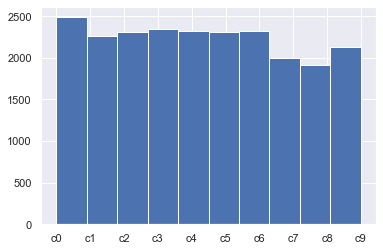

In [9]:
x.hist()

In [10]:
x.unique()

array(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'],
      dtype=object)

In [93]:

X_test=[]
for i, (idx, row) in enumerate(df_test.loc[df_test['img'] == y_img ].iterrows()):
    print('idx=', idx,", row['img']=", row['img'])
    path=IMG_DIR+f'imgs/test/{row["img"]}'
    print(path)
    test_image = cv2.imread(path)
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)   
    test_image = cv2.resize(test_image, (155, 123))
    X_test.append(test_image)


idx= 0 , row['img']= img_1.jpg
d:/Ai/project1/imgs/test/img_1.jpg
idx= 1 , row['img']= img_10.jpg
d:/Ai/project1/imgs/test/img_10.jpg
idx= 2 , row['img']= img_100.jpg
d:/Ai/project1/imgs/test/img_100.jpg
idx= 3 , row['img']= img_1000.jpg
d:/Ai/project1/imgs/test/img_1000.jpg
idx= 4 , row['img']= img_100000.jpg
d:/Ai/project1/imgs/test/img_100000.jpg
idx= 5 , row['img']= img_100001.jpg
d:/Ai/project1/imgs/test/img_100001.jpg
idx= 6 , row['img']= img_100002.jpg
d:/Ai/project1/imgs/test/img_100002.jpg
idx= 7 , row['img']= img_100003.jpg
d:/Ai/project1/imgs/test/img_100003.jpg
idx= 8 , row['img']= img_100004.jpg
d:/Ai/project1/imgs/test/img_100004.jpg
idx= 9 , row['img']= img_100005.jpg
d:/Ai/project1/imgs/test/img_100005.jpg
idx= 10 , row['img']= img_100007.jpg
d:/Ai/project1/imgs/test/img_100007.jpg
idx= 11 , row['img']= img_100008.jpg
d:/Ai/project1/imgs/test/img_100008.jpg
idx= 12 , row['img']= img_100009.jpg
d:/Ai/project1/imgs/test/img_100009.jpg
idx= 13 , row['img']= img_10001.jpg
d

idx= 157 , row['img']= img_100174.jpg
d:/Ai/project1/imgs/test/img_100174.jpg
idx= 158 , row['img']= img_100175.jpg
d:/Ai/project1/imgs/test/img_100175.jpg
idx= 159 , row['img']= img_100177.jpg
d:/Ai/project1/imgs/test/img_100177.jpg
idx= 160 , row['img']= img_100178.jpg
d:/Ai/project1/imgs/test/img_100178.jpg
idx= 161 , row['img']= img_100179.jpg
d:/Ai/project1/imgs/test/img_100179.jpg
idx= 162 , row['img']= img_10018.jpg
d:/Ai/project1/imgs/test/img_10018.jpg
idx= 163 , row['img']= img_100180.jpg
d:/Ai/project1/imgs/test/img_100180.jpg
idx= 164 , row['img']= img_100182.jpg
d:/Ai/project1/imgs/test/img_100182.jpg
idx= 165 , row['img']= img_100183.jpg
d:/Ai/project1/imgs/test/img_100183.jpg
idx= 166 , row['img']= img_100184.jpg
d:/Ai/project1/imgs/test/img_100184.jpg
idx= 167 , row['img']= img_100185.jpg
d:/Ai/project1/imgs/test/img_100185.jpg
idx= 168 , row['img']= img_100186.jpg
d:/Ai/project1/imgs/test/img_100186.jpg
idx= 169 , row['img']= img_100187.jpg
d:/Ai/project1/imgs/test/img

idx= 298 , row['img']= img_100330.jpg
d:/Ai/project1/imgs/test/img_100330.jpg
idx= 299 , row['img']= img_100331.jpg
d:/Ai/project1/imgs/test/img_100331.jpg
idx= 300 , row['img']= img_100332.jpg
d:/Ai/project1/imgs/test/img_100332.jpg
idx= 301 , row['img']= img_100333.jpg
d:/Ai/project1/imgs/test/img_100333.jpg
idx= 302 , row['img']= img_100335.jpg
d:/Ai/project1/imgs/test/img_100335.jpg
idx= 303 , row['img']= img_100338.jpg
d:/Ai/project1/imgs/test/img_100338.jpg
idx= 304 , row['img']= img_100340.jpg
d:/Ai/project1/imgs/test/img_100340.jpg
idx= 305 , row['img']= img_100341.jpg
d:/Ai/project1/imgs/test/img_100341.jpg
idx= 306 , row['img']= img_100342.jpg
d:/Ai/project1/imgs/test/img_100342.jpg
idx= 307 , row['img']= img_100344.jpg
d:/Ai/project1/imgs/test/img_100344.jpg
idx= 308 , row['img']= img_100345.jpg
d:/Ai/project1/imgs/test/img_100345.jpg
idx= 309 , row['img']= img_100346.jpg
d:/Ai/project1/imgs/test/img_100346.jpg
idx= 310 , row['img']= img_100349.jpg
d:/Ai/project1/imgs/test/i

idx= 446 , row['img']= img_100512.jpg
d:/Ai/project1/imgs/test/img_100512.jpg
idx= 447 , row['img']= img_100513.jpg
d:/Ai/project1/imgs/test/img_100513.jpg
idx= 448 , row['img']= img_100516.jpg
d:/Ai/project1/imgs/test/img_100516.jpg
idx= 449 , row['img']= img_100517.jpg
d:/Ai/project1/imgs/test/img_100517.jpg
idx= 450 , row['img']= img_100518.jpg
d:/Ai/project1/imgs/test/img_100518.jpg
idx= 451 , row['img']= img_100519.jpg
d:/Ai/project1/imgs/test/img_100519.jpg
idx= 452 , row['img']= img_100520.jpg
d:/Ai/project1/imgs/test/img_100520.jpg
idx= 453 , row['img']= img_100521.jpg
d:/Ai/project1/imgs/test/img_100521.jpg
idx= 454 , row['img']= img_100522.jpg
d:/Ai/project1/imgs/test/img_100522.jpg
idx= 455 , row['img']= img_100523.jpg
d:/Ai/project1/imgs/test/img_100523.jpg
idx= 456 , row['img']= img_100524.jpg
d:/Ai/project1/imgs/test/img_100524.jpg
idx= 457 , row['img']= img_100525.jpg
d:/Ai/project1/imgs/test/img_100525.jpg
idx= 458 , row['img']= img_100526.jpg
d:/Ai/project1/imgs/test/i

idx= 592 , row['img']= img_100673.jpg
d:/Ai/project1/imgs/test/img_100673.jpg
idx= 593 , row['img']= img_100674.jpg
d:/Ai/project1/imgs/test/img_100674.jpg
idx= 594 , row['img']= img_100675.jpg
d:/Ai/project1/imgs/test/img_100675.jpg
idx= 595 , row['img']= img_100677.jpg
d:/Ai/project1/imgs/test/img_100677.jpg
idx= 596 , row['img']= img_100678.jpg
d:/Ai/project1/imgs/test/img_100678.jpg
idx= 597 , row['img']= img_100679.jpg
d:/Ai/project1/imgs/test/img_100679.jpg
idx= 598 , row['img']= img_100680.jpg
d:/Ai/project1/imgs/test/img_100680.jpg
idx= 599 , row['img']= img_100681.jpg
d:/Ai/project1/imgs/test/img_100681.jpg
idx= 600 , row['img']= img_100684.jpg
d:/Ai/project1/imgs/test/img_100684.jpg
idx= 601 , row['img']= img_100685.jpg
d:/Ai/project1/imgs/test/img_100685.jpg
idx= 602 , row['img']= img_100686.jpg
d:/Ai/project1/imgs/test/img_100686.jpg
idx= 603 , row['img']= img_100687.jpg
d:/Ai/project1/imgs/test/img_100687.jpg
idx= 604 , row['img']= img_10069.jpg
d:/Ai/project1/imgs/test/im

idx= 699 , row['img']= img_100799.jpg
d:/Ai/project1/imgs/test/img_100799.jpg
idx= 700 , row['img']= img_1008.jpg
d:/Ai/project1/imgs/test/img_1008.jpg
idx= 701 , row['img']= img_100800.jpg
d:/Ai/project1/imgs/test/img_100800.jpg
idx= 702 , row['img']= img_100801.jpg
d:/Ai/project1/imgs/test/img_100801.jpg
idx= 703 , row['img']= img_100802.jpg
d:/Ai/project1/imgs/test/img_100802.jpg
idx= 704 , row['img']= img_100803.jpg
d:/Ai/project1/imgs/test/img_100803.jpg
idx= 705 , row['img']= img_100804.jpg
d:/Ai/project1/imgs/test/img_100804.jpg
idx= 706 , row['img']= img_100805.jpg
d:/Ai/project1/imgs/test/img_100805.jpg
idx= 707 , row['img']= img_100806.jpg
d:/Ai/project1/imgs/test/img_100806.jpg
idx= 708 , row['img']= img_100807.jpg
d:/Ai/project1/imgs/test/img_100807.jpg
idx= 709 , row['img']= img_100809.jpg
d:/Ai/project1/imgs/test/img_100809.jpg
idx= 710 , row['img']= img_10081.jpg
d:/Ai/project1/imgs/test/img_10081.jpg
idx= 711 , row['img']= img_100810.jpg
d:/Ai/project1/imgs/test/img_100

idx= 805 , row['img']= img_100918.jpg
d:/Ai/project1/imgs/test/img_100918.jpg
idx= 806 , row['img']= img_100919.jpg
d:/Ai/project1/imgs/test/img_100919.jpg
idx= 807 , row['img']= img_100920.jpg
d:/Ai/project1/imgs/test/img_100920.jpg
idx= 808 , row['img']= img_100921.jpg
d:/Ai/project1/imgs/test/img_100921.jpg
idx= 809 , row['img']= img_100923.jpg
d:/Ai/project1/imgs/test/img_100923.jpg
idx= 810 , row['img']= img_100924.jpg
d:/Ai/project1/imgs/test/img_100924.jpg
idx= 811 , row['img']= img_100925.jpg
d:/Ai/project1/imgs/test/img_100925.jpg
idx= 812 , row['img']= img_100926.jpg
d:/Ai/project1/imgs/test/img_100926.jpg
idx= 813 , row['img']= img_100928.jpg
d:/Ai/project1/imgs/test/img_100928.jpg
idx= 814 , row['img']= img_100929.jpg
d:/Ai/project1/imgs/test/img_100929.jpg
idx= 815 , row['img']= img_100930.jpg
d:/Ai/project1/imgs/test/img_100930.jpg
idx= 816 , row['img']= img_100931.jpg
d:/Ai/project1/imgs/test/img_100931.jpg
idx= 817 , row['img']= img_100933.jpg
d:/Ai/project1/imgs/test/i

d:/Ai/project1/imgs/test/img_101095.jpg
idx= 956 , row['img']= img_101098.jpg
d:/Ai/project1/imgs/test/img_101098.jpg
idx= 957 , row['img']= img_101099.jpg
d:/Ai/project1/imgs/test/img_101099.jpg
idx= 958 , row['img']= img_1011.jpg
d:/Ai/project1/imgs/test/img_1011.jpg
idx= 959 , row['img']= img_10110.jpg
d:/Ai/project1/imgs/test/img_10110.jpg
idx= 960 , row['img']= img_101100.jpg
d:/Ai/project1/imgs/test/img_101100.jpg
idx= 961 , row['img']= img_101101.jpg
d:/Ai/project1/imgs/test/img_101101.jpg
idx= 962 , row['img']= img_101103.jpg
d:/Ai/project1/imgs/test/img_101103.jpg
idx= 963 , row['img']= img_101104.jpg
d:/Ai/project1/imgs/test/img_101104.jpg
idx= 964 , row['img']= img_101105.jpg
d:/Ai/project1/imgs/test/img_101105.jpg
idx= 965 , row['img']= img_101106.jpg
d:/Ai/project1/imgs/test/img_101106.jpg
idx= 966 , row['img']= img_101108.jpg
d:/Ai/project1/imgs/test/img_101108.jpg
idx= 967 , row['img']= img_101109.jpg
d:/Ai/project1/imgs/test/img_101109.jpg
idx= 968 , row['img']= img_101

idx= 1106 , row['img']= img_101270.jpg
d:/Ai/project1/imgs/test/img_101270.jpg
idx= 1107 , row['img']= img_101271.jpg
d:/Ai/project1/imgs/test/img_101271.jpg
idx= 1108 , row['img']= img_101272.jpg
d:/Ai/project1/imgs/test/img_101272.jpg
idx= 1109 , row['img']= img_101274.jpg
d:/Ai/project1/imgs/test/img_101274.jpg
idx= 1110 , row['img']= img_101275.jpg
d:/Ai/project1/imgs/test/img_101275.jpg
idx= 1111 , row['img']= img_101276.jpg
d:/Ai/project1/imgs/test/img_101276.jpg
idx= 1112 , row['img']= img_101277.jpg
d:/Ai/project1/imgs/test/img_101277.jpg
idx= 1113 , row['img']= img_101278.jpg
d:/Ai/project1/imgs/test/img_101278.jpg
idx= 1114 , row['img']= img_101279.jpg
d:/Ai/project1/imgs/test/img_101279.jpg
idx= 1115 , row['img']= img_10128.jpg
d:/Ai/project1/imgs/test/img_10128.jpg
idx= 1116 , row['img']= img_101280.jpg
d:/Ai/project1/imgs/test/img_101280.jpg
idx= 1117 , row['img']= img_101281.jpg
d:/Ai/project1/imgs/test/img_101281.jpg
idx= 1118 , row['img']= img_101282.jpg
d:/Ai/project1/

idx= 1217 , row['img']= img_101396.jpg
d:/Ai/project1/imgs/test/img_101396.jpg
idx= 1218 , row['img']= img_101397.jpg
d:/Ai/project1/imgs/test/img_101397.jpg
idx= 1219 , row['img']= img_101398.jpg
d:/Ai/project1/imgs/test/img_101398.jpg
idx= 1220 , row['img']= img_101399.jpg
d:/Ai/project1/imgs/test/img_101399.jpg
idx= 1221 , row['img']= img_1014.jpg
d:/Ai/project1/imgs/test/img_1014.jpg
idx= 1222 , row['img']= img_10140.jpg
d:/Ai/project1/imgs/test/img_10140.jpg
idx= 1223 , row['img']= img_101400.jpg
d:/Ai/project1/imgs/test/img_101400.jpg
idx= 1224 , row['img']= img_101401.jpg
d:/Ai/project1/imgs/test/img_101401.jpg
idx= 1225 , row['img']= img_101402.jpg
d:/Ai/project1/imgs/test/img_101402.jpg
idx= 1226 , row['img']= img_101403.jpg
d:/Ai/project1/imgs/test/img_101403.jpg
idx= 1227 , row['img']= img_101404.jpg
d:/Ai/project1/imgs/test/img_101404.jpg
idx= 1228 , row['img']= img_101405.jpg
d:/Ai/project1/imgs/test/img_101405.jpg
idx= 1229 , row['img']= img_101406.jpg
d:/Ai/project1/imgs

idx= 1376 , row['img']= img_101577.jpg
d:/Ai/project1/imgs/test/img_101577.jpg
idx= 1377 , row['img']= img_10158.jpg
d:/Ai/project1/imgs/test/img_10158.jpg
idx= 1378 , row['img']= img_101580.jpg
d:/Ai/project1/imgs/test/img_101580.jpg
idx= 1379 , row['img']= img_101581.jpg
d:/Ai/project1/imgs/test/img_101581.jpg
idx= 1380 , row['img']= img_101583.jpg
d:/Ai/project1/imgs/test/img_101583.jpg
idx= 1381 , row['img']= img_101584.jpg
d:/Ai/project1/imgs/test/img_101584.jpg
idx= 1382 , row['img']= img_101585.jpg
d:/Ai/project1/imgs/test/img_101585.jpg
idx= 1383 , row['img']= img_101586.jpg
d:/Ai/project1/imgs/test/img_101586.jpg
idx= 1384 , row['img']= img_101589.jpg
d:/Ai/project1/imgs/test/img_101589.jpg
idx= 1385 , row['img']= img_10159.jpg
d:/Ai/project1/imgs/test/img_10159.jpg
idx= 1386 , row['img']= img_101590.jpg
d:/Ai/project1/imgs/test/img_101590.jpg
idx= 1387 , row['img']= img_101591.jpg
d:/Ai/project1/imgs/test/img_101591.jpg
idx= 1388 , row['img']= img_101592.jpg
d:/Ai/project1/im

idx= 1483 , row['img']= img_101701.jpg
d:/Ai/project1/imgs/test/img_101701.jpg
idx= 1484 , row['img']= img_101703.jpg
d:/Ai/project1/imgs/test/img_101703.jpg
idx= 1485 , row['img']= img_101706.jpg
d:/Ai/project1/imgs/test/img_101706.jpg
idx= 1486 , row['img']= img_101707.jpg
d:/Ai/project1/imgs/test/img_101707.jpg
idx= 1487 , row['img']= img_101708.jpg
d:/Ai/project1/imgs/test/img_101708.jpg
idx= 1488 , row['img']= img_101709.jpg
d:/Ai/project1/imgs/test/img_101709.jpg
idx= 1489 , row['img']= img_10171.jpg
d:/Ai/project1/imgs/test/img_10171.jpg
idx= 1490 , row['img']= img_101710.jpg
d:/Ai/project1/imgs/test/img_101710.jpg
idx= 1491 , row['img']= img_101711.jpg
d:/Ai/project1/imgs/test/img_101711.jpg
idx= 1492 , row['img']= img_101712.jpg
d:/Ai/project1/imgs/test/img_101712.jpg
idx= 1493 , row['img']= img_101714.jpg
d:/Ai/project1/imgs/test/img_101714.jpg
idx= 1494 , row['img']= img_101715.jpg
d:/Ai/project1/imgs/test/img_101715.jpg
idx= 1495 , row['img']= img_101716.jpg
d:/Ai/project1/

idx= 1639 , row['img']= img_101877.jpg
d:/Ai/project1/imgs/test/img_101877.jpg
idx= 1640 , row['img']= img_101878.jpg
d:/Ai/project1/imgs/test/img_101878.jpg
idx= 1641 , row['img']= img_101879.jpg
d:/Ai/project1/imgs/test/img_101879.jpg
idx= 1642 , row['img']= img_101880.jpg
d:/Ai/project1/imgs/test/img_101880.jpg
idx= 1643 , row['img']= img_101881.jpg
d:/Ai/project1/imgs/test/img_101881.jpg
idx= 1644 , row['img']= img_101882.jpg
d:/Ai/project1/imgs/test/img_101882.jpg
idx= 1645 , row['img']= img_101883.jpg
d:/Ai/project1/imgs/test/img_101883.jpg
idx= 1646 , row['img']= img_101884.jpg
d:/Ai/project1/imgs/test/img_101884.jpg
idx= 1647 , row['img']= img_101885.jpg
d:/Ai/project1/imgs/test/img_101885.jpg
idx= 1648 , row['img']= img_101886.jpg
d:/Ai/project1/imgs/test/img_101886.jpg
idx= 1649 , row['img']= img_101887.jpg
d:/Ai/project1/imgs/test/img_101887.jpg
idx= 1650 , row['img']= img_101888.jpg
d:/Ai/project1/imgs/test/img_101888.jpg
idx= 1651 , row['img']= img_101889.jpg
d:/Ai/project

idx= 1746 , row['img']= img_101997.jpg
d:/Ai/project1/imgs/test/img_101997.jpg
idx= 1747 , row['img']= img_101998.jpg
d:/Ai/project1/imgs/test/img_101998.jpg
idx= 1748 , row['img']= img_101999.jpg
d:/Ai/project1/imgs/test/img_101999.jpg
idx= 1749 , row['img']= img_1020.jpg
d:/Ai/project1/imgs/test/img_1020.jpg
idx= 1750 , row['img']= img_10200.jpg
d:/Ai/project1/imgs/test/img_10200.jpg
idx= 1751 , row['img']= img_102000.jpg
d:/Ai/project1/imgs/test/img_102000.jpg
idx= 1752 , row['img']= img_102001.jpg
d:/Ai/project1/imgs/test/img_102001.jpg
idx= 1753 , row['img']= img_102002.jpg
d:/Ai/project1/imgs/test/img_102002.jpg
idx= 1754 , row['img']= img_102003.jpg
d:/Ai/project1/imgs/test/img_102003.jpg
idx= 1755 , row['img']= img_102004.jpg
d:/Ai/project1/imgs/test/img_102004.jpg
idx= 1756 , row['img']= img_102006.jpg
d:/Ai/project1/imgs/test/img_102006.jpg
idx= 1757 , row['img']= img_102008.jpg
d:/Ai/project1/imgs/test/img_102008.jpg
idx= 1758 , row['img']= img_10201.jpg
d:/Ai/project1/imgs/

idx= 1854 , row['img']= img_102123.jpg
d:/Ai/project1/imgs/test/img_102123.jpg
idx= 1855 , row['img']= img_102124.jpg
d:/Ai/project1/imgs/test/img_102124.jpg
idx= 1856 , row['img']= img_102125.jpg
d:/Ai/project1/imgs/test/img_102125.jpg
idx= 1857 , row['img']= img_102126.jpg
d:/Ai/project1/imgs/test/img_102126.jpg
idx= 1858 , row['img']= img_102127.jpg
d:/Ai/project1/imgs/test/img_102127.jpg
idx= 1859 , row['img']= img_102130.jpg
d:/Ai/project1/imgs/test/img_102130.jpg
idx= 1860 , row['img']= img_102131.jpg
d:/Ai/project1/imgs/test/img_102131.jpg
idx= 1861 , row['img']= img_102132.jpg
d:/Ai/project1/imgs/test/img_102132.jpg
idx= 1862 , row['img']= img_102133.jpg
d:/Ai/project1/imgs/test/img_102133.jpg
idx= 1863 , row['img']= img_102134.jpg
d:/Ai/project1/imgs/test/img_102134.jpg
idx= 1864 , row['img']= img_102135.jpg
d:/Ai/project1/imgs/test/img_102135.jpg
idx= 1865 , row['img']= img_102136.jpg
d:/Ai/project1/imgs/test/img_102136.jpg
idx= 1866 , row['img']= img_102137.jpg
d:/Ai/project

d:/Ai/project1/imgs/test/img_10311.jpg
idx= 1961 , row['img']= img_10312.jpg
d:/Ai/project1/imgs/test/img_10312.jpg
idx= 1962 , row['img']= img_10313.jpg
d:/Ai/project1/imgs/test/img_10313.jpg
idx= 1963 , row['img']= img_10315.jpg
d:/Ai/project1/imgs/test/img_10315.jpg
idx= 1964 , row['img']= img_10316.jpg
d:/Ai/project1/imgs/test/img_10316.jpg
idx= 1965 , row['img']= img_10317.jpg
d:/Ai/project1/imgs/test/img_10317.jpg
idx= 1966 , row['img']= img_10319.jpg
d:/Ai/project1/imgs/test/img_10319.jpg
idx= 1967 , row['img']= img_1032.jpg
d:/Ai/project1/imgs/test/img_1032.jpg
idx= 1968 , row['img']= img_10320.jpg
d:/Ai/project1/imgs/test/img_10320.jpg
idx= 1969 , row['img']= img_10322.jpg
d:/Ai/project1/imgs/test/img_10322.jpg
idx= 1970 , row['img']= img_10323.jpg
d:/Ai/project1/imgs/test/img_10323.jpg
idx= 1971 , row['img']= img_10325.jpg
d:/Ai/project1/imgs/test/img_10325.jpg
idx= 1972 , row['img']= img_10326.jpg
d:/Ai/project1/imgs/test/img_10326.jpg
idx= 1973 , row['img']= img_10328.jpg
d

idx= 2116 , row['img']= img_10487.jpg
d:/Ai/project1/imgs/test/img_10487.jpg
idx= 2117 , row['img']= img_10488.jpg
d:/Ai/project1/imgs/test/img_10488.jpg
idx= 2118 , row['img']= img_10489.jpg
d:/Ai/project1/imgs/test/img_10489.jpg
idx= 2119 , row['img']= img_1049.jpg
d:/Ai/project1/imgs/test/img_1049.jpg
idx= 2120 , row['img']= img_10490.jpg
d:/Ai/project1/imgs/test/img_10490.jpg
idx= 2121 , row['img']= img_10491.jpg
d:/Ai/project1/imgs/test/img_10491.jpg
idx= 2122 , row['img']= img_10492.jpg
d:/Ai/project1/imgs/test/img_10492.jpg
idx= 2123 , row['img']= img_10493.jpg
d:/Ai/project1/imgs/test/img_10493.jpg
idx= 2124 , row['img']= img_10494.jpg
d:/Ai/project1/imgs/test/img_10494.jpg
idx= 2125 , row['img']= img_10495.jpg
d:/Ai/project1/imgs/test/img_10495.jpg
idx= 2126 , row['img']= img_10496.jpg
d:/Ai/project1/imgs/test/img_10496.jpg
idx= 2127 , row['img']= img_10497.jpg
d:/Ai/project1/imgs/test/img_10497.jpg
idx= 2128 , row['img']= img_10498.jpg
d:/Ai/project1/imgs/test/img_10498.jpg
i

idx= 2224 , row['img']= img_10603.jpg
d:/Ai/project1/imgs/test/img_10603.jpg
idx= 2225 , row['img']= img_10604.jpg
d:/Ai/project1/imgs/test/img_10604.jpg
idx= 2226 , row['img']= img_10605.jpg
d:/Ai/project1/imgs/test/img_10605.jpg
idx= 2227 , row['img']= img_10608.jpg
d:/Ai/project1/imgs/test/img_10608.jpg
idx= 2228 , row['img']= img_1061.jpg
d:/Ai/project1/imgs/test/img_1061.jpg
idx= 2229 , row['img']= img_10610.jpg
d:/Ai/project1/imgs/test/img_10610.jpg
idx= 2230 , row['img']= img_10611.jpg
d:/Ai/project1/imgs/test/img_10611.jpg
idx= 2231 , row['img']= img_10613.jpg
d:/Ai/project1/imgs/test/img_10613.jpg
idx= 2232 , row['img']= img_10614.jpg
d:/Ai/project1/imgs/test/img_10614.jpg
idx= 2233 , row['img']= img_10615.jpg
d:/Ai/project1/imgs/test/img_10615.jpg
idx= 2234 , row['img']= img_10616.jpg
d:/Ai/project1/imgs/test/img_10616.jpg
idx= 2235 , row['img']= img_10618.jpg
d:/Ai/project1/imgs/test/img_10618.jpg
idx= 2236 , row['img']= img_10619.jpg
d:/Ai/project1/imgs/test/img_10619.jpg
i

idx= 2377 , row['img']= img_10787.jpg
d:/Ai/project1/imgs/test/img_10787.jpg
idx= 2378 , row['img']= img_10788.jpg
d:/Ai/project1/imgs/test/img_10788.jpg
idx= 2379 , row['img']= img_10789.jpg
d:/Ai/project1/imgs/test/img_10789.jpg
idx= 2380 , row['img']= img_1079.jpg
d:/Ai/project1/imgs/test/img_1079.jpg
idx= 2381 , row['img']= img_10790.jpg
d:/Ai/project1/imgs/test/img_10790.jpg
idx= 2382 , row['img']= img_10791.jpg
d:/Ai/project1/imgs/test/img_10791.jpg
idx= 2383 , row['img']= img_10793.jpg
d:/Ai/project1/imgs/test/img_10793.jpg
idx= 2384 , row['img']= img_10795.jpg
d:/Ai/project1/imgs/test/img_10795.jpg
idx= 2385 , row['img']= img_10796.jpg
d:/Ai/project1/imgs/test/img_10796.jpg
idx= 2386 , row['img']= img_10797.jpg
d:/Ai/project1/imgs/test/img_10797.jpg
idx= 2387 , row['img']= img_10798.jpg
d:/Ai/project1/imgs/test/img_10798.jpg
idx= 2388 , row['img']= img_10799.jpg
d:/Ai/project1/imgs/test/img_10799.jpg
idx= 2389 , row['img']= img_1080.jpg
d:/Ai/project1/imgs/test/img_1080.jpg
idx

idx= 2535 , row['img']= img_10963.jpg
d:/Ai/project1/imgs/test/img_10963.jpg
idx= 2536 , row['img']= img_10964.jpg
d:/Ai/project1/imgs/test/img_10964.jpg
idx= 2537 , row['img']= img_10965.jpg
d:/Ai/project1/imgs/test/img_10965.jpg
idx= 2538 , row['img']= img_10967.jpg
d:/Ai/project1/imgs/test/img_10967.jpg
idx= 2539 , row['img']= img_10968.jpg
d:/Ai/project1/imgs/test/img_10968.jpg
idx= 2540 , row['img']= img_10969.jpg
d:/Ai/project1/imgs/test/img_10969.jpg
idx= 2541 , row['img']= img_1097.jpg
d:/Ai/project1/imgs/test/img_1097.jpg
idx= 2542 , row['img']= img_10970.jpg
d:/Ai/project1/imgs/test/img_10970.jpg
idx= 2543 , row['img']= img_10971.jpg
d:/Ai/project1/imgs/test/img_10971.jpg
idx= 2544 , row['img']= img_10973.jpg
d:/Ai/project1/imgs/test/img_10973.jpg
idx= 2545 , row['img']= img_10975.jpg
d:/Ai/project1/imgs/test/img_10975.jpg
idx= 2546 , row['img']= img_10976.jpg
d:/Ai/project1/imgs/test/img_10976.jpg
idx= 2547 , row['img']= img_10977.jpg
d:/Ai/project1/imgs/test/img_10977.jpg
i

idx= 2643 , row['img']= img_11089.jpg
d:/Ai/project1/imgs/test/img_11089.jpg
idx= 2644 , row['img']= img_1109.jpg
d:/Ai/project1/imgs/test/img_1109.jpg
idx= 2645 , row['img']= img_11091.jpg
d:/Ai/project1/imgs/test/img_11091.jpg
idx= 2646 , row['img']= img_11092.jpg
d:/Ai/project1/imgs/test/img_11092.jpg
idx= 2647 , row['img']= img_11093.jpg
d:/Ai/project1/imgs/test/img_11093.jpg
idx= 2648 , row['img']= img_11094.jpg
d:/Ai/project1/imgs/test/img_11094.jpg
idx= 2649 , row['img']= img_11096.jpg
d:/Ai/project1/imgs/test/img_11096.jpg
idx= 2650 , row['img']= img_11097.jpg
d:/Ai/project1/imgs/test/img_11097.jpg
idx= 2651 , row['img']= img_11098.jpg
d:/Ai/project1/imgs/test/img_11098.jpg
idx= 2652 , row['img']= img_11099.jpg
d:/Ai/project1/imgs/test/img_11099.jpg
idx= 2653 , row['img']= img_111.jpg
d:/Ai/project1/imgs/test/img_111.jpg
idx= 2654 , row['img']= img_1110.jpg
d:/Ai/project1/imgs/test/img_1110.jpg
idx= 2655 , row['img']= img_11100.jpg
d:/Ai/project1/imgs/test/img_11100.jpg
idx= 26

idx= 2801 , row['img']= img_11271.jpg
d:/Ai/project1/imgs/test/img_11271.jpg
idx= 2802 , row['img']= img_11272.jpg
d:/Ai/project1/imgs/test/img_11272.jpg
idx= 2803 , row['img']= img_11274.jpg
d:/Ai/project1/imgs/test/img_11274.jpg
idx= 2804 , row['img']= img_11276.jpg
d:/Ai/project1/imgs/test/img_11276.jpg
idx= 2805 , row['img']= img_11277.jpg
d:/Ai/project1/imgs/test/img_11277.jpg
idx= 2806 , row['img']= img_11279.jpg
d:/Ai/project1/imgs/test/img_11279.jpg
idx= 2807 , row['img']= img_1128.jpg
d:/Ai/project1/imgs/test/img_1128.jpg
idx= 2808 , row['img']= img_11280.jpg
d:/Ai/project1/imgs/test/img_11280.jpg
idx= 2809 , row['img']= img_11281.jpg
d:/Ai/project1/imgs/test/img_11281.jpg
idx= 2810 , row['img']= img_11282.jpg
d:/Ai/project1/imgs/test/img_11282.jpg
idx= 2811 , row['img']= img_11283.jpg
d:/Ai/project1/imgs/test/img_11283.jpg
idx= 2812 , row['img']= img_11284.jpg
d:/Ai/project1/imgs/test/img_11284.jpg
idx= 2813 , row['img']= img_11285.jpg
d:/Ai/project1/imgs/test/img_11285.jpg
i

idx= 2954 , row['img']= img_11443.jpg
d:/Ai/project1/imgs/test/img_11443.jpg
idx= 2955 , row['img']= img_11445.jpg
d:/Ai/project1/imgs/test/img_11445.jpg
idx= 2956 , row['img']= img_11446.jpg
d:/Ai/project1/imgs/test/img_11446.jpg
idx= 2957 , row['img']= img_11447.jpg
d:/Ai/project1/imgs/test/img_11447.jpg
idx= 2958 , row['img']= img_11448.jpg
d:/Ai/project1/imgs/test/img_11448.jpg
idx= 2959 , row['img']= img_11450.jpg
d:/Ai/project1/imgs/test/img_11450.jpg
idx= 2960 , row['img']= img_11451.jpg
d:/Ai/project1/imgs/test/img_11451.jpg
idx= 2961 , row['img']= img_11452.jpg
d:/Ai/project1/imgs/test/img_11452.jpg
idx= 2962 , row['img']= img_11453.jpg
d:/Ai/project1/imgs/test/img_11453.jpg
idx= 2963 , row['img']= img_11454.jpg
d:/Ai/project1/imgs/test/img_11454.jpg
idx= 2964 , row['img']= img_11455.jpg
d:/Ai/project1/imgs/test/img_11455.jpg
idx= 2965 , row['img']= img_11456.jpg
d:/Ai/project1/imgs/test/img_11456.jpg
idx= 2966 , row['img']= img_11457.jpg
d:/Ai/project1/imgs/test/img_11457.jpg

idx= 3064 , row['img']= img_11574.jpg
d:/Ai/project1/imgs/test/img_11574.jpg
idx= 3065 , row['img']= img_11576.jpg
d:/Ai/project1/imgs/test/img_11576.jpg
idx= 3066 , row['img']= img_11578.jpg
d:/Ai/project1/imgs/test/img_11578.jpg
idx= 3067 , row['img']= img_11579.jpg
d:/Ai/project1/imgs/test/img_11579.jpg
idx= 3068 , row['img']= img_1158.jpg
d:/Ai/project1/imgs/test/img_1158.jpg
idx= 3069 , row['img']= img_11580.jpg
d:/Ai/project1/imgs/test/img_11580.jpg
idx= 3070 , row['img']= img_11583.jpg
d:/Ai/project1/imgs/test/img_11583.jpg
idx= 3071 , row['img']= img_11584.jpg
d:/Ai/project1/imgs/test/img_11584.jpg
idx= 3072 , row['img']= img_11585.jpg
d:/Ai/project1/imgs/test/img_11585.jpg
idx= 3073 , row['img']= img_11586.jpg
d:/Ai/project1/imgs/test/img_11586.jpg
idx= 3074 , row['img']= img_11587.jpg
d:/Ai/project1/imgs/test/img_11587.jpg
idx= 3075 , row['img']= img_11589.jpg
d:/Ai/project1/imgs/test/img_11589.jpg
idx= 3076 , row['img']= img_1159.jpg
d:/Ai/project1/imgs/test/img_1159.jpg
idx

idx= 3222 , row['img']= img_11753.jpg
d:/Ai/project1/imgs/test/img_11753.jpg
idx= 3223 , row['img']= img_11754.jpg
d:/Ai/project1/imgs/test/img_11754.jpg
idx= 3224 , row['img']= img_11755.jpg
d:/Ai/project1/imgs/test/img_11755.jpg
idx= 3225 , row['img']= img_11756.jpg
d:/Ai/project1/imgs/test/img_11756.jpg
idx= 3226 , row['img']= img_11757.jpg
d:/Ai/project1/imgs/test/img_11757.jpg
idx= 3227 , row['img']= img_11758.jpg
d:/Ai/project1/imgs/test/img_11758.jpg
idx= 3228 , row['img']= img_1176.jpg
d:/Ai/project1/imgs/test/img_1176.jpg
idx= 3229 , row['img']= img_11760.jpg
d:/Ai/project1/imgs/test/img_11760.jpg
idx= 3230 , row['img']= img_11761.jpg
d:/Ai/project1/imgs/test/img_11761.jpg
idx= 3231 , row['img']= img_11762.jpg
d:/Ai/project1/imgs/test/img_11762.jpg
idx= 3232 , row['img']= img_11764.jpg
d:/Ai/project1/imgs/test/img_11764.jpg
idx= 3233 , row['img']= img_11765.jpg
d:/Ai/project1/imgs/test/img_11765.jpg
idx= 3234 , row['img']= img_11766.jpg
d:/Ai/project1/imgs/test/img_11766.jpg
i

idx= 3378 , row['img']= img_11936.jpg
d:/Ai/project1/imgs/test/img_11936.jpg
idx= 3379 , row['img']= img_11938.jpg
d:/Ai/project1/imgs/test/img_11938.jpg
idx= 3380 , row['img']= img_11939.jpg
d:/Ai/project1/imgs/test/img_11939.jpg
idx= 3381 , row['img']= img_1194.jpg
d:/Ai/project1/imgs/test/img_1194.jpg
idx= 3382 , row['img']= img_11940.jpg
d:/Ai/project1/imgs/test/img_11940.jpg
idx= 3383 , row['img']= img_11941.jpg
d:/Ai/project1/imgs/test/img_11941.jpg
idx= 3384 , row['img']= img_11942.jpg
d:/Ai/project1/imgs/test/img_11942.jpg
idx= 3385 , row['img']= img_11943.jpg
d:/Ai/project1/imgs/test/img_11943.jpg
idx= 3386 , row['img']= img_11944.jpg
d:/Ai/project1/imgs/test/img_11944.jpg
idx= 3387 , row['img']= img_11946.jpg
d:/Ai/project1/imgs/test/img_11946.jpg
idx= 3388 , row['img']= img_11947.jpg
d:/Ai/project1/imgs/test/img_11947.jpg
idx= 3389 , row['img']= img_11948.jpg
d:/Ai/project1/imgs/test/img_11948.jpg
idx= 3390 , row['img']= img_1195.jpg
d:/Ai/project1/imgs/test/img_1195.jpg
idx

idx= 3485 , row['img']= img_12061.jpg
d:/Ai/project1/imgs/test/img_12061.jpg
idx= 3486 , row['img']= img_12062.jpg
d:/Ai/project1/imgs/test/img_12062.jpg
idx= 3487 , row['img']= img_12063.jpg
d:/Ai/project1/imgs/test/img_12063.jpg
idx= 3488 , row['img']= img_12064.jpg
d:/Ai/project1/imgs/test/img_12064.jpg
idx= 3489 , row['img']= img_12065.jpg
d:/Ai/project1/imgs/test/img_12065.jpg
idx= 3490 , row['img']= img_12067.jpg
d:/Ai/project1/imgs/test/img_12067.jpg
idx= 3491 , row['img']= img_12068.jpg
d:/Ai/project1/imgs/test/img_12068.jpg
idx= 3492 , row['img']= img_12071.jpg
d:/Ai/project1/imgs/test/img_12071.jpg
idx= 3493 , row['img']= img_12072.jpg
d:/Ai/project1/imgs/test/img_12072.jpg
idx= 3494 , row['img']= img_12073.jpg
d:/Ai/project1/imgs/test/img_12073.jpg
idx= 3495 , row['img']= img_12074.jpg
d:/Ai/project1/imgs/test/img_12074.jpg
idx= 3496 , row['img']= img_12075.jpg
d:/Ai/project1/imgs/test/img_12075.jpg
idx= 3497 , row['img']= img_12076.jpg
d:/Ai/project1/imgs/test/img_12076.jpg

idx= 3593 , row['img']= img_12178.jpg
d:/Ai/project1/imgs/test/img_12178.jpg
idx= 3594 , row['img']= img_12179.jpg
d:/Ai/project1/imgs/test/img_12179.jpg
idx= 3595 , row['img']= img_12180.jpg
d:/Ai/project1/imgs/test/img_12180.jpg
idx= 3596 , row['img']= img_12182.jpg
d:/Ai/project1/imgs/test/img_12182.jpg
idx= 3597 , row['img']= img_12183.jpg
d:/Ai/project1/imgs/test/img_12183.jpg
idx= 3598 , row['img']= img_12184.jpg
d:/Ai/project1/imgs/test/img_12184.jpg
idx= 3599 , row['img']= img_12187.jpg
d:/Ai/project1/imgs/test/img_12187.jpg
idx= 3600 , row['img']= img_1219.jpg
d:/Ai/project1/imgs/test/img_1219.jpg
idx= 3601 , row['img']= img_12190.jpg
d:/Ai/project1/imgs/test/img_12190.jpg
idx= 3602 , row['img']= img_12191.jpg
d:/Ai/project1/imgs/test/img_12191.jpg
idx= 3603 , row['img']= img_12192.jpg
d:/Ai/project1/imgs/test/img_12192.jpg
idx= 3604 , row['img']= img_12194.jpg
d:/Ai/project1/imgs/test/img_12194.jpg
idx= 3605 , row['img']= img_12195.jpg
d:/Ai/project1/imgs/test/img_12195.jpg
i

idx= 3753 , row['img']= img_12366.jpg
d:/Ai/project1/imgs/test/img_12366.jpg
idx= 3754 , row['img']= img_12367.jpg
d:/Ai/project1/imgs/test/img_12367.jpg
idx= 3755 , row['img']= img_1237.jpg
d:/Ai/project1/imgs/test/img_1237.jpg
idx= 3756 , row['img']= img_12371.jpg
d:/Ai/project1/imgs/test/img_12371.jpg
idx= 3757 , row['img']= img_12372.jpg
d:/Ai/project1/imgs/test/img_12372.jpg
idx= 3758 , row['img']= img_12373.jpg
d:/Ai/project1/imgs/test/img_12373.jpg
idx= 3759 , row['img']= img_12374.jpg
d:/Ai/project1/imgs/test/img_12374.jpg
idx= 3760 , row['img']= img_12377.jpg
d:/Ai/project1/imgs/test/img_12377.jpg
idx= 3761 , row['img']= img_12379.jpg
d:/Ai/project1/imgs/test/img_12379.jpg
idx= 3762 , row['img']= img_1238.jpg
d:/Ai/project1/imgs/test/img_1238.jpg
idx= 3763 , row['img']= img_12380.jpg
d:/Ai/project1/imgs/test/img_12380.jpg
idx= 3764 , row['img']= img_12381.jpg
d:/Ai/project1/imgs/test/img_12381.jpg
idx= 3765 , row['img']= img_12382.jpg
d:/Ai/project1/imgs/test/img_12382.jpg
idx

idx= 3908 , row['img']= img_12545.jpg
d:/Ai/project1/imgs/test/img_12545.jpg
idx= 3909 , row['img']= img_12546.jpg
d:/Ai/project1/imgs/test/img_12546.jpg
idx= 3910 , row['img']= img_12547.jpg
d:/Ai/project1/imgs/test/img_12547.jpg
idx= 3911 , row['img']= img_12549.jpg
d:/Ai/project1/imgs/test/img_12549.jpg
idx= 3912 , row['img']= img_1255.jpg
d:/Ai/project1/imgs/test/img_1255.jpg
idx= 3913 , row['img']= img_12551.jpg
d:/Ai/project1/imgs/test/img_12551.jpg
idx= 3914 , row['img']= img_12552.jpg
d:/Ai/project1/imgs/test/img_12552.jpg
idx= 3915 , row['img']= img_12554.jpg
d:/Ai/project1/imgs/test/img_12554.jpg
idx= 3916 , row['img']= img_12555.jpg
d:/Ai/project1/imgs/test/img_12555.jpg
idx= 3917 , row['img']= img_12556.jpg
d:/Ai/project1/imgs/test/img_12556.jpg
idx= 3918 , row['img']= img_12558.jpg
d:/Ai/project1/imgs/test/img_12558.jpg
idx= 3919 , row['img']= img_12560.jpg
d:/Ai/project1/imgs/test/img_12560.jpg
idx= 3920 , row['img']= img_12561.jpg
d:/Ai/project1/imgs/test/img_12561.jpg
i

idx= 4020 , row['img']= img_12676.jpg
d:/Ai/project1/imgs/test/img_12676.jpg
idx= 4021 , row['img']= img_12678.jpg
d:/Ai/project1/imgs/test/img_12678.jpg
idx= 4022 , row['img']= img_12679.jpg
d:/Ai/project1/imgs/test/img_12679.jpg
idx= 4023 , row['img']= img_1268.jpg
d:/Ai/project1/imgs/test/img_1268.jpg
idx= 4024 , row['img']= img_12680.jpg
d:/Ai/project1/imgs/test/img_12680.jpg
idx= 4025 , row['img']= img_12681.jpg
d:/Ai/project1/imgs/test/img_12681.jpg
idx= 4026 , row['img']= img_12682.jpg
d:/Ai/project1/imgs/test/img_12682.jpg
idx= 4027 , row['img']= img_12683.jpg
d:/Ai/project1/imgs/test/img_12683.jpg
idx= 4028 , row['img']= img_12684.jpg
d:/Ai/project1/imgs/test/img_12684.jpg
idx= 4029 , row['img']= img_12685.jpg
d:/Ai/project1/imgs/test/img_12685.jpg
idx= 4030 , row['img']= img_12686.jpg
d:/Ai/project1/imgs/test/img_12686.jpg
idx= 4031 , row['img']= img_12688.jpg
d:/Ai/project1/imgs/test/img_12688.jpg
idx= 4032 , row['img']= img_12689.jpg
d:/Ai/project1/imgs/test/img_12689.jpg
i

idx= 4174 , row['img']= img_12858.jpg
d:/Ai/project1/imgs/test/img_12858.jpg
idx= 4175 , row['img']= img_12859.jpg
d:/Ai/project1/imgs/test/img_12859.jpg
idx= 4176 , row['img']= img_12860.jpg
d:/Ai/project1/imgs/test/img_12860.jpg
idx= 4177 , row['img']= img_12861.jpg
d:/Ai/project1/imgs/test/img_12861.jpg
idx= 4178 , row['img']= img_12862.jpg
d:/Ai/project1/imgs/test/img_12862.jpg
idx= 4179 , row['img']= img_12863.jpg
d:/Ai/project1/imgs/test/img_12863.jpg
idx= 4180 , row['img']= img_12864.jpg
d:/Ai/project1/imgs/test/img_12864.jpg
idx= 4181 , row['img']= img_12865.jpg
d:/Ai/project1/imgs/test/img_12865.jpg
idx= 4182 , row['img']= img_12867.jpg
d:/Ai/project1/imgs/test/img_12867.jpg
idx= 4183 , row['img']= img_1287.jpg
d:/Ai/project1/imgs/test/img_1287.jpg
idx= 4184 , row['img']= img_12870.jpg
d:/Ai/project1/imgs/test/img_12870.jpg
idx= 4185 , row['img']= img_12871.jpg
d:/Ai/project1/imgs/test/img_12871.jpg
idx= 4186 , row['img']= img_12872.jpg
d:/Ai/project1/imgs/test/img_12872.jpg
i

idx= 4282 , row['img']= img_12977.jpg
d:/Ai/project1/imgs/test/img_12977.jpg
idx= 4283 , row['img']= img_12979.jpg
d:/Ai/project1/imgs/test/img_12979.jpg
idx= 4284 , row['img']= img_1298.jpg
d:/Ai/project1/imgs/test/img_1298.jpg
idx= 4285 , row['img']= img_12980.jpg
d:/Ai/project1/imgs/test/img_12980.jpg
idx= 4286 , row['img']= img_12982.jpg
d:/Ai/project1/imgs/test/img_12982.jpg
idx= 4287 , row['img']= img_12983.jpg
d:/Ai/project1/imgs/test/img_12983.jpg
idx= 4288 , row['img']= img_12984.jpg
d:/Ai/project1/imgs/test/img_12984.jpg
idx= 4289 , row['img']= img_12985.jpg
d:/Ai/project1/imgs/test/img_12985.jpg
idx= 4290 , row['img']= img_12986.jpg
d:/Ai/project1/imgs/test/img_12986.jpg
idx= 4291 , row['img']= img_12987.jpg
d:/Ai/project1/imgs/test/img_12987.jpg
idx= 4292 , row['img']= img_12988.jpg
d:/Ai/project1/imgs/test/img_12988.jpg
idx= 4293 , row['img']= img_12989.jpg
d:/Ai/project1/imgs/test/img_12989.jpg
idx= 4294 , row['img']= img_1299.jpg
d:/Ai/project1/imgs/test/img_1299.jpg
idx

idx= 4439 , row['img']= img_13151.jpg
d:/Ai/project1/imgs/test/img_13151.jpg
idx= 4440 , row['img']= img_13152.jpg
d:/Ai/project1/imgs/test/img_13152.jpg
idx= 4441 , row['img']= img_13153.jpg
d:/Ai/project1/imgs/test/img_13153.jpg
idx= 4442 , row['img']= img_13154.jpg
d:/Ai/project1/imgs/test/img_13154.jpg
idx= 4443 , row['img']= img_13155.jpg
d:/Ai/project1/imgs/test/img_13155.jpg
idx= 4444 , row['img']= img_13156.jpg
d:/Ai/project1/imgs/test/img_13156.jpg
idx= 4445 , row['img']= img_13157.jpg
d:/Ai/project1/imgs/test/img_13157.jpg
idx= 4446 , row['img']= img_13158.jpg
d:/Ai/project1/imgs/test/img_13158.jpg
idx= 4447 , row['img']= img_13159.jpg
d:/Ai/project1/imgs/test/img_13159.jpg
idx= 4448 , row['img']= img_1316.jpg
d:/Ai/project1/imgs/test/img_1316.jpg
idx= 4449 , row['img']= img_13161.jpg
d:/Ai/project1/imgs/test/img_13161.jpg
idx= 4450 , row['img']= img_13162.jpg
d:/Ai/project1/imgs/test/img_13162.jpg
idx= 4451 , row['img']= img_13163.jpg
d:/Ai/project1/imgs/test/img_13163.jpg
i

idx= 4597 , row['img']= img_13335.jpg
d:/Ai/project1/imgs/test/img_13335.jpg
idx= 4598 , row['img']= img_13336.jpg
d:/Ai/project1/imgs/test/img_13336.jpg
idx= 4599 , row['img']= img_13337.jpg
d:/Ai/project1/imgs/test/img_13337.jpg
idx= 4600 , row['img']= img_13339.jpg
d:/Ai/project1/imgs/test/img_13339.jpg
idx= 4601 , row['img']= img_1334.jpg
d:/Ai/project1/imgs/test/img_1334.jpg
idx= 4602 , row['img']= img_13340.jpg
d:/Ai/project1/imgs/test/img_13340.jpg
idx= 4603 , row['img']= img_13341.jpg
d:/Ai/project1/imgs/test/img_13341.jpg
idx= 4604 , row['img']= img_13342.jpg
d:/Ai/project1/imgs/test/img_13342.jpg
idx= 4605 , row['img']= img_13343.jpg
d:/Ai/project1/imgs/test/img_13343.jpg
idx= 4606 , row['img']= img_13344.jpg
d:/Ai/project1/imgs/test/img_13344.jpg
idx= 4607 , row['img']= img_13345.jpg
d:/Ai/project1/imgs/test/img_13345.jpg
idx= 4608 , row['img']= img_13346.jpg
d:/Ai/project1/imgs/test/img_13346.jpg
idx= 4609 , row['img']= img_13347.jpg
d:/Ai/project1/imgs/test/img_13347.jpg
i

idx= 4709 , row['img']= img_1347.jpg
d:/Ai/project1/imgs/test/img_1347.jpg
idx= 4710 , row['img']= img_13471.jpg
d:/Ai/project1/imgs/test/img_13471.jpg
idx= 4711 , row['img']= img_13472.jpg
d:/Ai/project1/imgs/test/img_13472.jpg
idx= 4712 , row['img']= img_13473.jpg
d:/Ai/project1/imgs/test/img_13473.jpg
idx= 4713 , row['img']= img_13474.jpg
d:/Ai/project1/imgs/test/img_13474.jpg
idx= 4714 , row['img']= img_13475.jpg
d:/Ai/project1/imgs/test/img_13475.jpg
idx= 4715 , row['img']= img_13476.jpg
d:/Ai/project1/imgs/test/img_13476.jpg
idx= 4716 , row['img']= img_13477.jpg
d:/Ai/project1/imgs/test/img_13477.jpg
idx= 4717 , row['img']= img_13478.jpg
d:/Ai/project1/imgs/test/img_13478.jpg
idx= 4718 , row['img']= img_13479.jpg
d:/Ai/project1/imgs/test/img_13479.jpg
idx= 4719 , row['img']= img_1348.jpg
d:/Ai/project1/imgs/test/img_1348.jpg
idx= 4720 , row['img']= img_13484.jpg
d:/Ai/project1/imgs/test/img_13484.jpg
idx= 4721 , row['img']= img_13485.jpg
d:/Ai/project1/imgs/test/img_13485.jpg
idx

idx= 4866 , row['img']= img_13651.jpg
d:/Ai/project1/imgs/test/img_13651.jpg
idx= 4867 , row['img']= img_13652.jpg
d:/Ai/project1/imgs/test/img_13652.jpg
idx= 4868 , row['img']= img_13653.jpg
d:/Ai/project1/imgs/test/img_13653.jpg
idx= 4869 , row['img']= img_13654.jpg
d:/Ai/project1/imgs/test/img_13654.jpg
idx= 4870 , row['img']= img_13655.jpg
d:/Ai/project1/imgs/test/img_13655.jpg
idx= 4871 , row['img']= img_13656.jpg
d:/Ai/project1/imgs/test/img_13656.jpg
idx= 4872 , row['img']= img_13657.jpg
d:/Ai/project1/imgs/test/img_13657.jpg
idx= 4873 , row['img']= img_13658.jpg
d:/Ai/project1/imgs/test/img_13658.jpg
idx= 4874 , row['img']= img_13659.jpg
d:/Ai/project1/imgs/test/img_13659.jpg
idx= 4875 , row['img']= img_1366.jpg
d:/Ai/project1/imgs/test/img_1366.jpg
idx= 4876 , row['img']= img_13660.jpg
d:/Ai/project1/imgs/test/img_13660.jpg
idx= 4877 , row['img']= img_13661.jpg
d:/Ai/project1/imgs/test/img_13661.jpg
idx= 4878 , row['img']= img_13662.jpg
d:/Ai/project1/imgs/test/img_13662.jpg
i

idx= 4974 , row['img']= img_13769.jpg
d:/Ai/project1/imgs/test/img_13769.jpg
idx= 4975 , row['img']= img_1377.jpg
d:/Ai/project1/imgs/test/img_1377.jpg
idx= 4976 , row['img']= img_13770.jpg
d:/Ai/project1/imgs/test/img_13770.jpg
idx= 4977 , row['img']= img_13771.jpg
d:/Ai/project1/imgs/test/img_13771.jpg
idx= 4978 , row['img']= img_13772.jpg
d:/Ai/project1/imgs/test/img_13772.jpg
idx= 4979 , row['img']= img_13774.jpg
d:/Ai/project1/imgs/test/img_13774.jpg
idx= 4980 , row['img']= img_13775.jpg
d:/Ai/project1/imgs/test/img_13775.jpg
idx= 4981 , row['img']= img_13776.jpg
d:/Ai/project1/imgs/test/img_13776.jpg
idx= 4982 , row['img']= img_13777.jpg
d:/Ai/project1/imgs/test/img_13777.jpg
idx= 4983 , row['img']= img_13778.jpg
d:/Ai/project1/imgs/test/img_13778.jpg
idx= 4984 , row['img']= img_13779.jpg
d:/Ai/project1/imgs/test/img_13779.jpg
idx= 4985 , row['img']= img_13780.jpg
d:/Ai/project1/imgs/test/img_13780.jpg
idx= 4986 , row['img']= img_13781.jpg
d:/Ai/project1/imgs/test/img_13781.jpg
i

idx= 5131 , row['img']= img_13948.jpg
d:/Ai/project1/imgs/test/img_13948.jpg
idx= 5132 , row['img']= img_13949.jpg
d:/Ai/project1/imgs/test/img_13949.jpg
idx= 5133 , row['img']= img_13951.jpg
d:/Ai/project1/imgs/test/img_13951.jpg
idx= 5134 , row['img']= img_13953.jpg
d:/Ai/project1/imgs/test/img_13953.jpg
idx= 5135 , row['img']= img_13954.jpg
d:/Ai/project1/imgs/test/img_13954.jpg
idx= 5136 , row['img']= img_13955.jpg
d:/Ai/project1/imgs/test/img_13955.jpg
idx= 5137 , row['img']= img_13956.jpg
d:/Ai/project1/imgs/test/img_13956.jpg
idx= 5138 , row['img']= img_13957.jpg
d:/Ai/project1/imgs/test/img_13957.jpg
idx= 5139 , row['img']= img_13959.jpg
d:/Ai/project1/imgs/test/img_13959.jpg
idx= 5140 , row['img']= img_1396.jpg
d:/Ai/project1/imgs/test/img_1396.jpg
idx= 5141 , row['img']= img_13960.jpg
d:/Ai/project1/imgs/test/img_13960.jpg
idx= 5142 , row['img']= img_13961.jpg
d:/Ai/project1/imgs/test/img_13961.jpg
idx= 5143 , row['img']= img_13962.jpg
d:/Ai/project1/imgs/test/img_13962.jpg
i

idx= 5286 , row['img']= img_14130.jpg
d:/Ai/project1/imgs/test/img_14130.jpg
idx= 5287 , row['img']= img_14131.jpg
d:/Ai/project1/imgs/test/img_14131.jpg
idx= 5288 , row['img']= img_14132.jpg
d:/Ai/project1/imgs/test/img_14132.jpg
idx= 5289 , row['img']= img_14133.jpg
d:/Ai/project1/imgs/test/img_14133.jpg
idx= 5290 , row['img']= img_14134.jpg
d:/Ai/project1/imgs/test/img_14134.jpg
idx= 5291 , row['img']= img_14135.jpg
d:/Ai/project1/imgs/test/img_14135.jpg
idx= 5292 , row['img']= img_14136.jpg
d:/Ai/project1/imgs/test/img_14136.jpg
idx= 5293 , row['img']= img_14137.jpg
d:/Ai/project1/imgs/test/img_14137.jpg
idx= 5294 , row['img']= img_14138.jpg
d:/Ai/project1/imgs/test/img_14138.jpg
idx= 5295 , row['img']= img_14139.jpg
d:/Ai/project1/imgs/test/img_14139.jpg
idx= 5296 , row['img']= img_1414.jpg
d:/Ai/project1/imgs/test/img_1414.jpg
idx= 5297 , row['img']= img_14141.jpg
d:/Ai/project1/imgs/test/img_14141.jpg
idx= 5298 , row['img']= img_14142.jpg
d:/Ai/project1/imgs/test/img_14142.jpg
i

idx= 5437 , row['img']= img_14300.jpg
d:/Ai/project1/imgs/test/img_14300.jpg
idx= 5438 , row['img']= img_14301.jpg
d:/Ai/project1/imgs/test/img_14301.jpg
idx= 5439 , row['img']= img_14302.jpg
d:/Ai/project1/imgs/test/img_14302.jpg
idx= 5440 , row['img']= img_14303.jpg
d:/Ai/project1/imgs/test/img_14303.jpg
idx= 5441 , row['img']= img_14306.jpg
d:/Ai/project1/imgs/test/img_14306.jpg
idx= 5442 , row['img']= img_14307.jpg
d:/Ai/project1/imgs/test/img_14307.jpg
idx= 5443 , row['img']= img_14308.jpg
d:/Ai/project1/imgs/test/img_14308.jpg
idx= 5444 , row['img']= img_14309.jpg
d:/Ai/project1/imgs/test/img_14309.jpg
idx= 5445 , row['img']= img_1431.jpg
d:/Ai/project1/imgs/test/img_1431.jpg
idx= 5446 , row['img']= img_14310.jpg
d:/Ai/project1/imgs/test/img_14310.jpg
idx= 5447 , row['img']= img_14311.jpg
d:/Ai/project1/imgs/test/img_14311.jpg
idx= 5448 , row['img']= img_14312.jpg
d:/Ai/project1/imgs/test/img_14312.jpg
idx= 5449 , row['img']= img_14314.jpg
d:/Ai/project1/imgs/test/img_14314.jpg
i

idx= 5597 , row['img']= img_14490.jpg
d:/Ai/project1/imgs/test/img_14490.jpg
idx= 5598 , row['img']= img_14496.jpg
d:/Ai/project1/imgs/test/img_14496.jpg
idx= 5599 , row['img']= img_14497.jpg
d:/Ai/project1/imgs/test/img_14497.jpg
idx= 5600 , row['img']= img_14498.jpg
d:/Ai/project1/imgs/test/img_14498.jpg
idx= 5601 , row['img']= img_14499.jpg
d:/Ai/project1/imgs/test/img_14499.jpg
idx= 5602 , row['img']= img_145.jpg
d:/Ai/project1/imgs/test/img_145.jpg
idx= 5603 , row['img']= img_1450.jpg
d:/Ai/project1/imgs/test/img_1450.jpg
idx= 5604 , row['img']= img_14500.jpg
d:/Ai/project1/imgs/test/img_14500.jpg
idx= 5605 , row['img']= img_14502.jpg
d:/Ai/project1/imgs/test/img_14502.jpg
idx= 5606 , row['img']= img_14503.jpg
d:/Ai/project1/imgs/test/img_14503.jpg
idx= 5607 , row['img']= img_14504.jpg
d:/Ai/project1/imgs/test/img_14504.jpg
idx= 5608 , row['img']= img_14505.jpg
d:/Ai/project1/imgs/test/img_14505.jpg
idx= 5609 , row['img']= img_14506.jpg
d:/Ai/project1/imgs/test/img_14506.jpg
idx= 

idx= 5748 , row['img']= img_14665.jpg
d:/Ai/project1/imgs/test/img_14665.jpg
idx= 5749 , row['img']= img_14666.jpg
d:/Ai/project1/imgs/test/img_14666.jpg
idx= 5750 , row['img']= img_14668.jpg
d:/Ai/project1/imgs/test/img_14668.jpg
idx= 5751 , row['img']= img_14669.jpg
d:/Ai/project1/imgs/test/img_14669.jpg
idx= 5752 , row['img']= img_14670.jpg
d:/Ai/project1/imgs/test/img_14670.jpg
idx= 5753 , row['img']= img_14672.jpg
d:/Ai/project1/imgs/test/img_14672.jpg
idx= 5754 , row['img']= img_14673.jpg
d:/Ai/project1/imgs/test/img_14673.jpg
idx= 5755 , row['img']= img_14674.jpg
d:/Ai/project1/imgs/test/img_14674.jpg
idx= 5756 , row['img']= img_14675.jpg
d:/Ai/project1/imgs/test/img_14675.jpg
idx= 5757 , row['img']= img_14676.jpg
d:/Ai/project1/imgs/test/img_14676.jpg
idx= 5758 , row['img']= img_14677.jpg
d:/Ai/project1/imgs/test/img_14677.jpg
idx= 5759 , row['img']= img_14678.jpg
d:/Ai/project1/imgs/test/img_14678.jpg
idx= 5760 , row['img']= img_1468.jpg
d:/Ai/project1/imgs/test/img_1468.jpg
i

idx= 5860 , row['img']= img_14793.jpg
d:/Ai/project1/imgs/test/img_14793.jpg
idx= 5861 , row['img']= img_14794.jpg
d:/Ai/project1/imgs/test/img_14794.jpg
idx= 5862 , row['img']= img_14795.jpg
d:/Ai/project1/imgs/test/img_14795.jpg
idx= 5863 , row['img']= img_14797.jpg
d:/Ai/project1/imgs/test/img_14797.jpg
idx= 5864 , row['img']= img_14798.jpg
d:/Ai/project1/imgs/test/img_14798.jpg
idx= 5865 , row['img']= img_14799.jpg
d:/Ai/project1/imgs/test/img_14799.jpg
idx= 5866 , row['img']= img_148.jpg
d:/Ai/project1/imgs/test/img_148.jpg
idx= 5867 , row['img']= img_1480.jpg
d:/Ai/project1/imgs/test/img_1480.jpg
idx= 5868 , row['img']= img_14800.jpg
d:/Ai/project1/imgs/test/img_14800.jpg
idx= 5869 , row['img']= img_14802.jpg
d:/Ai/project1/imgs/test/img_14802.jpg
idx= 5870 , row['img']= img_14804.jpg
d:/Ai/project1/imgs/test/img_14804.jpg
idx= 5871 , row['img']= img_14805.jpg
d:/Ai/project1/imgs/test/img_14805.jpg
idx= 5872 , row['img']= img_14806.jpg
d:/Ai/project1/imgs/test/img_14806.jpg
idx= 

idx= 6019 , row['img']= img_14975.jpg
d:/Ai/project1/imgs/test/img_14975.jpg
idx= 6020 , row['img']= img_14976.jpg
d:/Ai/project1/imgs/test/img_14976.jpg
idx= 6021 , row['img']= img_14977.jpg
d:/Ai/project1/imgs/test/img_14977.jpg
idx= 6022 , row['img']= img_14980.jpg
d:/Ai/project1/imgs/test/img_14980.jpg
idx= 6023 , row['img']= img_14982.jpg
d:/Ai/project1/imgs/test/img_14982.jpg
idx= 6024 , row['img']= img_14984.jpg
d:/Ai/project1/imgs/test/img_14984.jpg
idx= 6025 , row['img']= img_14985.jpg
d:/Ai/project1/imgs/test/img_14985.jpg
idx= 6026 , row['img']= img_14987.jpg
d:/Ai/project1/imgs/test/img_14987.jpg
idx= 6027 , row['img']= img_14989.jpg
d:/Ai/project1/imgs/test/img_14989.jpg
idx= 6028 , row['img']= img_1499.jpg
d:/Ai/project1/imgs/test/img_1499.jpg
idx= 6029 , row['img']= img_14990.jpg
d:/Ai/project1/imgs/test/img_14990.jpg
idx= 6030 , row['img']= img_14992.jpg
d:/Ai/project1/imgs/test/img_14992.jpg
idx= 6031 , row['img']= img_14993.jpg
d:/Ai/project1/imgs/test/img_14993.jpg
i

idx= 6126 , row['img']= img_15095.jpg
d:/Ai/project1/imgs/test/img_15095.jpg
idx= 6127 , row['img']= img_15096.jpg
d:/Ai/project1/imgs/test/img_15096.jpg
idx= 6128 , row['img']= img_15097.jpg
d:/Ai/project1/imgs/test/img_15097.jpg
idx= 6129 , row['img']= img_15098.jpg
d:/Ai/project1/imgs/test/img_15098.jpg
idx= 6130 , row['img']= img_15099.jpg
d:/Ai/project1/imgs/test/img_15099.jpg
idx= 6131 , row['img']= img_151.jpg
d:/Ai/project1/imgs/test/img_151.jpg
idx= 6132 , row['img']= img_1510.jpg
d:/Ai/project1/imgs/test/img_1510.jpg
idx= 6133 , row['img']= img_15101.jpg
d:/Ai/project1/imgs/test/img_15101.jpg
idx= 6134 , row['img']= img_15102.jpg
d:/Ai/project1/imgs/test/img_15102.jpg
idx= 6135 , row['img']= img_15103.jpg
d:/Ai/project1/imgs/test/img_15103.jpg
idx= 6136 , row['img']= img_15104.jpg
d:/Ai/project1/imgs/test/img_15104.jpg
idx= 6137 , row['img']= img_15105.jpg
d:/Ai/project1/imgs/test/img_15105.jpg
idx= 6138 , row['img']= img_15106.jpg
d:/Ai/project1/imgs/test/img_15106.jpg
idx= 

idx= 6286 , row['img']= img_15282.jpg
d:/Ai/project1/imgs/test/img_15282.jpg
idx= 6287 , row['img']= img_15283.jpg
d:/Ai/project1/imgs/test/img_15283.jpg
idx= 6288 , row['img']= img_15284.jpg
d:/Ai/project1/imgs/test/img_15284.jpg
idx= 6289 , row['img']= img_15285.jpg
d:/Ai/project1/imgs/test/img_15285.jpg
idx= 6290 , row['img']= img_15286.jpg
d:/Ai/project1/imgs/test/img_15286.jpg
idx= 6291 , row['img']= img_15287.jpg
d:/Ai/project1/imgs/test/img_15287.jpg
idx= 6292 , row['img']= img_15288.jpg
d:/Ai/project1/imgs/test/img_15288.jpg
idx= 6293 , row['img']= img_15289.jpg
d:/Ai/project1/imgs/test/img_15289.jpg
idx= 6294 , row['img']= img_1529.jpg
d:/Ai/project1/imgs/test/img_1529.jpg
idx= 6295 , row['img']= img_15290.jpg
d:/Ai/project1/imgs/test/img_15290.jpg
idx= 6296 , row['img']= img_15291.jpg
d:/Ai/project1/imgs/test/img_15291.jpg
idx= 6297 , row['img']= img_15292.jpg
d:/Ai/project1/imgs/test/img_15292.jpg
idx= 6298 , row['img']= img_15293.jpg
d:/Ai/project1/imgs/test/img_15293.jpg
i

idx= 6394 , row['img']= img_15402.jpg
d:/Ai/project1/imgs/test/img_15402.jpg
idx= 6395 , row['img']= img_15403.jpg
d:/Ai/project1/imgs/test/img_15403.jpg
idx= 6396 , row['img']= img_15404.jpg
d:/Ai/project1/imgs/test/img_15404.jpg
idx= 6397 , row['img']= img_15405.jpg
d:/Ai/project1/imgs/test/img_15405.jpg
idx= 6398 , row['img']= img_15406.jpg
d:/Ai/project1/imgs/test/img_15406.jpg
idx= 6399 , row['img']= img_15407.jpg
d:/Ai/project1/imgs/test/img_15407.jpg
idx= 6400 , row['img']= img_15409.jpg
d:/Ai/project1/imgs/test/img_15409.jpg
idx= 6401 , row['img']= img_1541.jpg
d:/Ai/project1/imgs/test/img_1541.jpg
idx= 6402 , row['img']= img_15410.jpg
d:/Ai/project1/imgs/test/img_15410.jpg
idx= 6403 , row['img']= img_15411.jpg
d:/Ai/project1/imgs/test/img_15411.jpg
idx= 6404 , row['img']= img_15412.jpg
d:/Ai/project1/imgs/test/img_15412.jpg
idx= 6405 , row['img']= img_15413.jpg
d:/Ai/project1/imgs/test/img_15413.jpg
idx= 6406 , row['img']= img_15414.jpg
d:/Ai/project1/imgs/test/img_15414.jpg
i

idx= 6501 , row['img']= img_15529.jpg
d:/Ai/project1/imgs/test/img_15529.jpg
idx= 6502 , row['img']= img_1553.jpg
d:/Ai/project1/imgs/test/img_1553.jpg
idx= 6503 , row['img']= img_15530.jpg
d:/Ai/project1/imgs/test/img_15530.jpg
idx= 6504 , row['img']= img_15531.jpg
d:/Ai/project1/imgs/test/img_15531.jpg
idx= 6505 , row['img']= img_15532.jpg
d:/Ai/project1/imgs/test/img_15532.jpg
idx= 6506 , row['img']= img_15533.jpg
d:/Ai/project1/imgs/test/img_15533.jpg
idx= 6507 , row['img']= img_15535.jpg
d:/Ai/project1/imgs/test/img_15535.jpg
idx= 6508 , row['img']= img_15536.jpg
d:/Ai/project1/imgs/test/img_15536.jpg
idx= 6509 , row['img']= img_15537.jpg
d:/Ai/project1/imgs/test/img_15537.jpg
idx= 6510 , row['img']= img_15538.jpg
d:/Ai/project1/imgs/test/img_15538.jpg
idx= 6511 , row['img']= img_15539.jpg
d:/Ai/project1/imgs/test/img_15539.jpg
idx= 6512 , row['img']= img_15540.jpg
d:/Ai/project1/imgs/test/img_15540.jpg
idx= 6513 , row['img']= img_15541.jpg
d:/Ai/project1/imgs/test/img_15541.jpg
i

idx= 6657 , row['img']= img_15699.jpg
d:/Ai/project1/imgs/test/img_15699.jpg
idx= 6658 , row['img']= img_15700.jpg
d:/Ai/project1/imgs/test/img_15700.jpg
idx= 6659 , row['img']= img_15701.jpg
d:/Ai/project1/imgs/test/img_15701.jpg
idx= 6660 , row['img']= img_15702.jpg
d:/Ai/project1/imgs/test/img_15702.jpg
idx= 6661 , row['img']= img_15703.jpg
d:/Ai/project1/imgs/test/img_15703.jpg
idx= 6662 , row['img']= img_15704.jpg
d:/Ai/project1/imgs/test/img_15704.jpg
idx= 6663 , row['img']= img_15705.jpg
d:/Ai/project1/imgs/test/img_15705.jpg
idx= 6664 , row['img']= img_15706.jpg
d:/Ai/project1/imgs/test/img_15706.jpg
idx= 6665 , row['img']= img_15708.jpg
d:/Ai/project1/imgs/test/img_15708.jpg
idx= 6666 , row['img']= img_15709.jpg
d:/Ai/project1/imgs/test/img_15709.jpg
idx= 6667 , row['img']= img_15710.jpg
d:/Ai/project1/imgs/test/img_15710.jpg
idx= 6668 , row['img']= img_15711.jpg
d:/Ai/project1/imgs/test/img_15711.jpg
idx= 6669 , row['img']= img_15712.jpg
d:/Ai/project1/imgs/test/img_15712.jpg

idx= 6765 , row['img']= img_1583.jpg
d:/Ai/project1/imgs/test/img_1583.jpg
idx= 6766 , row['img']= img_15830.jpg
d:/Ai/project1/imgs/test/img_15830.jpg
idx= 6767 , row['img']= img_15831.jpg
d:/Ai/project1/imgs/test/img_15831.jpg
idx= 6768 , row['img']= img_15832.jpg
d:/Ai/project1/imgs/test/img_15832.jpg
idx= 6769 , row['img']= img_15833.jpg
d:/Ai/project1/imgs/test/img_15833.jpg
idx= 6770 , row['img']= img_15834.jpg
d:/Ai/project1/imgs/test/img_15834.jpg
idx= 6771 , row['img']= img_15835.jpg
d:/Ai/project1/imgs/test/img_15835.jpg
idx= 6772 , row['img']= img_15836.jpg
d:/Ai/project1/imgs/test/img_15836.jpg
idx= 6773 , row['img']= img_15837.jpg
d:/Ai/project1/imgs/test/img_15837.jpg
idx= 6774 , row['img']= img_15838.jpg
d:/Ai/project1/imgs/test/img_15838.jpg
idx= 6775 , row['img']= img_15839.jpg
d:/Ai/project1/imgs/test/img_15839.jpg
idx= 6776 , row['img']= img_15840.jpg
d:/Ai/project1/imgs/test/img_15840.jpg
idx= 6777 , row['img']= img_15841.jpg
d:/Ai/project1/imgs/test/img_15841.jpg
i

idx= 6872 , row['img']= img_15950.jpg
d:/Ai/project1/imgs/test/img_15950.jpg
idx= 6873 , row['img']= img_15951.jpg
d:/Ai/project1/imgs/test/img_15951.jpg
idx= 6874 , row['img']= img_15952.jpg
d:/Ai/project1/imgs/test/img_15952.jpg
idx= 6875 , row['img']= img_15953.jpg
d:/Ai/project1/imgs/test/img_15953.jpg
idx= 6876 , row['img']= img_15954.jpg
d:/Ai/project1/imgs/test/img_15954.jpg
idx= 6877 , row['img']= img_15956.jpg
d:/Ai/project1/imgs/test/img_15956.jpg
idx= 6878 , row['img']= img_15957.jpg
d:/Ai/project1/imgs/test/img_15957.jpg
idx= 6879 , row['img']= img_15958.jpg
d:/Ai/project1/imgs/test/img_15958.jpg
idx= 6880 , row['img']= img_15959.jpg
d:/Ai/project1/imgs/test/img_15959.jpg
idx= 6881 , row['img']= img_1596.jpg
d:/Ai/project1/imgs/test/img_1596.jpg
idx= 6882 , row['img']= img_15961.jpg
d:/Ai/project1/imgs/test/img_15961.jpg
idx= 6883 , row['img']= img_15963.jpg
d:/Ai/project1/imgs/test/img_15963.jpg
idx= 6884 , row['img']= img_15964.jpg
d:/Ai/project1/imgs/test/img_15964.jpg
i

idx= 6985 , row['img']= img_16075.jpg
d:/Ai/project1/imgs/test/img_16075.jpg
idx= 6986 , row['img']= img_16076.jpg
d:/Ai/project1/imgs/test/img_16076.jpg
idx= 6987 , row['img']= img_16078.jpg
d:/Ai/project1/imgs/test/img_16078.jpg
idx= 6988 , row['img']= img_1608.jpg
d:/Ai/project1/imgs/test/img_1608.jpg
idx= 6989 , row['img']= img_16080.jpg
d:/Ai/project1/imgs/test/img_16080.jpg
idx= 6990 , row['img']= img_16081.jpg
d:/Ai/project1/imgs/test/img_16081.jpg
idx= 6991 , row['img']= img_16082.jpg
d:/Ai/project1/imgs/test/img_16082.jpg
idx= 6992 , row['img']= img_16083.jpg
d:/Ai/project1/imgs/test/img_16083.jpg
idx= 6993 , row['img']= img_16084.jpg
d:/Ai/project1/imgs/test/img_16084.jpg
idx= 6994 , row['img']= img_16085.jpg
d:/Ai/project1/imgs/test/img_16085.jpg
idx= 6995 , row['img']= img_16086.jpg
d:/Ai/project1/imgs/test/img_16086.jpg
idx= 6996 , row['img']= img_16088.jpg
d:/Ai/project1/imgs/test/img_16088.jpg
idx= 6997 , row['img']= img_16089.jpg
d:/Ai/project1/imgs/test/img_16089.jpg
i

idx= 7138 , row['img']= img_16253.jpg
d:/Ai/project1/imgs/test/img_16253.jpg
idx= 7139 , row['img']= img_16257.jpg
d:/Ai/project1/imgs/test/img_16257.jpg
idx= 7140 , row['img']= img_16258.jpg
d:/Ai/project1/imgs/test/img_16258.jpg
idx= 7141 , row['img']= img_16259.jpg
d:/Ai/project1/imgs/test/img_16259.jpg
idx= 7142 , row['img']= img_1626.jpg
d:/Ai/project1/imgs/test/img_1626.jpg
idx= 7143 , row['img']= img_16260.jpg
d:/Ai/project1/imgs/test/img_16260.jpg
idx= 7144 , row['img']= img_16262.jpg
d:/Ai/project1/imgs/test/img_16262.jpg
idx= 7145 , row['img']= img_16263.jpg
d:/Ai/project1/imgs/test/img_16263.jpg
idx= 7146 , row['img']= img_16264.jpg
d:/Ai/project1/imgs/test/img_16264.jpg
idx= 7147 , row['img']= img_16265.jpg
d:/Ai/project1/imgs/test/img_16265.jpg
idx= 7148 , row['img']= img_16266.jpg
d:/Ai/project1/imgs/test/img_16266.jpg
idx= 7149 , row['img']= img_16268.jpg
d:/Ai/project1/imgs/test/img_16268.jpg
idx= 7150 , row['img']= img_1627.jpg
d:/Ai/project1/imgs/test/img_1627.jpg
idx

idx= 7249 , row['img']= img_1639.jpg
d:/Ai/project1/imgs/test/img_1639.jpg
idx= 7250 , row['img']= img_16390.jpg
d:/Ai/project1/imgs/test/img_16390.jpg
idx= 7251 , row['img']= img_16391.jpg
d:/Ai/project1/imgs/test/img_16391.jpg
idx= 7252 , row['img']= img_16392.jpg
d:/Ai/project1/imgs/test/img_16392.jpg
idx= 7253 , row['img']= img_16393.jpg
d:/Ai/project1/imgs/test/img_16393.jpg
idx= 7254 , row['img']= img_16394.jpg
d:/Ai/project1/imgs/test/img_16394.jpg
idx= 7255 , row['img']= img_16395.jpg
d:/Ai/project1/imgs/test/img_16395.jpg
idx= 7256 , row['img']= img_16396.jpg
d:/Ai/project1/imgs/test/img_16396.jpg
idx= 7257 , row['img']= img_16397.jpg
d:/Ai/project1/imgs/test/img_16397.jpg
idx= 7258 , row['img']= img_16398.jpg
d:/Ai/project1/imgs/test/img_16398.jpg
idx= 7259 , row['img']= img_16399.jpg
d:/Ai/project1/imgs/test/img_16399.jpg
idx= 7260 , row['img']= img_164.jpg
d:/Ai/project1/imgs/test/img_164.jpg
idx= 7261 , row['img']= img_16400.jpg
d:/Ai/project1/imgs/test/img_16400.jpg
idx= 

idx= 7401 , row['img']= img_16564.jpg
d:/Ai/project1/imgs/test/img_16564.jpg
idx= 7402 , row['img']= img_16565.jpg
d:/Ai/project1/imgs/test/img_16565.jpg
idx= 7403 , row['img']= img_16566.jpg
d:/Ai/project1/imgs/test/img_16566.jpg
idx= 7404 , row['img']= img_16567.jpg
d:/Ai/project1/imgs/test/img_16567.jpg
idx= 7405 , row['img']= img_16569.jpg
d:/Ai/project1/imgs/test/img_16569.jpg
idx= 7406 , row['img']= img_1657.jpg
d:/Ai/project1/imgs/test/img_1657.jpg
idx= 7407 , row['img']= img_16571.jpg
d:/Ai/project1/imgs/test/img_16571.jpg
idx= 7408 , row['img']= img_16572.jpg
d:/Ai/project1/imgs/test/img_16572.jpg
idx= 7409 , row['img']= img_16573.jpg
d:/Ai/project1/imgs/test/img_16573.jpg
idx= 7410 , row['img']= img_16576.jpg
d:/Ai/project1/imgs/test/img_16576.jpg
idx= 7411 , row['img']= img_16577.jpg
d:/Ai/project1/imgs/test/img_16577.jpg
idx= 7412 , row['img']= img_16578.jpg
d:/Ai/project1/imgs/test/img_16578.jpg
idx= 7413 , row['img']= img_16579.jpg
d:/Ai/project1/imgs/test/img_16579.jpg
i

idx= 7512 , row['img']= img_16689.jpg
d:/Ai/project1/imgs/test/img_16689.jpg
idx= 7513 , row['img']= img_1669.jpg
d:/Ai/project1/imgs/test/img_1669.jpg
idx= 7514 , row['img']= img_16690.jpg
d:/Ai/project1/imgs/test/img_16690.jpg
idx= 7515 , row['img']= img_16692.jpg
d:/Ai/project1/imgs/test/img_16692.jpg
idx= 7516 , row['img']= img_16694.jpg
d:/Ai/project1/imgs/test/img_16694.jpg
idx= 7517 , row['img']= img_16695.jpg
d:/Ai/project1/imgs/test/img_16695.jpg
idx= 7518 , row['img']= img_16696.jpg
d:/Ai/project1/imgs/test/img_16696.jpg
idx= 7519 , row['img']= img_16697.jpg
d:/Ai/project1/imgs/test/img_16697.jpg
idx= 7520 , row['img']= img_16698.jpg
d:/Ai/project1/imgs/test/img_16698.jpg
idx= 7521 , row['img']= img_16699.jpg
d:/Ai/project1/imgs/test/img_16699.jpg
idx= 7522 , row['img']= img_167.jpg
d:/Ai/project1/imgs/test/img_167.jpg
idx= 7523 , row['img']= img_1670.jpg
d:/Ai/project1/imgs/test/img_1670.jpg
idx= 7524 , row['img']= img_16700.jpg
d:/Ai/project1/imgs/test/img_16700.jpg
idx= 75

idx= 7671 , row['img']= img_16870.jpg
d:/Ai/project1/imgs/test/img_16870.jpg
idx= 7672 , row['img']= img_16871.jpg
d:/Ai/project1/imgs/test/img_16871.jpg
idx= 7673 , row['img']= img_16873.jpg
d:/Ai/project1/imgs/test/img_16873.jpg
idx= 7674 , row['img']= img_16875.jpg
d:/Ai/project1/imgs/test/img_16875.jpg
idx= 7675 , row['img']= img_16876.jpg
d:/Ai/project1/imgs/test/img_16876.jpg
idx= 7676 , row['img']= img_16877.jpg
d:/Ai/project1/imgs/test/img_16877.jpg
idx= 7677 , row['img']= img_16878.jpg
d:/Ai/project1/imgs/test/img_16878.jpg
idx= 7678 , row['img']= img_16879.jpg
d:/Ai/project1/imgs/test/img_16879.jpg
idx= 7679 , row['img']= img_1688.jpg
d:/Ai/project1/imgs/test/img_1688.jpg
idx= 7680 , row['img']= img_16880.jpg
d:/Ai/project1/imgs/test/img_16880.jpg
idx= 7681 , row['img']= img_16881.jpg
d:/Ai/project1/imgs/test/img_16881.jpg
idx= 7682 , row['img']= img_16882.jpg
d:/Ai/project1/imgs/test/img_16882.jpg
idx= 7683 , row['img']= img_16883.jpg
d:/Ai/project1/imgs/test/img_16883.jpg
i

idx= 7779 , row['img']= img_16991.jpg
d:/Ai/project1/imgs/test/img_16991.jpg
idx= 7780 , row['img']= img_16992.jpg
d:/Ai/project1/imgs/test/img_16992.jpg
idx= 7781 , row['img']= img_16993.jpg
d:/Ai/project1/imgs/test/img_16993.jpg
idx= 7782 , row['img']= img_16994.jpg
d:/Ai/project1/imgs/test/img_16994.jpg
idx= 7783 , row['img']= img_16995.jpg
d:/Ai/project1/imgs/test/img_16995.jpg
idx= 7784 , row['img']= img_16996.jpg
d:/Ai/project1/imgs/test/img_16996.jpg
idx= 7785 , row['img']= img_16997.jpg
d:/Ai/project1/imgs/test/img_16997.jpg
idx= 7786 , row['img']= img_16998.jpg
d:/Ai/project1/imgs/test/img_16998.jpg
idx= 7787 , row['img']= img_17.jpg
d:/Ai/project1/imgs/test/img_17.jpg
idx= 7788 , row['img']= img_170.jpg
d:/Ai/project1/imgs/test/img_170.jpg
idx= 7789 , row['img']= img_1700.jpg
d:/Ai/project1/imgs/test/img_1700.jpg
idx= 7790 , row['img']= img_17000.jpg
d:/Ai/project1/imgs/test/img_17000.jpg
idx= 7791 , row['img']= img_17001.jpg
d:/Ai/project1/imgs/test/img_17001.jpg
idx= 7792 ,

idx= 7931 , row['img']= img_17163.jpg
d:/Ai/project1/imgs/test/img_17163.jpg
idx= 7932 , row['img']= img_17164.jpg
d:/Ai/project1/imgs/test/img_17164.jpg
idx= 7933 , row['img']= img_17165.jpg
d:/Ai/project1/imgs/test/img_17165.jpg
idx= 7934 , row['img']= img_17166.jpg
d:/Ai/project1/imgs/test/img_17166.jpg
idx= 7935 , row['img']= img_17168.jpg
d:/Ai/project1/imgs/test/img_17168.jpg
idx= 7936 , row['img']= img_17169.jpg
d:/Ai/project1/imgs/test/img_17169.jpg
idx= 7937 , row['img']= img_1717.jpg
d:/Ai/project1/imgs/test/img_1717.jpg
idx= 7938 , row['img']= img_17170.jpg
d:/Ai/project1/imgs/test/img_17170.jpg
idx= 7939 , row['img']= img_17171.jpg
d:/Ai/project1/imgs/test/img_17171.jpg
idx= 7940 , row['img']= img_17172.jpg
d:/Ai/project1/imgs/test/img_17172.jpg
idx= 7941 , row['img']= img_17173.jpg
d:/Ai/project1/imgs/test/img_17173.jpg
idx= 7942 , row['img']= img_17175.jpg
d:/Ai/project1/imgs/test/img_17175.jpg
idx= 7943 , row['img']= img_17176.jpg
d:/Ai/project1/imgs/test/img_17176.jpg
i

idx= 8085 , row['img']= img_17335.jpg
d:/Ai/project1/imgs/test/img_17335.jpg
idx= 8086 , row['img']= img_17336.jpg
d:/Ai/project1/imgs/test/img_17336.jpg
idx= 8087 , row['img']= img_17337.jpg
d:/Ai/project1/imgs/test/img_17337.jpg
idx= 8088 , row['img']= img_17338.jpg
d:/Ai/project1/imgs/test/img_17338.jpg
idx= 8089 , row['img']= img_1734.jpg
d:/Ai/project1/imgs/test/img_1734.jpg
idx= 8090 , row['img']= img_17340.jpg
d:/Ai/project1/imgs/test/img_17340.jpg
idx= 8091 , row['img']= img_17341.jpg
d:/Ai/project1/imgs/test/img_17341.jpg
idx= 8092 , row['img']= img_17342.jpg
d:/Ai/project1/imgs/test/img_17342.jpg
idx= 8093 , row['img']= img_17343.jpg
d:/Ai/project1/imgs/test/img_17343.jpg
idx= 8094 , row['img']= img_17344.jpg
d:/Ai/project1/imgs/test/img_17344.jpg
idx= 8095 , row['img']= img_17346.jpg
d:/Ai/project1/imgs/test/img_17346.jpg
idx= 8096 , row['img']= img_17347.jpg
d:/Ai/project1/imgs/test/img_17347.jpg
idx= 8097 , row['img']= img_17348.jpg
d:/Ai/project1/imgs/test/img_17348.jpg
i

idx= 8193 , row['img']= img_1745.jpg
d:/Ai/project1/imgs/test/img_1745.jpg
idx= 8194 , row['img']= img_17450.jpg
d:/Ai/project1/imgs/test/img_17450.jpg
idx= 8195 , row['img']= img_17451.jpg
d:/Ai/project1/imgs/test/img_17451.jpg
idx= 8196 , row['img']= img_17452.jpg
d:/Ai/project1/imgs/test/img_17452.jpg
idx= 8197 , row['img']= img_17455.jpg
d:/Ai/project1/imgs/test/img_17455.jpg
idx= 8198 , row['img']= img_17457.jpg
d:/Ai/project1/imgs/test/img_17457.jpg
idx= 8199 , row['img']= img_17459.jpg
d:/Ai/project1/imgs/test/img_17459.jpg
idx= 8200 , row['img']= img_17461.jpg
d:/Ai/project1/imgs/test/img_17461.jpg
idx= 8201 , row['img']= img_17462.jpg
d:/Ai/project1/imgs/test/img_17462.jpg
idx= 8202 , row['img']= img_17464.jpg
d:/Ai/project1/imgs/test/img_17464.jpg
idx= 8203 , row['img']= img_17465.jpg
d:/Ai/project1/imgs/test/img_17465.jpg
idx= 8204 , row['img']= img_17466.jpg
d:/Ai/project1/imgs/test/img_17466.jpg
idx= 8205 , row['img']= img_17468.jpg
d:/Ai/project1/imgs/test/img_17468.jpg
i

idx= 8349 , row['img']= img_17635.jpg
d:/Ai/project1/imgs/test/img_17635.jpg
idx= 8350 , row['img']= img_17636.jpg
d:/Ai/project1/imgs/test/img_17636.jpg
idx= 8351 , row['img']= img_17637.jpg
d:/Ai/project1/imgs/test/img_17637.jpg
idx= 8352 , row['img']= img_17638.jpg
d:/Ai/project1/imgs/test/img_17638.jpg
idx= 8353 , row['img']= img_17639.jpg
d:/Ai/project1/imgs/test/img_17639.jpg
idx= 8354 , row['img']= img_17640.jpg
d:/Ai/project1/imgs/test/img_17640.jpg
idx= 8355 , row['img']= img_17641.jpg
d:/Ai/project1/imgs/test/img_17641.jpg
idx= 8356 , row['img']= img_17642.jpg
d:/Ai/project1/imgs/test/img_17642.jpg
idx= 8357 , row['img']= img_17644.jpg
d:/Ai/project1/imgs/test/img_17644.jpg
idx= 8358 , row['img']= img_17646.jpg
d:/Ai/project1/imgs/test/img_17646.jpg
idx= 8359 , row['img']= img_17649.jpg
d:/Ai/project1/imgs/test/img_17649.jpg
idx= 8360 , row['img']= img_1765.jpg
d:/Ai/project1/imgs/test/img_1765.jpg
idx= 8361 , row['img']= img_17650.jpg
d:/Ai/project1/imgs/test/img_17650.jpg
i

idx= 8461 , row['img']= img_17766.jpg
d:/Ai/project1/imgs/test/img_17766.jpg
idx= 8462 , row['img']= img_17768.jpg
d:/Ai/project1/imgs/test/img_17768.jpg
idx= 8463 , row['img']= img_17769.jpg
d:/Ai/project1/imgs/test/img_17769.jpg
idx= 8464 , row['img']= img_1777.jpg
d:/Ai/project1/imgs/test/img_1777.jpg
idx= 8465 , row['img']= img_17770.jpg
d:/Ai/project1/imgs/test/img_17770.jpg
idx= 8466 , row['img']= img_17771.jpg
d:/Ai/project1/imgs/test/img_17771.jpg
idx= 8467 , row['img']= img_17774.jpg
d:/Ai/project1/imgs/test/img_17774.jpg
idx= 8468 , row['img']= img_17775.jpg
d:/Ai/project1/imgs/test/img_17775.jpg
idx= 8469 , row['img']= img_17776.jpg
d:/Ai/project1/imgs/test/img_17776.jpg
idx= 8470 , row['img']= img_17777.jpg
d:/Ai/project1/imgs/test/img_17777.jpg
idx= 8471 , row['img']= img_17779.jpg
d:/Ai/project1/imgs/test/img_17779.jpg
idx= 8472 , row['img']= img_1778.jpg
d:/Ai/project1/imgs/test/img_1778.jpg
idx= 8473 , row['img']= img_17780.jpg
d:/Ai/project1/imgs/test/img_17780.jpg
idx

idx= 8617 , row['img']= img_17943.jpg
d:/Ai/project1/imgs/test/img_17943.jpg
idx= 8618 , row['img']= img_17944.jpg
d:/Ai/project1/imgs/test/img_17944.jpg
idx= 8619 , row['img']= img_17945.jpg
d:/Ai/project1/imgs/test/img_17945.jpg
idx= 8620 , row['img']= img_17946.jpg
d:/Ai/project1/imgs/test/img_17946.jpg
idx= 8621 , row['img']= img_17947.jpg
d:/Ai/project1/imgs/test/img_17947.jpg
idx= 8622 , row['img']= img_17949.jpg
d:/Ai/project1/imgs/test/img_17949.jpg
idx= 8623 , row['img']= img_1795.jpg
d:/Ai/project1/imgs/test/img_1795.jpg
idx= 8624 , row['img']= img_17951.jpg
d:/Ai/project1/imgs/test/img_17951.jpg
idx= 8625 , row['img']= img_17952.jpg
d:/Ai/project1/imgs/test/img_17952.jpg
idx= 8626 , row['img']= img_17953.jpg
d:/Ai/project1/imgs/test/img_17953.jpg
idx= 8627 , row['img']= img_17954.jpg
d:/Ai/project1/imgs/test/img_17954.jpg
idx= 8628 , row['img']= img_17955.jpg
d:/Ai/project1/imgs/test/img_17955.jpg
idx= 8629 , row['img']= img_17956.jpg
d:/Ai/project1/imgs/test/img_17956.jpg
i

idx= 8774 , row['img']= img_18124.jpg
d:/Ai/project1/imgs/test/img_18124.jpg
idx= 8775 , row['img']= img_18125.jpg
d:/Ai/project1/imgs/test/img_18125.jpg
idx= 8776 , row['img']= img_18126.jpg
d:/Ai/project1/imgs/test/img_18126.jpg
idx= 8777 , row['img']= img_18128.jpg
d:/Ai/project1/imgs/test/img_18128.jpg
idx= 8778 , row['img']= img_18129.jpg
d:/Ai/project1/imgs/test/img_18129.jpg
idx= 8779 , row['img']= img_1813.jpg
d:/Ai/project1/imgs/test/img_1813.jpg
idx= 8780 , row['img']= img_18130.jpg
d:/Ai/project1/imgs/test/img_18130.jpg
idx= 8781 , row['img']= img_18131.jpg
d:/Ai/project1/imgs/test/img_18131.jpg
idx= 8782 , row['img']= img_18132.jpg
d:/Ai/project1/imgs/test/img_18132.jpg
idx= 8783 , row['img']= img_18133.jpg
d:/Ai/project1/imgs/test/img_18133.jpg
idx= 8784 , row['img']= img_18134.jpg
d:/Ai/project1/imgs/test/img_18134.jpg
idx= 8785 , row['img']= img_18135.jpg
d:/Ai/project1/imgs/test/img_18135.jpg
idx= 8786 , row['img']= img_18137.jpg
d:/Ai/project1/imgs/test/img_18137.jpg
i

idx= 8884 , row['img']= img_18255.jpg
d:/Ai/project1/imgs/test/img_18255.jpg
idx= 8885 , row['img']= img_18256.jpg
d:/Ai/project1/imgs/test/img_18256.jpg
idx= 8886 , row['img']= img_18258.jpg
d:/Ai/project1/imgs/test/img_18258.jpg
idx= 8887 , row['img']= img_18259.jpg
d:/Ai/project1/imgs/test/img_18259.jpg
idx= 8888 , row['img']= img_1826.jpg
d:/Ai/project1/imgs/test/img_1826.jpg
idx= 8889 , row['img']= img_18260.jpg
d:/Ai/project1/imgs/test/img_18260.jpg
idx= 8890 , row['img']= img_18261.jpg
d:/Ai/project1/imgs/test/img_18261.jpg
idx= 8891 , row['img']= img_18262.jpg
d:/Ai/project1/imgs/test/img_18262.jpg
idx= 8892 , row['img']= img_18263.jpg
d:/Ai/project1/imgs/test/img_18263.jpg
idx= 8893 , row['img']= img_18264.jpg
d:/Ai/project1/imgs/test/img_18264.jpg
idx= 8894 , row['img']= img_18265.jpg
d:/Ai/project1/imgs/test/img_18265.jpg
idx= 8895 , row['img']= img_18269.jpg
d:/Ai/project1/imgs/test/img_18269.jpg
idx= 8896 , row['img']= img_18270.jpg
d:/Ai/project1/imgs/test/img_18270.jpg
i

idx= 9037 , row['img']= img_18436.jpg
d:/Ai/project1/imgs/test/img_18436.jpg
idx= 9038 , row['img']= img_18437.jpg
d:/Ai/project1/imgs/test/img_18437.jpg
idx= 9039 , row['img']= img_18438.jpg
d:/Ai/project1/imgs/test/img_18438.jpg
idx= 9040 , row['img']= img_18440.jpg
d:/Ai/project1/imgs/test/img_18440.jpg
idx= 9041 , row['img']= img_18443.jpg
d:/Ai/project1/imgs/test/img_18443.jpg
idx= 9042 , row['img']= img_18445.jpg
d:/Ai/project1/imgs/test/img_18445.jpg
idx= 9043 , row['img']= img_18446.jpg
d:/Ai/project1/imgs/test/img_18446.jpg
idx= 9044 , row['img']= img_18447.jpg
d:/Ai/project1/imgs/test/img_18447.jpg
idx= 9045 , row['img']= img_18448.jpg
d:/Ai/project1/imgs/test/img_18448.jpg
idx= 9046 , row['img']= img_18449.jpg
d:/Ai/project1/imgs/test/img_18449.jpg
idx= 9047 , row['img']= img_1845.jpg
d:/Ai/project1/imgs/test/img_1845.jpg
idx= 9048 , row['img']= img_18450.jpg
d:/Ai/project1/imgs/test/img_18450.jpg
idx= 9049 , row['img']= img_18451.jpg
d:/Ai/project1/imgs/test/img_18451.jpg
i

idx= 9146 , row['img']= img_18557.jpg
d:/Ai/project1/imgs/test/img_18557.jpg
idx= 9147 , row['img']= img_18558.jpg
d:/Ai/project1/imgs/test/img_18558.jpg
idx= 9148 , row['img']= img_18559.jpg
d:/Ai/project1/imgs/test/img_18559.jpg
idx= 9149 , row['img']= img_1856.jpg
d:/Ai/project1/imgs/test/img_1856.jpg
idx= 9150 , row['img']= img_18560.jpg
d:/Ai/project1/imgs/test/img_18560.jpg
idx= 9151 , row['img']= img_18561.jpg
d:/Ai/project1/imgs/test/img_18561.jpg
idx= 9152 , row['img']= img_18563.jpg
d:/Ai/project1/imgs/test/img_18563.jpg
idx= 9153 , row['img']= img_18564.jpg
d:/Ai/project1/imgs/test/img_18564.jpg
idx= 9154 , row['img']= img_18565.jpg
d:/Ai/project1/imgs/test/img_18565.jpg
idx= 9155 , row['img']= img_18566.jpg
d:/Ai/project1/imgs/test/img_18566.jpg
idx= 9156 , row['img']= img_18567.jpg
d:/Ai/project1/imgs/test/img_18567.jpg
idx= 9157 , row['img']= img_18568.jpg
d:/Ai/project1/imgs/test/img_18568.jpg
idx= 9158 , row['img']= img_18569.jpg
d:/Ai/project1/imgs/test/img_18569.jpg
i

idx= 9302 , row['img']= img_18727.jpg
d:/Ai/project1/imgs/test/img_18727.jpg
idx= 9303 , row['img']= img_18728.jpg
d:/Ai/project1/imgs/test/img_18728.jpg
idx= 9304 , row['img']= img_18729.jpg
d:/Ai/project1/imgs/test/img_18729.jpg
idx= 9305 , row['img']= img_1873.jpg
d:/Ai/project1/imgs/test/img_1873.jpg
idx= 9306 , row['img']= img_18731.jpg
d:/Ai/project1/imgs/test/img_18731.jpg
idx= 9307 , row['img']= img_18732.jpg
d:/Ai/project1/imgs/test/img_18732.jpg
idx= 9308 , row['img']= img_18733.jpg
d:/Ai/project1/imgs/test/img_18733.jpg
idx= 9309 , row['img']= img_18735.jpg
d:/Ai/project1/imgs/test/img_18735.jpg
idx= 9310 , row['img']= img_18736.jpg
d:/Ai/project1/imgs/test/img_18736.jpg
idx= 9311 , row['img']= img_18739.jpg
d:/Ai/project1/imgs/test/img_18739.jpg
idx= 9312 , row['img']= img_1874.jpg
d:/Ai/project1/imgs/test/img_1874.jpg
idx= 9313 , row['img']= img_18742.jpg
d:/Ai/project1/imgs/test/img_18742.jpg
idx= 9314 , row['img']= img_18744.jpg
d:/Ai/project1/imgs/test/img_18744.jpg
idx

idx= 9410 , row['img']= img_18863.jpg
d:/Ai/project1/imgs/test/img_18863.jpg
idx= 9411 , row['img']= img_18864.jpg
d:/Ai/project1/imgs/test/img_18864.jpg
idx= 9412 , row['img']= img_18865.jpg
d:/Ai/project1/imgs/test/img_18865.jpg
idx= 9413 , row['img']= img_18867.jpg
d:/Ai/project1/imgs/test/img_18867.jpg
idx= 9414 , row['img']= img_18869.jpg
d:/Ai/project1/imgs/test/img_18869.jpg
idx= 9415 , row['img']= img_1887.jpg
d:/Ai/project1/imgs/test/img_1887.jpg
idx= 9416 , row['img']= img_18870.jpg
d:/Ai/project1/imgs/test/img_18870.jpg
idx= 9417 , row['img']= img_18871.jpg
d:/Ai/project1/imgs/test/img_18871.jpg
idx= 9418 , row['img']= img_18872.jpg
d:/Ai/project1/imgs/test/img_18872.jpg
idx= 9419 , row['img']= img_18873.jpg
d:/Ai/project1/imgs/test/img_18873.jpg
idx= 9420 , row['img']= img_18874.jpg
d:/Ai/project1/imgs/test/img_18874.jpg
idx= 9421 , row['img']= img_18875.jpg
d:/Ai/project1/imgs/test/img_18875.jpg
idx= 9422 , row['img']= img_18876.jpg
d:/Ai/project1/imgs/test/img_18876.jpg
i

idx= 9570 , row['img']= img_19053.jpg
d:/Ai/project1/imgs/test/img_19053.jpg
idx= 9571 , row['img']= img_19054.jpg
d:/Ai/project1/imgs/test/img_19054.jpg
idx= 9572 , row['img']= img_19056.jpg
d:/Ai/project1/imgs/test/img_19056.jpg
idx= 9573 , row['img']= img_19058.jpg
d:/Ai/project1/imgs/test/img_19058.jpg
idx= 9574 , row['img']= img_19059.jpg
d:/Ai/project1/imgs/test/img_19059.jpg
idx= 9575 , row['img']= img_19060.jpg
d:/Ai/project1/imgs/test/img_19060.jpg
idx= 9576 , row['img']= img_19061.jpg
d:/Ai/project1/imgs/test/img_19061.jpg
idx= 9577 , row['img']= img_19062.jpg
d:/Ai/project1/imgs/test/img_19062.jpg
idx= 9578 , row['img']= img_19063.jpg
d:/Ai/project1/imgs/test/img_19063.jpg
idx= 9579 , row['img']= img_19064.jpg
d:/Ai/project1/imgs/test/img_19064.jpg
idx= 9580 , row['img']= img_19065.jpg
d:/Ai/project1/imgs/test/img_19065.jpg
idx= 9581 , row['img']= img_19067.jpg
d:/Ai/project1/imgs/test/img_19067.jpg
idx= 9582 , row['img']= img_19069.jpg
d:/Ai/project1/imgs/test/img_19069.jpg

idx= 9727 , row['img']= img_19241.jpg
d:/Ai/project1/imgs/test/img_19241.jpg
idx= 9728 , row['img']= img_19242.jpg
d:/Ai/project1/imgs/test/img_19242.jpg
idx= 9729 , row['img']= img_19243.jpg
d:/Ai/project1/imgs/test/img_19243.jpg
idx= 9730 , row['img']= img_19244.jpg
d:/Ai/project1/imgs/test/img_19244.jpg
idx= 9731 , row['img']= img_19245.jpg
d:/Ai/project1/imgs/test/img_19245.jpg
idx= 9732 , row['img']= img_19247.jpg
d:/Ai/project1/imgs/test/img_19247.jpg
idx= 9733 , row['img']= img_19248.jpg
d:/Ai/project1/imgs/test/img_19248.jpg
idx= 9734 , row['img']= img_19249.jpg
d:/Ai/project1/imgs/test/img_19249.jpg
idx= 9735 , row['img']= img_1925.jpg
d:/Ai/project1/imgs/test/img_1925.jpg
idx= 9736 , row['img']= img_19250.jpg
d:/Ai/project1/imgs/test/img_19250.jpg
idx= 9737 , row['img']= img_19252.jpg
d:/Ai/project1/imgs/test/img_19252.jpg
idx= 9738 , row['img']= img_19253.jpg
d:/Ai/project1/imgs/test/img_19253.jpg
idx= 9739 , row['img']= img_19254.jpg
d:/Ai/project1/imgs/test/img_19254.jpg
i

idx= 9838 , row['img']= img_19369.jpg
d:/Ai/project1/imgs/test/img_19369.jpg
idx= 9839 , row['img']= img_1937.jpg
d:/Ai/project1/imgs/test/img_1937.jpg
idx= 9840 , row['img']= img_19370.jpg
d:/Ai/project1/imgs/test/img_19370.jpg
idx= 9841 , row['img']= img_19371.jpg
d:/Ai/project1/imgs/test/img_19371.jpg
idx= 9842 , row['img']= img_19372.jpg
d:/Ai/project1/imgs/test/img_19372.jpg
idx= 9843 , row['img']= img_19373.jpg
d:/Ai/project1/imgs/test/img_19373.jpg
idx= 9844 , row['img']= img_19375.jpg
d:/Ai/project1/imgs/test/img_19375.jpg
idx= 9845 , row['img']= img_19378.jpg
d:/Ai/project1/imgs/test/img_19378.jpg
idx= 9846 , row['img']= img_19379.jpg
d:/Ai/project1/imgs/test/img_19379.jpg
idx= 9847 , row['img']= img_1938.jpg
d:/Ai/project1/imgs/test/img_1938.jpg
idx= 9848 , row['img']= img_19380.jpg
d:/Ai/project1/imgs/test/img_19380.jpg
idx= 9849 , row['img']= img_19382.jpg
d:/Ai/project1/imgs/test/img_19382.jpg
idx= 9850 , row['img']= img_19384.jpg
d:/Ai/project1/imgs/test/img_19384.jpg
idx

idx= 9994 , row['img']= img_19553.jpg
d:/Ai/project1/imgs/test/img_19553.jpg
idx= 9995 , row['img']= img_19554.jpg
d:/Ai/project1/imgs/test/img_19554.jpg
idx= 9996 , row['img']= img_19556.jpg
d:/Ai/project1/imgs/test/img_19556.jpg
idx= 9997 , row['img']= img_19558.jpg
d:/Ai/project1/imgs/test/img_19558.jpg
idx= 9998 , row['img']= img_1956.jpg
d:/Ai/project1/imgs/test/img_1956.jpg
idx= 9999 , row['img']= img_19560.jpg
d:/Ai/project1/imgs/test/img_19560.jpg
idx= 10000 , row['img']= img_19562.jpg
d:/Ai/project1/imgs/test/img_19562.jpg
idx= 10001 , row['img']= img_19564.jpg
d:/Ai/project1/imgs/test/img_19564.jpg
idx= 10002 , row['img']= img_19565.jpg
d:/Ai/project1/imgs/test/img_19565.jpg
idx= 10003 , row['img']= img_19566.jpg
d:/Ai/project1/imgs/test/img_19566.jpg
idx= 10004 , row['img']= img_19567.jpg
d:/Ai/project1/imgs/test/img_19567.jpg
idx= 10005 , row['img']= img_19568.jpg
d:/Ai/project1/imgs/test/img_19568.jpg
idx= 10006 , row['img']= img_19569.jpg
d:/Ai/project1/imgs/test/img_1956

idx= 10106 , row['img']= img_1968.jpg
d:/Ai/project1/imgs/test/img_1968.jpg
idx= 10107 , row['img']= img_19680.jpg
d:/Ai/project1/imgs/test/img_19680.jpg
idx= 10108 , row['img']= img_19681.jpg
d:/Ai/project1/imgs/test/img_19681.jpg
idx= 10109 , row['img']= img_19682.jpg
d:/Ai/project1/imgs/test/img_19682.jpg
idx= 10110 , row['img']= img_19684.jpg
d:/Ai/project1/imgs/test/img_19684.jpg
idx= 10111 , row['img']= img_19685.jpg
d:/Ai/project1/imgs/test/img_19685.jpg
idx= 10112 , row['img']= img_19686.jpg
d:/Ai/project1/imgs/test/img_19686.jpg
idx= 10113 , row['img']= img_19688.jpg
d:/Ai/project1/imgs/test/img_19688.jpg
idx= 10114 , row['img']= img_19689.jpg
d:/Ai/project1/imgs/test/img_19689.jpg
idx= 10115 , row['img']= img_1969.jpg
d:/Ai/project1/imgs/test/img_1969.jpg
idx= 10116 , row['img']= img_19692.jpg
d:/Ai/project1/imgs/test/img_19692.jpg
idx= 10117 , row['img']= img_19693.jpg
d:/Ai/project1/imgs/test/img_19693.jpg
idx= 10118 , row['img']= img_19694.jpg
d:/Ai/project1/imgs/test/img_

idx= 10260 , row['img']= img_1985.jpg
d:/Ai/project1/imgs/test/img_1985.jpg
idx= 10261 , row['img']= img_19850.jpg
d:/Ai/project1/imgs/test/img_19850.jpg
idx= 10262 , row['img']= img_19851.jpg
d:/Ai/project1/imgs/test/img_19851.jpg
idx= 10263 , row['img']= img_19852.jpg
d:/Ai/project1/imgs/test/img_19852.jpg
idx= 10264 , row['img']= img_19853.jpg
d:/Ai/project1/imgs/test/img_19853.jpg
idx= 10265 , row['img']= img_19855.jpg
d:/Ai/project1/imgs/test/img_19855.jpg
idx= 10266 , row['img']= img_19857.jpg
d:/Ai/project1/imgs/test/img_19857.jpg
idx= 10267 , row['img']= img_19858.jpg
d:/Ai/project1/imgs/test/img_19858.jpg
idx= 10268 , row['img']= img_1986.jpg
d:/Ai/project1/imgs/test/img_1986.jpg
idx= 10269 , row['img']= img_19860.jpg
d:/Ai/project1/imgs/test/img_19860.jpg
idx= 10270 , row['img']= img_19861.jpg
d:/Ai/project1/imgs/test/img_19861.jpg
idx= 10271 , row['img']= img_19864.jpg
d:/Ai/project1/imgs/test/img_19864.jpg
idx= 10272 , row['img']= img_19865.jpg
d:/Ai/project1/imgs/test/img_

idx= 10372 , row['img']= img_1999.jpg
d:/Ai/project1/imgs/test/img_1999.jpg
idx= 10373 , row['img']= img_19990.jpg
d:/Ai/project1/imgs/test/img_19990.jpg
idx= 10374 , row['img']= img_19991.jpg
d:/Ai/project1/imgs/test/img_19991.jpg
idx= 10375 , row['img']= img_19993.jpg
d:/Ai/project1/imgs/test/img_19993.jpg
idx= 10376 , row['img']= img_19994.jpg
d:/Ai/project1/imgs/test/img_19994.jpg
idx= 10377 , row['img']= img_19996.jpg
d:/Ai/project1/imgs/test/img_19996.jpg
idx= 10378 , row['img']= img_19997.jpg
d:/Ai/project1/imgs/test/img_19997.jpg
idx= 10379 , row['img']= img_19998.jpg
d:/Ai/project1/imgs/test/img_19998.jpg
idx= 10380 , row['img']= img_19999.jpg
d:/Ai/project1/imgs/test/img_19999.jpg
idx= 10381 , row['img']= img_2.jpg
d:/Ai/project1/imgs/test/img_2.jpg
idx= 10382 , row['img']= img_20.jpg
d:/Ai/project1/imgs/test/img_20.jpg
idx= 10383 , row['img']= img_200.jpg
d:/Ai/project1/imgs/test/img_200.jpg
idx= 10384 , row['img']= img_2000.jpg
d:/Ai/project1/imgs/test/img_2000.jpg
idx= 103

idx= 10478 , row['img']= img_20100.jpg
d:/Ai/project1/imgs/test/img_20100.jpg
idx= 10479 , row['img']= img_20102.jpg
d:/Ai/project1/imgs/test/img_20102.jpg
idx= 10480 , row['img']= img_20103.jpg
d:/Ai/project1/imgs/test/img_20103.jpg
idx= 10481 , row['img']= img_20104.jpg
d:/Ai/project1/imgs/test/img_20104.jpg
idx= 10482 , row['img']= img_20106.jpg
d:/Ai/project1/imgs/test/img_20106.jpg
idx= 10483 , row['img']= img_20107.jpg
d:/Ai/project1/imgs/test/img_20107.jpg
idx= 10484 , row['img']= img_20108.jpg
d:/Ai/project1/imgs/test/img_20108.jpg
idx= 10485 , row['img']= img_20109.jpg
d:/Ai/project1/imgs/test/img_20109.jpg
idx= 10486 , row['img']= img_2011.jpg
d:/Ai/project1/imgs/test/img_2011.jpg
idx= 10487 , row['img']= img_20110.jpg
d:/Ai/project1/imgs/test/img_20110.jpg
idx= 10488 , row['img']= img_20111.jpg
d:/Ai/project1/imgs/test/img_20111.jpg
idx= 10489 , row['img']= img_20112.jpg
d:/Ai/project1/imgs/test/img_20112.jpg
idx= 10490 , row['img']= img_20115.jpg
d:/Ai/project1/imgs/test/im

idx= 10587 , row['img']= img_20239.jpg
d:/Ai/project1/imgs/test/img_20239.jpg
idx= 10588 , row['img']= img_2024.jpg
d:/Ai/project1/imgs/test/img_2024.jpg
idx= 10589 , row['img']= img_20240.jpg
d:/Ai/project1/imgs/test/img_20240.jpg
idx= 10590 , row['img']= img_20241.jpg
d:/Ai/project1/imgs/test/img_20241.jpg
idx= 10591 , row['img']= img_20242.jpg
d:/Ai/project1/imgs/test/img_20242.jpg
idx= 10592 , row['img']= img_20243.jpg
d:/Ai/project1/imgs/test/img_20243.jpg
idx= 10593 , row['img']= img_20244.jpg
d:/Ai/project1/imgs/test/img_20244.jpg
idx= 10594 , row['img']= img_20246.jpg
d:/Ai/project1/imgs/test/img_20246.jpg
idx= 10595 , row['img']= img_20247.jpg
d:/Ai/project1/imgs/test/img_20247.jpg
idx= 10596 , row['img']= img_20248.jpg
d:/Ai/project1/imgs/test/img_20248.jpg
idx= 10597 , row['img']= img_20250.jpg
d:/Ai/project1/imgs/test/img_20250.jpg
idx= 10598 , row['img']= img_20251.jpg
d:/Ai/project1/imgs/test/img_20251.jpg
idx= 10599 , row['img']= img_20252.jpg
d:/Ai/project1/imgs/test/im

idx= 10745 , row['img']= img_20427.jpg
d:/Ai/project1/imgs/test/img_20427.jpg
idx= 10746 , row['img']= img_20428.jpg
d:/Ai/project1/imgs/test/img_20428.jpg
idx= 10747 , row['img']= img_20429.jpg
d:/Ai/project1/imgs/test/img_20429.jpg
idx= 10748 , row['img']= img_2043.jpg
d:/Ai/project1/imgs/test/img_2043.jpg
idx= 10749 , row['img']= img_20431.jpg
d:/Ai/project1/imgs/test/img_20431.jpg
idx= 10750 , row['img']= img_20432.jpg
d:/Ai/project1/imgs/test/img_20432.jpg
idx= 10751 , row['img']= img_20433.jpg
d:/Ai/project1/imgs/test/img_20433.jpg
idx= 10752 , row['img']= img_20434.jpg
d:/Ai/project1/imgs/test/img_20434.jpg
idx= 10753 , row['img']= img_20436.jpg
d:/Ai/project1/imgs/test/img_20436.jpg
idx= 10754 , row['img']= img_20439.jpg
d:/Ai/project1/imgs/test/img_20439.jpg
idx= 10755 , row['img']= img_2044.jpg
d:/Ai/project1/imgs/test/img_2044.jpg
idx= 10756 , row['img']= img_20440.jpg
d:/Ai/project1/imgs/test/img_20440.jpg
idx= 10757 , row['img']= img_20441.jpg
d:/Ai/project1/imgs/test/img_

idx= 10857 , row['img']= img_20552.jpg
d:/Ai/project1/imgs/test/img_20552.jpg
idx= 10858 , row['img']= img_20554.jpg
d:/Ai/project1/imgs/test/img_20554.jpg
idx= 10859 , row['img']= img_20555.jpg
d:/Ai/project1/imgs/test/img_20555.jpg
idx= 10860 , row['img']= img_20556.jpg
d:/Ai/project1/imgs/test/img_20556.jpg
idx= 10861 , row['img']= img_20557.jpg
d:/Ai/project1/imgs/test/img_20557.jpg
idx= 10862 , row['img']= img_20558.jpg
d:/Ai/project1/imgs/test/img_20558.jpg
idx= 10863 , row['img']= img_20559.jpg
d:/Ai/project1/imgs/test/img_20559.jpg
idx= 10864 , row['img']= img_2056.jpg
d:/Ai/project1/imgs/test/img_2056.jpg
idx= 10865 , row['img']= img_20560.jpg
d:/Ai/project1/imgs/test/img_20560.jpg
idx= 10866 , row['img']= img_20562.jpg
d:/Ai/project1/imgs/test/img_20562.jpg
idx= 10867 , row['img']= img_20564.jpg
d:/Ai/project1/imgs/test/img_20564.jpg
idx= 10868 , row['img']= img_20566.jpg
d:/Ai/project1/imgs/test/img_20566.jpg
idx= 10869 , row['img']= img_20567.jpg
d:/Ai/project1/imgs/test/im

d:/Ai/project1/imgs/test/img_20742.jpg
idx= 11016 , row['img']= img_20743.jpg
d:/Ai/project1/imgs/test/img_20743.jpg
idx= 11017 , row['img']= img_20745.jpg
d:/Ai/project1/imgs/test/img_20745.jpg
idx= 11018 , row['img']= img_20747.jpg
d:/Ai/project1/imgs/test/img_20747.jpg
idx= 11019 , row['img']= img_20749.jpg
d:/Ai/project1/imgs/test/img_20749.jpg
idx= 11020 , row['img']= img_2075.jpg
d:/Ai/project1/imgs/test/img_2075.jpg
idx= 11021 , row['img']= img_20751.jpg
d:/Ai/project1/imgs/test/img_20751.jpg
idx= 11022 , row['img']= img_20752.jpg
d:/Ai/project1/imgs/test/img_20752.jpg
idx= 11023 , row['img']= img_20753.jpg
d:/Ai/project1/imgs/test/img_20753.jpg
idx= 11024 , row['img']= img_20754.jpg
d:/Ai/project1/imgs/test/img_20754.jpg
idx= 11025 , row['img']= img_20755.jpg
d:/Ai/project1/imgs/test/img_20755.jpg
idx= 11026 , row['img']= img_20756.jpg
d:/Ai/project1/imgs/test/img_20756.jpg
idx= 11027 , row['img']= img_20757.jpg
d:/Ai/project1/imgs/test/img_20757.jpg
idx= 11028 , row['img']= im

idx= 11122 , row['img']= img_20862.jpg
d:/Ai/project1/imgs/test/img_20862.jpg
idx= 11123 , row['img']= img_20863.jpg
d:/Ai/project1/imgs/test/img_20863.jpg
idx= 11124 , row['img']= img_20864.jpg
d:/Ai/project1/imgs/test/img_20864.jpg
idx= 11125 , row['img']= img_20865.jpg
d:/Ai/project1/imgs/test/img_20865.jpg
idx= 11126 , row['img']= img_20867.jpg
d:/Ai/project1/imgs/test/img_20867.jpg
idx= 11127 , row['img']= img_20868.jpg
d:/Ai/project1/imgs/test/img_20868.jpg
idx= 11128 , row['img']= img_20869.jpg
d:/Ai/project1/imgs/test/img_20869.jpg
idx= 11129 , row['img']= img_2087.jpg
d:/Ai/project1/imgs/test/img_2087.jpg
idx= 11130 , row['img']= img_20870.jpg
d:/Ai/project1/imgs/test/img_20870.jpg
idx= 11131 , row['img']= img_20872.jpg
d:/Ai/project1/imgs/test/img_20872.jpg
idx= 11132 , row['img']= img_20873.jpg
d:/Ai/project1/imgs/test/img_20873.jpg
idx= 11133 , row['img']= img_20874.jpg
d:/Ai/project1/imgs/test/img_20874.jpg
idx= 11134 , row['img']= img_20875.jpg
d:/Ai/project1/imgs/test/im

idx= 11230 , row['img']= img_20987.jpg
d:/Ai/project1/imgs/test/img_20987.jpg
idx= 11231 , row['img']= img_20988.jpg
d:/Ai/project1/imgs/test/img_20988.jpg
idx= 11232 , row['img']= img_20989.jpg
d:/Ai/project1/imgs/test/img_20989.jpg
idx= 11233 , row['img']= img_2099.jpg
d:/Ai/project1/imgs/test/img_2099.jpg
idx= 11234 , row['img']= img_20990.jpg
d:/Ai/project1/imgs/test/img_20990.jpg
idx= 11235 , row['img']= img_20991.jpg
d:/Ai/project1/imgs/test/img_20991.jpg
idx= 11236 , row['img']= img_20992.jpg
d:/Ai/project1/imgs/test/img_20992.jpg
idx= 11237 , row['img']= img_20993.jpg
d:/Ai/project1/imgs/test/img_20993.jpg
idx= 11238 , row['img']= img_20995.jpg
d:/Ai/project1/imgs/test/img_20995.jpg
idx= 11239 , row['img']= img_20996.jpg
d:/Ai/project1/imgs/test/img_20996.jpg
idx= 11240 , row['img']= img_20997.jpg
d:/Ai/project1/imgs/test/img_20997.jpg
idx= 11241 , row['img']= img_20998.jpg
d:/Ai/project1/imgs/test/img_20998.jpg
idx= 11242 , row['img']= img_20999.jpg
d:/Ai/project1/imgs/test/im

idx= 11339 , row['img']= img_21105.jpg
d:/Ai/project1/imgs/test/img_21105.jpg
idx= 11340 , row['img']= img_21106.jpg
d:/Ai/project1/imgs/test/img_21106.jpg
idx= 11341 , row['img']= img_21107.jpg
d:/Ai/project1/imgs/test/img_21107.jpg
idx= 11342 , row['img']= img_21108.jpg
d:/Ai/project1/imgs/test/img_21108.jpg
idx= 11343 , row['img']= img_21109.jpg
d:/Ai/project1/imgs/test/img_21109.jpg
idx= 11344 , row['img']= img_2111.jpg
d:/Ai/project1/imgs/test/img_2111.jpg
idx= 11345 , row['img']= img_21110.jpg
d:/Ai/project1/imgs/test/img_21110.jpg
idx= 11346 , row['img']= img_21111.jpg
d:/Ai/project1/imgs/test/img_21111.jpg
idx= 11347 , row['img']= img_21114.jpg
d:/Ai/project1/imgs/test/img_21114.jpg
idx= 11348 , row['img']= img_21115.jpg
d:/Ai/project1/imgs/test/img_21115.jpg
idx= 11349 , row['img']= img_21116.jpg
d:/Ai/project1/imgs/test/img_21116.jpg
idx= 11350 , row['img']= img_21117.jpg
d:/Ai/project1/imgs/test/img_21117.jpg
idx= 11351 , row['img']= img_21118.jpg
d:/Ai/project1/imgs/test/im

idx= 11493 , row['img']= img_21280.jpg
d:/Ai/project1/imgs/test/img_21280.jpg
idx= 11494 , row['img']= img_21281.jpg
d:/Ai/project1/imgs/test/img_21281.jpg
idx= 11495 , row['img']= img_21282.jpg
d:/Ai/project1/imgs/test/img_21282.jpg
idx= 11496 , row['img']= img_21283.jpg
d:/Ai/project1/imgs/test/img_21283.jpg
idx= 11497 , row['img']= img_21285.jpg
d:/Ai/project1/imgs/test/img_21285.jpg
idx= 11498 , row['img']= img_21287.jpg
d:/Ai/project1/imgs/test/img_21287.jpg
idx= 11499 , row['img']= img_21288.jpg
d:/Ai/project1/imgs/test/img_21288.jpg
idx= 11500 , row['img']= img_2129.jpg
d:/Ai/project1/imgs/test/img_2129.jpg
idx= 11501 , row['img']= img_21290.jpg
d:/Ai/project1/imgs/test/img_21290.jpg
idx= 11502 , row['img']= img_21291.jpg
d:/Ai/project1/imgs/test/img_21291.jpg
idx= 11503 , row['img']= img_21292.jpg
d:/Ai/project1/imgs/test/img_21292.jpg
idx= 11504 , row['img']= img_21294.jpg
d:/Ai/project1/imgs/test/img_21294.jpg
idx= 11505 , row['img']= img_21295.jpg
d:/Ai/project1/imgs/test/im

idx= 11648 , row['img']= img_2146.jpg
d:/Ai/project1/imgs/test/img_2146.jpg
idx= 11649 , row['img']= img_21460.jpg
d:/Ai/project1/imgs/test/img_21460.jpg
idx= 11650 , row['img']= img_21462.jpg
d:/Ai/project1/imgs/test/img_21462.jpg
idx= 11651 , row['img']= img_21463.jpg
d:/Ai/project1/imgs/test/img_21463.jpg
idx= 11652 , row['img']= img_21464.jpg
d:/Ai/project1/imgs/test/img_21464.jpg
idx= 11653 , row['img']= img_21465.jpg
d:/Ai/project1/imgs/test/img_21465.jpg
idx= 11654 , row['img']= img_21466.jpg
d:/Ai/project1/imgs/test/img_21466.jpg
idx= 11655 , row['img']= img_21467.jpg
d:/Ai/project1/imgs/test/img_21467.jpg
idx= 11656 , row['img']= img_21468.jpg
d:/Ai/project1/imgs/test/img_21468.jpg
idx= 11657 , row['img']= img_21471.jpg
d:/Ai/project1/imgs/test/img_21471.jpg
idx= 11658 , row['img']= img_21472.jpg
d:/Ai/project1/imgs/test/img_21472.jpg
idx= 11659 , row['img']= img_21473.jpg
d:/Ai/project1/imgs/test/img_21473.jpg
idx= 11660 , row['img']= img_21474.jpg
d:/Ai/project1/imgs/test/im

idx= 11760 , row['img']= img_21586.jpg
d:/Ai/project1/imgs/test/img_21586.jpg
idx= 11761 , row['img']= img_21587.jpg
d:/Ai/project1/imgs/test/img_21587.jpg
idx= 11762 , row['img']= img_21588.jpg
d:/Ai/project1/imgs/test/img_21588.jpg
idx= 11763 , row['img']= img_21589.jpg
d:/Ai/project1/imgs/test/img_21589.jpg
idx= 11764 , row['img']= img_21590.jpg
d:/Ai/project1/imgs/test/img_21590.jpg
idx= 11765 , row['img']= img_21591.jpg
d:/Ai/project1/imgs/test/img_21591.jpg
idx= 11766 , row['img']= img_21592.jpg
d:/Ai/project1/imgs/test/img_21592.jpg
idx= 11767 , row['img']= img_21593.jpg
d:/Ai/project1/imgs/test/img_21593.jpg
idx= 11768 , row['img']= img_21594.jpg
d:/Ai/project1/imgs/test/img_21594.jpg
idx= 11769 , row['img']= img_21595.jpg
d:/Ai/project1/imgs/test/img_21595.jpg
idx= 11770 , row['img']= img_21597.jpg
d:/Ai/project1/imgs/test/img_21597.jpg
idx= 11771 , row['img']= img_21599.jpg
d:/Ai/project1/imgs/test/img_21599.jpg
idx= 11772 , row['img']= img_2160.jpg
d:/Ai/project1/imgs/test/i

idx= 11867 , row['img']= img_21701.jpg
d:/Ai/project1/imgs/test/img_21701.jpg
idx= 11868 , row['img']= img_21702.jpg
d:/Ai/project1/imgs/test/img_21702.jpg
idx= 11869 , row['img']= img_21704.jpg
d:/Ai/project1/imgs/test/img_21704.jpg
idx= 11870 , row['img']= img_21705.jpg
d:/Ai/project1/imgs/test/img_21705.jpg
idx= 11871 , row['img']= img_21706.jpg
d:/Ai/project1/imgs/test/img_21706.jpg
idx= 11872 , row['img']= img_21707.jpg
d:/Ai/project1/imgs/test/img_21707.jpg
idx= 11873 , row['img']= img_2171.jpg
d:/Ai/project1/imgs/test/img_2171.jpg
idx= 11874 , row['img']= img_21710.jpg
d:/Ai/project1/imgs/test/img_21710.jpg
idx= 11875 , row['img']= img_21711.jpg
d:/Ai/project1/imgs/test/img_21711.jpg
idx= 11876 , row['img']= img_21713.jpg
d:/Ai/project1/imgs/test/img_21713.jpg
idx= 11877 , row['img']= img_21714.jpg
d:/Ai/project1/imgs/test/img_21714.jpg
idx= 11878 , row['img']= img_21715.jpg
d:/Ai/project1/imgs/test/img_21715.jpg
idx= 11879 , row['img']= img_21716.jpg
d:/Ai/project1/imgs/test/im

idx= 12024 , row['img']= img_21886.jpg
d:/Ai/project1/imgs/test/img_21886.jpg
idx= 12025 , row['img']= img_21888.jpg
d:/Ai/project1/imgs/test/img_21888.jpg
idx= 12026 , row['img']= img_2189.jpg
d:/Ai/project1/imgs/test/img_2189.jpg
idx= 12027 , row['img']= img_21890.jpg
d:/Ai/project1/imgs/test/img_21890.jpg
idx= 12028 , row['img']= img_21892.jpg
d:/Ai/project1/imgs/test/img_21892.jpg
idx= 12029 , row['img']= img_21893.jpg
d:/Ai/project1/imgs/test/img_21893.jpg
idx= 12030 , row['img']= img_21894.jpg
d:/Ai/project1/imgs/test/img_21894.jpg
idx= 12031 , row['img']= img_21895.jpg
d:/Ai/project1/imgs/test/img_21895.jpg
idx= 12032 , row['img']= img_21896.jpg
d:/Ai/project1/imgs/test/img_21896.jpg
idx= 12033 , row['img']= img_21898.jpg
d:/Ai/project1/imgs/test/img_21898.jpg
idx= 12034 , row['img']= img_219.jpg
d:/Ai/project1/imgs/test/img_219.jpg
idx= 12035 , row['img']= img_2190.jpg
d:/Ai/project1/imgs/test/img_2190.jpg
idx= 12036 , row['img']= img_21901.jpg
d:/Ai/project1/imgs/test/img_2190

idx= 12182 , row['img']= img_22066.jpg
d:/Ai/project1/imgs/test/img_22066.jpg
idx= 12183 , row['img']= img_22067.jpg
d:/Ai/project1/imgs/test/img_22067.jpg
idx= 12184 , row['img']= img_22068.jpg
d:/Ai/project1/imgs/test/img_22068.jpg
idx= 12185 , row['img']= img_22069.jpg
d:/Ai/project1/imgs/test/img_22069.jpg
idx= 12186 , row['img']= img_2207.jpg
d:/Ai/project1/imgs/test/img_2207.jpg
idx= 12187 , row['img']= img_22071.jpg
d:/Ai/project1/imgs/test/img_22071.jpg
idx= 12188 , row['img']= img_22072.jpg
d:/Ai/project1/imgs/test/img_22072.jpg
idx= 12189 , row['img']= img_22073.jpg
d:/Ai/project1/imgs/test/img_22073.jpg
idx= 12190 , row['img']= img_22074.jpg
d:/Ai/project1/imgs/test/img_22074.jpg
idx= 12191 , row['img']= img_22076.jpg
d:/Ai/project1/imgs/test/img_22076.jpg
idx= 12192 , row['img']= img_22077.jpg
d:/Ai/project1/imgs/test/img_22077.jpg
idx= 12193 , row['img']= img_22078.jpg
d:/Ai/project1/imgs/test/img_22078.jpg
idx= 12194 , row['img']= img_22079.jpg
d:/Ai/project1/imgs/test/im

idx= 12293 , row['img']= img_22211.jpg
d:/Ai/project1/imgs/test/img_22211.jpg
idx= 12294 , row['img']= img_22212.jpg
d:/Ai/project1/imgs/test/img_22212.jpg
idx= 12295 , row['img']= img_22213.jpg
d:/Ai/project1/imgs/test/img_22213.jpg
idx= 12296 , row['img']= img_22215.jpg
d:/Ai/project1/imgs/test/img_22215.jpg
idx= 12297 , row['img']= img_22216.jpg
d:/Ai/project1/imgs/test/img_22216.jpg
idx= 12298 , row['img']= img_22217.jpg
d:/Ai/project1/imgs/test/img_22217.jpg
idx= 12299 , row['img']= img_22218.jpg
d:/Ai/project1/imgs/test/img_22218.jpg
idx= 12300 , row['img']= img_2222.jpg
d:/Ai/project1/imgs/test/img_2222.jpg
idx= 12301 , row['img']= img_22220.jpg
d:/Ai/project1/imgs/test/img_22220.jpg
idx= 12302 , row['img']= img_22222.jpg
d:/Ai/project1/imgs/test/img_22222.jpg
idx= 12303 , row['img']= img_22223.jpg
d:/Ai/project1/imgs/test/img_22223.jpg
idx= 12304 , row['img']= img_22225.jpg
d:/Ai/project1/imgs/test/img_22225.jpg
idx= 12305 , row['img']= img_22227.jpg
d:/Ai/project1/imgs/test/im

idx= 12400 , row['img']= img_22333.jpg
d:/Ai/project1/imgs/test/img_22333.jpg
idx= 12401 , row['img']= img_22334.jpg
d:/Ai/project1/imgs/test/img_22334.jpg
idx= 12402 , row['img']= img_22335.jpg
d:/Ai/project1/imgs/test/img_22335.jpg
idx= 12403 , row['img']= img_22336.jpg
d:/Ai/project1/imgs/test/img_22336.jpg
idx= 12404 , row['img']= img_22338.jpg
d:/Ai/project1/imgs/test/img_22338.jpg
idx= 12405 , row['img']= img_22339.jpg
d:/Ai/project1/imgs/test/img_22339.jpg
idx= 12406 , row['img']= img_2234.jpg
d:/Ai/project1/imgs/test/img_2234.jpg
idx= 12407 , row['img']= img_22340.jpg
d:/Ai/project1/imgs/test/img_22340.jpg
idx= 12408 , row['img']= img_22341.jpg
d:/Ai/project1/imgs/test/img_22341.jpg
idx= 12409 , row['img']= img_22342.jpg
d:/Ai/project1/imgs/test/img_22342.jpg
idx= 12410 , row['img']= img_22344.jpg
d:/Ai/project1/imgs/test/img_22344.jpg
idx= 12411 , row['img']= img_22348.jpg
d:/Ai/project1/imgs/test/img_22348.jpg
idx= 12412 , row['img']= img_22349.jpg
d:/Ai/project1/imgs/test/im

idx= 12512 , row['img']= img_22462.jpg
d:/Ai/project1/imgs/test/img_22462.jpg
idx= 12513 , row['img']= img_22465.jpg
d:/Ai/project1/imgs/test/img_22465.jpg
idx= 12514 , row['img']= img_22466.jpg
d:/Ai/project1/imgs/test/img_22466.jpg
idx= 12515 , row['img']= img_22467.jpg
d:/Ai/project1/imgs/test/img_22467.jpg
idx= 12516 , row['img']= img_22468.jpg
d:/Ai/project1/imgs/test/img_22468.jpg
idx= 12517 , row['img']= img_22469.jpg
d:/Ai/project1/imgs/test/img_22469.jpg
idx= 12518 , row['img']= img_2247.jpg
d:/Ai/project1/imgs/test/img_2247.jpg
idx= 12519 , row['img']= img_22471.jpg
d:/Ai/project1/imgs/test/img_22471.jpg
idx= 12520 , row['img']= img_22475.jpg
d:/Ai/project1/imgs/test/img_22475.jpg
idx= 12521 , row['img']= img_22477.jpg
d:/Ai/project1/imgs/test/img_22477.jpg
idx= 12522 , row['img']= img_22478.jpg
d:/Ai/project1/imgs/test/img_22478.jpg
idx= 12523 , row['img']= img_22479.jpg
d:/Ai/project1/imgs/test/img_22479.jpg
idx= 12524 , row['img']= img_2248.jpg
d:/Ai/project1/imgs/test/img

idx= 12664 , row['img']= img_22630.jpg
d:/Ai/project1/imgs/test/img_22630.jpg
idx= 12665 , row['img']= img_22632.jpg
d:/Ai/project1/imgs/test/img_22632.jpg
idx= 12666 , row['img']= img_22633.jpg
d:/Ai/project1/imgs/test/img_22633.jpg
idx= 12667 , row['img']= img_22634.jpg
d:/Ai/project1/imgs/test/img_22634.jpg
idx= 12668 , row['img']= img_22636.jpg
d:/Ai/project1/imgs/test/img_22636.jpg
idx= 12669 , row['img']= img_22637.jpg
d:/Ai/project1/imgs/test/img_22637.jpg
idx= 12670 , row['img']= img_22638.jpg
d:/Ai/project1/imgs/test/img_22638.jpg
idx= 12671 , row['img']= img_2264.jpg
d:/Ai/project1/imgs/test/img_2264.jpg
idx= 12672 , row['img']= img_22640.jpg
d:/Ai/project1/imgs/test/img_22640.jpg
idx= 12673 , row['img']= img_22641.jpg
d:/Ai/project1/imgs/test/img_22641.jpg
idx= 12674 , row['img']= img_22642.jpg
d:/Ai/project1/imgs/test/img_22642.jpg
idx= 12675 , row['img']= img_22643.jpg
d:/Ai/project1/imgs/test/img_22643.jpg
idx= 12676 , row['img']= img_22644.jpg
d:/Ai/project1/imgs/test/im

idx= 12775 , row['img']= img_22754.jpg
d:/Ai/project1/imgs/test/img_22754.jpg
idx= 12776 , row['img']= img_22755.jpg
d:/Ai/project1/imgs/test/img_22755.jpg
idx= 12777 , row['img']= img_22756.jpg
d:/Ai/project1/imgs/test/img_22756.jpg
idx= 12778 , row['img']= img_22757.jpg
d:/Ai/project1/imgs/test/img_22757.jpg
idx= 12779 , row['img']= img_22758.jpg
d:/Ai/project1/imgs/test/img_22758.jpg
idx= 12780 , row['img']= img_22759.jpg
d:/Ai/project1/imgs/test/img_22759.jpg
idx= 12781 , row['img']= img_2276.jpg
d:/Ai/project1/imgs/test/img_2276.jpg
idx= 12782 , row['img']= img_22760.jpg
d:/Ai/project1/imgs/test/img_22760.jpg
idx= 12783 , row['img']= img_22761.jpg
d:/Ai/project1/imgs/test/img_22761.jpg
idx= 12784 , row['img']= img_22762.jpg
d:/Ai/project1/imgs/test/img_22762.jpg
idx= 12785 , row['img']= img_22763.jpg
d:/Ai/project1/imgs/test/img_22763.jpg
idx= 12786 , row['img']= img_22764.jpg
d:/Ai/project1/imgs/test/img_22764.jpg
idx= 12787 , row['img']= img_22765.jpg
d:/Ai/project1/imgs/test/im

idx= 12926 , row['img']= img_22928.jpg
d:/Ai/project1/imgs/test/img_22928.jpg
idx= 12927 , row['img']= img_22929.jpg
d:/Ai/project1/imgs/test/img_22929.jpg
idx= 12928 , row['img']= img_2293.jpg
d:/Ai/project1/imgs/test/img_2293.jpg
idx= 12929 , row['img']= img_22930.jpg
d:/Ai/project1/imgs/test/img_22930.jpg
idx= 12930 , row['img']= img_22933.jpg
d:/Ai/project1/imgs/test/img_22933.jpg
idx= 12931 , row['img']= img_22934.jpg
d:/Ai/project1/imgs/test/img_22934.jpg
idx= 12932 , row['img']= img_22935.jpg
d:/Ai/project1/imgs/test/img_22935.jpg
idx= 12933 , row['img']= img_22936.jpg
d:/Ai/project1/imgs/test/img_22936.jpg
idx= 12934 , row['img']= img_22937.jpg
d:/Ai/project1/imgs/test/img_22937.jpg
idx= 12935 , row['img']= img_22938.jpg
d:/Ai/project1/imgs/test/img_22938.jpg
idx= 12936 , row['img']= img_22939.jpg
d:/Ai/project1/imgs/test/img_22939.jpg
idx= 12937 , row['img']= img_2294.jpg
d:/Ai/project1/imgs/test/img_2294.jpg
idx= 12938 , row['img']= img_22940.jpg
d:/Ai/project1/imgs/test/img_

idx= 13033 , row['img']= img_23051.jpg
d:/Ai/project1/imgs/test/img_23051.jpg
idx= 13034 , row['img']= img_23053.jpg
d:/Ai/project1/imgs/test/img_23053.jpg
idx= 13035 , row['img']= img_23054.jpg
d:/Ai/project1/imgs/test/img_23054.jpg
idx= 13036 , row['img']= img_23055.jpg
d:/Ai/project1/imgs/test/img_23055.jpg
idx= 13037 , row['img']= img_23056.jpg
d:/Ai/project1/imgs/test/img_23056.jpg
idx= 13038 , row['img']= img_23057.jpg
d:/Ai/project1/imgs/test/img_23057.jpg
idx= 13039 , row['img']= img_23058.jpg
d:/Ai/project1/imgs/test/img_23058.jpg
idx= 13040 , row['img']= img_2306.jpg
d:/Ai/project1/imgs/test/img_2306.jpg
idx= 13041 , row['img']= img_23061.jpg
d:/Ai/project1/imgs/test/img_23061.jpg
idx= 13042 , row['img']= img_23062.jpg
d:/Ai/project1/imgs/test/img_23062.jpg
idx= 13043 , row['img']= img_23063.jpg
d:/Ai/project1/imgs/test/img_23063.jpg
idx= 13044 , row['img']= img_23064.jpg
d:/Ai/project1/imgs/test/img_23064.jpg
idx= 13045 , row['img']= img_23065.jpg
d:/Ai/project1/imgs/test/im

idx= 13139 , row['img']= img_23172.jpg
d:/Ai/project1/imgs/test/img_23172.jpg
idx= 13140 , row['img']= img_23173.jpg
d:/Ai/project1/imgs/test/img_23173.jpg
idx= 13141 , row['img']= img_23174.jpg
d:/Ai/project1/imgs/test/img_23174.jpg
idx= 13142 , row['img']= img_23175.jpg
d:/Ai/project1/imgs/test/img_23175.jpg
idx= 13143 , row['img']= img_23177.jpg
d:/Ai/project1/imgs/test/img_23177.jpg
idx= 13144 , row['img']= img_23178.jpg
d:/Ai/project1/imgs/test/img_23178.jpg
idx= 13145 , row['img']= img_23179.jpg
d:/Ai/project1/imgs/test/img_23179.jpg
idx= 13146 , row['img']= img_2318.jpg
d:/Ai/project1/imgs/test/img_2318.jpg
idx= 13147 , row['img']= img_23180.jpg
d:/Ai/project1/imgs/test/img_23180.jpg
idx= 13148 , row['img']= img_23181.jpg
d:/Ai/project1/imgs/test/img_23181.jpg
idx= 13149 , row['img']= img_23184.jpg
d:/Ai/project1/imgs/test/img_23184.jpg
idx= 13150 , row['img']= img_23185.jpg
d:/Ai/project1/imgs/test/img_23185.jpg
idx= 13151 , row['img']= img_23187.jpg
d:/Ai/project1/imgs/test/im

idx= 13291 , row['img']= img_23343.jpg
d:/Ai/project1/imgs/test/img_23343.jpg
idx= 13292 , row['img']= img_23344.jpg
d:/Ai/project1/imgs/test/img_23344.jpg
idx= 13293 , row['img']= img_23345.jpg
d:/Ai/project1/imgs/test/img_23345.jpg
idx= 13294 , row['img']= img_23347.jpg
d:/Ai/project1/imgs/test/img_23347.jpg
idx= 13295 , row['img']= img_2335.jpg
d:/Ai/project1/imgs/test/img_2335.jpg
idx= 13296 , row['img']= img_23351.jpg
d:/Ai/project1/imgs/test/img_23351.jpg
idx= 13297 , row['img']= img_23353.jpg
d:/Ai/project1/imgs/test/img_23353.jpg
idx= 13298 , row['img']= img_23354.jpg
d:/Ai/project1/imgs/test/img_23354.jpg
idx= 13299 , row['img']= img_23355.jpg
d:/Ai/project1/imgs/test/img_23355.jpg
idx= 13300 , row['img']= img_23356.jpg
d:/Ai/project1/imgs/test/img_23356.jpg
idx= 13301 , row['img']= img_23357.jpg
d:/Ai/project1/imgs/test/img_23357.jpg
idx= 13302 , row['img']= img_23358.jpg
d:/Ai/project1/imgs/test/img_23358.jpg
idx= 13303 , row['img']= img_23359.jpg
d:/Ai/project1/imgs/test/im

idx= 13445 , row['img']= img_2352.jpg
d:/Ai/project1/imgs/test/img_2352.jpg
idx= 13446 , row['img']= img_23520.jpg
d:/Ai/project1/imgs/test/img_23520.jpg
idx= 13447 , row['img']= img_23522.jpg
d:/Ai/project1/imgs/test/img_23522.jpg
idx= 13448 , row['img']= img_23523.jpg
d:/Ai/project1/imgs/test/img_23523.jpg
idx= 13449 , row['img']= img_23524.jpg
d:/Ai/project1/imgs/test/img_23524.jpg
idx= 13450 , row['img']= img_23525.jpg
d:/Ai/project1/imgs/test/img_23525.jpg
idx= 13451 , row['img']= img_23526.jpg
d:/Ai/project1/imgs/test/img_23526.jpg
idx= 13452 , row['img']= img_23527.jpg
d:/Ai/project1/imgs/test/img_23527.jpg
idx= 13453 , row['img']= img_23529.jpg
d:/Ai/project1/imgs/test/img_23529.jpg
idx= 13454 , row['img']= img_2353.jpg
d:/Ai/project1/imgs/test/img_2353.jpg
idx= 13455 , row['img']= img_23531.jpg
d:/Ai/project1/imgs/test/img_23531.jpg
idx= 13456 , row['img']= img_23532.jpg
d:/Ai/project1/imgs/test/img_23532.jpg
idx= 13457 , row['img']= img_23533.jpg
d:/Ai/project1/imgs/test/img_

idx= 13604 , row['img']= img_23708.jpg
d:/Ai/project1/imgs/test/img_23708.jpg
idx= 13605 , row['img']= img_23709.jpg
d:/Ai/project1/imgs/test/img_23709.jpg
idx= 13606 , row['img']= img_2371.jpg
d:/Ai/project1/imgs/test/img_2371.jpg
idx= 13607 , row['img']= img_23710.jpg
d:/Ai/project1/imgs/test/img_23710.jpg
idx= 13608 , row['img']= img_23711.jpg
d:/Ai/project1/imgs/test/img_23711.jpg
idx= 13609 , row['img']= img_23712.jpg
d:/Ai/project1/imgs/test/img_23712.jpg
idx= 13610 , row['img']= img_23713.jpg
d:/Ai/project1/imgs/test/img_23713.jpg
idx= 13611 , row['img']= img_23714.jpg
d:/Ai/project1/imgs/test/img_23714.jpg
idx= 13612 , row['img']= img_23716.jpg
d:/Ai/project1/imgs/test/img_23716.jpg
idx= 13613 , row['img']= img_23717.jpg
d:/Ai/project1/imgs/test/img_23717.jpg
idx= 13614 , row['img']= img_23718.jpg
d:/Ai/project1/imgs/test/img_23718.jpg
idx= 13615 , row['img']= img_23720.jpg
d:/Ai/project1/imgs/test/img_23720.jpg
idx= 13616 , row['img']= img_23722.jpg
d:/Ai/project1/imgs/test/im

idx= 13754 , row['img']= img_23889.jpg
d:/Ai/project1/imgs/test/img_23889.jpg
idx= 13755 , row['img']= img_2389.jpg
d:/Ai/project1/imgs/test/img_2389.jpg
idx= 13756 , row['img']= img_23892.jpg
d:/Ai/project1/imgs/test/img_23892.jpg
idx= 13757 , row['img']= img_23893.jpg
d:/Ai/project1/imgs/test/img_23893.jpg
idx= 13758 , row['img']= img_23895.jpg
d:/Ai/project1/imgs/test/img_23895.jpg
idx= 13759 , row['img']= img_23896.jpg
d:/Ai/project1/imgs/test/img_23896.jpg
idx= 13760 , row['img']= img_23897.jpg
d:/Ai/project1/imgs/test/img_23897.jpg
idx= 13761 , row['img']= img_23899.jpg
d:/Ai/project1/imgs/test/img_23899.jpg
idx= 13762 , row['img']= img_239.jpg
d:/Ai/project1/imgs/test/img_239.jpg
idx= 13763 , row['img']= img_2390.jpg
d:/Ai/project1/imgs/test/img_2390.jpg
idx= 13764 , row['img']= img_23900.jpg
d:/Ai/project1/imgs/test/img_23900.jpg
idx= 13765 , row['img']= img_23901.jpg
d:/Ai/project1/imgs/test/img_23901.jpg
idx= 13766 , row['img']= img_23902.jpg
d:/Ai/project1/imgs/test/img_2390

idx= 13866 , row['img']= img_24018.jpg
d:/Ai/project1/imgs/test/img_24018.jpg
idx= 13867 , row['img']= img_24019.jpg
d:/Ai/project1/imgs/test/img_24019.jpg
idx= 13868 , row['img']= img_2402.jpg
d:/Ai/project1/imgs/test/img_2402.jpg
idx= 13869 , row['img']= img_24020.jpg
d:/Ai/project1/imgs/test/img_24020.jpg
idx= 13870 , row['img']= img_24024.jpg
d:/Ai/project1/imgs/test/img_24024.jpg
idx= 13871 , row['img']= img_24025.jpg
d:/Ai/project1/imgs/test/img_24025.jpg
idx= 13872 , row['img']= img_24026.jpg
d:/Ai/project1/imgs/test/img_24026.jpg
idx= 13873 , row['img']= img_24027.jpg
d:/Ai/project1/imgs/test/img_24027.jpg
idx= 13874 , row['img']= img_24028.jpg
d:/Ai/project1/imgs/test/img_24028.jpg
idx= 13875 , row['img']= img_24029.jpg
d:/Ai/project1/imgs/test/img_24029.jpg
idx= 13876 , row['img']= img_24031.jpg
d:/Ai/project1/imgs/test/img_24031.jpg
idx= 13877 , row['img']= img_24032.jpg
d:/Ai/project1/imgs/test/img_24032.jpg
idx= 13878 , row['img']= img_24034.jpg
d:/Ai/project1/imgs/test/im

idx= 14025 , row['img']= img_24202.jpg
d:/Ai/project1/imgs/test/img_24202.jpg
idx= 14026 , row['img']= img_24203.jpg
d:/Ai/project1/imgs/test/img_24203.jpg
idx= 14027 , row['img']= img_24205.jpg
d:/Ai/project1/imgs/test/img_24205.jpg
idx= 14028 , row['img']= img_24206.jpg
d:/Ai/project1/imgs/test/img_24206.jpg
idx= 14029 , row['img']= img_24207.jpg
d:/Ai/project1/imgs/test/img_24207.jpg
idx= 14030 , row['img']= img_24208.jpg
d:/Ai/project1/imgs/test/img_24208.jpg
idx= 14031 , row['img']= img_24209.jpg
d:/Ai/project1/imgs/test/img_24209.jpg
idx= 14032 , row['img']= img_24210.jpg
d:/Ai/project1/imgs/test/img_24210.jpg
idx= 14033 , row['img']= img_24213.jpg
d:/Ai/project1/imgs/test/img_24213.jpg
idx= 14034 , row['img']= img_24214.jpg
d:/Ai/project1/imgs/test/img_24214.jpg
idx= 14035 , row['img']= img_24215.jpg
d:/Ai/project1/imgs/test/img_24215.jpg
idx= 14036 , row['img']= img_24216.jpg
d:/Ai/project1/imgs/test/img_24216.jpg
idx= 14037 , row['img']= img_24217.jpg
d:/Ai/project1/imgs/test/

idx= 14131 , row['img']= img_24332.jpg
d:/Ai/project1/imgs/test/img_24332.jpg
idx= 14132 , row['img']= img_24333.jpg
d:/Ai/project1/imgs/test/img_24333.jpg
idx= 14133 , row['img']= img_24334.jpg
d:/Ai/project1/imgs/test/img_24334.jpg
idx= 14134 , row['img']= img_24335.jpg
d:/Ai/project1/imgs/test/img_24335.jpg
idx= 14135 , row['img']= img_24336.jpg
d:/Ai/project1/imgs/test/img_24336.jpg
idx= 14136 , row['img']= img_24337.jpg
d:/Ai/project1/imgs/test/img_24337.jpg
idx= 14137 , row['img']= img_24339.jpg
d:/Ai/project1/imgs/test/img_24339.jpg
idx= 14138 , row['img']= img_24340.jpg
d:/Ai/project1/imgs/test/img_24340.jpg
idx= 14139 , row['img']= img_24341.jpg
d:/Ai/project1/imgs/test/img_24341.jpg
idx= 14140 , row['img']= img_24342.jpg
d:/Ai/project1/imgs/test/img_24342.jpg
idx= 14141 , row['img']= img_24343.jpg
d:/Ai/project1/imgs/test/img_24343.jpg
idx= 14142 , row['img']= img_24345.jpg
d:/Ai/project1/imgs/test/img_24345.jpg
idx= 14143 , row['img']= img_24346.jpg
d:/Ai/project1/imgs/test/

idx= 14292 , row['img']= img_24523.jpg
d:/Ai/project1/imgs/test/img_24523.jpg
idx= 14293 , row['img']= img_24526.jpg
d:/Ai/project1/imgs/test/img_24526.jpg
idx= 14294 , row['img']= img_24527.jpg
d:/Ai/project1/imgs/test/img_24527.jpg
idx= 14295 , row['img']= img_24528.jpg
d:/Ai/project1/imgs/test/img_24528.jpg
idx= 14296 , row['img']= img_2453.jpg
d:/Ai/project1/imgs/test/img_2453.jpg
idx= 14297 , row['img']= img_24530.jpg
d:/Ai/project1/imgs/test/img_24530.jpg
idx= 14298 , row['img']= img_24531.jpg
d:/Ai/project1/imgs/test/img_24531.jpg
idx= 14299 , row['img']= img_24532.jpg
d:/Ai/project1/imgs/test/img_24532.jpg
idx= 14300 , row['img']= img_24533.jpg
d:/Ai/project1/imgs/test/img_24533.jpg
idx= 14301 , row['img']= img_24534.jpg
d:/Ai/project1/imgs/test/img_24534.jpg
idx= 14302 , row['img']= img_24535.jpg
d:/Ai/project1/imgs/test/img_24535.jpg
idx= 14303 , row['img']= img_24536.jpg
d:/Ai/project1/imgs/test/img_24536.jpg
idx= 14304 , row['img']= img_24538.jpg
d:/Ai/project1/imgs/test/im

idx= 14399 , row['img']= img_24651.jpg
d:/Ai/project1/imgs/test/img_24651.jpg
idx= 14400 , row['img']= img_24652.jpg
d:/Ai/project1/imgs/test/img_24652.jpg
idx= 14401 , row['img']= img_24653.jpg
d:/Ai/project1/imgs/test/img_24653.jpg
idx= 14402 , row['img']= img_24654.jpg
d:/Ai/project1/imgs/test/img_24654.jpg
idx= 14403 , row['img']= img_24655.jpg
d:/Ai/project1/imgs/test/img_24655.jpg
idx= 14404 , row['img']= img_24656.jpg
d:/Ai/project1/imgs/test/img_24656.jpg
idx= 14405 , row['img']= img_24657.jpg
d:/Ai/project1/imgs/test/img_24657.jpg
idx= 14406 , row['img']= img_24658.jpg
d:/Ai/project1/imgs/test/img_24658.jpg
idx= 14407 , row['img']= img_24659.jpg
d:/Ai/project1/imgs/test/img_24659.jpg
idx= 14408 , row['img']= img_2466.jpg
d:/Ai/project1/imgs/test/img_2466.jpg
idx= 14409 , row['img']= img_24660.jpg
d:/Ai/project1/imgs/test/img_24660.jpg
idx= 14410 , row['img']= img_24662.jpg
d:/Ai/project1/imgs/test/img_24662.jpg
idx= 14411 , row['img']= img_24664.jpg
d:/Ai/project1/imgs/test/im

idx= 14558 , row['img']= img_24830.jpg
d:/Ai/project1/imgs/test/img_24830.jpg
idx= 14559 , row['img']= img_24832.jpg
d:/Ai/project1/imgs/test/img_24832.jpg
idx= 14560 , row['img']= img_24833.jpg
d:/Ai/project1/imgs/test/img_24833.jpg
idx= 14561 , row['img']= img_24835.jpg
d:/Ai/project1/imgs/test/img_24835.jpg
idx= 14562 , row['img']= img_24836.jpg
d:/Ai/project1/imgs/test/img_24836.jpg
idx= 14563 , row['img']= img_24837.jpg
d:/Ai/project1/imgs/test/img_24837.jpg
idx= 14564 , row['img']= img_24839.jpg
d:/Ai/project1/imgs/test/img_24839.jpg
idx= 14565 , row['img']= img_2484.jpg
d:/Ai/project1/imgs/test/img_2484.jpg
idx= 14566 , row['img']= img_24840.jpg
d:/Ai/project1/imgs/test/img_24840.jpg
idx= 14567 , row['img']= img_24841.jpg
d:/Ai/project1/imgs/test/img_24841.jpg
idx= 14568 , row['img']= img_24842.jpg
d:/Ai/project1/imgs/test/img_24842.jpg
idx= 14569 , row['img']= img_24843.jpg
d:/Ai/project1/imgs/test/img_24843.jpg
idx= 14570 , row['img']= img_24844.jpg
d:/Ai/project1/imgs/test/im

idx= 14712 , row['img']= img_25005.jpg
d:/Ai/project1/imgs/test/img_25005.jpg
idx= 14713 , row['img']= img_25006.jpg
d:/Ai/project1/imgs/test/img_25006.jpg
idx= 14714 , row['img']= img_25007.jpg
d:/Ai/project1/imgs/test/img_25007.jpg
idx= 14715 , row['img']= img_25008.jpg
d:/Ai/project1/imgs/test/img_25008.jpg
idx= 14716 , row['img']= img_2501.jpg
d:/Ai/project1/imgs/test/img_2501.jpg
idx= 14717 , row['img']= img_25011.jpg
d:/Ai/project1/imgs/test/img_25011.jpg
idx= 14718 , row['img']= img_25012.jpg
d:/Ai/project1/imgs/test/img_25012.jpg
idx= 14719 , row['img']= img_25013.jpg
d:/Ai/project1/imgs/test/img_25013.jpg
idx= 14720 , row['img']= img_25014.jpg
d:/Ai/project1/imgs/test/img_25014.jpg
idx= 14721 , row['img']= img_25015.jpg
d:/Ai/project1/imgs/test/img_25015.jpg
idx= 14722 , row['img']= img_25016.jpg
d:/Ai/project1/imgs/test/img_25016.jpg
idx= 14723 , row['img']= img_25018.jpg
d:/Ai/project1/imgs/test/img_25018.jpg
idx= 14724 , row['img']= img_25019.jpg
d:/Ai/project1/imgs/test/im

idx= 14824 , row['img']= img_2513.jpg
d:/Ai/project1/imgs/test/img_2513.jpg
idx= 14825 , row['img']= img_25130.jpg
d:/Ai/project1/imgs/test/img_25130.jpg
idx= 14826 , row['img']= img_25131.jpg
d:/Ai/project1/imgs/test/img_25131.jpg
idx= 14827 , row['img']= img_25132.jpg
d:/Ai/project1/imgs/test/img_25132.jpg
idx= 14828 , row['img']= img_25134.jpg
d:/Ai/project1/imgs/test/img_25134.jpg
idx= 14829 , row['img']= img_25135.jpg
d:/Ai/project1/imgs/test/img_25135.jpg
idx= 14830 , row['img']= img_25136.jpg
d:/Ai/project1/imgs/test/img_25136.jpg
idx= 14831 , row['img']= img_25137.jpg
d:/Ai/project1/imgs/test/img_25137.jpg
idx= 14832 , row['img']= img_25139.jpg
d:/Ai/project1/imgs/test/img_25139.jpg
idx= 14833 , row['img']= img_25140.jpg
d:/Ai/project1/imgs/test/img_25140.jpg
idx= 14834 , row['img']= img_25141.jpg
d:/Ai/project1/imgs/test/img_25141.jpg
idx= 14835 , row['img']= img_25142.jpg
d:/Ai/project1/imgs/test/img_25142.jpg
idx= 14836 , row['img']= img_25143.jpg
d:/Ai/project1/imgs/test/im

d:/Ai/project1/imgs/test/img_25314.jpg
idx= 14980 , row['img']= img_25315.jpg
d:/Ai/project1/imgs/test/img_25315.jpg
idx= 14981 , row['img']= img_25316.jpg
d:/Ai/project1/imgs/test/img_25316.jpg
idx= 14982 , row['img']= img_25318.jpg
d:/Ai/project1/imgs/test/img_25318.jpg
idx= 14983 , row['img']= img_25319.jpg
d:/Ai/project1/imgs/test/img_25319.jpg
idx= 14984 , row['img']= img_2532.jpg
d:/Ai/project1/imgs/test/img_2532.jpg
idx= 14985 , row['img']= img_25321.jpg
d:/Ai/project1/imgs/test/img_25321.jpg
idx= 14986 , row['img']= img_25322.jpg
d:/Ai/project1/imgs/test/img_25322.jpg
idx= 14987 , row['img']= img_25323.jpg
d:/Ai/project1/imgs/test/img_25323.jpg
idx= 14988 , row['img']= img_25324.jpg
d:/Ai/project1/imgs/test/img_25324.jpg
idx= 14989 , row['img']= img_25325.jpg
d:/Ai/project1/imgs/test/img_25325.jpg
idx= 14990 , row['img']= img_25326.jpg
d:/Ai/project1/imgs/test/img_25326.jpg
idx= 14991 , row['img']= img_25327.jpg
d:/Ai/project1/imgs/test/img_25327.jpg
idx= 14992 , row['img']= im

idx= 15123 , row['img']= img_2547.jpg
d:/Ai/project1/imgs/test/img_2547.jpg
idx= 15124 , row['img']= img_25471.jpg
d:/Ai/project1/imgs/test/img_25471.jpg
idx= 15125 , row['img']= img_25472.jpg
d:/Ai/project1/imgs/test/img_25472.jpg
idx= 15126 , row['img']= img_25473.jpg
d:/Ai/project1/imgs/test/img_25473.jpg
idx= 15127 , row['img']= img_25474.jpg
d:/Ai/project1/imgs/test/img_25474.jpg
idx= 15128 , row['img']= img_25475.jpg
d:/Ai/project1/imgs/test/img_25475.jpg
idx= 15129 , row['img']= img_25476.jpg
d:/Ai/project1/imgs/test/img_25476.jpg
idx= 15130 , row['img']= img_25478.jpg
d:/Ai/project1/imgs/test/img_25478.jpg
idx= 15131 , row['img']= img_25479.jpg
d:/Ai/project1/imgs/test/img_25479.jpg
idx= 15132 , row['img']= img_2548.jpg
d:/Ai/project1/imgs/test/img_2548.jpg
idx= 15133 , row['img']= img_25480.jpg
d:/Ai/project1/imgs/test/img_25480.jpg
idx= 15134 , row['img']= img_25481.jpg
d:/Ai/project1/imgs/test/img_25481.jpg
idx= 15135 , row['img']= img_25484.jpg
d:/Ai/project1/imgs/test/img_

idx= 15235 , row['img']= img_25602.jpg
d:/Ai/project1/imgs/test/img_25602.jpg
idx= 15236 , row['img']= img_25603.jpg
d:/Ai/project1/imgs/test/img_25603.jpg
idx= 15237 , row['img']= img_25604.jpg
d:/Ai/project1/imgs/test/img_25604.jpg
idx= 15238 , row['img']= img_25605.jpg
d:/Ai/project1/imgs/test/img_25605.jpg
idx= 15239 , row['img']= img_25606.jpg
d:/Ai/project1/imgs/test/img_25606.jpg
idx= 15240 , row['img']= img_25607.jpg
d:/Ai/project1/imgs/test/img_25607.jpg
idx= 15241 , row['img']= img_25608.jpg
d:/Ai/project1/imgs/test/img_25608.jpg
idx= 15242 , row['img']= img_25609.jpg
d:/Ai/project1/imgs/test/img_25609.jpg
idx= 15243 , row['img']= img_2561.jpg
d:/Ai/project1/imgs/test/img_2561.jpg
idx= 15244 , row['img']= img_25610.jpg
d:/Ai/project1/imgs/test/img_25610.jpg
idx= 15245 , row['img']= img_25611.jpg
d:/Ai/project1/imgs/test/img_25611.jpg
idx= 15246 , row['img']= img_25614.jpg
d:/Ai/project1/imgs/test/img_25614.jpg
idx= 15247 , row['img']= img_25615.jpg
d:/Ai/project1/imgs/test/im

idx= 15386 , row['img']= img_25775.jpg
d:/Ai/project1/imgs/test/img_25775.jpg
idx= 15387 , row['img']= img_25776.jpg
d:/Ai/project1/imgs/test/img_25776.jpg
idx= 15388 , row['img']= img_25779.jpg
d:/Ai/project1/imgs/test/img_25779.jpg
idx= 15389 , row['img']= img_2578.jpg
d:/Ai/project1/imgs/test/img_2578.jpg
idx= 15390 , row['img']= img_25780.jpg
d:/Ai/project1/imgs/test/img_25780.jpg
idx= 15391 , row['img']= img_25782.jpg
d:/Ai/project1/imgs/test/img_25782.jpg
idx= 15392 , row['img']= img_25784.jpg
d:/Ai/project1/imgs/test/img_25784.jpg
idx= 15393 , row['img']= img_25785.jpg
d:/Ai/project1/imgs/test/img_25785.jpg
idx= 15394 , row['img']= img_25786.jpg
d:/Ai/project1/imgs/test/img_25786.jpg
idx= 15395 , row['img']= img_25787.jpg
d:/Ai/project1/imgs/test/img_25787.jpg
idx= 15396 , row['img']= img_25788.jpg
d:/Ai/project1/imgs/test/img_25788.jpg
idx= 15397 , row['img']= img_25789.jpg
d:/Ai/project1/imgs/test/img_25789.jpg
idx= 15398 , row['img']= img_2579.jpg
d:/Ai/project1/imgs/test/img

idx= 15542 , row['img']= img_25965.jpg
d:/Ai/project1/imgs/test/img_25965.jpg
idx= 15543 , row['img']= img_25966.jpg
d:/Ai/project1/imgs/test/img_25966.jpg
idx= 15544 , row['img']= img_25967.jpg
d:/Ai/project1/imgs/test/img_25967.jpg
idx= 15545 , row['img']= img_25968.jpg
d:/Ai/project1/imgs/test/img_25968.jpg
idx= 15546 , row['img']= img_2597.jpg
d:/Ai/project1/imgs/test/img_2597.jpg
idx= 15547 , row['img']= img_25971.jpg
d:/Ai/project1/imgs/test/img_25971.jpg
idx= 15548 , row['img']= img_25972.jpg
d:/Ai/project1/imgs/test/img_25972.jpg
idx= 15549 , row['img']= img_25973.jpg
d:/Ai/project1/imgs/test/img_25973.jpg
idx= 15550 , row['img']= img_25974.jpg
d:/Ai/project1/imgs/test/img_25974.jpg
idx= 15551 , row['img']= img_25976.jpg
d:/Ai/project1/imgs/test/img_25976.jpg
idx= 15552 , row['img']= img_25978.jpg
d:/Ai/project1/imgs/test/img_25978.jpg
idx= 15553 , row['img']= img_25979.jpg
d:/Ai/project1/imgs/test/img_25979.jpg
idx= 15554 , row['img']= img_2598.jpg
d:/Ai/project1/imgs/test/img

idx= 15650 , row['img']= img_26086.jpg
d:/Ai/project1/imgs/test/img_26086.jpg
idx= 15651 , row['img']= img_26088.jpg
d:/Ai/project1/imgs/test/img_26088.jpg
idx= 15652 , row['img']= img_26090.jpg
d:/Ai/project1/imgs/test/img_26090.jpg
idx= 15653 , row['img']= img_26091.jpg
d:/Ai/project1/imgs/test/img_26091.jpg
idx= 15654 , row['img']= img_26092.jpg
d:/Ai/project1/imgs/test/img_26092.jpg
idx= 15655 , row['img']= img_26093.jpg
d:/Ai/project1/imgs/test/img_26093.jpg
idx= 15656 , row['img']= img_26095.jpg
d:/Ai/project1/imgs/test/img_26095.jpg
idx= 15657 , row['img']= img_26096.jpg
d:/Ai/project1/imgs/test/img_26096.jpg
idx= 15658 , row['img']= img_26097.jpg
d:/Ai/project1/imgs/test/img_26097.jpg
idx= 15659 , row['img']= img_26098.jpg
d:/Ai/project1/imgs/test/img_26098.jpg
idx= 15660 , row['img']= img_26099.jpg
d:/Ai/project1/imgs/test/img_26099.jpg
idx= 15661 , row['img']= img_261.jpg
d:/Ai/project1/imgs/test/img_261.jpg
idx= 15662 , row['img']= img_26102.jpg
d:/Ai/project1/imgs/test/img_

idx= 15760 , row['img']= img_26213.jpg
d:/Ai/project1/imgs/test/img_26213.jpg
idx= 15761 , row['img']= img_26214.jpg
d:/Ai/project1/imgs/test/img_26214.jpg
idx= 15762 , row['img']= img_26215.jpg
d:/Ai/project1/imgs/test/img_26215.jpg
idx= 15763 , row['img']= img_26216.jpg
d:/Ai/project1/imgs/test/img_26216.jpg
idx= 15764 , row['img']= img_26217.jpg
d:/Ai/project1/imgs/test/img_26217.jpg
idx= 15765 , row['img']= img_26218.jpg
d:/Ai/project1/imgs/test/img_26218.jpg
idx= 15766 , row['img']= img_26219.jpg
d:/Ai/project1/imgs/test/img_26219.jpg
idx= 15767 , row['img']= img_2622.jpg
d:/Ai/project1/imgs/test/img_2622.jpg
idx= 15768 , row['img']= img_26220.jpg
d:/Ai/project1/imgs/test/img_26220.jpg
idx= 15769 , row['img']= img_26221.jpg
d:/Ai/project1/imgs/test/img_26221.jpg
idx= 15770 , row['img']= img_26222.jpg
d:/Ai/project1/imgs/test/img_26222.jpg
idx= 15771 , row['img']= img_26223.jpg
d:/Ai/project1/imgs/test/img_26223.jpg
idx= 15772 , row['img']= img_26224.jpg
d:/Ai/project1/imgs/test/im

idx= 15909 , row['img']= img_26390.jpg
d:/Ai/project1/imgs/test/img_26390.jpg
idx= 15910 , row['img']= img_26391.jpg
d:/Ai/project1/imgs/test/img_26391.jpg
idx= 15911 , row['img']= img_26393.jpg
d:/Ai/project1/imgs/test/img_26393.jpg
idx= 15912 , row['img']= img_26394.jpg
d:/Ai/project1/imgs/test/img_26394.jpg
idx= 15913 , row['img']= img_26395.jpg
d:/Ai/project1/imgs/test/img_26395.jpg
idx= 15914 , row['img']= img_26396.jpg
d:/Ai/project1/imgs/test/img_26396.jpg
idx= 15915 , row['img']= img_26397.jpg
d:/Ai/project1/imgs/test/img_26397.jpg
idx= 15916 , row['img']= img_26398.jpg
d:/Ai/project1/imgs/test/img_26398.jpg
idx= 15917 , row['img']= img_26399.jpg
d:/Ai/project1/imgs/test/img_26399.jpg
idx= 15918 , row['img']= img_264.jpg
d:/Ai/project1/imgs/test/img_264.jpg
idx= 15919 , row['img']= img_26402.jpg
d:/Ai/project1/imgs/test/img_26402.jpg
idx= 15920 , row['img']= img_26403.jpg
d:/Ai/project1/imgs/test/img_26403.jpg
idx= 15921 , row['img']= img_26404.jpg
d:/Ai/project1/imgs/test/img_

idx= 16060 , row['img']= img_26557.jpg
d:/Ai/project1/imgs/test/img_26557.jpg
idx= 16061 , row['img']= img_26558.jpg
d:/Ai/project1/imgs/test/img_26558.jpg
idx= 16062 , row['img']= img_2656.jpg
d:/Ai/project1/imgs/test/img_2656.jpg
idx= 16063 , row['img']= img_26560.jpg
d:/Ai/project1/imgs/test/img_26560.jpg
idx= 16064 , row['img']= img_26561.jpg
d:/Ai/project1/imgs/test/img_26561.jpg
idx= 16065 , row['img']= img_26562.jpg
d:/Ai/project1/imgs/test/img_26562.jpg
idx= 16066 , row['img']= img_26564.jpg
d:/Ai/project1/imgs/test/img_26564.jpg
idx= 16067 , row['img']= img_26566.jpg
d:/Ai/project1/imgs/test/img_26566.jpg
idx= 16068 , row['img']= img_26567.jpg
d:/Ai/project1/imgs/test/img_26567.jpg
idx= 16069 , row['img']= img_26568.jpg
d:/Ai/project1/imgs/test/img_26568.jpg
idx= 16070 , row['img']= img_26569.jpg
d:/Ai/project1/imgs/test/img_26569.jpg
idx= 16071 , row['img']= img_26570.jpg
d:/Ai/project1/imgs/test/img_26570.jpg
idx= 16072 , row['img']= img_26571.jpg
d:/Ai/project1/imgs/test/im

idx= 16169 , row['img']= img_26678.jpg
d:/Ai/project1/imgs/test/img_26678.jpg
idx= 16170 , row['img']= img_26679.jpg
d:/Ai/project1/imgs/test/img_26679.jpg
idx= 16171 , row['img']= img_2668.jpg
d:/Ai/project1/imgs/test/img_2668.jpg
idx= 16172 , row['img']= img_26680.jpg
d:/Ai/project1/imgs/test/img_26680.jpg
idx= 16173 , row['img']= img_26681.jpg
d:/Ai/project1/imgs/test/img_26681.jpg
idx= 16174 , row['img']= img_26682.jpg
d:/Ai/project1/imgs/test/img_26682.jpg
idx= 16175 , row['img']= img_26685.jpg
d:/Ai/project1/imgs/test/img_26685.jpg
idx= 16176 , row['img']= img_26686.jpg
d:/Ai/project1/imgs/test/img_26686.jpg
idx= 16177 , row['img']= img_26687.jpg
d:/Ai/project1/imgs/test/img_26687.jpg
idx= 16178 , row['img']= img_26688.jpg
d:/Ai/project1/imgs/test/img_26688.jpg
idx= 16179 , row['img']= img_26689.jpg
d:/Ai/project1/imgs/test/img_26689.jpg
idx= 16180 , row['img']= img_26690.jpg
d:/Ai/project1/imgs/test/img_26690.jpg
idx= 16181 , row['img']= img_26691.jpg
d:/Ai/project1/imgs/test/im

idx= 16324 , row['img']= img_26846.jpg
d:/Ai/project1/imgs/test/img_26846.jpg
idx= 16325 , row['img']= img_26847.jpg
d:/Ai/project1/imgs/test/img_26847.jpg
idx= 16326 , row['img']= img_26848.jpg
d:/Ai/project1/imgs/test/img_26848.jpg
idx= 16327 , row['img']= img_2685.jpg
d:/Ai/project1/imgs/test/img_2685.jpg
idx= 16328 , row['img']= img_26851.jpg
d:/Ai/project1/imgs/test/img_26851.jpg
idx= 16329 , row['img']= img_26855.jpg
d:/Ai/project1/imgs/test/img_26855.jpg
idx= 16330 , row['img']= img_26856.jpg
d:/Ai/project1/imgs/test/img_26856.jpg
idx= 16331 , row['img']= img_26857.jpg
d:/Ai/project1/imgs/test/img_26857.jpg
idx= 16332 , row['img']= img_26858.jpg
d:/Ai/project1/imgs/test/img_26858.jpg
idx= 16333 , row['img']= img_26859.jpg
d:/Ai/project1/imgs/test/img_26859.jpg
idx= 16334 , row['img']= img_2686.jpg
d:/Ai/project1/imgs/test/img_2686.jpg
idx= 16335 , row['img']= img_26860.jpg
d:/Ai/project1/imgs/test/img_26860.jpg
idx= 16336 , row['img']= img_26862.jpg
d:/Ai/project1/imgs/test/img_

idx= 16432 , row['img']= img_26974.jpg
d:/Ai/project1/imgs/test/img_26974.jpg
idx= 16433 , row['img']= img_26976.jpg
d:/Ai/project1/imgs/test/img_26976.jpg
idx= 16434 , row['img']= img_26977.jpg
d:/Ai/project1/imgs/test/img_26977.jpg
idx= 16435 , row['img']= img_26978.jpg
d:/Ai/project1/imgs/test/img_26978.jpg
idx= 16436 , row['img']= img_2698.jpg
d:/Ai/project1/imgs/test/img_2698.jpg
idx= 16437 , row['img']= img_26980.jpg
d:/Ai/project1/imgs/test/img_26980.jpg
idx= 16438 , row['img']= img_26982.jpg
d:/Ai/project1/imgs/test/img_26982.jpg
idx= 16439 , row['img']= img_26983.jpg
d:/Ai/project1/imgs/test/img_26983.jpg
idx= 16440 , row['img']= img_26984.jpg
d:/Ai/project1/imgs/test/img_26984.jpg
idx= 16441 , row['img']= img_26986.jpg
d:/Ai/project1/imgs/test/img_26986.jpg
idx= 16442 , row['img']= img_26987.jpg
d:/Ai/project1/imgs/test/img_26987.jpg
idx= 16443 , row['img']= img_26989.jpg
d:/Ai/project1/imgs/test/img_26989.jpg
idx= 16444 , row['img']= img_2699.jpg
d:/Ai/project1/imgs/test/img

idx= 16581 , row['img']= img_27142.jpg
d:/Ai/project1/imgs/test/img_27142.jpg
idx= 16582 , row['img']= img_27144.jpg
d:/Ai/project1/imgs/test/img_27144.jpg
idx= 16583 , row['img']= img_27145.jpg
d:/Ai/project1/imgs/test/img_27145.jpg
idx= 16584 , row['img']= img_27147.jpg
d:/Ai/project1/imgs/test/img_27147.jpg
idx= 16585 , row['img']= img_27148.jpg
d:/Ai/project1/imgs/test/img_27148.jpg
idx= 16586 , row['img']= img_27149.jpg
d:/Ai/project1/imgs/test/img_27149.jpg
idx= 16587 , row['img']= img_2715.jpg
d:/Ai/project1/imgs/test/img_2715.jpg
idx= 16588 , row['img']= img_27150.jpg
d:/Ai/project1/imgs/test/img_27150.jpg
idx= 16589 , row['img']= img_27152.jpg
d:/Ai/project1/imgs/test/img_27152.jpg
idx= 16590 , row['img']= img_27154.jpg
d:/Ai/project1/imgs/test/img_27154.jpg
idx= 16591 , row['img']= img_27155.jpg
d:/Ai/project1/imgs/test/img_27155.jpg
idx= 16592 , row['img']= img_27156.jpg
d:/Ai/project1/imgs/test/img_27156.jpg
idx= 16593 , row['img']= img_27157.jpg
d:/Ai/project1/imgs/test/im

idx= 16733 , row['img']= img_27310.jpg
d:/Ai/project1/imgs/test/img_27310.jpg
idx= 16734 , row['img']= img_27312.jpg
d:/Ai/project1/imgs/test/img_27312.jpg
idx= 16735 , row['img']= img_27313.jpg
d:/Ai/project1/imgs/test/img_27313.jpg
idx= 16736 , row['img']= img_27316.jpg
d:/Ai/project1/imgs/test/img_27316.jpg
idx= 16737 , row['img']= img_27317.jpg
d:/Ai/project1/imgs/test/img_27317.jpg
idx= 16738 , row['img']= img_27318.jpg
d:/Ai/project1/imgs/test/img_27318.jpg
idx= 16739 , row['img']= img_27319.jpg
d:/Ai/project1/imgs/test/img_27319.jpg
idx= 16740 , row['img']= img_2732.jpg
d:/Ai/project1/imgs/test/img_2732.jpg
idx= 16741 , row['img']= img_27320.jpg
d:/Ai/project1/imgs/test/img_27320.jpg
idx= 16742 , row['img']= img_27321.jpg
d:/Ai/project1/imgs/test/img_27321.jpg
idx= 16743 , row['img']= img_27322.jpg
d:/Ai/project1/imgs/test/img_27322.jpg
idx= 16744 , row['img']= img_27323.jpg
d:/Ai/project1/imgs/test/img_27323.jpg
idx= 16745 , row['img']= img_27325.jpg
d:/Ai/project1/imgs/test/im

idx= 16886 , row['img']= img_27498.jpg
d:/Ai/project1/imgs/test/img_27498.jpg
idx= 16887 , row['img']= img_27499.jpg
d:/Ai/project1/imgs/test/img_27499.jpg
idx= 16888 , row['img']= img_2750.jpg
d:/Ai/project1/imgs/test/img_2750.jpg
idx= 16889 , row['img']= img_27500.jpg
d:/Ai/project1/imgs/test/img_27500.jpg
idx= 16890 , row['img']= img_27501.jpg
d:/Ai/project1/imgs/test/img_27501.jpg
idx= 16891 , row['img']= img_27502.jpg
d:/Ai/project1/imgs/test/img_27502.jpg
idx= 16892 , row['img']= img_27503.jpg
d:/Ai/project1/imgs/test/img_27503.jpg
idx= 16893 , row['img']= img_27504.jpg
d:/Ai/project1/imgs/test/img_27504.jpg
idx= 16894 , row['img']= img_27505.jpg
d:/Ai/project1/imgs/test/img_27505.jpg
idx= 16895 , row['img']= img_27506.jpg
d:/Ai/project1/imgs/test/img_27506.jpg
idx= 16896 , row['img']= img_27507.jpg
d:/Ai/project1/imgs/test/img_27507.jpg
idx= 16897 , row['img']= img_27508.jpg
d:/Ai/project1/imgs/test/img_27508.jpg
idx= 16898 , row['img']= img_27509.jpg
d:/Ai/project1/imgs/test/im

idx= 16993 , row['img']= img_27620.jpg
d:/Ai/project1/imgs/test/img_27620.jpg
idx= 16994 , row['img']= img_27621.jpg
d:/Ai/project1/imgs/test/img_27621.jpg
idx= 16995 , row['img']= img_27623.jpg
d:/Ai/project1/imgs/test/img_27623.jpg
idx= 16996 , row['img']= img_27625.jpg
d:/Ai/project1/imgs/test/img_27625.jpg
idx= 16997 , row['img']= img_27626.jpg
d:/Ai/project1/imgs/test/img_27626.jpg
idx= 16998 , row['img']= img_27628.jpg
d:/Ai/project1/imgs/test/img_27628.jpg
idx= 16999 , row['img']= img_27629.jpg
d:/Ai/project1/imgs/test/img_27629.jpg
idx= 17000 , row['img']= img_2763.jpg
d:/Ai/project1/imgs/test/img_2763.jpg
idx= 17001 , row['img']= img_27630.jpg
d:/Ai/project1/imgs/test/img_27630.jpg
idx= 17002 , row['img']= img_27631.jpg
d:/Ai/project1/imgs/test/img_27631.jpg
idx= 17003 , row['img']= img_27632.jpg
d:/Ai/project1/imgs/test/img_27632.jpg
idx= 17004 , row['img']= img_27633.jpg
d:/Ai/project1/imgs/test/img_27633.jpg
idx= 17005 , row['img']= img_27634.jpg
d:/Ai/project1/imgs/test/im

idx= 17148 , row['img']= img_27799.jpg
d:/Ai/project1/imgs/test/img_27799.jpg
idx= 17149 , row['img']= img_278.jpg
d:/Ai/project1/imgs/test/img_278.jpg
idx= 17150 , row['img']= img_2780.jpg
d:/Ai/project1/imgs/test/img_2780.jpg
idx= 17151 , row['img']= img_27801.jpg
d:/Ai/project1/imgs/test/img_27801.jpg
idx= 17152 , row['img']= img_27802.jpg
d:/Ai/project1/imgs/test/img_27802.jpg
idx= 17153 , row['img']= img_27803.jpg
d:/Ai/project1/imgs/test/img_27803.jpg
idx= 17154 , row['img']= img_27804.jpg
d:/Ai/project1/imgs/test/img_27804.jpg
idx= 17155 , row['img']= img_27805.jpg
d:/Ai/project1/imgs/test/img_27805.jpg
idx= 17156 , row['img']= img_27806.jpg
d:/Ai/project1/imgs/test/img_27806.jpg
idx= 17157 , row['img']= img_27807.jpg
d:/Ai/project1/imgs/test/img_27807.jpg
idx= 17158 , row['img']= img_27808.jpg
d:/Ai/project1/imgs/test/img_27808.jpg
idx= 17159 , row['img']= img_27809.jpg
d:/Ai/project1/imgs/test/img_27809.jpg
idx= 17160 , row['img']= img_2781.jpg
d:/Ai/project1/imgs/test/img_278

idx= 17302 , row['img']= img_27974.jpg
d:/Ai/project1/imgs/test/img_27974.jpg
idx= 17303 , row['img']= img_27975.jpg
d:/Ai/project1/imgs/test/img_27975.jpg
idx= 17304 , row['img']= img_27976.jpg
d:/Ai/project1/imgs/test/img_27976.jpg
idx= 17305 , row['img']= img_27977.jpg
d:/Ai/project1/imgs/test/img_27977.jpg
idx= 17306 , row['img']= img_27978.jpg
d:/Ai/project1/imgs/test/img_27978.jpg
idx= 17307 , row['img']= img_27979.jpg
d:/Ai/project1/imgs/test/img_27979.jpg
idx= 17308 , row['img']= img_2798.jpg
d:/Ai/project1/imgs/test/img_2798.jpg
idx= 17309 , row['img']= img_27981.jpg
d:/Ai/project1/imgs/test/img_27981.jpg
idx= 17310 , row['img']= img_27982.jpg
d:/Ai/project1/imgs/test/img_27982.jpg
idx= 17311 , row['img']= img_27983.jpg
d:/Ai/project1/imgs/test/img_27983.jpg
idx= 17312 , row['img']= img_27984.jpg
d:/Ai/project1/imgs/test/img_27984.jpg
idx= 17313 , row['img']= img_27985.jpg
d:/Ai/project1/imgs/test/img_27985.jpg
idx= 17314 , row['img']= img_27986.jpg
d:/Ai/project1/imgs/test/im

idx= 17408 , row['img']= img_28090.jpg
d:/Ai/project1/imgs/test/img_28090.jpg
idx= 17409 , row['img']= img_28091.jpg
d:/Ai/project1/imgs/test/img_28091.jpg
idx= 17410 , row['img']= img_28093.jpg
d:/Ai/project1/imgs/test/img_28093.jpg
idx= 17411 , row['img']= img_28094.jpg
d:/Ai/project1/imgs/test/img_28094.jpg
idx= 17412 , row['img']= img_28095.jpg
d:/Ai/project1/imgs/test/img_28095.jpg
idx= 17413 , row['img']= img_28096.jpg
d:/Ai/project1/imgs/test/img_28096.jpg
idx= 17414 , row['img']= img_28097.jpg
d:/Ai/project1/imgs/test/img_28097.jpg
idx= 17415 , row['img']= img_28098.jpg
d:/Ai/project1/imgs/test/img_28098.jpg
idx= 17416 , row['img']= img_28099.jpg
d:/Ai/project1/imgs/test/img_28099.jpg
idx= 17417 , row['img']= img_281.jpg
d:/Ai/project1/imgs/test/img_281.jpg
idx= 17418 , row['img']= img_28100.jpg
d:/Ai/project1/imgs/test/img_28100.jpg
idx= 17419 , row['img']= img_28101.jpg
d:/Ai/project1/imgs/test/img_28101.jpg
idx= 17420 , row['img']= img_28102.jpg
d:/Ai/project1/imgs/test/img_

idx= 17516 , row['img']= img_2822.jpg
d:/Ai/project1/imgs/test/img_2822.jpg
idx= 17517 , row['img']= img_28220.jpg
d:/Ai/project1/imgs/test/img_28220.jpg
idx= 17518 , row['img']= img_28221.jpg
d:/Ai/project1/imgs/test/img_28221.jpg
idx= 17519 , row['img']= img_28222.jpg
d:/Ai/project1/imgs/test/img_28222.jpg
idx= 17520 , row['img']= img_28223.jpg
d:/Ai/project1/imgs/test/img_28223.jpg
idx= 17521 , row['img']= img_28225.jpg
d:/Ai/project1/imgs/test/img_28225.jpg
idx= 17522 , row['img']= img_28226.jpg
d:/Ai/project1/imgs/test/img_28226.jpg
idx= 17523 , row['img']= img_28227.jpg
d:/Ai/project1/imgs/test/img_28227.jpg
idx= 17524 , row['img']= img_28228.jpg
d:/Ai/project1/imgs/test/img_28228.jpg
idx= 17525 , row['img']= img_28229.jpg
d:/Ai/project1/imgs/test/img_28229.jpg
idx= 17526 , row['img']= img_2823.jpg
d:/Ai/project1/imgs/test/img_2823.jpg
idx= 17527 , row['img']= img_28230.jpg
d:/Ai/project1/imgs/test/img_28230.jpg
idx= 17528 , row['img']= img_28232.jpg
d:/Ai/project1/imgs/test/img_

idx= 17674 , row['img']= img_28391.jpg
d:/Ai/project1/imgs/test/img_28391.jpg
idx= 17675 , row['img']= img_28394.jpg
d:/Ai/project1/imgs/test/img_28394.jpg
idx= 17676 , row['img']= img_28395.jpg
d:/Ai/project1/imgs/test/img_28395.jpg
idx= 17677 , row['img']= img_28396.jpg
d:/Ai/project1/imgs/test/img_28396.jpg
idx= 17678 , row['img']= img_28398.jpg
d:/Ai/project1/imgs/test/img_28398.jpg
idx= 17679 , row['img']= img_284.jpg
d:/Ai/project1/imgs/test/img_284.jpg
idx= 17680 , row['img']= img_2840.jpg
d:/Ai/project1/imgs/test/img_2840.jpg
idx= 17681 , row['img']= img_28400.jpg
d:/Ai/project1/imgs/test/img_28400.jpg
idx= 17682 , row['img']= img_28401.jpg
d:/Ai/project1/imgs/test/img_28401.jpg
idx= 17683 , row['img']= img_28402.jpg
d:/Ai/project1/imgs/test/img_28402.jpg
idx= 17684 , row['img']= img_28403.jpg
d:/Ai/project1/imgs/test/img_28403.jpg
idx= 17685 , row['img']= img_28405.jpg
d:/Ai/project1/imgs/test/img_28405.jpg
idx= 17686 , row['img']= img_28407.jpg
d:/Ai/project1/imgs/test/img_28

idx= 17781 , row['img']= img_28523.jpg
d:/Ai/project1/imgs/test/img_28523.jpg
idx= 17782 , row['img']= img_28525.jpg
d:/Ai/project1/imgs/test/img_28525.jpg
idx= 17783 , row['img']= img_28526.jpg
d:/Ai/project1/imgs/test/img_28526.jpg
idx= 17784 , row['img']= img_28527.jpg
d:/Ai/project1/imgs/test/img_28527.jpg
idx= 17785 , row['img']= img_28528.jpg
d:/Ai/project1/imgs/test/img_28528.jpg
idx= 17786 , row['img']= img_28529.jpg
d:/Ai/project1/imgs/test/img_28529.jpg
idx= 17787 , row['img']= img_2853.jpg
d:/Ai/project1/imgs/test/img_2853.jpg
idx= 17788 , row['img']= img_28530.jpg
d:/Ai/project1/imgs/test/img_28530.jpg
idx= 17789 , row['img']= img_28531.jpg
d:/Ai/project1/imgs/test/img_28531.jpg
idx= 17790 , row['img']= img_28532.jpg
d:/Ai/project1/imgs/test/img_28532.jpg
idx= 17791 , row['img']= img_28533.jpg
d:/Ai/project1/imgs/test/img_28533.jpg
idx= 17792 , row['img']= img_28534.jpg
d:/Ai/project1/imgs/test/img_28534.jpg
idx= 17793 , row['img']= img_28535.jpg
d:/Ai/project1/imgs/test/im

idx= 17940 , row['img']= img_28712.jpg
d:/Ai/project1/imgs/test/img_28712.jpg
idx= 17941 , row['img']= img_28713.jpg
d:/Ai/project1/imgs/test/img_28713.jpg
idx= 17942 , row['img']= img_28716.jpg
d:/Ai/project1/imgs/test/img_28716.jpg
idx= 17943 , row['img']= img_28719.jpg
d:/Ai/project1/imgs/test/img_28719.jpg
idx= 17944 , row['img']= img_2872.jpg
d:/Ai/project1/imgs/test/img_2872.jpg
idx= 17945 , row['img']= img_28721.jpg
d:/Ai/project1/imgs/test/img_28721.jpg
idx= 17946 , row['img']= img_28722.jpg
d:/Ai/project1/imgs/test/img_28722.jpg
idx= 17947 , row['img']= img_28723.jpg
d:/Ai/project1/imgs/test/img_28723.jpg
idx= 17948 , row['img']= img_28724.jpg
d:/Ai/project1/imgs/test/img_28724.jpg
idx= 17949 , row['img']= img_28725.jpg
d:/Ai/project1/imgs/test/img_28725.jpg
idx= 17950 , row['img']= img_28726.jpg
d:/Ai/project1/imgs/test/img_28726.jpg
idx= 17951 , row['img']= img_28727.jpg
d:/Ai/project1/imgs/test/img_28727.jpg
idx= 17952 , row['img']= img_28728.jpg
d:/Ai/project1/imgs/test/im

idx= 18100 , row['img']= img_28896.jpg
d:/Ai/project1/imgs/test/img_28896.jpg
idx= 18101 , row['img']= img_28898.jpg
d:/Ai/project1/imgs/test/img_28898.jpg
idx= 18102 , row['img']= img_28899.jpg
d:/Ai/project1/imgs/test/img_28899.jpg
idx= 18103 , row['img']= img_289.jpg
d:/Ai/project1/imgs/test/img_289.jpg
idx= 18104 , row['img']= img_28900.jpg
d:/Ai/project1/imgs/test/img_28900.jpg
idx= 18105 , row['img']= img_28901.jpg
d:/Ai/project1/imgs/test/img_28901.jpg
idx= 18106 , row['img']= img_28903.jpg
d:/Ai/project1/imgs/test/img_28903.jpg
idx= 18107 , row['img']= img_28904.jpg
d:/Ai/project1/imgs/test/img_28904.jpg
idx= 18108 , row['img']= img_28906.jpg
d:/Ai/project1/imgs/test/img_28906.jpg
idx= 18109 , row['img']= img_28907.jpg
d:/Ai/project1/imgs/test/img_28907.jpg
idx= 18110 , row['img']= img_28908.jpg
d:/Ai/project1/imgs/test/img_28908.jpg
idx= 18111 , row['img']= img_2891.jpg
d:/Ai/project1/imgs/test/img_2891.jpg
idx= 18112 , row['img']= img_28910.jpg
d:/Ai/project1/imgs/test/img_28

idx= 18207 , row['img']= img_29019.jpg
d:/Ai/project1/imgs/test/img_29019.jpg
idx= 18208 , row['img']= img_29021.jpg
d:/Ai/project1/imgs/test/img_29021.jpg
idx= 18209 , row['img']= img_29023.jpg
d:/Ai/project1/imgs/test/img_29023.jpg
idx= 18210 , row['img']= img_29025.jpg
d:/Ai/project1/imgs/test/img_29025.jpg
idx= 18211 , row['img']= img_29026.jpg
d:/Ai/project1/imgs/test/img_29026.jpg
idx= 18212 , row['img']= img_29029.jpg
d:/Ai/project1/imgs/test/img_29029.jpg
idx= 18213 , row['img']= img_2903.jpg
d:/Ai/project1/imgs/test/img_2903.jpg
idx= 18214 , row['img']= img_29030.jpg
d:/Ai/project1/imgs/test/img_29030.jpg
idx= 18215 , row['img']= img_29032.jpg
d:/Ai/project1/imgs/test/img_29032.jpg
idx= 18216 , row['img']= img_29034.jpg
d:/Ai/project1/imgs/test/img_29034.jpg
idx= 18217 , row['img']= img_29035.jpg
d:/Ai/project1/imgs/test/img_29035.jpg
idx= 18218 , row['img']= img_29036.jpg
d:/Ai/project1/imgs/test/img_29036.jpg
idx= 18219 , row['img']= img_29037.jpg
d:/Ai/project1/imgs/test/im

idx= 18365 , row['img']= img_29203.jpg
d:/Ai/project1/imgs/test/img_29203.jpg
idx= 18366 , row['img']= img_29204.jpg
d:/Ai/project1/imgs/test/img_29204.jpg
idx= 18367 , row['img']= img_29206.jpg
d:/Ai/project1/imgs/test/img_29206.jpg
idx= 18368 , row['img']= img_29208.jpg
d:/Ai/project1/imgs/test/img_29208.jpg
idx= 18369 , row['img']= img_29209.jpg
d:/Ai/project1/imgs/test/img_29209.jpg
idx= 18370 , row['img']= img_2921.jpg
d:/Ai/project1/imgs/test/img_2921.jpg
idx= 18371 , row['img']= img_29210.jpg
d:/Ai/project1/imgs/test/img_29210.jpg
idx= 18372 , row['img']= img_29211.jpg
d:/Ai/project1/imgs/test/img_29211.jpg
idx= 18373 , row['img']= img_29212.jpg
d:/Ai/project1/imgs/test/img_29212.jpg
idx= 18374 , row['img']= img_29213.jpg
d:/Ai/project1/imgs/test/img_29213.jpg
idx= 18375 , row['img']= img_29214.jpg
d:/Ai/project1/imgs/test/img_29214.jpg
idx= 18376 , row['img']= img_29215.jpg
d:/Ai/project1/imgs/test/img_29215.jpg
idx= 18377 , row['img']= img_29216.jpg
d:/Ai/project1/imgs/test/im

idx= 18473 , row['img']= img_2933.jpg
d:/Ai/project1/imgs/test/img_2933.jpg
idx= 18474 , row['img']= img_29330.jpg
d:/Ai/project1/imgs/test/img_29330.jpg
idx= 18475 , row['img']= img_29331.jpg
d:/Ai/project1/imgs/test/img_29331.jpg
idx= 18476 , row['img']= img_29333.jpg
d:/Ai/project1/imgs/test/img_29333.jpg
idx= 18477 , row['img']= img_29334.jpg
d:/Ai/project1/imgs/test/img_29334.jpg
idx= 18478 , row['img']= img_29335.jpg
d:/Ai/project1/imgs/test/img_29335.jpg
idx= 18479 , row['img']= img_29336.jpg
d:/Ai/project1/imgs/test/img_29336.jpg
idx= 18480 , row['img']= img_29337.jpg
d:/Ai/project1/imgs/test/img_29337.jpg
idx= 18481 , row['img']= img_2934.jpg
d:/Ai/project1/imgs/test/img_2934.jpg
idx= 18482 , row['img']= img_29341.jpg
d:/Ai/project1/imgs/test/img_29341.jpg
idx= 18483 , row['img']= img_29343.jpg
d:/Ai/project1/imgs/test/img_29343.jpg
idx= 18484 , row['img']= img_29344.jpg
d:/Ai/project1/imgs/test/img_29344.jpg
idx= 18485 , row['img']= img_29345.jpg
d:/Ai/project1/imgs/test/img_

idx= 18580 , row['img']= img_2946.jpg
d:/Ai/project1/imgs/test/img_2946.jpg
idx= 18581 , row['img']= img_29460.jpg
d:/Ai/project1/imgs/test/img_29460.jpg
idx= 18582 , row['img']= img_29461.jpg
d:/Ai/project1/imgs/test/img_29461.jpg
idx= 18583 , row['img']= img_29462.jpg
d:/Ai/project1/imgs/test/img_29462.jpg
idx= 18584 , row['img']= img_29463.jpg
d:/Ai/project1/imgs/test/img_29463.jpg
idx= 18585 , row['img']= img_29464.jpg
d:/Ai/project1/imgs/test/img_29464.jpg
idx= 18586 , row['img']= img_29465.jpg
d:/Ai/project1/imgs/test/img_29465.jpg
idx= 18587 , row['img']= img_29466.jpg
d:/Ai/project1/imgs/test/img_29466.jpg
idx= 18588 , row['img']= img_29467.jpg
d:/Ai/project1/imgs/test/img_29467.jpg
idx= 18589 , row['img']= img_29469.jpg
d:/Ai/project1/imgs/test/img_29469.jpg
idx= 18590 , row['img']= img_2947.jpg
d:/Ai/project1/imgs/test/img_2947.jpg
idx= 18591 , row['img']= img_29471.jpg
d:/Ai/project1/imgs/test/img_29471.jpg
idx= 18592 , row['img']= img_29472.jpg
d:/Ai/project1/imgs/test/img_

idx= 18739 , row['img']= img_29645.jpg
d:/Ai/project1/imgs/test/img_29645.jpg
idx= 18740 , row['img']= img_29646.jpg
d:/Ai/project1/imgs/test/img_29646.jpg
idx= 18741 , row['img']= img_29647.jpg
d:/Ai/project1/imgs/test/img_29647.jpg
idx= 18742 , row['img']= img_29648.jpg
d:/Ai/project1/imgs/test/img_29648.jpg
idx= 18743 , row['img']= img_29649.jpg
d:/Ai/project1/imgs/test/img_29649.jpg
idx= 18744 , row['img']= img_2965.jpg
d:/Ai/project1/imgs/test/img_2965.jpg
idx= 18745 , row['img']= img_29650.jpg
d:/Ai/project1/imgs/test/img_29650.jpg
idx= 18746 , row['img']= img_29651.jpg
d:/Ai/project1/imgs/test/img_29651.jpg
idx= 18747 , row['img']= img_29652.jpg
d:/Ai/project1/imgs/test/img_29652.jpg
idx= 18748 , row['img']= img_29654.jpg
d:/Ai/project1/imgs/test/img_29654.jpg
idx= 18749 , row['img']= img_29655.jpg
d:/Ai/project1/imgs/test/img_29655.jpg
idx= 18750 , row['img']= img_29657.jpg
d:/Ai/project1/imgs/test/img_29657.jpg
idx= 18751 , row['img']= img_29659.jpg
d:/Ai/project1/imgs/test/im

idx= 18848 , row['img']= img_2977.jpg
d:/Ai/project1/imgs/test/img_2977.jpg
idx= 18849 , row['img']= img_29770.jpg
d:/Ai/project1/imgs/test/img_29770.jpg
idx= 18850 , row['img']= img_29771.jpg
d:/Ai/project1/imgs/test/img_29771.jpg
idx= 18851 , row['img']= img_29772.jpg
d:/Ai/project1/imgs/test/img_29772.jpg
idx= 18852 , row['img']= img_29773.jpg
d:/Ai/project1/imgs/test/img_29773.jpg
idx= 18853 , row['img']= img_29774.jpg
d:/Ai/project1/imgs/test/img_29774.jpg
idx= 18854 , row['img']= img_29775.jpg
d:/Ai/project1/imgs/test/img_29775.jpg
idx= 18855 , row['img']= img_29777.jpg
d:/Ai/project1/imgs/test/img_29777.jpg
idx= 18856 , row['img']= img_29778.jpg
d:/Ai/project1/imgs/test/img_29778.jpg
idx= 18857 , row['img']= img_29779.jpg
d:/Ai/project1/imgs/test/img_29779.jpg
idx= 18858 , row['img']= img_2978.jpg
d:/Ai/project1/imgs/test/img_2978.jpg
idx= 18859 , row['img']= img_29780.jpg
d:/Ai/project1/imgs/test/img_29780.jpg
idx= 18860 , row['img']= img_29781.jpg
d:/Ai/project1/imgs/test/img_

idx= 18955 , row['img']= img_29888.jpg
d:/Ai/project1/imgs/test/img_29888.jpg
idx= 18956 , row['img']= img_29889.jpg
d:/Ai/project1/imgs/test/img_29889.jpg
idx= 18957 , row['img']= img_2989.jpg
d:/Ai/project1/imgs/test/img_2989.jpg
idx= 18958 , row['img']= img_29890.jpg
d:/Ai/project1/imgs/test/img_29890.jpg
idx= 18959 , row['img']= img_29891.jpg
d:/Ai/project1/imgs/test/img_29891.jpg
idx= 18960 , row['img']= img_29892.jpg
d:/Ai/project1/imgs/test/img_29892.jpg
idx= 18961 , row['img']= img_29893.jpg
d:/Ai/project1/imgs/test/img_29893.jpg
idx= 18962 , row['img']= img_29894.jpg
d:/Ai/project1/imgs/test/img_29894.jpg
idx= 18963 , row['img']= img_29895.jpg
d:/Ai/project1/imgs/test/img_29895.jpg
idx= 18964 , row['img']= img_29896.jpg
d:/Ai/project1/imgs/test/img_29896.jpg
idx= 18965 , row['img']= img_29897.jpg
d:/Ai/project1/imgs/test/img_29897.jpg
idx= 18966 , row['img']= img_29898.jpg
d:/Ai/project1/imgs/test/img_29898.jpg
idx= 18967 , row['img']= img_29899.jpg
d:/Ai/project1/imgs/test/im

idx= 19099 , row['img']= img_30052.jpg
d:/Ai/project1/imgs/test/img_30052.jpg
idx= 19100 , row['img']= img_30053.jpg
d:/Ai/project1/imgs/test/img_30053.jpg
idx= 19101 , row['img']= img_30054.jpg
d:/Ai/project1/imgs/test/img_30054.jpg
idx= 19102 , row['img']= img_30055.jpg
d:/Ai/project1/imgs/test/img_30055.jpg
idx= 19103 , row['img']= img_30057.jpg
d:/Ai/project1/imgs/test/img_30057.jpg
idx= 19104 , row['img']= img_30058.jpg
d:/Ai/project1/imgs/test/img_30058.jpg
idx= 19105 , row['img']= img_30059.jpg
d:/Ai/project1/imgs/test/img_30059.jpg
idx= 19106 , row['img']= img_30063.jpg
d:/Ai/project1/imgs/test/img_30063.jpg
idx= 19107 , row['img']= img_30065.jpg
d:/Ai/project1/imgs/test/img_30065.jpg
idx= 19108 , row['img']= img_30066.jpg
d:/Ai/project1/imgs/test/img_30066.jpg
idx= 19109 , row['img']= img_30067.jpg
d:/Ai/project1/imgs/test/img_30067.jpg
idx= 19110 , row['img']= img_30068.jpg
d:/Ai/project1/imgs/test/img_30068.jpg
idx= 19111 , row['img']= img_30071.jpg
d:/Ai/project1/imgs/test/

idx= 19252 , row['img']= img_30242.jpg
d:/Ai/project1/imgs/test/img_30242.jpg
idx= 19253 , row['img']= img_30244.jpg
d:/Ai/project1/imgs/test/img_30244.jpg
idx= 19254 , row['img']= img_30246.jpg
d:/Ai/project1/imgs/test/img_30246.jpg
idx= 19255 , row['img']= img_30247.jpg
d:/Ai/project1/imgs/test/img_30247.jpg
idx= 19256 , row['img']= img_30248.jpg
d:/Ai/project1/imgs/test/img_30248.jpg
idx= 19257 , row['img']= img_30249.jpg
d:/Ai/project1/imgs/test/img_30249.jpg
idx= 19258 , row['img']= img_30250.jpg
d:/Ai/project1/imgs/test/img_30250.jpg
idx= 19259 , row['img']= img_30251.jpg
d:/Ai/project1/imgs/test/img_30251.jpg
idx= 19260 , row['img']= img_30252.jpg
d:/Ai/project1/imgs/test/img_30252.jpg
idx= 19261 , row['img']= img_30253.jpg
d:/Ai/project1/imgs/test/img_30253.jpg
idx= 19262 , row['img']= img_30254.jpg
d:/Ai/project1/imgs/test/img_30254.jpg
idx= 19263 , row['img']= img_30255.jpg
d:/Ai/project1/imgs/test/img_30255.jpg
idx= 19264 , row['img']= img_30256.jpg
d:/Ai/project1/imgs/test/

idx= 19407 , row['img']= img_30427.jpg
d:/Ai/project1/imgs/test/img_30427.jpg
idx= 19408 , row['img']= img_30428.jpg
d:/Ai/project1/imgs/test/img_30428.jpg
idx= 19409 , row['img']= img_30429.jpg
d:/Ai/project1/imgs/test/img_30429.jpg
idx= 19410 , row['img']= img_3043.jpg
d:/Ai/project1/imgs/test/img_3043.jpg
idx= 19411 , row['img']= img_30430.jpg
d:/Ai/project1/imgs/test/img_30430.jpg
idx= 19412 , row['img']= img_30432.jpg
d:/Ai/project1/imgs/test/img_30432.jpg
idx= 19413 , row['img']= img_30437.jpg
d:/Ai/project1/imgs/test/img_30437.jpg
idx= 19414 , row['img']= img_30438.jpg
d:/Ai/project1/imgs/test/img_30438.jpg
idx= 19415 , row['img']= img_30439.jpg
d:/Ai/project1/imgs/test/img_30439.jpg
idx= 19416 , row['img']= img_30440.jpg
d:/Ai/project1/imgs/test/img_30440.jpg
idx= 19417 , row['img']= img_30441.jpg
d:/Ai/project1/imgs/test/img_30441.jpg
idx= 19418 , row['img']= img_30442.jpg
d:/Ai/project1/imgs/test/img_30442.jpg
idx= 19419 , row['img']= img_30443.jpg
d:/Ai/project1/imgs/test/im

idx= 19560 , row['img']= img_30613.jpg
d:/Ai/project1/imgs/test/img_30613.jpg
idx= 19561 , row['img']= img_30614.jpg
d:/Ai/project1/imgs/test/img_30614.jpg
idx= 19562 , row['img']= img_30615.jpg
d:/Ai/project1/imgs/test/img_30615.jpg
idx= 19563 , row['img']= img_30616.jpg
d:/Ai/project1/imgs/test/img_30616.jpg
idx= 19564 , row['img']= img_30617.jpg
d:/Ai/project1/imgs/test/img_30617.jpg
idx= 19565 , row['img']= img_30618.jpg
d:/Ai/project1/imgs/test/img_30618.jpg
idx= 19566 , row['img']= img_30619.jpg
d:/Ai/project1/imgs/test/img_30619.jpg
idx= 19567 , row['img']= img_3062.jpg
d:/Ai/project1/imgs/test/img_3062.jpg
idx= 19568 , row['img']= img_30620.jpg
d:/Ai/project1/imgs/test/img_30620.jpg
idx= 19569 , row['img']= img_30623.jpg
d:/Ai/project1/imgs/test/img_30623.jpg
idx= 19570 , row['img']= img_30624.jpg
d:/Ai/project1/imgs/test/img_30624.jpg
idx= 19571 , row['img']= img_30626.jpg
d:/Ai/project1/imgs/test/img_30626.jpg
idx= 19572 , row['img']= img_30627.jpg
d:/Ai/project1/imgs/test/im

idx= 19716 , row['img']= img_30788.jpg
d:/Ai/project1/imgs/test/img_30788.jpg
idx= 19717 , row['img']= img_30789.jpg
d:/Ai/project1/imgs/test/img_30789.jpg
idx= 19718 , row['img']= img_3079.jpg
d:/Ai/project1/imgs/test/img_3079.jpg
idx= 19719 , row['img']= img_30793.jpg
d:/Ai/project1/imgs/test/img_30793.jpg
idx= 19720 , row['img']= img_30794.jpg
d:/Ai/project1/imgs/test/img_30794.jpg
idx= 19721 , row['img']= img_30795.jpg
d:/Ai/project1/imgs/test/img_30795.jpg
idx= 19722 , row['img']= img_30796.jpg
d:/Ai/project1/imgs/test/img_30796.jpg
idx= 19723 , row['img']= img_30799.jpg
d:/Ai/project1/imgs/test/img_30799.jpg
idx= 19724 , row['img']= img_308.jpg
d:/Ai/project1/imgs/test/img_308.jpg
idx= 19725 , row['img']= img_3080.jpg
d:/Ai/project1/imgs/test/img_3080.jpg
idx= 19726 , row['img']= img_30800.jpg
d:/Ai/project1/imgs/test/img_30800.jpg
idx= 19727 , row['img']= img_30801.jpg
d:/Ai/project1/imgs/test/img_30801.jpg
idx= 19728 , row['img']= img_30802.jpg
d:/Ai/project1/imgs/test/img_3080

idx= 19866 , row['img']= img_30962.jpg
d:/Ai/project1/imgs/test/img_30962.jpg
idx= 19867 , row['img']= img_30963.jpg
d:/Ai/project1/imgs/test/img_30963.jpg
idx= 19868 , row['img']= img_30965.jpg
d:/Ai/project1/imgs/test/img_30965.jpg
idx= 19869 , row['img']= img_30966.jpg
d:/Ai/project1/imgs/test/img_30966.jpg
idx= 19870 , row['img']= img_30967.jpg
d:/Ai/project1/imgs/test/img_30967.jpg
idx= 19871 , row['img']= img_30968.jpg
d:/Ai/project1/imgs/test/img_30968.jpg
idx= 19872 , row['img']= img_30969.jpg
d:/Ai/project1/imgs/test/img_30969.jpg
idx= 19873 , row['img']= img_3097.jpg
d:/Ai/project1/imgs/test/img_3097.jpg
idx= 19874 , row['img']= img_30970.jpg
d:/Ai/project1/imgs/test/img_30970.jpg
idx= 19875 , row['img']= img_30971.jpg
d:/Ai/project1/imgs/test/img_30971.jpg
idx= 19876 , row['img']= img_30972.jpg
d:/Ai/project1/imgs/test/img_30972.jpg
idx= 19877 , row['img']= img_30973.jpg
d:/Ai/project1/imgs/test/img_30973.jpg
idx= 19878 , row['img']= img_30974.jpg
d:/Ai/project1/imgs/test/im

idx= 20015 , row['img']= img_31140.jpg
d:/Ai/project1/imgs/test/img_31140.jpg
idx= 20016 , row['img']= img_31141.jpg
d:/Ai/project1/imgs/test/img_31141.jpg
idx= 20017 , row['img']= img_31143.jpg
d:/Ai/project1/imgs/test/img_31143.jpg
idx= 20018 , row['img']= img_31144.jpg
d:/Ai/project1/imgs/test/img_31144.jpg
idx= 20019 , row['img']= img_31146.jpg
d:/Ai/project1/imgs/test/img_31146.jpg
idx= 20020 , row['img']= img_31147.jpg
d:/Ai/project1/imgs/test/img_31147.jpg
idx= 20021 , row['img']= img_31149.jpg
d:/Ai/project1/imgs/test/img_31149.jpg
idx= 20022 , row['img']= img_31150.jpg
d:/Ai/project1/imgs/test/img_31150.jpg
idx= 20023 , row['img']= img_31151.jpg
d:/Ai/project1/imgs/test/img_31151.jpg
idx= 20024 , row['img']= img_31152.jpg
d:/Ai/project1/imgs/test/img_31152.jpg
idx= 20025 , row['img']= img_31153.jpg
d:/Ai/project1/imgs/test/img_31153.jpg
idx= 20026 , row['img']= img_31154.jpg
d:/Ai/project1/imgs/test/img_31154.jpg
idx= 20027 , row['img']= img_31155.jpg
d:/Ai/project1/imgs/test/

idx= 20122 , row['img']= img_31256.jpg
d:/Ai/project1/imgs/test/img_31256.jpg
idx= 20123 , row['img']= img_31257.jpg
d:/Ai/project1/imgs/test/img_31257.jpg
idx= 20124 , row['img']= img_3126.jpg
d:/Ai/project1/imgs/test/img_3126.jpg
idx= 20125 , row['img']= img_31260.jpg
d:/Ai/project1/imgs/test/img_31260.jpg
idx= 20126 , row['img']= img_31261.jpg
d:/Ai/project1/imgs/test/img_31261.jpg
idx= 20127 , row['img']= img_31262.jpg
d:/Ai/project1/imgs/test/img_31262.jpg
idx= 20128 , row['img']= img_31263.jpg
d:/Ai/project1/imgs/test/img_31263.jpg
idx= 20129 , row['img']= img_31264.jpg
d:/Ai/project1/imgs/test/img_31264.jpg
idx= 20130 , row['img']= img_31265.jpg
d:/Ai/project1/imgs/test/img_31265.jpg
idx= 20131 , row['img']= img_31266.jpg
d:/Ai/project1/imgs/test/img_31266.jpg
idx= 20132 , row['img']= img_31267.jpg
d:/Ai/project1/imgs/test/img_31267.jpg
idx= 20133 , row['img']= img_31268.jpg
d:/Ai/project1/imgs/test/img_31268.jpg
idx= 20134 , row['img']= img_31269.jpg
d:/Ai/project1/imgs/test/im

idx= 20273 , row['img']= img_31419.jpg
d:/Ai/project1/imgs/test/img_31419.jpg
idx= 20274 , row['img']= img_3142.jpg
d:/Ai/project1/imgs/test/img_3142.jpg
idx= 20275 , row['img']= img_31420.jpg
d:/Ai/project1/imgs/test/img_31420.jpg
idx= 20276 , row['img']= img_31421.jpg
d:/Ai/project1/imgs/test/img_31421.jpg
idx= 20277 , row['img']= img_31423.jpg
d:/Ai/project1/imgs/test/img_31423.jpg
idx= 20278 , row['img']= img_31425.jpg
d:/Ai/project1/imgs/test/img_31425.jpg
idx= 20279 , row['img']= img_31426.jpg
d:/Ai/project1/imgs/test/img_31426.jpg
idx= 20280 , row['img']= img_31428.jpg
d:/Ai/project1/imgs/test/img_31428.jpg
idx= 20281 , row['img']= img_3143.jpg
d:/Ai/project1/imgs/test/img_3143.jpg
idx= 20282 , row['img']= img_31430.jpg
d:/Ai/project1/imgs/test/img_31430.jpg
idx= 20283 , row['img']= img_31432.jpg
d:/Ai/project1/imgs/test/img_31432.jpg
idx= 20284 , row['img']= img_31433.jpg
d:/Ai/project1/imgs/test/img_31433.jpg
idx= 20285 , row['img']= img_31434.jpg
d:/Ai/project1/imgs/test/img_

idx= 20381 , row['img']= img_31545.jpg
d:/Ai/project1/imgs/test/img_31545.jpg
idx= 20382 , row['img']= img_31546.jpg
d:/Ai/project1/imgs/test/img_31546.jpg
idx= 20383 , row['img']= img_31548.jpg
d:/Ai/project1/imgs/test/img_31548.jpg
idx= 20384 , row['img']= img_31549.jpg
d:/Ai/project1/imgs/test/img_31549.jpg
idx= 20385 , row['img']= img_31550.jpg
d:/Ai/project1/imgs/test/img_31550.jpg
idx= 20386 , row['img']= img_31551.jpg
d:/Ai/project1/imgs/test/img_31551.jpg
idx= 20387 , row['img']= img_31552.jpg
d:/Ai/project1/imgs/test/img_31552.jpg
idx= 20388 , row['img']= img_31553.jpg
d:/Ai/project1/imgs/test/img_31553.jpg
idx= 20389 , row['img']= img_31554.jpg
d:/Ai/project1/imgs/test/img_31554.jpg
idx= 20390 , row['img']= img_31555.jpg
d:/Ai/project1/imgs/test/img_31555.jpg
idx= 20391 , row['img']= img_31556.jpg
d:/Ai/project1/imgs/test/img_31556.jpg
idx= 20392 , row['img']= img_31557.jpg
d:/Ai/project1/imgs/test/img_31557.jpg
idx= 20393 , row['img']= img_31558.jpg
d:/Ai/project1/imgs/test/

idx= 20531 , row['img']= img_31720.jpg
d:/Ai/project1/imgs/test/img_31720.jpg
idx= 20532 , row['img']= img_31721.jpg
d:/Ai/project1/imgs/test/img_31721.jpg
idx= 20533 , row['img']= img_31722.jpg
d:/Ai/project1/imgs/test/img_31722.jpg
idx= 20534 , row['img']= img_31723.jpg
d:/Ai/project1/imgs/test/img_31723.jpg
idx= 20535 , row['img']= img_31724.jpg
d:/Ai/project1/imgs/test/img_31724.jpg
idx= 20536 , row['img']= img_31725.jpg
d:/Ai/project1/imgs/test/img_31725.jpg
idx= 20537 , row['img']= img_31726.jpg
d:/Ai/project1/imgs/test/img_31726.jpg
idx= 20538 , row['img']= img_31728.jpg
d:/Ai/project1/imgs/test/img_31728.jpg
idx= 20539 , row['img']= img_31729.jpg
d:/Ai/project1/imgs/test/img_31729.jpg
idx= 20540 , row['img']= img_3173.jpg
d:/Ai/project1/imgs/test/img_3173.jpg
idx= 20541 , row['img']= img_31730.jpg
d:/Ai/project1/imgs/test/img_31730.jpg
idx= 20542 , row['img']= img_31732.jpg
d:/Ai/project1/imgs/test/img_31732.jpg
idx= 20543 , row['img']= img_31733.jpg
d:/Ai/project1/imgs/test/im

idx= 20684 , row['img']= img_31907.jpg
d:/Ai/project1/imgs/test/img_31907.jpg
idx= 20685 , row['img']= img_31909.jpg
d:/Ai/project1/imgs/test/img_31909.jpg
idx= 20686 , row['img']= img_3191.jpg
d:/Ai/project1/imgs/test/img_3191.jpg
idx= 20687 , row['img']= img_31911.jpg
d:/Ai/project1/imgs/test/img_31911.jpg
idx= 20688 , row['img']= img_31914.jpg
d:/Ai/project1/imgs/test/img_31914.jpg
idx= 20689 , row['img']= img_31916.jpg
d:/Ai/project1/imgs/test/img_31916.jpg
idx= 20690 , row['img']= img_31917.jpg
d:/Ai/project1/imgs/test/img_31917.jpg
idx= 20691 , row['img']= img_31918.jpg
d:/Ai/project1/imgs/test/img_31918.jpg
idx= 20692 , row['img']= img_31919.jpg
d:/Ai/project1/imgs/test/img_31919.jpg
idx= 20693 , row['img']= img_3192.jpg
d:/Ai/project1/imgs/test/img_3192.jpg
idx= 20694 , row['img']= img_31920.jpg
d:/Ai/project1/imgs/test/img_31920.jpg
idx= 20695 , row['img']= img_31921.jpg
d:/Ai/project1/imgs/test/img_31921.jpg
idx= 20696 , row['img']= img_31922.jpg
d:/Ai/project1/imgs/test/img_

idx= 20840 , row['img']= img_32083.jpg
d:/Ai/project1/imgs/test/img_32083.jpg
idx= 20841 , row['img']= img_32084.jpg
d:/Ai/project1/imgs/test/img_32084.jpg
idx= 20842 , row['img']= img_32085.jpg
d:/Ai/project1/imgs/test/img_32085.jpg
idx= 20843 , row['img']= img_32088.jpg
d:/Ai/project1/imgs/test/img_32088.jpg
idx= 20844 , row['img']= img_3209.jpg
d:/Ai/project1/imgs/test/img_3209.jpg
idx= 20845 , row['img']= img_32090.jpg
d:/Ai/project1/imgs/test/img_32090.jpg
idx= 20846 , row['img']= img_32092.jpg
d:/Ai/project1/imgs/test/img_32092.jpg
idx= 20847 , row['img']= img_32093.jpg
d:/Ai/project1/imgs/test/img_32093.jpg
idx= 20848 , row['img']= img_32094.jpg
d:/Ai/project1/imgs/test/img_32094.jpg
idx= 20849 , row['img']= img_32095.jpg
d:/Ai/project1/imgs/test/img_32095.jpg
idx= 20850 , row['img']= img_32096.jpg
d:/Ai/project1/imgs/test/img_32096.jpg
idx= 20851 , row['img']= img_32097.jpg
d:/Ai/project1/imgs/test/img_32097.jpg
idx= 20852 , row['img']= img_32098.jpg
d:/Ai/project1/imgs/test/im

idx= 20992 , row['img']= img_32260.jpg
d:/Ai/project1/imgs/test/img_32260.jpg
idx= 20993 , row['img']= img_32261.jpg
d:/Ai/project1/imgs/test/img_32261.jpg
idx= 20994 , row['img']= img_32262.jpg
d:/Ai/project1/imgs/test/img_32262.jpg
idx= 20995 , row['img']= img_32263.jpg
d:/Ai/project1/imgs/test/img_32263.jpg
idx= 20996 , row['img']= img_32264.jpg
d:/Ai/project1/imgs/test/img_32264.jpg
idx= 20997 , row['img']= img_32265.jpg
d:/Ai/project1/imgs/test/img_32265.jpg
idx= 20998 , row['img']= img_32266.jpg
d:/Ai/project1/imgs/test/img_32266.jpg
idx= 20999 , row['img']= img_32267.jpg
d:/Ai/project1/imgs/test/img_32267.jpg
idx= 21000 , row['img']= img_32269.jpg
d:/Ai/project1/imgs/test/img_32269.jpg
idx= 21001 , row['img']= img_3227.jpg
d:/Ai/project1/imgs/test/img_3227.jpg
idx= 21002 , row['img']= img_32270.jpg
d:/Ai/project1/imgs/test/img_32270.jpg
idx= 21003 , row['img']= img_32271.jpg
d:/Ai/project1/imgs/test/img_32271.jpg
idx= 21004 , row['img']= img_32272.jpg
d:/Ai/project1/imgs/test/im

idx= 21144 , row['img']= img_3244.jpg
d:/Ai/project1/imgs/test/img_3244.jpg
idx= 21145 , row['img']= img_32440.jpg
d:/Ai/project1/imgs/test/img_32440.jpg
idx= 21146 , row['img']= img_32441.jpg
d:/Ai/project1/imgs/test/img_32441.jpg
idx= 21147 , row['img']= img_32442.jpg
d:/Ai/project1/imgs/test/img_32442.jpg
idx= 21148 , row['img']= img_32443.jpg
d:/Ai/project1/imgs/test/img_32443.jpg
idx= 21149 , row['img']= img_32446.jpg
d:/Ai/project1/imgs/test/img_32446.jpg
idx= 21150 , row['img']= img_32447.jpg
d:/Ai/project1/imgs/test/img_32447.jpg
idx= 21151 , row['img']= img_32448.jpg
d:/Ai/project1/imgs/test/img_32448.jpg
idx= 21152 , row['img']= img_32449.jpg
d:/Ai/project1/imgs/test/img_32449.jpg
idx= 21153 , row['img']= img_3245.jpg
d:/Ai/project1/imgs/test/img_3245.jpg
idx= 21154 , row['img']= img_32450.jpg
d:/Ai/project1/imgs/test/img_32450.jpg
idx= 21155 , row['img']= img_32452.jpg
d:/Ai/project1/imgs/test/img_32452.jpg
idx= 21156 , row['img']= img_32453.jpg
d:/Ai/project1/imgs/test/img_

idx= 21296 , row['img']= img_32620.jpg
d:/Ai/project1/imgs/test/img_32620.jpg
idx= 21297 , row['img']= img_32622.jpg
d:/Ai/project1/imgs/test/img_32622.jpg
idx= 21298 , row['img']= img_32623.jpg
d:/Ai/project1/imgs/test/img_32623.jpg
idx= 21299 , row['img']= img_32624.jpg
d:/Ai/project1/imgs/test/img_32624.jpg
idx= 21300 , row['img']= img_32625.jpg
d:/Ai/project1/imgs/test/img_32625.jpg
idx= 21301 , row['img']= img_32626.jpg
d:/Ai/project1/imgs/test/img_32626.jpg
idx= 21302 , row['img']= img_32627.jpg
d:/Ai/project1/imgs/test/img_32627.jpg
idx= 21303 , row['img']= img_32628.jpg
d:/Ai/project1/imgs/test/img_32628.jpg
idx= 21304 , row['img']= img_32629.jpg
d:/Ai/project1/imgs/test/img_32629.jpg
idx= 21305 , row['img']= img_32630.jpg
d:/Ai/project1/imgs/test/img_32630.jpg
idx= 21306 , row['img']= img_32632.jpg
d:/Ai/project1/imgs/test/img_32632.jpg
idx= 21307 , row['img']= img_32633.jpg
d:/Ai/project1/imgs/test/img_32633.jpg
idx= 21308 , row['img']= img_32634.jpg
d:/Ai/project1/imgs/test/

idx= 21442 , row['img']= img_32795.jpg
d:/Ai/project1/imgs/test/img_32795.jpg
idx= 21443 , row['img']= img_32796.jpg
d:/Ai/project1/imgs/test/img_32796.jpg
idx= 21444 , row['img']= img_32797.jpg
d:/Ai/project1/imgs/test/img_32797.jpg
idx= 21445 , row['img']= img_32798.jpg
d:/Ai/project1/imgs/test/img_32798.jpg
idx= 21446 , row['img']= img_32799.jpg
d:/Ai/project1/imgs/test/img_32799.jpg
idx= 21447 , row['img']= img_328.jpg
d:/Ai/project1/imgs/test/img_328.jpg
idx= 21448 , row['img']= img_3280.jpg
d:/Ai/project1/imgs/test/img_3280.jpg
idx= 21449 , row['img']= img_32800.jpg
d:/Ai/project1/imgs/test/img_32800.jpg
idx= 21450 , row['img']= img_32801.jpg
d:/Ai/project1/imgs/test/img_32801.jpg
idx= 21451 , row['img']= img_32802.jpg
d:/Ai/project1/imgs/test/img_32802.jpg
idx= 21452 , row['img']= img_32803.jpg
d:/Ai/project1/imgs/test/img_32803.jpg
idx= 21453 , row['img']= img_32805.jpg
d:/Ai/project1/imgs/test/img_32805.jpg
idx= 21454 , row['img']= img_32806.jpg
d:/Ai/project1/imgs/test/img_32

idx= 21592 , row['img']= img_32968.jpg
d:/Ai/project1/imgs/test/img_32968.jpg
idx= 21593 , row['img']= img_32969.jpg
d:/Ai/project1/imgs/test/img_32969.jpg
idx= 21594 , row['img']= img_3297.jpg
d:/Ai/project1/imgs/test/img_3297.jpg
idx= 21595 , row['img']= img_32970.jpg
d:/Ai/project1/imgs/test/img_32970.jpg
idx= 21596 , row['img']= img_32971.jpg
d:/Ai/project1/imgs/test/img_32971.jpg
idx= 21597 , row['img']= img_32972.jpg
d:/Ai/project1/imgs/test/img_32972.jpg
idx= 21598 , row['img']= img_32974.jpg
d:/Ai/project1/imgs/test/img_32974.jpg
idx= 21599 , row['img']= img_32975.jpg
d:/Ai/project1/imgs/test/img_32975.jpg
idx= 21600 , row['img']= img_32977.jpg
d:/Ai/project1/imgs/test/img_32977.jpg
idx= 21601 , row['img']= img_32979.jpg
d:/Ai/project1/imgs/test/img_32979.jpg
idx= 21602 , row['img']= img_32980.jpg
d:/Ai/project1/imgs/test/img_32980.jpg
idx= 21603 , row['img']= img_32981.jpg
d:/Ai/project1/imgs/test/img_32981.jpg
idx= 21604 , row['img']= img_32984.jpg
d:/Ai/project1/imgs/test/im

idx= 21738 , row['img']= img_33145.jpg
d:/Ai/project1/imgs/test/img_33145.jpg
idx= 21739 , row['img']= img_33146.jpg
d:/Ai/project1/imgs/test/img_33146.jpg
idx= 21740 , row['img']= img_33147.jpg
d:/Ai/project1/imgs/test/img_33147.jpg
idx= 21741 , row['img']= img_33149.jpg
d:/Ai/project1/imgs/test/img_33149.jpg
idx= 21742 , row['img']= img_3315.jpg
d:/Ai/project1/imgs/test/img_3315.jpg
idx= 21743 , row['img']= img_33150.jpg
d:/Ai/project1/imgs/test/img_33150.jpg
idx= 21744 , row['img']= img_33151.jpg
d:/Ai/project1/imgs/test/img_33151.jpg
idx= 21745 , row['img']= img_33153.jpg
d:/Ai/project1/imgs/test/img_33153.jpg
idx= 21746 , row['img']= img_33154.jpg
d:/Ai/project1/imgs/test/img_33154.jpg
idx= 21747 , row['img']= img_33155.jpg
d:/Ai/project1/imgs/test/img_33155.jpg
idx= 21748 , row['img']= img_33157.jpg
d:/Ai/project1/imgs/test/img_33157.jpg
idx= 21749 , row['img']= img_33158.jpg
d:/Ai/project1/imgs/test/img_33158.jpg
idx= 21750 , row['img']= img_33159.jpg
d:/Ai/project1/imgs/test/im

idx= 21892 , row['img']= img_33330.jpg
d:/Ai/project1/imgs/test/img_33330.jpg
idx= 21893 , row['img']= img_33331.jpg
d:/Ai/project1/imgs/test/img_33331.jpg
idx= 21894 , row['img']= img_33332.jpg
d:/Ai/project1/imgs/test/img_33332.jpg
idx= 21895 , row['img']= img_33333.jpg
d:/Ai/project1/imgs/test/img_33333.jpg
idx= 21896 , row['img']= img_33334.jpg
d:/Ai/project1/imgs/test/img_33334.jpg
idx= 21897 , row['img']= img_33336.jpg
d:/Ai/project1/imgs/test/img_33336.jpg
idx= 21898 , row['img']= img_33337.jpg
d:/Ai/project1/imgs/test/img_33337.jpg
idx= 21899 , row['img']= img_33338.jpg
d:/Ai/project1/imgs/test/img_33338.jpg
idx= 21900 , row['img']= img_3334.jpg
d:/Ai/project1/imgs/test/img_3334.jpg
idx= 21901 , row['img']= img_33340.jpg
d:/Ai/project1/imgs/test/img_33340.jpg
idx= 21902 , row['img']= img_33341.jpg
d:/Ai/project1/imgs/test/img_33341.jpg
idx= 21903 , row['img']= img_33342.jpg
d:/Ai/project1/imgs/test/img_33342.jpg
idx= 21904 , row['img']= img_33343.jpg
d:/Ai/project1/imgs/test/im

idx= 22051 , row['img']= img_33513.jpg
d:/Ai/project1/imgs/test/img_33513.jpg
idx= 22052 , row['img']= img_33514.jpg
d:/Ai/project1/imgs/test/img_33514.jpg
idx= 22053 , row['img']= img_33515.jpg
d:/Ai/project1/imgs/test/img_33515.jpg
idx= 22054 , row['img']= img_33516.jpg
d:/Ai/project1/imgs/test/img_33516.jpg
idx= 22055 , row['img']= img_33517.jpg
d:/Ai/project1/imgs/test/img_33517.jpg
idx= 22056 , row['img']= img_33518.jpg
d:/Ai/project1/imgs/test/img_33518.jpg
idx= 22057 , row['img']= img_33519.jpg
d:/Ai/project1/imgs/test/img_33519.jpg
idx= 22058 , row['img']= img_33522.jpg
d:/Ai/project1/imgs/test/img_33522.jpg
idx= 22059 , row['img']= img_33524.jpg
d:/Ai/project1/imgs/test/img_33524.jpg
idx= 22060 , row['img']= img_33525.jpg
d:/Ai/project1/imgs/test/img_33525.jpg
idx= 22061 , row['img']= img_33526.jpg
d:/Ai/project1/imgs/test/img_33526.jpg
idx= 22062 , row['img']= img_33527.jpg
d:/Ai/project1/imgs/test/img_33527.jpg
idx= 22063 , row['img']= img_33528.jpg
d:/Ai/project1/imgs/test/

idx= 22206 , row['img']= img_33686.jpg
d:/Ai/project1/imgs/test/img_33686.jpg
idx= 22207 , row['img']= img_33687.jpg
d:/Ai/project1/imgs/test/img_33687.jpg
idx= 22208 , row['img']= img_33688.jpg
d:/Ai/project1/imgs/test/img_33688.jpg
idx= 22209 , row['img']= img_33689.jpg
d:/Ai/project1/imgs/test/img_33689.jpg
idx= 22210 , row['img']= img_3369.jpg
d:/Ai/project1/imgs/test/img_3369.jpg
idx= 22211 , row['img']= img_33690.jpg
d:/Ai/project1/imgs/test/img_33690.jpg
idx= 22212 , row['img']= img_33691.jpg
d:/Ai/project1/imgs/test/img_33691.jpg
idx= 22213 , row['img']= img_33692.jpg
d:/Ai/project1/imgs/test/img_33692.jpg
idx= 22214 , row['img']= img_33693.jpg
d:/Ai/project1/imgs/test/img_33693.jpg
idx= 22215 , row['img']= img_33694.jpg
d:/Ai/project1/imgs/test/img_33694.jpg
idx= 22216 , row['img']= img_33695.jpg
d:/Ai/project1/imgs/test/img_33695.jpg
idx= 22217 , row['img']= img_33696.jpg
d:/Ai/project1/imgs/test/img_33696.jpg
idx= 22218 , row['img']= img_33697.jpg
d:/Ai/project1/imgs/test/im

idx= 22314 , row['img']= img_33809.jpg
d:/Ai/project1/imgs/test/img_33809.jpg
idx= 22315 , row['img']= img_3381.jpg
d:/Ai/project1/imgs/test/img_3381.jpg
idx= 22316 , row['img']= img_33810.jpg
d:/Ai/project1/imgs/test/img_33810.jpg
idx= 22317 , row['img']= img_33811.jpg
d:/Ai/project1/imgs/test/img_33811.jpg
idx= 22318 , row['img']= img_33812.jpg
d:/Ai/project1/imgs/test/img_33812.jpg
idx= 22319 , row['img']= img_33813.jpg
d:/Ai/project1/imgs/test/img_33813.jpg
idx= 22320 , row['img']= img_33814.jpg
d:/Ai/project1/imgs/test/img_33814.jpg
idx= 22321 , row['img']= img_33815.jpg
d:/Ai/project1/imgs/test/img_33815.jpg
idx= 22322 , row['img']= img_33816.jpg
d:/Ai/project1/imgs/test/img_33816.jpg
idx= 22323 , row['img']= img_33817.jpg
d:/Ai/project1/imgs/test/img_33817.jpg
idx= 22324 , row['img']= img_33818.jpg
d:/Ai/project1/imgs/test/img_33818.jpg
idx= 22325 , row['img']= img_33819.jpg
d:/Ai/project1/imgs/test/img_33819.jpg
idx= 22326 , row['img']= img_33820.jpg
d:/Ai/project1/imgs/test/im

idx= 22421 , row['img']= img_3393.jpg
d:/Ai/project1/imgs/test/img_3393.jpg
idx= 22422 , row['img']= img_33931.jpg
d:/Ai/project1/imgs/test/img_33931.jpg
idx= 22423 , row['img']= img_33932.jpg
d:/Ai/project1/imgs/test/img_33932.jpg
idx= 22424 , row['img']= img_33933.jpg
d:/Ai/project1/imgs/test/img_33933.jpg
idx= 22425 , row['img']= img_33935.jpg
d:/Ai/project1/imgs/test/img_33935.jpg
idx= 22426 , row['img']= img_33936.jpg
d:/Ai/project1/imgs/test/img_33936.jpg
idx= 22427 , row['img']= img_33937.jpg
d:/Ai/project1/imgs/test/img_33937.jpg
idx= 22428 , row['img']= img_33939.jpg
d:/Ai/project1/imgs/test/img_33939.jpg
idx= 22429 , row['img']= img_3394.jpg
d:/Ai/project1/imgs/test/img_3394.jpg
idx= 22430 , row['img']= img_33940.jpg
d:/Ai/project1/imgs/test/img_33940.jpg
idx= 22431 , row['img']= img_33943.jpg
d:/Ai/project1/imgs/test/img_33943.jpg
idx= 22432 , row['img']= img_33944.jpg
d:/Ai/project1/imgs/test/img_33944.jpg
idx= 22433 , row['img']= img_33945.jpg
d:/Ai/project1/imgs/test/img_

idx= 22528 , row['img']= img_34054.jpg
d:/Ai/project1/imgs/test/img_34054.jpg
idx= 22529 , row['img']= img_34055.jpg
d:/Ai/project1/imgs/test/img_34055.jpg
idx= 22530 , row['img']= img_34056.jpg
d:/Ai/project1/imgs/test/img_34056.jpg
idx= 22531 , row['img']= img_34057.jpg
d:/Ai/project1/imgs/test/img_34057.jpg
idx= 22532 , row['img']= img_34058.jpg
d:/Ai/project1/imgs/test/img_34058.jpg
idx= 22533 , row['img']= img_34059.jpg
d:/Ai/project1/imgs/test/img_34059.jpg
idx= 22534 , row['img']= img_3406.jpg
d:/Ai/project1/imgs/test/img_3406.jpg
idx= 22535 , row['img']= img_34060.jpg
d:/Ai/project1/imgs/test/img_34060.jpg
idx= 22536 , row['img']= img_34062.jpg
d:/Ai/project1/imgs/test/img_34062.jpg
idx= 22537 , row['img']= img_34063.jpg
d:/Ai/project1/imgs/test/img_34063.jpg
idx= 22538 , row['img']= img_34065.jpg
d:/Ai/project1/imgs/test/img_34065.jpg
idx= 22539 , row['img']= img_34066.jpg
d:/Ai/project1/imgs/test/img_34066.jpg
idx= 22540 , row['img']= img_34068.jpg
d:/Ai/project1/imgs/test/im

idx= 22684 , row['img']= img_3423.jpg
d:/Ai/project1/imgs/test/img_3423.jpg
idx= 22685 , row['img']= img_34231.jpg
d:/Ai/project1/imgs/test/img_34231.jpg
idx= 22686 , row['img']= img_34232.jpg
d:/Ai/project1/imgs/test/img_34232.jpg
idx= 22687 , row['img']= img_34234.jpg
d:/Ai/project1/imgs/test/img_34234.jpg
idx= 22688 , row['img']= img_34236.jpg
d:/Ai/project1/imgs/test/img_34236.jpg
idx= 22689 , row['img']= img_34237.jpg
d:/Ai/project1/imgs/test/img_34237.jpg
idx= 22690 , row['img']= img_34238.jpg
d:/Ai/project1/imgs/test/img_34238.jpg
idx= 22691 , row['img']= img_34239.jpg
d:/Ai/project1/imgs/test/img_34239.jpg
idx= 22692 , row['img']= img_3424.jpg
d:/Ai/project1/imgs/test/img_3424.jpg
idx= 22693 , row['img']= img_34240.jpg
d:/Ai/project1/imgs/test/img_34240.jpg
idx= 22694 , row['img']= img_34241.jpg
d:/Ai/project1/imgs/test/img_34241.jpg
idx= 22695 , row['img']= img_34242.jpg
d:/Ai/project1/imgs/test/img_34242.jpg
idx= 22696 , row['img']= img_34243.jpg
d:/Ai/project1/imgs/test/img_

idx= 22841 , row['img']= img_34419.jpg
d:/Ai/project1/imgs/test/img_34419.jpg
idx= 22842 , row['img']= img_34420.jpg
d:/Ai/project1/imgs/test/img_34420.jpg
idx= 22843 , row['img']= img_34421.jpg
d:/Ai/project1/imgs/test/img_34421.jpg
idx= 22844 , row['img']= img_34423.jpg
d:/Ai/project1/imgs/test/img_34423.jpg
idx= 22845 , row['img']= img_34424.jpg
d:/Ai/project1/imgs/test/img_34424.jpg
idx= 22846 , row['img']= img_34425.jpg
d:/Ai/project1/imgs/test/img_34425.jpg
idx= 22847 , row['img']= img_34426.jpg
d:/Ai/project1/imgs/test/img_34426.jpg
idx= 22848 , row['img']= img_34427.jpg
d:/Ai/project1/imgs/test/img_34427.jpg
idx= 22849 , row['img']= img_34428.jpg
d:/Ai/project1/imgs/test/img_34428.jpg
idx= 22850 , row['img']= img_34429.jpg
d:/Ai/project1/imgs/test/img_34429.jpg
idx= 22851 , row['img']= img_3443.jpg
d:/Ai/project1/imgs/test/img_3443.jpg
idx= 22852 , row['img']= img_34430.jpg
d:/Ai/project1/imgs/test/img_34430.jpg
idx= 22853 , row['img']= img_34431.jpg
d:/Ai/project1/imgs/test/im

d:/Ai/project1/imgs/test/img_34599.jpg
idx= 22997 , row['img']= img_3460.jpg
d:/Ai/project1/imgs/test/img_3460.jpg
idx= 22998 , row['img']= img_34600.jpg
d:/Ai/project1/imgs/test/img_34600.jpg
idx= 22999 , row['img']= img_34601.jpg
d:/Ai/project1/imgs/test/img_34601.jpg
idx= 23000 , row['img']= img_34602.jpg
d:/Ai/project1/imgs/test/img_34602.jpg
idx= 23001 , row['img']= img_34603.jpg
d:/Ai/project1/imgs/test/img_34603.jpg
idx= 23002 , row['img']= img_34604.jpg
d:/Ai/project1/imgs/test/img_34604.jpg
idx= 23003 , row['img']= img_34605.jpg
d:/Ai/project1/imgs/test/img_34605.jpg
idx= 23004 , row['img']= img_34606.jpg
d:/Ai/project1/imgs/test/img_34606.jpg
idx= 23005 , row['img']= img_34608.jpg
d:/Ai/project1/imgs/test/img_34608.jpg
idx= 23006 , row['img']= img_3461.jpg
d:/Ai/project1/imgs/test/img_3461.jpg
idx= 23007 , row['img']= img_34610.jpg
d:/Ai/project1/imgs/test/img_34610.jpg
idx= 23008 , row['img']= img_34613.jpg
d:/Ai/project1/imgs/test/img_34613.jpg
idx= 23009 , row['img']= img_

idx= 23151 , row['img']= img_34776.jpg
d:/Ai/project1/imgs/test/img_34776.jpg
idx= 23152 , row['img']= img_34777.jpg
d:/Ai/project1/imgs/test/img_34777.jpg
idx= 23153 , row['img']= img_34778.jpg
d:/Ai/project1/imgs/test/img_34778.jpg
idx= 23154 , row['img']= img_34779.jpg
d:/Ai/project1/imgs/test/img_34779.jpg
idx= 23155 , row['img']= img_34780.jpg
d:/Ai/project1/imgs/test/img_34780.jpg
idx= 23156 , row['img']= img_34781.jpg
d:/Ai/project1/imgs/test/img_34781.jpg
idx= 23157 , row['img']= img_34782.jpg
d:/Ai/project1/imgs/test/img_34782.jpg
idx= 23158 , row['img']= img_34785.jpg
d:/Ai/project1/imgs/test/img_34785.jpg
idx= 23159 , row['img']= img_34786.jpg
d:/Ai/project1/imgs/test/img_34786.jpg
idx= 23160 , row['img']= img_34787.jpg
d:/Ai/project1/imgs/test/img_34787.jpg
idx= 23161 , row['img']= img_3479.jpg
d:/Ai/project1/imgs/test/img_3479.jpg
idx= 23162 , row['img']= img_34790.jpg
d:/Ai/project1/imgs/test/img_34790.jpg
idx= 23163 , row['img']= img_34793.jpg
d:/Ai/project1/imgs/test/im

idx= 23261 , row['img']= img_34907.jpg
d:/Ai/project1/imgs/test/img_34907.jpg
idx= 23262 , row['img']= img_34908.jpg
d:/Ai/project1/imgs/test/img_34908.jpg
idx= 23263 , row['img']= img_34909.jpg
d:/Ai/project1/imgs/test/img_34909.jpg
idx= 23264 , row['img']= img_3491.jpg
d:/Ai/project1/imgs/test/img_3491.jpg
idx= 23265 , row['img']= img_34910.jpg
d:/Ai/project1/imgs/test/img_34910.jpg
idx= 23266 , row['img']= img_34911.jpg
d:/Ai/project1/imgs/test/img_34911.jpg
idx= 23267 , row['img']= img_34912.jpg
d:/Ai/project1/imgs/test/img_34912.jpg
idx= 23268 , row['img']= img_34913.jpg
d:/Ai/project1/imgs/test/img_34913.jpg
idx= 23269 , row['img']= img_34915.jpg
d:/Ai/project1/imgs/test/img_34915.jpg
idx= 23270 , row['img']= img_34917.jpg
d:/Ai/project1/imgs/test/img_34917.jpg
idx= 23271 , row['img']= img_34918.jpg
d:/Ai/project1/imgs/test/img_34918.jpg
idx= 23272 , row['img']= img_34919.jpg
d:/Ai/project1/imgs/test/img_34919.jpg
idx= 23273 , row['img']= img_3492.jpg
d:/Ai/project1/imgs/test/img

idx= 23420 , row['img']= img_35085.jpg
d:/Ai/project1/imgs/test/img_35085.jpg
idx= 23421 , row['img']= img_35087.jpg
d:/Ai/project1/imgs/test/img_35087.jpg
idx= 23422 , row['img']= img_35089.jpg
d:/Ai/project1/imgs/test/img_35089.jpg
idx= 23423 , row['img']= img_35090.jpg
d:/Ai/project1/imgs/test/img_35090.jpg
idx= 23424 , row['img']= img_35092.jpg
d:/Ai/project1/imgs/test/img_35092.jpg
idx= 23425 , row['img']= img_35093.jpg
d:/Ai/project1/imgs/test/img_35093.jpg
idx= 23426 , row['img']= img_35094.jpg
d:/Ai/project1/imgs/test/img_35094.jpg
idx= 23427 , row['img']= img_35095.jpg
d:/Ai/project1/imgs/test/img_35095.jpg
idx= 23428 , row['img']= img_35097.jpg
d:/Ai/project1/imgs/test/img_35097.jpg
idx= 23429 , row['img']= img_35098.jpg
d:/Ai/project1/imgs/test/img_35098.jpg
idx= 23430 , row['img']= img_35099.jpg
d:/Ai/project1/imgs/test/img_35099.jpg
idx= 23431 , row['img']= img_351.jpg
d:/Ai/project1/imgs/test/img_351.jpg
idx= 23432 , row['img']= img_3510.jpg
d:/Ai/project1/imgs/test/img_3

idx= 23532 , row['img']= img_35216.jpg
d:/Ai/project1/imgs/test/img_35216.jpg
idx= 23533 , row['img']= img_35217.jpg
d:/Ai/project1/imgs/test/img_35217.jpg
idx= 23534 , row['img']= img_35218.jpg
d:/Ai/project1/imgs/test/img_35218.jpg
idx= 23535 , row['img']= img_3522.jpg
d:/Ai/project1/imgs/test/img_3522.jpg
idx= 23536 , row['img']= img_35220.jpg
d:/Ai/project1/imgs/test/img_35220.jpg
idx= 23537 , row['img']= img_35221.jpg
d:/Ai/project1/imgs/test/img_35221.jpg
idx= 23538 , row['img']= img_35222.jpg
d:/Ai/project1/imgs/test/img_35222.jpg
idx= 23539 , row['img']= img_35224.jpg
d:/Ai/project1/imgs/test/img_35224.jpg
idx= 23540 , row['img']= img_35225.jpg
d:/Ai/project1/imgs/test/img_35225.jpg
idx= 23541 , row['img']= img_35226.jpg
d:/Ai/project1/imgs/test/img_35226.jpg
idx= 23542 , row['img']= img_35227.jpg
d:/Ai/project1/imgs/test/img_35227.jpg
idx= 23543 , row['img']= img_35228.jpg
d:/Ai/project1/imgs/test/img_35228.jpg
idx= 23544 , row['img']= img_35229.jpg
d:/Ai/project1/imgs/test/im

idx= 23682 , row['img']= img_35398.jpg
d:/Ai/project1/imgs/test/img_35398.jpg
idx= 23683 , row['img']= img_35399.jpg
d:/Ai/project1/imgs/test/img_35399.jpg
idx= 23684 , row['img']= img_354.jpg
d:/Ai/project1/imgs/test/img_354.jpg
idx= 23685 , row['img']= img_3540.jpg
d:/Ai/project1/imgs/test/img_3540.jpg
idx= 23686 , row['img']= img_35400.jpg
d:/Ai/project1/imgs/test/img_35400.jpg
idx= 23687 , row['img']= img_35401.jpg
d:/Ai/project1/imgs/test/img_35401.jpg
idx= 23688 , row['img']= img_35402.jpg
d:/Ai/project1/imgs/test/img_35402.jpg
idx= 23689 , row['img']= img_35403.jpg
d:/Ai/project1/imgs/test/img_35403.jpg
idx= 23690 , row['img']= img_35404.jpg
d:/Ai/project1/imgs/test/img_35404.jpg
idx= 23691 , row['img']= img_35405.jpg
d:/Ai/project1/imgs/test/img_35405.jpg
idx= 23692 , row['img']= img_35406.jpg
d:/Ai/project1/imgs/test/img_35406.jpg
idx= 23693 , row['img']= img_35407.jpg
d:/Ai/project1/imgs/test/img_35407.jpg
idx= 23694 , row['img']= img_35408.jpg
d:/Ai/project1/imgs/test/img_35

idx= 23793 , row['img']= img_35522.jpg
d:/Ai/project1/imgs/test/img_35522.jpg
idx= 23794 , row['img']= img_35523.jpg
d:/Ai/project1/imgs/test/img_35523.jpg
idx= 23795 , row['img']= img_35524.jpg
d:/Ai/project1/imgs/test/img_35524.jpg
idx= 23796 , row['img']= img_35526.jpg
d:/Ai/project1/imgs/test/img_35526.jpg
idx= 23797 , row['img']= img_35527.jpg
d:/Ai/project1/imgs/test/img_35527.jpg
idx= 23798 , row['img']= img_35529.jpg
d:/Ai/project1/imgs/test/img_35529.jpg
idx= 23799 , row['img']= img_3553.jpg
d:/Ai/project1/imgs/test/img_3553.jpg
idx= 23800 , row['img']= img_35530.jpg
d:/Ai/project1/imgs/test/img_35530.jpg
idx= 23801 , row['img']= img_35531.jpg
d:/Ai/project1/imgs/test/img_35531.jpg
idx= 23802 , row['img']= img_35533.jpg
d:/Ai/project1/imgs/test/img_35533.jpg
idx= 23803 , row['img']= img_35534.jpg
d:/Ai/project1/imgs/test/img_35534.jpg
idx= 23804 , row['img']= img_35536.jpg
d:/Ai/project1/imgs/test/img_35536.jpg
idx= 23805 , row['img']= img_35537.jpg
d:/Ai/project1/imgs/test/im

idx= 23952 , row['img']= img_35706.jpg
d:/Ai/project1/imgs/test/img_35706.jpg
idx= 23953 , row['img']= img_35707.jpg
d:/Ai/project1/imgs/test/img_35707.jpg
idx= 23954 , row['img']= img_35708.jpg
d:/Ai/project1/imgs/test/img_35708.jpg
idx= 23955 , row['img']= img_35709.jpg
d:/Ai/project1/imgs/test/img_35709.jpg
idx= 23956 , row['img']= img_3571.jpg
d:/Ai/project1/imgs/test/img_3571.jpg
idx= 23957 , row['img']= img_35711.jpg
d:/Ai/project1/imgs/test/img_35711.jpg
idx= 23958 , row['img']= img_35712.jpg
d:/Ai/project1/imgs/test/img_35712.jpg
idx= 23959 , row['img']= img_35713.jpg
d:/Ai/project1/imgs/test/img_35713.jpg
idx= 23960 , row['img']= img_35714.jpg
d:/Ai/project1/imgs/test/img_35714.jpg
idx= 23961 , row['img']= img_35715.jpg
d:/Ai/project1/imgs/test/img_35715.jpg
idx= 23962 , row['img']= img_35719.jpg
d:/Ai/project1/imgs/test/img_35719.jpg
idx= 23963 , row['img']= img_3572.jpg
d:/Ai/project1/imgs/test/img_3572.jpg
idx= 23964 , row['img']= img_35720.jpg
d:/Ai/project1/imgs/test/img_

idx= 24058 , row['img']= img_35821.jpg
d:/Ai/project1/imgs/test/img_35821.jpg
idx= 24059 , row['img']= img_35822.jpg
d:/Ai/project1/imgs/test/img_35822.jpg
idx= 24060 , row['img']= img_35823.jpg
d:/Ai/project1/imgs/test/img_35823.jpg
idx= 24061 , row['img']= img_35824.jpg
d:/Ai/project1/imgs/test/img_35824.jpg
idx= 24062 , row['img']= img_35825.jpg
d:/Ai/project1/imgs/test/img_35825.jpg
idx= 24063 , row['img']= img_35827.jpg
d:/Ai/project1/imgs/test/img_35827.jpg
idx= 24064 , row['img']= img_35828.jpg
d:/Ai/project1/imgs/test/img_35828.jpg
idx= 24065 , row['img']= img_35829.jpg
d:/Ai/project1/imgs/test/img_35829.jpg
idx= 24066 , row['img']= img_3583.jpg
d:/Ai/project1/imgs/test/img_3583.jpg
idx= 24067 , row['img']= img_35830.jpg
d:/Ai/project1/imgs/test/img_35830.jpg
idx= 24068 , row['img']= img_35832.jpg
d:/Ai/project1/imgs/test/img_35832.jpg
idx= 24069 , row['img']= img_35834.jpg
d:/Ai/project1/imgs/test/img_35834.jpg
idx= 24070 , row['img']= img_35835.jpg
d:/Ai/project1/imgs/test/im

idx= 24203 , row['img']= img_3599.jpg
d:/Ai/project1/imgs/test/img_3599.jpg
idx= 24204 , row['img']= img_35991.jpg
d:/Ai/project1/imgs/test/img_35991.jpg
idx= 24205 , row['img']= img_35992.jpg
d:/Ai/project1/imgs/test/img_35992.jpg
idx= 24206 , row['img']= img_35993.jpg
d:/Ai/project1/imgs/test/img_35993.jpg
idx= 24207 , row['img']= img_35994.jpg
d:/Ai/project1/imgs/test/img_35994.jpg
idx= 24208 , row['img']= img_35995.jpg
d:/Ai/project1/imgs/test/img_35995.jpg
idx= 24209 , row['img']= img_35996.jpg
d:/Ai/project1/imgs/test/img_35996.jpg
idx= 24210 , row['img']= img_35997.jpg
d:/Ai/project1/imgs/test/img_35997.jpg
idx= 24211 , row['img']= img_35998.jpg
d:/Ai/project1/imgs/test/img_35998.jpg
idx= 24212 , row['img']= img_35999.jpg
d:/Ai/project1/imgs/test/img_35999.jpg
idx= 24213 , row['img']= img_36.jpg
d:/Ai/project1/imgs/test/img_36.jpg
idx= 24214 , row['img']= img_360.jpg
d:/Ai/project1/imgs/test/img_360.jpg
idx= 24215 , row['img']= img_36000.jpg
d:/Ai/project1/imgs/test/img_36000.jp

idx= 24358 , row['img']= img_36164.jpg
d:/Ai/project1/imgs/test/img_36164.jpg
idx= 24359 , row['img']= img_36165.jpg
d:/Ai/project1/imgs/test/img_36165.jpg
idx= 24360 , row['img']= img_36166.jpg
d:/Ai/project1/imgs/test/img_36166.jpg
idx= 24361 , row['img']= img_36167.jpg
d:/Ai/project1/imgs/test/img_36167.jpg
idx= 24362 , row['img']= img_36168.jpg
d:/Ai/project1/imgs/test/img_36168.jpg
idx= 24363 , row['img']= img_36169.jpg
d:/Ai/project1/imgs/test/img_36169.jpg
idx= 24364 , row['img']= img_3617.jpg
d:/Ai/project1/imgs/test/img_3617.jpg
idx= 24365 , row['img']= img_36170.jpg
d:/Ai/project1/imgs/test/img_36170.jpg
idx= 24366 , row['img']= img_36171.jpg
d:/Ai/project1/imgs/test/img_36171.jpg
idx= 24367 , row['img']= img_36172.jpg
d:/Ai/project1/imgs/test/img_36172.jpg
idx= 24368 , row['img']= img_36174.jpg
d:/Ai/project1/imgs/test/img_36174.jpg
idx= 24369 , row['img']= img_36175.jpg
d:/Ai/project1/imgs/test/img_36175.jpg
idx= 24370 , row['img']= img_36176.jpg
d:/Ai/project1/imgs/test/im

idx= 24465 , row['img']= img_36278.jpg
d:/Ai/project1/imgs/test/img_36278.jpg
idx= 24466 , row['img']= img_36279.jpg
d:/Ai/project1/imgs/test/img_36279.jpg
idx= 24467 , row['img']= img_36280.jpg
d:/Ai/project1/imgs/test/img_36280.jpg
idx= 24468 , row['img']= img_36281.jpg
d:/Ai/project1/imgs/test/img_36281.jpg
idx= 24469 , row['img']= img_36285.jpg
d:/Ai/project1/imgs/test/img_36285.jpg
idx= 24470 , row['img']= img_36286.jpg
d:/Ai/project1/imgs/test/img_36286.jpg
idx= 24471 , row['img']= img_36288.jpg
d:/Ai/project1/imgs/test/img_36288.jpg
idx= 24472 , row['img']= img_36290.jpg
d:/Ai/project1/imgs/test/img_36290.jpg
idx= 24473 , row['img']= img_36291.jpg
d:/Ai/project1/imgs/test/img_36291.jpg
idx= 24474 , row['img']= img_36293.jpg
d:/Ai/project1/imgs/test/img_36293.jpg
idx= 24475 , row['img']= img_36294.jpg
d:/Ai/project1/imgs/test/img_36294.jpg
idx= 24476 , row['img']= img_36295.jpg
d:/Ai/project1/imgs/test/img_36295.jpg
idx= 24477 , row['img']= img_36296.jpg
d:/Ai/project1/imgs/test/

idx= 24616 , row['img']= img_36472.jpg
d:/Ai/project1/imgs/test/img_36472.jpg
idx= 24617 , row['img']= img_36473.jpg
d:/Ai/project1/imgs/test/img_36473.jpg
idx= 24618 , row['img']= img_36474.jpg
d:/Ai/project1/imgs/test/img_36474.jpg
idx= 24619 , row['img']= img_36476.jpg
d:/Ai/project1/imgs/test/img_36476.jpg
idx= 24620 , row['img']= img_36477.jpg
d:/Ai/project1/imgs/test/img_36477.jpg
idx= 24621 , row['img']= img_36478.jpg
d:/Ai/project1/imgs/test/img_36478.jpg
idx= 24622 , row['img']= img_36479.jpg
d:/Ai/project1/imgs/test/img_36479.jpg
idx= 24623 , row['img']= img_36480.jpg
d:/Ai/project1/imgs/test/img_36480.jpg
idx= 24624 , row['img']= img_36481.jpg
d:/Ai/project1/imgs/test/img_36481.jpg
idx= 24625 , row['img']= img_36482.jpg
d:/Ai/project1/imgs/test/img_36482.jpg
idx= 24626 , row['img']= img_36483.jpg
d:/Ai/project1/imgs/test/img_36483.jpg
idx= 24627 , row['img']= img_36484.jpg
d:/Ai/project1/imgs/test/img_36484.jpg
idx= 24628 , row['img']= img_36485.jpg
d:/Ai/project1/imgs/test/

idx= 24770 , row['img']= img_36643.jpg
d:/Ai/project1/imgs/test/img_36643.jpg
idx= 24771 , row['img']= img_36644.jpg
d:/Ai/project1/imgs/test/img_36644.jpg
idx= 24772 , row['img']= img_36648.jpg
d:/Ai/project1/imgs/test/img_36648.jpg
idx= 24773 , row['img']= img_36649.jpg
d:/Ai/project1/imgs/test/img_36649.jpg
idx= 24774 , row['img']= img_3665.jpg
d:/Ai/project1/imgs/test/img_3665.jpg
idx= 24775 , row['img']= img_36651.jpg
d:/Ai/project1/imgs/test/img_36651.jpg
idx= 24776 , row['img']= img_36652.jpg
d:/Ai/project1/imgs/test/img_36652.jpg
idx= 24777 , row['img']= img_36653.jpg
d:/Ai/project1/imgs/test/img_36653.jpg
idx= 24778 , row['img']= img_36654.jpg
d:/Ai/project1/imgs/test/img_36654.jpg
idx= 24779 , row['img']= img_36655.jpg
d:/Ai/project1/imgs/test/img_36655.jpg
idx= 24780 , row['img']= img_36656.jpg
d:/Ai/project1/imgs/test/img_36656.jpg
idx= 24781 , row['img']= img_36659.jpg
d:/Ai/project1/imgs/test/img_36659.jpg
idx= 24782 , row['img']= img_3666.jpg
d:/Ai/project1/imgs/test/img

idx= 24914 , row['img']= img_36802.jpg
d:/Ai/project1/imgs/test/img_36802.jpg
idx= 24915 , row['img']= img_36803.jpg
d:/Ai/project1/imgs/test/img_36803.jpg
idx= 24916 , row['img']= img_36804.jpg
d:/Ai/project1/imgs/test/img_36804.jpg
idx= 24917 , row['img']= img_36805.jpg
d:/Ai/project1/imgs/test/img_36805.jpg
idx= 24918 , row['img']= img_36806.jpg
d:/Ai/project1/imgs/test/img_36806.jpg
idx= 24919 , row['img']= img_36807.jpg
d:/Ai/project1/imgs/test/img_36807.jpg
idx= 24920 , row['img']= img_3681.jpg
d:/Ai/project1/imgs/test/img_3681.jpg
idx= 24921 , row['img']= img_36810.jpg
d:/Ai/project1/imgs/test/img_36810.jpg
idx= 24922 , row['img']= img_36814.jpg
d:/Ai/project1/imgs/test/img_36814.jpg
idx= 24923 , row['img']= img_36815.jpg
d:/Ai/project1/imgs/test/img_36815.jpg
idx= 24924 , row['img']= img_36816.jpg
d:/Ai/project1/imgs/test/img_36816.jpg
idx= 24925 , row['img']= img_36817.jpg
d:/Ai/project1/imgs/test/img_36817.jpg
idx= 24926 , row['img']= img_36818.jpg
d:/Ai/project1/imgs/test/im

idx= 25074 , row['img']= img_36997.jpg
d:/Ai/project1/imgs/test/img_36997.jpg
idx= 25075 , row['img']= img_36998.jpg
d:/Ai/project1/imgs/test/img_36998.jpg
idx= 25076 , row['img']= img_37.jpg
d:/Ai/project1/imgs/test/img_37.jpg
idx= 25077 , row['img']= img_370.jpg
d:/Ai/project1/imgs/test/img_370.jpg
idx= 25078 , row['img']= img_37000.jpg
d:/Ai/project1/imgs/test/img_37000.jpg
idx= 25079 , row['img']= img_37001.jpg
d:/Ai/project1/imgs/test/img_37001.jpg
idx= 25080 , row['img']= img_37005.jpg
d:/Ai/project1/imgs/test/img_37005.jpg
idx= 25081 , row['img']= img_37006.jpg
d:/Ai/project1/imgs/test/img_37006.jpg
idx= 25082 , row['img']= img_37007.jpg
d:/Ai/project1/imgs/test/img_37007.jpg
idx= 25083 , row['img']= img_37008.jpg
d:/Ai/project1/imgs/test/img_37008.jpg
idx= 25084 , row['img']= img_37009.jpg
d:/Ai/project1/imgs/test/img_37009.jpg
idx= 25085 , row['img']= img_3701.jpg
d:/Ai/project1/imgs/test/img_3701.jpg
idx= 25086 , row['img']= img_37010.jpg
d:/Ai/project1/imgs/test/img_37010.jp

idx= 25230 , row['img']= img_37177.jpg
d:/Ai/project1/imgs/test/img_37177.jpg
idx= 25231 , row['img']= img_37178.jpg
d:/Ai/project1/imgs/test/img_37178.jpg
idx= 25232 , row['img']= img_37179.jpg
d:/Ai/project1/imgs/test/img_37179.jpg
idx= 25233 , row['img']= img_3718.jpg
d:/Ai/project1/imgs/test/img_3718.jpg
idx= 25234 , row['img']= img_37180.jpg
d:/Ai/project1/imgs/test/img_37180.jpg
idx= 25235 , row['img']= img_37181.jpg
d:/Ai/project1/imgs/test/img_37181.jpg
idx= 25236 , row['img']= img_37182.jpg
d:/Ai/project1/imgs/test/img_37182.jpg
idx= 25237 , row['img']= img_37183.jpg
d:/Ai/project1/imgs/test/img_37183.jpg
idx= 25238 , row['img']= img_37184.jpg
d:/Ai/project1/imgs/test/img_37184.jpg
idx= 25239 , row['img']= img_37185.jpg
d:/Ai/project1/imgs/test/img_37185.jpg
idx= 25240 , row['img']= img_37186.jpg
d:/Ai/project1/imgs/test/img_37186.jpg
idx= 25241 , row['img']= img_37187.jpg
d:/Ai/project1/imgs/test/img_37187.jpg
idx= 25242 , row['img']= img_3719.jpg
d:/Ai/project1/imgs/test/img

idx= 25337 , row['img']= img_37305.jpg
d:/Ai/project1/imgs/test/img_37305.jpg
idx= 25338 , row['img']= img_37306.jpg
d:/Ai/project1/imgs/test/img_37306.jpg
idx= 25339 , row['img']= img_37308.jpg
d:/Ai/project1/imgs/test/img_37308.jpg
idx= 25340 , row['img']= img_37309.jpg
d:/Ai/project1/imgs/test/img_37309.jpg
idx= 25341 , row['img']= img_3731.jpg
d:/Ai/project1/imgs/test/img_3731.jpg
idx= 25342 , row['img']= img_37312.jpg
d:/Ai/project1/imgs/test/img_37312.jpg
idx= 25343 , row['img']= img_37313.jpg
d:/Ai/project1/imgs/test/img_37313.jpg
idx= 25344 , row['img']= img_37315.jpg
d:/Ai/project1/imgs/test/img_37315.jpg
idx= 25345 , row['img']= img_37316.jpg
d:/Ai/project1/imgs/test/img_37316.jpg
idx= 25346 , row['img']= img_37317.jpg
d:/Ai/project1/imgs/test/img_37317.jpg
idx= 25347 , row['img']= img_3732.jpg
d:/Ai/project1/imgs/test/img_3732.jpg
idx= 25348 , row['img']= img_37321.jpg
d:/Ai/project1/imgs/test/img_37321.jpg
idx= 25349 , row['img']= img_37323.jpg
d:/Ai/project1/imgs/test/img_

idx= 25496 , row['img']= img_37500.jpg
d:/Ai/project1/imgs/test/img_37500.jpg
idx= 25497 , row['img']= img_37501.jpg
d:/Ai/project1/imgs/test/img_37501.jpg
idx= 25498 , row['img']= img_37502.jpg
d:/Ai/project1/imgs/test/img_37502.jpg
idx= 25499 , row['img']= img_37503.jpg
d:/Ai/project1/imgs/test/img_37503.jpg
idx= 25500 , row['img']= img_37504.jpg
d:/Ai/project1/imgs/test/img_37504.jpg
idx= 25501 , row['img']= img_37505.jpg
d:/Ai/project1/imgs/test/img_37505.jpg
idx= 25502 , row['img']= img_37506.jpg
d:/Ai/project1/imgs/test/img_37506.jpg
idx= 25503 , row['img']= img_37507.jpg
d:/Ai/project1/imgs/test/img_37507.jpg
idx= 25504 , row['img']= img_37509.jpg
d:/Ai/project1/imgs/test/img_37509.jpg
idx= 25505 , row['img']= img_3751.jpg
d:/Ai/project1/imgs/test/img_3751.jpg
idx= 25506 , row['img']= img_37510.jpg
d:/Ai/project1/imgs/test/img_37510.jpg
idx= 25507 , row['img']= img_37511.jpg
d:/Ai/project1/imgs/test/img_37511.jpg
idx= 25508 , row['img']= img_37513.jpg
d:/Ai/project1/imgs/test/im

idx= 25651 , row['img']= img_37686.jpg
d:/Ai/project1/imgs/test/img_37686.jpg
idx= 25652 , row['img']= img_37687.jpg
d:/Ai/project1/imgs/test/img_37687.jpg
idx= 25653 , row['img']= img_37689.jpg
d:/Ai/project1/imgs/test/img_37689.jpg
idx= 25654 , row['img']= img_3769.jpg
d:/Ai/project1/imgs/test/img_3769.jpg
idx= 25655 , row['img']= img_37690.jpg
d:/Ai/project1/imgs/test/img_37690.jpg
idx= 25656 , row['img']= img_37691.jpg
d:/Ai/project1/imgs/test/img_37691.jpg
idx= 25657 , row['img']= img_37692.jpg
d:/Ai/project1/imgs/test/img_37692.jpg
idx= 25658 , row['img']= img_37695.jpg
d:/Ai/project1/imgs/test/img_37695.jpg
idx= 25659 , row['img']= img_37697.jpg
d:/Ai/project1/imgs/test/img_37697.jpg
idx= 25660 , row['img']= img_377.jpg
d:/Ai/project1/imgs/test/img_377.jpg
idx= 25661 , row['img']= img_3770.jpg
d:/Ai/project1/imgs/test/img_3770.jpg
idx= 25662 , row['img']= img_37700.jpg
d:/Ai/project1/imgs/test/img_37700.jpg
idx= 25663 , row['img']= img_37701.jpg
d:/Ai/project1/imgs/test/img_3770

idx= 25758 , row['img']= img_37809.jpg
d:/Ai/project1/imgs/test/img_37809.jpg
idx= 25759 , row['img']= img_3781.jpg
d:/Ai/project1/imgs/test/img_3781.jpg
idx= 25760 , row['img']= img_37810.jpg
d:/Ai/project1/imgs/test/img_37810.jpg
idx= 25761 , row['img']= img_37811.jpg
d:/Ai/project1/imgs/test/img_37811.jpg
idx= 25762 , row['img']= img_37812.jpg
d:/Ai/project1/imgs/test/img_37812.jpg
idx= 25763 , row['img']= img_37813.jpg
d:/Ai/project1/imgs/test/img_37813.jpg
idx= 25764 , row['img']= img_37814.jpg
d:/Ai/project1/imgs/test/img_37814.jpg
idx= 25765 , row['img']= img_37815.jpg
d:/Ai/project1/imgs/test/img_37815.jpg
idx= 25766 , row['img']= img_37816.jpg
d:/Ai/project1/imgs/test/img_37816.jpg
idx= 25767 , row['img']= img_37817.jpg
d:/Ai/project1/imgs/test/img_37817.jpg
idx= 25768 , row['img']= img_37818.jpg
d:/Ai/project1/imgs/test/img_37818.jpg
idx= 25769 , row['img']= img_37819.jpg
d:/Ai/project1/imgs/test/img_37819.jpg
idx= 25770 , row['img']= img_3782.jpg
d:/Ai/project1/imgs/test/img

idx= 25908 , row['img']= img_37973.jpg
d:/Ai/project1/imgs/test/img_37973.jpg
idx= 25909 , row['img']= img_37974.jpg
d:/Ai/project1/imgs/test/img_37974.jpg
idx= 25910 , row['img']= img_37975.jpg
d:/Ai/project1/imgs/test/img_37975.jpg
idx= 25911 , row['img']= img_37976.jpg
d:/Ai/project1/imgs/test/img_37976.jpg
idx= 25912 , row['img']= img_37977.jpg
d:/Ai/project1/imgs/test/img_37977.jpg
idx= 25913 , row['img']= img_37979.jpg
d:/Ai/project1/imgs/test/img_37979.jpg
idx= 25914 , row['img']= img_3798.jpg
d:/Ai/project1/imgs/test/img_3798.jpg
idx= 25915 , row['img']= img_37980.jpg
d:/Ai/project1/imgs/test/img_37980.jpg
idx= 25916 , row['img']= img_37981.jpg
d:/Ai/project1/imgs/test/img_37981.jpg
idx= 25917 , row['img']= img_37983.jpg
d:/Ai/project1/imgs/test/img_37983.jpg
idx= 25918 , row['img']= img_37984.jpg
d:/Ai/project1/imgs/test/img_37984.jpg
idx= 25919 , row['img']= img_37985.jpg
d:/Ai/project1/imgs/test/img_37985.jpg
idx= 25920 , row['img']= img_37986.jpg
d:/Ai/project1/imgs/test/im

idx= 26014 , row['img']= img_38092.jpg
d:/Ai/project1/imgs/test/img_38092.jpg
idx= 26015 , row['img']= img_38094.jpg
d:/Ai/project1/imgs/test/img_38094.jpg
idx= 26016 , row['img']= img_38096.jpg
d:/Ai/project1/imgs/test/img_38096.jpg
idx= 26017 , row['img']= img_38097.jpg
d:/Ai/project1/imgs/test/img_38097.jpg
idx= 26018 , row['img']= img_38099.jpg
d:/Ai/project1/imgs/test/img_38099.jpg
idx= 26019 , row['img']= img_3810.jpg
d:/Ai/project1/imgs/test/img_3810.jpg
idx= 26020 , row['img']= img_38100.jpg
d:/Ai/project1/imgs/test/img_38100.jpg
idx= 26021 , row['img']= img_38101.jpg
d:/Ai/project1/imgs/test/img_38101.jpg
idx= 26022 , row['img']= img_38102.jpg
d:/Ai/project1/imgs/test/img_38102.jpg
idx= 26023 , row['img']= img_38103.jpg
d:/Ai/project1/imgs/test/img_38103.jpg
idx= 26024 , row['img']= img_38104.jpg
d:/Ai/project1/imgs/test/img_38104.jpg
idx= 26025 , row['img']= img_38105.jpg
d:/Ai/project1/imgs/test/img_38105.jpg
idx= 26026 , row['img']= img_38107.jpg
d:/Ai/project1/imgs/test/im

idx= 26162 , row['img']= img_38261.jpg
d:/Ai/project1/imgs/test/img_38261.jpg
idx= 26163 , row['img']= img_38263.jpg
d:/Ai/project1/imgs/test/img_38263.jpg
idx= 26164 , row['img']= img_38264.jpg
d:/Ai/project1/imgs/test/img_38264.jpg
idx= 26165 , row['img']= img_38265.jpg
d:/Ai/project1/imgs/test/img_38265.jpg
idx= 26166 , row['img']= img_38266.jpg
d:/Ai/project1/imgs/test/img_38266.jpg
idx= 26167 , row['img']= img_38267.jpg
d:/Ai/project1/imgs/test/img_38267.jpg
idx= 26168 , row['img']= img_38268.jpg
d:/Ai/project1/imgs/test/img_38268.jpg
idx= 26169 , row['img']= img_38269.jpg
d:/Ai/project1/imgs/test/img_38269.jpg
idx= 26170 , row['img']= img_3827.jpg
d:/Ai/project1/imgs/test/img_3827.jpg
idx= 26171 , row['img']= img_38270.jpg
d:/Ai/project1/imgs/test/img_38270.jpg
idx= 26172 , row['img']= img_38271.jpg
d:/Ai/project1/imgs/test/img_38271.jpg
idx= 26173 , row['img']= img_38272.jpg
d:/Ai/project1/imgs/test/img_38272.jpg
idx= 26174 , row['img']= img_38273.jpg
d:/Ai/project1/imgs/test/im

idx= 26319 , row['img']= img_38448.jpg
d:/Ai/project1/imgs/test/img_38448.jpg
idx= 26320 , row['img']= img_38449.jpg
d:/Ai/project1/imgs/test/img_38449.jpg
idx= 26321 , row['img']= img_38450.jpg
d:/Ai/project1/imgs/test/img_38450.jpg
idx= 26322 , row['img']= img_38452.jpg
d:/Ai/project1/imgs/test/img_38452.jpg
idx= 26323 , row['img']= img_38454.jpg
d:/Ai/project1/imgs/test/img_38454.jpg
idx= 26324 , row['img']= img_38455.jpg
d:/Ai/project1/imgs/test/img_38455.jpg
idx= 26325 , row['img']= img_38456.jpg
d:/Ai/project1/imgs/test/img_38456.jpg
idx= 26326 , row['img']= img_38458.jpg
d:/Ai/project1/imgs/test/img_38458.jpg
idx= 26327 , row['img']= img_38459.jpg
d:/Ai/project1/imgs/test/img_38459.jpg
idx= 26328 , row['img']= img_3846.jpg
d:/Ai/project1/imgs/test/img_3846.jpg
idx= 26329 , row['img']= img_38460.jpg
d:/Ai/project1/imgs/test/img_38460.jpg
idx= 26330 , row['img']= img_38461.jpg
d:/Ai/project1/imgs/test/img_38461.jpg
idx= 26331 , row['img']= img_38462.jpg
d:/Ai/project1/imgs/test/im

idx= 26431 , row['img']= img_38576.jpg
d:/Ai/project1/imgs/test/img_38576.jpg
idx= 26432 , row['img']= img_38577.jpg
d:/Ai/project1/imgs/test/img_38577.jpg
idx= 26433 , row['img']= img_38578.jpg
d:/Ai/project1/imgs/test/img_38578.jpg
idx= 26434 , row['img']= img_38579.jpg
d:/Ai/project1/imgs/test/img_38579.jpg
idx= 26435 , row['img']= img_3858.jpg
d:/Ai/project1/imgs/test/img_3858.jpg
idx= 26436 , row['img']= img_38580.jpg
d:/Ai/project1/imgs/test/img_38580.jpg
idx= 26437 , row['img']= img_38582.jpg
d:/Ai/project1/imgs/test/img_38582.jpg
idx= 26438 , row['img']= img_38584.jpg
d:/Ai/project1/imgs/test/img_38584.jpg
idx= 26439 , row['img']= img_38585.jpg
d:/Ai/project1/imgs/test/img_38585.jpg
idx= 26440 , row['img']= img_38586.jpg
d:/Ai/project1/imgs/test/img_38586.jpg
idx= 26441 , row['img']= img_38587.jpg
d:/Ai/project1/imgs/test/img_38587.jpg
idx= 26442 , row['img']= img_38588.jpg
d:/Ai/project1/imgs/test/img_38588.jpg
idx= 26443 , row['img']= img_38589.jpg
d:/Ai/project1/imgs/test/im

idx= 26589 , row['img']= img_38768.jpg
d:/Ai/project1/imgs/test/img_38768.jpg
idx= 26590 , row['img']= img_38769.jpg
d:/Ai/project1/imgs/test/img_38769.jpg
idx= 26591 , row['img']= img_3877.jpg
d:/Ai/project1/imgs/test/img_3877.jpg
idx= 26592 , row['img']= img_38770.jpg
d:/Ai/project1/imgs/test/img_38770.jpg
idx= 26593 , row['img']= img_38771.jpg
d:/Ai/project1/imgs/test/img_38771.jpg
idx= 26594 , row['img']= img_38772.jpg
d:/Ai/project1/imgs/test/img_38772.jpg
idx= 26595 , row['img']= img_38774.jpg
d:/Ai/project1/imgs/test/img_38774.jpg
idx= 26596 , row['img']= img_38775.jpg
d:/Ai/project1/imgs/test/img_38775.jpg
idx= 26597 , row['img']= img_38776.jpg
d:/Ai/project1/imgs/test/img_38776.jpg
idx= 26598 , row['img']= img_38777.jpg
d:/Ai/project1/imgs/test/img_38777.jpg
idx= 26599 , row['img']= img_38778.jpg
d:/Ai/project1/imgs/test/img_38778.jpg
idx= 26600 , row['img']= img_38779.jpg
d:/Ai/project1/imgs/test/img_38779.jpg
idx= 26601 , row['img']= img_3878.jpg
d:/Ai/project1/imgs/test/img

idx= 26695 , row['img']= img_38884.jpg
d:/Ai/project1/imgs/test/img_38884.jpg
idx= 26696 , row['img']= img_38885.jpg
d:/Ai/project1/imgs/test/img_38885.jpg
idx= 26697 , row['img']= img_38886.jpg
d:/Ai/project1/imgs/test/img_38886.jpg
idx= 26698 , row['img']= img_38887.jpg
d:/Ai/project1/imgs/test/img_38887.jpg
idx= 26699 , row['img']= img_38888.jpg
d:/Ai/project1/imgs/test/img_38888.jpg
idx= 26700 , row['img']= img_38889.jpg
d:/Ai/project1/imgs/test/img_38889.jpg
idx= 26701 , row['img']= img_3889.jpg
d:/Ai/project1/imgs/test/img_3889.jpg
idx= 26702 , row['img']= img_38890.jpg
d:/Ai/project1/imgs/test/img_38890.jpg
idx= 26703 , row['img']= img_38891.jpg
d:/Ai/project1/imgs/test/img_38891.jpg
idx= 26704 , row['img']= img_38892.jpg
d:/Ai/project1/imgs/test/img_38892.jpg
idx= 26705 , row['img']= img_38893.jpg
d:/Ai/project1/imgs/test/img_38893.jpg
idx= 26706 , row['img']= img_38894.jpg
d:/Ai/project1/imgs/test/img_38894.jpg
idx= 26707 , row['img']= img_38895.jpg
d:/Ai/project1/imgs/test/im

idx= 26802 , row['img']= img_39004.jpg
d:/Ai/project1/imgs/test/img_39004.jpg
idx= 26803 , row['img']= img_39006.jpg
d:/Ai/project1/imgs/test/img_39006.jpg
idx= 26804 , row['img']= img_39007.jpg
d:/Ai/project1/imgs/test/img_39007.jpg
idx= 26805 , row['img']= img_39009.jpg
d:/Ai/project1/imgs/test/img_39009.jpg
idx= 26806 , row['img']= img_3901.jpg
d:/Ai/project1/imgs/test/img_3901.jpg
idx= 26807 , row['img']= img_39010.jpg
d:/Ai/project1/imgs/test/img_39010.jpg
idx= 26808 , row['img']= img_39011.jpg
d:/Ai/project1/imgs/test/img_39011.jpg
idx= 26809 , row['img']= img_39012.jpg
d:/Ai/project1/imgs/test/img_39012.jpg
idx= 26810 , row['img']= img_39014.jpg
d:/Ai/project1/imgs/test/img_39014.jpg
idx= 26811 , row['img']= img_39015.jpg
d:/Ai/project1/imgs/test/img_39015.jpg
idx= 26812 , row['img']= img_39016.jpg
d:/Ai/project1/imgs/test/img_39016.jpg
idx= 26813 , row['img']= img_39018.jpg
d:/Ai/project1/imgs/test/img_39018.jpg
idx= 26814 , row['img']= img_39019.jpg
d:/Ai/project1/imgs/test/im

idx= 26960 , row['img']= img_39188.jpg
d:/Ai/project1/imgs/test/img_39188.jpg
idx= 26961 , row['img']= img_39189.jpg
d:/Ai/project1/imgs/test/img_39189.jpg
idx= 26962 , row['img']= img_3919.jpg
d:/Ai/project1/imgs/test/img_3919.jpg
idx= 26963 , row['img']= img_39190.jpg
d:/Ai/project1/imgs/test/img_39190.jpg
idx= 26964 , row['img']= img_39191.jpg
d:/Ai/project1/imgs/test/img_39191.jpg
idx= 26965 , row['img']= img_39192.jpg
d:/Ai/project1/imgs/test/img_39192.jpg
idx= 26966 , row['img']= img_39195.jpg
d:/Ai/project1/imgs/test/img_39195.jpg
idx= 26967 , row['img']= img_39196.jpg
d:/Ai/project1/imgs/test/img_39196.jpg
idx= 26968 , row['img']= img_39198.jpg
d:/Ai/project1/imgs/test/img_39198.jpg
idx= 26969 , row['img']= img_3920.jpg
d:/Ai/project1/imgs/test/img_3920.jpg
idx= 26970 , row['img']= img_39200.jpg
d:/Ai/project1/imgs/test/img_39200.jpg
idx= 26971 , row['img']= img_39201.jpg
d:/Ai/project1/imgs/test/img_39201.jpg
idx= 26972 , row['img']= img_39202.jpg
d:/Ai/project1/imgs/test/img_

idx= 27068 , row['img']= img_39310.jpg
d:/Ai/project1/imgs/test/img_39310.jpg
idx= 27069 , row['img']= img_39311.jpg
d:/Ai/project1/imgs/test/img_39311.jpg
idx= 27070 , row['img']= img_39312.jpg
d:/Ai/project1/imgs/test/img_39312.jpg
idx= 27071 , row['img']= img_39314.jpg
d:/Ai/project1/imgs/test/img_39314.jpg
idx= 27072 , row['img']= img_39316.jpg
d:/Ai/project1/imgs/test/img_39316.jpg
idx= 27073 , row['img']= img_39318.jpg
d:/Ai/project1/imgs/test/img_39318.jpg
idx= 27074 , row['img']= img_39319.jpg
d:/Ai/project1/imgs/test/img_39319.jpg
idx= 27075 , row['img']= img_3932.jpg
d:/Ai/project1/imgs/test/img_3932.jpg
idx= 27076 , row['img']= img_39320.jpg
d:/Ai/project1/imgs/test/img_39320.jpg
idx= 27077 , row['img']= img_39321.jpg
d:/Ai/project1/imgs/test/img_39321.jpg
idx= 27078 , row['img']= img_39322.jpg
d:/Ai/project1/imgs/test/img_39322.jpg
idx= 27079 , row['img']= img_39323.jpg
d:/Ai/project1/imgs/test/img_39323.jpg
idx= 27080 , row['img']= img_39325.jpg
d:/Ai/project1/imgs/test/im

idx= 27174 , row['img']= img_39436.jpg
d:/Ai/project1/imgs/test/img_39436.jpg
idx= 27175 , row['img']= img_39437.jpg
d:/Ai/project1/imgs/test/img_39437.jpg
idx= 27176 , row['img']= img_39439.jpg
d:/Ai/project1/imgs/test/img_39439.jpg
idx= 27177 , row['img']= img_3944.jpg
d:/Ai/project1/imgs/test/img_3944.jpg
idx= 27178 , row['img']= img_39440.jpg
d:/Ai/project1/imgs/test/img_39440.jpg
idx= 27179 , row['img']= img_39441.jpg
d:/Ai/project1/imgs/test/img_39441.jpg
idx= 27180 , row['img']= img_39442.jpg
d:/Ai/project1/imgs/test/img_39442.jpg
idx= 27181 , row['img']= img_39443.jpg
d:/Ai/project1/imgs/test/img_39443.jpg
idx= 27182 , row['img']= img_39444.jpg
d:/Ai/project1/imgs/test/img_39444.jpg
idx= 27183 , row['img']= img_39445.jpg
d:/Ai/project1/imgs/test/img_39445.jpg
idx= 27184 , row['img']= img_39446.jpg
d:/Ai/project1/imgs/test/img_39446.jpg
idx= 27185 , row['img']= img_39450.jpg
d:/Ai/project1/imgs/test/img_39450.jpg
idx= 27186 , row['img']= img_39451.jpg
d:/Ai/project1/imgs/test/im

idx= 27333 , row['img']= img_39616.jpg
d:/Ai/project1/imgs/test/img_39616.jpg
idx= 27334 , row['img']= img_39617.jpg
d:/Ai/project1/imgs/test/img_39617.jpg
idx= 27335 , row['img']= img_39618.jpg
d:/Ai/project1/imgs/test/img_39618.jpg
idx= 27336 , row['img']= img_39619.jpg
d:/Ai/project1/imgs/test/img_39619.jpg
idx= 27337 , row['img']= img_3962.jpg
d:/Ai/project1/imgs/test/img_3962.jpg
idx= 27338 , row['img']= img_39620.jpg
d:/Ai/project1/imgs/test/img_39620.jpg
idx= 27339 , row['img']= img_39622.jpg
d:/Ai/project1/imgs/test/img_39622.jpg
idx= 27340 , row['img']= img_39623.jpg
d:/Ai/project1/imgs/test/img_39623.jpg
idx= 27341 , row['img']= img_39624.jpg
d:/Ai/project1/imgs/test/img_39624.jpg
idx= 27342 , row['img']= img_39625.jpg
d:/Ai/project1/imgs/test/img_39625.jpg
idx= 27343 , row['img']= img_39626.jpg
d:/Ai/project1/imgs/test/img_39626.jpg
idx= 27344 , row['img']= img_39627.jpg
d:/Ai/project1/imgs/test/img_39627.jpg
idx= 27345 , row['img']= img_39628.jpg
d:/Ai/project1/imgs/test/im

idx= 27491 , row['img']= img_39804.jpg
d:/Ai/project1/imgs/test/img_39804.jpg
idx= 27492 , row['img']= img_39807.jpg
d:/Ai/project1/imgs/test/img_39807.jpg
idx= 27493 , row['img']= img_39808.jpg
d:/Ai/project1/imgs/test/img_39808.jpg
idx= 27494 , row['img']= img_3981.jpg
d:/Ai/project1/imgs/test/img_3981.jpg
idx= 27495 , row['img']= img_39810.jpg
d:/Ai/project1/imgs/test/img_39810.jpg
idx= 27496 , row['img']= img_39812.jpg
d:/Ai/project1/imgs/test/img_39812.jpg
idx= 27497 , row['img']= img_39813.jpg
d:/Ai/project1/imgs/test/img_39813.jpg
idx= 27498 , row['img']= img_39815.jpg
d:/Ai/project1/imgs/test/img_39815.jpg
idx= 27499 , row['img']= img_39816.jpg
d:/Ai/project1/imgs/test/img_39816.jpg
idx= 27500 , row['img']= img_39817.jpg
d:/Ai/project1/imgs/test/img_39817.jpg
idx= 27501 , row['img']= img_39818.jpg
d:/Ai/project1/imgs/test/img_39818.jpg
idx= 27502 , row['img']= img_39819.jpg
d:/Ai/project1/imgs/test/img_39819.jpg
idx= 27503 , row['img']= img_3982.jpg
d:/Ai/project1/imgs/test/img

idx= 27597 , row['img']= img_39923.jpg
d:/Ai/project1/imgs/test/img_39923.jpg
idx= 27598 , row['img']= img_39924.jpg
d:/Ai/project1/imgs/test/img_39924.jpg
idx= 27599 , row['img']= img_39925.jpg
d:/Ai/project1/imgs/test/img_39925.jpg
idx= 27600 , row['img']= img_39926.jpg
d:/Ai/project1/imgs/test/img_39926.jpg
idx= 27601 , row['img']= img_39927.jpg
d:/Ai/project1/imgs/test/img_39927.jpg
idx= 27602 , row['img']= img_39928.jpg
d:/Ai/project1/imgs/test/img_39928.jpg
idx= 27603 , row['img']= img_3993.jpg
d:/Ai/project1/imgs/test/img_3993.jpg
idx= 27604 , row['img']= img_39930.jpg
d:/Ai/project1/imgs/test/img_39930.jpg
idx= 27605 , row['img']= img_39932.jpg
d:/Ai/project1/imgs/test/img_39932.jpg
idx= 27606 , row['img']= img_39933.jpg
d:/Ai/project1/imgs/test/img_39933.jpg
idx= 27607 , row['img']= img_39934.jpg
d:/Ai/project1/imgs/test/img_39934.jpg
idx= 27608 , row['img']= img_39935.jpg
d:/Ai/project1/imgs/test/img_39935.jpg
idx= 27609 , row['img']= img_39936.jpg
d:/Ai/project1/imgs/test/im

idx= 27756 , row['img']= img_40114.jpg
d:/Ai/project1/imgs/test/img_40114.jpg
idx= 27757 , row['img']= img_40116.jpg
d:/Ai/project1/imgs/test/img_40116.jpg
idx= 27758 , row['img']= img_40119.jpg
d:/Ai/project1/imgs/test/img_40119.jpg
idx= 27759 , row['img']= img_4012.jpg
d:/Ai/project1/imgs/test/img_4012.jpg
idx= 27760 , row['img']= img_40120.jpg
d:/Ai/project1/imgs/test/img_40120.jpg
idx= 27761 , row['img']= img_40121.jpg
d:/Ai/project1/imgs/test/img_40121.jpg
idx= 27762 , row['img']= img_40122.jpg
d:/Ai/project1/imgs/test/img_40122.jpg
idx= 27763 , row['img']= img_40124.jpg
d:/Ai/project1/imgs/test/img_40124.jpg
idx= 27764 , row['img']= img_40128.jpg
d:/Ai/project1/imgs/test/img_40128.jpg
idx= 27765 , row['img']= img_40129.jpg
d:/Ai/project1/imgs/test/img_40129.jpg
idx= 27766 , row['img']= img_40130.jpg
d:/Ai/project1/imgs/test/img_40130.jpg
idx= 27767 , row['img']= img_40131.jpg
d:/Ai/project1/imgs/test/img_40131.jpg
idx= 27768 , row['img']= img_40132.jpg
d:/Ai/project1/imgs/test/im

idx= 27863 , row['img']= img_40234.jpg
d:/Ai/project1/imgs/test/img_40234.jpg
idx= 27864 , row['img']= img_40235.jpg
d:/Ai/project1/imgs/test/img_40235.jpg
idx= 27865 , row['img']= img_40236.jpg
d:/Ai/project1/imgs/test/img_40236.jpg
idx= 27866 , row['img']= img_40237.jpg
d:/Ai/project1/imgs/test/img_40237.jpg
idx= 27867 , row['img']= img_40238.jpg
d:/Ai/project1/imgs/test/img_40238.jpg
idx= 27868 , row['img']= img_4024.jpg
d:/Ai/project1/imgs/test/img_4024.jpg
idx= 27869 , row['img']= img_40240.jpg
d:/Ai/project1/imgs/test/img_40240.jpg
idx= 27870 , row['img']= img_40241.jpg
d:/Ai/project1/imgs/test/img_40241.jpg
idx= 27871 , row['img']= img_40242.jpg
d:/Ai/project1/imgs/test/img_40242.jpg
idx= 27872 , row['img']= img_40243.jpg
d:/Ai/project1/imgs/test/img_40243.jpg
idx= 27873 , row['img']= img_40244.jpg
d:/Ai/project1/imgs/test/img_40244.jpg
idx= 27874 , row['img']= img_40246.jpg
d:/Ai/project1/imgs/test/img_40246.jpg
idx= 27875 , row['img']= img_40247.jpg
d:/Ai/project1/imgs/test/im

idx= 27970 , row['img']= img_40352.jpg
d:/Ai/project1/imgs/test/img_40352.jpg
idx= 27971 , row['img']= img_40354.jpg
d:/Ai/project1/imgs/test/img_40354.jpg
idx= 27972 , row['img']= img_40355.jpg
d:/Ai/project1/imgs/test/img_40355.jpg
idx= 27973 , row['img']= img_40356.jpg
d:/Ai/project1/imgs/test/img_40356.jpg
idx= 27974 , row['img']= img_40357.jpg
d:/Ai/project1/imgs/test/img_40357.jpg
idx= 27975 , row['img']= img_40358.jpg
d:/Ai/project1/imgs/test/img_40358.jpg
idx= 27976 , row['img']= img_40359.jpg
d:/Ai/project1/imgs/test/img_40359.jpg
idx= 27977 , row['img']= img_4036.jpg
d:/Ai/project1/imgs/test/img_4036.jpg
idx= 27978 , row['img']= img_40362.jpg
d:/Ai/project1/imgs/test/img_40362.jpg
idx= 27979 , row['img']= img_40363.jpg
d:/Ai/project1/imgs/test/img_40363.jpg
idx= 27980 , row['img']= img_40364.jpg
d:/Ai/project1/imgs/test/img_40364.jpg
idx= 27981 , row['img']= img_40365.jpg
d:/Ai/project1/imgs/test/img_40365.jpg
idx= 27982 , row['img']= img_40368.jpg
d:/Ai/project1/imgs/test/im

idx= 28126 , row['img']= img_40521.jpg
d:/Ai/project1/imgs/test/img_40521.jpg
idx= 28127 , row['img']= img_40522.jpg
d:/Ai/project1/imgs/test/img_40522.jpg
idx= 28128 , row['img']= img_40523.jpg
d:/Ai/project1/imgs/test/img_40523.jpg
idx= 28129 , row['img']= img_40524.jpg
d:/Ai/project1/imgs/test/img_40524.jpg
idx= 28130 , row['img']= img_40525.jpg
d:/Ai/project1/imgs/test/img_40525.jpg
idx= 28131 , row['img']= img_40526.jpg
d:/Ai/project1/imgs/test/img_40526.jpg
idx= 28132 , row['img']= img_40528.jpg
d:/Ai/project1/imgs/test/img_40528.jpg
idx= 28133 , row['img']= img_40529.jpg
d:/Ai/project1/imgs/test/img_40529.jpg
idx= 28134 , row['img']= img_40530.jpg
d:/Ai/project1/imgs/test/img_40530.jpg
idx= 28135 , row['img']= img_40531.jpg
d:/Ai/project1/imgs/test/img_40531.jpg
idx= 28136 , row['img']= img_40537.jpg
d:/Ai/project1/imgs/test/img_40537.jpg
idx= 28137 , row['img']= img_40538.jpg
d:/Ai/project1/imgs/test/img_40538.jpg
idx= 28138 , row['img']= img_40539.jpg
d:/Ai/project1/imgs/test/

idx= 28232 , row['img']= img_40649.jpg
d:/Ai/project1/imgs/test/img_40649.jpg
idx= 28233 , row['img']= img_40650.jpg
d:/Ai/project1/imgs/test/img_40650.jpg
idx= 28234 , row['img']= img_40651.jpg
d:/Ai/project1/imgs/test/img_40651.jpg
idx= 28235 , row['img']= img_40655.jpg
d:/Ai/project1/imgs/test/img_40655.jpg
idx= 28236 , row['img']= img_40656.jpg
d:/Ai/project1/imgs/test/img_40656.jpg
idx= 28237 , row['img']= img_40657.jpg
d:/Ai/project1/imgs/test/img_40657.jpg
idx= 28238 , row['img']= img_40659.jpg
d:/Ai/project1/imgs/test/img_40659.jpg
idx= 28239 , row['img']= img_4066.jpg
d:/Ai/project1/imgs/test/img_4066.jpg
idx= 28240 , row['img']= img_40660.jpg
d:/Ai/project1/imgs/test/img_40660.jpg
idx= 28241 , row['img']= img_40661.jpg
d:/Ai/project1/imgs/test/img_40661.jpg
idx= 28242 , row['img']= img_40662.jpg
d:/Ai/project1/imgs/test/img_40662.jpg
idx= 28243 , row['img']= img_40664.jpg
d:/Ai/project1/imgs/test/img_40664.jpg
idx= 28244 , row['img']= img_40665.jpg
d:/Ai/project1/imgs/test/im

idx= 28383 , row['img']= img_40817.jpg
d:/Ai/project1/imgs/test/img_40817.jpg
idx= 28384 , row['img']= img_40818.jpg
d:/Ai/project1/imgs/test/img_40818.jpg
idx= 28385 , row['img']= img_4082.jpg
d:/Ai/project1/imgs/test/img_4082.jpg
idx= 28386 , row['img']= img_40820.jpg
d:/Ai/project1/imgs/test/img_40820.jpg
idx= 28387 , row['img']= img_40821.jpg
d:/Ai/project1/imgs/test/img_40821.jpg
idx= 28388 , row['img']= img_40822.jpg
d:/Ai/project1/imgs/test/img_40822.jpg
idx= 28389 , row['img']= img_40823.jpg
d:/Ai/project1/imgs/test/img_40823.jpg
idx= 28390 , row['img']= img_40826.jpg
d:/Ai/project1/imgs/test/img_40826.jpg
idx= 28391 , row['img']= img_40828.jpg
d:/Ai/project1/imgs/test/img_40828.jpg
idx= 28392 , row['img']= img_40829.jpg
d:/Ai/project1/imgs/test/img_40829.jpg
idx= 28393 , row['img']= img_40830.jpg
d:/Ai/project1/imgs/test/img_40830.jpg
idx= 28394 , row['img']= img_40832.jpg
d:/Ai/project1/imgs/test/img_40832.jpg
idx= 28395 , row['img']= img_40833.jpg
d:/Ai/project1/imgs/test/im

idx= 28531 , row['img']= img_40998.jpg
d:/Ai/project1/imgs/test/img_40998.jpg
idx= 28532 , row['img']= img_40999.jpg
d:/Ai/project1/imgs/test/img_40999.jpg
idx= 28533 , row['img']= img_41.jpg
d:/Ai/project1/imgs/test/img_41.jpg
idx= 28534 , row['img']= img_410.jpg
d:/Ai/project1/imgs/test/img_410.jpg
idx= 28535 , row['img']= img_41000.jpg
d:/Ai/project1/imgs/test/img_41000.jpg
idx= 28536 , row['img']= img_41001.jpg
d:/Ai/project1/imgs/test/img_41001.jpg
idx= 28537 , row['img']= img_41002.jpg
d:/Ai/project1/imgs/test/img_41002.jpg
idx= 28538 , row['img']= img_41003.jpg
d:/Ai/project1/imgs/test/img_41003.jpg
idx= 28539 , row['img']= img_41004.jpg
d:/Ai/project1/imgs/test/img_41004.jpg
idx= 28540 , row['img']= img_41005.jpg
d:/Ai/project1/imgs/test/img_41005.jpg
idx= 28541 , row['img']= img_41006.jpg
d:/Ai/project1/imgs/test/img_41006.jpg
idx= 28542 , row['img']= img_41007.jpg
d:/Ai/project1/imgs/test/img_41007.jpg
idx= 28543 , row['img']= img_41008.jpg
d:/Ai/project1/imgs/test/img_41008.

idx= 28638 , row['img']= img_41115.jpg
d:/Ai/project1/imgs/test/img_41115.jpg
idx= 28639 , row['img']= img_41116.jpg
d:/Ai/project1/imgs/test/img_41116.jpg
idx= 28640 , row['img']= img_41117.jpg
d:/Ai/project1/imgs/test/img_41117.jpg
idx= 28641 , row['img']= img_41119.jpg
d:/Ai/project1/imgs/test/img_41119.jpg
idx= 28642 , row['img']= img_4112.jpg
d:/Ai/project1/imgs/test/img_4112.jpg
idx= 28643 , row['img']= img_41120.jpg
d:/Ai/project1/imgs/test/img_41120.jpg
idx= 28644 , row['img']= img_41121.jpg
d:/Ai/project1/imgs/test/img_41121.jpg
idx= 28645 , row['img']= img_41122.jpg
d:/Ai/project1/imgs/test/img_41122.jpg
idx= 28646 , row['img']= img_41123.jpg
d:/Ai/project1/imgs/test/img_41123.jpg
idx= 28647 , row['img']= img_41124.jpg
d:/Ai/project1/imgs/test/img_41124.jpg
idx= 28648 , row['img']= img_41125.jpg
d:/Ai/project1/imgs/test/img_41125.jpg
idx= 28649 , row['img']= img_41126.jpg
d:/Ai/project1/imgs/test/img_41126.jpg
idx= 28650 , row['img']= img_41127.jpg
d:/Ai/project1/imgs/test/im

idx= 28795 , row['img']= img_41290.jpg
d:/Ai/project1/imgs/test/img_41290.jpg
idx= 28796 , row['img']= img_41291.jpg
d:/Ai/project1/imgs/test/img_41291.jpg
idx= 28797 , row['img']= img_41292.jpg
d:/Ai/project1/imgs/test/img_41292.jpg
idx= 28798 , row['img']= img_41293.jpg
d:/Ai/project1/imgs/test/img_41293.jpg
idx= 28799 , row['img']= img_41296.jpg
d:/Ai/project1/imgs/test/img_41296.jpg
idx= 28800 , row['img']= img_41298.jpg
d:/Ai/project1/imgs/test/img_41298.jpg
idx= 28801 , row['img']= img_41299.jpg
d:/Ai/project1/imgs/test/img_41299.jpg
idx= 28802 , row['img']= img_413.jpg
d:/Ai/project1/imgs/test/img_413.jpg
idx= 28803 , row['img']= img_4130.jpg
d:/Ai/project1/imgs/test/img_4130.jpg
idx= 28804 , row['img']= img_41300.jpg
d:/Ai/project1/imgs/test/img_41300.jpg
idx= 28805 , row['img']= img_41301.jpg
d:/Ai/project1/imgs/test/img_41301.jpg
idx= 28806 , row['img']= img_41302.jpg
d:/Ai/project1/imgs/test/img_41302.jpg
idx= 28807 , row['img']= img_41303.jpg
d:/Ai/project1/imgs/test/img_41

idx= 28905 , row['img']= img_41419.jpg
d:/Ai/project1/imgs/test/img_41419.jpg
idx= 28906 , row['img']= img_4142.jpg
d:/Ai/project1/imgs/test/img_4142.jpg
idx= 28907 , row['img']= img_41420.jpg
d:/Ai/project1/imgs/test/img_41420.jpg
idx= 28908 , row['img']= img_41421.jpg
d:/Ai/project1/imgs/test/img_41421.jpg
idx= 28909 , row['img']= img_41422.jpg
d:/Ai/project1/imgs/test/img_41422.jpg
idx= 28910 , row['img']= img_41424.jpg
d:/Ai/project1/imgs/test/img_41424.jpg
idx= 28911 , row['img']= img_41425.jpg
d:/Ai/project1/imgs/test/img_41425.jpg
idx= 28912 , row['img']= img_41426.jpg
d:/Ai/project1/imgs/test/img_41426.jpg
idx= 28913 , row['img']= img_41427.jpg
d:/Ai/project1/imgs/test/img_41427.jpg
idx= 28914 , row['img']= img_41428.jpg
d:/Ai/project1/imgs/test/img_41428.jpg
idx= 28915 , row['img']= img_4143.jpg
d:/Ai/project1/imgs/test/img_4143.jpg
idx= 28916 , row['img']= img_41430.jpg
d:/Ai/project1/imgs/test/img_41430.jpg
idx= 28917 , row['img']= img_41431.jpg
d:/Ai/project1/imgs/test/img_

idx= 29057 , row['img']= img_41588.jpg
d:/Ai/project1/imgs/test/img_41588.jpg
idx= 29058 , row['img']= img_41589.jpg
d:/Ai/project1/imgs/test/img_41589.jpg
idx= 29059 , row['img']= img_4159.jpg
d:/Ai/project1/imgs/test/img_4159.jpg
idx= 29060 , row['img']= img_41590.jpg
d:/Ai/project1/imgs/test/img_41590.jpg
idx= 29061 , row['img']= img_41591.jpg
d:/Ai/project1/imgs/test/img_41591.jpg
idx= 29062 , row['img']= img_41593.jpg
d:/Ai/project1/imgs/test/img_41593.jpg
idx= 29063 , row['img']= img_41594.jpg
d:/Ai/project1/imgs/test/img_41594.jpg
idx= 29064 , row['img']= img_41595.jpg
d:/Ai/project1/imgs/test/img_41595.jpg
idx= 29065 , row['img']= img_41598.jpg
d:/Ai/project1/imgs/test/img_41598.jpg
idx= 29066 , row['img']= img_41599.jpg
d:/Ai/project1/imgs/test/img_41599.jpg
idx= 29067 , row['img']= img_416.jpg
d:/Ai/project1/imgs/test/img_416.jpg
idx= 29068 , row['img']= img_41600.jpg
d:/Ai/project1/imgs/test/img_41600.jpg
idx= 29069 , row['img']= img_41602.jpg
d:/Ai/project1/imgs/test/img_41

idx= 29169 , row['img']= img_41733.jpg
d:/Ai/project1/imgs/test/img_41733.jpg
idx= 29170 , row['img']= img_41734.jpg
d:/Ai/project1/imgs/test/img_41734.jpg
idx= 29171 , row['img']= img_41735.jpg
d:/Ai/project1/imgs/test/img_41735.jpg
idx= 29172 , row['img']= img_41736.jpg
d:/Ai/project1/imgs/test/img_41736.jpg
idx= 29173 , row['img']= img_41738.jpg
d:/Ai/project1/imgs/test/img_41738.jpg
idx= 29174 , row['img']= img_4174.jpg
d:/Ai/project1/imgs/test/img_4174.jpg
idx= 29175 , row['img']= img_41740.jpg
d:/Ai/project1/imgs/test/img_41740.jpg
idx= 29176 , row['img']= img_41742.jpg
d:/Ai/project1/imgs/test/img_41742.jpg
idx= 29177 , row['img']= img_41744.jpg
d:/Ai/project1/imgs/test/img_41744.jpg
idx= 29178 , row['img']= img_41745.jpg
d:/Ai/project1/imgs/test/img_41745.jpg
idx= 29179 , row['img']= img_41746.jpg
d:/Ai/project1/imgs/test/img_41746.jpg
idx= 29180 , row['img']= img_41747.jpg
d:/Ai/project1/imgs/test/img_41747.jpg
idx= 29181 , row['img']= img_41748.jpg
d:/Ai/project1/imgs/test/im

idx= 29325 , row['img']= img_41915.jpg
d:/Ai/project1/imgs/test/img_41915.jpg
idx= 29326 , row['img']= img_41916.jpg
d:/Ai/project1/imgs/test/img_41916.jpg
idx= 29327 , row['img']= img_41919.jpg
d:/Ai/project1/imgs/test/img_41919.jpg
idx= 29328 , row['img']= img_41921.jpg
d:/Ai/project1/imgs/test/img_41921.jpg
idx= 29329 , row['img']= img_41922.jpg
d:/Ai/project1/imgs/test/img_41922.jpg
idx= 29330 , row['img']= img_41923.jpg
d:/Ai/project1/imgs/test/img_41923.jpg
idx= 29331 , row['img']= img_41924.jpg
d:/Ai/project1/imgs/test/img_41924.jpg
idx= 29332 , row['img']= img_41925.jpg
d:/Ai/project1/imgs/test/img_41925.jpg
idx= 29333 , row['img']= img_41926.jpg
d:/Ai/project1/imgs/test/img_41926.jpg
idx= 29334 , row['img']= img_41928.jpg
d:/Ai/project1/imgs/test/img_41928.jpg
idx= 29335 , row['img']= img_41929.jpg
d:/Ai/project1/imgs/test/img_41929.jpg
idx= 29336 , row['img']= img_4193.jpg
d:/Ai/project1/imgs/test/img_4193.jpg
idx= 29337 , row['img']= img_41930.jpg
d:/Ai/project1/imgs/test/im

idx= 29477 , row['img']= img_42094.jpg
d:/Ai/project1/imgs/test/img_42094.jpg
idx= 29478 , row['img']= img_42095.jpg
d:/Ai/project1/imgs/test/img_42095.jpg
idx= 29479 , row['img']= img_42096.jpg
d:/Ai/project1/imgs/test/img_42096.jpg
idx= 29480 , row['img']= img_42097.jpg
d:/Ai/project1/imgs/test/img_42097.jpg
idx= 29481 , row['img']= img_42099.jpg
d:/Ai/project1/imgs/test/img_42099.jpg
idx= 29482 , row['img']= img_4210.jpg
d:/Ai/project1/imgs/test/img_4210.jpg
idx= 29483 , row['img']= img_42100.jpg
d:/Ai/project1/imgs/test/img_42100.jpg
idx= 29484 , row['img']= img_42101.jpg
d:/Ai/project1/imgs/test/img_42101.jpg
idx= 29485 , row['img']= img_42102.jpg
d:/Ai/project1/imgs/test/img_42102.jpg
idx= 29486 , row['img']= img_42103.jpg
d:/Ai/project1/imgs/test/img_42103.jpg
idx= 29487 , row['img']= img_42105.jpg
d:/Ai/project1/imgs/test/img_42105.jpg
idx= 29488 , row['img']= img_42106.jpg
d:/Ai/project1/imgs/test/img_42106.jpg
idx= 29489 , row['img']= img_42107.jpg
d:/Ai/project1/imgs/test/im

idx= 29588 , row['img']= img_42220.jpg
d:/Ai/project1/imgs/test/img_42220.jpg
idx= 29589 , row['img']= img_42221.jpg
d:/Ai/project1/imgs/test/img_42221.jpg
idx= 29590 , row['img']= img_42222.jpg
d:/Ai/project1/imgs/test/img_42222.jpg
idx= 29591 , row['img']= img_42223.jpg
d:/Ai/project1/imgs/test/img_42223.jpg
idx= 29592 , row['img']= img_42224.jpg
d:/Ai/project1/imgs/test/img_42224.jpg
idx= 29593 , row['img']= img_42225.jpg
d:/Ai/project1/imgs/test/img_42225.jpg
idx= 29594 , row['img']= img_42226.jpg
d:/Ai/project1/imgs/test/img_42226.jpg
idx= 29595 , row['img']= img_42228.jpg
d:/Ai/project1/imgs/test/img_42228.jpg
idx= 29596 , row['img']= img_42229.jpg
d:/Ai/project1/imgs/test/img_42229.jpg
idx= 29597 , row['img']= img_4223.jpg
d:/Ai/project1/imgs/test/img_4223.jpg
idx= 29598 , row['img']= img_42230.jpg
d:/Ai/project1/imgs/test/img_42230.jpg
idx= 29599 , row['img']= img_42231.jpg
d:/Ai/project1/imgs/test/img_42231.jpg
idx= 29600 , row['img']= img_42233.jpg
d:/Ai/project1/imgs/test/im

idx= 29743 , row['img']= img_42405.jpg
d:/Ai/project1/imgs/test/img_42405.jpg
idx= 29744 , row['img']= img_42406.jpg
d:/Ai/project1/imgs/test/img_42406.jpg
idx= 29745 , row['img']= img_42408.jpg
d:/Ai/project1/imgs/test/img_42408.jpg
idx= 29746 , row['img']= img_42409.jpg
d:/Ai/project1/imgs/test/img_42409.jpg
idx= 29747 , row['img']= img_4241.jpg
d:/Ai/project1/imgs/test/img_4241.jpg
idx= 29748 , row['img']= img_42410.jpg
d:/Ai/project1/imgs/test/img_42410.jpg
idx= 29749 , row['img']= img_42411.jpg
d:/Ai/project1/imgs/test/img_42411.jpg
idx= 29750 , row['img']= img_42412.jpg
d:/Ai/project1/imgs/test/img_42412.jpg
idx= 29751 , row['img']= img_42413.jpg
d:/Ai/project1/imgs/test/img_42413.jpg
idx= 29752 , row['img']= img_42414.jpg
d:/Ai/project1/imgs/test/img_42414.jpg
idx= 29753 , row['img']= img_42415.jpg
d:/Ai/project1/imgs/test/img_42415.jpg
idx= 29754 , row['img']= img_42416.jpg
d:/Ai/project1/imgs/test/img_42416.jpg
idx= 29755 , row['img']= img_42417.jpg
d:/Ai/project1/imgs/test/im

idx= 29899 , row['img']= img_4258.jpg
d:/Ai/project1/imgs/test/img_4258.jpg
idx= 29900 , row['img']= img_42580.jpg
d:/Ai/project1/imgs/test/img_42580.jpg
idx= 29901 , row['img']= img_42584.jpg
d:/Ai/project1/imgs/test/img_42584.jpg
idx= 29902 , row['img']= img_42585.jpg
d:/Ai/project1/imgs/test/img_42585.jpg
idx= 29903 , row['img']= img_42586.jpg
d:/Ai/project1/imgs/test/img_42586.jpg
idx= 29904 , row['img']= img_42588.jpg
d:/Ai/project1/imgs/test/img_42588.jpg
idx= 29905 , row['img']= img_42589.jpg
d:/Ai/project1/imgs/test/img_42589.jpg
idx= 29906 , row['img']= img_4259.jpg
d:/Ai/project1/imgs/test/img_4259.jpg
idx= 29907 , row['img']= img_42590.jpg
d:/Ai/project1/imgs/test/img_42590.jpg
idx= 29908 , row['img']= img_42591.jpg
d:/Ai/project1/imgs/test/img_42591.jpg
idx= 29909 , row['img']= img_42592.jpg
d:/Ai/project1/imgs/test/img_42592.jpg
idx= 29910 , row['img']= img_42594.jpg
d:/Ai/project1/imgs/test/img_42594.jpg
idx= 29911 , row['img']= img_42595.jpg
d:/Ai/project1/imgs/test/img_

idx= 30044 , row['img']= img_42746.jpg
d:/Ai/project1/imgs/test/img_42746.jpg
idx= 30045 , row['img']= img_42747.jpg
d:/Ai/project1/imgs/test/img_42747.jpg
idx= 30046 , row['img']= img_42749.jpg
d:/Ai/project1/imgs/test/img_42749.jpg
idx= 30047 , row['img']= img_42750.jpg
d:/Ai/project1/imgs/test/img_42750.jpg
idx= 30048 , row['img']= img_42752.jpg
d:/Ai/project1/imgs/test/img_42752.jpg
idx= 30049 , row['img']= img_42754.jpg
d:/Ai/project1/imgs/test/img_42754.jpg
idx= 30050 , row['img']= img_42755.jpg
d:/Ai/project1/imgs/test/img_42755.jpg
idx= 30051 , row['img']= img_42756.jpg
d:/Ai/project1/imgs/test/img_42756.jpg
idx= 30052 , row['img']= img_42757.jpg
d:/Ai/project1/imgs/test/img_42757.jpg
idx= 30053 , row['img']= img_42758.jpg
d:/Ai/project1/imgs/test/img_42758.jpg
idx= 30054 , row['img']= img_42759.jpg
d:/Ai/project1/imgs/test/img_42759.jpg
idx= 30055 , row['img']= img_4276.jpg
d:/Ai/project1/imgs/test/img_4276.jpg
idx= 30056 , row['img']= img_42760.jpg
d:/Ai/project1/imgs/test/im

idx= 30197 , row['img']= img_42924.jpg
d:/Ai/project1/imgs/test/img_42924.jpg
idx= 30198 , row['img']= img_42925.jpg
d:/Ai/project1/imgs/test/img_42925.jpg
idx= 30199 , row['img']= img_42926.jpg
d:/Ai/project1/imgs/test/img_42926.jpg
idx= 30200 , row['img']= img_42927.jpg
d:/Ai/project1/imgs/test/img_42927.jpg
idx= 30201 , row['img']= img_42928.jpg
d:/Ai/project1/imgs/test/img_42928.jpg
idx= 30202 , row['img']= img_4293.jpg
d:/Ai/project1/imgs/test/img_4293.jpg
idx= 30203 , row['img']= img_42930.jpg
d:/Ai/project1/imgs/test/img_42930.jpg
idx= 30204 , row['img']= img_42931.jpg
d:/Ai/project1/imgs/test/img_42931.jpg
idx= 30205 , row['img']= img_42933.jpg
d:/Ai/project1/imgs/test/img_42933.jpg
idx= 30206 , row['img']= img_42934.jpg
d:/Ai/project1/imgs/test/img_42934.jpg
idx= 30207 , row['img']= img_42935.jpg
d:/Ai/project1/imgs/test/img_42935.jpg
idx= 30208 , row['img']= img_42936.jpg
d:/Ai/project1/imgs/test/img_42936.jpg
idx= 30209 , row['img']= img_42937.jpg
d:/Ai/project1/imgs/test/im

idx= 30306 , row['img']= img_43054.jpg
d:/Ai/project1/imgs/test/img_43054.jpg
idx= 30307 , row['img']= img_43055.jpg
d:/Ai/project1/imgs/test/img_43055.jpg
idx= 30308 , row['img']= img_43056.jpg
d:/Ai/project1/imgs/test/img_43056.jpg
idx= 30309 , row['img']= img_43058.jpg
d:/Ai/project1/imgs/test/img_43058.jpg
idx= 30310 , row['img']= img_43059.jpg
d:/Ai/project1/imgs/test/img_43059.jpg
idx= 30311 , row['img']= img_4306.jpg
d:/Ai/project1/imgs/test/img_4306.jpg
idx= 30312 , row['img']= img_43061.jpg
d:/Ai/project1/imgs/test/img_43061.jpg
idx= 30313 , row['img']= img_43062.jpg
d:/Ai/project1/imgs/test/img_43062.jpg
idx= 30314 , row['img']= img_43064.jpg
d:/Ai/project1/imgs/test/img_43064.jpg
idx= 30315 , row['img']= img_43065.jpg
d:/Ai/project1/imgs/test/img_43065.jpg
idx= 30316 , row['img']= img_43067.jpg
d:/Ai/project1/imgs/test/img_43067.jpg
idx= 30317 , row['img']= img_43068.jpg
d:/Ai/project1/imgs/test/img_43068.jpg
idx= 30318 , row['img']= img_43069.jpg
d:/Ai/project1/imgs/test/im

idx= 30460 , row['img']= img_43234.jpg
d:/Ai/project1/imgs/test/img_43234.jpg
idx= 30461 , row['img']= img_43235.jpg
d:/Ai/project1/imgs/test/img_43235.jpg
idx= 30462 , row['img']= img_43236.jpg
d:/Ai/project1/imgs/test/img_43236.jpg
idx= 30463 , row['img']= img_43237.jpg
d:/Ai/project1/imgs/test/img_43237.jpg
idx= 30464 , row['img']= img_43238.jpg
d:/Ai/project1/imgs/test/img_43238.jpg
idx= 30465 , row['img']= img_43239.jpg
d:/Ai/project1/imgs/test/img_43239.jpg
idx= 30466 , row['img']= img_4324.jpg
d:/Ai/project1/imgs/test/img_4324.jpg
idx= 30467 , row['img']= img_43240.jpg
d:/Ai/project1/imgs/test/img_43240.jpg
idx= 30468 , row['img']= img_43241.jpg
d:/Ai/project1/imgs/test/img_43241.jpg
idx= 30469 , row['img']= img_43242.jpg
d:/Ai/project1/imgs/test/img_43242.jpg
idx= 30470 , row['img']= img_43243.jpg
d:/Ai/project1/imgs/test/img_43243.jpg
idx= 30471 , row['img']= img_43244.jpg
d:/Ai/project1/imgs/test/img_43244.jpg
idx= 30472 , row['img']= img_43245.jpg
d:/Ai/project1/imgs/test/im

idx= 30614 , row['img']= img_43400.jpg
d:/Ai/project1/imgs/test/img_43400.jpg
idx= 30615 , row['img']= img_43401.jpg
d:/Ai/project1/imgs/test/img_43401.jpg
idx= 30616 , row['img']= img_43402.jpg
d:/Ai/project1/imgs/test/img_43402.jpg
idx= 30617 , row['img']= img_43403.jpg
d:/Ai/project1/imgs/test/img_43403.jpg
idx= 30618 , row['img']= img_43404.jpg
d:/Ai/project1/imgs/test/img_43404.jpg
idx= 30619 , row['img']= img_43405.jpg
d:/Ai/project1/imgs/test/img_43405.jpg
idx= 30620 , row['img']= img_43406.jpg
d:/Ai/project1/imgs/test/img_43406.jpg
idx= 30621 , row['img']= img_43407.jpg
d:/Ai/project1/imgs/test/img_43407.jpg
idx= 30622 , row['img']= img_43408.jpg
d:/Ai/project1/imgs/test/img_43408.jpg
idx= 30623 , row['img']= img_43409.jpg
d:/Ai/project1/imgs/test/img_43409.jpg
idx= 30624 , row['img']= img_43412.jpg
d:/Ai/project1/imgs/test/img_43412.jpg
idx= 30625 , row['img']= img_43413.jpg
d:/Ai/project1/imgs/test/img_43413.jpg
idx= 30626 , row['img']= img_43414.jpg
d:/Ai/project1/imgs/test/

idx= 30768 , row['img']= img_43592.jpg
d:/Ai/project1/imgs/test/img_43592.jpg
idx= 30769 , row['img']= img_43593.jpg
d:/Ai/project1/imgs/test/img_43593.jpg
idx= 30770 , row['img']= img_43596.jpg
d:/Ai/project1/imgs/test/img_43596.jpg
idx= 30771 , row['img']= img_43597.jpg
d:/Ai/project1/imgs/test/img_43597.jpg
idx= 30772 , row['img']= img_43598.jpg
d:/Ai/project1/imgs/test/img_43598.jpg
idx= 30773 , row['img']= img_43599.jpg
d:/Ai/project1/imgs/test/img_43599.jpg
idx= 30774 , row['img']= img_436.jpg
d:/Ai/project1/imgs/test/img_436.jpg
idx= 30775 , row['img']= img_4360.jpg
d:/Ai/project1/imgs/test/img_4360.jpg
idx= 30776 , row['img']= img_43600.jpg
d:/Ai/project1/imgs/test/img_43600.jpg
idx= 30777 , row['img']= img_43601.jpg
d:/Ai/project1/imgs/test/img_43601.jpg
idx= 30778 , row['img']= img_43602.jpg
d:/Ai/project1/imgs/test/img_43602.jpg
idx= 30779 , row['img']= img_43603.jpg
d:/Ai/project1/imgs/test/img_43603.jpg
idx= 30780 , row['img']= img_43604.jpg
d:/Ai/project1/imgs/test/img_43

idx= 30921 , row['img']= img_43770.jpg
d:/Ai/project1/imgs/test/img_43770.jpg
idx= 30922 , row['img']= img_43771.jpg
d:/Ai/project1/imgs/test/img_43771.jpg
idx= 30923 , row['img']= img_43773.jpg
d:/Ai/project1/imgs/test/img_43773.jpg
idx= 30924 , row['img']= img_43774.jpg
d:/Ai/project1/imgs/test/img_43774.jpg
idx= 30925 , row['img']= img_43776.jpg
d:/Ai/project1/imgs/test/img_43776.jpg
idx= 30926 , row['img']= img_43777.jpg
d:/Ai/project1/imgs/test/img_43777.jpg
idx= 30927 , row['img']= img_43778.jpg
d:/Ai/project1/imgs/test/img_43778.jpg
idx= 30928 , row['img']= img_4378.jpg
d:/Ai/project1/imgs/test/img_4378.jpg
idx= 30929 , row['img']= img_43780.jpg
d:/Ai/project1/imgs/test/img_43780.jpg
idx= 30930 , row['img']= img_43781.jpg
d:/Ai/project1/imgs/test/img_43781.jpg
idx= 30931 , row['img']= img_43782.jpg
d:/Ai/project1/imgs/test/img_43782.jpg
idx= 30932 , row['img']= img_43783.jpg
d:/Ai/project1/imgs/test/img_43783.jpg
idx= 30933 , row['img']= img_43785.jpg
d:/Ai/project1/imgs/test/im

idx= 31028 , row['img']= img_43896.jpg
d:/Ai/project1/imgs/test/img_43896.jpg
idx= 31029 , row['img']= img_43897.jpg
d:/Ai/project1/imgs/test/img_43897.jpg
idx= 31030 , row['img']= img_43898.jpg
d:/Ai/project1/imgs/test/img_43898.jpg
idx= 31031 , row['img']= img_43899.jpg
d:/Ai/project1/imgs/test/img_43899.jpg
idx= 31032 , row['img']= img_439.jpg
d:/Ai/project1/imgs/test/img_439.jpg
idx= 31033 , row['img']= img_4390.jpg
d:/Ai/project1/imgs/test/img_4390.jpg
idx= 31034 , row['img']= img_43901.jpg
d:/Ai/project1/imgs/test/img_43901.jpg
idx= 31035 , row['img']= img_43902.jpg
d:/Ai/project1/imgs/test/img_43902.jpg
idx= 31036 , row['img']= img_43903.jpg
d:/Ai/project1/imgs/test/img_43903.jpg
idx= 31037 , row['img']= img_43904.jpg
d:/Ai/project1/imgs/test/img_43904.jpg
idx= 31038 , row['img']= img_43905.jpg
d:/Ai/project1/imgs/test/img_43905.jpg
idx= 31039 , row['img']= img_43906.jpg
d:/Ai/project1/imgs/test/img_43906.jpg
idx= 31040 , row['img']= img_43907.jpg
d:/Ai/project1/imgs/test/img_43

idx= 31135 , row['img']= img_44024.jpg
d:/Ai/project1/imgs/test/img_44024.jpg
idx= 31136 , row['img']= img_44025.jpg
d:/Ai/project1/imgs/test/img_44025.jpg
idx= 31137 , row['img']= img_44026.jpg
d:/Ai/project1/imgs/test/img_44026.jpg
idx= 31138 , row['img']= img_44027.jpg
d:/Ai/project1/imgs/test/img_44027.jpg
idx= 31139 , row['img']= img_44029.jpg
d:/Ai/project1/imgs/test/img_44029.jpg
idx= 31140 , row['img']= img_4403.jpg
d:/Ai/project1/imgs/test/img_4403.jpg
idx= 31141 , row['img']= img_44032.jpg
d:/Ai/project1/imgs/test/img_44032.jpg
idx= 31142 , row['img']= img_44033.jpg
d:/Ai/project1/imgs/test/img_44033.jpg
idx= 31143 , row['img']= img_44034.jpg
d:/Ai/project1/imgs/test/img_44034.jpg
idx= 31144 , row['img']= img_44035.jpg
d:/Ai/project1/imgs/test/img_44035.jpg
idx= 31145 , row['img']= img_44036.jpg
d:/Ai/project1/imgs/test/img_44036.jpg
idx= 31146 , row['img']= img_44037.jpg
d:/Ai/project1/imgs/test/img_44037.jpg
idx= 31147 , row['img']= img_44038.jpg
d:/Ai/project1/imgs/test/im

idx= 31242 , row['img']= img_44144.jpg
d:/Ai/project1/imgs/test/img_44144.jpg
idx= 31243 , row['img']= img_44145.jpg
d:/Ai/project1/imgs/test/img_44145.jpg
idx= 31244 , row['img']= img_44146.jpg
d:/Ai/project1/imgs/test/img_44146.jpg
idx= 31245 , row['img']= img_44147.jpg
d:/Ai/project1/imgs/test/img_44147.jpg
idx= 31246 , row['img']= img_44148.jpg
d:/Ai/project1/imgs/test/img_44148.jpg
idx= 31247 , row['img']= img_44149.jpg
d:/Ai/project1/imgs/test/img_44149.jpg
idx= 31248 , row['img']= img_4415.jpg
d:/Ai/project1/imgs/test/img_4415.jpg
idx= 31249 , row['img']= img_44151.jpg
d:/Ai/project1/imgs/test/img_44151.jpg
idx= 31250 , row['img']= img_44152.jpg
d:/Ai/project1/imgs/test/img_44152.jpg
idx= 31251 , row['img']= img_44153.jpg
d:/Ai/project1/imgs/test/img_44153.jpg
idx= 31252 , row['img']= img_44154.jpg
d:/Ai/project1/imgs/test/img_44154.jpg
idx= 31253 , row['img']= img_44155.jpg
d:/Ai/project1/imgs/test/img_44155.jpg
idx= 31254 , row['img']= img_44156.jpg
d:/Ai/project1/imgs/test/im

idx= 31402 , row['img']= img_44317.jpg
d:/Ai/project1/imgs/test/img_44317.jpg
idx= 31403 , row['img']= img_44318.jpg
d:/Ai/project1/imgs/test/img_44318.jpg
idx= 31404 , row['img']= img_44319.jpg
d:/Ai/project1/imgs/test/img_44319.jpg
idx= 31405 , row['img']= img_4432.jpg
d:/Ai/project1/imgs/test/img_4432.jpg
idx= 31406 , row['img']= img_44320.jpg
d:/Ai/project1/imgs/test/img_44320.jpg
idx= 31407 , row['img']= img_44323.jpg
d:/Ai/project1/imgs/test/img_44323.jpg
idx= 31408 , row['img']= img_44324.jpg
d:/Ai/project1/imgs/test/img_44324.jpg
idx= 31409 , row['img']= img_44325.jpg
d:/Ai/project1/imgs/test/img_44325.jpg
idx= 31410 , row['img']= img_44327.jpg
d:/Ai/project1/imgs/test/img_44327.jpg
idx= 31411 , row['img']= img_44328.jpg
d:/Ai/project1/imgs/test/img_44328.jpg
idx= 31412 , row['img']= img_44329.jpg
d:/Ai/project1/imgs/test/img_44329.jpg
idx= 31413 , row['img']= img_4433.jpg
d:/Ai/project1/imgs/test/img_4433.jpg
idx= 31414 , row['img']= img_44330.jpg
d:/Ai/project1/imgs/test/img_

idx= 31557 , row['img']= img_44501.jpg
d:/Ai/project1/imgs/test/img_44501.jpg
idx= 31558 , row['img']= img_44502.jpg
d:/Ai/project1/imgs/test/img_44502.jpg
idx= 31559 , row['img']= img_44504.jpg
d:/Ai/project1/imgs/test/img_44504.jpg
idx= 31560 , row['img']= img_44505.jpg
d:/Ai/project1/imgs/test/img_44505.jpg
idx= 31561 , row['img']= img_44506.jpg
d:/Ai/project1/imgs/test/img_44506.jpg
idx= 31562 , row['img']= img_44507.jpg
d:/Ai/project1/imgs/test/img_44507.jpg
idx= 31563 , row['img']= img_4451.jpg
d:/Ai/project1/imgs/test/img_4451.jpg
idx= 31564 , row['img']= img_44511.jpg
d:/Ai/project1/imgs/test/img_44511.jpg
idx= 31565 , row['img']= img_44512.jpg
d:/Ai/project1/imgs/test/img_44512.jpg
idx= 31566 , row['img']= img_44513.jpg
d:/Ai/project1/imgs/test/img_44513.jpg
idx= 31567 , row['img']= img_44514.jpg
d:/Ai/project1/imgs/test/img_44514.jpg
idx= 31568 , row['img']= img_44515.jpg
d:/Ai/project1/imgs/test/img_44515.jpg
idx= 31569 , row['img']= img_44516.jpg
d:/Ai/project1/imgs/test/im

idx= 31665 , row['img']= img_44620.jpg
d:/Ai/project1/imgs/test/img_44620.jpg
idx= 31666 , row['img']= img_44621.jpg
d:/Ai/project1/imgs/test/img_44621.jpg
idx= 31667 , row['img']= img_44622.jpg
d:/Ai/project1/imgs/test/img_44622.jpg
idx= 31668 , row['img']= img_44623.jpg
d:/Ai/project1/imgs/test/img_44623.jpg
idx= 31669 , row['img']= img_44624.jpg
d:/Ai/project1/imgs/test/img_44624.jpg
idx= 31670 , row['img']= img_44625.jpg
d:/Ai/project1/imgs/test/img_44625.jpg
idx= 31671 , row['img']= img_44629.jpg
d:/Ai/project1/imgs/test/img_44629.jpg
idx= 31672 , row['img']= img_44630.jpg
d:/Ai/project1/imgs/test/img_44630.jpg
idx= 31673 , row['img']= img_44631.jpg
d:/Ai/project1/imgs/test/img_44631.jpg
idx= 31674 , row['img']= img_44632.jpg
d:/Ai/project1/imgs/test/img_44632.jpg
idx= 31675 , row['img']= img_44635.jpg
d:/Ai/project1/imgs/test/img_44635.jpg
idx= 31676 , row['img']= img_44636.jpg
d:/Ai/project1/imgs/test/img_44636.jpg
idx= 31677 , row['img']= img_44637.jpg
d:/Ai/project1/imgs/test/

idx= 31772 , row['img']= img_44743.jpg
d:/Ai/project1/imgs/test/img_44743.jpg
idx= 31773 , row['img']= img_44744.jpg
d:/Ai/project1/imgs/test/img_44744.jpg
idx= 31774 , row['img']= img_44745.jpg
d:/Ai/project1/imgs/test/img_44745.jpg
idx= 31775 , row['img']= img_44746.jpg
d:/Ai/project1/imgs/test/img_44746.jpg
idx= 31776 , row['img']= img_44749.jpg
d:/Ai/project1/imgs/test/img_44749.jpg
idx= 31777 , row['img']= img_4475.jpg
d:/Ai/project1/imgs/test/img_4475.jpg
idx= 31778 , row['img']= img_44752.jpg
d:/Ai/project1/imgs/test/img_44752.jpg
idx= 31779 , row['img']= img_44753.jpg
d:/Ai/project1/imgs/test/img_44753.jpg
idx= 31780 , row['img']= img_44755.jpg
d:/Ai/project1/imgs/test/img_44755.jpg
idx= 31781 , row['img']= img_44756.jpg
d:/Ai/project1/imgs/test/img_44756.jpg
idx= 31782 , row['img']= img_44757.jpg
d:/Ai/project1/imgs/test/img_44757.jpg
idx= 31783 , row['img']= img_44759.jpg
d:/Ai/project1/imgs/test/img_44759.jpg
idx= 31784 , row['img']= img_4476.jpg
d:/Ai/project1/imgs/test/img

idx= 31879 , row['img']= img_44875.jpg
d:/Ai/project1/imgs/test/img_44875.jpg
idx= 31880 , row['img']= img_44876.jpg
d:/Ai/project1/imgs/test/img_44876.jpg
idx= 31881 , row['img']= img_44877.jpg
d:/Ai/project1/imgs/test/img_44877.jpg
idx= 31882 , row['img']= img_44878.jpg
d:/Ai/project1/imgs/test/img_44878.jpg
idx= 31883 , row['img']= img_44879.jpg
d:/Ai/project1/imgs/test/img_44879.jpg
idx= 31884 , row['img']= img_4488.jpg
d:/Ai/project1/imgs/test/img_4488.jpg
idx= 31885 , row['img']= img_44881.jpg
d:/Ai/project1/imgs/test/img_44881.jpg
idx= 31886 , row['img']= img_44882.jpg
d:/Ai/project1/imgs/test/img_44882.jpg
idx= 31887 , row['img']= img_44884.jpg
d:/Ai/project1/imgs/test/img_44884.jpg
idx= 31888 , row['img']= img_44885.jpg
d:/Ai/project1/imgs/test/img_44885.jpg
idx= 31889 , row['img']= img_44886.jpg
d:/Ai/project1/imgs/test/img_44886.jpg
idx= 31890 , row['img']= img_44887.jpg
d:/Ai/project1/imgs/test/img_44887.jpg
idx= 31891 , row['img']= img_44888.jpg
d:/Ai/project1/imgs/test/im

idx= 32037 , row['img']= img_45048.jpg
d:/Ai/project1/imgs/test/img_45048.jpg
idx= 32038 , row['img']= img_45050.jpg
d:/Ai/project1/imgs/test/img_45050.jpg
idx= 32039 , row['img']= img_45051.jpg
d:/Ai/project1/imgs/test/img_45051.jpg
idx= 32040 , row['img']= img_45052.jpg
d:/Ai/project1/imgs/test/img_45052.jpg
idx= 32041 , row['img']= img_45053.jpg
d:/Ai/project1/imgs/test/img_45053.jpg
idx= 32042 , row['img']= img_45055.jpg
d:/Ai/project1/imgs/test/img_45055.jpg
idx= 32043 , row['img']= img_45056.jpg
d:/Ai/project1/imgs/test/img_45056.jpg
idx= 32044 , row['img']= img_45057.jpg
d:/Ai/project1/imgs/test/img_45057.jpg
idx= 32045 , row['img']= img_45058.jpg
d:/Ai/project1/imgs/test/img_45058.jpg
idx= 32046 , row['img']= img_45059.jpg
d:/Ai/project1/imgs/test/img_45059.jpg
idx= 32047 , row['img']= img_4506.jpg
d:/Ai/project1/imgs/test/img_4506.jpg
idx= 32048 , row['img']= img_45060.jpg
d:/Ai/project1/imgs/test/img_45060.jpg
idx= 32049 , row['img']= img_45061.jpg
d:/Ai/project1/imgs/test/im

idx= 32192 , row['img']= img_4522.jpg
d:/Ai/project1/imgs/test/img_4522.jpg
idx= 32193 , row['img']= img_45220.jpg
d:/Ai/project1/imgs/test/img_45220.jpg
idx= 32194 , row['img']= img_45221.jpg
d:/Ai/project1/imgs/test/img_45221.jpg
idx= 32195 , row['img']= img_45222.jpg
d:/Ai/project1/imgs/test/img_45222.jpg
idx= 32196 , row['img']= img_45223.jpg
d:/Ai/project1/imgs/test/img_45223.jpg
idx= 32197 , row['img']= img_45224.jpg
d:/Ai/project1/imgs/test/img_45224.jpg
idx= 32198 , row['img']= img_45225.jpg
d:/Ai/project1/imgs/test/img_45225.jpg
idx= 32199 , row['img']= img_45227.jpg
d:/Ai/project1/imgs/test/img_45227.jpg
idx= 32200 , row['img']= img_45229.jpg
d:/Ai/project1/imgs/test/img_45229.jpg
idx= 32201 , row['img']= img_4523.jpg
d:/Ai/project1/imgs/test/img_4523.jpg
idx= 32202 , row['img']= img_45230.jpg
d:/Ai/project1/imgs/test/img_45230.jpg
idx= 32203 , row['img']= img_45231.jpg
d:/Ai/project1/imgs/test/img_45231.jpg
idx= 32204 , row['img']= img_45232.jpg
d:/Ai/project1/imgs/test/img_

idx= 32304 , row['img']= img_45343.jpg
d:/Ai/project1/imgs/test/img_45343.jpg
idx= 32305 , row['img']= img_45344.jpg
d:/Ai/project1/imgs/test/img_45344.jpg
idx= 32306 , row['img']= img_45346.jpg
d:/Ai/project1/imgs/test/img_45346.jpg
idx= 32307 , row['img']= img_45347.jpg
d:/Ai/project1/imgs/test/img_45347.jpg
idx= 32308 , row['img']= img_45348.jpg
d:/Ai/project1/imgs/test/img_45348.jpg
idx= 32309 , row['img']= img_4535.jpg
d:/Ai/project1/imgs/test/img_4535.jpg
idx= 32310 , row['img']= img_45350.jpg
d:/Ai/project1/imgs/test/img_45350.jpg
idx= 32311 , row['img']= img_45352.jpg
d:/Ai/project1/imgs/test/img_45352.jpg
idx= 32312 , row['img']= img_45357.jpg
d:/Ai/project1/imgs/test/img_45357.jpg
idx= 32313 , row['img']= img_45358.jpg
d:/Ai/project1/imgs/test/img_45358.jpg
idx= 32314 , row['img']= img_45359.jpg
d:/Ai/project1/imgs/test/img_45359.jpg
idx= 32315 , row['img']= img_4536.jpg
d:/Ai/project1/imgs/test/img_4536.jpg
idx= 32316 , row['img']= img_45360.jpg
d:/Ai/project1/imgs/test/img_

idx= 32454 , row['img']= img_45517.jpg
d:/Ai/project1/imgs/test/img_45517.jpg
idx= 32455 , row['img']= img_45518.jpg
d:/Ai/project1/imgs/test/img_45518.jpg
idx= 32456 , row['img']= img_45519.jpg
d:/Ai/project1/imgs/test/img_45519.jpg
idx= 32457 , row['img']= img_4552.jpg
d:/Ai/project1/imgs/test/img_4552.jpg
idx= 32458 , row['img']= img_45520.jpg
d:/Ai/project1/imgs/test/img_45520.jpg
idx= 32459 , row['img']= img_45521.jpg
d:/Ai/project1/imgs/test/img_45521.jpg
idx= 32460 , row['img']= img_45522.jpg
d:/Ai/project1/imgs/test/img_45522.jpg
idx= 32461 , row['img']= img_45524.jpg
d:/Ai/project1/imgs/test/img_45524.jpg
idx= 32462 , row['img']= img_45525.jpg
d:/Ai/project1/imgs/test/img_45525.jpg
idx= 32463 , row['img']= img_45527.jpg
d:/Ai/project1/imgs/test/img_45527.jpg
idx= 32464 , row['img']= img_45528.jpg
d:/Ai/project1/imgs/test/img_45528.jpg
idx= 32465 , row['img']= img_45529.jpg
d:/Ai/project1/imgs/test/img_45529.jpg
idx= 32466 , row['img']= img_4553.jpg
d:/Ai/project1/imgs/test/img

idx= 32560 , row['img']= img_45642.jpg
d:/Ai/project1/imgs/test/img_45642.jpg
idx= 32561 , row['img']= img_45643.jpg
d:/Ai/project1/imgs/test/img_45643.jpg
idx= 32562 , row['img']= img_45644.jpg
d:/Ai/project1/imgs/test/img_45644.jpg
idx= 32563 , row['img']= img_45645.jpg
d:/Ai/project1/imgs/test/img_45645.jpg
idx= 32564 , row['img']= img_45646.jpg
d:/Ai/project1/imgs/test/img_45646.jpg
idx= 32565 , row['img']= img_45647.jpg
d:/Ai/project1/imgs/test/img_45647.jpg
idx= 32566 , row['img']= img_45648.jpg
d:/Ai/project1/imgs/test/img_45648.jpg
idx= 32567 , row['img']= img_45649.jpg
d:/Ai/project1/imgs/test/img_45649.jpg
idx= 32568 , row['img']= img_45650.jpg
d:/Ai/project1/imgs/test/img_45650.jpg
idx= 32569 , row['img']= img_45651.jpg
d:/Ai/project1/imgs/test/img_45651.jpg
idx= 32570 , row['img']= img_45652.jpg
d:/Ai/project1/imgs/test/img_45652.jpg
idx= 32571 , row['img']= img_45653.jpg
d:/Ai/project1/imgs/test/img_45653.jpg
idx= 32572 , row['img']= img_45654.jpg
d:/Ai/project1/imgs/test/

idx= 32718 , row['img']= img_45808.jpg
d:/Ai/project1/imgs/test/img_45808.jpg
idx= 32719 , row['img']= img_45810.jpg
d:/Ai/project1/imgs/test/img_45810.jpg
idx= 32720 , row['img']= img_45811.jpg
d:/Ai/project1/imgs/test/img_45811.jpg
idx= 32721 , row['img']= img_45812.jpg
d:/Ai/project1/imgs/test/img_45812.jpg
idx= 32722 , row['img']= img_45813.jpg
d:/Ai/project1/imgs/test/img_45813.jpg
idx= 32723 , row['img']= img_45814.jpg
d:/Ai/project1/imgs/test/img_45814.jpg
idx= 32724 , row['img']= img_45816.jpg
d:/Ai/project1/imgs/test/img_45816.jpg
idx= 32725 , row['img']= img_45817.jpg
d:/Ai/project1/imgs/test/img_45817.jpg
idx= 32726 , row['img']= img_45819.jpg
d:/Ai/project1/imgs/test/img_45819.jpg
idx= 32727 , row['img']= img_4582.jpg
d:/Ai/project1/imgs/test/img_4582.jpg
idx= 32728 , row['img']= img_45820.jpg
d:/Ai/project1/imgs/test/img_45820.jpg
idx= 32729 , row['img']= img_45821.jpg
d:/Ai/project1/imgs/test/img_45821.jpg
idx= 32730 , row['img']= img_45822.jpg
d:/Ai/project1/imgs/test/im

idx= 32871 , row['img']= img_45995.jpg
d:/Ai/project1/imgs/test/img_45995.jpg
idx= 32872 , row['img']= img_45996.jpg
d:/Ai/project1/imgs/test/img_45996.jpg
idx= 32873 , row['img']= img_45997.jpg
d:/Ai/project1/imgs/test/img_45997.jpg
idx= 32874 , row['img']= img_46.jpg
d:/Ai/project1/imgs/test/img_46.jpg
idx= 32875 , row['img']= img_460.jpg
d:/Ai/project1/imgs/test/img_460.jpg
idx= 32876 , row['img']= img_4600.jpg
d:/Ai/project1/imgs/test/img_4600.jpg
idx= 32877 , row['img']= img_46000.jpg
d:/Ai/project1/imgs/test/img_46000.jpg
idx= 32878 , row['img']= img_46001.jpg
d:/Ai/project1/imgs/test/img_46001.jpg
idx= 32879 , row['img']= img_46002.jpg
d:/Ai/project1/imgs/test/img_46002.jpg
idx= 32880 , row['img']= img_46003.jpg
d:/Ai/project1/imgs/test/img_46003.jpg
idx= 32881 , row['img']= img_46004.jpg
d:/Ai/project1/imgs/test/img_46004.jpg
idx= 32882 , row['img']= img_46006.jpg
d:/Ai/project1/imgs/test/img_46006.jpg
idx= 32883 , row['img']= img_46009.jpg
d:/Ai/project1/imgs/test/img_46009.jp

idx= 32978 , row['img']= img_46120.jpg
d:/Ai/project1/imgs/test/img_46120.jpg
idx= 32979 , row['img']= img_46121.jpg
d:/Ai/project1/imgs/test/img_46121.jpg
idx= 32980 , row['img']= img_46122.jpg
d:/Ai/project1/imgs/test/img_46122.jpg
idx= 32981 , row['img']= img_46123.jpg
d:/Ai/project1/imgs/test/img_46123.jpg
idx= 32982 , row['img']= img_46124.jpg
d:/Ai/project1/imgs/test/img_46124.jpg
idx= 32983 , row['img']= img_46125.jpg
d:/Ai/project1/imgs/test/img_46125.jpg
idx= 32984 , row['img']= img_46126.jpg
d:/Ai/project1/imgs/test/img_46126.jpg
idx= 32985 , row['img']= img_46127.jpg
d:/Ai/project1/imgs/test/img_46127.jpg
idx= 32986 , row['img']= img_46128.jpg
d:/Ai/project1/imgs/test/img_46128.jpg
idx= 32987 , row['img']= img_46129.jpg
d:/Ai/project1/imgs/test/img_46129.jpg
idx= 32988 , row['img']= img_4613.jpg
d:/Ai/project1/imgs/test/img_4613.jpg
idx= 32989 , row['img']= img_46130.jpg
d:/Ai/project1/imgs/test/img_46130.jpg
idx= 32990 , row['img']= img_46131.jpg
d:/Ai/project1/imgs/test/im

idx= 33134 , row['img']= img_46298.jpg
d:/Ai/project1/imgs/test/img_46298.jpg
idx= 33135 , row['img']= img_46299.jpg
d:/Ai/project1/imgs/test/img_46299.jpg
idx= 33136 , row['img']= img_463.jpg
d:/Ai/project1/imgs/test/img_463.jpg
idx= 33137 , row['img']= img_4630.jpg
d:/Ai/project1/imgs/test/img_4630.jpg
idx= 33138 , row['img']= img_46300.jpg
d:/Ai/project1/imgs/test/img_46300.jpg
idx= 33139 , row['img']= img_46302.jpg
d:/Ai/project1/imgs/test/img_46302.jpg
idx= 33140 , row['img']= img_46303.jpg
d:/Ai/project1/imgs/test/img_46303.jpg
idx= 33141 , row['img']= img_46304.jpg
d:/Ai/project1/imgs/test/img_46304.jpg
idx= 33142 , row['img']= img_46305.jpg
d:/Ai/project1/imgs/test/img_46305.jpg
idx= 33143 , row['img']= img_46306.jpg
d:/Ai/project1/imgs/test/img_46306.jpg
idx= 33144 , row['img']= img_46307.jpg
d:/Ai/project1/imgs/test/img_46307.jpg
idx= 33145 , row['img']= img_46309.jpg
d:/Ai/project1/imgs/test/img_46309.jpg
idx= 33146 , row['img']= img_4631.jpg
d:/Ai/project1/imgs/test/img_463

idx= 33244 , row['img']= img_46426.jpg
d:/Ai/project1/imgs/test/img_46426.jpg
idx= 33245 , row['img']= img_46427.jpg
d:/Ai/project1/imgs/test/img_46427.jpg
idx= 33246 , row['img']= img_46428.jpg
d:/Ai/project1/imgs/test/img_46428.jpg
idx= 33247 , row['img']= img_46429.jpg
d:/Ai/project1/imgs/test/img_46429.jpg
idx= 33248 , row['img']= img_46430.jpg
d:/Ai/project1/imgs/test/img_46430.jpg
idx= 33249 , row['img']= img_46431.jpg
d:/Ai/project1/imgs/test/img_46431.jpg
idx= 33250 , row['img']= img_46432.jpg
d:/Ai/project1/imgs/test/img_46432.jpg
idx= 33251 , row['img']= img_46434.jpg
d:/Ai/project1/imgs/test/img_46434.jpg
idx= 33252 , row['img']= img_4644.jpg
d:/Ai/project1/imgs/test/img_4644.jpg
idx= 33253 , row['img']= img_46442.jpg
d:/Ai/project1/imgs/test/img_46442.jpg
idx= 33254 , row['img']= img_46443.jpg
d:/Ai/project1/imgs/test/img_46443.jpg
idx= 33255 , row['img']= img_46444.jpg
d:/Ai/project1/imgs/test/img_46444.jpg
idx= 33256 , row['img']= img_46445.jpg
d:/Ai/project1/imgs/test/im

idx= 33403 , row['img']= img_46612.jpg
d:/Ai/project1/imgs/test/img_46612.jpg
idx= 33404 , row['img']= img_46613.jpg
d:/Ai/project1/imgs/test/img_46613.jpg
idx= 33405 , row['img']= img_46615.jpg
d:/Ai/project1/imgs/test/img_46615.jpg
idx= 33406 , row['img']= img_46616.jpg
d:/Ai/project1/imgs/test/img_46616.jpg
idx= 33407 , row['img']= img_46618.jpg
d:/Ai/project1/imgs/test/img_46618.jpg
idx= 33408 , row['img']= img_4662.jpg
d:/Ai/project1/imgs/test/img_4662.jpg
idx= 33409 , row['img']= img_46620.jpg
d:/Ai/project1/imgs/test/img_46620.jpg
idx= 33410 , row['img']= img_46621.jpg
d:/Ai/project1/imgs/test/img_46621.jpg
idx= 33411 , row['img']= img_46622.jpg
d:/Ai/project1/imgs/test/img_46622.jpg
idx= 33412 , row['img']= img_46626.jpg
d:/Ai/project1/imgs/test/img_46626.jpg
idx= 33413 , row['img']= img_46628.jpg
d:/Ai/project1/imgs/test/img_46628.jpg
idx= 33414 , row['img']= img_46629.jpg
d:/Ai/project1/imgs/test/img_46629.jpg
idx= 33415 , row['img']= img_46630.jpg
d:/Ai/project1/imgs/test/im

idx= 33514 , row['img']= img_46750.jpg
d:/Ai/project1/imgs/test/img_46750.jpg
idx= 33515 , row['img']= img_46751.jpg
d:/Ai/project1/imgs/test/img_46751.jpg
idx= 33516 , row['img']= img_46752.jpg
d:/Ai/project1/imgs/test/img_46752.jpg
idx= 33517 , row['img']= img_46753.jpg
d:/Ai/project1/imgs/test/img_46753.jpg
idx= 33518 , row['img']= img_46754.jpg
d:/Ai/project1/imgs/test/img_46754.jpg
idx= 33519 , row['img']= img_46755.jpg
d:/Ai/project1/imgs/test/img_46755.jpg
idx= 33520 , row['img']= img_46756.jpg
d:/Ai/project1/imgs/test/img_46756.jpg
idx= 33521 , row['img']= img_46759.jpg
d:/Ai/project1/imgs/test/img_46759.jpg
idx= 33522 , row['img']= img_46760.jpg
d:/Ai/project1/imgs/test/img_46760.jpg
idx= 33523 , row['img']= img_46762.jpg
d:/Ai/project1/imgs/test/img_46762.jpg
idx= 33524 , row['img']= img_46763.jpg
d:/Ai/project1/imgs/test/img_46763.jpg
idx= 33525 , row['img']= img_46765.jpg
d:/Ai/project1/imgs/test/img_46765.jpg
idx= 33526 , row['img']= img_46766.jpg
d:/Ai/project1/imgs/test/

idx= 33668 , row['img']= img_46926.jpg
d:/Ai/project1/imgs/test/img_46926.jpg
idx= 33669 , row['img']= img_46927.jpg
d:/Ai/project1/imgs/test/img_46927.jpg
idx= 33670 , row['img']= img_46928.jpg
d:/Ai/project1/imgs/test/img_46928.jpg
idx= 33671 , row['img']= img_46929.jpg
d:/Ai/project1/imgs/test/img_46929.jpg
idx= 33672 , row['img']= img_4693.jpg
d:/Ai/project1/imgs/test/img_4693.jpg
idx= 33673 , row['img']= img_46930.jpg
d:/Ai/project1/imgs/test/img_46930.jpg
idx= 33674 , row['img']= img_46931.jpg
d:/Ai/project1/imgs/test/img_46931.jpg
idx= 33675 , row['img']= img_46932.jpg
d:/Ai/project1/imgs/test/img_46932.jpg
idx= 33676 , row['img']= img_46933.jpg
d:/Ai/project1/imgs/test/img_46933.jpg
idx= 33677 , row['img']= img_46934.jpg
d:/Ai/project1/imgs/test/img_46934.jpg
idx= 33678 , row['img']= img_46935.jpg
d:/Ai/project1/imgs/test/img_46935.jpg
idx= 33679 , row['img']= img_46936.jpg
d:/Ai/project1/imgs/test/img_46936.jpg
idx= 33680 , row['img']= img_46937.jpg
d:/Ai/project1/imgs/test/im

idx= 33822 , row['img']= img_47101.jpg
d:/Ai/project1/imgs/test/img_47101.jpg
idx= 33823 , row['img']= img_47103.jpg
d:/Ai/project1/imgs/test/img_47103.jpg
idx= 33824 , row['img']= img_47104.jpg
d:/Ai/project1/imgs/test/img_47104.jpg
idx= 33825 , row['img']= img_47105.jpg
d:/Ai/project1/imgs/test/img_47105.jpg
idx= 33826 , row['img']= img_47107.jpg
d:/Ai/project1/imgs/test/img_47107.jpg
idx= 33827 , row['img']= img_47108.jpg
d:/Ai/project1/imgs/test/img_47108.jpg
idx= 33828 , row['img']= img_4711.jpg
d:/Ai/project1/imgs/test/img_4711.jpg
idx= 33829 , row['img']= img_47110.jpg
d:/Ai/project1/imgs/test/img_47110.jpg
idx= 33830 , row['img']= img_47111.jpg
d:/Ai/project1/imgs/test/img_47111.jpg
idx= 33831 , row['img']= img_47113.jpg
d:/Ai/project1/imgs/test/img_47113.jpg
idx= 33832 , row['img']= img_47114.jpg
d:/Ai/project1/imgs/test/img_47114.jpg
idx= 33833 , row['img']= img_47115.jpg
d:/Ai/project1/imgs/test/img_47115.jpg
idx= 33834 , row['img']= img_47118.jpg
d:/Ai/project1/imgs/test/im

idx= 33980 , row['img']= img_47298.jpg
d:/Ai/project1/imgs/test/img_47298.jpg
idx= 33981 , row['img']= img_47299.jpg
d:/Ai/project1/imgs/test/img_47299.jpg
idx= 33982 , row['img']= img_473.jpg
d:/Ai/project1/imgs/test/img_473.jpg
idx= 33983 , row['img']= img_4730.jpg
d:/Ai/project1/imgs/test/img_4730.jpg
idx= 33984 , row['img']= img_47300.jpg
d:/Ai/project1/imgs/test/img_47300.jpg
idx= 33985 , row['img']= img_47302.jpg
d:/Ai/project1/imgs/test/img_47302.jpg
idx= 33986 , row['img']= img_47303.jpg
d:/Ai/project1/imgs/test/img_47303.jpg
idx= 33987 , row['img']= img_47304.jpg
d:/Ai/project1/imgs/test/img_47304.jpg
idx= 33988 , row['img']= img_47305.jpg
d:/Ai/project1/imgs/test/img_47305.jpg
idx= 33989 , row['img']= img_47306.jpg
d:/Ai/project1/imgs/test/img_47306.jpg
idx= 33990 , row['img']= img_47307.jpg
d:/Ai/project1/imgs/test/img_47307.jpg
idx= 33991 , row['img']= img_47308.jpg
d:/Ai/project1/imgs/test/img_47308.jpg
idx= 33992 , row['img']= img_47309.jpg
d:/Ai/project1/imgs/test/img_47

idx= 34129 , row['img']= img_47481.jpg
d:/Ai/project1/imgs/test/img_47481.jpg
idx= 34130 , row['img']= img_47483.jpg
d:/Ai/project1/imgs/test/img_47483.jpg
idx= 34131 , row['img']= img_47485.jpg
d:/Ai/project1/imgs/test/img_47485.jpg
idx= 34132 , row['img']= img_47487.jpg
d:/Ai/project1/imgs/test/img_47487.jpg
idx= 34133 , row['img']= img_47488.jpg
d:/Ai/project1/imgs/test/img_47488.jpg
idx= 34134 , row['img']= img_47489.jpg
d:/Ai/project1/imgs/test/img_47489.jpg
idx= 34135 , row['img']= img_4749.jpg
d:/Ai/project1/imgs/test/img_4749.jpg
idx= 34136 , row['img']= img_47490.jpg
d:/Ai/project1/imgs/test/img_47490.jpg
idx= 34137 , row['img']= img_47491.jpg
d:/Ai/project1/imgs/test/img_47491.jpg
idx= 34138 , row['img']= img_47492.jpg
d:/Ai/project1/imgs/test/img_47492.jpg
idx= 34139 , row['img']= img_47493.jpg
d:/Ai/project1/imgs/test/img_47493.jpg
idx= 34140 , row['img']= img_47494.jpg
d:/Ai/project1/imgs/test/img_47494.jpg
idx= 34141 , row['img']= img_47495.jpg
d:/Ai/project1/imgs/test/im

idx= 34283 , row['img']= img_47648.jpg
d:/Ai/project1/imgs/test/img_47648.jpg
idx= 34284 , row['img']= img_47649.jpg
d:/Ai/project1/imgs/test/img_47649.jpg
idx= 34285 , row['img']= img_47650.jpg
d:/Ai/project1/imgs/test/img_47650.jpg
idx= 34286 , row['img']= img_47651.jpg
d:/Ai/project1/imgs/test/img_47651.jpg
idx= 34287 , row['img']= img_47654.jpg
d:/Ai/project1/imgs/test/img_47654.jpg
idx= 34288 , row['img']= img_47655.jpg
d:/Ai/project1/imgs/test/img_47655.jpg
idx= 34289 , row['img']= img_47656.jpg
d:/Ai/project1/imgs/test/img_47656.jpg
idx= 34290 , row['img']= img_47657.jpg
d:/Ai/project1/imgs/test/img_47657.jpg
idx= 34291 , row['img']= img_47658.jpg
d:/Ai/project1/imgs/test/img_47658.jpg
idx= 34292 , row['img']= img_47659.jpg
d:/Ai/project1/imgs/test/img_47659.jpg
idx= 34293 , row['img']= img_4766.jpg
d:/Ai/project1/imgs/test/img_4766.jpg
idx= 34294 , row['img']= img_47660.jpg
d:/Ai/project1/imgs/test/img_47660.jpg
idx= 34295 , row['img']= img_47661.jpg
d:/Ai/project1/imgs/test/im

idx= 34391 , row['img']= img_47769.jpg
d:/Ai/project1/imgs/test/img_47769.jpg
idx= 34392 , row['img']= img_47770.jpg
d:/Ai/project1/imgs/test/img_47770.jpg
idx= 34393 , row['img']= img_47771.jpg
d:/Ai/project1/imgs/test/img_47771.jpg
idx= 34394 , row['img']= img_47772.jpg
d:/Ai/project1/imgs/test/img_47772.jpg
idx= 34395 , row['img']= img_47773.jpg
d:/Ai/project1/imgs/test/img_47773.jpg
idx= 34396 , row['img']= img_47774.jpg
d:/Ai/project1/imgs/test/img_47774.jpg
idx= 34397 , row['img']= img_47775.jpg
d:/Ai/project1/imgs/test/img_47775.jpg
idx= 34398 , row['img']= img_47776.jpg
d:/Ai/project1/imgs/test/img_47776.jpg
idx= 34399 , row['img']= img_47777.jpg
d:/Ai/project1/imgs/test/img_47777.jpg
idx= 34400 , row['img']= img_47779.jpg
d:/Ai/project1/imgs/test/img_47779.jpg
idx= 34401 , row['img']= img_47781.jpg
d:/Ai/project1/imgs/test/img_47781.jpg
idx= 34402 , row['img']= img_47783.jpg
d:/Ai/project1/imgs/test/img_47783.jpg
idx= 34403 , row['img']= img_47784.jpg
d:/Ai/project1/imgs/test/

idx= 34547 , row['img']= img_47949.jpg
d:/Ai/project1/imgs/test/img_47949.jpg
idx= 34548 , row['img']= img_4795.jpg
d:/Ai/project1/imgs/test/img_4795.jpg
idx= 34549 , row['img']= img_47950.jpg
d:/Ai/project1/imgs/test/img_47950.jpg
idx= 34550 , row['img']= img_47951.jpg
d:/Ai/project1/imgs/test/img_47951.jpg
idx= 34551 , row['img']= img_47952.jpg
d:/Ai/project1/imgs/test/img_47952.jpg
idx= 34552 , row['img']= img_47953.jpg
d:/Ai/project1/imgs/test/img_47953.jpg
idx= 34553 , row['img']= img_47954.jpg
d:/Ai/project1/imgs/test/img_47954.jpg
idx= 34554 , row['img']= img_47955.jpg
d:/Ai/project1/imgs/test/img_47955.jpg
idx= 34555 , row['img']= img_47957.jpg
d:/Ai/project1/imgs/test/img_47957.jpg
idx= 34556 , row['img']= img_47958.jpg
d:/Ai/project1/imgs/test/img_47958.jpg
idx= 34557 , row['img']= img_4796.jpg
d:/Ai/project1/imgs/test/img_4796.jpg
idx= 34558 , row['img']= img_47960.jpg
d:/Ai/project1/imgs/test/img_47960.jpg
idx= 34559 , row['img']= img_47961.jpg
d:/Ai/project1/imgs/test/img_

idx= 34653 , row['img']= img_48066.jpg
d:/Ai/project1/imgs/test/img_48066.jpg
idx= 34654 , row['img']= img_48069.jpg
d:/Ai/project1/imgs/test/img_48069.jpg
idx= 34655 , row['img']= img_4807.jpg
d:/Ai/project1/imgs/test/img_4807.jpg
idx= 34656 , row['img']= img_48070.jpg
d:/Ai/project1/imgs/test/img_48070.jpg
idx= 34657 , row['img']= img_48071.jpg
d:/Ai/project1/imgs/test/img_48071.jpg
idx= 34658 , row['img']= img_48072.jpg
d:/Ai/project1/imgs/test/img_48072.jpg
idx= 34659 , row['img']= img_48073.jpg
d:/Ai/project1/imgs/test/img_48073.jpg
idx= 34660 , row['img']= img_48074.jpg
d:/Ai/project1/imgs/test/img_48074.jpg
idx= 34661 , row['img']= img_48075.jpg
d:/Ai/project1/imgs/test/img_48075.jpg
idx= 34662 , row['img']= img_48077.jpg
d:/Ai/project1/imgs/test/img_48077.jpg
idx= 34663 , row['img']= img_48078.jpg
d:/Ai/project1/imgs/test/img_48078.jpg
idx= 34664 , row['img']= img_48079.jpg
d:/Ai/project1/imgs/test/img_48079.jpg
idx= 34665 , row['img']= img_4808.jpg
d:/Ai/project1/imgs/test/img

idx= 34809 , row['img']= img_48240.jpg
d:/Ai/project1/imgs/test/img_48240.jpg
idx= 34810 , row['img']= img_48242.jpg
d:/Ai/project1/imgs/test/img_48242.jpg
idx= 34811 , row['img']= img_48243.jpg
d:/Ai/project1/imgs/test/img_48243.jpg
idx= 34812 , row['img']= img_48244.jpg
d:/Ai/project1/imgs/test/img_48244.jpg
idx= 34813 , row['img']= img_4825.jpg
d:/Ai/project1/imgs/test/img_4825.jpg
idx= 34814 , row['img']= img_48250.jpg
d:/Ai/project1/imgs/test/img_48250.jpg
idx= 34815 , row['img']= img_48251.jpg
d:/Ai/project1/imgs/test/img_48251.jpg
idx= 34816 , row['img']= img_48253.jpg
d:/Ai/project1/imgs/test/img_48253.jpg
idx= 34817 , row['img']= img_48254.jpg
d:/Ai/project1/imgs/test/img_48254.jpg
idx= 34818 , row['img']= img_48257.jpg
d:/Ai/project1/imgs/test/img_48257.jpg
idx= 34819 , row['img']= img_48258.jpg
d:/Ai/project1/imgs/test/img_48258.jpg
idx= 34820 , row['img']= img_48259.jpg
d:/Ai/project1/imgs/test/img_48259.jpg
idx= 34821 , row['img']= img_4826.jpg
d:/Ai/project1/imgs/test/img

idx= 34962 , row['img']= img_48429.jpg
d:/Ai/project1/imgs/test/img_48429.jpg
idx= 34963 , row['img']= img_4843.jpg
d:/Ai/project1/imgs/test/img_4843.jpg
idx= 34964 , row['img']= img_48431.jpg
d:/Ai/project1/imgs/test/img_48431.jpg
idx= 34965 , row['img']= img_48432.jpg
d:/Ai/project1/imgs/test/img_48432.jpg
idx= 34966 , row['img']= img_48433.jpg
d:/Ai/project1/imgs/test/img_48433.jpg
idx= 34967 , row['img']= img_48434.jpg
d:/Ai/project1/imgs/test/img_48434.jpg
idx= 34968 , row['img']= img_48435.jpg
d:/Ai/project1/imgs/test/img_48435.jpg
idx= 34969 , row['img']= img_48436.jpg
d:/Ai/project1/imgs/test/img_48436.jpg
idx= 34970 , row['img']= img_48437.jpg
d:/Ai/project1/imgs/test/img_48437.jpg
idx= 34971 , row['img']= img_48438.jpg
d:/Ai/project1/imgs/test/img_48438.jpg
idx= 34972 , row['img']= img_48439.jpg
d:/Ai/project1/imgs/test/img_48439.jpg
idx= 34973 , row['img']= img_48440.jpg
d:/Ai/project1/imgs/test/img_48440.jpg
idx= 34974 , row['img']= img_48442.jpg
d:/Ai/project1/imgs/test/im

idx= 35072 , row['img']= img_48558.jpg
d:/Ai/project1/imgs/test/img_48558.jpg
idx= 35073 , row['img']= img_48559.jpg
d:/Ai/project1/imgs/test/img_48559.jpg
idx= 35074 , row['img']= img_4856.jpg
d:/Ai/project1/imgs/test/img_4856.jpg
idx= 35075 , row['img']= img_48560.jpg
d:/Ai/project1/imgs/test/img_48560.jpg
idx= 35076 , row['img']= img_48561.jpg
d:/Ai/project1/imgs/test/img_48561.jpg
idx= 35077 , row['img']= img_48562.jpg
d:/Ai/project1/imgs/test/img_48562.jpg
idx= 35078 , row['img']= img_48563.jpg
d:/Ai/project1/imgs/test/img_48563.jpg
idx= 35079 , row['img']= img_48564.jpg
d:/Ai/project1/imgs/test/img_48564.jpg
idx= 35080 , row['img']= img_48565.jpg
d:/Ai/project1/imgs/test/img_48565.jpg
idx= 35081 , row['img']= img_48566.jpg
d:/Ai/project1/imgs/test/img_48566.jpg
idx= 35082 , row['img']= img_48568.jpg
d:/Ai/project1/imgs/test/img_48568.jpg
idx= 35083 , row['img']= img_48569.jpg
d:/Ai/project1/imgs/test/img_48569.jpg
idx= 35084 , row['img']= img_4857.jpg
d:/Ai/project1/imgs/test/img

idx= 35180 , row['img']= img_48680.jpg
d:/Ai/project1/imgs/test/img_48680.jpg
idx= 35181 , row['img']= img_48681.jpg
d:/Ai/project1/imgs/test/img_48681.jpg
idx= 35182 , row['img']= img_48682.jpg
d:/Ai/project1/imgs/test/img_48682.jpg
idx= 35183 , row['img']= img_48684.jpg
d:/Ai/project1/imgs/test/img_48684.jpg
idx= 35184 , row['img']= img_48685.jpg
d:/Ai/project1/imgs/test/img_48685.jpg
idx= 35185 , row['img']= img_48686.jpg
d:/Ai/project1/imgs/test/img_48686.jpg
idx= 35186 , row['img']= img_48687.jpg
d:/Ai/project1/imgs/test/img_48687.jpg
idx= 35187 , row['img']= img_48688.jpg
d:/Ai/project1/imgs/test/img_48688.jpg
idx= 35188 , row['img']= img_48689.jpg
d:/Ai/project1/imgs/test/img_48689.jpg
idx= 35189 , row['img']= img_4869.jpg
d:/Ai/project1/imgs/test/img_4869.jpg
idx= 35190 , row['img']= img_48690.jpg
d:/Ai/project1/imgs/test/img_48690.jpg
idx= 35191 , row['img']= img_48691.jpg
d:/Ai/project1/imgs/test/img_48691.jpg
idx= 35192 , row['img']= img_48692.jpg
d:/Ai/project1/imgs/test/im

idx= 35287 , row['img']= img_4880.jpg
d:/Ai/project1/imgs/test/img_4880.jpg
idx= 35288 , row['img']= img_48800.jpg
d:/Ai/project1/imgs/test/img_48800.jpg
idx= 35289 , row['img']= img_48801.jpg
d:/Ai/project1/imgs/test/img_48801.jpg
idx= 35290 , row['img']= img_48802.jpg
d:/Ai/project1/imgs/test/img_48802.jpg
idx= 35291 , row['img']= img_48803.jpg
d:/Ai/project1/imgs/test/img_48803.jpg
idx= 35292 , row['img']= img_48805.jpg
d:/Ai/project1/imgs/test/img_48805.jpg
idx= 35293 , row['img']= img_48806.jpg
d:/Ai/project1/imgs/test/img_48806.jpg
idx= 35294 , row['img']= img_48808.jpg
d:/Ai/project1/imgs/test/img_48808.jpg
idx= 35295 , row['img']= img_4881.jpg
d:/Ai/project1/imgs/test/img_4881.jpg
idx= 35296 , row['img']= img_48810.jpg
d:/Ai/project1/imgs/test/img_48810.jpg
idx= 35297 , row['img']= img_48812.jpg
d:/Ai/project1/imgs/test/img_48812.jpg
idx= 35298 , row['img']= img_48813.jpg
d:/Ai/project1/imgs/test/img_48813.jpg
idx= 35299 , row['img']= img_48815.jpg
d:/Ai/project1/imgs/test/img_

idx= 35394 , row['img']= img_48929.jpg
d:/Ai/project1/imgs/test/img_48929.jpg
idx= 35395 , row['img']= img_48930.jpg
d:/Ai/project1/imgs/test/img_48930.jpg
idx= 35396 , row['img']= img_48932.jpg
d:/Ai/project1/imgs/test/img_48932.jpg
idx= 35397 , row['img']= img_48933.jpg
d:/Ai/project1/imgs/test/img_48933.jpg
idx= 35398 , row['img']= img_48934.jpg
d:/Ai/project1/imgs/test/img_48934.jpg
idx= 35399 , row['img']= img_48936.jpg
d:/Ai/project1/imgs/test/img_48936.jpg
idx= 35400 , row['img']= img_48937.jpg
d:/Ai/project1/imgs/test/img_48937.jpg
idx= 35401 , row['img']= img_48938.jpg
d:/Ai/project1/imgs/test/img_48938.jpg
idx= 35402 , row['img']= img_48939.jpg
d:/Ai/project1/imgs/test/img_48939.jpg
idx= 35403 , row['img']= img_4894.jpg
d:/Ai/project1/imgs/test/img_4894.jpg
idx= 35404 , row['img']= img_48940.jpg
d:/Ai/project1/imgs/test/img_48940.jpg
idx= 35405 , row['img']= img_48941.jpg
d:/Ai/project1/imgs/test/img_48941.jpg
idx= 35406 , row['img']= img_48942.jpg
d:/Ai/project1/imgs/test/im

idx= 35554 , row['img']= img_49108.jpg
d:/Ai/project1/imgs/test/img_49108.jpg
idx= 35555 , row['img']= img_49109.jpg
d:/Ai/project1/imgs/test/img_49109.jpg
idx= 35556 , row['img']= img_4911.jpg
d:/Ai/project1/imgs/test/img_4911.jpg
idx= 35557 , row['img']= img_49111.jpg
d:/Ai/project1/imgs/test/img_49111.jpg
idx= 35558 , row['img']= img_49112.jpg
d:/Ai/project1/imgs/test/img_49112.jpg
idx= 35559 , row['img']= img_49113.jpg
d:/Ai/project1/imgs/test/img_49113.jpg
idx= 35560 , row['img']= img_49114.jpg
d:/Ai/project1/imgs/test/img_49114.jpg
idx= 35561 , row['img']= img_49116.jpg
d:/Ai/project1/imgs/test/img_49116.jpg
idx= 35562 , row['img']= img_49117.jpg
d:/Ai/project1/imgs/test/img_49117.jpg
idx= 35563 , row['img']= img_49118.jpg
d:/Ai/project1/imgs/test/img_49118.jpg
idx= 35564 , row['img']= img_49119.jpg
d:/Ai/project1/imgs/test/img_49119.jpg
idx= 35565 , row['img']= img_4912.jpg
d:/Ai/project1/imgs/test/img_4912.jpg
idx= 35566 , row['img']= img_49120.jpg
d:/Ai/project1/imgs/test/img_

idx= 35707 , row['img']= img_49293.jpg
d:/Ai/project1/imgs/test/img_49293.jpg
idx= 35708 , row['img']= img_49294.jpg
d:/Ai/project1/imgs/test/img_49294.jpg
idx= 35709 , row['img']= img_49295.jpg
d:/Ai/project1/imgs/test/img_49295.jpg
idx= 35710 , row['img']= img_49296.jpg
d:/Ai/project1/imgs/test/img_49296.jpg
idx= 35711 , row['img']= img_49297.jpg
d:/Ai/project1/imgs/test/img_49297.jpg
idx= 35712 , row['img']= img_49298.jpg
d:/Ai/project1/imgs/test/img_49298.jpg
idx= 35713 , row['img']= img_4930.jpg
d:/Ai/project1/imgs/test/img_4930.jpg
idx= 35714 , row['img']= img_49301.jpg
d:/Ai/project1/imgs/test/img_49301.jpg
idx= 35715 , row['img']= img_49302.jpg
d:/Ai/project1/imgs/test/img_49302.jpg
idx= 35716 , row['img']= img_49303.jpg
d:/Ai/project1/imgs/test/img_49303.jpg
idx= 35717 , row['img']= img_49304.jpg
d:/Ai/project1/imgs/test/img_49304.jpg
idx= 35718 , row['img']= img_49306.jpg
d:/Ai/project1/imgs/test/img_49306.jpg
idx= 35719 , row['img']= img_49307.jpg
d:/Ai/project1/imgs/test/im

idx= 35866 , row['img']= img_4948.jpg
d:/Ai/project1/imgs/test/img_4948.jpg
idx= 35867 , row['img']= img_49481.jpg
d:/Ai/project1/imgs/test/img_49481.jpg
idx= 35868 , row['img']= img_49482.jpg
d:/Ai/project1/imgs/test/img_49482.jpg
idx= 35869 , row['img']= img_49483.jpg
d:/Ai/project1/imgs/test/img_49483.jpg
idx= 35870 , row['img']= img_49484.jpg
d:/Ai/project1/imgs/test/img_49484.jpg
idx= 35871 , row['img']= img_49485.jpg
d:/Ai/project1/imgs/test/img_49485.jpg
idx= 35872 , row['img']= img_49486.jpg
d:/Ai/project1/imgs/test/img_49486.jpg
idx= 35873 , row['img']= img_49487.jpg
d:/Ai/project1/imgs/test/img_49487.jpg
idx= 35874 , row['img']= img_49488.jpg
d:/Ai/project1/imgs/test/img_49488.jpg
idx= 35875 , row['img']= img_49489.jpg
d:/Ai/project1/imgs/test/img_49489.jpg
idx= 35876 , row['img']= img_4949.jpg
d:/Ai/project1/imgs/test/img_4949.jpg
idx= 35877 , row['img']= img_49491.jpg
d:/Ai/project1/imgs/test/img_49491.jpg
idx= 35878 , row['img']= img_49493.jpg
d:/Ai/project1/imgs/test/img_

idx= 36015 , row['img']= img_49640.jpg
d:/Ai/project1/imgs/test/img_49640.jpg
idx= 36016 , row['img']= img_49643.jpg
d:/Ai/project1/imgs/test/img_49643.jpg
idx= 36017 , row['img']= img_49644.jpg
d:/Ai/project1/imgs/test/img_49644.jpg
idx= 36018 , row['img']= img_49645.jpg
d:/Ai/project1/imgs/test/img_49645.jpg
idx= 36019 , row['img']= img_49646.jpg
d:/Ai/project1/imgs/test/img_49646.jpg
idx= 36020 , row['img']= img_49647.jpg
d:/Ai/project1/imgs/test/img_49647.jpg
idx= 36021 , row['img']= img_49648.jpg
d:/Ai/project1/imgs/test/img_49648.jpg
idx= 36022 , row['img']= img_49649.jpg
d:/Ai/project1/imgs/test/img_49649.jpg
idx= 36023 , row['img']= img_4965.jpg
d:/Ai/project1/imgs/test/img_4965.jpg
idx= 36024 , row['img']= img_49650.jpg
d:/Ai/project1/imgs/test/img_49650.jpg
idx= 36025 , row['img']= img_49651.jpg
d:/Ai/project1/imgs/test/img_49651.jpg
idx= 36026 , row['img']= img_49652.jpg
d:/Ai/project1/imgs/test/img_49652.jpg
idx= 36027 , row['img']= img_49653.jpg
d:/Ai/project1/imgs/test/im

idx= 36173 , row['img']= img_49826.jpg
d:/Ai/project1/imgs/test/img_49826.jpg
idx= 36174 , row['img']= img_49828.jpg
d:/Ai/project1/imgs/test/img_49828.jpg
idx= 36175 , row['img']= img_49829.jpg
d:/Ai/project1/imgs/test/img_49829.jpg
idx= 36176 , row['img']= img_49830.jpg
d:/Ai/project1/imgs/test/img_49830.jpg
idx= 36177 , row['img']= img_49832.jpg
d:/Ai/project1/imgs/test/img_49832.jpg
idx= 36178 , row['img']= img_49833.jpg
d:/Ai/project1/imgs/test/img_49833.jpg
idx= 36179 , row['img']= img_49834.jpg
d:/Ai/project1/imgs/test/img_49834.jpg
idx= 36180 , row['img']= img_49835.jpg
d:/Ai/project1/imgs/test/img_49835.jpg
idx= 36181 , row['img']= img_49836.jpg
d:/Ai/project1/imgs/test/img_49836.jpg
idx= 36182 , row['img']= img_49837.jpg
d:/Ai/project1/imgs/test/img_49837.jpg
idx= 36183 , row['img']= img_49838.jpg
d:/Ai/project1/imgs/test/img_49838.jpg
idx= 36184 , row['img']= img_49839.jpg
d:/Ai/project1/imgs/test/img_49839.jpg
idx= 36185 , row['img']= img_4984.jpg
d:/Ai/project1/imgs/test/i

idx= 36286 , row['img']= img_49955.jpg
d:/Ai/project1/imgs/test/img_49955.jpg
idx= 36287 , row['img']= img_49956.jpg
d:/Ai/project1/imgs/test/img_49956.jpg
idx= 36288 , row['img']= img_49957.jpg
d:/Ai/project1/imgs/test/img_49957.jpg
idx= 36289 , row['img']= img_49958.jpg
d:/Ai/project1/imgs/test/img_49958.jpg
idx= 36290 , row['img']= img_49959.jpg
d:/Ai/project1/imgs/test/img_49959.jpg
idx= 36291 , row['img']= img_4996.jpg
d:/Ai/project1/imgs/test/img_4996.jpg
idx= 36292 , row['img']= img_49960.jpg
d:/Ai/project1/imgs/test/img_49960.jpg
idx= 36293 , row['img']= img_49961.jpg
d:/Ai/project1/imgs/test/img_49961.jpg
idx= 36294 , row['img']= img_49962.jpg
d:/Ai/project1/imgs/test/img_49962.jpg
idx= 36295 , row['img']= img_49963.jpg
d:/Ai/project1/imgs/test/img_49963.jpg
idx= 36296 , row['img']= img_49964.jpg
d:/Ai/project1/imgs/test/img_49964.jpg
idx= 36297 , row['img']= img_49966.jpg
d:/Ai/project1/imgs/test/img_49966.jpg
idx= 36298 , row['img']= img_49967.jpg
d:/Ai/project1/imgs/test/im

idx= 36443 , row['img']= img_50131.jpg
d:/Ai/project1/imgs/test/img_50131.jpg
idx= 36444 , row['img']= img_50133.jpg
d:/Ai/project1/imgs/test/img_50133.jpg
idx= 36445 , row['img']= img_50135.jpg
d:/Ai/project1/imgs/test/img_50135.jpg
idx= 36446 , row['img']= img_50136.jpg
d:/Ai/project1/imgs/test/img_50136.jpg
idx= 36447 , row['img']= img_50138.jpg
d:/Ai/project1/imgs/test/img_50138.jpg
idx= 36448 , row['img']= img_50139.jpg
d:/Ai/project1/imgs/test/img_50139.jpg
idx= 36449 , row['img']= img_50140.jpg
d:/Ai/project1/imgs/test/img_50140.jpg
idx= 36450 , row['img']= img_50141.jpg
d:/Ai/project1/imgs/test/img_50141.jpg
idx= 36451 , row['img']= img_50142.jpg
d:/Ai/project1/imgs/test/img_50142.jpg
idx= 36452 , row['img']= img_50143.jpg
d:/Ai/project1/imgs/test/img_50143.jpg
idx= 36453 , row['img']= img_50144.jpg
d:/Ai/project1/imgs/test/img_50144.jpg
idx= 36454 , row['img']= img_50146.jpg
d:/Ai/project1/imgs/test/img_50146.jpg
idx= 36455 , row['img']= img_50147.jpg
d:/Ai/project1/imgs/test/

idx= 36550 , row['img']= img_50254.jpg
d:/Ai/project1/imgs/test/img_50254.jpg
idx= 36551 , row['img']= img_50255.jpg
d:/Ai/project1/imgs/test/img_50255.jpg
idx= 36552 , row['img']= img_50256.jpg
d:/Ai/project1/imgs/test/img_50256.jpg
idx= 36553 , row['img']= img_50257.jpg
d:/Ai/project1/imgs/test/img_50257.jpg
idx= 36554 , row['img']= img_50258.jpg
d:/Ai/project1/imgs/test/img_50258.jpg
idx= 36555 , row['img']= img_50259.jpg
d:/Ai/project1/imgs/test/img_50259.jpg
idx= 36556 , row['img']= img_5026.jpg
d:/Ai/project1/imgs/test/img_5026.jpg
idx= 36557 , row['img']= img_50260.jpg
d:/Ai/project1/imgs/test/img_50260.jpg
idx= 36558 , row['img']= img_50261.jpg
d:/Ai/project1/imgs/test/img_50261.jpg
idx= 36559 , row['img']= img_50263.jpg
d:/Ai/project1/imgs/test/img_50263.jpg
idx= 36560 , row['img']= img_50264.jpg
d:/Ai/project1/imgs/test/img_50264.jpg
idx= 36561 , row['img']= img_50266.jpg
d:/Ai/project1/imgs/test/img_50266.jpg
idx= 36562 , row['img']= img_50267.jpg
d:/Ai/project1/imgs/test/im

idx= 36656 , row['img']= img_50375.jpg
d:/Ai/project1/imgs/test/img_50375.jpg
idx= 36657 , row['img']= img_50376.jpg
d:/Ai/project1/imgs/test/img_50376.jpg
idx= 36658 , row['img']= img_50377.jpg
d:/Ai/project1/imgs/test/img_50377.jpg
idx= 36659 , row['img']= img_50378.jpg
d:/Ai/project1/imgs/test/img_50378.jpg
idx= 36660 , row['img']= img_50379.jpg
d:/Ai/project1/imgs/test/img_50379.jpg
idx= 36661 , row['img']= img_5038.jpg
d:/Ai/project1/imgs/test/img_5038.jpg
idx= 36662 , row['img']= img_50380.jpg
d:/Ai/project1/imgs/test/img_50380.jpg
idx= 36663 , row['img']= img_50381.jpg
d:/Ai/project1/imgs/test/img_50381.jpg
idx= 36664 , row['img']= img_50382.jpg
d:/Ai/project1/imgs/test/img_50382.jpg
idx= 36665 , row['img']= img_50383.jpg
d:/Ai/project1/imgs/test/img_50383.jpg
idx= 36666 , row['img']= img_50385.jpg
d:/Ai/project1/imgs/test/img_50385.jpg
idx= 36667 , row['img']= img_50386.jpg
d:/Ai/project1/imgs/test/img_50386.jpg
idx= 36668 , row['img']= img_50387.jpg
d:/Ai/project1/imgs/test/im

idx= 36764 , row['img']= img_5050.jpg
d:/Ai/project1/imgs/test/img_5050.jpg
idx= 36765 , row['img']= img_50500.jpg
d:/Ai/project1/imgs/test/img_50500.jpg
idx= 36766 , row['img']= img_50501.jpg
d:/Ai/project1/imgs/test/img_50501.jpg
idx= 36767 , row['img']= img_50502.jpg
d:/Ai/project1/imgs/test/img_50502.jpg
idx= 36768 , row['img']= img_50503.jpg
d:/Ai/project1/imgs/test/img_50503.jpg
idx= 36769 , row['img']= img_50504.jpg
d:/Ai/project1/imgs/test/img_50504.jpg
idx= 36770 , row['img']= img_50505.jpg
d:/Ai/project1/imgs/test/img_50505.jpg
idx= 36771 , row['img']= img_50506.jpg
d:/Ai/project1/imgs/test/img_50506.jpg
idx= 36772 , row['img']= img_50508.jpg
d:/Ai/project1/imgs/test/img_50508.jpg
idx= 36773 , row['img']= img_50509.jpg
d:/Ai/project1/imgs/test/img_50509.jpg
idx= 36774 , row['img']= img_50510.jpg
d:/Ai/project1/imgs/test/img_50510.jpg
idx= 36775 , row['img']= img_50511.jpg
d:/Ai/project1/imgs/test/img_50511.jpg
idx= 36776 , row['img']= img_50513.jpg
d:/Ai/project1/imgs/test/im

idx= 36916 , row['img']= img_50675.jpg
d:/Ai/project1/imgs/test/img_50675.jpg
idx= 36917 , row['img']= img_50678.jpg
d:/Ai/project1/imgs/test/img_50678.jpg
idx= 36918 , row['img']= img_50679.jpg
d:/Ai/project1/imgs/test/img_50679.jpg
idx= 36919 , row['img']= img_5068.jpg
d:/Ai/project1/imgs/test/img_5068.jpg
idx= 36920 , row['img']= img_50685.jpg
d:/Ai/project1/imgs/test/img_50685.jpg
idx= 36921 , row['img']= img_50687.jpg
d:/Ai/project1/imgs/test/img_50687.jpg
idx= 36922 , row['img']= img_50689.jpg
d:/Ai/project1/imgs/test/img_50689.jpg
idx= 36923 , row['img']= img_5069.jpg
d:/Ai/project1/imgs/test/img_5069.jpg
idx= 36924 , row['img']= img_50691.jpg
d:/Ai/project1/imgs/test/img_50691.jpg
idx= 36925 , row['img']= img_50692.jpg
d:/Ai/project1/imgs/test/img_50692.jpg
idx= 36926 , row['img']= img_50693.jpg
d:/Ai/project1/imgs/test/img_50693.jpg
idx= 36927 , row['img']= img_50694.jpg
d:/Ai/project1/imgs/test/img_50694.jpg
idx= 36928 , row['img']= img_50695.jpg
d:/Ai/project1/imgs/test/img_

idx= 37067 , row['img']= img_50853.jpg
d:/Ai/project1/imgs/test/img_50853.jpg
idx= 37068 , row['img']= img_50854.jpg
d:/Ai/project1/imgs/test/img_50854.jpg
idx= 37069 , row['img']= img_50855.jpg
d:/Ai/project1/imgs/test/img_50855.jpg
idx= 37070 , row['img']= img_50856.jpg
d:/Ai/project1/imgs/test/img_50856.jpg
idx= 37071 , row['img']= img_50857.jpg
d:/Ai/project1/imgs/test/img_50857.jpg
idx= 37072 , row['img']= img_50858.jpg
d:/Ai/project1/imgs/test/img_50858.jpg
idx= 37073 , row['img']= img_50859.jpg
d:/Ai/project1/imgs/test/img_50859.jpg
idx= 37074 , row['img']= img_5086.jpg
d:/Ai/project1/imgs/test/img_5086.jpg
idx= 37075 , row['img']= img_50860.jpg
d:/Ai/project1/imgs/test/img_50860.jpg
idx= 37076 , row['img']= img_50861.jpg
d:/Ai/project1/imgs/test/img_50861.jpg
idx= 37077 , row['img']= img_50862.jpg
d:/Ai/project1/imgs/test/img_50862.jpg
idx= 37078 , row['img']= img_50863.jpg
d:/Ai/project1/imgs/test/img_50863.jpg
idx= 37079 , row['img']= img_50867.jpg
d:/Ai/project1/imgs/test/im

idx= 37220 , row['img']= img_51022.jpg
d:/Ai/project1/imgs/test/img_51022.jpg
idx= 37221 , row['img']= img_51023.jpg
d:/Ai/project1/imgs/test/img_51023.jpg
idx= 37222 , row['img']= img_51024.jpg
d:/Ai/project1/imgs/test/img_51024.jpg
idx= 37223 , row['img']= img_51025.jpg
d:/Ai/project1/imgs/test/img_51025.jpg
idx= 37224 , row['img']= img_51026.jpg
d:/Ai/project1/imgs/test/img_51026.jpg
idx= 37225 , row['img']= img_51027.jpg
d:/Ai/project1/imgs/test/img_51027.jpg
idx= 37226 , row['img']= img_51028.jpg
d:/Ai/project1/imgs/test/img_51028.jpg
idx= 37227 , row['img']= img_51029.jpg
d:/Ai/project1/imgs/test/img_51029.jpg
idx= 37228 , row['img']= img_5103.jpg
d:/Ai/project1/imgs/test/img_5103.jpg
idx= 37229 , row['img']= img_51030.jpg
d:/Ai/project1/imgs/test/img_51030.jpg
idx= 37230 , row['img']= img_51032.jpg
d:/Ai/project1/imgs/test/img_51032.jpg
idx= 37231 , row['img']= img_51033.jpg
d:/Ai/project1/imgs/test/img_51033.jpg
idx= 37232 , row['img']= img_51034.jpg
d:/Ai/project1/imgs/test/im

idx= 37327 , row['img']= img_51151.jpg
d:/Ai/project1/imgs/test/img_51151.jpg
idx= 37328 , row['img']= img_51152.jpg
d:/Ai/project1/imgs/test/img_51152.jpg
idx= 37329 , row['img']= img_51153.jpg
d:/Ai/project1/imgs/test/img_51153.jpg
idx= 37330 , row['img']= img_51154.jpg
d:/Ai/project1/imgs/test/img_51154.jpg
idx= 37331 , row['img']= img_51155.jpg
d:/Ai/project1/imgs/test/img_51155.jpg
idx= 37332 , row['img']= img_51156.jpg
d:/Ai/project1/imgs/test/img_51156.jpg
idx= 37333 , row['img']= img_51157.jpg
d:/Ai/project1/imgs/test/img_51157.jpg
idx= 37334 , row['img']= img_51158.jpg
d:/Ai/project1/imgs/test/img_51158.jpg
idx= 37335 , row['img']= img_51159.jpg
d:/Ai/project1/imgs/test/img_51159.jpg
idx= 37336 , row['img']= img_51160.jpg
d:/Ai/project1/imgs/test/img_51160.jpg
idx= 37337 , row['img']= img_51161.jpg
d:/Ai/project1/imgs/test/img_51161.jpg
idx= 37338 , row['img']= img_51162.jpg
d:/Ai/project1/imgs/test/img_51162.jpg
idx= 37339 , row['img']= img_51163.jpg
d:/Ai/project1/imgs/test/

idx= 37434 , row['img']= img_51278.jpg
d:/Ai/project1/imgs/test/img_51278.jpg
idx= 37435 , row['img']= img_51279.jpg
d:/Ai/project1/imgs/test/img_51279.jpg
idx= 37436 , row['img']= img_5128.jpg
d:/Ai/project1/imgs/test/img_5128.jpg
idx= 37437 , row['img']= img_51280.jpg
d:/Ai/project1/imgs/test/img_51280.jpg
idx= 37438 , row['img']= img_51281.jpg
d:/Ai/project1/imgs/test/img_51281.jpg
idx= 37439 , row['img']= img_51282.jpg
d:/Ai/project1/imgs/test/img_51282.jpg
idx= 37440 , row['img']= img_51283.jpg
d:/Ai/project1/imgs/test/img_51283.jpg
idx= 37441 , row['img']= img_51284.jpg
d:/Ai/project1/imgs/test/img_51284.jpg
idx= 37442 , row['img']= img_51285.jpg
d:/Ai/project1/imgs/test/img_51285.jpg
idx= 37443 , row['img']= img_51287.jpg
d:/Ai/project1/imgs/test/img_51287.jpg
idx= 37444 , row['img']= img_51288.jpg
d:/Ai/project1/imgs/test/img_51288.jpg
idx= 37445 , row['img']= img_51289.jpg
d:/Ai/project1/imgs/test/img_51289.jpg
idx= 37446 , row['img']= img_5129.jpg
d:/Ai/project1/imgs/test/img

idx= 37594 , row['img']= img_51461.jpg
d:/Ai/project1/imgs/test/img_51461.jpg
idx= 37595 , row['img']= img_51462.jpg
d:/Ai/project1/imgs/test/img_51462.jpg
idx= 37596 , row['img']= img_51463.jpg
d:/Ai/project1/imgs/test/img_51463.jpg
idx= 37597 , row['img']= img_51464.jpg
d:/Ai/project1/imgs/test/img_51464.jpg
idx= 37598 , row['img']= img_51465.jpg
d:/Ai/project1/imgs/test/img_51465.jpg
idx= 37599 , row['img']= img_51466.jpg
d:/Ai/project1/imgs/test/img_51466.jpg
idx= 37600 , row['img']= img_51468.jpg
d:/Ai/project1/imgs/test/img_51468.jpg
idx= 37601 , row['img']= img_51469.jpg
d:/Ai/project1/imgs/test/img_51469.jpg
idx= 37602 , row['img']= img_5147.jpg
d:/Ai/project1/imgs/test/img_5147.jpg
idx= 37603 , row['img']= img_51471.jpg
d:/Ai/project1/imgs/test/img_51471.jpg
idx= 37604 , row['img']= img_51472.jpg
d:/Ai/project1/imgs/test/img_51472.jpg
idx= 37605 , row['img']= img_51473.jpg
d:/Ai/project1/imgs/test/img_51473.jpg
idx= 37606 , row['img']= img_51474.jpg
d:/Ai/project1/imgs/test/im

idx= 37749 , row['img']= img_51638.jpg
d:/Ai/project1/imgs/test/img_51638.jpg
idx= 37750 , row['img']= img_51639.jpg
d:/Ai/project1/imgs/test/img_51639.jpg
idx= 37751 , row['img']= img_51640.jpg
d:/Ai/project1/imgs/test/img_51640.jpg
idx= 37752 , row['img']= img_51641.jpg
d:/Ai/project1/imgs/test/img_51641.jpg
idx= 37753 , row['img']= img_51645.jpg
d:/Ai/project1/imgs/test/img_51645.jpg
idx= 37754 , row['img']= img_51646.jpg
d:/Ai/project1/imgs/test/img_51646.jpg
idx= 37755 , row['img']= img_51647.jpg
d:/Ai/project1/imgs/test/img_51647.jpg
idx= 37756 , row['img']= img_51648.jpg
d:/Ai/project1/imgs/test/img_51648.jpg
idx= 37757 , row['img']= img_5165.jpg
d:/Ai/project1/imgs/test/img_5165.jpg
idx= 37758 , row['img']= img_51650.jpg
d:/Ai/project1/imgs/test/img_51650.jpg
idx= 37759 , row['img']= img_51651.jpg
d:/Ai/project1/imgs/test/img_51651.jpg
idx= 37760 , row['img']= img_51652.jpg
d:/Ai/project1/imgs/test/img_51652.jpg
idx= 37761 , row['img']= img_51653.jpg
d:/Ai/project1/imgs/test/im

idx= 37900 , row['img']= img_51816.jpg
d:/Ai/project1/imgs/test/img_51816.jpg
idx= 37901 , row['img']= img_51817.jpg
d:/Ai/project1/imgs/test/img_51817.jpg
idx= 37902 , row['img']= img_51818.jpg
d:/Ai/project1/imgs/test/img_51818.jpg
idx= 37903 , row['img']= img_51819.jpg
d:/Ai/project1/imgs/test/img_51819.jpg
idx= 37904 , row['img']= img_5182.jpg
d:/Ai/project1/imgs/test/img_5182.jpg
idx= 37905 , row['img']= img_51820.jpg
d:/Ai/project1/imgs/test/img_51820.jpg
idx= 37906 , row['img']= img_51821.jpg
d:/Ai/project1/imgs/test/img_51821.jpg
idx= 37907 , row['img']= img_51822.jpg
d:/Ai/project1/imgs/test/img_51822.jpg
idx= 37908 , row['img']= img_51824.jpg
d:/Ai/project1/imgs/test/img_51824.jpg
idx= 37909 , row['img']= img_51825.jpg
d:/Ai/project1/imgs/test/img_51825.jpg
idx= 37910 , row['img']= img_51829.jpg
d:/Ai/project1/imgs/test/img_51829.jpg
idx= 37911 , row['img']= img_5183.jpg
d:/Ai/project1/imgs/test/img_5183.jpg
idx= 37912 , row['img']= img_51831.jpg
d:/Ai/project1/imgs/test/img_

idx= 38054 , row['img']= img_51999.jpg
d:/Ai/project1/imgs/test/img_51999.jpg
idx= 38055 , row['img']= img_52.jpg
d:/Ai/project1/imgs/test/img_52.jpg
idx= 38056 , row['img']= img_520.jpg
d:/Ai/project1/imgs/test/img_520.jpg
idx= 38057 , row['img']= img_5200.jpg
d:/Ai/project1/imgs/test/img_5200.jpg
idx= 38058 , row['img']= img_52000.jpg
d:/Ai/project1/imgs/test/img_52000.jpg
idx= 38059 , row['img']= img_52006.jpg
d:/Ai/project1/imgs/test/img_52006.jpg
idx= 38060 , row['img']= img_52007.jpg
d:/Ai/project1/imgs/test/img_52007.jpg
idx= 38061 , row['img']= img_52008.jpg
d:/Ai/project1/imgs/test/img_52008.jpg
idx= 38062 , row['img']= img_52009.jpg
d:/Ai/project1/imgs/test/img_52009.jpg
idx= 38063 , row['img']= img_5201.jpg
d:/Ai/project1/imgs/test/img_5201.jpg
idx= 38064 , row['img']= img_52011.jpg
d:/Ai/project1/imgs/test/img_52011.jpg
idx= 38065 , row['img']= img_52012.jpg
d:/Ai/project1/imgs/test/img_52012.jpg
idx= 38066 , row['img']= img_52013.jpg
d:/Ai/project1/imgs/test/img_52013.jpg


idx= 38214 , row['img']= img_52186.jpg
d:/Ai/project1/imgs/test/img_52186.jpg
idx= 38215 , row['img']= img_52187.jpg
d:/Ai/project1/imgs/test/img_52187.jpg
idx= 38216 , row['img']= img_52188.jpg
d:/Ai/project1/imgs/test/img_52188.jpg
idx= 38217 , row['img']= img_52189.jpg
d:/Ai/project1/imgs/test/img_52189.jpg
idx= 38218 , row['img']= img_5219.jpg
d:/Ai/project1/imgs/test/img_5219.jpg
idx= 38219 , row['img']= img_52190.jpg
d:/Ai/project1/imgs/test/img_52190.jpg
idx= 38220 , row['img']= img_52191.jpg
d:/Ai/project1/imgs/test/img_52191.jpg
idx= 38221 , row['img']= img_52192.jpg
d:/Ai/project1/imgs/test/img_52192.jpg
idx= 38222 , row['img']= img_52193.jpg
d:/Ai/project1/imgs/test/img_52193.jpg
idx= 38223 , row['img']= img_52194.jpg
d:/Ai/project1/imgs/test/img_52194.jpg
idx= 38224 , row['img']= img_52196.jpg
d:/Ai/project1/imgs/test/img_52196.jpg
idx= 38225 , row['img']= img_52197.jpg
d:/Ai/project1/imgs/test/img_52197.jpg
idx= 38226 , row['img']= img_52198.jpg
d:/Ai/project1/imgs/test/im

idx= 38361 , row['img']= img_52362.jpg
d:/Ai/project1/imgs/test/img_52362.jpg
idx= 38362 , row['img']= img_52363.jpg
d:/Ai/project1/imgs/test/img_52363.jpg
idx= 38363 , row['img']= img_52364.jpg
d:/Ai/project1/imgs/test/img_52364.jpg
idx= 38364 , row['img']= img_52365.jpg
d:/Ai/project1/imgs/test/img_52365.jpg
idx= 38365 , row['img']= img_52366.jpg
d:/Ai/project1/imgs/test/img_52366.jpg
idx= 38366 , row['img']= img_52367.jpg
d:/Ai/project1/imgs/test/img_52367.jpg
idx= 38367 , row['img']= img_52368.jpg
d:/Ai/project1/imgs/test/img_52368.jpg
idx= 38368 , row['img']= img_52369.jpg
d:/Ai/project1/imgs/test/img_52369.jpg
idx= 38369 , row['img']= img_52370.jpg
d:/Ai/project1/imgs/test/img_52370.jpg
idx= 38370 , row['img']= img_52371.jpg
d:/Ai/project1/imgs/test/img_52371.jpg
idx= 38371 , row['img']= img_52373.jpg
d:/Ai/project1/imgs/test/img_52373.jpg
idx= 38372 , row['img']= img_52374.jpg
d:/Ai/project1/imgs/test/img_52374.jpg
idx= 38373 , row['img']= img_52376.jpg
d:/Ai/project1/imgs/test/

idx= 38469 , row['img']= img_52496.jpg
d:/Ai/project1/imgs/test/img_52496.jpg
idx= 38470 , row['img']= img_52497.jpg
d:/Ai/project1/imgs/test/img_52497.jpg
idx= 38471 , row['img']= img_52498.jpg
d:/Ai/project1/imgs/test/img_52498.jpg
idx= 38472 , row['img']= img_52499.jpg
d:/Ai/project1/imgs/test/img_52499.jpg
idx= 38473 , row['img']= img_525.jpg
d:/Ai/project1/imgs/test/img_525.jpg
idx= 38474 , row['img']= img_52500.jpg
d:/Ai/project1/imgs/test/img_52500.jpg
idx= 38475 , row['img']= img_52502.jpg
d:/Ai/project1/imgs/test/img_52502.jpg
idx= 38476 , row['img']= img_52503.jpg
d:/Ai/project1/imgs/test/img_52503.jpg
idx= 38477 , row['img']= img_52504.jpg
d:/Ai/project1/imgs/test/img_52504.jpg
idx= 38478 , row['img']= img_52506.jpg
d:/Ai/project1/imgs/test/img_52506.jpg
idx= 38479 , row['img']= img_52508.jpg
d:/Ai/project1/imgs/test/img_52508.jpg
idx= 38480 , row['img']= img_52509.jpg
d:/Ai/project1/imgs/test/img_52509.jpg
idx= 38481 , row['img']= img_5251.jpg
d:/Ai/project1/imgs/test/img_5

idx= 38625 , row['img']= img_52672.jpg
d:/Ai/project1/imgs/test/img_52672.jpg
idx= 38626 , row['img']= img_52673.jpg
d:/Ai/project1/imgs/test/img_52673.jpg
idx= 38627 , row['img']= img_52674.jpg
d:/Ai/project1/imgs/test/img_52674.jpg
idx= 38628 , row['img']= img_52675.jpg
d:/Ai/project1/imgs/test/img_52675.jpg
idx= 38629 , row['img']= img_52677.jpg
d:/Ai/project1/imgs/test/img_52677.jpg
idx= 38630 , row['img']= img_52678.jpg
d:/Ai/project1/imgs/test/img_52678.jpg
idx= 38631 , row['img']= img_52679.jpg
d:/Ai/project1/imgs/test/img_52679.jpg
idx= 38632 , row['img']= img_5268.jpg
d:/Ai/project1/imgs/test/img_5268.jpg
idx= 38633 , row['img']= img_52680.jpg
d:/Ai/project1/imgs/test/img_52680.jpg
idx= 38634 , row['img']= img_52681.jpg
d:/Ai/project1/imgs/test/img_52681.jpg
idx= 38635 , row['img']= img_52683.jpg
d:/Ai/project1/imgs/test/img_52683.jpg
idx= 38636 , row['img']= img_52684.jpg
d:/Ai/project1/imgs/test/img_52684.jpg
idx= 38637 , row['img']= img_52685.jpg
d:/Ai/project1/imgs/test/im

idx= 38734 , row['img']= img_52798.jpg
d:/Ai/project1/imgs/test/img_52798.jpg
idx= 38735 , row['img']= img_52799.jpg
d:/Ai/project1/imgs/test/img_52799.jpg
idx= 38736 , row['img']= img_528.jpg
d:/Ai/project1/imgs/test/img_528.jpg
idx= 38737 , row['img']= img_52800.jpg
d:/Ai/project1/imgs/test/img_52800.jpg
idx= 38738 , row['img']= img_52802.jpg
d:/Ai/project1/imgs/test/img_52802.jpg
idx= 38739 , row['img']= img_52803.jpg
d:/Ai/project1/imgs/test/img_52803.jpg
idx= 38740 , row['img']= img_52804.jpg
d:/Ai/project1/imgs/test/img_52804.jpg
idx= 38741 , row['img']= img_52805.jpg
d:/Ai/project1/imgs/test/img_52805.jpg
idx= 38742 , row['img']= img_52807.jpg
d:/Ai/project1/imgs/test/img_52807.jpg
idx= 38743 , row['img']= img_52808.jpg
d:/Ai/project1/imgs/test/img_52808.jpg
idx= 38744 , row['img']= img_52809.jpg
d:/Ai/project1/imgs/test/img_52809.jpg
idx= 38745 , row['img']= img_5281.jpg
d:/Ai/project1/imgs/test/img_5281.jpg
idx= 38746 , row['img']= img_52811.jpg
d:/Ai/project1/imgs/test/img_52

idx= 38889 , row['img']= img_52968.jpg
d:/Ai/project1/imgs/test/img_52968.jpg
idx= 38890 , row['img']= img_52969.jpg
d:/Ai/project1/imgs/test/img_52969.jpg
idx= 38891 , row['img']= img_52970.jpg
d:/Ai/project1/imgs/test/img_52970.jpg
idx= 38892 , row['img']= img_52971.jpg
d:/Ai/project1/imgs/test/img_52971.jpg
idx= 38893 , row['img']= img_52972.jpg
d:/Ai/project1/imgs/test/img_52972.jpg
idx= 38894 , row['img']= img_52973.jpg
d:/Ai/project1/imgs/test/img_52973.jpg
idx= 38895 , row['img']= img_52974.jpg
d:/Ai/project1/imgs/test/img_52974.jpg
idx= 38896 , row['img']= img_52975.jpg
d:/Ai/project1/imgs/test/img_52975.jpg
idx= 38897 , row['img']= img_52976.jpg
d:/Ai/project1/imgs/test/img_52976.jpg
idx= 38898 , row['img']= img_52977.jpg
d:/Ai/project1/imgs/test/img_52977.jpg
idx= 38899 , row['img']= img_52979.jpg
d:/Ai/project1/imgs/test/img_52979.jpg
idx= 38900 , row['img']= img_5298.jpg
d:/Ai/project1/imgs/test/img_5298.jpg
idx= 38901 , row['img']= img_52980.jpg
d:/Ai/project1/imgs/test/im

idx= 38995 , row['img']= img_53095.jpg
d:/Ai/project1/imgs/test/img_53095.jpg
idx= 38996 , row['img']= img_53096.jpg
d:/Ai/project1/imgs/test/img_53096.jpg
idx= 38997 , row['img']= img_53098.jpg
d:/Ai/project1/imgs/test/img_53098.jpg
idx= 38998 , row['img']= img_53099.jpg
d:/Ai/project1/imgs/test/img_53099.jpg
idx= 38999 , row['img']= img_5310.jpg
d:/Ai/project1/imgs/test/img_5310.jpg
idx= 39000 , row['img']= img_53100.jpg
d:/Ai/project1/imgs/test/img_53100.jpg
idx= 39001 , row['img']= img_53101.jpg
d:/Ai/project1/imgs/test/img_53101.jpg
idx= 39002 , row['img']= img_53102.jpg
d:/Ai/project1/imgs/test/img_53102.jpg
idx= 39003 , row['img']= img_53103.jpg
d:/Ai/project1/imgs/test/img_53103.jpg
idx= 39004 , row['img']= img_53104.jpg
d:/Ai/project1/imgs/test/img_53104.jpg
idx= 39005 , row['img']= img_53105.jpg
d:/Ai/project1/imgs/test/img_53105.jpg
idx= 39006 , row['img']= img_53106.jpg
d:/Ai/project1/imgs/test/img_53106.jpg
idx= 39007 , row['img']= img_53107.jpg
d:/Ai/project1/imgs/test/im

idx= 39149 , row['img']= img_53273.jpg
d:/Ai/project1/imgs/test/img_53273.jpg
idx= 39150 , row['img']= img_53274.jpg
d:/Ai/project1/imgs/test/img_53274.jpg
idx= 39151 , row['img']= img_53275.jpg
d:/Ai/project1/imgs/test/img_53275.jpg
idx= 39152 , row['img']= img_53276.jpg
d:/Ai/project1/imgs/test/img_53276.jpg
idx= 39153 , row['img']= img_53277.jpg
d:/Ai/project1/imgs/test/img_53277.jpg
idx= 39154 , row['img']= img_53279.jpg
d:/Ai/project1/imgs/test/img_53279.jpg
idx= 39155 , row['img']= img_53280.jpg
d:/Ai/project1/imgs/test/img_53280.jpg
idx= 39156 , row['img']= img_53281.jpg
d:/Ai/project1/imgs/test/img_53281.jpg
idx= 39157 , row['img']= img_53282.jpg
d:/Ai/project1/imgs/test/img_53282.jpg
idx= 39158 , row['img']= img_53283.jpg
d:/Ai/project1/imgs/test/img_53283.jpg
idx= 39159 , row['img']= img_53285.jpg
d:/Ai/project1/imgs/test/img_53285.jpg
idx= 39160 , row['img']= img_53286.jpg
d:/Ai/project1/imgs/test/img_53286.jpg
idx= 39161 , row['img']= img_53287.jpg
d:/Ai/project1/imgs/test/

idx= 39302 , row['img']= img_53439.jpg
d:/Ai/project1/imgs/test/img_53439.jpg
idx= 39303 , row['img']= img_5344.jpg
d:/Ai/project1/imgs/test/img_5344.jpg
idx= 39304 , row['img']= img_53440.jpg
d:/Ai/project1/imgs/test/img_53440.jpg
idx= 39305 , row['img']= img_53441.jpg
d:/Ai/project1/imgs/test/img_53441.jpg
idx= 39306 , row['img']= img_53442.jpg
d:/Ai/project1/imgs/test/img_53442.jpg
idx= 39307 , row['img']= img_53443.jpg
d:/Ai/project1/imgs/test/img_53443.jpg
idx= 39308 , row['img']= img_53444.jpg
d:/Ai/project1/imgs/test/img_53444.jpg
idx= 39309 , row['img']= img_53445.jpg
d:/Ai/project1/imgs/test/img_53445.jpg
idx= 39310 , row['img']= img_53446.jpg
d:/Ai/project1/imgs/test/img_53446.jpg
idx= 39311 , row['img']= img_53447.jpg
d:/Ai/project1/imgs/test/img_53447.jpg
idx= 39312 , row['img']= img_53448.jpg
d:/Ai/project1/imgs/test/img_53448.jpg
idx= 39313 , row['img']= img_53449.jpg
d:/Ai/project1/imgs/test/img_53449.jpg
idx= 39314 , row['img']= img_5345.jpg
d:/Ai/project1/imgs/test/img

idx= 39459 , row['img']= img_53618.jpg
d:/Ai/project1/imgs/test/img_53618.jpg
idx= 39460 , row['img']= img_53622.jpg
d:/Ai/project1/imgs/test/img_53622.jpg
idx= 39461 , row['img']= img_53624.jpg
d:/Ai/project1/imgs/test/img_53624.jpg
idx= 39462 , row['img']= img_53625.jpg
d:/Ai/project1/imgs/test/img_53625.jpg
idx= 39463 , row['img']= img_53627.jpg
d:/Ai/project1/imgs/test/img_53627.jpg
idx= 39464 , row['img']= img_53628.jpg
d:/Ai/project1/imgs/test/img_53628.jpg
idx= 39465 , row['img']= img_53629.jpg
d:/Ai/project1/imgs/test/img_53629.jpg
idx= 39466 , row['img']= img_5363.jpg
d:/Ai/project1/imgs/test/img_5363.jpg
idx= 39467 , row['img']= img_53630.jpg
d:/Ai/project1/imgs/test/img_53630.jpg
idx= 39468 , row['img']= img_53632.jpg
d:/Ai/project1/imgs/test/img_53632.jpg
idx= 39469 , row['img']= img_53634.jpg
d:/Ai/project1/imgs/test/img_53634.jpg
idx= 39470 , row['img']= img_53636.jpg
d:/Ai/project1/imgs/test/img_53636.jpg
idx= 39471 , row['img']= img_53637.jpg
d:/Ai/project1/imgs/test/im

d:/Ai/project1/imgs/test/img_53791.jpg
idx= 39610 , row['img']= img_53792.jpg
d:/Ai/project1/imgs/test/img_53792.jpg
idx= 39611 , row['img']= img_53793.jpg
d:/Ai/project1/imgs/test/img_53793.jpg
idx= 39612 , row['img']= img_53794.jpg
d:/Ai/project1/imgs/test/img_53794.jpg
idx= 39613 , row['img']= img_53795.jpg
d:/Ai/project1/imgs/test/img_53795.jpg
idx= 39614 , row['img']= img_53797.jpg
d:/Ai/project1/imgs/test/img_53797.jpg
idx= 39615 , row['img']= img_53798.jpg
d:/Ai/project1/imgs/test/img_53798.jpg
idx= 39616 , row['img']= img_53799.jpg
d:/Ai/project1/imgs/test/img_53799.jpg
idx= 39617 , row['img']= img_538.jpg
d:/Ai/project1/imgs/test/img_538.jpg
idx= 39618 , row['img']= img_5380.jpg
d:/Ai/project1/imgs/test/img_5380.jpg
idx= 39619 , row['img']= img_53801.jpg
d:/Ai/project1/imgs/test/img_53801.jpg
idx= 39620 , row['img']= img_53803.jpg
d:/Ai/project1/imgs/test/img_53803.jpg
idx= 39621 , row['img']= img_53804.jpg
d:/Ai/project1/imgs/test/img_53804.jpg
idx= 39622 , row['img']= img_53

idx= 39720 , row['img']= img_5392.jpg
d:/Ai/project1/imgs/test/img_5392.jpg
idx= 39721 , row['img']= img_53921.jpg
d:/Ai/project1/imgs/test/img_53921.jpg
idx= 39722 , row['img']= img_53922.jpg
d:/Ai/project1/imgs/test/img_53922.jpg
idx= 39723 , row['img']= img_53923.jpg
d:/Ai/project1/imgs/test/img_53923.jpg
idx= 39724 , row['img']= img_53924.jpg
d:/Ai/project1/imgs/test/img_53924.jpg
idx= 39725 , row['img']= img_53926.jpg
d:/Ai/project1/imgs/test/img_53926.jpg
idx= 39726 , row['img']= img_53927.jpg
d:/Ai/project1/imgs/test/img_53927.jpg
idx= 39727 , row['img']= img_53928.jpg
d:/Ai/project1/imgs/test/img_53928.jpg
idx= 39728 , row['img']= img_53929.jpg
d:/Ai/project1/imgs/test/img_53929.jpg
idx= 39729 , row['img']= img_5393.jpg
d:/Ai/project1/imgs/test/img_5393.jpg
idx= 39730 , row['img']= img_53930.jpg
d:/Ai/project1/imgs/test/img_53930.jpg
idx= 39731 , row['img']= img_53933.jpg
d:/Ai/project1/imgs/test/img_53933.jpg
idx= 39732 , row['img']= img_53934.jpg
d:/Ai/project1/imgs/test/img_

idx= 39828 , row['img']= img_54040.jpg
d:/Ai/project1/imgs/test/img_54040.jpg
idx= 39829 , row['img']= img_54041.jpg
d:/Ai/project1/imgs/test/img_54041.jpg
idx= 39830 , row['img']= img_54042.jpg
d:/Ai/project1/imgs/test/img_54042.jpg
idx= 39831 , row['img']= img_54043.jpg
d:/Ai/project1/imgs/test/img_54043.jpg
idx= 39832 , row['img']= img_54044.jpg
d:/Ai/project1/imgs/test/img_54044.jpg
idx= 39833 , row['img']= img_54045.jpg
d:/Ai/project1/imgs/test/img_54045.jpg
idx= 39834 , row['img']= img_54048.jpg
d:/Ai/project1/imgs/test/img_54048.jpg
idx= 39835 , row['img']= img_54049.jpg
d:/Ai/project1/imgs/test/img_54049.jpg
idx= 39836 , row['img']= img_5405.jpg
d:/Ai/project1/imgs/test/img_5405.jpg
idx= 39837 , row['img']= img_54051.jpg
d:/Ai/project1/imgs/test/img_54051.jpg
idx= 39838 , row['img']= img_54052.jpg
d:/Ai/project1/imgs/test/img_54052.jpg
idx= 39839 , row['img']= img_54053.jpg
d:/Ai/project1/imgs/test/img_54053.jpg
idx= 39840 , row['img']= img_54056.jpg
d:/Ai/project1/imgs/test/im

idx= 39981 , row['img']= img_54219.jpg
d:/Ai/project1/imgs/test/img_54219.jpg
idx= 39982 , row['img']= img_5422.jpg
d:/Ai/project1/imgs/test/img_5422.jpg
idx= 39983 , row['img']= img_54220.jpg
d:/Ai/project1/imgs/test/img_54220.jpg
idx= 39984 , row['img']= img_54221.jpg
d:/Ai/project1/imgs/test/img_54221.jpg
idx= 39985 , row['img']= img_54222.jpg
d:/Ai/project1/imgs/test/img_54222.jpg
idx= 39986 , row['img']= img_54223.jpg
d:/Ai/project1/imgs/test/img_54223.jpg
idx= 39987 , row['img']= img_54225.jpg
d:/Ai/project1/imgs/test/img_54225.jpg
idx= 39988 , row['img']= img_54227.jpg
d:/Ai/project1/imgs/test/img_54227.jpg
idx= 39989 , row['img']= img_54228.jpg
d:/Ai/project1/imgs/test/img_54228.jpg
idx= 39990 , row['img']= img_54229.jpg
d:/Ai/project1/imgs/test/img_54229.jpg
idx= 39991 , row['img']= img_5423.jpg
d:/Ai/project1/imgs/test/img_5423.jpg
idx= 39992 , row['img']= img_54230.jpg
d:/Ai/project1/imgs/test/img_54230.jpg
idx= 39993 , row['img']= img_54231.jpg
d:/Ai/project1/imgs/test/img_

idx= 40131 , row['img']= img_54384.jpg
d:/Ai/project1/imgs/test/img_54384.jpg
idx= 40132 , row['img']= img_54385.jpg
d:/Ai/project1/imgs/test/img_54385.jpg
idx= 40133 , row['img']= img_54387.jpg
d:/Ai/project1/imgs/test/img_54387.jpg
idx= 40134 , row['img']= img_54388.jpg
d:/Ai/project1/imgs/test/img_54388.jpg
idx= 40135 , row['img']= img_54389.jpg
d:/Ai/project1/imgs/test/img_54389.jpg
idx= 40136 , row['img']= img_5439.jpg
d:/Ai/project1/imgs/test/img_5439.jpg
idx= 40137 , row['img']= img_54390.jpg
d:/Ai/project1/imgs/test/img_54390.jpg
idx= 40138 , row['img']= img_54391.jpg
d:/Ai/project1/imgs/test/img_54391.jpg
idx= 40139 , row['img']= img_54392.jpg
d:/Ai/project1/imgs/test/img_54392.jpg
idx= 40140 , row['img']= img_54394.jpg
d:/Ai/project1/imgs/test/img_54394.jpg
idx= 40141 , row['img']= img_54395.jpg
d:/Ai/project1/imgs/test/img_54395.jpg
idx= 40142 , row['img']= img_54396.jpg
d:/Ai/project1/imgs/test/img_54396.jpg
idx= 40143 , row['img']= img_54397.jpg
d:/Ai/project1/imgs/test/im

idx= 40285 , row['img']= img_5456.jpg
d:/Ai/project1/imgs/test/img_5456.jpg
idx= 40286 , row['img']= img_54561.jpg
d:/Ai/project1/imgs/test/img_54561.jpg
idx= 40287 , row['img']= img_54562.jpg
d:/Ai/project1/imgs/test/img_54562.jpg
idx= 40288 , row['img']= img_54565.jpg
d:/Ai/project1/imgs/test/img_54565.jpg
idx= 40289 , row['img']= img_54566.jpg
d:/Ai/project1/imgs/test/img_54566.jpg
idx= 40290 , row['img']= img_54569.jpg
d:/Ai/project1/imgs/test/img_54569.jpg
idx= 40291 , row['img']= img_5457.jpg
d:/Ai/project1/imgs/test/img_5457.jpg
idx= 40292 , row['img']= img_54570.jpg
d:/Ai/project1/imgs/test/img_54570.jpg
idx= 40293 , row['img']= img_54571.jpg
d:/Ai/project1/imgs/test/img_54571.jpg
idx= 40294 , row['img']= img_54574.jpg
d:/Ai/project1/imgs/test/img_54574.jpg
idx= 40295 , row['img']= img_54575.jpg
d:/Ai/project1/imgs/test/img_54575.jpg
idx= 40296 , row['img']= img_54576.jpg
d:/Ai/project1/imgs/test/img_54576.jpg
idx= 40297 , row['img']= img_54577.jpg
d:/Ai/project1/imgs/test/img_

idx= 40397 , row['img']= img_54693.jpg
d:/Ai/project1/imgs/test/img_54693.jpg
idx= 40398 , row['img']= img_54694.jpg
d:/Ai/project1/imgs/test/img_54694.jpg
idx= 40399 , row['img']= img_54695.jpg
d:/Ai/project1/imgs/test/img_54695.jpg
idx= 40400 , row['img']= img_54696.jpg
d:/Ai/project1/imgs/test/img_54696.jpg
idx= 40401 , row['img']= img_54697.jpg
d:/Ai/project1/imgs/test/img_54697.jpg
idx= 40402 , row['img']= img_54698.jpg
d:/Ai/project1/imgs/test/img_54698.jpg
idx= 40403 , row['img']= img_54699.jpg
d:/Ai/project1/imgs/test/img_54699.jpg
idx= 40404 , row['img']= img_547.jpg
d:/Ai/project1/imgs/test/img_547.jpg
idx= 40405 , row['img']= img_5470.jpg
d:/Ai/project1/imgs/test/img_5470.jpg
idx= 40406 , row['img']= img_54700.jpg
d:/Ai/project1/imgs/test/img_54700.jpg
idx= 40407 , row['img']= img_54701.jpg
d:/Ai/project1/imgs/test/img_54701.jpg
idx= 40408 , row['img']= img_54702.jpg
d:/Ai/project1/imgs/test/img_54702.jpg
idx= 40409 , row['img']= img_54703.jpg
d:/Ai/project1/imgs/test/img_54

idx= 40556 , row['img']= img_54878.jpg
d:/Ai/project1/imgs/test/img_54878.jpg
idx= 40557 , row['img']= img_54879.jpg
d:/Ai/project1/imgs/test/img_54879.jpg
idx= 40558 , row['img']= img_5488.jpg
d:/Ai/project1/imgs/test/img_5488.jpg
idx= 40559 , row['img']= img_54880.jpg
d:/Ai/project1/imgs/test/img_54880.jpg
idx= 40560 , row['img']= img_54881.jpg
d:/Ai/project1/imgs/test/img_54881.jpg
idx= 40561 , row['img']= img_54882.jpg
d:/Ai/project1/imgs/test/img_54882.jpg
idx= 40562 , row['img']= img_54883.jpg
d:/Ai/project1/imgs/test/img_54883.jpg
idx= 40563 , row['img']= img_54884.jpg
d:/Ai/project1/imgs/test/img_54884.jpg
idx= 40564 , row['img']= img_54885.jpg
d:/Ai/project1/imgs/test/img_54885.jpg
idx= 40565 , row['img']= img_54887.jpg
d:/Ai/project1/imgs/test/img_54887.jpg
idx= 40566 , row['img']= img_54888.jpg
d:/Ai/project1/imgs/test/img_54888.jpg
idx= 40567 , row['img']= img_54889.jpg
d:/Ai/project1/imgs/test/img_54889.jpg
idx= 40568 , row['img']= img_5489.jpg
d:/Ai/project1/imgs/test/img

idx= 40712 , row['img']= img_55051.jpg
d:/Ai/project1/imgs/test/img_55051.jpg
idx= 40713 , row['img']= img_55052.jpg
d:/Ai/project1/imgs/test/img_55052.jpg
idx= 40714 , row['img']= img_55053.jpg
d:/Ai/project1/imgs/test/img_55053.jpg
idx= 40715 , row['img']= img_55054.jpg
d:/Ai/project1/imgs/test/img_55054.jpg
idx= 40716 , row['img']= img_55055.jpg
d:/Ai/project1/imgs/test/img_55055.jpg
idx= 40717 , row['img']= img_55056.jpg
d:/Ai/project1/imgs/test/img_55056.jpg
idx= 40718 , row['img']= img_55057.jpg
d:/Ai/project1/imgs/test/img_55057.jpg
idx= 40719 , row['img']= img_55058.jpg
d:/Ai/project1/imgs/test/img_55058.jpg
idx= 40720 , row['img']= img_55059.jpg
d:/Ai/project1/imgs/test/img_55059.jpg
idx= 40721 , row['img']= img_5506.jpg
d:/Ai/project1/imgs/test/img_5506.jpg
idx= 40722 , row['img']= img_55060.jpg
d:/Ai/project1/imgs/test/img_55060.jpg
idx= 40723 , row['img']= img_55061.jpg
d:/Ai/project1/imgs/test/img_55061.jpg
idx= 40724 , row['img']= img_55062.jpg
d:/Ai/project1/imgs/test/im

idx= 40819 , row['img']= img_55172.jpg
d:/Ai/project1/imgs/test/img_55172.jpg
idx= 40820 , row['img']= img_55173.jpg
d:/Ai/project1/imgs/test/img_55173.jpg
idx= 40821 , row['img']= img_55174.jpg
d:/Ai/project1/imgs/test/img_55174.jpg
idx= 40822 , row['img']= img_55175.jpg
d:/Ai/project1/imgs/test/img_55175.jpg
idx= 40823 , row['img']= img_55177.jpg
d:/Ai/project1/imgs/test/img_55177.jpg
idx= 40824 , row['img']= img_55178.jpg
d:/Ai/project1/imgs/test/img_55178.jpg
idx= 40825 , row['img']= img_55179.jpg
d:/Ai/project1/imgs/test/img_55179.jpg
idx= 40826 , row['img']= img_5518.jpg
d:/Ai/project1/imgs/test/img_5518.jpg
idx= 40827 , row['img']= img_55180.jpg
d:/Ai/project1/imgs/test/img_55180.jpg
idx= 40828 , row['img']= img_55181.jpg
d:/Ai/project1/imgs/test/img_55181.jpg
idx= 40829 , row['img']= img_55182.jpg
d:/Ai/project1/imgs/test/img_55182.jpg
idx= 40830 , row['img']= img_55183.jpg
d:/Ai/project1/imgs/test/img_55183.jpg
idx= 40831 , row['img']= img_55184.jpg
d:/Ai/project1/imgs/test/im

idx= 40974 , row['img']= img_55346.jpg
d:/Ai/project1/imgs/test/img_55346.jpg
idx= 40975 , row['img']= img_55347.jpg
d:/Ai/project1/imgs/test/img_55347.jpg
idx= 40976 , row['img']= img_55348.jpg
d:/Ai/project1/imgs/test/img_55348.jpg
idx= 40977 , row['img']= img_55349.jpg
d:/Ai/project1/imgs/test/img_55349.jpg
idx= 40978 , row['img']= img_5535.jpg
d:/Ai/project1/imgs/test/img_5535.jpg
idx= 40979 , row['img']= img_55351.jpg
d:/Ai/project1/imgs/test/img_55351.jpg
idx= 40980 , row['img']= img_55352.jpg
d:/Ai/project1/imgs/test/img_55352.jpg
idx= 40981 , row['img']= img_55354.jpg
d:/Ai/project1/imgs/test/img_55354.jpg
idx= 40982 , row['img']= img_55355.jpg
d:/Ai/project1/imgs/test/img_55355.jpg
idx= 40983 , row['img']= img_55356.jpg
d:/Ai/project1/imgs/test/img_55356.jpg
idx= 40984 , row['img']= img_55357.jpg
d:/Ai/project1/imgs/test/img_55357.jpg
idx= 40985 , row['img']= img_55359.jpg
d:/Ai/project1/imgs/test/img_55359.jpg
idx= 40986 , row['img']= img_5536.jpg
d:/Ai/project1/imgs/test/img

idx= 41133 , row['img']= img_55525.jpg
d:/Ai/project1/imgs/test/img_55525.jpg
idx= 41134 , row['img']= img_55526.jpg
d:/Ai/project1/imgs/test/img_55526.jpg
idx= 41135 , row['img']= img_55527.jpg
d:/Ai/project1/imgs/test/img_55527.jpg
idx= 41136 , row['img']= img_55528.jpg
d:/Ai/project1/imgs/test/img_55528.jpg
idx= 41137 , row['img']= img_55529.jpg
d:/Ai/project1/imgs/test/img_55529.jpg
idx= 41138 , row['img']= img_55530.jpg
d:/Ai/project1/imgs/test/img_55530.jpg
idx= 41139 , row['img']= img_55531.jpg
d:/Ai/project1/imgs/test/img_55531.jpg
idx= 41140 , row['img']= img_55532.jpg
d:/Ai/project1/imgs/test/img_55532.jpg
idx= 41141 , row['img']= img_55533.jpg
d:/Ai/project1/imgs/test/img_55533.jpg
idx= 41142 , row['img']= img_55534.jpg
d:/Ai/project1/imgs/test/img_55534.jpg
idx= 41143 , row['img']= img_55535.jpg
d:/Ai/project1/imgs/test/img_55535.jpg
idx= 41144 , row['img']= img_55536.jpg
d:/Ai/project1/imgs/test/img_55536.jpg
idx= 41145 , row['img']= img_55538.jpg
d:/Ai/project1/imgs/test/

idx= 41287 , row['img']= img_55694.jpg
d:/Ai/project1/imgs/test/img_55694.jpg
idx= 41288 , row['img']= img_55695.jpg
d:/Ai/project1/imgs/test/img_55695.jpg
idx= 41289 , row['img']= img_55696.jpg
d:/Ai/project1/imgs/test/img_55696.jpg
idx= 41290 , row['img']= img_55699.jpg
d:/Ai/project1/imgs/test/img_55699.jpg
idx= 41291 , row['img']= img_5570.jpg
d:/Ai/project1/imgs/test/img_5570.jpg
idx= 41292 , row['img']= img_55700.jpg
d:/Ai/project1/imgs/test/img_55700.jpg
idx= 41293 , row['img']= img_55702.jpg
d:/Ai/project1/imgs/test/img_55702.jpg
idx= 41294 , row['img']= img_55703.jpg
d:/Ai/project1/imgs/test/img_55703.jpg
idx= 41295 , row['img']= img_55704.jpg
d:/Ai/project1/imgs/test/img_55704.jpg
idx= 41296 , row['img']= img_55705.jpg
d:/Ai/project1/imgs/test/img_55705.jpg
idx= 41297 , row['img']= img_55706.jpg
d:/Ai/project1/imgs/test/img_55706.jpg
idx= 41298 , row['img']= img_55707.jpg
d:/Ai/project1/imgs/test/img_55707.jpg
idx= 41299 , row['img']= img_55708.jpg
d:/Ai/project1/imgs/test/im

idx= 41445 , row['img']= img_55869.jpg
d:/Ai/project1/imgs/test/img_55869.jpg
idx= 41446 , row['img']= img_5587.jpg
d:/Ai/project1/imgs/test/img_5587.jpg
idx= 41447 , row['img']= img_55870.jpg
d:/Ai/project1/imgs/test/img_55870.jpg
idx= 41448 , row['img']= img_55871.jpg
d:/Ai/project1/imgs/test/img_55871.jpg
idx= 41449 , row['img']= img_55872.jpg
d:/Ai/project1/imgs/test/img_55872.jpg
idx= 41450 , row['img']= img_55873.jpg
d:/Ai/project1/imgs/test/img_55873.jpg
idx= 41451 , row['img']= img_55874.jpg
d:/Ai/project1/imgs/test/img_55874.jpg
idx= 41452 , row['img']= img_55875.jpg
d:/Ai/project1/imgs/test/img_55875.jpg
idx= 41453 , row['img']= img_55876.jpg
d:/Ai/project1/imgs/test/img_55876.jpg
idx= 41454 , row['img']= img_55877.jpg
d:/Ai/project1/imgs/test/img_55877.jpg
idx= 41455 , row['img']= img_55878.jpg
d:/Ai/project1/imgs/test/img_55878.jpg
idx= 41456 , row['img']= img_55879.jpg
d:/Ai/project1/imgs/test/img_55879.jpg
idx= 41457 , row['img']= img_55880.jpg
d:/Ai/project1/imgs/test/im

idx= 41599 , row['img']= img_56049.jpg
d:/Ai/project1/imgs/test/img_56049.jpg
idx= 41600 , row['img']= img_56051.jpg
d:/Ai/project1/imgs/test/img_56051.jpg
idx= 41601 , row['img']= img_56052.jpg
d:/Ai/project1/imgs/test/img_56052.jpg
idx= 41602 , row['img']= img_56053.jpg
d:/Ai/project1/imgs/test/img_56053.jpg
idx= 41603 , row['img']= img_56054.jpg
d:/Ai/project1/imgs/test/img_56054.jpg
idx= 41604 , row['img']= img_56057.jpg
d:/Ai/project1/imgs/test/img_56057.jpg
idx= 41605 , row['img']= img_56059.jpg
d:/Ai/project1/imgs/test/img_56059.jpg
idx= 41606 , row['img']= img_5606.jpg
d:/Ai/project1/imgs/test/img_5606.jpg
idx= 41607 , row['img']= img_56061.jpg
d:/Ai/project1/imgs/test/img_56061.jpg
idx= 41608 , row['img']= img_56062.jpg
d:/Ai/project1/imgs/test/img_56062.jpg
idx= 41609 , row['img']= img_56063.jpg
d:/Ai/project1/imgs/test/img_56063.jpg
idx= 41610 , row['img']= img_56065.jpg
d:/Ai/project1/imgs/test/img_56065.jpg
idx= 41611 , row['img']= img_56066.jpg
d:/Ai/project1/imgs/test/im

idx= 41708 , row['img']= img_56176.jpg
d:/Ai/project1/imgs/test/img_56176.jpg
idx= 41709 , row['img']= img_56177.jpg
d:/Ai/project1/imgs/test/img_56177.jpg
idx= 41710 , row['img']= img_56178.jpg
d:/Ai/project1/imgs/test/img_56178.jpg
idx= 41711 , row['img']= img_56179.jpg
d:/Ai/project1/imgs/test/img_56179.jpg
idx= 41712 , row['img']= img_5618.jpg
d:/Ai/project1/imgs/test/img_5618.jpg
idx= 41713 , row['img']= img_56180.jpg
d:/Ai/project1/imgs/test/img_56180.jpg
idx= 41714 , row['img']= img_56183.jpg
d:/Ai/project1/imgs/test/img_56183.jpg
idx= 41715 , row['img']= img_56184.jpg
d:/Ai/project1/imgs/test/img_56184.jpg
idx= 41716 , row['img']= img_56185.jpg
d:/Ai/project1/imgs/test/img_56185.jpg
idx= 41717 , row['img']= img_56186.jpg
d:/Ai/project1/imgs/test/img_56186.jpg
idx= 41718 , row['img']= img_56187.jpg
d:/Ai/project1/imgs/test/img_56187.jpg
idx= 41719 , row['img']= img_56188.jpg
d:/Ai/project1/imgs/test/img_56188.jpg
idx= 41720 , row['img']= img_56189.jpg
d:/Ai/project1/imgs/test/im

idx= 41860 , row['img']= img_56356.jpg
d:/Ai/project1/imgs/test/img_56356.jpg
idx= 41861 , row['img']= img_56358.jpg
d:/Ai/project1/imgs/test/img_56358.jpg
idx= 41862 , row['img']= img_56359.jpg
d:/Ai/project1/imgs/test/img_56359.jpg
idx= 41863 , row['img']= img_5636.jpg
d:/Ai/project1/imgs/test/img_5636.jpg
idx= 41864 , row['img']= img_56360.jpg
d:/Ai/project1/imgs/test/img_56360.jpg
idx= 41865 , row['img']= img_56361.jpg
d:/Ai/project1/imgs/test/img_56361.jpg
idx= 41866 , row['img']= img_56364.jpg
d:/Ai/project1/imgs/test/img_56364.jpg
idx= 41867 , row['img']= img_56365.jpg
d:/Ai/project1/imgs/test/img_56365.jpg
idx= 41868 , row['img']= img_56366.jpg
d:/Ai/project1/imgs/test/img_56366.jpg
idx= 41869 , row['img']= img_56367.jpg
d:/Ai/project1/imgs/test/img_56367.jpg
idx= 41870 , row['img']= img_56369.jpg
d:/Ai/project1/imgs/test/img_56369.jpg
idx= 41871 , row['img']= img_5637.jpg
d:/Ai/project1/imgs/test/img_5637.jpg
idx= 41872 , row['img']= img_56375.jpg
d:/Ai/project1/imgs/test/img_

idx= 42013 , row['img']= img_56523.jpg
d:/Ai/project1/imgs/test/img_56523.jpg
idx= 42014 , row['img']= img_56525.jpg
d:/Ai/project1/imgs/test/img_56525.jpg
idx= 42015 , row['img']= img_56526.jpg
d:/Ai/project1/imgs/test/img_56526.jpg
idx= 42016 , row['img']= img_56528.jpg
d:/Ai/project1/imgs/test/img_56528.jpg
idx= 42017 , row['img']= img_56529.jpg
d:/Ai/project1/imgs/test/img_56529.jpg
idx= 42018 , row['img']= img_56530.jpg
d:/Ai/project1/imgs/test/img_56530.jpg
idx= 42019 , row['img']= img_56531.jpg
d:/Ai/project1/imgs/test/img_56531.jpg
idx= 42020 , row['img']= img_56532.jpg
d:/Ai/project1/imgs/test/img_56532.jpg
idx= 42021 , row['img']= img_56533.jpg
d:/Ai/project1/imgs/test/img_56533.jpg
idx= 42022 , row['img']= img_56534.jpg
d:/Ai/project1/imgs/test/img_56534.jpg
idx= 42023 , row['img']= img_56535.jpg
d:/Ai/project1/imgs/test/img_56535.jpg
idx= 42024 , row['img']= img_56537.jpg
d:/Ai/project1/imgs/test/img_56537.jpg
idx= 42025 , row['img']= img_56538.jpg
d:/Ai/project1/imgs/test/

idx= 42126 , row['img']= img_56657.jpg
d:/Ai/project1/imgs/test/img_56657.jpg
idx= 42127 , row['img']= img_56658.jpg
d:/Ai/project1/imgs/test/img_56658.jpg
idx= 42128 , row['img']= img_56659.jpg
d:/Ai/project1/imgs/test/img_56659.jpg
idx= 42129 , row['img']= img_5666.jpg
d:/Ai/project1/imgs/test/img_5666.jpg
idx= 42130 , row['img']= img_56660.jpg
d:/Ai/project1/imgs/test/img_56660.jpg
idx= 42131 , row['img']= img_56662.jpg
d:/Ai/project1/imgs/test/img_56662.jpg
idx= 42132 , row['img']= img_56664.jpg
d:/Ai/project1/imgs/test/img_56664.jpg
idx= 42133 , row['img']= img_56665.jpg
d:/Ai/project1/imgs/test/img_56665.jpg
idx= 42134 , row['img']= img_56667.jpg
d:/Ai/project1/imgs/test/img_56667.jpg
idx= 42135 , row['img']= img_56668.jpg
d:/Ai/project1/imgs/test/img_56668.jpg
idx= 42136 , row['img']= img_5667.jpg
d:/Ai/project1/imgs/test/img_5667.jpg
idx= 42137 , row['img']= img_56670.jpg
d:/Ai/project1/imgs/test/img_56670.jpg
idx= 42138 , row['img']= img_56671.jpg
d:/Ai/project1/imgs/test/img_

d:/Ai/project1/imgs/test/img_5684.jpg
idx= 42282 , row['img']= img_56840.jpg
d:/Ai/project1/imgs/test/img_56840.jpg
idx= 42283 , row['img']= img_56841.jpg
d:/Ai/project1/imgs/test/img_56841.jpg
idx= 42284 , row['img']= img_56842.jpg
d:/Ai/project1/imgs/test/img_56842.jpg
idx= 42285 , row['img']= img_56843.jpg
d:/Ai/project1/imgs/test/img_56843.jpg
idx= 42286 , row['img']= img_56844.jpg
d:/Ai/project1/imgs/test/img_56844.jpg
idx= 42287 , row['img']= img_56845.jpg
d:/Ai/project1/imgs/test/img_56845.jpg
idx= 42288 , row['img']= img_56846.jpg
d:/Ai/project1/imgs/test/img_56846.jpg
idx= 42289 , row['img']= img_56848.jpg
d:/Ai/project1/imgs/test/img_56848.jpg
idx= 42290 , row['img']= img_56852.jpg
d:/Ai/project1/imgs/test/img_56852.jpg
idx= 42291 , row['img']= img_56853.jpg
d:/Ai/project1/imgs/test/img_56853.jpg
idx= 42292 , row['img']= img_56855.jpg
d:/Ai/project1/imgs/test/img_56855.jpg
idx= 42293 , row['img']= img_56856.jpg
d:/Ai/project1/imgs/test/img_56856.jpg
idx= 42294 , row['img']= i

idx= 42387 , row['img']= img_56964.jpg
d:/Ai/project1/imgs/test/img_56964.jpg
idx= 42388 , row['img']= img_56966.jpg
d:/Ai/project1/imgs/test/img_56966.jpg
idx= 42389 , row['img']= img_56967.jpg
d:/Ai/project1/imgs/test/img_56967.jpg
idx= 42390 , row['img']= img_56968.jpg
d:/Ai/project1/imgs/test/img_56968.jpg
idx= 42391 , row['img']= img_56969.jpg
d:/Ai/project1/imgs/test/img_56969.jpg
idx= 42392 , row['img']= img_5697.jpg
d:/Ai/project1/imgs/test/img_5697.jpg
idx= 42393 , row['img']= img_56970.jpg
d:/Ai/project1/imgs/test/img_56970.jpg
idx= 42394 , row['img']= img_56971.jpg
d:/Ai/project1/imgs/test/img_56971.jpg
idx= 42395 , row['img']= img_56972.jpg
d:/Ai/project1/imgs/test/img_56972.jpg
idx= 42396 , row['img']= img_56973.jpg
d:/Ai/project1/imgs/test/img_56973.jpg
idx= 42397 , row['img']= img_56974.jpg
d:/Ai/project1/imgs/test/img_56974.jpg
idx= 42398 , row['img']= img_56975.jpg
d:/Ai/project1/imgs/test/img_56975.jpg
idx= 42399 , row['img']= img_56976.jpg
d:/Ai/project1/imgs/test/im

idx= 42538 , row['img']= img_57128.jpg
d:/Ai/project1/imgs/test/img_57128.jpg
idx= 42539 , row['img']= img_57129.jpg
d:/Ai/project1/imgs/test/img_57129.jpg
idx= 42540 , row['img']= img_5713.jpg
d:/Ai/project1/imgs/test/img_5713.jpg
idx= 42541 , row['img']= img_57130.jpg
d:/Ai/project1/imgs/test/img_57130.jpg
idx= 42542 , row['img']= img_57131.jpg
d:/Ai/project1/imgs/test/img_57131.jpg
idx= 42543 , row['img']= img_57132.jpg
d:/Ai/project1/imgs/test/img_57132.jpg
idx= 42544 , row['img']= img_57133.jpg
d:/Ai/project1/imgs/test/img_57133.jpg
idx= 42545 , row['img']= img_57134.jpg
d:/Ai/project1/imgs/test/img_57134.jpg
idx= 42546 , row['img']= img_57136.jpg
d:/Ai/project1/imgs/test/img_57136.jpg
idx= 42547 , row['img']= img_57138.jpg
d:/Ai/project1/imgs/test/img_57138.jpg
idx= 42548 , row['img']= img_57139.jpg
d:/Ai/project1/imgs/test/img_57139.jpg
idx= 42549 , row['img']= img_5714.jpg
d:/Ai/project1/imgs/test/img_5714.jpg
idx= 42550 , row['img']= img_57140.jpg
d:/Ai/project1/imgs/test/img_

idx= 42683 , row['img']= img_5729.jpg
d:/Ai/project1/imgs/test/img_5729.jpg
idx= 42684 , row['img']= img_57290.jpg
d:/Ai/project1/imgs/test/img_57290.jpg
idx= 42685 , row['img']= img_57291.jpg
d:/Ai/project1/imgs/test/img_57291.jpg
idx= 42686 , row['img']= img_57292.jpg
d:/Ai/project1/imgs/test/img_57292.jpg
idx= 42687 , row['img']= img_57293.jpg
d:/Ai/project1/imgs/test/img_57293.jpg
idx= 42688 , row['img']= img_57295.jpg
d:/Ai/project1/imgs/test/img_57295.jpg
idx= 42689 , row['img']= img_57296.jpg
d:/Ai/project1/imgs/test/img_57296.jpg
idx= 42690 , row['img']= img_57297.jpg
d:/Ai/project1/imgs/test/img_57297.jpg
idx= 42691 , row['img']= img_57298.jpg
d:/Ai/project1/imgs/test/img_57298.jpg
idx= 42692 , row['img']= img_57299.jpg
d:/Ai/project1/imgs/test/img_57299.jpg
idx= 42693 , row['img']= img_5730.jpg
d:/Ai/project1/imgs/test/img_5730.jpg
idx= 42694 , row['img']= img_57300.jpg
d:/Ai/project1/imgs/test/img_57300.jpg
idx= 42695 , row['img']= img_57301.jpg
d:/Ai/project1/imgs/test/img_

idx= 42832 , row['img']= img_57452.jpg
d:/Ai/project1/imgs/test/img_57452.jpg
idx= 42833 , row['img']= img_57453.jpg
d:/Ai/project1/imgs/test/img_57453.jpg
idx= 42834 , row['img']= img_57454.jpg
d:/Ai/project1/imgs/test/img_57454.jpg
idx= 42835 , row['img']= img_57455.jpg
d:/Ai/project1/imgs/test/img_57455.jpg
idx= 42836 , row['img']= img_57459.jpg
d:/Ai/project1/imgs/test/img_57459.jpg
idx= 42837 , row['img']= img_57461.jpg
d:/Ai/project1/imgs/test/img_57461.jpg
idx= 42838 , row['img']= img_57462.jpg
d:/Ai/project1/imgs/test/img_57462.jpg
idx= 42839 , row['img']= img_57463.jpg
d:/Ai/project1/imgs/test/img_57463.jpg
idx= 42840 , row['img']= img_57464.jpg
d:/Ai/project1/imgs/test/img_57464.jpg
idx= 42841 , row['img']= img_57465.jpg
d:/Ai/project1/imgs/test/img_57465.jpg
idx= 42842 , row['img']= img_57467.jpg
d:/Ai/project1/imgs/test/img_57467.jpg
idx= 42843 , row['img']= img_57468.jpg
d:/Ai/project1/imgs/test/img_57468.jpg
idx= 42844 , row['img']= img_57469.jpg
d:/Ai/project1/imgs/test/

idx= 42985 , row['img']= img_57639.jpg
d:/Ai/project1/imgs/test/img_57639.jpg
idx= 42986 , row['img']= img_57641.jpg
d:/Ai/project1/imgs/test/img_57641.jpg
idx= 42987 , row['img']= img_57642.jpg
d:/Ai/project1/imgs/test/img_57642.jpg
idx= 42988 , row['img']= img_57643.jpg
d:/Ai/project1/imgs/test/img_57643.jpg
idx= 42989 , row['img']= img_57644.jpg
d:/Ai/project1/imgs/test/img_57644.jpg
idx= 42990 , row['img']= img_57645.jpg
d:/Ai/project1/imgs/test/img_57645.jpg
idx= 42991 , row['img']= img_57646.jpg
d:/Ai/project1/imgs/test/img_57646.jpg
idx= 42992 , row['img']= img_57647.jpg
d:/Ai/project1/imgs/test/img_57647.jpg
idx= 42993 , row['img']= img_57648.jpg
d:/Ai/project1/imgs/test/img_57648.jpg
idx= 42994 , row['img']= img_57649.jpg
d:/Ai/project1/imgs/test/img_57649.jpg
idx= 42995 , row['img']= img_5765.jpg
d:/Ai/project1/imgs/test/img_5765.jpg
idx= 42996 , row['img']= img_57650.jpg
d:/Ai/project1/imgs/test/img_57650.jpg
idx= 42997 , row['img']= img_57651.jpg
d:/Ai/project1/imgs/test/im

idx= 43135 , row['img']= img_57809.jpg
d:/Ai/project1/imgs/test/img_57809.jpg
idx= 43136 , row['img']= img_5781.jpg
d:/Ai/project1/imgs/test/img_5781.jpg
idx= 43137 , row['img']= img_57810.jpg
d:/Ai/project1/imgs/test/img_57810.jpg
idx= 43138 , row['img']= img_57811.jpg
d:/Ai/project1/imgs/test/img_57811.jpg
idx= 43139 , row['img']= img_57812.jpg
d:/Ai/project1/imgs/test/img_57812.jpg
idx= 43140 , row['img']= img_57813.jpg
d:/Ai/project1/imgs/test/img_57813.jpg
idx= 43141 , row['img']= img_57815.jpg
d:/Ai/project1/imgs/test/img_57815.jpg
idx= 43142 , row['img']= img_57816.jpg
d:/Ai/project1/imgs/test/img_57816.jpg
idx= 43143 , row['img']= img_57817.jpg
d:/Ai/project1/imgs/test/img_57817.jpg
idx= 43144 , row['img']= img_57818.jpg
d:/Ai/project1/imgs/test/img_57818.jpg
idx= 43145 , row['img']= img_57819.jpg
d:/Ai/project1/imgs/test/img_57819.jpg
idx= 43146 , row['img']= img_5782.jpg
d:/Ai/project1/imgs/test/img_5782.jpg
idx= 43147 , row['img']= img_57820.jpg
d:/Ai/project1/imgs/test/img_

idx= 43289 , row['img']= img_57986.jpg
d:/Ai/project1/imgs/test/img_57986.jpg
idx= 43290 , row['img']= img_57987.jpg
d:/Ai/project1/imgs/test/img_57987.jpg
idx= 43291 , row['img']= img_57990.jpg
d:/Ai/project1/imgs/test/img_57990.jpg
idx= 43292 , row['img']= img_57991.jpg
d:/Ai/project1/imgs/test/img_57991.jpg
idx= 43293 , row['img']= img_57992.jpg
d:/Ai/project1/imgs/test/img_57992.jpg
idx= 43294 , row['img']= img_57993.jpg
d:/Ai/project1/imgs/test/img_57993.jpg
idx= 43295 , row['img']= img_57994.jpg
d:/Ai/project1/imgs/test/img_57994.jpg
idx= 43296 , row['img']= img_57995.jpg
d:/Ai/project1/imgs/test/img_57995.jpg
idx= 43297 , row['img']= img_57997.jpg
d:/Ai/project1/imgs/test/img_57997.jpg
idx= 43298 , row['img']= img_57998.jpg
d:/Ai/project1/imgs/test/img_57998.jpg
idx= 43299 , row['img']= img_57999.jpg
d:/Ai/project1/imgs/test/img_57999.jpg
idx= 43300 , row['img']= img_58.jpg
d:/Ai/project1/imgs/test/img_58.jpg
idx= 43301 , row['img']= img_580.jpg
d:/Ai/project1/imgs/test/img_580.

idx= 43447 , row['img']= img_58171.jpg
d:/Ai/project1/imgs/test/img_58171.jpg
idx= 43448 , row['img']= img_58172.jpg
d:/Ai/project1/imgs/test/img_58172.jpg
idx= 43449 , row['img']= img_58173.jpg
d:/Ai/project1/imgs/test/img_58173.jpg
idx= 43450 , row['img']= img_58174.jpg
d:/Ai/project1/imgs/test/img_58174.jpg
idx= 43451 , row['img']= img_58176.jpg
d:/Ai/project1/imgs/test/img_58176.jpg
idx= 43452 , row['img']= img_58177.jpg
d:/Ai/project1/imgs/test/img_58177.jpg
idx= 43453 , row['img']= img_5818.jpg
d:/Ai/project1/imgs/test/img_5818.jpg
idx= 43454 , row['img']= img_58180.jpg
d:/Ai/project1/imgs/test/img_58180.jpg
idx= 43455 , row['img']= img_58182.jpg
d:/Ai/project1/imgs/test/img_58182.jpg
idx= 43456 , row['img']= img_58183.jpg
d:/Ai/project1/imgs/test/img_58183.jpg
idx= 43457 , row['img']= img_58184.jpg
d:/Ai/project1/imgs/test/img_58184.jpg
idx= 43458 , row['img']= img_58185.jpg
d:/Ai/project1/imgs/test/img_58185.jpg
idx= 43459 , row['img']= img_58186.jpg
d:/Ai/project1/imgs/test/im

idx= 43598 , row['img']= img_5835.jpg
d:/Ai/project1/imgs/test/img_5835.jpg
idx= 43599 , row['img']= img_58350.jpg
d:/Ai/project1/imgs/test/img_58350.jpg
idx= 43600 , row['img']= img_58352.jpg
d:/Ai/project1/imgs/test/img_58352.jpg
idx= 43601 , row['img']= img_58353.jpg
d:/Ai/project1/imgs/test/img_58353.jpg
idx= 43602 , row['img']= img_58354.jpg
d:/Ai/project1/imgs/test/img_58354.jpg
idx= 43603 , row['img']= img_58355.jpg
d:/Ai/project1/imgs/test/img_58355.jpg
idx= 43604 , row['img']= img_58357.jpg
d:/Ai/project1/imgs/test/img_58357.jpg
idx= 43605 , row['img']= img_58358.jpg
d:/Ai/project1/imgs/test/img_58358.jpg
idx= 43606 , row['img']= img_58359.jpg
d:/Ai/project1/imgs/test/img_58359.jpg
idx= 43607 , row['img']= img_58360.jpg
d:/Ai/project1/imgs/test/img_58360.jpg
idx= 43608 , row['img']= img_58363.jpg
d:/Ai/project1/imgs/test/img_58363.jpg
idx= 43609 , row['img']= img_58364.jpg
d:/Ai/project1/imgs/test/img_58364.jpg
idx= 43610 , row['img']= img_58365.jpg
d:/Ai/project1/imgs/test/im

idx= 43757 , row['img']= img_58536.jpg
d:/Ai/project1/imgs/test/img_58536.jpg
idx= 43758 , row['img']= img_58537.jpg
d:/Ai/project1/imgs/test/img_58537.jpg
idx= 43759 , row['img']= img_58538.jpg
d:/Ai/project1/imgs/test/img_58538.jpg
idx= 43760 , row['img']= img_58539.jpg
d:/Ai/project1/imgs/test/img_58539.jpg
idx= 43761 , row['img']= img_5854.jpg
d:/Ai/project1/imgs/test/img_5854.jpg
idx= 43762 , row['img']= img_58540.jpg
d:/Ai/project1/imgs/test/img_58540.jpg
idx= 43763 , row['img']= img_58545.jpg
d:/Ai/project1/imgs/test/img_58545.jpg
idx= 43764 , row['img']= img_58546.jpg
d:/Ai/project1/imgs/test/img_58546.jpg
idx= 43765 , row['img']= img_58547.jpg
d:/Ai/project1/imgs/test/img_58547.jpg
idx= 43766 , row['img']= img_58549.jpg
d:/Ai/project1/imgs/test/img_58549.jpg
idx= 43767 , row['img']= img_58550.jpg
d:/Ai/project1/imgs/test/img_58550.jpg
idx= 43768 , row['img']= img_58552.jpg
d:/Ai/project1/imgs/test/img_58552.jpg
idx= 43769 , row['img']= img_58553.jpg
d:/Ai/project1/imgs/test/im

idx= 43915 , row['img']= img_58719.jpg
d:/Ai/project1/imgs/test/img_58719.jpg
idx= 43916 , row['img']= img_5872.jpg
d:/Ai/project1/imgs/test/img_5872.jpg
idx= 43917 , row['img']= img_58720.jpg
d:/Ai/project1/imgs/test/img_58720.jpg
idx= 43918 , row['img']= img_58722.jpg
d:/Ai/project1/imgs/test/img_58722.jpg
idx= 43919 , row['img']= img_58725.jpg
d:/Ai/project1/imgs/test/img_58725.jpg
idx= 43920 , row['img']= img_58726.jpg
d:/Ai/project1/imgs/test/img_58726.jpg
idx= 43921 , row['img']= img_58727.jpg
d:/Ai/project1/imgs/test/img_58727.jpg
idx= 43922 , row['img']= img_58728.jpg
d:/Ai/project1/imgs/test/img_58728.jpg
idx= 43923 , row['img']= img_58729.jpg
d:/Ai/project1/imgs/test/img_58729.jpg
idx= 43924 , row['img']= img_5873.jpg
d:/Ai/project1/imgs/test/img_5873.jpg
idx= 43925 , row['img']= img_58730.jpg
d:/Ai/project1/imgs/test/img_58730.jpg
idx= 43926 , row['img']= img_58731.jpg
d:/Ai/project1/imgs/test/img_58731.jpg
idx= 43927 , row['img']= img_58733.jpg
d:/Ai/project1/imgs/test/img_

idx= 44071 , row['img']= img_58908.jpg
d:/Ai/project1/imgs/test/img_58908.jpg
idx= 44072 , row['img']= img_5891.jpg
d:/Ai/project1/imgs/test/img_5891.jpg
idx= 44073 , row['img']= img_58910.jpg
d:/Ai/project1/imgs/test/img_58910.jpg
idx= 44074 , row['img']= img_58911.jpg
d:/Ai/project1/imgs/test/img_58911.jpg
idx= 44075 , row['img']= img_58912.jpg
d:/Ai/project1/imgs/test/img_58912.jpg
idx= 44076 , row['img']= img_58913.jpg
d:/Ai/project1/imgs/test/img_58913.jpg
idx= 44077 , row['img']= img_58914.jpg
d:/Ai/project1/imgs/test/img_58914.jpg
idx= 44078 , row['img']= img_58915.jpg
d:/Ai/project1/imgs/test/img_58915.jpg
idx= 44079 , row['img']= img_58916.jpg
d:/Ai/project1/imgs/test/img_58916.jpg
idx= 44080 , row['img']= img_58917.jpg
d:/Ai/project1/imgs/test/img_58917.jpg
idx= 44081 , row['img']= img_58918.jpg
d:/Ai/project1/imgs/test/img_58918.jpg
idx= 44082 , row['img']= img_5892.jpg
d:/Ai/project1/imgs/test/img_5892.jpg
idx= 44083 , row['img']= img_58920.jpg
d:/Ai/project1/imgs/test/img_

idx= 44224 , row['img']= img_59083.jpg
d:/Ai/project1/imgs/test/img_59083.jpg
idx= 44225 , row['img']= img_59084.jpg
d:/Ai/project1/imgs/test/img_59084.jpg
idx= 44226 , row['img']= img_59085.jpg
d:/Ai/project1/imgs/test/img_59085.jpg
idx= 44227 , row['img']= img_59086.jpg
d:/Ai/project1/imgs/test/img_59086.jpg
idx= 44228 , row['img']= img_59088.jpg
d:/Ai/project1/imgs/test/img_59088.jpg
idx= 44229 , row['img']= img_59089.jpg
d:/Ai/project1/imgs/test/img_59089.jpg
idx= 44230 , row['img']= img_5909.jpg
d:/Ai/project1/imgs/test/img_5909.jpg
idx= 44231 , row['img']= img_59090.jpg
d:/Ai/project1/imgs/test/img_59090.jpg
idx= 44232 , row['img']= img_59092.jpg
d:/Ai/project1/imgs/test/img_59092.jpg
idx= 44233 , row['img']= img_59093.jpg
d:/Ai/project1/imgs/test/img_59093.jpg
idx= 44234 , row['img']= img_59095.jpg
d:/Ai/project1/imgs/test/img_59095.jpg
idx= 44235 , row['img']= img_59096.jpg
d:/Ai/project1/imgs/test/img_59096.jpg
idx= 44236 , row['img']= img_59097.jpg
d:/Ai/project1/imgs/test/im

idx= 44331 , row['img']= img_59220.jpg
d:/Ai/project1/imgs/test/img_59220.jpg
idx= 44332 , row['img']= img_59221.jpg
d:/Ai/project1/imgs/test/img_59221.jpg
idx= 44333 , row['img']= img_59222.jpg
d:/Ai/project1/imgs/test/img_59222.jpg
idx= 44334 , row['img']= img_59223.jpg
d:/Ai/project1/imgs/test/img_59223.jpg
idx= 44335 , row['img']= img_59224.jpg
d:/Ai/project1/imgs/test/img_59224.jpg
idx= 44336 , row['img']= img_59226.jpg
d:/Ai/project1/imgs/test/img_59226.jpg
idx= 44337 , row['img']= img_59227.jpg
d:/Ai/project1/imgs/test/img_59227.jpg
idx= 44338 , row['img']= img_59229.jpg
d:/Ai/project1/imgs/test/img_59229.jpg
idx= 44339 , row['img']= img_5923.jpg
d:/Ai/project1/imgs/test/img_5923.jpg
idx= 44340 , row['img']= img_59230.jpg
d:/Ai/project1/imgs/test/img_59230.jpg
idx= 44341 , row['img']= img_59231.jpg
d:/Ai/project1/imgs/test/img_59231.jpg
idx= 44342 , row['img']= img_59234.jpg
d:/Ai/project1/imgs/test/img_59234.jpg
idx= 44343 , row['img']= img_59236.jpg
d:/Ai/project1/imgs/test/im

idx= 44482 , row['img']= img_59404.jpg
d:/Ai/project1/imgs/test/img_59404.jpg
idx= 44483 , row['img']= img_59405.jpg
d:/Ai/project1/imgs/test/img_59405.jpg
idx= 44484 , row['img']= img_59407.jpg
d:/Ai/project1/imgs/test/img_59407.jpg
idx= 44485 , row['img']= img_59408.jpg
d:/Ai/project1/imgs/test/img_59408.jpg
idx= 44486 , row['img']= img_59410.jpg
d:/Ai/project1/imgs/test/img_59410.jpg
idx= 44487 , row['img']= img_59411.jpg
d:/Ai/project1/imgs/test/img_59411.jpg
idx= 44488 , row['img']= img_59412.jpg
d:/Ai/project1/imgs/test/img_59412.jpg
idx= 44489 , row['img']= img_59413.jpg
d:/Ai/project1/imgs/test/img_59413.jpg
idx= 44490 , row['img']= img_59414.jpg
d:/Ai/project1/imgs/test/img_59414.jpg
idx= 44491 , row['img']= img_59415.jpg
d:/Ai/project1/imgs/test/img_59415.jpg
idx= 44492 , row['img']= img_59416.jpg
d:/Ai/project1/imgs/test/img_59416.jpg
idx= 44493 , row['img']= img_59417.jpg
d:/Ai/project1/imgs/test/img_59417.jpg
idx= 44494 , row['img']= img_59418.jpg
d:/Ai/project1/imgs/test/

d:/Ai/project1/imgs/test/img_59571.jpg
idx= 44635 , row['img']= img_59572.jpg
d:/Ai/project1/imgs/test/img_59572.jpg
idx= 44636 , row['img']= img_59573.jpg
d:/Ai/project1/imgs/test/img_59573.jpg
idx= 44637 , row['img']= img_59574.jpg
d:/Ai/project1/imgs/test/img_59574.jpg
idx= 44638 , row['img']= img_59575.jpg
d:/Ai/project1/imgs/test/img_59575.jpg
idx= 44639 , row['img']= img_59577.jpg
d:/Ai/project1/imgs/test/img_59577.jpg
idx= 44640 , row['img']= img_59578.jpg
d:/Ai/project1/imgs/test/img_59578.jpg
idx= 44641 , row['img']= img_59579.jpg
d:/Ai/project1/imgs/test/img_59579.jpg
idx= 44642 , row['img']= img_5958.jpg
d:/Ai/project1/imgs/test/img_5958.jpg
idx= 44643 , row['img']= img_59581.jpg
d:/Ai/project1/imgs/test/img_59581.jpg
idx= 44644 , row['img']= img_59582.jpg
d:/Ai/project1/imgs/test/img_59582.jpg
idx= 44645 , row['img']= img_59583.jpg
d:/Ai/project1/imgs/test/img_59583.jpg
idx= 44646 , row['img']= img_59584.jpg
d:/Ai/project1/imgs/test/img_59584.jpg
idx= 44647 , row['img']= im

idx= 44785 , row['img']= img_59733.jpg
d:/Ai/project1/imgs/test/img_59733.jpg
idx= 44786 , row['img']= img_59734.jpg
d:/Ai/project1/imgs/test/img_59734.jpg
idx= 44787 , row['img']= img_59735.jpg
d:/Ai/project1/imgs/test/img_59735.jpg
idx= 44788 , row['img']= img_59736.jpg
d:/Ai/project1/imgs/test/img_59736.jpg
idx= 44789 , row['img']= img_59738.jpg
d:/Ai/project1/imgs/test/img_59738.jpg
idx= 44790 , row['img']= img_59739.jpg
d:/Ai/project1/imgs/test/img_59739.jpg
idx= 44791 , row['img']= img_5974.jpg
d:/Ai/project1/imgs/test/img_5974.jpg
idx= 44792 , row['img']= img_59741.jpg
d:/Ai/project1/imgs/test/img_59741.jpg
idx= 44793 , row['img']= img_59742.jpg
d:/Ai/project1/imgs/test/img_59742.jpg
idx= 44794 , row['img']= img_59744.jpg
d:/Ai/project1/imgs/test/img_59744.jpg
idx= 44795 , row['img']= img_59745.jpg
d:/Ai/project1/imgs/test/img_59745.jpg
idx= 44796 , row['img']= img_59746.jpg
d:/Ai/project1/imgs/test/img_59746.jpg
idx= 44797 , row['img']= img_59749.jpg
d:/Ai/project1/imgs/test/im

idx= 44936 , row['img']= img_59905.jpg
d:/Ai/project1/imgs/test/img_59905.jpg
idx= 44937 , row['img']= img_59906.jpg
d:/Ai/project1/imgs/test/img_59906.jpg
idx= 44938 , row['img']= img_59909.jpg
d:/Ai/project1/imgs/test/img_59909.jpg
idx= 44939 , row['img']= img_5991.jpg
d:/Ai/project1/imgs/test/img_5991.jpg
idx= 44940 , row['img']= img_59910.jpg
d:/Ai/project1/imgs/test/img_59910.jpg
idx= 44941 , row['img']= img_59911.jpg
d:/Ai/project1/imgs/test/img_59911.jpg
idx= 44942 , row['img']= img_59913.jpg
d:/Ai/project1/imgs/test/img_59913.jpg
idx= 44943 , row['img']= img_59914.jpg
d:/Ai/project1/imgs/test/img_59914.jpg
idx= 44944 , row['img']= img_59915.jpg
d:/Ai/project1/imgs/test/img_59915.jpg
idx= 44945 , row['img']= img_59917.jpg
d:/Ai/project1/imgs/test/img_59917.jpg
idx= 44946 , row['img']= img_59918.jpg
d:/Ai/project1/imgs/test/img_59918.jpg
idx= 44947 , row['img']= img_59919.jpg
d:/Ai/project1/imgs/test/img_59919.jpg
idx= 44948 , row['img']= img_5992.jpg
d:/Ai/project1/imgs/test/img

idx= 45044 , row['img']= img_60033.jpg
d:/Ai/project1/imgs/test/img_60033.jpg
idx= 45045 , row['img']= img_60034.jpg
d:/Ai/project1/imgs/test/img_60034.jpg
idx= 45046 , row['img']= img_60035.jpg
d:/Ai/project1/imgs/test/img_60035.jpg
idx= 45047 , row['img']= img_60036.jpg
d:/Ai/project1/imgs/test/img_60036.jpg
idx= 45048 , row['img']= img_60038.jpg
d:/Ai/project1/imgs/test/img_60038.jpg
idx= 45049 , row['img']= img_60039.jpg
d:/Ai/project1/imgs/test/img_60039.jpg
idx= 45050 , row['img']= img_60041.jpg
d:/Ai/project1/imgs/test/img_60041.jpg
idx= 45051 , row['img']= img_60042.jpg
d:/Ai/project1/imgs/test/img_60042.jpg
idx= 45052 , row['img']= img_60043.jpg
d:/Ai/project1/imgs/test/img_60043.jpg
idx= 45053 , row['img']= img_60044.jpg
d:/Ai/project1/imgs/test/img_60044.jpg
idx= 45054 , row['img']= img_60045.jpg
d:/Ai/project1/imgs/test/img_60045.jpg
idx= 45055 , row['img']= img_60046.jpg
d:/Ai/project1/imgs/test/img_60046.jpg
idx= 45056 , row['img']= img_60047.jpg
d:/Ai/project1/imgs/test/

idx= 45200 , row['img']= img_60211.jpg
d:/Ai/project1/imgs/test/img_60211.jpg
idx= 45201 , row['img']= img_60212.jpg
d:/Ai/project1/imgs/test/img_60212.jpg
idx= 45202 , row['img']= img_60213.jpg
d:/Ai/project1/imgs/test/img_60213.jpg
idx= 45203 , row['img']= img_60214.jpg
d:/Ai/project1/imgs/test/img_60214.jpg
idx= 45204 , row['img']= img_60215.jpg
d:/Ai/project1/imgs/test/img_60215.jpg
idx= 45205 , row['img']= img_60216.jpg
d:/Ai/project1/imgs/test/img_60216.jpg
idx= 45206 , row['img']= img_60217.jpg
d:/Ai/project1/imgs/test/img_60217.jpg
idx= 45207 , row['img']= img_60218.jpg
d:/Ai/project1/imgs/test/img_60218.jpg
idx= 45208 , row['img']= img_60219.jpg
d:/Ai/project1/imgs/test/img_60219.jpg
idx= 45209 , row['img']= img_6022.jpg
d:/Ai/project1/imgs/test/img_6022.jpg
idx= 45210 , row['img']= img_60220.jpg
d:/Ai/project1/imgs/test/img_60220.jpg
idx= 45211 , row['img']= img_60222.jpg
d:/Ai/project1/imgs/test/img_60222.jpg
idx= 45212 , row['img']= img_60223.jpg
d:/Ai/project1/imgs/test/im

idx= 45354 , row['img']= img_60395.jpg
d:/Ai/project1/imgs/test/img_60395.jpg
idx= 45355 , row['img']= img_60396.jpg
d:/Ai/project1/imgs/test/img_60396.jpg
idx= 45356 , row['img']= img_60397.jpg
d:/Ai/project1/imgs/test/img_60397.jpg
idx= 45357 , row['img']= img_60398.jpg
d:/Ai/project1/imgs/test/img_60398.jpg
idx= 45358 , row['img']= img_60399.jpg
d:/Ai/project1/imgs/test/img_60399.jpg
idx= 45359 , row['img']= img_604.jpg
d:/Ai/project1/imgs/test/img_604.jpg
idx= 45360 , row['img']= img_6040.jpg
d:/Ai/project1/imgs/test/img_6040.jpg
idx= 45361 , row['img']= img_60400.jpg
d:/Ai/project1/imgs/test/img_60400.jpg
idx= 45362 , row['img']= img_60401.jpg
d:/Ai/project1/imgs/test/img_60401.jpg
idx= 45363 , row['img']= img_60402.jpg
d:/Ai/project1/imgs/test/img_60402.jpg
idx= 45364 , row['img']= img_60403.jpg
d:/Ai/project1/imgs/test/img_60403.jpg
idx= 45365 , row['img']= img_60405.jpg
d:/Ai/project1/imgs/test/img_60405.jpg
idx= 45366 , row['img']= img_60406.jpg
d:/Ai/project1/imgs/test/img_60

idx= 45462 , row['img']= img_60514.jpg
d:/Ai/project1/imgs/test/img_60514.jpg
idx= 45463 , row['img']= img_60515.jpg
d:/Ai/project1/imgs/test/img_60515.jpg
idx= 45464 , row['img']= img_60516.jpg
d:/Ai/project1/imgs/test/img_60516.jpg
idx= 45465 , row['img']= img_60517.jpg
d:/Ai/project1/imgs/test/img_60517.jpg
idx= 45466 , row['img']= img_60518.jpg
d:/Ai/project1/imgs/test/img_60518.jpg
idx= 45467 , row['img']= img_60519.jpg
d:/Ai/project1/imgs/test/img_60519.jpg
idx= 45468 , row['img']= img_6052.jpg
d:/Ai/project1/imgs/test/img_6052.jpg
idx= 45469 , row['img']= img_60520.jpg
d:/Ai/project1/imgs/test/img_60520.jpg
idx= 45470 , row['img']= img_60521.jpg
d:/Ai/project1/imgs/test/img_60521.jpg
idx= 45471 , row['img']= img_60522.jpg
d:/Ai/project1/imgs/test/img_60522.jpg
idx= 45472 , row['img']= img_60523.jpg
d:/Ai/project1/imgs/test/img_60523.jpg
idx= 45473 , row['img']= img_60524.jpg
d:/Ai/project1/imgs/test/img_60524.jpg
idx= 45474 , row['img']= img_60525.jpg
d:/Ai/project1/imgs/test/im

idx= 45569 , row['img']= img_60640.jpg
d:/Ai/project1/imgs/test/img_60640.jpg
idx= 45570 , row['img']= img_60641.jpg
d:/Ai/project1/imgs/test/img_60641.jpg
idx= 45571 , row['img']= img_60642.jpg
d:/Ai/project1/imgs/test/img_60642.jpg
idx= 45572 , row['img']= img_60643.jpg
d:/Ai/project1/imgs/test/img_60643.jpg
idx= 45573 , row['img']= img_60644.jpg
d:/Ai/project1/imgs/test/img_60644.jpg
idx= 45574 , row['img']= img_60645.jpg
d:/Ai/project1/imgs/test/img_60645.jpg
idx= 45575 , row['img']= img_60646.jpg
d:/Ai/project1/imgs/test/img_60646.jpg
idx= 45576 , row['img']= img_60647.jpg
d:/Ai/project1/imgs/test/img_60647.jpg
idx= 45577 , row['img']= img_60649.jpg
d:/Ai/project1/imgs/test/img_60649.jpg
idx= 45578 , row['img']= img_6065.jpg
d:/Ai/project1/imgs/test/img_6065.jpg
idx= 45579 , row['img']= img_60650.jpg
d:/Ai/project1/imgs/test/img_60650.jpg
idx= 45580 , row['img']= img_60652.jpg
d:/Ai/project1/imgs/test/img_60652.jpg
idx= 45581 , row['img']= img_60653.jpg
d:/Ai/project1/imgs/test/im

idx= 45679 , row['img']= img_60766.jpg
d:/Ai/project1/imgs/test/img_60766.jpg
idx= 45680 , row['img']= img_60769.jpg
d:/Ai/project1/imgs/test/img_60769.jpg
idx= 45681 , row['img']= img_6077.jpg
d:/Ai/project1/imgs/test/img_6077.jpg
idx= 45682 , row['img']= img_60770.jpg
d:/Ai/project1/imgs/test/img_60770.jpg
idx= 45683 , row['img']= img_60771.jpg
d:/Ai/project1/imgs/test/img_60771.jpg
idx= 45684 , row['img']= img_60772.jpg
d:/Ai/project1/imgs/test/img_60772.jpg
idx= 45685 , row['img']= img_60773.jpg
d:/Ai/project1/imgs/test/img_60773.jpg
idx= 45686 , row['img']= img_60774.jpg
d:/Ai/project1/imgs/test/img_60774.jpg
idx= 45687 , row['img']= img_60777.jpg
d:/Ai/project1/imgs/test/img_60777.jpg
idx= 45688 , row['img']= img_60778.jpg
d:/Ai/project1/imgs/test/img_60778.jpg
idx= 45689 , row['img']= img_60779.jpg
d:/Ai/project1/imgs/test/img_60779.jpg
idx= 45690 , row['img']= img_60780.jpg
d:/Ai/project1/imgs/test/img_60780.jpg
idx= 45691 , row['img']= img_60781.jpg
d:/Ai/project1/imgs/test/im

idx= 45834 , row['img']= img_60955.jpg
d:/Ai/project1/imgs/test/img_60955.jpg
idx= 45835 , row['img']= img_60956.jpg
d:/Ai/project1/imgs/test/img_60956.jpg
idx= 45836 , row['img']= img_60957.jpg
d:/Ai/project1/imgs/test/img_60957.jpg
idx= 45837 , row['img']= img_60958.jpg
d:/Ai/project1/imgs/test/img_60958.jpg
idx= 45838 , row['img']= img_6096.jpg
d:/Ai/project1/imgs/test/img_6096.jpg
idx= 45839 , row['img']= img_60960.jpg
d:/Ai/project1/imgs/test/img_60960.jpg
idx= 45840 , row['img']= img_60961.jpg
d:/Ai/project1/imgs/test/img_60961.jpg
idx= 45841 , row['img']= img_60962.jpg
d:/Ai/project1/imgs/test/img_60962.jpg
idx= 45842 , row['img']= img_60964.jpg
d:/Ai/project1/imgs/test/img_60964.jpg
idx= 45843 , row['img']= img_60965.jpg
d:/Ai/project1/imgs/test/img_60965.jpg
idx= 45844 , row['img']= img_60966.jpg
d:/Ai/project1/imgs/test/img_60966.jpg
idx= 45845 , row['img']= img_60967.jpg
d:/Ai/project1/imgs/test/img_60967.jpg
idx= 45846 , row['img']= img_60968.jpg
d:/Ai/project1/imgs/test/im

idx= 45941 , row['img']= img_61079.jpg
d:/Ai/project1/imgs/test/img_61079.jpg
idx= 45942 , row['img']= img_61080.jpg
d:/Ai/project1/imgs/test/img_61080.jpg
idx= 45943 , row['img']= img_61081.jpg
d:/Ai/project1/imgs/test/img_61081.jpg
idx= 45944 , row['img']= img_61082.jpg
d:/Ai/project1/imgs/test/img_61082.jpg
idx= 45945 , row['img']= img_61084.jpg
d:/Ai/project1/imgs/test/img_61084.jpg
idx= 45946 , row['img']= img_61085.jpg
d:/Ai/project1/imgs/test/img_61085.jpg
idx= 45947 , row['img']= img_61087.jpg
d:/Ai/project1/imgs/test/img_61087.jpg
idx= 45948 , row['img']= img_61088.jpg
d:/Ai/project1/imgs/test/img_61088.jpg
idx= 45949 , row['img']= img_61089.jpg
d:/Ai/project1/imgs/test/img_61089.jpg
idx= 45950 , row['img']= img_6109.jpg
d:/Ai/project1/imgs/test/img_6109.jpg
idx= 45951 , row['img']= img_61092.jpg
d:/Ai/project1/imgs/test/img_61092.jpg
idx= 45952 , row['img']= img_61093.jpg
d:/Ai/project1/imgs/test/img_61093.jpg
idx= 45953 , row['img']= img_61094.jpg
d:/Ai/project1/imgs/test/im

idx= 46099 , row['img']= img_61265.jpg
d:/Ai/project1/imgs/test/img_61265.jpg
idx= 46100 , row['img']= img_61266.jpg
d:/Ai/project1/imgs/test/img_61266.jpg
idx= 46101 , row['img']= img_61270.jpg
d:/Ai/project1/imgs/test/img_61270.jpg
idx= 46102 , row['img']= img_61271.jpg
d:/Ai/project1/imgs/test/img_61271.jpg
idx= 46103 , row['img']= img_61272.jpg
d:/Ai/project1/imgs/test/img_61272.jpg
idx= 46104 , row['img']= img_61273.jpg
d:/Ai/project1/imgs/test/img_61273.jpg
idx= 46105 , row['img']= img_61274.jpg
d:/Ai/project1/imgs/test/img_61274.jpg
idx= 46106 , row['img']= img_61276.jpg
d:/Ai/project1/imgs/test/img_61276.jpg
idx= 46107 , row['img']= img_61277.jpg
d:/Ai/project1/imgs/test/img_61277.jpg
idx= 46108 , row['img']= img_6128.jpg
d:/Ai/project1/imgs/test/img_6128.jpg
idx= 46109 , row['img']= img_61280.jpg
d:/Ai/project1/imgs/test/img_61280.jpg
idx= 46110 , row['img']= img_61281.jpg
d:/Ai/project1/imgs/test/img_61281.jpg
idx= 46111 , row['img']= img_61282.jpg
d:/Ai/project1/imgs/test/im

idx= 46207 , row['img']= img_61396.jpg
d:/Ai/project1/imgs/test/img_61396.jpg
idx= 46208 , row['img']= img_61398.jpg
d:/Ai/project1/imgs/test/img_61398.jpg
idx= 46209 , row['img']= img_61399.jpg
d:/Ai/project1/imgs/test/img_61399.jpg
idx= 46210 , row['img']= img_614.jpg
d:/Ai/project1/imgs/test/img_614.jpg
idx= 46211 , row['img']= img_6140.jpg
d:/Ai/project1/imgs/test/img_6140.jpg
idx= 46212 , row['img']= img_61400.jpg
d:/Ai/project1/imgs/test/img_61400.jpg
idx= 46213 , row['img']= img_61401.jpg
d:/Ai/project1/imgs/test/img_61401.jpg
idx= 46214 , row['img']= img_61404.jpg
d:/Ai/project1/imgs/test/img_61404.jpg
idx= 46215 , row['img']= img_61407.jpg
d:/Ai/project1/imgs/test/img_61407.jpg
idx= 46216 , row['img']= img_61408.jpg
d:/Ai/project1/imgs/test/img_61408.jpg
idx= 46217 , row['img']= img_61409.jpg
d:/Ai/project1/imgs/test/img_61409.jpg
idx= 46218 , row['img']= img_6141.jpg
d:/Ai/project1/imgs/test/img_6141.jpg
idx= 46219 , row['img']= img_61410.jpg
d:/Ai/project1/imgs/test/img_6141

idx= 46364 , row['img']= img_61576.jpg
d:/Ai/project1/imgs/test/img_61576.jpg
idx= 46365 , row['img']= img_61577.jpg
d:/Ai/project1/imgs/test/img_61577.jpg
idx= 46366 , row['img']= img_61579.jpg
d:/Ai/project1/imgs/test/img_61579.jpg
idx= 46367 , row['img']= img_6158.jpg
d:/Ai/project1/imgs/test/img_6158.jpg
idx= 46368 , row['img']= img_61580.jpg
d:/Ai/project1/imgs/test/img_61580.jpg
idx= 46369 , row['img']= img_61581.jpg
d:/Ai/project1/imgs/test/img_61581.jpg
idx= 46370 , row['img']= img_61582.jpg
d:/Ai/project1/imgs/test/img_61582.jpg
idx= 46371 , row['img']= img_61583.jpg
d:/Ai/project1/imgs/test/img_61583.jpg
idx= 46372 , row['img']= img_61586.jpg
d:/Ai/project1/imgs/test/img_61586.jpg
idx= 46373 , row['img']= img_61588.jpg
d:/Ai/project1/imgs/test/img_61588.jpg
idx= 46374 , row['img']= img_61589.jpg
d:/Ai/project1/imgs/test/img_61589.jpg
idx= 46375 , row['img']= img_6159.jpg
d:/Ai/project1/imgs/test/img_6159.jpg
idx= 46376 , row['img']= img_61590.jpg
d:/Ai/project1/imgs/test/img_

idx= 46517 , row['img']= img_61747.jpg
d:/Ai/project1/imgs/test/img_61747.jpg
idx= 46518 , row['img']= img_61748.jpg
d:/Ai/project1/imgs/test/img_61748.jpg
idx= 46519 , row['img']= img_61749.jpg
d:/Ai/project1/imgs/test/img_61749.jpg
idx= 46520 , row['img']= img_6175.jpg
d:/Ai/project1/imgs/test/img_6175.jpg
idx= 46521 , row['img']= img_61750.jpg
d:/Ai/project1/imgs/test/img_61750.jpg
idx= 46522 , row['img']= img_61751.jpg
d:/Ai/project1/imgs/test/img_61751.jpg
idx= 46523 , row['img']= img_61752.jpg
d:/Ai/project1/imgs/test/img_61752.jpg
idx= 46524 , row['img']= img_61753.jpg
d:/Ai/project1/imgs/test/img_61753.jpg
idx= 46525 , row['img']= img_61754.jpg
d:/Ai/project1/imgs/test/img_61754.jpg
idx= 46526 , row['img']= img_61755.jpg
d:/Ai/project1/imgs/test/img_61755.jpg
idx= 46527 , row['img']= img_61756.jpg
d:/Ai/project1/imgs/test/img_61756.jpg
idx= 46528 , row['img']= img_61757.jpg
d:/Ai/project1/imgs/test/img_61757.jpg
idx= 46529 , row['img']= img_61759.jpg
d:/Ai/project1/imgs/test/im

idx= 46629 , row['img']= img_61873.jpg
d:/Ai/project1/imgs/test/img_61873.jpg
idx= 46630 , row['img']= img_61874.jpg
d:/Ai/project1/imgs/test/img_61874.jpg
idx= 46631 , row['img']= img_61875.jpg
d:/Ai/project1/imgs/test/img_61875.jpg
idx= 46632 , row['img']= img_61876.jpg
d:/Ai/project1/imgs/test/img_61876.jpg
idx= 46633 , row['img']= img_61877.jpg
d:/Ai/project1/imgs/test/img_61877.jpg
idx= 46634 , row['img']= img_61878.jpg
d:/Ai/project1/imgs/test/img_61878.jpg
idx= 46635 , row['img']= img_61879.jpg
d:/Ai/project1/imgs/test/img_61879.jpg
idx= 46636 , row['img']= img_6188.jpg
d:/Ai/project1/imgs/test/img_6188.jpg
idx= 46637 , row['img']= img_61880.jpg
d:/Ai/project1/imgs/test/img_61880.jpg
idx= 46638 , row['img']= img_61881.jpg
d:/Ai/project1/imgs/test/img_61881.jpg
idx= 46639 , row['img']= img_61882.jpg
d:/Ai/project1/imgs/test/img_61882.jpg
idx= 46640 , row['img']= img_61883.jpg
d:/Ai/project1/imgs/test/img_61883.jpg
idx= 46641 , row['img']= img_61884.jpg
d:/Ai/project1/imgs/test/im

idx= 46786 , row['img']= img_62052.jpg
d:/Ai/project1/imgs/test/img_62052.jpg
idx= 46787 , row['img']= img_62054.jpg
d:/Ai/project1/imgs/test/img_62054.jpg
idx= 46788 , row['img']= img_62055.jpg
d:/Ai/project1/imgs/test/img_62055.jpg
idx= 46789 , row['img']= img_62057.jpg
d:/Ai/project1/imgs/test/img_62057.jpg
idx= 46790 , row['img']= img_62058.jpg
d:/Ai/project1/imgs/test/img_62058.jpg
idx= 46791 , row['img']= img_62059.jpg
d:/Ai/project1/imgs/test/img_62059.jpg
idx= 46792 , row['img']= img_6206.jpg
d:/Ai/project1/imgs/test/img_6206.jpg
idx= 46793 , row['img']= img_62060.jpg
d:/Ai/project1/imgs/test/img_62060.jpg
idx= 46794 , row['img']= img_62062.jpg
d:/Ai/project1/imgs/test/img_62062.jpg
idx= 46795 , row['img']= img_62063.jpg
d:/Ai/project1/imgs/test/img_62063.jpg
idx= 46796 , row['img']= img_62064.jpg
d:/Ai/project1/imgs/test/img_62064.jpg
idx= 46797 , row['img']= img_62065.jpg
d:/Ai/project1/imgs/test/img_62065.jpg
idx= 46798 , row['img']= img_62067.jpg
d:/Ai/project1/imgs/test/im

idx= 46892 , row['img']= img_62181.jpg
d:/Ai/project1/imgs/test/img_62181.jpg
idx= 46893 , row['img']= img_62182.jpg
d:/Ai/project1/imgs/test/img_62182.jpg
idx= 46894 , row['img']= img_62183.jpg
d:/Ai/project1/imgs/test/img_62183.jpg
idx= 46895 , row['img']= img_62184.jpg
d:/Ai/project1/imgs/test/img_62184.jpg
idx= 46896 , row['img']= img_62185.jpg
d:/Ai/project1/imgs/test/img_62185.jpg
idx= 46897 , row['img']= img_62186.jpg
d:/Ai/project1/imgs/test/img_62186.jpg
idx= 46898 , row['img']= img_62187.jpg
d:/Ai/project1/imgs/test/img_62187.jpg
idx= 46899 , row['img']= img_62188.jpg
d:/Ai/project1/imgs/test/img_62188.jpg
idx= 46900 , row['img']= img_62189.jpg
d:/Ai/project1/imgs/test/img_62189.jpg
idx= 46901 , row['img']= img_6219.jpg
d:/Ai/project1/imgs/test/img_6219.jpg
idx= 46902 , row['img']= img_62190.jpg
d:/Ai/project1/imgs/test/img_62190.jpg
idx= 46903 , row['img']= img_62191.jpg
d:/Ai/project1/imgs/test/img_62191.jpg
idx= 46904 , row['img']= img_62192.jpg
d:/Ai/project1/imgs/test/im

idx= 47050 , row['img']= img_62359.jpg
d:/Ai/project1/imgs/test/img_62359.jpg
idx= 47051 , row['img']= img_6236.jpg
d:/Ai/project1/imgs/test/img_6236.jpg
idx= 47052 , row['img']= img_62360.jpg
d:/Ai/project1/imgs/test/img_62360.jpg
idx= 47053 , row['img']= img_62361.jpg
d:/Ai/project1/imgs/test/img_62361.jpg
idx= 47054 , row['img']= img_62362.jpg
d:/Ai/project1/imgs/test/img_62362.jpg
idx= 47055 , row['img']= img_62363.jpg
d:/Ai/project1/imgs/test/img_62363.jpg
idx= 47056 , row['img']= img_62364.jpg
d:/Ai/project1/imgs/test/img_62364.jpg
idx= 47057 , row['img']= img_62366.jpg
d:/Ai/project1/imgs/test/img_62366.jpg
idx= 47058 , row['img']= img_62367.jpg
d:/Ai/project1/imgs/test/img_62367.jpg
idx= 47059 , row['img']= img_62368.jpg
d:/Ai/project1/imgs/test/img_62368.jpg
idx= 47060 , row['img']= img_62369.jpg
d:/Ai/project1/imgs/test/img_62369.jpg
idx= 47061 , row['img']= img_6237.jpg
d:/Ai/project1/imgs/test/img_6237.jpg
idx= 47062 , row['img']= img_62370.jpg
d:/Ai/project1/imgs/test/img_

idx= 47156 , row['img']= img_62476.jpg
d:/Ai/project1/imgs/test/img_62476.jpg
idx= 47157 , row['img']= img_62477.jpg
d:/Ai/project1/imgs/test/img_62477.jpg
idx= 47158 , row['img']= img_62478.jpg
d:/Ai/project1/imgs/test/img_62478.jpg
idx= 47159 , row['img']= img_62479.jpg
d:/Ai/project1/imgs/test/img_62479.jpg
idx= 47160 , row['img']= img_6248.jpg
d:/Ai/project1/imgs/test/img_6248.jpg
idx= 47161 , row['img']= img_62480.jpg
d:/Ai/project1/imgs/test/img_62480.jpg
idx= 47162 , row['img']= img_62481.jpg
d:/Ai/project1/imgs/test/img_62481.jpg
idx= 47163 , row['img']= img_62482.jpg
d:/Ai/project1/imgs/test/img_62482.jpg
idx= 47164 , row['img']= img_62483.jpg
d:/Ai/project1/imgs/test/img_62483.jpg
idx= 47165 , row['img']= img_62485.jpg
d:/Ai/project1/imgs/test/img_62485.jpg
idx= 47166 , row['img']= img_62486.jpg
d:/Ai/project1/imgs/test/img_62486.jpg
idx= 47167 , row['img']= img_62488.jpg
d:/Ai/project1/imgs/test/img_62488.jpg
idx= 47168 , row['img']= img_62489.jpg
d:/Ai/project1/imgs/test/im

idx= 47312 , row['img']= img_62650.jpg
d:/Ai/project1/imgs/test/img_62650.jpg
idx= 47313 , row['img']= img_62651.jpg
d:/Ai/project1/imgs/test/img_62651.jpg
idx= 47314 , row['img']= img_62652.jpg
d:/Ai/project1/imgs/test/img_62652.jpg
idx= 47315 , row['img']= img_62653.jpg
d:/Ai/project1/imgs/test/img_62653.jpg
idx= 47316 , row['img']= img_62654.jpg
d:/Ai/project1/imgs/test/img_62654.jpg
idx= 47317 , row['img']= img_62655.jpg
d:/Ai/project1/imgs/test/img_62655.jpg
idx= 47318 , row['img']= img_62658.jpg
d:/Ai/project1/imgs/test/img_62658.jpg
idx= 47319 , row['img']= img_62659.jpg
d:/Ai/project1/imgs/test/img_62659.jpg
idx= 47320 , row['img']= img_6266.jpg
d:/Ai/project1/imgs/test/img_6266.jpg
idx= 47321 , row['img']= img_62660.jpg
d:/Ai/project1/imgs/test/img_62660.jpg
idx= 47322 , row['img']= img_62661.jpg
d:/Ai/project1/imgs/test/img_62661.jpg
idx= 47323 , row['img']= img_62663.jpg
d:/Ai/project1/imgs/test/img_62663.jpg
idx= 47324 , row['img']= img_62666.jpg
d:/Ai/project1/imgs/test/im

idx= 47463 , row['img']= img_62821.jpg
d:/Ai/project1/imgs/test/img_62821.jpg
idx= 47464 , row['img']= img_62822.jpg
d:/Ai/project1/imgs/test/img_62822.jpg
idx= 47465 , row['img']= img_62823.jpg
d:/Ai/project1/imgs/test/img_62823.jpg
idx= 47466 , row['img']= img_62825.jpg
d:/Ai/project1/imgs/test/img_62825.jpg
idx= 47467 , row['img']= img_62826.jpg
d:/Ai/project1/imgs/test/img_62826.jpg
idx= 47468 , row['img']= img_62827.jpg
d:/Ai/project1/imgs/test/img_62827.jpg
idx= 47469 , row['img']= img_62828.jpg
d:/Ai/project1/imgs/test/img_62828.jpg
idx= 47470 , row['img']= img_62829.jpg
d:/Ai/project1/imgs/test/img_62829.jpg
idx= 47471 , row['img']= img_62830.jpg
d:/Ai/project1/imgs/test/img_62830.jpg
idx= 47472 , row['img']= img_62831.jpg
d:/Ai/project1/imgs/test/img_62831.jpg
idx= 47473 , row['img']= img_62832.jpg
d:/Ai/project1/imgs/test/img_62832.jpg
idx= 47474 , row['img']= img_62833.jpg
d:/Ai/project1/imgs/test/img_62833.jpg
idx= 47475 , row['img']= img_62834.jpg
d:/Ai/project1/imgs/test/

idx= 47614 , row['img']= img_63000.jpg
d:/Ai/project1/imgs/test/img_63000.jpg
idx= 47615 , row['img']= img_63001.jpg
d:/Ai/project1/imgs/test/img_63001.jpg
idx= 47616 , row['img']= img_63002.jpg
d:/Ai/project1/imgs/test/img_63002.jpg
idx= 47617 , row['img']= img_63003.jpg
d:/Ai/project1/imgs/test/img_63003.jpg
idx= 47618 , row['img']= img_63005.jpg
d:/Ai/project1/imgs/test/img_63005.jpg
idx= 47619 , row['img']= img_63006.jpg
d:/Ai/project1/imgs/test/img_63006.jpg
idx= 47620 , row['img']= img_63007.jpg
d:/Ai/project1/imgs/test/img_63007.jpg
idx= 47621 , row['img']= img_63008.jpg
d:/Ai/project1/imgs/test/img_63008.jpg
idx= 47622 , row['img']= img_63009.jpg
d:/Ai/project1/imgs/test/img_63009.jpg
idx= 47623 , row['img']= img_6301.jpg
d:/Ai/project1/imgs/test/img_6301.jpg
idx= 47624 , row['img']= img_63010.jpg
d:/Ai/project1/imgs/test/img_63010.jpg
idx= 47625 , row['img']= img_63012.jpg
d:/Ai/project1/imgs/test/img_63012.jpg
idx= 47626 , row['img']= img_63013.jpg
d:/Ai/project1/imgs/test/im

idx= 47764 , row['img']= img_6318.jpg
d:/Ai/project1/imgs/test/img_6318.jpg
idx= 47765 , row['img']= img_63181.jpg
d:/Ai/project1/imgs/test/img_63181.jpg
idx= 47766 , row['img']= img_63182.jpg
d:/Ai/project1/imgs/test/img_63182.jpg
idx= 47767 , row['img']= img_63183.jpg
d:/Ai/project1/imgs/test/img_63183.jpg
idx= 47768 , row['img']= img_63184.jpg
d:/Ai/project1/imgs/test/img_63184.jpg
idx= 47769 , row['img']= img_63185.jpg
d:/Ai/project1/imgs/test/img_63185.jpg
idx= 47770 , row['img']= img_63186.jpg
d:/Ai/project1/imgs/test/img_63186.jpg
idx= 47771 , row['img']= img_63187.jpg
d:/Ai/project1/imgs/test/img_63187.jpg
idx= 47772 , row['img']= img_63188.jpg
d:/Ai/project1/imgs/test/img_63188.jpg
idx= 47773 , row['img']= img_63189.jpg
d:/Ai/project1/imgs/test/img_63189.jpg
idx= 47774 , row['img']= img_6319.jpg
d:/Ai/project1/imgs/test/img_6319.jpg
idx= 47775 , row['img']= img_63191.jpg
d:/Ai/project1/imgs/test/img_63191.jpg
idx= 47776 , row['img']= img_63192.jpg
d:/Ai/project1/imgs/test/img_

idx= 47916 , row['img']= img_63354.jpg
d:/Ai/project1/imgs/test/img_63354.jpg
idx= 47917 , row['img']= img_63357.jpg
d:/Ai/project1/imgs/test/img_63357.jpg
idx= 47918 , row['img']= img_63358.jpg
d:/Ai/project1/imgs/test/img_63358.jpg
idx= 47919 , row['img']= img_63359.jpg
d:/Ai/project1/imgs/test/img_63359.jpg
idx= 47920 , row['img']= img_6336.jpg
d:/Ai/project1/imgs/test/img_6336.jpg
idx= 47921 , row['img']= img_63360.jpg
d:/Ai/project1/imgs/test/img_63360.jpg
idx= 47922 , row['img']= img_63362.jpg
d:/Ai/project1/imgs/test/img_63362.jpg
idx= 47923 , row['img']= img_63363.jpg
d:/Ai/project1/imgs/test/img_63363.jpg
idx= 47924 , row['img']= img_63364.jpg
d:/Ai/project1/imgs/test/img_63364.jpg
idx= 47925 , row['img']= img_63366.jpg
d:/Ai/project1/imgs/test/img_63366.jpg
idx= 47926 , row['img']= img_63367.jpg
d:/Ai/project1/imgs/test/img_63367.jpg
idx= 47927 , row['img']= img_63369.jpg
d:/Ai/project1/imgs/test/img_63369.jpg
idx= 47928 , row['img']= img_6337.jpg
d:/Ai/project1/imgs/test/img

idx= 48065 , row['img']= img_63517.jpg
d:/Ai/project1/imgs/test/img_63517.jpg
idx= 48066 , row['img']= img_63518.jpg
d:/Ai/project1/imgs/test/img_63518.jpg
idx= 48067 , row['img']= img_63519.jpg
d:/Ai/project1/imgs/test/img_63519.jpg
idx= 48068 , row['img']= img_6352.jpg
d:/Ai/project1/imgs/test/img_6352.jpg
idx= 48069 , row['img']= img_63520.jpg
d:/Ai/project1/imgs/test/img_63520.jpg
idx= 48070 , row['img']= img_63521.jpg
d:/Ai/project1/imgs/test/img_63521.jpg
idx= 48071 , row['img']= img_63523.jpg
d:/Ai/project1/imgs/test/img_63523.jpg
idx= 48072 , row['img']= img_63524.jpg
d:/Ai/project1/imgs/test/img_63524.jpg
idx= 48073 , row['img']= img_63525.jpg
d:/Ai/project1/imgs/test/img_63525.jpg
idx= 48074 , row['img']= img_63527.jpg
d:/Ai/project1/imgs/test/img_63527.jpg
idx= 48075 , row['img']= img_63528.jpg
d:/Ai/project1/imgs/test/img_63528.jpg
idx= 48076 , row['img']= img_63529.jpg
d:/Ai/project1/imgs/test/img_63529.jpg
idx= 48077 , row['img']= img_6353.jpg
d:/Ai/project1/imgs/test/img

idx= 48219 , row['img']= img_63698.jpg
d:/Ai/project1/imgs/test/img_63698.jpg
idx= 48220 , row['img']= img_63699.jpg
d:/Ai/project1/imgs/test/img_63699.jpg
idx= 48221 , row['img']= img_637.jpg
d:/Ai/project1/imgs/test/img_637.jpg
idx= 48222 , row['img']= img_6370.jpg
d:/Ai/project1/imgs/test/img_6370.jpg
idx= 48223 , row['img']= img_63700.jpg
d:/Ai/project1/imgs/test/img_63700.jpg
idx= 48224 , row['img']= img_63701.jpg
d:/Ai/project1/imgs/test/img_63701.jpg
idx= 48225 , row['img']= img_63702.jpg
d:/Ai/project1/imgs/test/img_63702.jpg
idx= 48226 , row['img']= img_63703.jpg
d:/Ai/project1/imgs/test/img_63703.jpg
idx= 48227 , row['img']= img_63704.jpg
d:/Ai/project1/imgs/test/img_63704.jpg
idx= 48228 , row['img']= img_63705.jpg
d:/Ai/project1/imgs/test/img_63705.jpg
idx= 48229 , row['img']= img_63707.jpg
d:/Ai/project1/imgs/test/img_63707.jpg
idx= 48230 , row['img']= img_63708.jpg
d:/Ai/project1/imgs/test/img_63708.jpg
idx= 48231 , row['img']= img_63709.jpg
d:/Ai/project1/imgs/test/img_63

idx= 48372 , row['img']= img_63878.jpg
d:/Ai/project1/imgs/test/img_63878.jpg
idx= 48373 , row['img']= img_63879.jpg
d:/Ai/project1/imgs/test/img_63879.jpg
idx= 48374 , row['img']= img_6388.jpg
d:/Ai/project1/imgs/test/img_6388.jpg
idx= 48375 , row['img']= img_63881.jpg
d:/Ai/project1/imgs/test/img_63881.jpg
idx= 48376 , row['img']= img_63883.jpg
d:/Ai/project1/imgs/test/img_63883.jpg
idx= 48377 , row['img']= img_63884.jpg
d:/Ai/project1/imgs/test/img_63884.jpg
idx= 48378 , row['img']= img_63885.jpg
d:/Ai/project1/imgs/test/img_63885.jpg
idx= 48379 , row['img']= img_63887.jpg
d:/Ai/project1/imgs/test/img_63887.jpg
idx= 48380 , row['img']= img_63888.jpg
d:/Ai/project1/imgs/test/img_63888.jpg
idx= 48381 , row['img']= img_6389.jpg
d:/Ai/project1/imgs/test/img_6389.jpg
idx= 48382 , row['img']= img_63890.jpg
d:/Ai/project1/imgs/test/img_63890.jpg
idx= 48383 , row['img']= img_63891.jpg
d:/Ai/project1/imgs/test/img_63891.jpg
idx= 48384 , row['img']= img_63892.jpg
d:/Ai/project1/imgs/test/img_

idx= 48523 , row['img']= img_64048.jpg
d:/Ai/project1/imgs/test/img_64048.jpg
idx= 48524 , row['img']= img_64049.jpg
d:/Ai/project1/imgs/test/img_64049.jpg
idx= 48525 , row['img']= img_64050.jpg
d:/Ai/project1/imgs/test/img_64050.jpg
idx= 48526 , row['img']= img_64051.jpg
d:/Ai/project1/imgs/test/img_64051.jpg
idx= 48527 , row['img']= img_64053.jpg
d:/Ai/project1/imgs/test/img_64053.jpg
idx= 48528 , row['img']= img_64054.jpg
d:/Ai/project1/imgs/test/img_64054.jpg
idx= 48529 , row['img']= img_64055.jpg
d:/Ai/project1/imgs/test/img_64055.jpg
idx= 48530 , row['img']= img_64056.jpg
d:/Ai/project1/imgs/test/img_64056.jpg
idx= 48531 , row['img']= img_64058.jpg
d:/Ai/project1/imgs/test/img_64058.jpg
idx= 48532 , row['img']= img_64059.jpg
d:/Ai/project1/imgs/test/img_64059.jpg
idx= 48533 , row['img']= img_6406.jpg
d:/Ai/project1/imgs/test/img_6406.jpg
idx= 48534 , row['img']= img_64060.jpg
d:/Ai/project1/imgs/test/img_64060.jpg
idx= 48535 , row['img']= img_64061.jpg
d:/Ai/project1/imgs/test/im

idx= 48668 , row['img']= img_64210.jpg
d:/Ai/project1/imgs/test/img_64210.jpg
idx= 48669 , row['img']= img_64211.jpg
d:/Ai/project1/imgs/test/img_64211.jpg
idx= 48670 , row['img']= img_64212.jpg
d:/Ai/project1/imgs/test/img_64212.jpg
idx= 48671 , row['img']= img_64213.jpg
d:/Ai/project1/imgs/test/img_64213.jpg
idx= 48672 , row['img']= img_64214.jpg
d:/Ai/project1/imgs/test/img_64214.jpg
idx= 48673 , row['img']= img_64215.jpg
d:/Ai/project1/imgs/test/img_64215.jpg
idx= 48674 , row['img']= img_64218.jpg
d:/Ai/project1/imgs/test/img_64218.jpg
idx= 48675 , row['img']= img_64219.jpg
d:/Ai/project1/imgs/test/img_64219.jpg
idx= 48676 , row['img']= img_6422.jpg
d:/Ai/project1/imgs/test/img_6422.jpg
idx= 48677 , row['img']= img_64220.jpg
d:/Ai/project1/imgs/test/img_64220.jpg
idx= 48678 , row['img']= img_64221.jpg
d:/Ai/project1/imgs/test/img_64221.jpg
idx= 48679 , row['img']= img_64222.jpg
d:/Ai/project1/imgs/test/img_64222.jpg
idx= 48680 , row['img']= img_64224.jpg
d:/Ai/project1/imgs/test/im

idx= 48821 , row['img']= img_64383.jpg
d:/Ai/project1/imgs/test/img_64383.jpg
idx= 48822 , row['img']= img_64384.jpg
d:/Ai/project1/imgs/test/img_64384.jpg
idx= 48823 , row['img']= img_64385.jpg
d:/Ai/project1/imgs/test/img_64385.jpg
idx= 48824 , row['img']= img_64387.jpg
d:/Ai/project1/imgs/test/img_64387.jpg
idx= 48825 , row['img']= img_64388.jpg
d:/Ai/project1/imgs/test/img_64388.jpg
idx= 48826 , row['img']= img_64389.jpg
d:/Ai/project1/imgs/test/img_64389.jpg
idx= 48827 , row['img']= img_6439.jpg
d:/Ai/project1/imgs/test/img_6439.jpg
idx= 48828 , row['img']= img_64391.jpg
d:/Ai/project1/imgs/test/img_64391.jpg
idx= 48829 , row['img']= img_64392.jpg
d:/Ai/project1/imgs/test/img_64392.jpg
idx= 48830 , row['img']= img_64393.jpg
d:/Ai/project1/imgs/test/img_64393.jpg
idx= 48831 , row['img']= img_64394.jpg
d:/Ai/project1/imgs/test/img_64394.jpg
idx= 48832 , row['img']= img_64395.jpg
d:/Ai/project1/imgs/test/img_64395.jpg
idx= 48833 , row['img']= img_64396.jpg
d:/Ai/project1/imgs/test/im

idx= 48971 , row['img']= img_64557.jpg
d:/Ai/project1/imgs/test/img_64557.jpg
idx= 48972 , row['img']= img_64558.jpg
d:/Ai/project1/imgs/test/img_64558.jpg
idx= 48973 , row['img']= img_64559.jpg
d:/Ai/project1/imgs/test/img_64559.jpg
idx= 48974 , row['img']= img_6456.jpg
d:/Ai/project1/imgs/test/img_6456.jpg
idx= 48975 , row['img']= img_64560.jpg
d:/Ai/project1/imgs/test/img_64560.jpg
idx= 48976 , row['img']= img_64561.jpg
d:/Ai/project1/imgs/test/img_64561.jpg
idx= 48977 , row['img']= img_64562.jpg
d:/Ai/project1/imgs/test/img_64562.jpg
idx= 48978 , row['img']= img_64564.jpg
d:/Ai/project1/imgs/test/img_64564.jpg
idx= 48979 , row['img']= img_64565.jpg
d:/Ai/project1/imgs/test/img_64565.jpg
idx= 48980 , row['img']= img_64566.jpg
d:/Ai/project1/imgs/test/img_64566.jpg
idx= 48981 , row['img']= img_64568.jpg
d:/Ai/project1/imgs/test/img_64568.jpg
idx= 48982 , row['img']= img_64569.jpg
d:/Ai/project1/imgs/test/img_64569.jpg
idx= 48983 , row['img']= img_64570.jpg
d:/Ai/project1/imgs/test/im

idx= 49078 , row['img']= img_64688.jpg
d:/Ai/project1/imgs/test/img_64688.jpg
idx= 49079 , row['img']= img_64689.jpg
d:/Ai/project1/imgs/test/img_64689.jpg
idx= 49080 , row['img']= img_64690.jpg
d:/Ai/project1/imgs/test/img_64690.jpg
idx= 49081 , row['img']= img_64691.jpg
d:/Ai/project1/imgs/test/img_64691.jpg
idx= 49082 , row['img']= img_64692.jpg
d:/Ai/project1/imgs/test/img_64692.jpg
idx= 49083 , row['img']= img_64693.jpg
d:/Ai/project1/imgs/test/img_64693.jpg
idx= 49084 , row['img']= img_64694.jpg
d:/Ai/project1/imgs/test/img_64694.jpg
idx= 49085 , row['img']= img_64695.jpg
d:/Ai/project1/imgs/test/img_64695.jpg
idx= 49086 , row['img']= img_64696.jpg
d:/Ai/project1/imgs/test/img_64696.jpg
idx= 49087 , row['img']= img_64697.jpg
d:/Ai/project1/imgs/test/img_64697.jpg
idx= 49088 , row['img']= img_64698.jpg
d:/Ai/project1/imgs/test/img_64698.jpg
idx= 49089 , row['img']= img_64699.jpg
d:/Ai/project1/imgs/test/img_64699.jpg
idx= 49090 , row['img']= img_647.jpg
d:/Ai/project1/imgs/test/im

idx= 49184 , row['img']= img_64809.jpg
d:/Ai/project1/imgs/test/img_64809.jpg
idx= 49185 , row['img']= img_64811.jpg
d:/Ai/project1/imgs/test/img_64811.jpg
idx= 49186 , row['img']= img_64812.jpg
d:/Ai/project1/imgs/test/img_64812.jpg
idx= 49187 , row['img']= img_64813.jpg
d:/Ai/project1/imgs/test/img_64813.jpg
idx= 49188 , row['img']= img_64815.jpg
d:/Ai/project1/imgs/test/img_64815.jpg
idx= 49189 , row['img']= img_64816.jpg
d:/Ai/project1/imgs/test/img_64816.jpg
idx= 49190 , row['img']= img_64818.jpg
d:/Ai/project1/imgs/test/img_64818.jpg
idx= 49191 , row['img']= img_64819.jpg
d:/Ai/project1/imgs/test/img_64819.jpg
idx= 49192 , row['img']= img_64820.jpg
d:/Ai/project1/imgs/test/img_64820.jpg
idx= 49193 , row['img']= img_64822.jpg
d:/Ai/project1/imgs/test/img_64822.jpg
idx= 49194 , row['img']= img_64823.jpg
d:/Ai/project1/imgs/test/img_64823.jpg
idx= 49195 , row['img']= img_64824.jpg
d:/Ai/project1/imgs/test/img_64824.jpg
idx= 49196 , row['img']= img_64825.jpg
d:/Ai/project1/imgs/test/

idx= 49338 , row['img']= img_64991.jpg
d:/Ai/project1/imgs/test/img_64991.jpg
idx= 49339 , row['img']= img_64992.jpg
d:/Ai/project1/imgs/test/img_64992.jpg
idx= 49340 , row['img']= img_64993.jpg
d:/Ai/project1/imgs/test/img_64993.jpg
idx= 49341 , row['img']= img_64995.jpg
d:/Ai/project1/imgs/test/img_64995.jpg
idx= 49342 , row['img']= img_64996.jpg
d:/Ai/project1/imgs/test/img_64996.jpg
idx= 49343 , row['img']= img_64997.jpg
d:/Ai/project1/imgs/test/img_64997.jpg
idx= 49344 , row['img']= img_64998.jpg
d:/Ai/project1/imgs/test/img_64998.jpg
idx= 49345 , row['img']= img_64999.jpg
d:/Ai/project1/imgs/test/img_64999.jpg
idx= 49346 , row['img']= img_65.jpg
d:/Ai/project1/imgs/test/img_65.jpg
idx= 49347 , row['img']= img_6500.jpg
d:/Ai/project1/imgs/test/img_6500.jpg
idx= 49348 , row['img']= img_65000.jpg
d:/Ai/project1/imgs/test/img_65000.jpg
idx= 49349 , row['img']= img_65001.jpg
d:/Ai/project1/imgs/test/img_65001.jpg
idx= 49350 , row['img']= img_65002.jpg
d:/Ai/project1/imgs/test/img_6500

idx= 49491 , row['img']= img_65158.jpg
d:/Ai/project1/imgs/test/img_65158.jpg
idx= 49492 , row['img']= img_65159.jpg
d:/Ai/project1/imgs/test/img_65159.jpg
idx= 49493 , row['img']= img_65160.jpg
d:/Ai/project1/imgs/test/img_65160.jpg
idx= 49494 , row['img']= img_65161.jpg
d:/Ai/project1/imgs/test/img_65161.jpg
idx= 49495 , row['img']= img_65162.jpg
d:/Ai/project1/imgs/test/img_65162.jpg
idx= 49496 , row['img']= img_65163.jpg
d:/Ai/project1/imgs/test/img_65163.jpg
idx= 49497 , row['img']= img_65164.jpg
d:/Ai/project1/imgs/test/img_65164.jpg
idx= 49498 , row['img']= img_65165.jpg
d:/Ai/project1/imgs/test/img_65165.jpg
idx= 49499 , row['img']= img_65166.jpg
d:/Ai/project1/imgs/test/img_65166.jpg
idx= 49500 , row['img']= img_65167.jpg
d:/Ai/project1/imgs/test/img_65167.jpg
idx= 49501 , row['img']= img_65168.jpg
d:/Ai/project1/imgs/test/img_65168.jpg
idx= 49502 , row['img']= img_65169.jpg
d:/Ai/project1/imgs/test/img_65169.jpg
idx= 49503 , row['img']= img_6517.jpg
d:/Ai/project1/imgs/test/i

idx= 49644 , row['img']= img_65318.jpg
d:/Ai/project1/imgs/test/img_65318.jpg
idx= 49645 , row['img']= img_65319.jpg
d:/Ai/project1/imgs/test/img_65319.jpg
idx= 49646 , row['img']= img_6532.jpg
d:/Ai/project1/imgs/test/img_6532.jpg
idx= 49647 , row['img']= img_65321.jpg
d:/Ai/project1/imgs/test/img_65321.jpg
idx= 49648 , row['img']= img_65322.jpg
d:/Ai/project1/imgs/test/img_65322.jpg
idx= 49649 , row['img']= img_65323.jpg
d:/Ai/project1/imgs/test/img_65323.jpg
idx= 49650 , row['img']= img_65324.jpg
d:/Ai/project1/imgs/test/img_65324.jpg
idx= 49651 , row['img']= img_65326.jpg
d:/Ai/project1/imgs/test/img_65326.jpg
idx= 49652 , row['img']= img_65327.jpg
d:/Ai/project1/imgs/test/img_65327.jpg
idx= 49653 , row['img']= img_65328.jpg
d:/Ai/project1/imgs/test/img_65328.jpg
idx= 49654 , row['img']= img_65329.jpg
d:/Ai/project1/imgs/test/img_65329.jpg
idx= 49655 , row['img']= img_6533.jpg
d:/Ai/project1/imgs/test/img_6533.jpg
idx= 49656 , row['img']= img_65332.jpg
d:/Ai/project1/imgs/test/img_

idx= 49797 , row['img']= img_65485.jpg
d:/Ai/project1/imgs/test/img_65485.jpg
idx= 49798 , row['img']= img_65488.jpg
d:/Ai/project1/imgs/test/img_65488.jpg
idx= 49799 , row['img']= img_6549.jpg
d:/Ai/project1/imgs/test/img_6549.jpg
idx= 49800 , row['img']= img_65490.jpg
d:/Ai/project1/imgs/test/img_65490.jpg
idx= 49801 , row['img']= img_65493.jpg
d:/Ai/project1/imgs/test/img_65493.jpg
idx= 49802 , row['img']= img_65496.jpg
d:/Ai/project1/imgs/test/img_65496.jpg
idx= 49803 , row['img']= img_65498.jpg
d:/Ai/project1/imgs/test/img_65498.jpg
idx= 49804 , row['img']= img_65499.jpg
d:/Ai/project1/imgs/test/img_65499.jpg
idx= 49805 , row['img']= img_655.jpg
d:/Ai/project1/imgs/test/img_655.jpg
idx= 49806 , row['img']= img_6550.jpg
d:/Ai/project1/imgs/test/img_6550.jpg
idx= 49807 , row['img']= img_65502.jpg
d:/Ai/project1/imgs/test/img_65502.jpg
idx= 49808 , row['img']= img_65503.jpg
d:/Ai/project1/imgs/test/img_65503.jpg
idx= 49809 , row['img']= img_65504.jpg
d:/Ai/project1/imgs/test/img_6550

idx= 49940 , row['img']= img_65666.jpg
d:/Ai/project1/imgs/test/img_65666.jpg
idx= 49941 , row['img']= img_65667.jpg
d:/Ai/project1/imgs/test/img_65667.jpg
idx= 49942 , row['img']= img_65668.jpg
d:/Ai/project1/imgs/test/img_65668.jpg
idx= 49943 , row['img']= img_6567.jpg
d:/Ai/project1/imgs/test/img_6567.jpg
idx= 49944 , row['img']= img_65670.jpg
d:/Ai/project1/imgs/test/img_65670.jpg
idx= 49945 , row['img']= img_65671.jpg
d:/Ai/project1/imgs/test/img_65671.jpg
idx= 49946 , row['img']= img_65675.jpg
d:/Ai/project1/imgs/test/img_65675.jpg
idx= 49947 , row['img']= img_65677.jpg
d:/Ai/project1/imgs/test/img_65677.jpg
idx= 49948 , row['img']= img_65678.jpg
d:/Ai/project1/imgs/test/img_65678.jpg
idx= 49949 , row['img']= img_65679.jpg
d:/Ai/project1/imgs/test/img_65679.jpg
idx= 49950 , row['img']= img_6568.jpg
d:/Ai/project1/imgs/test/img_6568.jpg
idx= 49951 , row['img']= img_65680.jpg
d:/Ai/project1/imgs/test/img_65680.jpg
idx= 49952 , row['img']= img_65681.jpg
d:/Ai/project1/imgs/test/img_

idx= 50090 , row['img']= img_65831.jpg
d:/Ai/project1/imgs/test/img_65831.jpg
idx= 50091 , row['img']= img_65834.jpg
d:/Ai/project1/imgs/test/img_65834.jpg
idx= 50092 , row['img']= img_65835.jpg
d:/Ai/project1/imgs/test/img_65835.jpg
idx= 50093 , row['img']= img_65837.jpg
d:/Ai/project1/imgs/test/img_65837.jpg
idx= 50094 , row['img']= img_65840.jpg
d:/Ai/project1/imgs/test/img_65840.jpg
idx= 50095 , row['img']= img_65841.jpg
d:/Ai/project1/imgs/test/img_65841.jpg
idx= 50096 , row['img']= img_65843.jpg
d:/Ai/project1/imgs/test/img_65843.jpg
idx= 50097 , row['img']= img_65844.jpg
d:/Ai/project1/imgs/test/img_65844.jpg
idx= 50098 , row['img']= img_65845.jpg
d:/Ai/project1/imgs/test/img_65845.jpg
idx= 50099 , row['img']= img_65847.jpg
d:/Ai/project1/imgs/test/img_65847.jpg
idx= 50100 , row['img']= img_65848.jpg
d:/Ai/project1/imgs/test/img_65848.jpg
idx= 50101 , row['img']= img_65849.jpg
d:/Ai/project1/imgs/test/img_65849.jpg
idx= 50102 , row['img']= img_6585.jpg
d:/Ai/project1/imgs/test/i

idx= 50239 , row['img']= img_66001.jpg
d:/Ai/project1/imgs/test/img_66001.jpg
idx= 50240 , row['img']= img_66003.jpg
d:/Ai/project1/imgs/test/img_66003.jpg
idx= 50241 , row['img']= img_66004.jpg
d:/Ai/project1/imgs/test/img_66004.jpg
idx= 50242 , row['img']= img_66005.jpg
d:/Ai/project1/imgs/test/img_66005.jpg
idx= 50243 , row['img']= img_66006.jpg
d:/Ai/project1/imgs/test/img_66006.jpg
idx= 50244 , row['img']= img_66007.jpg
d:/Ai/project1/imgs/test/img_66007.jpg
idx= 50245 , row['img']= img_66008.jpg
d:/Ai/project1/imgs/test/img_66008.jpg
idx= 50246 , row['img']= img_66009.jpg
d:/Ai/project1/imgs/test/img_66009.jpg
idx= 50247 , row['img']= img_6601.jpg
d:/Ai/project1/imgs/test/img_6601.jpg
idx= 50248 , row['img']= img_66011.jpg
d:/Ai/project1/imgs/test/img_66011.jpg
idx= 50249 , row['img']= img_66012.jpg
d:/Ai/project1/imgs/test/img_66012.jpg
idx= 50250 , row['img']= img_66013.jpg
d:/Ai/project1/imgs/test/img_66013.jpg
idx= 50251 , row['img']= img_66014.jpg
d:/Ai/project1/imgs/test/im

idx= 50388 , row['img']= img_66167.jpg
d:/Ai/project1/imgs/test/img_66167.jpg
idx= 50389 , row['img']= img_66168.jpg
d:/Ai/project1/imgs/test/img_66168.jpg
idx= 50390 , row['img']= img_66169.jpg
d:/Ai/project1/imgs/test/img_66169.jpg
idx= 50391 , row['img']= img_6617.jpg
d:/Ai/project1/imgs/test/img_6617.jpg
idx= 50392 , row['img']= img_66170.jpg
d:/Ai/project1/imgs/test/img_66170.jpg
idx= 50393 , row['img']= img_66171.jpg
d:/Ai/project1/imgs/test/img_66171.jpg
idx= 50394 , row['img']= img_66172.jpg
d:/Ai/project1/imgs/test/img_66172.jpg
idx= 50395 , row['img']= img_66173.jpg
d:/Ai/project1/imgs/test/img_66173.jpg
idx= 50396 , row['img']= img_66174.jpg
d:/Ai/project1/imgs/test/img_66174.jpg
idx= 50397 , row['img']= img_66175.jpg
d:/Ai/project1/imgs/test/img_66175.jpg
idx= 50398 , row['img']= img_66176.jpg
d:/Ai/project1/imgs/test/img_66176.jpg
idx= 50399 , row['img']= img_66177.jpg
d:/Ai/project1/imgs/test/img_66177.jpg
idx= 50400 , row['img']= img_66178.jpg
d:/Ai/project1/imgs/test/im

idx= 50541 , row['img']= img_66334.jpg
d:/Ai/project1/imgs/test/img_66334.jpg
idx= 50542 , row['img']= img_66335.jpg
d:/Ai/project1/imgs/test/img_66335.jpg
idx= 50543 , row['img']= img_66336.jpg
d:/Ai/project1/imgs/test/img_66336.jpg
idx= 50544 , row['img']= img_66338.jpg
d:/Ai/project1/imgs/test/img_66338.jpg
idx= 50545 , row['img']= img_66339.jpg
d:/Ai/project1/imgs/test/img_66339.jpg
idx= 50546 , row['img']= img_6634.jpg
d:/Ai/project1/imgs/test/img_6634.jpg
idx= 50547 , row['img']= img_66340.jpg
d:/Ai/project1/imgs/test/img_66340.jpg
idx= 50548 , row['img']= img_66342.jpg
d:/Ai/project1/imgs/test/img_66342.jpg
idx= 50549 , row['img']= img_66343.jpg
d:/Ai/project1/imgs/test/img_66343.jpg
idx= 50550 , row['img']= img_66344.jpg
d:/Ai/project1/imgs/test/img_66344.jpg
idx= 50551 , row['img']= img_66345.jpg
d:/Ai/project1/imgs/test/img_66345.jpg
idx= 50552 , row['img']= img_66346.jpg
d:/Ai/project1/imgs/test/img_66346.jpg
idx= 50553 , row['img']= img_66348.jpg
d:/Ai/project1/imgs/test/im

idx= 50694 , row['img']= img_66514.jpg
d:/Ai/project1/imgs/test/img_66514.jpg
idx= 50695 , row['img']= img_66516.jpg
d:/Ai/project1/imgs/test/img_66516.jpg
idx= 50696 , row['img']= img_66517.jpg
d:/Ai/project1/imgs/test/img_66517.jpg
idx= 50697 , row['img']= img_66519.jpg
d:/Ai/project1/imgs/test/img_66519.jpg
idx= 50698 , row['img']= img_6652.jpg
d:/Ai/project1/imgs/test/img_6652.jpg
idx= 50699 , row['img']= img_66520.jpg
d:/Ai/project1/imgs/test/img_66520.jpg
idx= 50700 , row['img']= img_66521.jpg
d:/Ai/project1/imgs/test/img_66521.jpg
idx= 50701 , row['img']= img_66523.jpg
d:/Ai/project1/imgs/test/img_66523.jpg
idx= 50702 , row['img']= img_66524.jpg
d:/Ai/project1/imgs/test/img_66524.jpg
idx= 50703 , row['img']= img_66525.jpg
d:/Ai/project1/imgs/test/img_66525.jpg
idx= 50704 , row['img']= img_66526.jpg
d:/Ai/project1/imgs/test/img_66526.jpg
idx= 50705 , row['img']= img_66527.jpg
d:/Ai/project1/imgs/test/img_66527.jpg
idx= 50706 , row['img']= img_66528.jpg
d:/Ai/project1/imgs/test/im

idx= 50847 , row['img']= img_66690.jpg
d:/Ai/project1/imgs/test/img_66690.jpg
idx= 50848 , row['img']= img_66692.jpg
d:/Ai/project1/imgs/test/img_66692.jpg
idx= 50849 , row['img']= img_66693.jpg
d:/Ai/project1/imgs/test/img_66693.jpg
idx= 50850 , row['img']= img_66696.jpg
d:/Ai/project1/imgs/test/img_66696.jpg
idx= 50851 , row['img']= img_66697.jpg
d:/Ai/project1/imgs/test/img_66697.jpg
idx= 50852 , row['img']= img_66698.jpg
d:/Ai/project1/imgs/test/img_66698.jpg
idx= 50853 , row['img']= img_66699.jpg
d:/Ai/project1/imgs/test/img_66699.jpg
idx= 50854 , row['img']= img_6670.jpg
d:/Ai/project1/imgs/test/img_6670.jpg
idx= 50855 , row['img']= img_66700.jpg
d:/Ai/project1/imgs/test/img_66700.jpg
idx= 50856 , row['img']= img_66701.jpg
d:/Ai/project1/imgs/test/img_66701.jpg
idx= 50857 , row['img']= img_66702.jpg
d:/Ai/project1/imgs/test/img_66702.jpg
idx= 50858 , row['img']= img_66704.jpg
d:/Ai/project1/imgs/test/img_66704.jpg
idx= 50859 , row['img']= img_66706.jpg
d:/Ai/project1/imgs/test/im

idx= 50954 , row['img']= img_66817.jpg
d:/Ai/project1/imgs/test/img_66817.jpg
idx= 50955 , row['img']= img_66818.jpg
d:/Ai/project1/imgs/test/img_66818.jpg
idx= 50956 , row['img']= img_6682.jpg
d:/Ai/project1/imgs/test/img_6682.jpg
idx= 50957 , row['img']= img_66820.jpg
d:/Ai/project1/imgs/test/img_66820.jpg
idx= 50958 , row['img']= img_66821.jpg
d:/Ai/project1/imgs/test/img_66821.jpg
idx= 50959 , row['img']= img_66826.jpg
d:/Ai/project1/imgs/test/img_66826.jpg
idx= 50960 , row['img']= img_66827.jpg
d:/Ai/project1/imgs/test/img_66827.jpg
idx= 50961 , row['img']= img_66828.jpg
d:/Ai/project1/imgs/test/img_66828.jpg
idx= 50962 , row['img']= img_66829.jpg
d:/Ai/project1/imgs/test/img_66829.jpg
idx= 50963 , row['img']= img_6683.jpg
d:/Ai/project1/imgs/test/img_6683.jpg
idx= 50964 , row['img']= img_66830.jpg
d:/Ai/project1/imgs/test/img_66830.jpg
idx= 50965 , row['img']= img_66831.jpg
d:/Ai/project1/imgs/test/img_66831.jpg
idx= 50966 , row['img']= img_66832.jpg
d:/Ai/project1/imgs/test/img_

idx= 51104 , row['img']= img_6700.jpg
d:/Ai/project1/imgs/test/img_6700.jpg
idx= 51105 , row['img']= img_67000.jpg
d:/Ai/project1/imgs/test/img_67000.jpg
idx= 51106 , row['img']= img_67002.jpg
d:/Ai/project1/imgs/test/img_67002.jpg
idx= 51107 , row['img']= img_67003.jpg
d:/Ai/project1/imgs/test/img_67003.jpg
idx= 51108 , row['img']= img_67004.jpg
d:/Ai/project1/imgs/test/img_67004.jpg
idx= 51109 , row['img']= img_67006.jpg
d:/Ai/project1/imgs/test/img_67006.jpg
idx= 51110 , row['img']= img_67007.jpg
d:/Ai/project1/imgs/test/img_67007.jpg
idx= 51111 , row['img']= img_67008.jpg
d:/Ai/project1/imgs/test/img_67008.jpg
idx= 51112 , row['img']= img_67009.jpg
d:/Ai/project1/imgs/test/img_67009.jpg
idx= 51113 , row['img']= img_67011.jpg
d:/Ai/project1/imgs/test/img_67011.jpg
idx= 51114 , row['img']= img_67013.jpg
d:/Ai/project1/imgs/test/img_67013.jpg
idx= 51115 , row['img']= img_67014.jpg
d:/Ai/project1/imgs/test/img_67014.jpg
idx= 51116 , row['img']= img_67015.jpg
d:/Ai/project1/imgs/test/im

idx= 51260 , row['img']= img_67178.jpg
d:/Ai/project1/imgs/test/img_67178.jpg
idx= 51261 , row['img']= img_67179.jpg
d:/Ai/project1/imgs/test/img_67179.jpg
idx= 51262 , row['img']= img_6718.jpg
d:/Ai/project1/imgs/test/img_6718.jpg
idx= 51263 , row['img']= img_67182.jpg
d:/Ai/project1/imgs/test/img_67182.jpg
idx= 51264 , row['img']= img_67183.jpg
d:/Ai/project1/imgs/test/img_67183.jpg
idx= 51265 , row['img']= img_67185.jpg
d:/Ai/project1/imgs/test/img_67185.jpg
idx= 51266 , row['img']= img_67187.jpg
d:/Ai/project1/imgs/test/img_67187.jpg
idx= 51267 , row['img']= img_67189.jpg
d:/Ai/project1/imgs/test/img_67189.jpg
idx= 51268 , row['img']= img_6719.jpg
d:/Ai/project1/imgs/test/img_6719.jpg
idx= 51269 , row['img']= img_67190.jpg
d:/Ai/project1/imgs/test/img_67190.jpg
idx= 51270 , row['img']= img_67191.jpg
d:/Ai/project1/imgs/test/img_67191.jpg
idx= 51271 , row['img']= img_67192.jpg
d:/Ai/project1/imgs/test/img_67192.jpg
idx= 51272 , row['img']= img_67194.jpg
d:/Ai/project1/imgs/test/img_

idx= 51410 , row['img']= img_67355.jpg
d:/Ai/project1/imgs/test/img_67355.jpg
idx= 51411 , row['img']= img_67356.jpg
d:/Ai/project1/imgs/test/img_67356.jpg
idx= 51412 , row['img']= img_67357.jpg
d:/Ai/project1/imgs/test/img_67357.jpg
idx= 51413 , row['img']= img_67358.jpg
d:/Ai/project1/imgs/test/img_67358.jpg
idx= 51414 , row['img']= img_6736.jpg
d:/Ai/project1/imgs/test/img_6736.jpg
idx= 51415 , row['img']= img_67363.jpg
d:/Ai/project1/imgs/test/img_67363.jpg
idx= 51416 , row['img']= img_67364.jpg
d:/Ai/project1/imgs/test/img_67364.jpg
idx= 51417 , row['img']= img_67365.jpg
d:/Ai/project1/imgs/test/img_67365.jpg
idx= 51418 , row['img']= img_67366.jpg
d:/Ai/project1/imgs/test/img_67366.jpg
idx= 51419 , row['img']= img_67367.jpg
d:/Ai/project1/imgs/test/img_67367.jpg
idx= 51420 , row['img']= img_67368.jpg
d:/Ai/project1/imgs/test/img_67368.jpg
idx= 51421 , row['img']= img_6737.jpg
d:/Ai/project1/imgs/test/img_6737.jpg
idx= 51422 , row['img']= img_67370.jpg
d:/Ai/project1/imgs/test/img_

idx= 51561 , row['img']= img_67533.jpg
d:/Ai/project1/imgs/test/img_67533.jpg
idx= 51562 , row['img']= img_67534.jpg
d:/Ai/project1/imgs/test/img_67534.jpg
idx= 51563 , row['img']= img_67535.jpg
d:/Ai/project1/imgs/test/img_67535.jpg
idx= 51564 , row['img']= img_67536.jpg
d:/Ai/project1/imgs/test/img_67536.jpg
idx= 51565 , row['img']= img_67537.jpg
d:/Ai/project1/imgs/test/img_67537.jpg
idx= 51566 , row['img']= img_67538.jpg
d:/Ai/project1/imgs/test/img_67538.jpg
idx= 51567 , row['img']= img_67539.jpg
d:/Ai/project1/imgs/test/img_67539.jpg
idx= 51568 , row['img']= img_6754.jpg
d:/Ai/project1/imgs/test/img_6754.jpg
idx= 51569 , row['img']= img_67540.jpg
d:/Ai/project1/imgs/test/img_67540.jpg
idx= 51570 , row['img']= img_67541.jpg
d:/Ai/project1/imgs/test/img_67541.jpg
idx= 51571 , row['img']= img_67545.jpg
d:/Ai/project1/imgs/test/img_67545.jpg
idx= 51572 , row['img']= img_67546.jpg
d:/Ai/project1/imgs/test/img_67546.jpg
idx= 51573 , row['img']= img_67549.jpg
d:/Ai/project1/imgs/test/im

idx= 51718 , row['img']= img_67709.jpg
d:/Ai/project1/imgs/test/img_67709.jpg
idx= 51719 , row['img']= img_6771.jpg
d:/Ai/project1/imgs/test/img_6771.jpg
idx= 51720 , row['img']= img_67711.jpg
d:/Ai/project1/imgs/test/img_67711.jpg
idx= 51721 , row['img']= img_67712.jpg
d:/Ai/project1/imgs/test/img_67712.jpg
idx= 51722 , row['img']= img_67713.jpg
d:/Ai/project1/imgs/test/img_67713.jpg
idx= 51723 , row['img']= img_67714.jpg
d:/Ai/project1/imgs/test/img_67714.jpg
idx= 51724 , row['img']= img_67715.jpg
d:/Ai/project1/imgs/test/img_67715.jpg
idx= 51725 , row['img']= img_67716.jpg
d:/Ai/project1/imgs/test/img_67716.jpg
idx= 51726 , row['img']= img_67717.jpg
d:/Ai/project1/imgs/test/img_67717.jpg
idx= 51727 , row['img']= img_67718.jpg
d:/Ai/project1/imgs/test/img_67718.jpg
idx= 51728 , row['img']= img_67719.jpg
d:/Ai/project1/imgs/test/img_67719.jpg
idx= 51729 , row['img']= img_6772.jpg
d:/Ai/project1/imgs/test/img_6772.jpg
idx= 51730 , row['img']= img_67720.jpg
d:/Ai/project1/imgs/test/img_

idx= 51832 , row['img']= img_67839.jpg
d:/Ai/project1/imgs/test/img_67839.jpg
idx= 51833 , row['img']= img_67840.jpg
d:/Ai/project1/imgs/test/img_67840.jpg
idx= 51834 , row['img']= img_67842.jpg
d:/Ai/project1/imgs/test/img_67842.jpg
idx= 51835 , row['img']= img_67843.jpg
d:/Ai/project1/imgs/test/img_67843.jpg
idx= 51836 , row['img']= img_67844.jpg
d:/Ai/project1/imgs/test/img_67844.jpg
idx= 51837 , row['img']= img_67847.jpg
d:/Ai/project1/imgs/test/img_67847.jpg
idx= 51838 , row['img']= img_67848.jpg
d:/Ai/project1/imgs/test/img_67848.jpg
idx= 51839 , row['img']= img_67851.jpg
d:/Ai/project1/imgs/test/img_67851.jpg
idx= 51840 , row['img']= img_67852.jpg
d:/Ai/project1/imgs/test/img_67852.jpg
idx= 51841 , row['img']= img_67853.jpg
d:/Ai/project1/imgs/test/img_67853.jpg
idx= 51842 , row['img']= img_67854.jpg
d:/Ai/project1/imgs/test/img_67854.jpg
idx= 51843 , row['img']= img_67855.jpg
d:/Ai/project1/imgs/test/img_67855.jpg
idx= 51844 , row['img']= img_67856.jpg
d:/Ai/project1/imgs/test/

idx= 51984 , row['img']= img_68014.jpg
d:/Ai/project1/imgs/test/img_68014.jpg
idx= 51985 , row['img']= img_68015.jpg
d:/Ai/project1/imgs/test/img_68015.jpg
idx= 51986 , row['img']= img_68016.jpg
d:/Ai/project1/imgs/test/img_68016.jpg
idx= 51987 , row['img']= img_68017.jpg
d:/Ai/project1/imgs/test/img_68017.jpg
idx= 51988 , row['img']= img_68018.jpg
d:/Ai/project1/imgs/test/img_68018.jpg
idx= 51989 , row['img']= img_68019.jpg
d:/Ai/project1/imgs/test/img_68019.jpg
idx= 51990 , row['img']= img_6802.jpg
d:/Ai/project1/imgs/test/img_6802.jpg
idx= 51991 , row['img']= img_68020.jpg
d:/Ai/project1/imgs/test/img_68020.jpg
idx= 51992 , row['img']= img_68021.jpg
d:/Ai/project1/imgs/test/img_68021.jpg
idx= 51993 , row['img']= img_68022.jpg
d:/Ai/project1/imgs/test/img_68022.jpg
idx= 51994 , row['img']= img_68023.jpg
d:/Ai/project1/imgs/test/img_68023.jpg
idx= 51995 , row['img']= img_68025.jpg
d:/Ai/project1/imgs/test/img_68025.jpg
idx= 51996 , row['img']= img_68027.jpg
d:/Ai/project1/imgs/test/im

idx= 52138 , row['img']= img_68200.jpg
d:/Ai/project1/imgs/test/img_68200.jpg
idx= 52139 , row['img']= img_68202.jpg
d:/Ai/project1/imgs/test/img_68202.jpg
idx= 52140 , row['img']= img_68203.jpg
d:/Ai/project1/imgs/test/img_68203.jpg
idx= 52141 , row['img']= img_68204.jpg
d:/Ai/project1/imgs/test/img_68204.jpg
idx= 52142 , row['img']= img_68205.jpg
d:/Ai/project1/imgs/test/img_68205.jpg
idx= 52143 , row['img']= img_68206.jpg
d:/Ai/project1/imgs/test/img_68206.jpg
idx= 52144 , row['img']= img_68207.jpg
d:/Ai/project1/imgs/test/img_68207.jpg
idx= 52145 , row['img']= img_68209.jpg
d:/Ai/project1/imgs/test/img_68209.jpg
idx= 52146 , row['img']= img_68211.jpg
d:/Ai/project1/imgs/test/img_68211.jpg
idx= 52147 , row['img']= img_68212.jpg
d:/Ai/project1/imgs/test/img_68212.jpg
idx= 52148 , row['img']= img_68214.jpg
d:/Ai/project1/imgs/test/img_68214.jpg
idx= 52149 , row['img']= img_68216.jpg
d:/Ai/project1/imgs/test/img_68216.jpg
idx= 52150 , row['img']= img_68217.jpg
d:/Ai/project1/imgs/test/

idx= 52245 , row['img']= img_68324.jpg
d:/Ai/project1/imgs/test/img_68324.jpg
idx= 52246 , row['img']= img_68325.jpg
d:/Ai/project1/imgs/test/img_68325.jpg
idx= 52247 , row['img']= img_68326.jpg
d:/Ai/project1/imgs/test/img_68326.jpg
idx= 52248 , row['img']= img_68327.jpg
d:/Ai/project1/imgs/test/img_68327.jpg
idx= 52249 , row['img']= img_68328.jpg
d:/Ai/project1/imgs/test/img_68328.jpg
idx= 52250 , row['img']= img_68329.jpg
d:/Ai/project1/imgs/test/img_68329.jpg
idx= 52251 , row['img']= img_6833.jpg
d:/Ai/project1/imgs/test/img_6833.jpg
idx= 52252 , row['img']= img_68330.jpg
d:/Ai/project1/imgs/test/img_68330.jpg
idx= 52253 , row['img']= img_68331.jpg
d:/Ai/project1/imgs/test/img_68331.jpg
idx= 52254 , row['img']= img_68332.jpg
d:/Ai/project1/imgs/test/img_68332.jpg
idx= 52255 , row['img']= img_68334.jpg
d:/Ai/project1/imgs/test/img_68334.jpg
idx= 52256 , row['img']= img_68335.jpg
d:/Ai/project1/imgs/test/img_68335.jpg
idx= 52257 , row['img']= img_68336.jpg
d:/Ai/project1/imgs/test/im

idx= 52400 , row['img']= img_68506.jpg
d:/Ai/project1/imgs/test/img_68506.jpg
idx= 52401 , row['img']= img_68508.jpg
d:/Ai/project1/imgs/test/img_68508.jpg
idx= 52402 , row['img']= img_6851.jpg
d:/Ai/project1/imgs/test/img_6851.jpg
idx= 52403 , row['img']= img_68511.jpg
d:/Ai/project1/imgs/test/img_68511.jpg
idx= 52404 , row['img']= img_68512.jpg
d:/Ai/project1/imgs/test/img_68512.jpg
idx= 52405 , row['img']= img_68513.jpg
d:/Ai/project1/imgs/test/img_68513.jpg
idx= 52406 , row['img']= img_68515.jpg
d:/Ai/project1/imgs/test/img_68515.jpg
idx= 52407 , row['img']= img_68516.jpg
d:/Ai/project1/imgs/test/img_68516.jpg
idx= 52408 , row['img']= img_68517.jpg
d:/Ai/project1/imgs/test/img_68517.jpg
idx= 52409 , row['img']= img_68518.jpg
d:/Ai/project1/imgs/test/img_68518.jpg
idx= 52410 , row['img']= img_68519.jpg
d:/Ai/project1/imgs/test/img_68519.jpg
idx= 52411 , row['img']= img_6852.jpg
d:/Ai/project1/imgs/test/img_6852.jpg
idx= 52412 , row['img']= img_68520.jpg
d:/Ai/project1/imgs/test/img_

idx= 52511 , row['img']= img_68635.jpg
d:/Ai/project1/imgs/test/img_68635.jpg
idx= 52512 , row['img']= img_68637.jpg
d:/Ai/project1/imgs/test/img_68637.jpg
idx= 52513 , row['img']= img_68638.jpg
d:/Ai/project1/imgs/test/img_68638.jpg
idx= 52514 , row['img']= img_68639.jpg
d:/Ai/project1/imgs/test/img_68639.jpg
idx= 52515 , row['img']= img_6864.jpg
d:/Ai/project1/imgs/test/img_6864.jpg
idx= 52516 , row['img']= img_68640.jpg
d:/Ai/project1/imgs/test/img_68640.jpg
idx= 52517 , row['img']= img_68643.jpg
d:/Ai/project1/imgs/test/img_68643.jpg
idx= 52518 , row['img']= img_68644.jpg
d:/Ai/project1/imgs/test/img_68644.jpg
idx= 52519 , row['img']= img_68645.jpg
d:/Ai/project1/imgs/test/img_68645.jpg
idx= 52520 , row['img']= img_68646.jpg
d:/Ai/project1/imgs/test/img_68646.jpg
idx= 52521 , row['img']= img_68648.jpg
d:/Ai/project1/imgs/test/img_68648.jpg
idx= 52522 , row['img']= img_68649.jpg
d:/Ai/project1/imgs/test/img_68649.jpg
idx= 52523 , row['img']= img_6865.jpg
d:/Ai/project1/imgs/test/img

idx= 52668 , row['img']= img_68810.jpg
d:/Ai/project1/imgs/test/img_68810.jpg
idx= 52669 , row['img']= img_68811.jpg
d:/Ai/project1/imgs/test/img_68811.jpg
idx= 52670 , row['img']= img_68812.jpg
d:/Ai/project1/imgs/test/img_68812.jpg
idx= 52671 , row['img']= img_68813.jpg
d:/Ai/project1/imgs/test/img_68813.jpg
idx= 52672 , row['img']= img_68814.jpg
d:/Ai/project1/imgs/test/img_68814.jpg
idx= 52673 , row['img']= img_68815.jpg
d:/Ai/project1/imgs/test/img_68815.jpg
idx= 52674 , row['img']= img_68816.jpg
d:/Ai/project1/imgs/test/img_68816.jpg
idx= 52675 , row['img']= img_68817.jpg
d:/Ai/project1/imgs/test/img_68817.jpg
idx= 52676 , row['img']= img_68819.jpg
d:/Ai/project1/imgs/test/img_68819.jpg
idx= 52677 , row['img']= img_6882.jpg
d:/Ai/project1/imgs/test/img_6882.jpg
idx= 52678 , row['img']= img_68821.jpg
d:/Ai/project1/imgs/test/img_68821.jpg
idx= 52679 , row['img']= img_68822.jpg
d:/Ai/project1/imgs/test/img_68822.jpg
idx= 52680 , row['img']= img_68824.jpg
d:/Ai/project1/imgs/test/im

idx= 52816 , row['img']= img_68992.jpg
d:/Ai/project1/imgs/test/img_68992.jpg
idx= 52817 , row['img']= img_68993.jpg
d:/Ai/project1/imgs/test/img_68993.jpg
idx= 52818 , row['img']= img_68995.jpg
d:/Ai/project1/imgs/test/img_68995.jpg
idx= 52819 , row['img']= img_68996.jpg
d:/Ai/project1/imgs/test/img_68996.jpg
idx= 52820 , row['img']= img_68998.jpg
d:/Ai/project1/imgs/test/img_68998.jpg
idx= 52821 , row['img']= img_69.jpg
d:/Ai/project1/imgs/test/img_69.jpg
idx= 52822 , row['img']= img_690.jpg
d:/Ai/project1/imgs/test/img_690.jpg
idx= 52823 , row['img']= img_6900.jpg
d:/Ai/project1/imgs/test/img_6900.jpg
idx= 52824 , row['img']= img_69000.jpg
d:/Ai/project1/imgs/test/img_69000.jpg
idx= 52825 , row['img']= img_69001.jpg
d:/Ai/project1/imgs/test/img_69001.jpg
idx= 52826 , row['img']= img_69002.jpg
d:/Ai/project1/imgs/test/img_69002.jpg
idx= 52827 , row['img']= img_69004.jpg
d:/Ai/project1/imgs/test/img_69004.jpg
idx= 52828 , row['img']= img_69005.jpg
d:/Ai/project1/imgs/test/img_69005.jp

idx= 52923 , row['img']= img_69111.jpg
d:/Ai/project1/imgs/test/img_69111.jpg
idx= 52924 , row['img']= img_69112.jpg
d:/Ai/project1/imgs/test/img_69112.jpg
idx= 52925 , row['img']= img_69114.jpg
d:/Ai/project1/imgs/test/img_69114.jpg
idx= 52926 , row['img']= img_69115.jpg
d:/Ai/project1/imgs/test/img_69115.jpg
idx= 52927 , row['img']= img_69116.jpg
d:/Ai/project1/imgs/test/img_69116.jpg
idx= 52928 , row['img']= img_69117.jpg
d:/Ai/project1/imgs/test/img_69117.jpg
idx= 52929 , row['img']= img_69118.jpg
d:/Ai/project1/imgs/test/img_69118.jpg
idx= 52930 , row['img']= img_6912.jpg
d:/Ai/project1/imgs/test/img_6912.jpg
idx= 52931 , row['img']= img_69120.jpg
d:/Ai/project1/imgs/test/img_69120.jpg
idx= 52932 , row['img']= img_69121.jpg
d:/Ai/project1/imgs/test/img_69121.jpg
idx= 52933 , row['img']= img_69122.jpg
d:/Ai/project1/imgs/test/img_69122.jpg
idx= 52934 , row['img']= img_69123.jpg
d:/Ai/project1/imgs/test/img_69123.jpg
idx= 52935 , row['img']= img_69124.jpg
d:/Ai/project1/imgs/test/im

idx= 53079 , row['img']= img_69285.jpg
d:/Ai/project1/imgs/test/img_69285.jpg
idx= 53080 , row['img']= img_69286.jpg
d:/Ai/project1/imgs/test/img_69286.jpg
idx= 53081 , row['img']= img_69287.jpg
d:/Ai/project1/imgs/test/img_69287.jpg
idx= 53082 , row['img']= img_69288.jpg
d:/Ai/project1/imgs/test/img_69288.jpg
idx= 53083 , row['img']= img_69289.jpg
d:/Ai/project1/imgs/test/img_69289.jpg
idx= 53084 , row['img']= img_69291.jpg
d:/Ai/project1/imgs/test/img_69291.jpg
idx= 53085 , row['img']= img_69292.jpg
d:/Ai/project1/imgs/test/img_69292.jpg
idx= 53086 , row['img']= img_69293.jpg
d:/Ai/project1/imgs/test/img_69293.jpg
idx= 53087 , row['img']= img_69294.jpg
d:/Ai/project1/imgs/test/img_69294.jpg
idx= 53088 , row['img']= img_69295.jpg
d:/Ai/project1/imgs/test/img_69295.jpg
idx= 53089 , row['img']= img_69296.jpg
d:/Ai/project1/imgs/test/img_69296.jpg
idx= 53090 , row['img']= img_69297.jpg
d:/Ai/project1/imgs/test/img_69297.jpg
idx= 53091 , row['img']= img_69299.jpg
d:/Ai/project1/imgs/test/

idx= 53227 , row['img']= img_69449.jpg
d:/Ai/project1/imgs/test/img_69449.jpg
idx= 53228 , row['img']= img_69451.jpg
d:/Ai/project1/imgs/test/img_69451.jpg
idx= 53229 , row['img']= img_69453.jpg
d:/Ai/project1/imgs/test/img_69453.jpg
idx= 53230 , row['img']= img_69454.jpg
d:/Ai/project1/imgs/test/img_69454.jpg
idx= 53231 , row['img']= img_69456.jpg
d:/Ai/project1/imgs/test/img_69456.jpg
idx= 53232 , row['img']= img_69458.jpg
d:/Ai/project1/imgs/test/img_69458.jpg
idx= 53233 , row['img']= img_69459.jpg
d:/Ai/project1/imgs/test/img_69459.jpg
idx= 53234 , row['img']= img_6946.jpg
d:/Ai/project1/imgs/test/img_6946.jpg
idx= 53235 , row['img']= img_69460.jpg
d:/Ai/project1/imgs/test/img_69460.jpg
idx= 53236 , row['img']= img_69461.jpg
d:/Ai/project1/imgs/test/img_69461.jpg
idx= 53237 , row['img']= img_69462.jpg
d:/Ai/project1/imgs/test/img_69462.jpg
idx= 53238 , row['img']= img_69463.jpg
d:/Ai/project1/imgs/test/img_69463.jpg
idx= 53239 , row['img']= img_69464.jpg
d:/Ai/project1/imgs/test/im

idx= 53383 , row['img']= img_69635.jpg
d:/Ai/project1/imgs/test/img_69635.jpg
idx= 53384 , row['img']= img_69637.jpg
d:/Ai/project1/imgs/test/img_69637.jpg
idx= 53385 , row['img']= img_69638.jpg
d:/Ai/project1/imgs/test/img_69638.jpg
idx= 53386 , row['img']= img_69639.jpg
d:/Ai/project1/imgs/test/img_69639.jpg
idx= 53387 , row['img']= img_69641.jpg
d:/Ai/project1/imgs/test/img_69641.jpg
idx= 53388 , row['img']= img_69643.jpg
d:/Ai/project1/imgs/test/img_69643.jpg
idx= 53389 , row['img']= img_69644.jpg
d:/Ai/project1/imgs/test/img_69644.jpg
idx= 53390 , row['img']= img_69646.jpg
d:/Ai/project1/imgs/test/img_69646.jpg
idx= 53391 , row['img']= img_69647.jpg
d:/Ai/project1/imgs/test/img_69647.jpg
idx= 53392 , row['img']= img_69648.jpg
d:/Ai/project1/imgs/test/img_69648.jpg
idx= 53393 , row['img']= img_69649.jpg
d:/Ai/project1/imgs/test/img_69649.jpg
idx= 53394 , row['img']= img_69651.jpg
d:/Ai/project1/imgs/test/img_69651.jpg
idx= 53395 , row['img']= img_69652.jpg
d:/Ai/project1/imgs/test/

idx= 53537 , row['img']= img_69820.jpg
d:/Ai/project1/imgs/test/img_69820.jpg
idx= 53538 , row['img']= img_69821.jpg
d:/Ai/project1/imgs/test/img_69821.jpg
idx= 53539 , row['img']= img_69822.jpg
d:/Ai/project1/imgs/test/img_69822.jpg
idx= 53540 , row['img']= img_69825.jpg
d:/Ai/project1/imgs/test/img_69825.jpg
idx= 53541 , row['img']= img_69826.jpg
d:/Ai/project1/imgs/test/img_69826.jpg
idx= 53542 , row['img']= img_69827.jpg
d:/Ai/project1/imgs/test/img_69827.jpg
idx= 53543 , row['img']= img_69829.jpg
d:/Ai/project1/imgs/test/img_69829.jpg
idx= 53544 , row['img']= img_6983.jpg
d:/Ai/project1/imgs/test/img_6983.jpg
idx= 53545 , row['img']= img_69830.jpg
d:/Ai/project1/imgs/test/img_69830.jpg
idx= 53546 , row['img']= img_69831.jpg
d:/Ai/project1/imgs/test/img_69831.jpg
idx= 53547 , row['img']= img_69832.jpg
d:/Ai/project1/imgs/test/img_69832.jpg
idx= 53548 , row['img']= img_69834.jpg
d:/Ai/project1/imgs/test/img_69834.jpg
idx= 53549 , row['img']= img_69835.jpg
d:/Ai/project1/imgs/test/im

idx= 53644 , row['img']= img_6994.jpg
d:/Ai/project1/imgs/test/img_6994.jpg
idx= 53645 , row['img']= img_69942.jpg
d:/Ai/project1/imgs/test/img_69942.jpg
idx= 53646 , row['img']= img_69943.jpg
d:/Ai/project1/imgs/test/img_69943.jpg
idx= 53647 , row['img']= img_69945.jpg
d:/Ai/project1/imgs/test/img_69945.jpg
idx= 53648 , row['img']= img_69947.jpg
d:/Ai/project1/imgs/test/img_69947.jpg
idx= 53649 , row['img']= img_69949.jpg
d:/Ai/project1/imgs/test/img_69949.jpg
idx= 53650 , row['img']= img_6995.jpg
d:/Ai/project1/imgs/test/img_6995.jpg
idx= 53651 , row['img']= img_69951.jpg
d:/Ai/project1/imgs/test/img_69951.jpg
idx= 53652 , row['img']= img_69952.jpg
d:/Ai/project1/imgs/test/img_69952.jpg
idx= 53653 , row['img']= img_69953.jpg
d:/Ai/project1/imgs/test/img_69953.jpg
idx= 53654 , row['img']= img_69955.jpg
d:/Ai/project1/imgs/test/img_69955.jpg
idx= 53655 , row['img']= img_69957.jpg
d:/Ai/project1/imgs/test/img_69957.jpg
idx= 53656 , row['img']= img_69958.jpg
d:/Ai/project1/imgs/test/img_

idx= 53801 , row['img']= img_70126.jpg
d:/Ai/project1/imgs/test/img_70126.jpg
idx= 53802 , row['img']= img_70127.jpg
d:/Ai/project1/imgs/test/img_70127.jpg
idx= 53803 , row['img']= img_70128.jpg
d:/Ai/project1/imgs/test/img_70128.jpg
idx= 53804 , row['img']= img_70129.jpg
d:/Ai/project1/imgs/test/img_70129.jpg
idx= 53805 , row['img']= img_70130.jpg
d:/Ai/project1/imgs/test/img_70130.jpg
idx= 53806 , row['img']= img_70131.jpg
d:/Ai/project1/imgs/test/img_70131.jpg
idx= 53807 , row['img']= img_70132.jpg
d:/Ai/project1/imgs/test/img_70132.jpg
idx= 53808 , row['img']= img_70133.jpg
d:/Ai/project1/imgs/test/img_70133.jpg
idx= 53809 , row['img']= img_70135.jpg
d:/Ai/project1/imgs/test/img_70135.jpg
idx= 53810 , row['img']= img_70136.jpg
d:/Ai/project1/imgs/test/img_70136.jpg
idx= 53811 , row['img']= img_70137.jpg
d:/Ai/project1/imgs/test/img_70137.jpg
idx= 53812 , row['img']= img_70138.jpg
d:/Ai/project1/imgs/test/img_70138.jpg
idx= 53813 , row['img']= img_70139.jpg
d:/Ai/project1/imgs/test/

idx= 53956 , row['img']= img_70299.jpg
d:/Ai/project1/imgs/test/img_70299.jpg
idx= 53957 , row['img']= img_703.jpg
d:/Ai/project1/imgs/test/img_703.jpg
idx= 53958 , row['img']= img_7030.jpg
d:/Ai/project1/imgs/test/img_7030.jpg
idx= 53959 , row['img']= img_70300.jpg
d:/Ai/project1/imgs/test/img_70300.jpg
idx= 53960 , row['img']= img_70301.jpg
d:/Ai/project1/imgs/test/img_70301.jpg
idx= 53961 , row['img']= img_70302.jpg
d:/Ai/project1/imgs/test/img_70302.jpg
idx= 53962 , row['img']= img_70304.jpg
d:/Ai/project1/imgs/test/img_70304.jpg
idx= 53963 , row['img']= img_70306.jpg
d:/Ai/project1/imgs/test/img_70306.jpg
idx= 53964 , row['img']= img_70307.jpg
d:/Ai/project1/imgs/test/img_70307.jpg
idx= 53965 , row['img']= img_70308.jpg
d:/Ai/project1/imgs/test/img_70308.jpg
idx= 53966 , row['img']= img_70309.jpg
d:/Ai/project1/imgs/test/img_70309.jpg
idx= 53967 , row['img']= img_70310.jpg
d:/Ai/project1/imgs/test/img_70310.jpg
idx= 53968 , row['img']= img_70311.jpg
d:/Ai/project1/imgs/test/img_70

idx= 54114 , row['img']= img_70487.jpg
d:/Ai/project1/imgs/test/img_70487.jpg
idx= 54115 , row['img']= img_7049.jpg
d:/Ai/project1/imgs/test/img_7049.jpg
idx= 54116 , row['img']= img_70490.jpg
d:/Ai/project1/imgs/test/img_70490.jpg
idx= 54117 , row['img']= img_70491.jpg
d:/Ai/project1/imgs/test/img_70491.jpg
idx= 54118 , row['img']= img_70492.jpg
d:/Ai/project1/imgs/test/img_70492.jpg
idx= 54119 , row['img']= img_70493.jpg
d:/Ai/project1/imgs/test/img_70493.jpg
idx= 54120 , row['img']= img_70494.jpg
d:/Ai/project1/imgs/test/img_70494.jpg
idx= 54121 , row['img']= img_70495.jpg
d:/Ai/project1/imgs/test/img_70495.jpg
idx= 54122 , row['img']= img_70496.jpg
d:/Ai/project1/imgs/test/img_70496.jpg
idx= 54123 , row['img']= img_70497.jpg
d:/Ai/project1/imgs/test/img_70497.jpg
idx= 54124 , row['img']= img_70498.jpg
d:/Ai/project1/imgs/test/img_70498.jpg
idx= 54125 , row['img']= img_70499.jpg
d:/Ai/project1/imgs/test/img_70499.jpg
idx= 54126 , row['img']= img_705.jpg
d:/Ai/project1/imgs/test/img_

idx= 54272 , row['img']= img_70674.jpg
d:/Ai/project1/imgs/test/img_70674.jpg
idx= 54273 , row['img']= img_70676.jpg
d:/Ai/project1/imgs/test/img_70676.jpg
idx= 54274 , row['img']= img_70677.jpg
d:/Ai/project1/imgs/test/img_70677.jpg
idx= 54275 , row['img']= img_70679.jpg
d:/Ai/project1/imgs/test/img_70679.jpg
idx= 54276 , row['img']= img_7068.jpg
d:/Ai/project1/imgs/test/img_7068.jpg
idx= 54277 , row['img']= img_70680.jpg
d:/Ai/project1/imgs/test/img_70680.jpg
idx= 54278 , row['img']= img_70681.jpg
d:/Ai/project1/imgs/test/img_70681.jpg
idx= 54279 , row['img']= img_70682.jpg
d:/Ai/project1/imgs/test/img_70682.jpg
idx= 54280 , row['img']= img_70683.jpg
d:/Ai/project1/imgs/test/img_70683.jpg
idx= 54281 , row['img']= img_70685.jpg
d:/Ai/project1/imgs/test/img_70685.jpg
idx= 54282 , row['img']= img_70686.jpg
d:/Ai/project1/imgs/test/img_70686.jpg
idx= 54283 , row['img']= img_70688.jpg
d:/Ai/project1/imgs/test/img_70688.jpg
idx= 54284 , row['img']= img_7069.jpg
d:/Ai/project1/imgs/test/img

idx= 54430 , row['img']= img_70861.jpg
d:/Ai/project1/imgs/test/img_70861.jpg
idx= 54431 , row['img']= img_70863.jpg
d:/Ai/project1/imgs/test/img_70863.jpg
idx= 54432 , row['img']= img_70865.jpg
d:/Ai/project1/imgs/test/img_70865.jpg
idx= 54433 , row['img']= img_70866.jpg
d:/Ai/project1/imgs/test/img_70866.jpg
idx= 54434 , row['img']= img_70867.jpg
d:/Ai/project1/imgs/test/img_70867.jpg
idx= 54435 , row['img']= img_70868.jpg
d:/Ai/project1/imgs/test/img_70868.jpg
idx= 54436 , row['img']= img_7087.jpg
d:/Ai/project1/imgs/test/img_7087.jpg
idx= 54437 , row['img']= img_70871.jpg
d:/Ai/project1/imgs/test/img_70871.jpg
idx= 54438 , row['img']= img_70872.jpg
d:/Ai/project1/imgs/test/img_70872.jpg
idx= 54439 , row['img']= img_70873.jpg
d:/Ai/project1/imgs/test/img_70873.jpg
idx= 54440 , row['img']= img_70874.jpg
d:/Ai/project1/imgs/test/img_70874.jpg
idx= 54441 , row['img']= img_70875.jpg
d:/Ai/project1/imgs/test/img_70875.jpg
idx= 54442 , row['img']= img_70876.jpg
d:/Ai/project1/imgs/test/im

idx= 54542 , row['img']= img_70994.jpg
d:/Ai/project1/imgs/test/img_70994.jpg
idx= 54543 , row['img']= img_70995.jpg
d:/Ai/project1/imgs/test/img_70995.jpg
idx= 54544 , row['img']= img_70996.jpg
d:/Ai/project1/imgs/test/img_70996.jpg
idx= 54545 , row['img']= img_70998.jpg
d:/Ai/project1/imgs/test/img_70998.jpg
idx= 54546 , row['img']= img_70999.jpg
d:/Ai/project1/imgs/test/img_70999.jpg
idx= 54547 , row['img']= img_71.jpg
d:/Ai/project1/imgs/test/img_71.jpg
idx= 54548 , row['img']= img_710.jpg
d:/Ai/project1/imgs/test/img_710.jpg
idx= 54549 , row['img']= img_7100.jpg
d:/Ai/project1/imgs/test/img_7100.jpg
idx= 54550 , row['img']= img_71000.jpg
d:/Ai/project1/imgs/test/img_71000.jpg
idx= 54551 , row['img']= img_71001.jpg
d:/Ai/project1/imgs/test/img_71001.jpg
idx= 54552 , row['img']= img_71002.jpg
d:/Ai/project1/imgs/test/img_71002.jpg
idx= 54553 , row['img']= img_71004.jpg
d:/Ai/project1/imgs/test/img_71004.jpg
idx= 54554 , row['img']= img_71005.jpg
d:/Ai/project1/imgs/test/img_71005.jp

idx= 54697 , row['img']= img_71180.jpg
d:/Ai/project1/imgs/test/img_71180.jpg
idx= 54698 , row['img']= img_71181.jpg
d:/Ai/project1/imgs/test/img_71181.jpg
idx= 54699 , row['img']= img_71182.jpg
d:/Ai/project1/imgs/test/img_71182.jpg
idx= 54700 , row['img']= img_71183.jpg
d:/Ai/project1/imgs/test/img_71183.jpg
idx= 54701 , row['img']= img_71184.jpg
d:/Ai/project1/imgs/test/img_71184.jpg
idx= 54702 , row['img']= img_71185.jpg
d:/Ai/project1/imgs/test/img_71185.jpg
idx= 54703 , row['img']= img_71186.jpg
d:/Ai/project1/imgs/test/img_71186.jpg
idx= 54704 , row['img']= img_71187.jpg
d:/Ai/project1/imgs/test/img_71187.jpg
idx= 54705 , row['img']= img_71188.jpg
d:/Ai/project1/imgs/test/img_71188.jpg
idx= 54706 , row['img']= img_71189.jpg
d:/Ai/project1/imgs/test/img_71189.jpg
idx= 54707 , row['img']= img_7119.jpg
d:/Ai/project1/imgs/test/img_7119.jpg
idx= 54708 , row['img']= img_71190.jpg
d:/Ai/project1/imgs/test/img_71190.jpg
idx= 54709 , row['img']= img_71191.jpg
d:/Ai/project1/imgs/test/im

idx= 54803 , row['img']= img_71306.jpg
d:/Ai/project1/imgs/test/img_71306.jpg
idx= 54804 , row['img']= img_71307.jpg
d:/Ai/project1/imgs/test/img_71307.jpg
idx= 54805 , row['img']= img_71309.jpg
d:/Ai/project1/imgs/test/img_71309.jpg
idx= 54806 , row['img']= img_7131.jpg
d:/Ai/project1/imgs/test/img_7131.jpg
idx= 54807 , row['img']= img_71310.jpg
d:/Ai/project1/imgs/test/img_71310.jpg
idx= 54808 , row['img']= img_71311.jpg
d:/Ai/project1/imgs/test/img_71311.jpg
idx= 54809 , row['img']= img_71312.jpg
d:/Ai/project1/imgs/test/img_71312.jpg
idx= 54810 , row['img']= img_71313.jpg
d:/Ai/project1/imgs/test/img_71313.jpg
idx= 54811 , row['img']= img_71314.jpg
d:/Ai/project1/imgs/test/img_71314.jpg
idx= 54812 , row['img']= img_71315.jpg
d:/Ai/project1/imgs/test/img_71315.jpg
idx= 54813 , row['img']= img_71316.jpg
d:/Ai/project1/imgs/test/img_71316.jpg
idx= 54814 , row['img']= img_71317.jpg
d:/Ai/project1/imgs/test/img_71317.jpg
idx= 54815 , row['img']= img_71318.jpg
d:/Ai/project1/imgs/test/im

idx= 54964 , row['img']= img_71494.jpg
d:/Ai/project1/imgs/test/img_71494.jpg
idx= 54965 , row['img']= img_71496.jpg
d:/Ai/project1/imgs/test/img_71496.jpg
idx= 54966 , row['img']= img_71498.jpg
d:/Ai/project1/imgs/test/img_71498.jpg
idx= 54967 , row['img']= img_7150.jpg
d:/Ai/project1/imgs/test/img_7150.jpg
idx= 54968 , row['img']= img_71500.jpg
d:/Ai/project1/imgs/test/img_71500.jpg
idx= 54969 , row['img']= img_71501.jpg
d:/Ai/project1/imgs/test/img_71501.jpg
idx= 54970 , row['img']= img_71502.jpg
d:/Ai/project1/imgs/test/img_71502.jpg
idx= 54971 , row['img']= img_71503.jpg
d:/Ai/project1/imgs/test/img_71503.jpg
idx= 54972 , row['img']= img_71505.jpg
d:/Ai/project1/imgs/test/img_71505.jpg
idx= 54973 , row['img']= img_71507.jpg
d:/Ai/project1/imgs/test/img_71507.jpg
idx= 54974 , row['img']= img_71508.jpg
d:/Ai/project1/imgs/test/img_71508.jpg
idx= 54975 , row['img']= img_71509.jpg
d:/Ai/project1/imgs/test/img_71509.jpg
idx= 54976 , row['img']= img_7151.jpg
d:/Ai/project1/imgs/test/img

idx= 55116 , row['img']= img_71672.jpg
d:/Ai/project1/imgs/test/img_71672.jpg
idx= 55117 , row['img']= img_71673.jpg
d:/Ai/project1/imgs/test/img_71673.jpg
idx= 55118 , row['img']= img_71675.jpg
d:/Ai/project1/imgs/test/img_71675.jpg
idx= 55119 , row['img']= img_71677.jpg
d:/Ai/project1/imgs/test/img_71677.jpg
idx= 55120 , row['img']= img_7168.jpg
d:/Ai/project1/imgs/test/img_7168.jpg
idx= 55121 , row['img']= img_71681.jpg
d:/Ai/project1/imgs/test/img_71681.jpg
idx= 55122 , row['img']= img_71682.jpg
d:/Ai/project1/imgs/test/img_71682.jpg
idx= 55123 , row['img']= img_71683.jpg
d:/Ai/project1/imgs/test/img_71683.jpg
idx= 55124 , row['img']= img_71685.jpg
d:/Ai/project1/imgs/test/img_71685.jpg
idx= 55125 , row['img']= img_71686.jpg
d:/Ai/project1/imgs/test/img_71686.jpg
idx= 55126 , row['img']= img_71687.jpg
d:/Ai/project1/imgs/test/img_71687.jpg
idx= 55127 , row['img']= img_71688.jpg
d:/Ai/project1/imgs/test/img_71688.jpg
idx= 55128 , row['img']= img_71689.jpg
d:/Ai/project1/imgs/test/im

idx= 55271 , row['img']= img_71855.jpg
d:/Ai/project1/imgs/test/img_71855.jpg
idx= 55272 , row['img']= img_71856.jpg
d:/Ai/project1/imgs/test/img_71856.jpg
idx= 55273 , row['img']= img_71857.jpg
d:/Ai/project1/imgs/test/img_71857.jpg
idx= 55274 , row['img']= img_71859.jpg
d:/Ai/project1/imgs/test/img_71859.jpg
idx= 55275 , row['img']= img_71860.jpg
d:/Ai/project1/imgs/test/img_71860.jpg
idx= 55276 , row['img']= img_71861.jpg
d:/Ai/project1/imgs/test/img_71861.jpg
idx= 55277 , row['img']= img_71862.jpg
d:/Ai/project1/imgs/test/img_71862.jpg
idx= 55278 , row['img']= img_71863.jpg
d:/Ai/project1/imgs/test/img_71863.jpg
idx= 55279 , row['img']= img_71865.jpg
d:/Ai/project1/imgs/test/img_71865.jpg
idx= 55280 , row['img']= img_71868.jpg
d:/Ai/project1/imgs/test/img_71868.jpg
idx= 55281 , row['img']= img_71869.jpg
d:/Ai/project1/imgs/test/img_71869.jpg
idx= 55282 , row['img']= img_7187.jpg
d:/Ai/project1/imgs/test/img_7187.jpg
idx= 55283 , row['img']= img_71870.jpg
d:/Ai/project1/imgs/test/im

idx= 55422 , row['img']= img_72030.jpg
d:/Ai/project1/imgs/test/img_72030.jpg
idx= 55423 , row['img']= img_72031.jpg
d:/Ai/project1/imgs/test/img_72031.jpg
idx= 55424 , row['img']= img_72032.jpg
d:/Ai/project1/imgs/test/img_72032.jpg
idx= 55425 , row['img']= img_72033.jpg
d:/Ai/project1/imgs/test/img_72033.jpg
idx= 55426 , row['img']= img_72034.jpg
d:/Ai/project1/imgs/test/img_72034.jpg
idx= 55427 , row['img']= img_72035.jpg
d:/Ai/project1/imgs/test/img_72035.jpg
idx= 55428 , row['img']= img_72036.jpg
d:/Ai/project1/imgs/test/img_72036.jpg
idx= 55429 , row['img']= img_72037.jpg
d:/Ai/project1/imgs/test/img_72037.jpg
idx= 55430 , row['img']= img_72038.jpg
d:/Ai/project1/imgs/test/img_72038.jpg
idx= 55431 , row['img']= img_72039.jpg
d:/Ai/project1/imgs/test/img_72039.jpg
idx= 55432 , row['img']= img_7204.jpg
d:/Ai/project1/imgs/test/img_7204.jpg
idx= 55433 , row['img']= img_72040.jpg
d:/Ai/project1/imgs/test/img_72040.jpg
idx= 55434 , row['img']= img_72041.jpg
d:/Ai/project1/imgs/test/im

idx= 55579 , row['img']= img_722.jpg
d:/Ai/project1/imgs/test/img_722.jpg
idx= 55580 , row['img']= img_7220.jpg
d:/Ai/project1/imgs/test/img_7220.jpg
idx= 55581 , row['img']= img_72200.jpg
d:/Ai/project1/imgs/test/img_72200.jpg
idx= 55582 , row['img']= img_72201.jpg
d:/Ai/project1/imgs/test/img_72201.jpg
idx= 55583 , row['img']= img_72203.jpg
d:/Ai/project1/imgs/test/img_72203.jpg
idx= 55584 , row['img']= img_72205.jpg
d:/Ai/project1/imgs/test/img_72205.jpg
idx= 55585 , row['img']= img_72207.jpg
d:/Ai/project1/imgs/test/img_72207.jpg
idx= 55586 , row['img']= img_72209.jpg
d:/Ai/project1/imgs/test/img_72209.jpg
idx= 55587 , row['img']= img_7221.jpg
d:/Ai/project1/imgs/test/img_7221.jpg
idx= 55588 , row['img']= img_72210.jpg
d:/Ai/project1/imgs/test/img_72210.jpg
idx= 55589 , row['img']= img_72212.jpg
d:/Ai/project1/imgs/test/img_72212.jpg
idx= 55590 , row['img']= img_72213.jpg
d:/Ai/project1/imgs/test/img_72213.jpg
idx= 55591 , row['img']= img_72214.jpg
d:/Ai/project1/imgs/test/img_7221

idx= 55691 , row['img']= img_72328.jpg
d:/Ai/project1/imgs/test/img_72328.jpg
idx= 55692 , row['img']= img_72329.jpg
d:/Ai/project1/imgs/test/img_72329.jpg
idx= 55693 , row['img']= img_72330.jpg
d:/Ai/project1/imgs/test/img_72330.jpg
idx= 55694 , row['img']= img_72331.jpg
d:/Ai/project1/imgs/test/img_72331.jpg
idx= 55695 , row['img']= img_72333.jpg
d:/Ai/project1/imgs/test/img_72333.jpg
idx= 55696 , row['img']= img_72335.jpg
d:/Ai/project1/imgs/test/img_72335.jpg
idx= 55697 , row['img']= img_72336.jpg
d:/Ai/project1/imgs/test/img_72336.jpg
idx= 55698 , row['img']= img_72337.jpg
d:/Ai/project1/imgs/test/img_72337.jpg
idx= 55699 , row['img']= img_72338.jpg
d:/Ai/project1/imgs/test/img_72338.jpg
idx= 55700 , row['img']= img_72339.jpg
d:/Ai/project1/imgs/test/img_72339.jpg
idx= 55701 , row['img']= img_7234.jpg
d:/Ai/project1/imgs/test/img_7234.jpg
idx= 55702 , row['img']= img_72340.jpg
d:/Ai/project1/imgs/test/img_72340.jpg
idx= 55703 , row['img']= img_72341.jpg
d:/Ai/project1/imgs/test/im

idx= 55845 , row['img']= img_72510.jpg
d:/Ai/project1/imgs/test/img_72510.jpg
idx= 55846 , row['img']= img_72511.jpg
d:/Ai/project1/imgs/test/img_72511.jpg
idx= 55847 , row['img']= img_72512.jpg
d:/Ai/project1/imgs/test/img_72512.jpg
idx= 55848 , row['img']= img_72513.jpg
d:/Ai/project1/imgs/test/img_72513.jpg
idx= 55849 , row['img']= img_72514.jpg
d:/Ai/project1/imgs/test/img_72514.jpg
idx= 55850 , row['img']= img_72515.jpg
d:/Ai/project1/imgs/test/img_72515.jpg
idx= 55851 , row['img']= img_72517.jpg
d:/Ai/project1/imgs/test/img_72517.jpg
idx= 55852 , row['img']= img_72518.jpg
d:/Ai/project1/imgs/test/img_72518.jpg
idx= 55853 , row['img']= img_72519.jpg
d:/Ai/project1/imgs/test/img_72519.jpg
idx= 55854 , row['img']= img_7252.jpg
d:/Ai/project1/imgs/test/img_7252.jpg
idx= 55855 , row['img']= img_72520.jpg
d:/Ai/project1/imgs/test/img_72520.jpg
idx= 55856 , row['img']= img_72521.jpg
d:/Ai/project1/imgs/test/img_72521.jpg
idx= 55857 , row['img']= img_72523.jpg
d:/Ai/project1/imgs/test/im

idx= 56000 , row['img']= img_72694.jpg
d:/Ai/project1/imgs/test/img_72694.jpg
idx= 56001 , row['img']= img_72695.jpg
d:/Ai/project1/imgs/test/img_72695.jpg
idx= 56002 , row['img']= img_72696.jpg
d:/Ai/project1/imgs/test/img_72696.jpg
idx= 56003 , row['img']= img_72697.jpg
d:/Ai/project1/imgs/test/img_72697.jpg
idx= 56004 , row['img']= img_72698.jpg
d:/Ai/project1/imgs/test/img_72698.jpg
idx= 56005 , row['img']= img_72699.jpg
d:/Ai/project1/imgs/test/img_72699.jpg
idx= 56006 , row['img']= img_7270.jpg
d:/Ai/project1/imgs/test/img_7270.jpg
idx= 56007 , row['img']= img_72700.jpg
d:/Ai/project1/imgs/test/img_72700.jpg
idx= 56008 , row['img']= img_72703.jpg
d:/Ai/project1/imgs/test/img_72703.jpg
idx= 56009 , row['img']= img_72704.jpg
d:/Ai/project1/imgs/test/img_72704.jpg
idx= 56010 , row['img']= img_72705.jpg
d:/Ai/project1/imgs/test/img_72705.jpg
idx= 56011 , row['img']= img_72706.jpg
d:/Ai/project1/imgs/test/img_72706.jpg
idx= 56012 , row['img']= img_72707.jpg
d:/Ai/project1/imgs/test/im

idx= 56155 , row['img']= img_72869.jpg
d:/Ai/project1/imgs/test/img_72869.jpg
idx= 56156 , row['img']= img_72870.jpg
d:/Ai/project1/imgs/test/img_72870.jpg
idx= 56157 , row['img']= img_72871.jpg
d:/Ai/project1/imgs/test/img_72871.jpg
idx= 56158 , row['img']= img_72875.jpg
d:/Ai/project1/imgs/test/img_72875.jpg
idx= 56159 , row['img']= img_72876.jpg
d:/Ai/project1/imgs/test/img_72876.jpg
idx= 56160 , row['img']= img_72877.jpg
d:/Ai/project1/imgs/test/img_72877.jpg
idx= 56161 , row['img']= img_72878.jpg
d:/Ai/project1/imgs/test/img_72878.jpg
idx= 56162 , row['img']= img_72879.jpg
d:/Ai/project1/imgs/test/img_72879.jpg
idx= 56163 , row['img']= img_7288.jpg
d:/Ai/project1/imgs/test/img_7288.jpg
idx= 56164 , row['img']= img_72880.jpg
d:/Ai/project1/imgs/test/img_72880.jpg
idx= 56165 , row['img']= img_72881.jpg
d:/Ai/project1/imgs/test/img_72881.jpg
idx= 56166 , row['img']= img_72882.jpg
d:/Ai/project1/imgs/test/img_72882.jpg
idx= 56167 , row['img']= img_72883.jpg
d:/Ai/project1/imgs/test/im

idx= 56310 , row['img']= img_73047.jpg
d:/Ai/project1/imgs/test/img_73047.jpg
idx= 56311 , row['img']= img_73048.jpg
d:/Ai/project1/imgs/test/img_73048.jpg
idx= 56312 , row['img']= img_7305.jpg
d:/Ai/project1/imgs/test/img_7305.jpg
idx= 56313 , row['img']= img_73050.jpg
d:/Ai/project1/imgs/test/img_73050.jpg
idx= 56314 , row['img']= img_73051.jpg
d:/Ai/project1/imgs/test/img_73051.jpg
idx= 56315 , row['img']= img_73052.jpg
d:/Ai/project1/imgs/test/img_73052.jpg
idx= 56316 , row['img']= img_73053.jpg
d:/Ai/project1/imgs/test/img_73053.jpg
idx= 56317 , row['img']= img_73054.jpg
d:/Ai/project1/imgs/test/img_73054.jpg
idx= 56318 , row['img']= img_73058.jpg
d:/Ai/project1/imgs/test/img_73058.jpg
idx= 56319 , row['img']= img_73059.jpg
d:/Ai/project1/imgs/test/img_73059.jpg
idx= 56320 , row['img']= img_73060.jpg
d:/Ai/project1/imgs/test/img_73060.jpg
idx= 56321 , row['img']= img_73061.jpg
d:/Ai/project1/imgs/test/img_73061.jpg
idx= 56322 , row['img']= img_73062.jpg
d:/Ai/project1/imgs/test/im

idx= 56461 , row['img']= img_73218.jpg
d:/Ai/project1/imgs/test/img_73218.jpg
idx= 56462 , row['img']= img_73219.jpg
d:/Ai/project1/imgs/test/img_73219.jpg
idx= 56463 , row['img']= img_73221.jpg
d:/Ai/project1/imgs/test/img_73221.jpg
idx= 56464 , row['img']= img_73223.jpg
d:/Ai/project1/imgs/test/img_73223.jpg
idx= 56465 , row['img']= img_73224.jpg
d:/Ai/project1/imgs/test/img_73224.jpg
idx= 56466 , row['img']= img_73226.jpg
d:/Ai/project1/imgs/test/img_73226.jpg
idx= 56467 , row['img']= img_73227.jpg
d:/Ai/project1/imgs/test/img_73227.jpg
idx= 56468 , row['img']= img_73229.jpg
d:/Ai/project1/imgs/test/img_73229.jpg
idx= 56469 , row['img']= img_7323.jpg
d:/Ai/project1/imgs/test/img_7323.jpg
idx= 56470 , row['img']= img_73230.jpg
d:/Ai/project1/imgs/test/img_73230.jpg
idx= 56471 , row['img']= img_73231.jpg
d:/Ai/project1/imgs/test/img_73231.jpg
idx= 56472 , row['img']= img_73232.jpg
d:/Ai/project1/imgs/test/img_73232.jpg
idx= 56473 , row['img']= img_73234.jpg
d:/Ai/project1/imgs/test/im

idx= 56567 , row['img']= img_73341.jpg
d:/Ai/project1/imgs/test/img_73341.jpg
idx= 56568 , row['img']= img_73342.jpg
d:/Ai/project1/imgs/test/img_73342.jpg
idx= 56569 , row['img']= img_73343.jpg
d:/Ai/project1/imgs/test/img_73343.jpg
idx= 56570 , row['img']= img_73344.jpg
d:/Ai/project1/imgs/test/img_73344.jpg
idx= 56571 , row['img']= img_73345.jpg
d:/Ai/project1/imgs/test/img_73345.jpg
idx= 56572 , row['img']= img_73346.jpg
d:/Ai/project1/imgs/test/img_73346.jpg
idx= 56573 , row['img']= img_73348.jpg
d:/Ai/project1/imgs/test/img_73348.jpg
idx= 56574 , row['img']= img_7335.jpg
d:/Ai/project1/imgs/test/img_7335.jpg
idx= 56575 , row['img']= img_73350.jpg
d:/Ai/project1/imgs/test/img_73350.jpg
idx= 56576 , row['img']= img_73351.jpg
d:/Ai/project1/imgs/test/img_73351.jpg
idx= 56577 , row['img']= img_73352.jpg
d:/Ai/project1/imgs/test/img_73352.jpg
idx= 56578 , row['img']= img_73353.jpg
d:/Ai/project1/imgs/test/img_73353.jpg
idx= 56579 , row['img']= img_73354.jpg
d:/Ai/project1/imgs/test/im

idx= 56673 , row['img']= img_73466.jpg
d:/Ai/project1/imgs/test/img_73466.jpg
idx= 56674 , row['img']= img_73467.jpg
d:/Ai/project1/imgs/test/img_73467.jpg
idx= 56675 , row['img']= img_73469.jpg
d:/Ai/project1/imgs/test/img_73469.jpg
idx= 56676 , row['img']= img_7347.jpg
d:/Ai/project1/imgs/test/img_7347.jpg
idx= 56677 , row['img']= img_73470.jpg
d:/Ai/project1/imgs/test/img_73470.jpg
idx= 56678 , row['img']= img_73471.jpg
d:/Ai/project1/imgs/test/img_73471.jpg
idx= 56679 , row['img']= img_73472.jpg
d:/Ai/project1/imgs/test/img_73472.jpg
idx= 56680 , row['img']= img_73473.jpg
d:/Ai/project1/imgs/test/img_73473.jpg
idx= 56681 , row['img']= img_73474.jpg
d:/Ai/project1/imgs/test/img_73474.jpg
idx= 56682 , row['img']= img_73475.jpg
d:/Ai/project1/imgs/test/img_73475.jpg
idx= 56683 , row['img']= img_73476.jpg
d:/Ai/project1/imgs/test/img_73476.jpg
idx= 56684 , row['img']= img_73477.jpg
d:/Ai/project1/imgs/test/img_73477.jpg
idx= 56685 , row['img']= img_73478.jpg
d:/Ai/project1/imgs/test/im

idx= 56785 , row['img']= img_73592.jpg
d:/Ai/project1/imgs/test/img_73592.jpg
idx= 56786 , row['img']= img_73593.jpg
d:/Ai/project1/imgs/test/img_73593.jpg
idx= 56787 , row['img']= img_73594.jpg
d:/Ai/project1/imgs/test/img_73594.jpg
idx= 56788 , row['img']= img_73595.jpg
d:/Ai/project1/imgs/test/img_73595.jpg
idx= 56789 , row['img']= img_73596.jpg
d:/Ai/project1/imgs/test/img_73596.jpg
idx= 56790 , row['img']= img_73597.jpg
d:/Ai/project1/imgs/test/img_73597.jpg
idx= 56791 , row['img']= img_73598.jpg
d:/Ai/project1/imgs/test/img_73598.jpg
idx= 56792 , row['img']= img_736.jpg
d:/Ai/project1/imgs/test/img_736.jpg
idx= 56793 , row['img']= img_7360.jpg
d:/Ai/project1/imgs/test/img_7360.jpg
idx= 56794 , row['img']= img_73601.jpg
d:/Ai/project1/imgs/test/img_73601.jpg
idx= 56795 , row['img']= img_73602.jpg
d:/Ai/project1/imgs/test/img_73602.jpg
idx= 56796 , row['img']= img_73603.jpg
d:/Ai/project1/imgs/test/img_73603.jpg
idx= 56797 , row['img']= img_73604.jpg
d:/Ai/project1/imgs/test/img_73

idx= 56934 , row['img']= img_73768.jpg
d:/Ai/project1/imgs/test/img_73768.jpg
idx= 56935 , row['img']= img_73769.jpg
d:/Ai/project1/imgs/test/img_73769.jpg
idx= 56936 , row['img']= img_7377.jpg
d:/Ai/project1/imgs/test/img_7377.jpg
idx= 56937 , row['img']= img_73770.jpg
d:/Ai/project1/imgs/test/img_73770.jpg
idx= 56938 , row['img']= img_73771.jpg
d:/Ai/project1/imgs/test/img_73771.jpg
idx= 56939 , row['img']= img_73772.jpg
d:/Ai/project1/imgs/test/img_73772.jpg
idx= 56940 , row['img']= img_73773.jpg
d:/Ai/project1/imgs/test/img_73773.jpg
idx= 56941 , row['img']= img_73774.jpg
d:/Ai/project1/imgs/test/img_73774.jpg
idx= 56942 , row['img']= img_73775.jpg
d:/Ai/project1/imgs/test/img_73775.jpg
idx= 56943 , row['img']= img_73777.jpg
d:/Ai/project1/imgs/test/img_73777.jpg
idx= 56944 , row['img']= img_73778.jpg
d:/Ai/project1/imgs/test/img_73778.jpg
idx= 56945 , row['img']= img_73779.jpg
d:/Ai/project1/imgs/test/img_73779.jpg
idx= 56946 , row['img']= img_7378.jpg
d:/Ai/project1/imgs/test/img

idx= 57040 , row['img']= img_73897.jpg
d:/Ai/project1/imgs/test/img_73897.jpg
idx= 57041 , row['img']= img_73898.jpg
d:/Ai/project1/imgs/test/img_73898.jpg
idx= 57042 , row['img']= img_73899.jpg
d:/Ai/project1/imgs/test/img_73899.jpg
idx= 57043 , row['img']= img_739.jpg
d:/Ai/project1/imgs/test/img_739.jpg
idx= 57044 , row['img']= img_73900.jpg
d:/Ai/project1/imgs/test/img_73900.jpg
idx= 57045 , row['img']= img_73901.jpg
d:/Ai/project1/imgs/test/img_73901.jpg
idx= 57046 , row['img']= img_73902.jpg
d:/Ai/project1/imgs/test/img_73902.jpg
idx= 57047 , row['img']= img_73903.jpg
d:/Ai/project1/imgs/test/img_73903.jpg
idx= 57048 , row['img']= img_73904.jpg
d:/Ai/project1/imgs/test/img_73904.jpg
idx= 57049 , row['img']= img_73905.jpg
d:/Ai/project1/imgs/test/img_73905.jpg
idx= 57050 , row['img']= img_73906.jpg
d:/Ai/project1/imgs/test/img_73906.jpg
idx= 57051 , row['img']= img_73907.jpg
d:/Ai/project1/imgs/test/img_73907.jpg
idx= 57052 , row['img']= img_73909.jpg
d:/Ai/project1/imgs/test/img_

idx= 57194 , row['img']= img_74067.jpg
d:/Ai/project1/imgs/test/img_74067.jpg
idx= 57195 , row['img']= img_74068.jpg
d:/Ai/project1/imgs/test/img_74068.jpg
idx= 57196 , row['img']= img_74069.jpg
d:/Ai/project1/imgs/test/img_74069.jpg
idx= 57197 , row['img']= img_74070.jpg
d:/Ai/project1/imgs/test/img_74070.jpg
idx= 57198 , row['img']= img_74072.jpg
d:/Ai/project1/imgs/test/img_74072.jpg
idx= 57199 , row['img']= img_74073.jpg
d:/Ai/project1/imgs/test/img_74073.jpg
idx= 57200 , row['img']= img_74074.jpg
d:/Ai/project1/imgs/test/img_74074.jpg
idx= 57201 , row['img']= img_74076.jpg
d:/Ai/project1/imgs/test/img_74076.jpg
idx= 57202 , row['img']= img_74077.jpg
d:/Ai/project1/imgs/test/img_74077.jpg
idx= 57203 , row['img']= img_7408.jpg
d:/Ai/project1/imgs/test/img_7408.jpg
idx= 57204 , row['img']= img_74080.jpg
d:/Ai/project1/imgs/test/img_74080.jpg
idx= 57205 , row['img']= img_74081.jpg
d:/Ai/project1/imgs/test/img_74081.jpg
idx= 57206 , row['img']= img_74082.jpg
d:/Ai/project1/imgs/test/im

idx= 57343 , row['img']= img_74240.jpg
d:/Ai/project1/imgs/test/img_74240.jpg
idx= 57344 , row['img']= img_74242.jpg
d:/Ai/project1/imgs/test/img_74242.jpg
idx= 57345 , row['img']= img_74243.jpg
d:/Ai/project1/imgs/test/img_74243.jpg
idx= 57346 , row['img']= img_74244.jpg
d:/Ai/project1/imgs/test/img_74244.jpg
idx= 57347 , row['img']= img_74245.jpg
d:/Ai/project1/imgs/test/img_74245.jpg
idx= 57348 , row['img']= img_74246.jpg
d:/Ai/project1/imgs/test/img_74246.jpg
idx= 57349 , row['img']= img_74247.jpg
d:/Ai/project1/imgs/test/img_74247.jpg
idx= 57350 , row['img']= img_74248.jpg
d:/Ai/project1/imgs/test/img_74248.jpg
idx= 57351 , row['img']= img_74249.jpg
d:/Ai/project1/imgs/test/img_74249.jpg
idx= 57352 , row['img']= img_7425.jpg
d:/Ai/project1/imgs/test/img_7425.jpg
idx= 57353 , row['img']= img_74252.jpg
d:/Ai/project1/imgs/test/img_74252.jpg
idx= 57354 , row['img']= img_74253.jpg
d:/Ai/project1/imgs/test/img_74253.jpg
idx= 57355 , row['img']= img_74254.jpg
d:/Ai/project1/imgs/test/im

idx= 57497 , row['img']= img_74421.jpg
d:/Ai/project1/imgs/test/img_74421.jpg
idx= 57498 , row['img']= img_74422.jpg
d:/Ai/project1/imgs/test/img_74422.jpg
idx= 57499 , row['img']= img_74423.jpg
d:/Ai/project1/imgs/test/img_74423.jpg
idx= 57500 , row['img']= img_74425.jpg
d:/Ai/project1/imgs/test/img_74425.jpg
idx= 57501 , row['img']= img_74426.jpg
d:/Ai/project1/imgs/test/img_74426.jpg
idx= 57502 , row['img']= img_74427.jpg
d:/Ai/project1/imgs/test/img_74427.jpg
idx= 57503 , row['img']= img_74428.jpg
d:/Ai/project1/imgs/test/img_74428.jpg
idx= 57504 , row['img']= img_74429.jpg
d:/Ai/project1/imgs/test/img_74429.jpg
idx= 57505 , row['img']= img_7443.jpg
d:/Ai/project1/imgs/test/img_7443.jpg
idx= 57506 , row['img']= img_74431.jpg
d:/Ai/project1/imgs/test/img_74431.jpg
idx= 57507 , row['img']= img_74432.jpg
d:/Ai/project1/imgs/test/img_74432.jpg
idx= 57508 , row['img']= img_74435.jpg
d:/Ai/project1/imgs/test/img_74435.jpg
idx= 57509 , row['img']= img_74438.jpg
d:/Ai/project1/imgs/test/im

idx= 57604 , row['img']= img_7456.jpg
d:/Ai/project1/imgs/test/img_7456.jpg
idx= 57605 , row['img']= img_74560.jpg
d:/Ai/project1/imgs/test/img_74560.jpg
idx= 57606 , row['img']= img_74562.jpg
d:/Ai/project1/imgs/test/img_74562.jpg
idx= 57607 , row['img']= img_74563.jpg
d:/Ai/project1/imgs/test/img_74563.jpg
idx= 57608 , row['img']= img_74564.jpg
d:/Ai/project1/imgs/test/img_74564.jpg
idx= 57609 , row['img']= img_74565.jpg
d:/Ai/project1/imgs/test/img_74565.jpg
idx= 57610 , row['img']= img_74567.jpg
d:/Ai/project1/imgs/test/img_74567.jpg
idx= 57611 , row['img']= img_74568.jpg
d:/Ai/project1/imgs/test/img_74568.jpg
idx= 57612 , row['img']= img_74569.jpg
d:/Ai/project1/imgs/test/img_74569.jpg
idx= 57613 , row['img']= img_7457.jpg
d:/Ai/project1/imgs/test/img_7457.jpg
idx= 57614 , row['img']= img_74572.jpg
d:/Ai/project1/imgs/test/img_74572.jpg
idx= 57615 , row['img']= img_74574.jpg
d:/Ai/project1/imgs/test/img_74574.jpg
idx= 57616 , row['img']= img_74575.jpg
d:/Ai/project1/imgs/test/img_

idx= 57757 , row['img']= img_74736.jpg
d:/Ai/project1/imgs/test/img_74736.jpg
idx= 57758 , row['img']= img_74737.jpg
d:/Ai/project1/imgs/test/img_74737.jpg
idx= 57759 , row['img']= img_74738.jpg
d:/Ai/project1/imgs/test/img_74738.jpg
idx= 57760 , row['img']= img_74739.jpg
d:/Ai/project1/imgs/test/img_74739.jpg
idx= 57761 , row['img']= img_7474.jpg
d:/Ai/project1/imgs/test/img_7474.jpg
idx= 57762 , row['img']= img_74740.jpg
d:/Ai/project1/imgs/test/img_74740.jpg
idx= 57763 , row['img']= img_74741.jpg
d:/Ai/project1/imgs/test/img_74741.jpg
idx= 57764 , row['img']= img_74743.jpg
d:/Ai/project1/imgs/test/img_74743.jpg
idx= 57765 , row['img']= img_74745.jpg
d:/Ai/project1/imgs/test/img_74745.jpg
idx= 57766 , row['img']= img_74747.jpg
d:/Ai/project1/imgs/test/img_74747.jpg
idx= 57767 , row['img']= img_74748.jpg
d:/Ai/project1/imgs/test/img_74748.jpg
idx= 57768 , row['img']= img_7475.jpg
d:/Ai/project1/imgs/test/img_7475.jpg
idx= 57769 , row['img']= img_74750.jpg
d:/Ai/project1/imgs/test/img_

idx= 57868 , row['img']= img_74868.jpg
d:/Ai/project1/imgs/test/img_74868.jpg
idx= 57869 , row['img']= img_74869.jpg
d:/Ai/project1/imgs/test/img_74869.jpg
idx= 57870 , row['img']= img_7487.jpg
d:/Ai/project1/imgs/test/img_7487.jpg
idx= 57871 , row['img']= img_74870.jpg
d:/Ai/project1/imgs/test/img_74870.jpg
idx= 57872 , row['img']= img_74872.jpg
d:/Ai/project1/imgs/test/img_74872.jpg
idx= 57873 , row['img']= img_74874.jpg
d:/Ai/project1/imgs/test/img_74874.jpg
idx= 57874 , row['img']= img_74875.jpg
d:/Ai/project1/imgs/test/img_74875.jpg
idx= 57875 , row['img']= img_74876.jpg
d:/Ai/project1/imgs/test/img_74876.jpg
idx= 57876 , row['img']= img_74879.jpg
d:/Ai/project1/imgs/test/img_74879.jpg
idx= 57877 , row['img']= img_7488.jpg
d:/Ai/project1/imgs/test/img_7488.jpg
idx= 57878 , row['img']= img_74880.jpg
d:/Ai/project1/imgs/test/img_74880.jpg
idx= 57879 , row['img']= img_74881.jpg
d:/Ai/project1/imgs/test/img_74881.jpg
idx= 57880 , row['img']= img_74884.jpg
d:/Ai/project1/imgs/test/img_

idx= 58022 , row['img']= img_75049.jpg
d:/Ai/project1/imgs/test/img_75049.jpg
idx= 58023 , row['img']= img_7505.jpg
d:/Ai/project1/imgs/test/img_7505.jpg
idx= 58024 , row['img']= img_75050.jpg
d:/Ai/project1/imgs/test/img_75050.jpg
idx= 58025 , row['img']= img_75051.jpg
d:/Ai/project1/imgs/test/img_75051.jpg
idx= 58026 , row['img']= img_75053.jpg
d:/Ai/project1/imgs/test/img_75053.jpg
idx= 58027 , row['img']= img_75054.jpg
d:/Ai/project1/imgs/test/img_75054.jpg
idx= 58028 , row['img']= img_75055.jpg
d:/Ai/project1/imgs/test/img_75055.jpg
idx= 58029 , row['img']= img_75056.jpg
d:/Ai/project1/imgs/test/img_75056.jpg
idx= 58030 , row['img']= img_75057.jpg
d:/Ai/project1/imgs/test/img_75057.jpg
idx= 58031 , row['img']= img_75058.jpg
d:/Ai/project1/imgs/test/img_75058.jpg
idx= 58032 , row['img']= img_75059.jpg
d:/Ai/project1/imgs/test/img_75059.jpg
idx= 58033 , row['img']= img_7506.jpg
d:/Ai/project1/imgs/test/img_7506.jpg
idx= 58034 , row['img']= img_75060.jpg
d:/Ai/project1/imgs/test/img_

idx= 58133 , row['img']= img_75184.jpg
d:/Ai/project1/imgs/test/img_75184.jpg
idx= 58134 , row['img']= img_75185.jpg
d:/Ai/project1/imgs/test/img_75185.jpg
idx= 58135 , row['img']= img_75186.jpg
d:/Ai/project1/imgs/test/img_75186.jpg
idx= 58136 , row['img']= img_75189.jpg
d:/Ai/project1/imgs/test/img_75189.jpg
idx= 58137 , row['img']= img_7519.jpg
d:/Ai/project1/imgs/test/img_7519.jpg
idx= 58138 , row['img']= img_75190.jpg
d:/Ai/project1/imgs/test/img_75190.jpg
idx= 58139 , row['img']= img_75191.jpg
d:/Ai/project1/imgs/test/img_75191.jpg
idx= 58140 , row['img']= img_75192.jpg
d:/Ai/project1/imgs/test/img_75192.jpg
idx= 58141 , row['img']= img_75193.jpg
d:/Ai/project1/imgs/test/img_75193.jpg
idx= 58142 , row['img']= img_75194.jpg
d:/Ai/project1/imgs/test/img_75194.jpg
idx= 58143 , row['img']= img_75195.jpg
d:/Ai/project1/imgs/test/img_75195.jpg
idx= 58144 , row['img']= img_75196.jpg
d:/Ai/project1/imgs/test/img_75196.jpg
idx= 58145 , row['img']= img_75197.jpg
d:/Ai/project1/imgs/test/im

idx= 58290 , row['img']= img_75356.jpg
d:/Ai/project1/imgs/test/img_75356.jpg
idx= 58291 , row['img']= img_75357.jpg
d:/Ai/project1/imgs/test/img_75357.jpg
idx= 58292 , row['img']= img_75358.jpg
d:/Ai/project1/imgs/test/img_75358.jpg
idx= 58293 , row['img']= img_75359.jpg
d:/Ai/project1/imgs/test/img_75359.jpg
idx= 58294 , row['img']= img_7536.jpg
d:/Ai/project1/imgs/test/img_7536.jpg
idx= 58295 , row['img']= img_75360.jpg
d:/Ai/project1/imgs/test/img_75360.jpg
idx= 58296 , row['img']= img_75361.jpg
d:/Ai/project1/imgs/test/img_75361.jpg
idx= 58297 , row['img']= img_75362.jpg
d:/Ai/project1/imgs/test/img_75362.jpg
idx= 58298 , row['img']= img_75365.jpg
d:/Ai/project1/imgs/test/img_75365.jpg
idx= 58299 , row['img']= img_75366.jpg
d:/Ai/project1/imgs/test/img_75366.jpg
idx= 58300 , row['img']= img_75367.jpg
d:/Ai/project1/imgs/test/img_75367.jpg
idx= 58301 , row['img']= img_75369.jpg
d:/Ai/project1/imgs/test/img_75369.jpg
idx= 58302 , row['img']= img_7537.jpg
d:/Ai/project1/imgs/test/img

idx= 58444 , row['img']= img_75532.jpg
d:/Ai/project1/imgs/test/img_75532.jpg
idx= 58445 , row['img']= img_75533.jpg
d:/Ai/project1/imgs/test/img_75533.jpg
idx= 58446 , row['img']= img_75534.jpg
d:/Ai/project1/imgs/test/img_75534.jpg
idx= 58447 , row['img']= img_75535.jpg
d:/Ai/project1/imgs/test/img_75535.jpg
idx= 58448 , row['img']= img_75537.jpg
d:/Ai/project1/imgs/test/img_75537.jpg
idx= 58449 , row['img']= img_75538.jpg
d:/Ai/project1/imgs/test/img_75538.jpg
idx= 58450 , row['img']= img_75539.jpg
d:/Ai/project1/imgs/test/img_75539.jpg
idx= 58451 , row['img']= img_75541.jpg
d:/Ai/project1/imgs/test/img_75541.jpg
idx= 58452 , row['img']= img_75542.jpg
d:/Ai/project1/imgs/test/img_75542.jpg
idx= 58453 , row['img']= img_75544.jpg
d:/Ai/project1/imgs/test/img_75544.jpg
idx= 58454 , row['img']= img_75546.jpg
d:/Ai/project1/imgs/test/img_75546.jpg
idx= 58455 , row['img']= img_75547.jpg
d:/Ai/project1/imgs/test/img_75547.jpg
idx= 58456 , row['img']= img_75548.jpg
d:/Ai/project1/imgs/test/

d:/Ai/project1/imgs/test/img_75659.jpg
idx= 58553 , row['img']= img_75660.jpg
d:/Ai/project1/imgs/test/img_75660.jpg
idx= 58554 , row['img']= img_75661.jpg
d:/Ai/project1/imgs/test/img_75661.jpg
idx= 58555 , row['img']= img_75662.jpg
d:/Ai/project1/imgs/test/img_75662.jpg
idx= 58556 , row['img']= img_75663.jpg
d:/Ai/project1/imgs/test/img_75663.jpg
idx= 58557 , row['img']= img_75664.jpg
d:/Ai/project1/imgs/test/img_75664.jpg
idx= 58558 , row['img']= img_75665.jpg
d:/Ai/project1/imgs/test/img_75665.jpg
idx= 58559 , row['img']= img_75667.jpg
d:/Ai/project1/imgs/test/img_75667.jpg
idx= 58560 , row['img']= img_75668.jpg
d:/Ai/project1/imgs/test/img_75668.jpg
idx= 58561 , row['img']= img_75669.jpg
d:/Ai/project1/imgs/test/img_75669.jpg
idx= 58562 , row['img']= img_75670.jpg
d:/Ai/project1/imgs/test/img_75670.jpg
idx= 58563 , row['img']= img_75674.jpg
d:/Ai/project1/imgs/test/img_75674.jpg
idx= 58564 , row['img']= img_75676.jpg
d:/Ai/project1/imgs/test/img_75676.jpg
idx= 58565 , row['img']= 

idx= 58698 , row['img']= img_75839.jpg
d:/Ai/project1/imgs/test/img_75839.jpg
idx= 58699 , row['img']= img_7584.jpg
d:/Ai/project1/imgs/test/img_7584.jpg
idx= 58700 , row['img']= img_75840.jpg
d:/Ai/project1/imgs/test/img_75840.jpg
idx= 58701 , row['img']= img_75841.jpg
d:/Ai/project1/imgs/test/img_75841.jpg
idx= 58702 , row['img']= img_75843.jpg
d:/Ai/project1/imgs/test/img_75843.jpg
idx= 58703 , row['img']= img_75844.jpg
d:/Ai/project1/imgs/test/img_75844.jpg
idx= 58704 , row['img']= img_75845.jpg
d:/Ai/project1/imgs/test/img_75845.jpg
idx= 58705 , row['img']= img_75847.jpg
d:/Ai/project1/imgs/test/img_75847.jpg
idx= 58706 , row['img']= img_75848.jpg
d:/Ai/project1/imgs/test/img_75848.jpg
idx= 58707 , row['img']= img_7585.jpg
d:/Ai/project1/imgs/test/img_7585.jpg
idx= 58708 , row['img']= img_75850.jpg
d:/Ai/project1/imgs/test/img_75850.jpg
idx= 58709 , row['img']= img_75851.jpg
d:/Ai/project1/imgs/test/img_75851.jpg
idx= 58710 , row['img']= img_75853.jpg
d:/Ai/project1/imgs/test/img_

idx= 58854 , row['img']= img_76023.jpg
d:/Ai/project1/imgs/test/img_76023.jpg
idx= 58855 , row['img']= img_76026.jpg
d:/Ai/project1/imgs/test/img_76026.jpg
idx= 58856 , row['img']= img_76027.jpg
d:/Ai/project1/imgs/test/img_76027.jpg
idx= 58857 , row['img']= img_76029.jpg
d:/Ai/project1/imgs/test/img_76029.jpg
idx= 58858 , row['img']= img_7603.jpg
d:/Ai/project1/imgs/test/img_7603.jpg
idx= 58859 , row['img']= img_76030.jpg
d:/Ai/project1/imgs/test/img_76030.jpg
idx= 58860 , row['img']= img_76031.jpg
d:/Ai/project1/imgs/test/img_76031.jpg
idx= 58861 , row['img']= img_76032.jpg
d:/Ai/project1/imgs/test/img_76032.jpg
idx= 58862 , row['img']= img_76034.jpg
d:/Ai/project1/imgs/test/img_76034.jpg
idx= 58863 , row['img']= img_76035.jpg
d:/Ai/project1/imgs/test/img_76035.jpg
idx= 58864 , row['img']= img_76036.jpg
d:/Ai/project1/imgs/test/img_76036.jpg
idx= 58865 , row['img']= img_76037.jpg
d:/Ai/project1/imgs/test/img_76037.jpg
idx= 58866 , row['img']= img_76038.jpg
d:/Ai/project1/imgs/test/im

idx= 58962 , row['img']= img_76148.jpg
d:/Ai/project1/imgs/test/img_76148.jpg
idx= 58963 , row['img']= img_76149.jpg
d:/Ai/project1/imgs/test/img_76149.jpg
idx= 58964 , row['img']= img_76151.jpg
d:/Ai/project1/imgs/test/img_76151.jpg
idx= 58965 , row['img']= img_76152.jpg
d:/Ai/project1/imgs/test/img_76152.jpg
idx= 58966 , row['img']= img_76153.jpg
d:/Ai/project1/imgs/test/img_76153.jpg
idx= 58967 , row['img']= img_76154.jpg
d:/Ai/project1/imgs/test/img_76154.jpg
idx= 58968 , row['img']= img_76157.jpg
d:/Ai/project1/imgs/test/img_76157.jpg
idx= 58969 , row['img']= img_76158.jpg
d:/Ai/project1/imgs/test/img_76158.jpg
idx= 58970 , row['img']= img_76159.jpg
d:/Ai/project1/imgs/test/img_76159.jpg
idx= 58971 , row['img']= img_7616.jpg
d:/Ai/project1/imgs/test/img_7616.jpg
idx= 58972 , row['img']= img_76160.jpg
d:/Ai/project1/imgs/test/img_76160.jpg
idx= 58973 , row['img']= img_76162.jpg
d:/Ai/project1/imgs/test/img_76162.jpg
idx= 58974 , row['img']= img_76163.jpg
d:/Ai/project1/imgs/test/im

idx= 59112 , row['img']= img_76316.jpg
d:/Ai/project1/imgs/test/img_76316.jpg
idx= 59113 , row['img']= img_76317.jpg
d:/Ai/project1/imgs/test/img_76317.jpg
idx= 59114 , row['img']= img_76318.jpg
d:/Ai/project1/imgs/test/img_76318.jpg
idx= 59115 , row['img']= img_76319.jpg
d:/Ai/project1/imgs/test/img_76319.jpg
idx= 59116 , row['img']= img_7632.jpg
d:/Ai/project1/imgs/test/img_7632.jpg
idx= 59117 , row['img']= img_76320.jpg
d:/Ai/project1/imgs/test/img_76320.jpg
idx= 59118 , row['img']= img_76321.jpg
d:/Ai/project1/imgs/test/img_76321.jpg
idx= 59119 , row['img']= img_76322.jpg
d:/Ai/project1/imgs/test/img_76322.jpg
idx= 59120 , row['img']= img_76323.jpg
d:/Ai/project1/imgs/test/img_76323.jpg
idx= 59121 , row['img']= img_76324.jpg
d:/Ai/project1/imgs/test/img_76324.jpg
idx= 59122 , row['img']= img_76325.jpg
d:/Ai/project1/imgs/test/img_76325.jpg
idx= 59123 , row['img']= img_76326.jpg
d:/Ai/project1/imgs/test/img_76326.jpg
idx= 59124 , row['img']= img_76327.jpg
d:/Ai/project1/imgs/test/im

idx= 59267 , row['img']= img_76485.jpg
d:/Ai/project1/imgs/test/img_76485.jpg
idx= 59268 , row['img']= img_76486.jpg
d:/Ai/project1/imgs/test/img_76486.jpg
idx= 59269 , row['img']= img_76487.jpg
d:/Ai/project1/imgs/test/img_76487.jpg
idx= 59270 , row['img']= img_76488.jpg
d:/Ai/project1/imgs/test/img_76488.jpg
idx= 59271 , row['img']= img_76490.jpg
d:/Ai/project1/imgs/test/img_76490.jpg
idx= 59272 , row['img']= img_76491.jpg
d:/Ai/project1/imgs/test/img_76491.jpg
idx= 59273 , row['img']= img_76492.jpg
d:/Ai/project1/imgs/test/img_76492.jpg
idx= 59274 , row['img']= img_76494.jpg
d:/Ai/project1/imgs/test/img_76494.jpg
idx= 59275 , row['img']= img_76495.jpg
d:/Ai/project1/imgs/test/img_76495.jpg
idx= 59276 , row['img']= img_76498.jpg
d:/Ai/project1/imgs/test/img_76498.jpg
idx= 59277 , row['img']= img_76499.jpg
d:/Ai/project1/imgs/test/img_76499.jpg
idx= 59278 , row['img']= img_765.jpg
d:/Ai/project1/imgs/test/img_765.jpg
idx= 59279 , row['img']= img_7650.jpg
d:/Ai/project1/imgs/test/img_7

idx= 59421 , row['img']= img_76676.jpg
d:/Ai/project1/imgs/test/img_76676.jpg
idx= 59422 , row['img']= img_76679.jpg
d:/Ai/project1/imgs/test/img_76679.jpg
idx= 59423 , row['img']= img_76681.jpg
d:/Ai/project1/imgs/test/img_76681.jpg
idx= 59424 , row['img']= img_76682.jpg
d:/Ai/project1/imgs/test/img_76682.jpg
idx= 59425 , row['img']= img_76683.jpg
d:/Ai/project1/imgs/test/img_76683.jpg
idx= 59426 , row['img']= img_76684.jpg
d:/Ai/project1/imgs/test/img_76684.jpg
idx= 59427 , row['img']= img_76686.jpg
d:/Ai/project1/imgs/test/img_76686.jpg
idx= 59428 , row['img']= img_76687.jpg
d:/Ai/project1/imgs/test/img_76687.jpg
idx= 59429 , row['img']= img_76689.jpg
d:/Ai/project1/imgs/test/img_76689.jpg
idx= 59430 , row['img']= img_7669.jpg
d:/Ai/project1/imgs/test/img_7669.jpg
idx= 59431 , row['img']= img_76690.jpg
d:/Ai/project1/imgs/test/img_76690.jpg
idx= 59432 , row['img']= img_76692.jpg
d:/Ai/project1/imgs/test/img_76692.jpg
idx= 59433 , row['img']= img_76693.jpg
d:/Ai/project1/imgs/test/im

idx= 59567 , row['img']= img_76836.jpg
d:/Ai/project1/imgs/test/img_76836.jpg
idx= 59568 , row['img']= img_76837.jpg
d:/Ai/project1/imgs/test/img_76837.jpg
idx= 59569 , row['img']= img_76838.jpg
d:/Ai/project1/imgs/test/img_76838.jpg
idx= 59570 , row['img']= img_76839.jpg
d:/Ai/project1/imgs/test/img_76839.jpg
idx= 59571 , row['img']= img_7684.jpg
d:/Ai/project1/imgs/test/img_7684.jpg
idx= 59572 , row['img']= img_76840.jpg
d:/Ai/project1/imgs/test/img_76840.jpg
idx= 59573 , row['img']= img_76841.jpg
d:/Ai/project1/imgs/test/img_76841.jpg
idx= 59574 , row['img']= img_76842.jpg
d:/Ai/project1/imgs/test/img_76842.jpg
idx= 59575 , row['img']= img_76846.jpg
d:/Ai/project1/imgs/test/img_76846.jpg
idx= 59576 , row['img']= img_76847.jpg
d:/Ai/project1/imgs/test/img_76847.jpg
idx= 59577 , row['img']= img_76853.jpg
d:/Ai/project1/imgs/test/img_76853.jpg
idx= 59578 , row['img']= img_76854.jpg
d:/Ai/project1/imgs/test/img_76854.jpg
idx= 59579 , row['img']= img_76855.jpg
d:/Ai/project1/imgs/test/im

idx= 59723 , row['img']= img_77007.jpg
d:/Ai/project1/imgs/test/img_77007.jpg
idx= 59724 , row['img']= img_77008.jpg
d:/Ai/project1/imgs/test/img_77008.jpg
idx= 59725 , row['img']= img_77009.jpg
d:/Ai/project1/imgs/test/img_77009.jpg
idx= 59726 , row['img']= img_7701.jpg
d:/Ai/project1/imgs/test/img_7701.jpg
idx= 59727 , row['img']= img_77010.jpg
d:/Ai/project1/imgs/test/img_77010.jpg
idx= 59728 , row['img']= img_77011.jpg
d:/Ai/project1/imgs/test/img_77011.jpg
idx= 59729 , row['img']= img_77012.jpg
d:/Ai/project1/imgs/test/img_77012.jpg
idx= 59730 , row['img']= img_77013.jpg
d:/Ai/project1/imgs/test/img_77013.jpg
idx= 59731 , row['img']= img_77014.jpg
d:/Ai/project1/imgs/test/img_77014.jpg
idx= 59732 , row['img']= img_77016.jpg
d:/Ai/project1/imgs/test/img_77016.jpg
idx= 59733 , row['img']= img_77017.jpg
d:/Ai/project1/imgs/test/img_77017.jpg
idx= 59734 , row['img']= img_77018.jpg
d:/Ai/project1/imgs/test/img_77018.jpg
idx= 59735 , row['img']= img_77019.jpg
d:/Ai/project1/imgs/test/im

idx= 59830 , row['img']= img_77121.jpg
d:/Ai/project1/imgs/test/img_77121.jpg
idx= 59831 , row['img']= img_77123.jpg
d:/Ai/project1/imgs/test/img_77123.jpg
idx= 59832 , row['img']= img_77124.jpg
d:/Ai/project1/imgs/test/img_77124.jpg
idx= 59833 , row['img']= img_77125.jpg
d:/Ai/project1/imgs/test/img_77125.jpg
idx= 59834 , row['img']= img_77126.jpg
d:/Ai/project1/imgs/test/img_77126.jpg
idx= 59835 , row['img']= img_77128.jpg
d:/Ai/project1/imgs/test/img_77128.jpg
idx= 59836 , row['img']= img_77129.jpg
d:/Ai/project1/imgs/test/img_77129.jpg
idx= 59837 , row['img']= img_7713.jpg
d:/Ai/project1/imgs/test/img_7713.jpg
idx= 59838 , row['img']= img_77130.jpg
d:/Ai/project1/imgs/test/img_77130.jpg
idx= 59839 , row['img']= img_77131.jpg
d:/Ai/project1/imgs/test/img_77131.jpg
idx= 59840 , row['img']= img_77132.jpg
d:/Ai/project1/imgs/test/img_77132.jpg
idx= 59841 , row['img']= img_77133.jpg
d:/Ai/project1/imgs/test/img_77133.jpg
idx= 59842 , row['img']= img_77134.jpg
d:/Ai/project1/imgs/test/im

idx= 59937 , row['img']= img_77251.jpg
d:/Ai/project1/imgs/test/img_77251.jpg
idx= 59938 , row['img']= img_77253.jpg
d:/Ai/project1/imgs/test/img_77253.jpg
idx= 59939 , row['img']= img_77255.jpg
d:/Ai/project1/imgs/test/img_77255.jpg
idx= 59940 , row['img']= img_77256.jpg
d:/Ai/project1/imgs/test/img_77256.jpg
idx= 59941 , row['img']= img_77257.jpg
d:/Ai/project1/imgs/test/img_77257.jpg
idx= 59942 , row['img']= img_77258.jpg
d:/Ai/project1/imgs/test/img_77258.jpg
idx= 59943 , row['img']= img_7726.jpg
d:/Ai/project1/imgs/test/img_7726.jpg
idx= 59944 , row['img']= img_77261.jpg
d:/Ai/project1/imgs/test/img_77261.jpg
idx= 59945 , row['img']= img_77262.jpg
d:/Ai/project1/imgs/test/img_77262.jpg
idx= 59946 , row['img']= img_77263.jpg
d:/Ai/project1/imgs/test/img_77263.jpg
idx= 59947 , row['img']= img_77265.jpg
d:/Ai/project1/imgs/test/img_77265.jpg
idx= 59948 , row['img']= img_77267.jpg
d:/Ai/project1/imgs/test/img_77267.jpg
idx= 59949 , row['img']= img_77269.jpg
d:/Ai/project1/imgs/test/im

idx= 60094 , row['img']= img_77435.jpg
d:/Ai/project1/imgs/test/img_77435.jpg
idx= 60095 , row['img']= img_77436.jpg
d:/Ai/project1/imgs/test/img_77436.jpg
idx= 60096 , row['img']= img_77437.jpg
d:/Ai/project1/imgs/test/img_77437.jpg
idx= 60097 , row['img']= img_77438.jpg
d:/Ai/project1/imgs/test/img_77438.jpg
idx= 60098 , row['img']= img_77439.jpg
d:/Ai/project1/imgs/test/img_77439.jpg
idx= 60099 , row['img']= img_7744.jpg
d:/Ai/project1/imgs/test/img_7744.jpg
idx= 60100 , row['img']= img_77440.jpg
d:/Ai/project1/imgs/test/img_77440.jpg
idx= 60101 , row['img']= img_77441.jpg
d:/Ai/project1/imgs/test/img_77441.jpg
idx= 60102 , row['img']= img_77442.jpg
d:/Ai/project1/imgs/test/img_77442.jpg
idx= 60103 , row['img']= img_77445.jpg
d:/Ai/project1/imgs/test/img_77445.jpg
idx= 60104 , row['img']= img_77446.jpg
d:/Ai/project1/imgs/test/img_77446.jpg
idx= 60105 , row['img']= img_77447.jpg
d:/Ai/project1/imgs/test/img_77447.jpg
idx= 60106 , row['img']= img_77448.jpg
d:/Ai/project1/imgs/test/im

idx= 60202 , row['img']= img_77554.jpg
d:/Ai/project1/imgs/test/img_77554.jpg
idx= 60203 , row['img']= img_77555.jpg
d:/Ai/project1/imgs/test/img_77555.jpg
idx= 60204 , row['img']= img_77557.jpg
d:/Ai/project1/imgs/test/img_77557.jpg
idx= 60205 , row['img']= img_77559.jpg
d:/Ai/project1/imgs/test/img_77559.jpg
idx= 60206 , row['img']= img_7756.jpg
d:/Ai/project1/imgs/test/img_7756.jpg
idx= 60207 , row['img']= img_77560.jpg
d:/Ai/project1/imgs/test/img_77560.jpg
idx= 60208 , row['img']= img_77561.jpg
d:/Ai/project1/imgs/test/img_77561.jpg
idx= 60209 , row['img']= img_77563.jpg
d:/Ai/project1/imgs/test/img_77563.jpg
idx= 60210 , row['img']= img_77564.jpg
d:/Ai/project1/imgs/test/img_77564.jpg
idx= 60211 , row['img']= img_77565.jpg
d:/Ai/project1/imgs/test/img_77565.jpg
idx= 60212 , row['img']= img_77566.jpg
d:/Ai/project1/imgs/test/img_77566.jpg
idx= 60213 , row['img']= img_77567.jpg
d:/Ai/project1/imgs/test/img_77567.jpg
idx= 60214 , row['img']= img_77568.jpg
d:/Ai/project1/imgs/test/im

idx= 60360 , row['img']= img_77727.jpg
d:/Ai/project1/imgs/test/img_77727.jpg
idx= 60361 , row['img']= img_77728.jpg
d:/Ai/project1/imgs/test/img_77728.jpg
idx= 60362 , row['img']= img_77729.jpg
d:/Ai/project1/imgs/test/img_77729.jpg
idx= 60363 , row['img']= img_7773.jpg
d:/Ai/project1/imgs/test/img_7773.jpg
idx= 60364 , row['img']= img_77731.jpg
d:/Ai/project1/imgs/test/img_77731.jpg
idx= 60365 , row['img']= img_77732.jpg
d:/Ai/project1/imgs/test/img_77732.jpg
idx= 60366 , row['img']= img_77734.jpg
d:/Ai/project1/imgs/test/img_77734.jpg
idx= 60367 , row['img']= img_77736.jpg
d:/Ai/project1/imgs/test/img_77736.jpg
idx= 60368 , row['img']= img_77737.jpg
d:/Ai/project1/imgs/test/img_77737.jpg
idx= 60369 , row['img']= img_77739.jpg
d:/Ai/project1/imgs/test/img_77739.jpg
idx= 60370 , row['img']= img_7774.jpg
d:/Ai/project1/imgs/test/img_7774.jpg
idx= 60371 , row['img']= img_77740.jpg
d:/Ai/project1/imgs/test/img_77740.jpg
idx= 60372 , row['img']= img_77741.jpg
d:/Ai/project1/imgs/test/img_

idx= 60511 , row['img']= img_77897.jpg
d:/Ai/project1/imgs/test/img_77897.jpg
idx= 60512 , row['img']= img_77898.jpg
d:/Ai/project1/imgs/test/img_77898.jpg
idx= 60513 , row['img']= img_779.jpg
d:/Ai/project1/imgs/test/img_779.jpg
idx= 60514 , row['img']= img_7790.jpg
d:/Ai/project1/imgs/test/img_7790.jpg
idx= 60515 , row['img']= img_77900.jpg
d:/Ai/project1/imgs/test/img_77900.jpg
idx= 60516 , row['img']= img_77902.jpg
d:/Ai/project1/imgs/test/img_77902.jpg
idx= 60517 , row['img']= img_77904.jpg
d:/Ai/project1/imgs/test/img_77904.jpg
idx= 60518 , row['img']= img_77905.jpg
d:/Ai/project1/imgs/test/img_77905.jpg
idx= 60519 , row['img']= img_77906.jpg
d:/Ai/project1/imgs/test/img_77906.jpg
idx= 60520 , row['img']= img_77907.jpg
d:/Ai/project1/imgs/test/img_77907.jpg
idx= 60521 , row['img']= img_77909.jpg
d:/Ai/project1/imgs/test/img_77909.jpg
idx= 60522 , row['img']= img_7791.jpg
d:/Ai/project1/imgs/test/img_7791.jpg
idx= 60523 , row['img']= img_77910.jpg
d:/Ai/project1/imgs/test/img_7791

idx= 60623 , row['img']= img_78021.jpg
d:/Ai/project1/imgs/test/img_78021.jpg
idx= 60624 , row['img']= img_78022.jpg
d:/Ai/project1/imgs/test/img_78022.jpg
idx= 60625 , row['img']= img_78023.jpg
d:/Ai/project1/imgs/test/img_78023.jpg
idx= 60626 , row['img']= img_78024.jpg
d:/Ai/project1/imgs/test/img_78024.jpg
idx= 60627 , row['img']= img_78025.jpg
d:/Ai/project1/imgs/test/img_78025.jpg
idx= 60628 , row['img']= img_78026.jpg
d:/Ai/project1/imgs/test/img_78026.jpg
idx= 60629 , row['img']= img_78027.jpg
d:/Ai/project1/imgs/test/img_78027.jpg
idx= 60630 , row['img']= img_78028.jpg
d:/Ai/project1/imgs/test/img_78028.jpg
idx= 60631 , row['img']= img_78029.jpg
d:/Ai/project1/imgs/test/img_78029.jpg
idx= 60632 , row['img']= img_7803.jpg
d:/Ai/project1/imgs/test/img_7803.jpg
idx= 60633 , row['img']= img_78030.jpg
d:/Ai/project1/imgs/test/img_78030.jpg
idx= 60634 , row['img']= img_78031.jpg
d:/Ai/project1/imgs/test/img_78031.jpg
idx= 60635 , row['img']= img_78033.jpg
d:/Ai/project1/imgs/test/im

idx= 60781 , row['img']= img_78207.jpg
d:/Ai/project1/imgs/test/img_78207.jpg
idx= 60782 , row['img']= img_78208.jpg
d:/Ai/project1/imgs/test/img_78208.jpg
idx= 60783 , row['img']= img_78209.jpg
d:/Ai/project1/imgs/test/img_78209.jpg
idx= 60784 , row['img']= img_7821.jpg
d:/Ai/project1/imgs/test/img_7821.jpg
idx= 60785 , row['img']= img_78210.jpg
d:/Ai/project1/imgs/test/img_78210.jpg
idx= 60786 , row['img']= img_78211.jpg
d:/Ai/project1/imgs/test/img_78211.jpg
idx= 60787 , row['img']= img_78212.jpg
d:/Ai/project1/imgs/test/img_78212.jpg
idx= 60788 , row['img']= img_78213.jpg
d:/Ai/project1/imgs/test/img_78213.jpg
idx= 60789 , row['img']= img_78214.jpg
d:/Ai/project1/imgs/test/img_78214.jpg
idx= 60790 , row['img']= img_78215.jpg
d:/Ai/project1/imgs/test/img_78215.jpg
idx= 60791 , row['img']= img_78216.jpg
d:/Ai/project1/imgs/test/img_78216.jpg
idx= 60792 , row['img']= img_78218.jpg
d:/Ai/project1/imgs/test/img_78218.jpg
idx= 60793 , row['img']= img_78219.jpg
d:/Ai/project1/imgs/test/im

idx= 60887 , row['img']= img_78317.jpg
d:/Ai/project1/imgs/test/img_78317.jpg
idx= 60888 , row['img']= img_78320.jpg
d:/Ai/project1/imgs/test/img_78320.jpg
idx= 60889 , row['img']= img_78321.jpg
d:/Ai/project1/imgs/test/img_78321.jpg
idx= 60890 , row['img']= img_78322.jpg
d:/Ai/project1/imgs/test/img_78322.jpg
idx= 60891 , row['img']= img_78325.jpg
d:/Ai/project1/imgs/test/img_78325.jpg
idx= 60892 , row['img']= img_78326.jpg
d:/Ai/project1/imgs/test/img_78326.jpg
idx= 60893 , row['img']= img_78327.jpg
d:/Ai/project1/imgs/test/img_78327.jpg
idx= 60894 , row['img']= img_78329.jpg
d:/Ai/project1/imgs/test/img_78329.jpg
idx= 60895 , row['img']= img_7833.jpg
d:/Ai/project1/imgs/test/img_7833.jpg
idx= 60896 , row['img']= img_78330.jpg
d:/Ai/project1/imgs/test/img_78330.jpg
idx= 60897 , row['img']= img_78331.jpg
d:/Ai/project1/imgs/test/img_78331.jpg
idx= 60898 , row['img']= img_78332.jpg
d:/Ai/project1/imgs/test/img_78332.jpg
idx= 60899 , row['img']= img_78333.jpg
d:/Ai/project1/imgs/test/im

idx= 61048 , row['img']= img_78501.jpg
d:/Ai/project1/imgs/test/img_78501.jpg
idx= 61049 , row['img']= img_78502.jpg
d:/Ai/project1/imgs/test/img_78502.jpg
idx= 61050 , row['img']= img_78503.jpg
d:/Ai/project1/imgs/test/img_78503.jpg
idx= 61051 , row['img']= img_78505.jpg
d:/Ai/project1/imgs/test/img_78505.jpg
idx= 61052 , row['img']= img_78506.jpg
d:/Ai/project1/imgs/test/img_78506.jpg
idx= 61053 , row['img']= img_78508.jpg
d:/Ai/project1/imgs/test/img_78508.jpg
idx= 61054 , row['img']= img_7851.jpg
d:/Ai/project1/imgs/test/img_7851.jpg
idx= 61055 , row['img']= img_78510.jpg
d:/Ai/project1/imgs/test/img_78510.jpg
idx= 61056 , row['img']= img_78511.jpg
d:/Ai/project1/imgs/test/img_78511.jpg
idx= 61057 , row['img']= img_78513.jpg
d:/Ai/project1/imgs/test/img_78513.jpg
idx= 61058 , row['img']= img_78514.jpg
d:/Ai/project1/imgs/test/img_78514.jpg
idx= 61059 , row['img']= img_78516.jpg
d:/Ai/project1/imgs/test/img_78516.jpg
idx= 61060 , row['img']= img_78517.jpg
d:/Ai/project1/imgs/test/im

idx= 61200 , row['img']= img_78673.jpg
d:/Ai/project1/imgs/test/img_78673.jpg
idx= 61201 , row['img']= img_78674.jpg
d:/Ai/project1/imgs/test/img_78674.jpg
idx= 61202 , row['img']= img_78676.jpg
d:/Ai/project1/imgs/test/img_78676.jpg
idx= 61203 , row['img']= img_78678.jpg
d:/Ai/project1/imgs/test/img_78678.jpg
idx= 61204 , row['img']= img_78679.jpg
d:/Ai/project1/imgs/test/img_78679.jpg
idx= 61205 , row['img']= img_7868.jpg
d:/Ai/project1/imgs/test/img_7868.jpg
idx= 61206 , row['img']= img_78680.jpg
d:/Ai/project1/imgs/test/img_78680.jpg
idx= 61207 , row['img']= img_78681.jpg
d:/Ai/project1/imgs/test/img_78681.jpg
idx= 61208 , row['img']= img_78683.jpg
d:/Ai/project1/imgs/test/img_78683.jpg
idx= 61209 , row['img']= img_78686.jpg
d:/Ai/project1/imgs/test/img_78686.jpg
idx= 61210 , row['img']= img_78687.jpg
d:/Ai/project1/imgs/test/img_78687.jpg
idx= 61211 , row['img']= img_78688.jpg
d:/Ai/project1/imgs/test/img_78688.jpg
idx= 61212 , row['img']= img_78689.jpg
d:/Ai/project1/imgs/test/im

idx= 61307 , row['img']= img_78792.jpg
d:/Ai/project1/imgs/test/img_78792.jpg
idx= 61308 , row['img']= img_78793.jpg
d:/Ai/project1/imgs/test/img_78793.jpg
idx= 61309 , row['img']= img_78794.jpg
d:/Ai/project1/imgs/test/img_78794.jpg
idx= 61310 , row['img']= img_78795.jpg
d:/Ai/project1/imgs/test/img_78795.jpg
idx= 61311 , row['img']= img_78796.jpg
d:/Ai/project1/imgs/test/img_78796.jpg
idx= 61312 , row['img']= img_78797.jpg
d:/Ai/project1/imgs/test/img_78797.jpg
idx= 61313 , row['img']= img_78798.jpg
d:/Ai/project1/imgs/test/img_78798.jpg
idx= 61314 , row['img']= img_788.jpg
d:/Ai/project1/imgs/test/img_788.jpg
idx= 61315 , row['img']= img_7880.jpg
d:/Ai/project1/imgs/test/img_7880.jpg
idx= 61316 , row['img']= img_78801.jpg
d:/Ai/project1/imgs/test/img_78801.jpg
idx= 61317 , row['img']= img_78803.jpg
d:/Ai/project1/imgs/test/img_78803.jpg
idx= 61318 , row['img']= img_78806.jpg
d:/Ai/project1/imgs/test/img_78806.jpg
idx= 61319 , row['img']= img_78807.jpg
d:/Ai/project1/imgs/test/img_78

idx= 61463 , row['img']= img_78971.jpg
d:/Ai/project1/imgs/test/img_78971.jpg
idx= 61464 , row['img']= img_78972.jpg
d:/Ai/project1/imgs/test/img_78972.jpg
idx= 61465 , row['img']= img_78973.jpg
d:/Ai/project1/imgs/test/img_78973.jpg
idx= 61466 , row['img']= img_78974.jpg
d:/Ai/project1/imgs/test/img_78974.jpg
idx= 61467 , row['img']= img_78975.jpg
d:/Ai/project1/imgs/test/img_78975.jpg
idx= 61468 , row['img']= img_78977.jpg
d:/Ai/project1/imgs/test/img_78977.jpg
idx= 61469 , row['img']= img_7898.jpg
d:/Ai/project1/imgs/test/img_7898.jpg
idx= 61470 , row['img']= img_78980.jpg
d:/Ai/project1/imgs/test/img_78980.jpg
idx= 61471 , row['img']= img_78981.jpg
d:/Ai/project1/imgs/test/img_78981.jpg
idx= 61472 , row['img']= img_78982.jpg
d:/Ai/project1/imgs/test/img_78982.jpg
idx= 61473 , row['img']= img_78983.jpg
d:/Ai/project1/imgs/test/img_78983.jpg
idx= 61474 , row['img']= img_78984.jpg
d:/Ai/project1/imgs/test/img_78984.jpg
idx= 61475 , row['img']= img_78986.jpg
d:/Ai/project1/imgs/test/im

idx= 61575 , row['img']= img_79112.jpg
d:/Ai/project1/imgs/test/img_79112.jpg
idx= 61576 , row['img']= img_79114.jpg
d:/Ai/project1/imgs/test/img_79114.jpg
idx= 61577 , row['img']= img_79115.jpg
d:/Ai/project1/imgs/test/img_79115.jpg
idx= 61578 , row['img']= img_79116.jpg
d:/Ai/project1/imgs/test/img_79116.jpg
idx= 61579 , row['img']= img_79117.jpg
d:/Ai/project1/imgs/test/img_79117.jpg
idx= 61580 , row['img']= img_79118.jpg
d:/Ai/project1/imgs/test/img_79118.jpg
idx= 61581 , row['img']= img_79119.jpg
d:/Ai/project1/imgs/test/img_79119.jpg
idx= 61582 , row['img']= img_79120.jpg
d:/Ai/project1/imgs/test/img_79120.jpg
idx= 61583 , row['img']= img_79121.jpg
d:/Ai/project1/imgs/test/img_79121.jpg
idx= 61584 , row['img']= img_79122.jpg
d:/Ai/project1/imgs/test/img_79122.jpg
idx= 61585 , row['img']= img_79123.jpg
d:/Ai/project1/imgs/test/img_79123.jpg
idx= 61586 , row['img']= img_79124.jpg
d:/Ai/project1/imgs/test/img_79124.jpg
idx= 61587 , row['img']= img_79125.jpg
d:/Ai/project1/imgs/test/

idx= 61734 , row['img']= img_79290.jpg
d:/Ai/project1/imgs/test/img_79290.jpg
idx= 61735 , row['img']= img_79291.jpg
d:/Ai/project1/imgs/test/img_79291.jpg
idx= 61736 , row['img']= img_79292.jpg
d:/Ai/project1/imgs/test/img_79292.jpg
idx= 61737 , row['img']= img_79293.jpg
d:/Ai/project1/imgs/test/img_79293.jpg
idx= 61738 , row['img']= img_79294.jpg
d:/Ai/project1/imgs/test/img_79294.jpg
idx= 61739 , row['img']= img_79295.jpg
d:/Ai/project1/imgs/test/img_79295.jpg
idx= 61740 , row['img']= img_79296.jpg
d:/Ai/project1/imgs/test/img_79296.jpg
idx= 61741 , row['img']= img_79297.jpg
d:/Ai/project1/imgs/test/img_79297.jpg
idx= 61742 , row['img']= img_79298.jpg
d:/Ai/project1/imgs/test/img_79298.jpg
idx= 61743 , row['img']= img_79299.jpg
d:/Ai/project1/imgs/test/img_79299.jpg
idx= 61744 , row['img']= img_793.jpg
d:/Ai/project1/imgs/test/img_793.jpg
idx= 61745 , row['img']= img_79300.jpg
d:/Ai/project1/imgs/test/img_79300.jpg
idx= 61746 , row['img']= img_79301.jpg
d:/Ai/project1/imgs/test/img_

idx= 61890 , row['img']= img_79472.jpg
d:/Ai/project1/imgs/test/img_79472.jpg
idx= 61891 , row['img']= img_79473.jpg
d:/Ai/project1/imgs/test/img_79473.jpg
idx= 61892 , row['img']= img_79474.jpg
d:/Ai/project1/imgs/test/img_79474.jpg
idx= 61893 , row['img']= img_79475.jpg
d:/Ai/project1/imgs/test/img_79475.jpg
idx= 61894 , row['img']= img_79476.jpg
d:/Ai/project1/imgs/test/img_79476.jpg
idx= 61895 , row['img']= img_79477.jpg
d:/Ai/project1/imgs/test/img_79477.jpg
idx= 61896 , row['img']= img_79478.jpg
d:/Ai/project1/imgs/test/img_79478.jpg
idx= 61897 , row['img']= img_79479.jpg
d:/Ai/project1/imgs/test/img_79479.jpg
idx= 61898 , row['img']= img_7948.jpg
d:/Ai/project1/imgs/test/img_7948.jpg
idx= 61899 , row['img']= img_79480.jpg
d:/Ai/project1/imgs/test/img_79480.jpg
idx= 61900 , row['img']= img_79481.jpg
d:/Ai/project1/imgs/test/img_79481.jpg
idx= 61901 , row['img']= img_79482.jpg
d:/Ai/project1/imgs/test/img_79482.jpg
idx= 61902 , row['img']= img_79483.jpg
d:/Ai/project1/imgs/test/im

idx= 62001 , row['img']= img_79603.jpg
d:/Ai/project1/imgs/test/img_79603.jpg
idx= 62002 , row['img']= img_79604.jpg
d:/Ai/project1/imgs/test/img_79604.jpg
idx= 62003 , row['img']= img_79606.jpg
d:/Ai/project1/imgs/test/img_79606.jpg
idx= 62004 , row['img']= img_79607.jpg
d:/Ai/project1/imgs/test/img_79607.jpg
idx= 62005 , row['img']= img_79608.jpg
d:/Ai/project1/imgs/test/img_79608.jpg
idx= 62006 , row['img']= img_79609.jpg
d:/Ai/project1/imgs/test/img_79609.jpg
idx= 62007 , row['img']= img_7961.jpg
d:/Ai/project1/imgs/test/img_7961.jpg
idx= 62008 , row['img']= img_79610.jpg
d:/Ai/project1/imgs/test/img_79610.jpg
idx= 62009 , row['img']= img_79611.jpg
d:/Ai/project1/imgs/test/img_79611.jpg
idx= 62010 , row['img']= img_79612.jpg
d:/Ai/project1/imgs/test/img_79612.jpg
idx= 62011 , row['img']= img_79613.jpg
d:/Ai/project1/imgs/test/img_79613.jpg
idx= 62012 , row['img']= img_79614.jpg
d:/Ai/project1/imgs/test/img_79614.jpg
idx= 62013 , row['img']= img_79615.jpg
d:/Ai/project1/imgs/test/im

idx= 62157 , row['img']= img_79772.jpg
d:/Ai/project1/imgs/test/img_79772.jpg
idx= 62158 , row['img']= img_79773.jpg
d:/Ai/project1/imgs/test/img_79773.jpg
idx= 62159 , row['img']= img_79774.jpg
d:/Ai/project1/imgs/test/img_79774.jpg
idx= 62160 , row['img']= img_79775.jpg
d:/Ai/project1/imgs/test/img_79775.jpg
idx= 62161 , row['img']= img_79776.jpg
d:/Ai/project1/imgs/test/img_79776.jpg
idx= 62162 , row['img']= img_79777.jpg
d:/Ai/project1/imgs/test/img_79777.jpg
idx= 62163 , row['img']= img_79778.jpg
d:/Ai/project1/imgs/test/img_79778.jpg
idx= 62164 , row['img']= img_79779.jpg
d:/Ai/project1/imgs/test/img_79779.jpg
idx= 62165 , row['img']= img_7978.jpg
d:/Ai/project1/imgs/test/img_7978.jpg
idx= 62166 , row['img']= img_79780.jpg
d:/Ai/project1/imgs/test/img_79780.jpg
idx= 62167 , row['img']= img_79781.jpg
d:/Ai/project1/imgs/test/img_79781.jpg
idx= 62168 , row['img']= img_79783.jpg
d:/Ai/project1/imgs/test/img_79783.jpg
idx= 62169 , row['img']= img_79784.jpg
d:/Ai/project1/imgs/test/im

idx= 62266 , row['img']= img_79897.jpg
d:/Ai/project1/imgs/test/img_79897.jpg
idx= 62267 , row['img']= img_79899.jpg
d:/Ai/project1/imgs/test/img_79899.jpg
idx= 62268 , row['img']= img_799.jpg
d:/Ai/project1/imgs/test/img_799.jpg
idx= 62269 , row['img']= img_79900.jpg
d:/Ai/project1/imgs/test/img_79900.jpg
idx= 62270 , row['img']= img_79902.jpg
d:/Ai/project1/imgs/test/img_79902.jpg
idx= 62271 , row['img']= img_79903.jpg
d:/Ai/project1/imgs/test/img_79903.jpg
idx= 62272 , row['img']= img_79906.jpg
d:/Ai/project1/imgs/test/img_79906.jpg
idx= 62273 , row['img']= img_79907.jpg
d:/Ai/project1/imgs/test/img_79907.jpg
idx= 62274 , row['img']= img_79908.jpg
d:/Ai/project1/imgs/test/img_79908.jpg
idx= 62275 , row['img']= img_79909.jpg
d:/Ai/project1/imgs/test/img_79909.jpg
idx= 62276 , row['img']= img_7991.jpg
d:/Ai/project1/imgs/test/img_7991.jpg
idx= 62277 , row['img']= img_79910.jpg
d:/Ai/project1/imgs/test/img_79910.jpg
idx= 62278 , row['img']= img_79911.jpg
d:/Ai/project1/imgs/test/img_79

idx= 62424 , row['img']= img_80090.jpg
d:/Ai/project1/imgs/test/img_80090.jpg
idx= 62425 , row['img']= img_80091.jpg
d:/Ai/project1/imgs/test/img_80091.jpg
idx= 62426 , row['img']= img_80092.jpg
d:/Ai/project1/imgs/test/img_80092.jpg
idx= 62427 , row['img']= img_80093.jpg
d:/Ai/project1/imgs/test/img_80093.jpg
idx= 62428 , row['img']= img_80094.jpg
d:/Ai/project1/imgs/test/img_80094.jpg
idx= 62429 , row['img']= img_80095.jpg
d:/Ai/project1/imgs/test/img_80095.jpg
idx= 62430 , row['img']= img_80096.jpg
d:/Ai/project1/imgs/test/img_80096.jpg
idx= 62431 , row['img']= img_80097.jpg
d:/Ai/project1/imgs/test/img_80097.jpg
idx= 62432 , row['img']= img_80098.jpg
d:/Ai/project1/imgs/test/img_80098.jpg
idx= 62433 , row['img']= img_801.jpg
d:/Ai/project1/imgs/test/img_801.jpg
idx= 62434 , row['img']= img_80100.jpg
d:/Ai/project1/imgs/test/img_80100.jpg
idx= 62435 , row['img']= img_80102.jpg
d:/Ai/project1/imgs/test/img_80102.jpg
idx= 62436 , row['img']= img_80103.jpg
d:/Ai/project1/imgs/test/img_

idx= 62532 , row['img']= img_80213.jpg
d:/Ai/project1/imgs/test/img_80213.jpg
idx= 62533 , row['img']= img_80214.jpg
d:/Ai/project1/imgs/test/img_80214.jpg
idx= 62534 , row['img']= img_80215.jpg
d:/Ai/project1/imgs/test/img_80215.jpg
idx= 62535 , row['img']= img_80216.jpg
d:/Ai/project1/imgs/test/img_80216.jpg
idx= 62536 , row['img']= img_80217.jpg
d:/Ai/project1/imgs/test/img_80217.jpg
idx= 62537 , row['img']= img_80218.jpg
d:/Ai/project1/imgs/test/img_80218.jpg
idx= 62538 , row['img']= img_80219.jpg
d:/Ai/project1/imgs/test/img_80219.jpg
idx= 62539 , row['img']= img_8022.jpg
d:/Ai/project1/imgs/test/img_8022.jpg
idx= 62540 , row['img']= img_80220.jpg
d:/Ai/project1/imgs/test/img_80220.jpg
idx= 62541 , row['img']= img_80222.jpg
d:/Ai/project1/imgs/test/img_80222.jpg
idx= 62542 , row['img']= img_80223.jpg
d:/Ai/project1/imgs/test/img_80223.jpg
idx= 62543 , row['img']= img_80225.jpg
d:/Ai/project1/imgs/test/img_80225.jpg
idx= 62544 , row['img']= img_80226.jpg
d:/Ai/project1/imgs/test/im

idx= 62638 , row['img']= img_80340.jpg
d:/Ai/project1/imgs/test/img_80340.jpg
idx= 62639 , row['img']= img_80341.jpg
d:/Ai/project1/imgs/test/img_80341.jpg
idx= 62640 , row['img']= img_80342.jpg
d:/Ai/project1/imgs/test/img_80342.jpg
idx= 62641 , row['img']= img_80343.jpg
d:/Ai/project1/imgs/test/img_80343.jpg
idx= 62642 , row['img']= img_80344.jpg
d:/Ai/project1/imgs/test/img_80344.jpg
idx= 62643 , row['img']= img_80345.jpg
d:/Ai/project1/imgs/test/img_80345.jpg
idx= 62644 , row['img']= img_80347.jpg
d:/Ai/project1/imgs/test/img_80347.jpg
idx= 62645 , row['img']= img_80349.jpg
d:/Ai/project1/imgs/test/img_80349.jpg
idx= 62646 , row['img']= img_8035.jpg
d:/Ai/project1/imgs/test/img_8035.jpg
idx= 62647 , row['img']= img_80350.jpg
d:/Ai/project1/imgs/test/img_80350.jpg
idx= 62648 , row['img']= img_80352.jpg
d:/Ai/project1/imgs/test/img_80352.jpg
idx= 62649 , row['img']= img_80354.jpg
d:/Ai/project1/imgs/test/img_80354.jpg
idx= 62650 , row['img']= img_80355.jpg
d:/Ai/project1/imgs/test/im

idx= 62746 , row['img']= img_80466.jpg
d:/Ai/project1/imgs/test/img_80466.jpg
idx= 62747 , row['img']= img_80468.jpg
d:/Ai/project1/imgs/test/img_80468.jpg
idx= 62748 , row['img']= img_80469.jpg
d:/Ai/project1/imgs/test/img_80469.jpg
idx= 62749 , row['img']= img_8047.jpg
d:/Ai/project1/imgs/test/img_8047.jpg
idx= 62750 , row['img']= img_80470.jpg
d:/Ai/project1/imgs/test/img_80470.jpg
idx= 62751 , row['img']= img_80471.jpg
d:/Ai/project1/imgs/test/img_80471.jpg
idx= 62752 , row['img']= img_80472.jpg
d:/Ai/project1/imgs/test/img_80472.jpg
idx= 62753 , row['img']= img_80473.jpg
d:/Ai/project1/imgs/test/img_80473.jpg
idx= 62754 , row['img']= img_80474.jpg
d:/Ai/project1/imgs/test/img_80474.jpg
idx= 62755 , row['img']= img_80476.jpg
d:/Ai/project1/imgs/test/img_80476.jpg
idx= 62756 , row['img']= img_80477.jpg
d:/Ai/project1/imgs/test/img_80477.jpg
idx= 62757 , row['img']= img_80479.jpg
d:/Ai/project1/imgs/test/img_80479.jpg
idx= 62758 , row['img']= img_8048.jpg
d:/Ai/project1/imgs/test/img

idx= 62905 , row['img']= img_80651.jpg
d:/Ai/project1/imgs/test/img_80651.jpg
idx= 62906 , row['img']= img_80653.jpg
d:/Ai/project1/imgs/test/img_80653.jpg
idx= 62907 , row['img']= img_80654.jpg
d:/Ai/project1/imgs/test/img_80654.jpg
idx= 62908 , row['img']= img_80655.jpg
d:/Ai/project1/imgs/test/img_80655.jpg
idx= 62909 , row['img']= img_80657.jpg
d:/Ai/project1/imgs/test/img_80657.jpg
idx= 62910 , row['img']= img_80658.jpg
d:/Ai/project1/imgs/test/img_80658.jpg
idx= 62911 , row['img']= img_80659.jpg
d:/Ai/project1/imgs/test/img_80659.jpg
idx= 62912 , row['img']= img_8066.jpg
d:/Ai/project1/imgs/test/img_8066.jpg
idx= 62913 , row['img']= img_80660.jpg
d:/Ai/project1/imgs/test/img_80660.jpg
idx= 62914 , row['img']= img_80663.jpg
d:/Ai/project1/imgs/test/img_80663.jpg
idx= 62915 , row['img']= img_80664.jpg
d:/Ai/project1/imgs/test/img_80664.jpg
idx= 62916 , row['img']= img_80667.jpg
d:/Ai/project1/imgs/test/img_80667.jpg
idx= 62917 , row['img']= img_80669.jpg
d:/Ai/project1/imgs/test/im

idx= 63054 , row['img']= img_80824.jpg
d:/Ai/project1/imgs/test/img_80824.jpg
idx= 63055 , row['img']= img_80825.jpg
d:/Ai/project1/imgs/test/img_80825.jpg
idx= 63056 , row['img']= img_80826.jpg
d:/Ai/project1/imgs/test/img_80826.jpg
idx= 63057 , row['img']= img_80827.jpg
d:/Ai/project1/imgs/test/img_80827.jpg
idx= 63058 , row['img']= img_80828.jpg
d:/Ai/project1/imgs/test/img_80828.jpg
idx= 63059 , row['img']= img_8083.jpg
d:/Ai/project1/imgs/test/img_8083.jpg
idx= 63060 , row['img']= img_80830.jpg
d:/Ai/project1/imgs/test/img_80830.jpg
idx= 63061 , row['img']= img_80831.jpg
d:/Ai/project1/imgs/test/img_80831.jpg
idx= 63062 , row['img']= img_80832.jpg
d:/Ai/project1/imgs/test/img_80832.jpg
idx= 63063 , row['img']= img_80833.jpg
d:/Ai/project1/imgs/test/img_80833.jpg
idx= 63064 , row['img']= img_80834.jpg
d:/Ai/project1/imgs/test/img_80834.jpg
idx= 63065 , row['img']= img_80835.jpg
d:/Ai/project1/imgs/test/img_80835.jpg
idx= 63066 , row['img']= img_80837.jpg
d:/Ai/project1/imgs/test/im

idx= 63205 , row['img']= img_80990.jpg
d:/Ai/project1/imgs/test/img_80990.jpg
idx= 63206 , row['img']= img_80991.jpg
d:/Ai/project1/imgs/test/img_80991.jpg
idx= 63207 , row['img']= img_80992.jpg
d:/Ai/project1/imgs/test/img_80992.jpg
idx= 63208 , row['img']= img_80993.jpg
d:/Ai/project1/imgs/test/img_80993.jpg
idx= 63209 , row['img']= img_80994.jpg
d:/Ai/project1/imgs/test/img_80994.jpg
idx= 63210 , row['img']= img_80995.jpg
d:/Ai/project1/imgs/test/img_80995.jpg
idx= 63211 , row['img']= img_80997.jpg
d:/Ai/project1/imgs/test/img_80997.jpg
idx= 63212 , row['img']= img_80998.jpg
d:/Ai/project1/imgs/test/img_80998.jpg
idx= 63213 , row['img']= img_80999.jpg
d:/Ai/project1/imgs/test/img_80999.jpg
idx= 63214 , row['img']= img_810.jpg
d:/Ai/project1/imgs/test/img_810.jpg
idx= 63215 , row['img']= img_8100.jpg
d:/Ai/project1/imgs/test/img_8100.jpg
idx= 63216 , row['img']= img_81000.jpg
d:/Ai/project1/imgs/test/img_81000.jpg
idx= 63217 , row['img']= img_81001.jpg
d:/Ai/project1/imgs/test/img_81

idx= 63356 , row['img']= img_81163.jpg
d:/Ai/project1/imgs/test/img_81163.jpg
idx= 63357 , row['img']= img_81164.jpg
d:/Ai/project1/imgs/test/img_81164.jpg
idx= 63358 , row['img']= img_81165.jpg
d:/Ai/project1/imgs/test/img_81165.jpg
idx= 63359 , row['img']= img_81166.jpg
d:/Ai/project1/imgs/test/img_81166.jpg
idx= 63360 , row['img']= img_81167.jpg
d:/Ai/project1/imgs/test/img_81167.jpg
idx= 63361 , row['img']= img_81169.jpg
d:/Ai/project1/imgs/test/img_81169.jpg
idx= 63362 , row['img']= img_81170.jpg
d:/Ai/project1/imgs/test/img_81170.jpg
idx= 63363 , row['img']= img_81172.jpg
d:/Ai/project1/imgs/test/img_81172.jpg
idx= 63364 , row['img']= img_81173.jpg
d:/Ai/project1/imgs/test/img_81173.jpg
idx= 63365 , row['img']= img_81174.jpg
d:/Ai/project1/imgs/test/img_81174.jpg
idx= 63366 , row['img']= img_81175.jpg
d:/Ai/project1/imgs/test/img_81175.jpg
idx= 63367 , row['img']= img_81176.jpg
d:/Ai/project1/imgs/test/img_81176.jpg
idx= 63368 , row['img']= img_81177.jpg
d:/Ai/project1/imgs/test/

idx= 63511 , row['img']= img_81341.jpg
d:/Ai/project1/imgs/test/img_81341.jpg
idx= 63512 , row['img']= img_81342.jpg
d:/Ai/project1/imgs/test/img_81342.jpg
idx= 63513 , row['img']= img_81343.jpg
d:/Ai/project1/imgs/test/img_81343.jpg
idx= 63514 , row['img']= img_81344.jpg
d:/Ai/project1/imgs/test/img_81344.jpg
idx= 63515 , row['img']= img_81345.jpg
d:/Ai/project1/imgs/test/img_81345.jpg
idx= 63516 , row['img']= img_81346.jpg
d:/Ai/project1/imgs/test/img_81346.jpg
idx= 63517 , row['img']= img_81347.jpg
d:/Ai/project1/imgs/test/img_81347.jpg
idx= 63518 , row['img']= img_81348.jpg
d:/Ai/project1/imgs/test/img_81348.jpg
idx= 63519 , row['img']= img_81349.jpg
d:/Ai/project1/imgs/test/img_81349.jpg
idx= 63520 , row['img']= img_8135.jpg
d:/Ai/project1/imgs/test/img_8135.jpg
idx= 63521 , row['img']= img_81352.jpg
d:/Ai/project1/imgs/test/img_81352.jpg
idx= 63522 , row['img']= img_81353.jpg
d:/Ai/project1/imgs/test/img_81353.jpg
idx= 63523 , row['img']= img_81354.jpg
d:/Ai/project1/imgs/test/im

idx= 63775 , row['img']= img_81655.jpg
d:/Ai/project1/imgs/test/img_81655.jpg
idx= 63776 , row['img']= img_81656.jpg
d:/Ai/project1/imgs/test/img_81656.jpg
idx= 63777 , row['img']= img_81657.jpg
d:/Ai/project1/imgs/test/img_81657.jpg
idx= 63778 , row['img']= img_81658.jpg
d:/Ai/project1/imgs/test/img_81658.jpg
idx= 63779 , row['img']= img_81659.jpg
d:/Ai/project1/imgs/test/img_81659.jpg
idx= 63780 , row['img']= img_8166.jpg
d:/Ai/project1/imgs/test/img_8166.jpg
idx= 63781 , row['img']= img_81660.jpg
d:/Ai/project1/imgs/test/img_81660.jpg
idx= 63782 , row['img']= img_81661.jpg
d:/Ai/project1/imgs/test/img_81661.jpg
idx= 63783 , row['img']= img_81662.jpg
d:/Ai/project1/imgs/test/img_81662.jpg
idx= 63784 , row['img']= img_81663.jpg
d:/Ai/project1/imgs/test/img_81663.jpg
idx= 63785 , row['img']= img_81664.jpg
d:/Ai/project1/imgs/test/img_81664.jpg
idx= 63786 , row['img']= img_81665.jpg
d:/Ai/project1/imgs/test/img_81665.jpg
idx= 63787 , row['img']= img_81666.jpg
d:/Ai/project1/imgs/test/im

idx= 63883 , row['img']= img_8178.jpg
d:/Ai/project1/imgs/test/img_8178.jpg
idx= 63884 , row['img']= img_81780.jpg
d:/Ai/project1/imgs/test/img_81780.jpg
idx= 63885 , row['img']= img_81781.jpg
d:/Ai/project1/imgs/test/img_81781.jpg
idx= 63886 , row['img']= img_81782.jpg
d:/Ai/project1/imgs/test/img_81782.jpg
idx= 63887 , row['img']= img_81783.jpg
d:/Ai/project1/imgs/test/img_81783.jpg
idx= 63888 , row['img']= img_81785.jpg
d:/Ai/project1/imgs/test/img_81785.jpg
idx= 63889 , row['img']= img_81786.jpg
d:/Ai/project1/imgs/test/img_81786.jpg
idx= 63890 , row['img']= img_81787.jpg
d:/Ai/project1/imgs/test/img_81787.jpg
idx= 63891 , row['img']= img_81788.jpg
d:/Ai/project1/imgs/test/img_81788.jpg
idx= 63892 , row['img']= img_81789.jpg
d:/Ai/project1/imgs/test/img_81789.jpg
idx= 63893 , row['img']= img_8179.jpg
d:/Ai/project1/imgs/test/img_8179.jpg
idx= 63894 , row['img']= img_81790.jpg
d:/Ai/project1/imgs/test/img_81790.jpg
idx= 63895 , row['img']= img_81791.jpg
d:/Ai/project1/imgs/test/img_

idx= 64039 , row['img']= img_81947.jpg
d:/Ai/project1/imgs/test/img_81947.jpg
idx= 64040 , row['img']= img_81948.jpg
d:/Ai/project1/imgs/test/img_81948.jpg
idx= 64041 , row['img']= img_81949.jpg
d:/Ai/project1/imgs/test/img_81949.jpg
idx= 64042 , row['img']= img_81951.jpg
d:/Ai/project1/imgs/test/img_81951.jpg
idx= 64043 , row['img']= img_81952.jpg
d:/Ai/project1/imgs/test/img_81952.jpg
idx= 64044 , row['img']= img_81953.jpg
d:/Ai/project1/imgs/test/img_81953.jpg
idx= 64045 , row['img']= img_81954.jpg
d:/Ai/project1/imgs/test/img_81954.jpg
idx= 64046 , row['img']= img_81955.jpg
d:/Ai/project1/imgs/test/img_81955.jpg
idx= 64047 , row['img']= img_81957.jpg
d:/Ai/project1/imgs/test/img_81957.jpg
idx= 64048 , row['img']= img_81958.jpg
d:/Ai/project1/imgs/test/img_81958.jpg
idx= 64049 , row['img']= img_81959.jpg
d:/Ai/project1/imgs/test/img_81959.jpg
idx= 64050 , row['img']= img_8196.jpg
d:/Ai/project1/imgs/test/img_8196.jpg
idx= 64051 , row['img']= img_81960.jpg
d:/Ai/project1/imgs/test/im

idx= 64147 , row['img']= img_82064.jpg
d:/Ai/project1/imgs/test/img_82064.jpg
idx= 64148 , row['img']= img_82065.jpg
d:/Ai/project1/imgs/test/img_82065.jpg
idx= 64149 , row['img']= img_82066.jpg
d:/Ai/project1/imgs/test/img_82066.jpg
idx= 64150 , row['img']= img_82067.jpg
d:/Ai/project1/imgs/test/img_82067.jpg
idx= 64151 , row['img']= img_82069.jpg
d:/Ai/project1/imgs/test/img_82069.jpg
idx= 64152 , row['img']= img_8207.jpg
d:/Ai/project1/imgs/test/img_8207.jpg
idx= 64153 , row['img']= img_82070.jpg
d:/Ai/project1/imgs/test/img_82070.jpg
idx= 64154 , row['img']= img_82072.jpg
d:/Ai/project1/imgs/test/img_82072.jpg
idx= 64155 , row['img']= img_82073.jpg
d:/Ai/project1/imgs/test/img_82073.jpg
idx= 64156 , row['img']= img_82075.jpg
d:/Ai/project1/imgs/test/img_82075.jpg
idx= 64157 , row['img']= img_82076.jpg
d:/Ai/project1/imgs/test/img_82076.jpg
idx= 64158 , row['img']= img_82077.jpg
d:/Ai/project1/imgs/test/img_82077.jpg
idx= 64159 , row['img']= img_82079.jpg
d:/Ai/project1/imgs/test/im

idx= 64254 , row['img']= img_82180.jpg
d:/Ai/project1/imgs/test/img_82180.jpg
idx= 64255 , row['img']= img_82181.jpg
d:/Ai/project1/imgs/test/img_82181.jpg
idx= 64256 , row['img']= img_82182.jpg
d:/Ai/project1/imgs/test/img_82182.jpg
idx= 64257 , row['img']= img_82183.jpg
d:/Ai/project1/imgs/test/img_82183.jpg
idx= 64258 , row['img']= img_82184.jpg
d:/Ai/project1/imgs/test/img_82184.jpg
idx= 64259 , row['img']= img_82186.jpg
d:/Ai/project1/imgs/test/img_82186.jpg
idx= 64260 , row['img']= img_82187.jpg
d:/Ai/project1/imgs/test/img_82187.jpg
idx= 64261 , row['img']= img_82189.jpg
d:/Ai/project1/imgs/test/img_82189.jpg
idx= 64262 , row['img']= img_82191.jpg
d:/Ai/project1/imgs/test/img_82191.jpg
idx= 64263 , row['img']= img_82192.jpg
d:/Ai/project1/imgs/test/img_82192.jpg
idx= 64264 , row['img']= img_82193.jpg
d:/Ai/project1/imgs/test/img_82193.jpg
idx= 64265 , row['img']= img_82194.jpg
d:/Ai/project1/imgs/test/img_82194.jpg
idx= 64266 , row['img']= img_82197.jpg
d:/Ai/project1/imgs/test/

idx= 64407 , row['img']= img_82372.jpg
d:/Ai/project1/imgs/test/img_82372.jpg
idx= 64408 , row['img']= img_82373.jpg
d:/Ai/project1/imgs/test/img_82373.jpg
idx= 64409 , row['img']= img_82375.jpg
d:/Ai/project1/imgs/test/img_82375.jpg
idx= 64410 , row['img']= img_82376.jpg
d:/Ai/project1/imgs/test/img_82376.jpg
idx= 64411 , row['img']= img_82378.jpg
d:/Ai/project1/imgs/test/img_82378.jpg
idx= 64412 , row['img']= img_82379.jpg
d:/Ai/project1/imgs/test/img_82379.jpg
idx= 64413 , row['img']= img_82380.jpg
d:/Ai/project1/imgs/test/img_82380.jpg
idx= 64414 , row['img']= img_82382.jpg
d:/Ai/project1/imgs/test/img_82382.jpg
idx= 64415 , row['img']= img_82383.jpg
d:/Ai/project1/imgs/test/img_82383.jpg
idx= 64416 , row['img']= img_82384.jpg
d:/Ai/project1/imgs/test/img_82384.jpg
idx= 64417 , row['img']= img_82385.jpg
d:/Ai/project1/imgs/test/img_82385.jpg
idx= 64418 , row['img']= img_82386.jpg
d:/Ai/project1/imgs/test/img_82386.jpg
idx= 64419 , row['img']= img_82388.jpg
d:/Ai/project1/imgs/test/

idx= 64565 , row['img']= img_82541.jpg
d:/Ai/project1/imgs/test/img_82541.jpg
idx= 64566 , row['img']= img_82542.jpg
d:/Ai/project1/imgs/test/img_82542.jpg
idx= 64567 , row['img']= img_82543.jpg
d:/Ai/project1/imgs/test/img_82543.jpg
idx= 64568 , row['img']= img_82546.jpg
d:/Ai/project1/imgs/test/img_82546.jpg
idx= 64569 , row['img']= img_82547.jpg
d:/Ai/project1/imgs/test/img_82547.jpg
idx= 64570 , row['img']= img_82548.jpg
d:/Ai/project1/imgs/test/img_82548.jpg
idx= 64571 , row['img']= img_82549.jpg
d:/Ai/project1/imgs/test/img_82549.jpg
idx= 64572 , row['img']= img_8255.jpg
d:/Ai/project1/imgs/test/img_8255.jpg
idx= 64573 , row['img']= img_82550.jpg
d:/Ai/project1/imgs/test/img_82550.jpg
idx= 64574 , row['img']= img_82551.jpg
d:/Ai/project1/imgs/test/img_82551.jpg
idx= 64575 , row['img']= img_82552.jpg
d:/Ai/project1/imgs/test/img_82552.jpg
idx= 64576 , row['img']= img_82553.jpg
d:/Ai/project1/imgs/test/img_82553.jpg
idx= 64577 , row['img']= img_82554.jpg
d:/Ai/project1/imgs/test/im

idx= 64721 , row['img']= img_82719.jpg
d:/Ai/project1/imgs/test/img_82719.jpg
idx= 64722 , row['img']= img_82720.jpg
d:/Ai/project1/imgs/test/img_82720.jpg
idx= 64723 , row['img']= img_82722.jpg
d:/Ai/project1/imgs/test/img_82722.jpg
idx= 64724 , row['img']= img_82723.jpg
d:/Ai/project1/imgs/test/img_82723.jpg
idx= 64725 , row['img']= img_82724.jpg
d:/Ai/project1/imgs/test/img_82724.jpg
idx= 64726 , row['img']= img_82725.jpg
d:/Ai/project1/imgs/test/img_82725.jpg
idx= 64727 , row['img']= img_82727.jpg
d:/Ai/project1/imgs/test/img_82727.jpg
idx= 64728 , row['img']= img_82728.jpg
d:/Ai/project1/imgs/test/img_82728.jpg
idx= 64729 , row['img']= img_82729.jpg
d:/Ai/project1/imgs/test/img_82729.jpg
idx= 64730 , row['img']= img_8273.jpg
d:/Ai/project1/imgs/test/img_8273.jpg
idx= 64731 , row['img']= img_82730.jpg
d:/Ai/project1/imgs/test/img_82730.jpg
idx= 64732 , row['img']= img_82731.jpg
d:/Ai/project1/imgs/test/img_82731.jpg
idx= 64733 , row['img']= img_82732.jpg
d:/Ai/project1/imgs/test/im

idx= 64830 , row['img']= img_82849.jpg
d:/Ai/project1/imgs/test/img_82849.jpg
idx= 64831 , row['img']= img_8285.jpg
d:/Ai/project1/imgs/test/img_8285.jpg
idx= 64832 , row['img']= img_82850.jpg
d:/Ai/project1/imgs/test/img_82850.jpg
idx= 64833 , row['img']= img_82852.jpg
d:/Ai/project1/imgs/test/img_82852.jpg
idx= 64834 , row['img']= img_82853.jpg
d:/Ai/project1/imgs/test/img_82853.jpg
idx= 64835 , row['img']= img_82856.jpg
d:/Ai/project1/imgs/test/img_82856.jpg
idx= 64836 , row['img']= img_82857.jpg
d:/Ai/project1/imgs/test/img_82857.jpg
idx= 64837 , row['img']= img_82858.jpg
d:/Ai/project1/imgs/test/img_82858.jpg
idx= 64838 , row['img']= img_82859.jpg
d:/Ai/project1/imgs/test/img_82859.jpg
idx= 64839 , row['img']= img_82860.jpg
d:/Ai/project1/imgs/test/img_82860.jpg
idx= 64840 , row['img']= img_82861.jpg
d:/Ai/project1/imgs/test/img_82861.jpg
idx= 64841 , row['img']= img_82862.jpg
d:/Ai/project1/imgs/test/img_82862.jpg
idx= 64842 , row['img']= img_82863.jpg
d:/Ai/project1/imgs/test/im

idx= 64986 , row['img']= img_83021.jpg
d:/Ai/project1/imgs/test/img_83021.jpg
idx= 64987 , row['img']= img_83022.jpg
d:/Ai/project1/imgs/test/img_83022.jpg
idx= 64988 , row['img']= img_83023.jpg
d:/Ai/project1/imgs/test/img_83023.jpg
idx= 64989 , row['img']= img_83025.jpg
d:/Ai/project1/imgs/test/img_83025.jpg
idx= 64990 , row['img']= img_83026.jpg
d:/Ai/project1/imgs/test/img_83026.jpg
idx= 64991 , row['img']= img_83027.jpg
d:/Ai/project1/imgs/test/img_83027.jpg
idx= 64992 , row['img']= img_83029.jpg
d:/Ai/project1/imgs/test/img_83029.jpg
idx= 64993 , row['img']= img_83030.jpg
d:/Ai/project1/imgs/test/img_83030.jpg
idx= 64994 , row['img']= img_83031.jpg
d:/Ai/project1/imgs/test/img_83031.jpg
idx= 64995 , row['img']= img_83032.jpg
d:/Ai/project1/imgs/test/img_83032.jpg
idx= 64996 , row['img']= img_83033.jpg
d:/Ai/project1/imgs/test/img_83033.jpg
idx= 64997 , row['img']= img_83034.jpg
d:/Ai/project1/imgs/test/img_83034.jpg
idx= 64998 , row['img']= img_83035.jpg
d:/Ai/project1/imgs/test/

idx= 65140 , row['img']= img_83196.jpg
d:/Ai/project1/imgs/test/img_83196.jpg
idx= 65141 , row['img']= img_83197.jpg
d:/Ai/project1/imgs/test/img_83197.jpg
idx= 65142 , row['img']= img_83198.jpg
d:/Ai/project1/imgs/test/img_83198.jpg
idx= 65143 , row['img']= img_83199.jpg
d:/Ai/project1/imgs/test/img_83199.jpg
idx= 65144 , row['img']= img_832.jpg
d:/Ai/project1/imgs/test/img_832.jpg
idx= 65145 , row['img']= img_8320.jpg
d:/Ai/project1/imgs/test/img_8320.jpg
idx= 65146 , row['img']= img_83200.jpg
d:/Ai/project1/imgs/test/img_83200.jpg
idx= 65147 , row['img']= img_83201.jpg
d:/Ai/project1/imgs/test/img_83201.jpg
idx= 65148 , row['img']= img_83202.jpg
d:/Ai/project1/imgs/test/img_83202.jpg
idx= 65149 , row['img']= img_83203.jpg
d:/Ai/project1/imgs/test/img_83203.jpg
idx= 65150 , row['img']= img_83204.jpg
d:/Ai/project1/imgs/test/img_83204.jpg
idx= 65151 , row['img']= img_83205.jpg
d:/Ai/project1/imgs/test/img_83205.jpg
idx= 65152 , row['img']= img_83206.jpg
d:/Ai/project1/imgs/test/img_83

idx= 65247 , row['img']= img_83318.jpg
d:/Ai/project1/imgs/test/img_83318.jpg
idx= 65248 , row['img']= img_83319.jpg
d:/Ai/project1/imgs/test/img_83319.jpg
idx= 65249 , row['img']= img_8332.jpg
d:/Ai/project1/imgs/test/img_8332.jpg
idx= 65250 , row['img']= img_83321.jpg
d:/Ai/project1/imgs/test/img_83321.jpg
idx= 65251 , row['img']= img_83322.jpg
d:/Ai/project1/imgs/test/img_83322.jpg
idx= 65252 , row['img']= img_83323.jpg
d:/Ai/project1/imgs/test/img_83323.jpg
idx= 65253 , row['img']= img_83324.jpg
d:/Ai/project1/imgs/test/img_83324.jpg
idx= 65254 , row['img']= img_83327.jpg
d:/Ai/project1/imgs/test/img_83327.jpg
idx= 65255 , row['img']= img_83328.jpg
d:/Ai/project1/imgs/test/img_83328.jpg
idx= 65256 , row['img']= img_83329.jpg
d:/Ai/project1/imgs/test/img_83329.jpg
idx= 65257 , row['img']= img_8333.jpg
d:/Ai/project1/imgs/test/img_8333.jpg
idx= 65258 , row['img']= img_83331.jpg
d:/Ai/project1/imgs/test/img_83331.jpg
idx= 65259 , row['img']= img_83332.jpg
d:/Ai/project1/imgs/test/img_

idx= 65405 , row['img']= img_83503.jpg
d:/Ai/project1/imgs/test/img_83503.jpg
idx= 65406 , row['img']= img_83504.jpg
d:/Ai/project1/imgs/test/img_83504.jpg
idx= 65407 , row['img']= img_83505.jpg
d:/Ai/project1/imgs/test/img_83505.jpg
idx= 65408 , row['img']= img_83506.jpg
d:/Ai/project1/imgs/test/img_83506.jpg
idx= 65409 , row['img']= img_83507.jpg
d:/Ai/project1/imgs/test/img_83507.jpg
idx= 65410 , row['img']= img_83508.jpg
d:/Ai/project1/imgs/test/img_83508.jpg
idx= 65411 , row['img']= img_83509.jpg
d:/Ai/project1/imgs/test/img_83509.jpg
idx= 65412 , row['img']= img_8351.jpg
d:/Ai/project1/imgs/test/img_8351.jpg
idx= 65413 , row['img']= img_83510.jpg
d:/Ai/project1/imgs/test/img_83510.jpg
idx= 65414 , row['img']= img_83511.jpg
d:/Ai/project1/imgs/test/img_83511.jpg
idx= 65415 , row['img']= img_83512.jpg
d:/Ai/project1/imgs/test/img_83512.jpg
idx= 65416 , row['img']= img_83513.jpg
d:/Ai/project1/imgs/test/img_83513.jpg
idx= 65417 , row['img']= img_83515.jpg
d:/Ai/project1/imgs/test/im

idx= 65560 , row['img']= img_83684.jpg
d:/Ai/project1/imgs/test/img_83684.jpg
idx= 65561 , row['img']= img_83685.jpg
d:/Ai/project1/imgs/test/img_83685.jpg
idx= 65562 , row['img']= img_83686.jpg
d:/Ai/project1/imgs/test/img_83686.jpg
idx= 65563 , row['img']= img_83687.jpg
d:/Ai/project1/imgs/test/img_83687.jpg
idx= 65564 , row['img']= img_83688.jpg
d:/Ai/project1/imgs/test/img_83688.jpg
idx= 65565 , row['img']= img_8369.jpg
d:/Ai/project1/imgs/test/img_8369.jpg
idx= 65566 , row['img']= img_83690.jpg
d:/Ai/project1/imgs/test/img_83690.jpg
idx= 65567 , row['img']= img_83691.jpg
d:/Ai/project1/imgs/test/img_83691.jpg
idx= 65568 , row['img']= img_83692.jpg
d:/Ai/project1/imgs/test/img_83692.jpg
idx= 65569 , row['img']= img_83694.jpg
d:/Ai/project1/imgs/test/img_83694.jpg
idx= 65570 , row['img']= img_83695.jpg
d:/Ai/project1/imgs/test/img_83695.jpg
idx= 65571 , row['img']= img_83697.jpg
d:/Ai/project1/imgs/test/img_83697.jpg
idx= 65572 , row['img']= img_83698.jpg
d:/Ai/project1/imgs/test/im

idx= 65670 , row['img']= img_83802.jpg
d:/Ai/project1/imgs/test/img_83802.jpg
idx= 65671 , row['img']= img_83803.jpg
d:/Ai/project1/imgs/test/img_83803.jpg
idx= 65672 , row['img']= img_83804.jpg
d:/Ai/project1/imgs/test/img_83804.jpg
idx= 65673 , row['img']= img_83805.jpg
d:/Ai/project1/imgs/test/img_83805.jpg
idx= 65674 , row['img']= img_83806.jpg
d:/Ai/project1/imgs/test/img_83806.jpg
idx= 65675 , row['img']= img_83807.jpg
d:/Ai/project1/imgs/test/img_83807.jpg
idx= 65676 , row['img']= img_83808.jpg
d:/Ai/project1/imgs/test/img_83808.jpg
idx= 65677 , row['img']= img_8381.jpg
d:/Ai/project1/imgs/test/img_8381.jpg
idx= 65678 , row['img']= img_83810.jpg
d:/Ai/project1/imgs/test/img_83810.jpg
idx= 65679 , row['img']= img_83811.jpg
d:/Ai/project1/imgs/test/img_83811.jpg
idx= 65680 , row['img']= img_83813.jpg
d:/Ai/project1/imgs/test/img_83813.jpg
idx= 65681 , row['img']= img_83814.jpg
d:/Ai/project1/imgs/test/img_83814.jpg
idx= 65682 , row['img']= img_83815.jpg
d:/Ai/project1/imgs/test/im

idx= 65825 , row['img']= img_83978.jpg
d:/Ai/project1/imgs/test/img_83978.jpg
idx= 65826 , row['img']= img_8398.jpg
d:/Ai/project1/imgs/test/img_8398.jpg
idx= 65827 , row['img']= img_83980.jpg
d:/Ai/project1/imgs/test/img_83980.jpg
idx= 65828 , row['img']= img_83981.jpg
d:/Ai/project1/imgs/test/img_83981.jpg
idx= 65829 , row['img']= img_83982.jpg
d:/Ai/project1/imgs/test/img_83982.jpg
idx= 65830 , row['img']= img_83983.jpg
d:/Ai/project1/imgs/test/img_83983.jpg
idx= 65831 , row['img']= img_83985.jpg
d:/Ai/project1/imgs/test/img_83985.jpg
idx= 65832 , row['img']= img_83986.jpg
d:/Ai/project1/imgs/test/img_83986.jpg
idx= 65833 , row['img']= img_83987.jpg
d:/Ai/project1/imgs/test/img_83987.jpg
idx= 65834 , row['img']= img_83988.jpg
d:/Ai/project1/imgs/test/img_83988.jpg
idx= 65835 , row['img']= img_83989.jpg
d:/Ai/project1/imgs/test/img_83989.jpg
idx= 65836 , row['img']= img_83990.jpg
d:/Ai/project1/imgs/test/img_83990.jpg
idx= 65837 , row['img']= img_83991.jpg
d:/Ai/project1/imgs/test/im

idx= 65979 , row['img']= img_84143.jpg
d:/Ai/project1/imgs/test/img_84143.jpg
idx= 65980 , row['img']= img_84144.jpg
d:/Ai/project1/imgs/test/img_84144.jpg
idx= 65981 , row['img']= img_84145.jpg
d:/Ai/project1/imgs/test/img_84145.jpg
idx= 65982 , row['img']= img_84146.jpg
d:/Ai/project1/imgs/test/img_84146.jpg
idx= 65983 , row['img']= img_84147.jpg
d:/Ai/project1/imgs/test/img_84147.jpg
idx= 65984 , row['img']= img_84148.jpg
d:/Ai/project1/imgs/test/img_84148.jpg
idx= 65985 , row['img']= img_84149.jpg
d:/Ai/project1/imgs/test/img_84149.jpg
idx= 65986 , row['img']= img_84150.jpg
d:/Ai/project1/imgs/test/img_84150.jpg
idx= 65987 , row['img']= img_84151.jpg
d:/Ai/project1/imgs/test/img_84151.jpg
idx= 65988 , row['img']= img_84152.jpg
d:/Ai/project1/imgs/test/img_84152.jpg
idx= 65989 , row['img']= img_84153.jpg
d:/Ai/project1/imgs/test/img_84153.jpg
idx= 65990 , row['img']= img_84154.jpg
d:/Ai/project1/imgs/test/img_84154.jpg
idx= 65991 , row['img']= img_84155.jpg
d:/Ai/project1/imgs/test/

idx= 66085 , row['img']= img_84260.jpg
d:/Ai/project1/imgs/test/img_84260.jpg
idx= 66086 , row['img']= img_84262.jpg
d:/Ai/project1/imgs/test/img_84262.jpg
idx= 66087 , row['img']= img_84263.jpg
d:/Ai/project1/imgs/test/img_84263.jpg
idx= 66088 , row['img']= img_84264.jpg
d:/Ai/project1/imgs/test/img_84264.jpg
idx= 66089 , row['img']= img_84266.jpg
d:/Ai/project1/imgs/test/img_84266.jpg
idx= 66090 , row['img']= img_84267.jpg
d:/Ai/project1/imgs/test/img_84267.jpg
idx= 66091 , row['img']= img_84268.jpg
d:/Ai/project1/imgs/test/img_84268.jpg
idx= 66092 , row['img']= img_84269.jpg
d:/Ai/project1/imgs/test/img_84269.jpg
idx= 66093 , row['img']= img_8427.jpg
d:/Ai/project1/imgs/test/img_8427.jpg
idx= 66094 , row['img']= img_84271.jpg
d:/Ai/project1/imgs/test/img_84271.jpg
idx= 66095 , row['img']= img_84272.jpg
d:/Ai/project1/imgs/test/img_84272.jpg
idx= 66096 , row['img']= img_84274.jpg
d:/Ai/project1/imgs/test/img_84274.jpg
idx= 66097 , row['img']= img_84275.jpg
d:/Ai/project1/imgs/test/im

idx= 66192 , row['img']= img_8439.jpg
d:/Ai/project1/imgs/test/img_8439.jpg
idx= 66193 , row['img']= img_84390.jpg
d:/Ai/project1/imgs/test/img_84390.jpg
idx= 66194 , row['img']= img_84391.jpg
d:/Ai/project1/imgs/test/img_84391.jpg
idx= 66195 , row['img']= img_84392.jpg
d:/Ai/project1/imgs/test/img_84392.jpg
idx= 66196 , row['img']= img_84393.jpg
d:/Ai/project1/imgs/test/img_84393.jpg
idx= 66197 , row['img']= img_84395.jpg
d:/Ai/project1/imgs/test/img_84395.jpg
idx= 66198 , row['img']= img_84396.jpg
d:/Ai/project1/imgs/test/img_84396.jpg
idx= 66199 , row['img']= img_84398.jpg
d:/Ai/project1/imgs/test/img_84398.jpg
idx= 66200 , row['img']= img_8440.jpg
d:/Ai/project1/imgs/test/img_8440.jpg
idx= 66201 , row['img']= img_84400.jpg
d:/Ai/project1/imgs/test/img_84400.jpg
idx= 66202 , row['img']= img_84401.jpg
d:/Ai/project1/imgs/test/img_84401.jpg
idx= 66203 , row['img']= img_84402.jpg
d:/Ai/project1/imgs/test/img_84402.jpg
idx= 66204 , row['img']= img_84403.jpg
d:/Ai/project1/imgs/test/img_

idx= 66353 , row['img']= img_84587.jpg
d:/Ai/project1/imgs/test/img_84587.jpg
idx= 66354 , row['img']= img_84588.jpg
d:/Ai/project1/imgs/test/img_84588.jpg
idx= 66355 , row['img']= img_84589.jpg
d:/Ai/project1/imgs/test/img_84589.jpg
idx= 66356 , row['img']= img_8459.jpg
d:/Ai/project1/imgs/test/img_8459.jpg
idx= 66357 , row['img']= img_84590.jpg
d:/Ai/project1/imgs/test/img_84590.jpg
idx= 66358 , row['img']= img_84592.jpg
d:/Ai/project1/imgs/test/img_84592.jpg
idx= 66359 , row['img']= img_84593.jpg
d:/Ai/project1/imgs/test/img_84593.jpg
idx= 66360 , row['img']= img_84594.jpg
d:/Ai/project1/imgs/test/img_84594.jpg
idx= 66361 , row['img']= img_84595.jpg
d:/Ai/project1/imgs/test/img_84595.jpg
idx= 66362 , row['img']= img_84596.jpg
d:/Ai/project1/imgs/test/img_84596.jpg
idx= 66363 , row['img']= img_84597.jpg
d:/Ai/project1/imgs/test/img_84597.jpg
idx= 66364 , row['img']= img_84598.jpg
d:/Ai/project1/imgs/test/img_84598.jpg
idx= 66365 , row['img']= img_84599.jpg
d:/Ai/project1/imgs/test/im

idx= 66504 , row['img']= img_84768.jpg
d:/Ai/project1/imgs/test/img_84768.jpg
idx= 66505 , row['img']= img_84769.jpg
d:/Ai/project1/imgs/test/img_84769.jpg
idx= 66506 , row['img']= img_8477.jpg
d:/Ai/project1/imgs/test/img_8477.jpg
idx= 66507 , row['img']= img_84770.jpg
d:/Ai/project1/imgs/test/img_84770.jpg
idx= 66508 , row['img']= img_84772.jpg
d:/Ai/project1/imgs/test/img_84772.jpg
idx= 66509 , row['img']= img_84774.jpg
d:/Ai/project1/imgs/test/img_84774.jpg
idx= 66510 , row['img']= img_84775.jpg
d:/Ai/project1/imgs/test/img_84775.jpg
idx= 66511 , row['img']= img_84777.jpg
d:/Ai/project1/imgs/test/img_84777.jpg
idx= 66512 , row['img']= img_84778.jpg
d:/Ai/project1/imgs/test/img_84778.jpg
idx= 66513 , row['img']= img_84779.jpg
d:/Ai/project1/imgs/test/img_84779.jpg
idx= 66514 , row['img']= img_8478.jpg
d:/Ai/project1/imgs/test/img_8478.jpg
idx= 66515 , row['img']= img_84780.jpg
d:/Ai/project1/imgs/test/img_84780.jpg
idx= 66516 , row['img']= img_84781.jpg
d:/Ai/project1/imgs/test/img_

d:/Ai/project1/imgs/test/img_84944.jpg
idx= 66656 , row['img']= img_84946.jpg
d:/Ai/project1/imgs/test/img_84946.jpg
idx= 66657 , row['img']= img_84947.jpg
d:/Ai/project1/imgs/test/img_84947.jpg
idx= 66658 , row['img']= img_84948.jpg
d:/Ai/project1/imgs/test/img_84948.jpg
idx= 66659 , row['img']= img_84949.jpg
d:/Ai/project1/imgs/test/img_84949.jpg
idx= 66660 , row['img']= img_84950.jpg
d:/Ai/project1/imgs/test/img_84950.jpg
idx= 66661 , row['img']= img_84951.jpg
d:/Ai/project1/imgs/test/img_84951.jpg
idx= 66662 , row['img']= img_84952.jpg
d:/Ai/project1/imgs/test/img_84952.jpg
idx= 66663 , row['img']= img_84953.jpg
d:/Ai/project1/imgs/test/img_84953.jpg
idx= 66664 , row['img']= img_84954.jpg
d:/Ai/project1/imgs/test/img_84954.jpg
idx= 66665 , row['img']= img_84955.jpg
d:/Ai/project1/imgs/test/img_84955.jpg
idx= 66666 , row['img']= img_84956.jpg
d:/Ai/project1/imgs/test/img_84956.jpg
idx= 66667 , row['img']= img_84957.jpg
d:/Ai/project1/imgs/test/img_84957.jpg
idx= 66668 , row['img']= 

idx= 66761 , row['img']= img_85064.jpg
d:/Ai/project1/imgs/test/img_85064.jpg
idx= 66762 , row['img']= img_85065.jpg
d:/Ai/project1/imgs/test/img_85065.jpg
idx= 66763 , row['img']= img_85066.jpg
d:/Ai/project1/imgs/test/img_85066.jpg
idx= 66764 , row['img']= img_85067.jpg
d:/Ai/project1/imgs/test/img_85067.jpg
idx= 66765 , row['img']= img_85068.jpg
d:/Ai/project1/imgs/test/img_85068.jpg
idx= 66766 , row['img']= img_85069.jpg
d:/Ai/project1/imgs/test/img_85069.jpg
idx= 66767 , row['img']= img_8507.jpg
d:/Ai/project1/imgs/test/img_8507.jpg
idx= 66768 , row['img']= img_85070.jpg
d:/Ai/project1/imgs/test/img_85070.jpg
idx= 66769 , row['img']= img_85071.jpg
d:/Ai/project1/imgs/test/img_85071.jpg
idx= 66770 , row['img']= img_85073.jpg
d:/Ai/project1/imgs/test/img_85073.jpg
idx= 66771 , row['img']= img_85074.jpg
d:/Ai/project1/imgs/test/img_85074.jpg
idx= 66772 , row['img']= img_85076.jpg
d:/Ai/project1/imgs/test/img_85076.jpg
idx= 66773 , row['img']= img_85077.jpg
d:/Ai/project1/imgs/test/im

idx= 66919 , row['img']= img_85244.jpg
d:/Ai/project1/imgs/test/img_85244.jpg
idx= 66920 , row['img']= img_85246.jpg
d:/Ai/project1/imgs/test/img_85246.jpg
idx= 66921 , row['img']= img_85248.jpg
d:/Ai/project1/imgs/test/img_85248.jpg
idx= 66922 , row['img']= img_85249.jpg
d:/Ai/project1/imgs/test/img_85249.jpg
idx= 66923 , row['img']= img_8525.jpg
d:/Ai/project1/imgs/test/img_8525.jpg
idx= 66924 , row['img']= img_85250.jpg
d:/Ai/project1/imgs/test/img_85250.jpg
idx= 66925 , row['img']= img_85251.jpg
d:/Ai/project1/imgs/test/img_85251.jpg
idx= 66926 , row['img']= img_85252.jpg
d:/Ai/project1/imgs/test/img_85252.jpg
idx= 66927 , row['img']= img_85253.jpg
d:/Ai/project1/imgs/test/img_85253.jpg
idx= 66928 , row['img']= img_85254.jpg
d:/Ai/project1/imgs/test/img_85254.jpg
idx= 66929 , row['img']= img_85255.jpg
d:/Ai/project1/imgs/test/img_85255.jpg
idx= 66930 , row['img']= img_85256.jpg
d:/Ai/project1/imgs/test/img_85256.jpg
idx= 66931 , row['img']= img_85257.jpg
d:/Ai/project1/imgs/test/im

idx= 67070 , row['img']= img_85417.jpg
d:/Ai/project1/imgs/test/img_85417.jpg
idx= 67071 , row['img']= img_85419.jpg
d:/Ai/project1/imgs/test/img_85419.jpg
idx= 67072 , row['img']= img_8542.jpg
d:/Ai/project1/imgs/test/img_8542.jpg
idx= 67073 , row['img']= img_85420.jpg
d:/Ai/project1/imgs/test/img_85420.jpg
idx= 67074 , row['img']= img_85423.jpg
d:/Ai/project1/imgs/test/img_85423.jpg
idx= 67075 , row['img']= img_85424.jpg
d:/Ai/project1/imgs/test/img_85424.jpg
idx= 67076 , row['img']= img_85425.jpg
d:/Ai/project1/imgs/test/img_85425.jpg
idx= 67077 , row['img']= img_85426.jpg
d:/Ai/project1/imgs/test/img_85426.jpg
idx= 67078 , row['img']= img_85427.jpg
d:/Ai/project1/imgs/test/img_85427.jpg
idx= 67079 , row['img']= img_85429.jpg
d:/Ai/project1/imgs/test/img_85429.jpg
idx= 67080 , row['img']= img_85430.jpg
d:/Ai/project1/imgs/test/img_85430.jpg
idx= 67081 , row['img']= img_85431.jpg
d:/Ai/project1/imgs/test/img_85431.jpg
idx= 67082 , row['img']= img_85432.jpg
d:/Ai/project1/imgs/test/im

idx= 67223 , row['img']= img_85588.jpg
d:/Ai/project1/imgs/test/img_85588.jpg
idx= 67224 , row['img']= img_85589.jpg
d:/Ai/project1/imgs/test/img_85589.jpg
idx= 67225 , row['img']= img_8559.jpg
d:/Ai/project1/imgs/test/img_8559.jpg
idx= 67226 , row['img']= img_85591.jpg
d:/Ai/project1/imgs/test/img_85591.jpg
idx= 67227 , row['img']= img_85593.jpg
d:/Ai/project1/imgs/test/img_85593.jpg
idx= 67228 , row['img']= img_85594.jpg
d:/Ai/project1/imgs/test/img_85594.jpg
idx= 67229 , row['img']= img_85597.jpg
d:/Ai/project1/imgs/test/img_85597.jpg
idx= 67230 , row['img']= img_85598.jpg
d:/Ai/project1/imgs/test/img_85598.jpg
idx= 67231 , row['img']= img_85599.jpg
d:/Ai/project1/imgs/test/img_85599.jpg
idx= 67232 , row['img']= img_856.jpg
d:/Ai/project1/imgs/test/img_856.jpg
idx= 67233 , row['img']= img_8560.jpg
d:/Ai/project1/imgs/test/img_8560.jpg
idx= 67234 , row['img']= img_85601.jpg
d:/Ai/project1/imgs/test/img_85601.jpg
idx= 67235 , row['img']= img_85602.jpg
d:/Ai/project1/imgs/test/img_8560

idx= 67376 , row['img']= img_85767.jpg
d:/Ai/project1/imgs/test/img_85767.jpg
idx= 67377 , row['img']= img_85768.jpg
d:/Ai/project1/imgs/test/img_85768.jpg
idx= 67378 , row['img']= img_85769.jpg
d:/Ai/project1/imgs/test/img_85769.jpg
idx= 67379 , row['img']= img_8577.jpg
d:/Ai/project1/imgs/test/img_8577.jpg
idx= 67380 , row['img']= img_85770.jpg
d:/Ai/project1/imgs/test/img_85770.jpg
idx= 67381 , row['img']= img_85771.jpg
d:/Ai/project1/imgs/test/img_85771.jpg
idx= 67382 , row['img']= img_85772.jpg
d:/Ai/project1/imgs/test/img_85772.jpg
idx= 67383 , row['img']= img_85773.jpg
d:/Ai/project1/imgs/test/img_85773.jpg
idx= 67384 , row['img']= img_85774.jpg
d:/Ai/project1/imgs/test/img_85774.jpg
idx= 67385 , row['img']= img_85775.jpg
d:/Ai/project1/imgs/test/img_85775.jpg
idx= 67386 , row['img']= img_85776.jpg
d:/Ai/project1/imgs/test/img_85776.jpg
idx= 67387 , row['img']= img_85777.jpg
d:/Ai/project1/imgs/test/img_85777.jpg
idx= 67388 , row['img']= img_85778.jpg
d:/Ai/project1/imgs/test/im

idx= 67526 , row['img']= img_85938.jpg
d:/Ai/project1/imgs/test/img_85938.jpg
idx= 67527 , row['img']= img_8594.jpg
d:/Ai/project1/imgs/test/img_8594.jpg
idx= 67528 , row['img']= img_85942.jpg
d:/Ai/project1/imgs/test/img_85942.jpg
idx= 67529 , row['img']= img_85943.jpg
d:/Ai/project1/imgs/test/img_85943.jpg
idx= 67530 , row['img']= img_85944.jpg
d:/Ai/project1/imgs/test/img_85944.jpg
idx= 67531 , row['img']= img_85946.jpg
d:/Ai/project1/imgs/test/img_85946.jpg
idx= 67532 , row['img']= img_85947.jpg
d:/Ai/project1/imgs/test/img_85947.jpg
idx= 67533 , row['img']= img_85948.jpg
d:/Ai/project1/imgs/test/img_85948.jpg
idx= 67534 , row['img']= img_8595.jpg
d:/Ai/project1/imgs/test/img_8595.jpg
idx= 67535 , row['img']= img_85950.jpg
d:/Ai/project1/imgs/test/img_85950.jpg
idx= 67536 , row['img']= img_85951.jpg
d:/Ai/project1/imgs/test/img_85951.jpg
idx= 67537 , row['img']= img_85952.jpg
d:/Ai/project1/imgs/test/img_85952.jpg
idx= 67538 , row['img']= img_85953.jpg
d:/Ai/project1/imgs/test/img_

idx= 67686 , row['img']= img_86128.jpg
d:/Ai/project1/imgs/test/img_86128.jpg
idx= 67687 , row['img']= img_86129.jpg
d:/Ai/project1/imgs/test/img_86129.jpg
idx= 67688 , row['img']= img_86130.jpg
d:/Ai/project1/imgs/test/img_86130.jpg
idx= 67689 , row['img']= img_86131.jpg
d:/Ai/project1/imgs/test/img_86131.jpg
idx= 67690 , row['img']= img_86132.jpg
d:/Ai/project1/imgs/test/img_86132.jpg
idx= 67691 , row['img']= img_86133.jpg
d:/Ai/project1/imgs/test/img_86133.jpg
idx= 67692 , row['img']= img_86134.jpg
d:/Ai/project1/imgs/test/img_86134.jpg
idx= 67693 , row['img']= img_86135.jpg
d:/Ai/project1/imgs/test/img_86135.jpg
idx= 67694 , row['img']= img_86138.jpg
d:/Ai/project1/imgs/test/img_86138.jpg
idx= 67695 , row['img']= img_86139.jpg
d:/Ai/project1/imgs/test/img_86139.jpg
idx= 67696 , row['img']= img_8614.jpg
d:/Ai/project1/imgs/test/img_8614.jpg
idx= 67697 , row['img']= img_86140.jpg
d:/Ai/project1/imgs/test/img_86140.jpg
idx= 67698 , row['img']= img_86142.jpg
d:/Ai/project1/imgs/test/im

idx= 67793 , row['img']= img_86258.jpg
d:/Ai/project1/imgs/test/img_86258.jpg
idx= 67794 , row['img']= img_86259.jpg
d:/Ai/project1/imgs/test/img_86259.jpg
idx= 67795 , row['img']= img_8626.jpg
d:/Ai/project1/imgs/test/img_8626.jpg
idx= 67796 , row['img']= img_86260.jpg
d:/Ai/project1/imgs/test/img_86260.jpg
idx= 67797 , row['img']= img_86262.jpg
d:/Ai/project1/imgs/test/img_86262.jpg
idx= 67798 , row['img']= img_86264.jpg
d:/Ai/project1/imgs/test/img_86264.jpg
idx= 67799 , row['img']= img_86265.jpg
d:/Ai/project1/imgs/test/img_86265.jpg
idx= 67800 , row['img']= img_86267.jpg
d:/Ai/project1/imgs/test/img_86267.jpg
idx= 67801 , row['img']= img_86268.jpg
d:/Ai/project1/imgs/test/img_86268.jpg
idx= 67802 , row['img']= img_86269.jpg
d:/Ai/project1/imgs/test/img_86269.jpg
idx= 67803 , row['img']= img_8627.jpg
d:/Ai/project1/imgs/test/img_8627.jpg
idx= 67804 , row['img']= img_86271.jpg
d:/Ai/project1/imgs/test/img_86271.jpg
idx= 67805 , row['img']= img_86272.jpg
d:/Ai/project1/imgs/test/img_

idx= 67946 , row['img']= img_86434.jpg
d:/Ai/project1/imgs/test/img_86434.jpg
idx= 67947 , row['img']= img_86435.jpg
d:/Ai/project1/imgs/test/img_86435.jpg
idx= 67948 , row['img']= img_86436.jpg
d:/Ai/project1/imgs/test/img_86436.jpg
idx= 67949 , row['img']= img_86438.jpg
d:/Ai/project1/imgs/test/img_86438.jpg
idx= 67950 , row['img']= img_86439.jpg
d:/Ai/project1/imgs/test/img_86439.jpg
idx= 67951 , row['img']= img_8644.jpg
d:/Ai/project1/imgs/test/img_8644.jpg
idx= 67952 , row['img']= img_86440.jpg
d:/Ai/project1/imgs/test/img_86440.jpg
idx= 67953 , row['img']= img_86444.jpg
d:/Ai/project1/imgs/test/img_86444.jpg
idx= 67954 , row['img']= img_86445.jpg
d:/Ai/project1/imgs/test/img_86445.jpg
idx= 67955 , row['img']= img_86449.jpg
d:/Ai/project1/imgs/test/img_86449.jpg
idx= 67956 , row['img']= img_8645.jpg
d:/Ai/project1/imgs/test/img_8645.jpg
idx= 67957 , row['img']= img_86451.jpg
d:/Ai/project1/imgs/test/img_86451.jpg
idx= 67958 , row['img']= img_86453.jpg
d:/Ai/project1/imgs/test/img_

idx= 68104 , row['img']= img_86628.jpg
d:/Ai/project1/imgs/test/img_86628.jpg
idx= 68105 , row['img']= img_86629.jpg
d:/Ai/project1/imgs/test/img_86629.jpg
idx= 68106 , row['img']= img_86630.jpg
d:/Ai/project1/imgs/test/img_86630.jpg
idx= 68107 , row['img']= img_86631.jpg
d:/Ai/project1/imgs/test/img_86631.jpg
idx= 68108 , row['img']= img_86632.jpg
d:/Ai/project1/imgs/test/img_86632.jpg
idx= 68109 , row['img']= img_86633.jpg
d:/Ai/project1/imgs/test/img_86633.jpg
idx= 68110 , row['img']= img_86634.jpg
d:/Ai/project1/imgs/test/img_86634.jpg
idx= 68111 , row['img']= img_86635.jpg
d:/Ai/project1/imgs/test/img_86635.jpg
idx= 68112 , row['img']= img_86636.jpg
d:/Ai/project1/imgs/test/img_86636.jpg
idx= 68113 , row['img']= img_86637.jpg
d:/Ai/project1/imgs/test/img_86637.jpg
idx= 68114 , row['img']= img_86638.jpg
d:/Ai/project1/imgs/test/img_86638.jpg
idx= 68115 , row['img']= img_8664.jpg
d:/Ai/project1/imgs/test/img_8664.jpg
idx= 68116 , row['img']= img_86640.jpg
d:/Ai/project1/imgs/test/im

idx= 68213 , row['img']= img_86746.jpg
d:/Ai/project1/imgs/test/img_86746.jpg
idx= 68214 , row['img']= img_86747.jpg
d:/Ai/project1/imgs/test/img_86747.jpg
idx= 68215 , row['img']= img_86748.jpg
d:/Ai/project1/imgs/test/img_86748.jpg
idx= 68216 , row['img']= img_86749.jpg
d:/Ai/project1/imgs/test/img_86749.jpg
idx= 68217 , row['img']= img_8675.jpg
d:/Ai/project1/imgs/test/img_8675.jpg
idx= 68218 , row['img']= img_86750.jpg
d:/Ai/project1/imgs/test/img_86750.jpg
idx= 68219 , row['img']= img_86752.jpg
d:/Ai/project1/imgs/test/img_86752.jpg
idx= 68220 , row['img']= img_86753.jpg
d:/Ai/project1/imgs/test/img_86753.jpg
idx= 68221 , row['img']= img_86754.jpg
d:/Ai/project1/imgs/test/img_86754.jpg
idx= 68222 , row['img']= img_86755.jpg
d:/Ai/project1/imgs/test/img_86755.jpg
idx= 68223 , row['img']= img_86756.jpg
d:/Ai/project1/imgs/test/img_86756.jpg
idx= 68224 , row['img']= img_86757.jpg
d:/Ai/project1/imgs/test/img_86757.jpg
idx= 68225 , row['img']= img_86758.jpg
d:/Ai/project1/imgs/test/im

idx= 68367 , row['img']= img_86930.jpg
d:/Ai/project1/imgs/test/img_86930.jpg
idx= 68368 , row['img']= img_86931.jpg
d:/Ai/project1/imgs/test/img_86931.jpg
idx= 68369 , row['img']= img_86932.jpg
d:/Ai/project1/imgs/test/img_86932.jpg
idx= 68370 , row['img']= img_86933.jpg
d:/Ai/project1/imgs/test/img_86933.jpg
idx= 68371 , row['img']= img_86934.jpg
d:/Ai/project1/imgs/test/img_86934.jpg
idx= 68372 , row['img']= img_86935.jpg
d:/Ai/project1/imgs/test/img_86935.jpg
idx= 68373 , row['img']= img_86936.jpg
d:/Ai/project1/imgs/test/img_86936.jpg
idx= 68374 , row['img']= img_86937.jpg
d:/Ai/project1/imgs/test/img_86937.jpg
idx= 68375 , row['img']= img_86938.jpg
d:/Ai/project1/imgs/test/img_86938.jpg
idx= 68376 , row['img']= img_86939.jpg
d:/Ai/project1/imgs/test/img_86939.jpg
idx= 68377 , row['img']= img_8694.jpg
d:/Ai/project1/imgs/test/img_8694.jpg
idx= 68378 , row['img']= img_86940.jpg
d:/Ai/project1/imgs/test/img_86940.jpg
idx= 68379 , row['img']= img_86941.jpg
d:/Ai/project1/imgs/test/im

idx= 68517 , row['img']= img_87106.jpg
d:/Ai/project1/imgs/test/img_87106.jpg
idx= 68518 , row['img']= img_87107.jpg
d:/Ai/project1/imgs/test/img_87107.jpg
idx= 68519 , row['img']= img_87108.jpg
d:/Ai/project1/imgs/test/img_87108.jpg
idx= 68520 , row['img']= img_87109.jpg
d:/Ai/project1/imgs/test/img_87109.jpg
idx= 68521 , row['img']= img_8711.jpg
d:/Ai/project1/imgs/test/img_8711.jpg
idx= 68522 , row['img']= img_87110.jpg
d:/Ai/project1/imgs/test/img_87110.jpg
idx= 68523 , row['img']= img_87112.jpg
d:/Ai/project1/imgs/test/img_87112.jpg
idx= 68524 , row['img']= img_87113.jpg
d:/Ai/project1/imgs/test/img_87113.jpg
idx= 68525 , row['img']= img_87114.jpg
d:/Ai/project1/imgs/test/img_87114.jpg
idx= 68526 , row['img']= img_87115.jpg
d:/Ai/project1/imgs/test/img_87115.jpg
idx= 68527 , row['img']= img_87116.jpg
d:/Ai/project1/imgs/test/img_87116.jpg
idx= 68528 , row['img']= img_87117.jpg
d:/Ai/project1/imgs/test/img_87117.jpg
idx= 68529 , row['img']= img_87118.jpg
d:/Ai/project1/imgs/test/im

idx= 68623 , row['img']= img_87231.jpg
d:/Ai/project1/imgs/test/img_87231.jpg
idx= 68624 , row['img']= img_87232.jpg
d:/Ai/project1/imgs/test/img_87232.jpg
idx= 68625 , row['img']= img_87233.jpg
d:/Ai/project1/imgs/test/img_87233.jpg
idx= 68626 , row['img']= img_87234.jpg
d:/Ai/project1/imgs/test/img_87234.jpg
idx= 68627 , row['img']= img_87235.jpg
d:/Ai/project1/imgs/test/img_87235.jpg
idx= 68628 , row['img']= img_87237.jpg
d:/Ai/project1/imgs/test/img_87237.jpg
idx= 68629 , row['img']= img_87238.jpg
d:/Ai/project1/imgs/test/img_87238.jpg
idx= 68630 , row['img']= img_87239.jpg
d:/Ai/project1/imgs/test/img_87239.jpg
idx= 68631 , row['img']= img_87240.jpg
d:/Ai/project1/imgs/test/img_87240.jpg
idx= 68632 , row['img']= img_87241.jpg
d:/Ai/project1/imgs/test/img_87241.jpg
idx= 68633 , row['img']= img_87242.jpg
d:/Ai/project1/imgs/test/img_87242.jpg
idx= 68634 , row['img']= img_87243.jpg
d:/Ai/project1/imgs/test/img_87243.jpg
idx= 68635 , row['img']= img_87244.jpg
d:/Ai/project1/imgs/test/

idx= 68779 , row['img']= img_87414.jpg
d:/Ai/project1/imgs/test/img_87414.jpg
idx= 68780 , row['img']= img_87415.jpg
d:/Ai/project1/imgs/test/img_87415.jpg
idx= 68781 , row['img']= img_87417.jpg
d:/Ai/project1/imgs/test/img_87417.jpg
idx= 68782 , row['img']= img_87418.jpg
d:/Ai/project1/imgs/test/img_87418.jpg
idx= 68783 , row['img']= img_8742.jpg
d:/Ai/project1/imgs/test/img_8742.jpg
idx= 68784 , row['img']= img_87420.jpg
d:/Ai/project1/imgs/test/img_87420.jpg
idx= 68785 , row['img']= img_87421.jpg
d:/Ai/project1/imgs/test/img_87421.jpg
idx= 68786 , row['img']= img_87422.jpg
d:/Ai/project1/imgs/test/img_87422.jpg
idx= 68787 , row['img']= img_87424.jpg
d:/Ai/project1/imgs/test/img_87424.jpg
idx= 68788 , row['img']= img_87425.jpg
d:/Ai/project1/imgs/test/img_87425.jpg
idx= 68789 , row['img']= img_87426.jpg
d:/Ai/project1/imgs/test/img_87426.jpg
idx= 68790 , row['img']= img_87428.jpg
d:/Ai/project1/imgs/test/img_87428.jpg
idx= 68791 , row['img']= img_87429.jpg
d:/Ai/project1/imgs/test/im

idx= 68934 , row['img']= img_87589.jpg
d:/Ai/project1/imgs/test/img_87589.jpg
idx= 68935 , row['img']= img_87590.jpg
d:/Ai/project1/imgs/test/img_87590.jpg
idx= 68936 , row['img']= img_87591.jpg
d:/Ai/project1/imgs/test/img_87591.jpg
idx= 68937 , row['img']= img_87592.jpg
d:/Ai/project1/imgs/test/img_87592.jpg
idx= 68938 , row['img']= img_87594.jpg
d:/Ai/project1/imgs/test/img_87594.jpg
idx= 68939 , row['img']= img_87595.jpg
d:/Ai/project1/imgs/test/img_87595.jpg
idx= 68940 , row['img']= img_87596.jpg
d:/Ai/project1/imgs/test/img_87596.jpg
idx= 68941 , row['img']= img_87597.jpg
d:/Ai/project1/imgs/test/img_87597.jpg
idx= 68942 , row['img']= img_87598.jpg
d:/Ai/project1/imgs/test/img_87598.jpg
idx= 68943 , row['img']= img_87599.jpg
d:/Ai/project1/imgs/test/img_87599.jpg
idx= 68944 , row['img']= img_876.jpg
d:/Ai/project1/imgs/test/img_876.jpg
idx= 68945 , row['img']= img_8760.jpg
d:/Ai/project1/imgs/test/img_8760.jpg
idx= 68946 , row['img']= img_87600.jpg
d:/Ai/project1/imgs/test/img_87

idx= 69088 , row['img']= img_87755.jpg
d:/Ai/project1/imgs/test/img_87755.jpg
idx= 69089 , row['img']= img_87756.jpg
d:/Ai/project1/imgs/test/img_87756.jpg
idx= 69090 , row['img']= img_87757.jpg
d:/Ai/project1/imgs/test/img_87757.jpg
idx= 69091 , row['img']= img_87758.jpg
d:/Ai/project1/imgs/test/img_87758.jpg
idx= 69092 , row['img']= img_87759.jpg
d:/Ai/project1/imgs/test/img_87759.jpg
idx= 69093 , row['img']= img_87760.jpg
d:/Ai/project1/imgs/test/img_87760.jpg
idx= 69094 , row['img']= img_87761.jpg
d:/Ai/project1/imgs/test/img_87761.jpg
idx= 69095 , row['img']= img_87762.jpg
d:/Ai/project1/imgs/test/img_87762.jpg
idx= 69096 , row['img']= img_87763.jpg
d:/Ai/project1/imgs/test/img_87763.jpg
idx= 69097 , row['img']= img_87764.jpg
d:/Ai/project1/imgs/test/img_87764.jpg
idx= 69098 , row['img']= img_87765.jpg
d:/Ai/project1/imgs/test/img_87765.jpg
idx= 69099 , row['img']= img_87766.jpg
d:/Ai/project1/imgs/test/img_87766.jpg
idx= 69100 , row['img']= img_87767.jpg
d:/Ai/project1/imgs/test/

idx= 69229 , row['img']= img_87920.jpg
d:/Ai/project1/imgs/test/img_87920.jpg
idx= 69230 , row['img']= img_87922.jpg
d:/Ai/project1/imgs/test/img_87922.jpg
idx= 69231 , row['img']= img_87923.jpg
d:/Ai/project1/imgs/test/img_87923.jpg
idx= 69232 , row['img']= img_87924.jpg
d:/Ai/project1/imgs/test/img_87924.jpg
idx= 69233 , row['img']= img_87925.jpg
d:/Ai/project1/imgs/test/img_87925.jpg
idx= 69234 , row['img']= img_87926.jpg
d:/Ai/project1/imgs/test/img_87926.jpg
idx= 69235 , row['img']= img_87928.jpg
d:/Ai/project1/imgs/test/img_87928.jpg
idx= 69236 , row['img']= img_8793.jpg
d:/Ai/project1/imgs/test/img_8793.jpg
idx= 69237 , row['img']= img_87930.jpg
d:/Ai/project1/imgs/test/img_87930.jpg
idx= 69238 , row['img']= img_87933.jpg
d:/Ai/project1/imgs/test/img_87933.jpg
idx= 69239 , row['img']= img_87935.jpg
d:/Ai/project1/imgs/test/img_87935.jpg
idx= 69240 , row['img']= img_87936.jpg
d:/Ai/project1/imgs/test/img_87936.jpg
idx= 69241 , row['img']= img_87940.jpg
d:/Ai/project1/imgs/test/im

idx= 69384 , row['img']= img_88111.jpg
d:/Ai/project1/imgs/test/img_88111.jpg
idx= 69385 , row['img']= img_88112.jpg
d:/Ai/project1/imgs/test/img_88112.jpg
idx= 69386 , row['img']= img_88113.jpg
d:/Ai/project1/imgs/test/img_88113.jpg
idx= 69387 , row['img']= img_88114.jpg
d:/Ai/project1/imgs/test/img_88114.jpg
idx= 69388 , row['img']= img_88115.jpg
d:/Ai/project1/imgs/test/img_88115.jpg
idx= 69389 , row['img']= img_88116.jpg
d:/Ai/project1/imgs/test/img_88116.jpg
idx= 69390 , row['img']= img_88117.jpg
d:/Ai/project1/imgs/test/img_88117.jpg
idx= 69391 , row['img']= img_88118.jpg
d:/Ai/project1/imgs/test/img_88118.jpg
idx= 69392 , row['img']= img_88119.jpg
d:/Ai/project1/imgs/test/img_88119.jpg
idx= 69393 , row['img']= img_88120.jpg
d:/Ai/project1/imgs/test/img_88120.jpg
idx= 69394 , row['img']= img_88121.jpg
d:/Ai/project1/imgs/test/img_88121.jpg
idx= 69395 , row['img']= img_88122.jpg
d:/Ai/project1/imgs/test/img_88122.jpg
idx= 69396 , row['img']= img_88123.jpg
d:/Ai/project1/imgs/test/

idx= 69535 , row['img']= img_88278.jpg
d:/Ai/project1/imgs/test/img_88278.jpg
idx= 69536 , row['img']= img_88279.jpg
d:/Ai/project1/imgs/test/img_88279.jpg
idx= 69537 , row['img']= img_8828.jpg
d:/Ai/project1/imgs/test/img_8828.jpg
idx= 69538 , row['img']= img_88280.jpg
d:/Ai/project1/imgs/test/img_88280.jpg
idx= 69539 , row['img']= img_88281.jpg
d:/Ai/project1/imgs/test/img_88281.jpg
idx= 69540 , row['img']= img_88283.jpg
d:/Ai/project1/imgs/test/img_88283.jpg
idx= 69541 , row['img']= img_88284.jpg
d:/Ai/project1/imgs/test/img_88284.jpg
idx= 69542 , row['img']= img_88286.jpg
d:/Ai/project1/imgs/test/img_88286.jpg
idx= 69543 , row['img']= img_88287.jpg
d:/Ai/project1/imgs/test/img_88287.jpg
idx= 69544 , row['img']= img_88288.jpg
d:/Ai/project1/imgs/test/img_88288.jpg
idx= 69545 , row['img']= img_88289.jpg
d:/Ai/project1/imgs/test/img_88289.jpg
idx= 69546 , row['img']= img_8829.jpg
d:/Ai/project1/imgs/test/img_8829.jpg
idx= 69547 , row['img']= img_88292.jpg
d:/Ai/project1/imgs/test/img_

idx= 69678 , row['img']= img_88447.jpg
d:/Ai/project1/imgs/test/img_88447.jpg
idx= 69679 , row['img']= img_88449.jpg
d:/Ai/project1/imgs/test/img_88449.jpg
idx= 69680 , row['img']= img_88450.jpg
d:/Ai/project1/imgs/test/img_88450.jpg
idx= 69681 , row['img']= img_88451.jpg
d:/Ai/project1/imgs/test/img_88451.jpg
idx= 69682 , row['img']= img_88452.jpg
d:/Ai/project1/imgs/test/img_88452.jpg
idx= 69683 , row['img']= img_88454.jpg
d:/Ai/project1/imgs/test/img_88454.jpg
idx= 69684 , row['img']= img_88456.jpg
d:/Ai/project1/imgs/test/img_88456.jpg
idx= 69685 , row['img']= img_88459.jpg
d:/Ai/project1/imgs/test/img_88459.jpg
idx= 69686 , row['img']= img_8846.jpg
d:/Ai/project1/imgs/test/img_8846.jpg
idx= 69687 , row['img']= img_88460.jpg
d:/Ai/project1/imgs/test/img_88460.jpg
idx= 69688 , row['img']= img_88462.jpg
d:/Ai/project1/imgs/test/img_88462.jpg
idx= 69689 , row['img']= img_88463.jpg
d:/Ai/project1/imgs/test/img_88463.jpg
idx= 69690 , row['img']= img_88464.jpg
d:/Ai/project1/imgs/test/im

idx= 69831 , row['img']= img_88628.jpg
d:/Ai/project1/imgs/test/img_88628.jpg
idx= 69832 , row['img']= img_88629.jpg
d:/Ai/project1/imgs/test/img_88629.jpg
idx= 69833 , row['img']= img_88630.jpg
d:/Ai/project1/imgs/test/img_88630.jpg
idx= 69834 , row['img']= img_88631.jpg
d:/Ai/project1/imgs/test/img_88631.jpg
idx= 69835 , row['img']= img_88632.jpg
d:/Ai/project1/imgs/test/img_88632.jpg
idx= 69836 , row['img']= img_88633.jpg
d:/Ai/project1/imgs/test/img_88633.jpg
idx= 69837 , row['img']= img_88634.jpg
d:/Ai/project1/imgs/test/img_88634.jpg
idx= 69838 , row['img']= img_88635.jpg
d:/Ai/project1/imgs/test/img_88635.jpg
idx= 69839 , row['img']= img_88636.jpg
d:/Ai/project1/imgs/test/img_88636.jpg
idx= 69840 , row['img']= img_88637.jpg
d:/Ai/project1/imgs/test/img_88637.jpg
idx= 69841 , row['img']= img_88638.jpg
d:/Ai/project1/imgs/test/img_88638.jpg
idx= 69842 , row['img']= img_88639.jpg
d:/Ai/project1/imgs/test/img_88639.jpg
idx= 69843 , row['img']= img_8864.jpg
d:/Ai/project1/imgs/test/i

idx= 69979 , row['img']= img_88804.jpg
d:/Ai/project1/imgs/test/img_88804.jpg
idx= 69980 , row['img']= img_88805.jpg
d:/Ai/project1/imgs/test/img_88805.jpg
idx= 69981 , row['img']= img_88807.jpg
d:/Ai/project1/imgs/test/img_88807.jpg
idx= 69982 , row['img']= img_88808.jpg
d:/Ai/project1/imgs/test/img_88808.jpg
idx= 69983 , row['img']= img_88809.jpg
d:/Ai/project1/imgs/test/img_88809.jpg
idx= 69984 , row['img']= img_8881.jpg
d:/Ai/project1/imgs/test/img_8881.jpg
idx= 69985 , row['img']= img_88810.jpg
d:/Ai/project1/imgs/test/img_88810.jpg
idx= 69986 , row['img']= img_88811.jpg
d:/Ai/project1/imgs/test/img_88811.jpg
idx= 69987 , row['img']= img_88812.jpg
d:/Ai/project1/imgs/test/img_88812.jpg
idx= 69988 , row['img']= img_88813.jpg
d:/Ai/project1/imgs/test/img_88813.jpg
idx= 69989 , row['img']= img_88814.jpg
d:/Ai/project1/imgs/test/img_88814.jpg
idx= 69990 , row['img']= img_88815.jpg
d:/Ai/project1/imgs/test/img_88815.jpg
idx= 69991 , row['img']= img_88816.jpg
d:/Ai/project1/imgs/test/im

idx= 70131 , row['img']= img_88981.jpg
d:/Ai/project1/imgs/test/img_88981.jpg
idx= 70132 , row['img']= img_88984.jpg
d:/Ai/project1/imgs/test/img_88984.jpg
idx= 70133 , row['img']= img_88986.jpg
d:/Ai/project1/imgs/test/img_88986.jpg
idx= 70134 , row['img']= img_88987.jpg
d:/Ai/project1/imgs/test/img_88987.jpg
idx= 70135 , row['img']= img_88988.jpg
d:/Ai/project1/imgs/test/img_88988.jpg
idx= 70136 , row['img']= img_88989.jpg
d:/Ai/project1/imgs/test/img_88989.jpg
idx= 70137 , row['img']= img_8899.jpg
d:/Ai/project1/imgs/test/img_8899.jpg
idx= 70138 , row['img']= img_88990.jpg
d:/Ai/project1/imgs/test/img_88990.jpg
idx= 70139 , row['img']= img_88991.jpg
d:/Ai/project1/imgs/test/img_88991.jpg
idx= 70140 , row['img']= img_88993.jpg
d:/Ai/project1/imgs/test/img_88993.jpg
idx= 70141 , row['img']= img_88995.jpg
d:/Ai/project1/imgs/test/img_88995.jpg
idx= 70142 , row['img']= img_88996.jpg
d:/Ai/project1/imgs/test/img_88996.jpg
idx= 70143 , row['img']= img_88997.jpg
d:/Ai/project1/imgs/test/im

idx= 70281 , row['img']= img_89154.jpg
d:/Ai/project1/imgs/test/img_89154.jpg
idx= 70282 , row['img']= img_89155.jpg
d:/Ai/project1/imgs/test/img_89155.jpg
idx= 70283 , row['img']= img_89156.jpg
d:/Ai/project1/imgs/test/img_89156.jpg
idx= 70284 , row['img']= img_89157.jpg
d:/Ai/project1/imgs/test/img_89157.jpg
idx= 70285 , row['img']= img_89158.jpg
d:/Ai/project1/imgs/test/img_89158.jpg
idx= 70286 , row['img']= img_89159.jpg
d:/Ai/project1/imgs/test/img_89159.jpg
idx= 70287 , row['img']= img_8916.jpg
d:/Ai/project1/imgs/test/img_8916.jpg
idx= 70288 , row['img']= img_89160.jpg
d:/Ai/project1/imgs/test/img_89160.jpg
idx= 70289 , row['img']= img_89161.jpg
d:/Ai/project1/imgs/test/img_89161.jpg
idx= 70290 , row['img']= img_89162.jpg
d:/Ai/project1/imgs/test/img_89162.jpg
idx= 70291 , row['img']= img_89163.jpg
d:/Ai/project1/imgs/test/img_89163.jpg
idx= 70292 , row['img']= img_89164.jpg
d:/Ai/project1/imgs/test/img_89164.jpg
idx= 70293 , row['img']= img_89167.jpg
d:/Ai/project1/imgs/test/im

idx= 70437 , row['img']= img_89326.jpg
d:/Ai/project1/imgs/test/img_89326.jpg
idx= 70438 , row['img']= img_89327.jpg
d:/Ai/project1/imgs/test/img_89327.jpg
idx= 70439 , row['img']= img_89328.jpg
d:/Ai/project1/imgs/test/img_89328.jpg
idx= 70440 , row['img']= img_89329.jpg
d:/Ai/project1/imgs/test/img_89329.jpg
idx= 70441 , row['img']= img_8933.jpg
d:/Ai/project1/imgs/test/img_8933.jpg
idx= 70442 , row['img']= img_89330.jpg
d:/Ai/project1/imgs/test/img_89330.jpg
idx= 70443 , row['img']= img_89331.jpg
d:/Ai/project1/imgs/test/img_89331.jpg
idx= 70444 , row['img']= img_89332.jpg
d:/Ai/project1/imgs/test/img_89332.jpg
idx= 70445 , row['img']= img_89333.jpg
d:/Ai/project1/imgs/test/img_89333.jpg
idx= 70446 , row['img']= img_89334.jpg
d:/Ai/project1/imgs/test/img_89334.jpg
idx= 70447 , row['img']= img_89335.jpg
d:/Ai/project1/imgs/test/img_89335.jpg
idx= 70448 , row['img']= img_89337.jpg
d:/Ai/project1/imgs/test/img_89337.jpg
idx= 70449 , row['img']= img_89338.jpg
d:/Ai/project1/imgs/test/im

idx= 70589 , row['img']= img_89499.jpg
d:/Ai/project1/imgs/test/img_89499.jpg
idx= 70590 , row['img']= img_8950.jpg
d:/Ai/project1/imgs/test/img_8950.jpg
idx= 70591 , row['img']= img_89500.jpg
d:/Ai/project1/imgs/test/img_89500.jpg
idx= 70592 , row['img']= img_89501.jpg
d:/Ai/project1/imgs/test/img_89501.jpg
idx= 70593 , row['img']= img_89502.jpg
d:/Ai/project1/imgs/test/img_89502.jpg
idx= 70594 , row['img']= img_89503.jpg
d:/Ai/project1/imgs/test/img_89503.jpg
idx= 70595 , row['img']= img_89504.jpg
d:/Ai/project1/imgs/test/img_89504.jpg
idx= 70596 , row['img']= img_89505.jpg
d:/Ai/project1/imgs/test/img_89505.jpg
idx= 70597 , row['img']= img_89506.jpg
d:/Ai/project1/imgs/test/img_89506.jpg
idx= 70598 , row['img']= img_89507.jpg
d:/Ai/project1/imgs/test/img_89507.jpg
idx= 70599 , row['img']= img_89508.jpg
d:/Ai/project1/imgs/test/img_89508.jpg
idx= 70600 , row['img']= img_89509.jpg
d:/Ai/project1/imgs/test/img_89509.jpg
idx= 70601 , row['img']= img_89510.jpg
d:/Ai/project1/imgs/test/im

idx= 70746 , row['img']= img_89681.jpg
d:/Ai/project1/imgs/test/img_89681.jpg
idx= 70747 , row['img']= img_89682.jpg
d:/Ai/project1/imgs/test/img_89682.jpg
idx= 70748 , row['img']= img_89683.jpg
d:/Ai/project1/imgs/test/img_89683.jpg
idx= 70749 , row['img']= img_89685.jpg
d:/Ai/project1/imgs/test/img_89685.jpg
idx= 70750 , row['img']= img_89686.jpg
d:/Ai/project1/imgs/test/img_89686.jpg
idx= 70751 , row['img']= img_89688.jpg
d:/Ai/project1/imgs/test/img_89688.jpg
idx= 70752 , row['img']= img_8969.jpg
d:/Ai/project1/imgs/test/img_8969.jpg
idx= 70753 , row['img']= img_89690.jpg
d:/Ai/project1/imgs/test/img_89690.jpg
idx= 70754 , row['img']= img_89691.jpg
d:/Ai/project1/imgs/test/img_89691.jpg
idx= 70755 , row['img']= img_89693.jpg
d:/Ai/project1/imgs/test/img_89693.jpg
idx= 70756 , row['img']= img_89694.jpg
d:/Ai/project1/imgs/test/img_89694.jpg
idx= 70757 , row['img']= img_89695.jpg
d:/Ai/project1/imgs/test/img_89695.jpg
idx= 70758 , row['img']= img_89696.jpg
d:/Ai/project1/imgs/test/im

idx= 70854 , row['img']= img_89807.jpg
d:/Ai/project1/imgs/test/img_89807.jpg
idx= 70855 , row['img']= img_89808.jpg
d:/Ai/project1/imgs/test/img_89808.jpg
idx= 70856 , row['img']= img_89809.jpg
d:/Ai/project1/imgs/test/img_89809.jpg
idx= 70857 , row['img']= img_8981.jpg
d:/Ai/project1/imgs/test/img_8981.jpg
idx= 70858 , row['img']= img_89810.jpg
d:/Ai/project1/imgs/test/img_89810.jpg
idx= 70859 , row['img']= img_89811.jpg
d:/Ai/project1/imgs/test/img_89811.jpg
idx= 70860 , row['img']= img_89812.jpg
d:/Ai/project1/imgs/test/img_89812.jpg
idx= 70861 , row['img']= img_89813.jpg
d:/Ai/project1/imgs/test/img_89813.jpg
idx= 70862 , row['img']= img_89817.jpg
d:/Ai/project1/imgs/test/img_89817.jpg
idx= 70863 , row['img']= img_89818.jpg
d:/Ai/project1/imgs/test/img_89818.jpg
idx= 70864 , row['img']= img_89819.jpg
d:/Ai/project1/imgs/test/img_89819.jpg
idx= 70865 , row['img']= img_8982.jpg
d:/Ai/project1/imgs/test/img_8982.jpg
idx= 70866 , row['img']= img_89820.jpg
d:/Ai/project1/imgs/test/img_

idx= 71010 , row['img']= img_89990.jpg
d:/Ai/project1/imgs/test/img_89990.jpg
idx= 71011 , row['img']= img_89992.jpg
d:/Ai/project1/imgs/test/img_89992.jpg
idx= 71012 , row['img']= img_89993.jpg
d:/Ai/project1/imgs/test/img_89993.jpg
idx= 71013 , row['img']= img_89994.jpg
d:/Ai/project1/imgs/test/img_89994.jpg
idx= 71014 , row['img']= img_89995.jpg
d:/Ai/project1/imgs/test/img_89995.jpg
idx= 71015 , row['img']= img_89997.jpg
d:/Ai/project1/imgs/test/img_89997.jpg
idx= 71016 , row['img']= img_89998.jpg
d:/Ai/project1/imgs/test/img_89998.jpg
idx= 71017 , row['img']= img_89999.jpg
d:/Ai/project1/imgs/test/img_89999.jpg
idx= 71018 , row['img']= img_9.jpg
d:/Ai/project1/imgs/test/img_9.jpg
idx= 71019 , row['img']= img_90.jpg
d:/Ai/project1/imgs/test/img_90.jpg
idx= 71020 , row['img']= img_900.jpg
d:/Ai/project1/imgs/test/img_900.jpg
idx= 71021 , row['img']= img_9000.jpg
d:/Ai/project1/imgs/test/img_9000.jpg
idx= 71022 , row['img']= img_90000.jpg
d:/Ai/project1/imgs/test/img_90000.jpg
idx= 7

idx= 71116 , row['img']= img_90108.jpg
d:/Ai/project1/imgs/test/img_90108.jpg
idx= 71117 , row['img']= img_9011.jpg
d:/Ai/project1/imgs/test/img_9011.jpg
idx= 71118 , row['img']= img_90110.jpg
d:/Ai/project1/imgs/test/img_90110.jpg
idx= 71119 , row['img']= img_90111.jpg
d:/Ai/project1/imgs/test/img_90111.jpg
idx= 71120 , row['img']= img_90113.jpg
d:/Ai/project1/imgs/test/img_90113.jpg
idx= 71121 , row['img']= img_90115.jpg
d:/Ai/project1/imgs/test/img_90115.jpg
idx= 71122 , row['img']= img_90118.jpg
d:/Ai/project1/imgs/test/img_90118.jpg
idx= 71123 , row['img']= img_90119.jpg
d:/Ai/project1/imgs/test/img_90119.jpg
idx= 71124 , row['img']= img_90120.jpg
d:/Ai/project1/imgs/test/img_90120.jpg
idx= 71125 , row['img']= img_90121.jpg
d:/Ai/project1/imgs/test/img_90121.jpg
idx= 71126 , row['img']= img_90122.jpg
d:/Ai/project1/imgs/test/img_90122.jpg
idx= 71127 , row['img']= img_90123.jpg
d:/Ai/project1/imgs/test/img_90123.jpg
idx= 71128 , row['img']= img_90124.jpg
d:/Ai/project1/imgs/test/im

idx= 71272 , row['img']= img_90296.jpg
d:/Ai/project1/imgs/test/img_90296.jpg
idx= 71273 , row['img']= img_90298.jpg
d:/Ai/project1/imgs/test/img_90298.jpg
idx= 71274 , row['img']= img_903.jpg
d:/Ai/project1/imgs/test/img_903.jpg
idx= 71275 , row['img']= img_9030.jpg
d:/Ai/project1/imgs/test/img_9030.jpg
idx= 71276 , row['img']= img_90300.jpg
d:/Ai/project1/imgs/test/img_90300.jpg
idx= 71277 , row['img']= img_90301.jpg
d:/Ai/project1/imgs/test/img_90301.jpg
idx= 71278 , row['img']= img_90302.jpg
d:/Ai/project1/imgs/test/img_90302.jpg
idx= 71279 , row['img']= img_90303.jpg
d:/Ai/project1/imgs/test/img_90303.jpg
idx= 71280 , row['img']= img_90304.jpg
d:/Ai/project1/imgs/test/img_90304.jpg
idx= 71281 , row['img']= img_90305.jpg
d:/Ai/project1/imgs/test/img_90305.jpg
idx= 71282 , row['img']= img_90306.jpg
d:/Ai/project1/imgs/test/img_90306.jpg
idx= 71283 , row['img']= img_90307.jpg
d:/Ai/project1/imgs/test/img_90307.jpg
idx= 71284 , row['img']= img_90308.jpg
d:/Ai/project1/imgs/test/img_90

idx= 71380 , row['img']= img_90423.jpg
d:/Ai/project1/imgs/test/img_90423.jpg
idx= 71381 , row['img']= img_90424.jpg
d:/Ai/project1/imgs/test/img_90424.jpg
idx= 71382 , row['img']= img_90425.jpg
d:/Ai/project1/imgs/test/img_90425.jpg
idx= 71383 , row['img']= img_90426.jpg
d:/Ai/project1/imgs/test/img_90426.jpg
idx= 71384 , row['img']= img_90427.jpg
d:/Ai/project1/imgs/test/img_90427.jpg
idx= 71385 , row['img']= img_90428.jpg
d:/Ai/project1/imgs/test/img_90428.jpg
idx= 71386 , row['img']= img_90429.jpg
d:/Ai/project1/imgs/test/img_90429.jpg
idx= 71387 , row['img']= img_90430.jpg
d:/Ai/project1/imgs/test/img_90430.jpg
idx= 71388 , row['img']= img_90431.jpg
d:/Ai/project1/imgs/test/img_90431.jpg
idx= 71389 , row['img']= img_90433.jpg
d:/Ai/project1/imgs/test/img_90433.jpg
idx= 71390 , row['img']= img_90434.jpg
d:/Ai/project1/imgs/test/img_90434.jpg
idx= 71391 , row['img']= img_90435.jpg
d:/Ai/project1/imgs/test/img_90435.jpg
idx= 71392 , row['img']= img_90436.jpg
d:/Ai/project1/imgs/test/

idx= 71488 , row['img']= img_90546.jpg
d:/Ai/project1/imgs/test/img_90546.jpg
idx= 71489 , row['img']= img_90548.jpg
d:/Ai/project1/imgs/test/img_90548.jpg
idx= 71490 , row['img']= img_90549.jpg
d:/Ai/project1/imgs/test/img_90549.jpg
idx= 71491 , row['img']= img_9055.jpg
d:/Ai/project1/imgs/test/img_9055.jpg
idx= 71492 , row['img']= img_90550.jpg
d:/Ai/project1/imgs/test/img_90550.jpg
idx= 71493 , row['img']= img_90552.jpg
d:/Ai/project1/imgs/test/img_90552.jpg
idx= 71494 , row['img']= img_90554.jpg
d:/Ai/project1/imgs/test/img_90554.jpg
idx= 71495 , row['img']= img_90557.jpg
d:/Ai/project1/imgs/test/img_90557.jpg
idx= 71496 , row['img']= img_90558.jpg
d:/Ai/project1/imgs/test/img_90558.jpg
idx= 71497 , row['img']= img_90559.jpg
d:/Ai/project1/imgs/test/img_90559.jpg
idx= 71498 , row['img']= img_9056.jpg
d:/Ai/project1/imgs/test/img_9056.jpg
idx= 71499 , row['img']= img_90560.jpg
d:/Ai/project1/imgs/test/img_90560.jpg
idx= 71500 , row['img']= img_90562.jpg
d:/Ai/project1/imgs/test/img_

idx= 71594 , row['img']= img_90670.jpg
d:/Ai/project1/imgs/test/img_90670.jpg
idx= 71595 , row['img']= img_90671.jpg
d:/Ai/project1/imgs/test/img_90671.jpg
idx= 71596 , row['img']= img_90673.jpg
d:/Ai/project1/imgs/test/img_90673.jpg
idx= 71597 , row['img']= img_90674.jpg
d:/Ai/project1/imgs/test/img_90674.jpg
idx= 71598 , row['img']= img_90675.jpg
d:/Ai/project1/imgs/test/img_90675.jpg
idx= 71599 , row['img']= img_90676.jpg
d:/Ai/project1/imgs/test/img_90676.jpg
idx= 71600 , row['img']= img_90677.jpg
d:/Ai/project1/imgs/test/img_90677.jpg
idx= 71601 , row['img']= img_90679.jpg
d:/Ai/project1/imgs/test/img_90679.jpg
idx= 71602 , row['img']= img_9068.jpg
d:/Ai/project1/imgs/test/img_9068.jpg
idx= 71603 , row['img']= img_90681.jpg
d:/Ai/project1/imgs/test/img_90681.jpg
idx= 71604 , row['img']= img_90682.jpg
d:/Ai/project1/imgs/test/img_90682.jpg
idx= 71605 , row['img']= img_90683.jpg
d:/Ai/project1/imgs/test/img_90683.jpg
idx= 71606 , row['img']= img_90684.jpg
d:/Ai/project1/imgs/test/im

idx= 71745 , row['img']= img_90845.jpg
d:/Ai/project1/imgs/test/img_90845.jpg
idx= 71746 , row['img']= img_90846.jpg
d:/Ai/project1/imgs/test/img_90846.jpg
idx= 71747 , row['img']= img_90848.jpg
d:/Ai/project1/imgs/test/img_90848.jpg
idx= 71748 , row['img']= img_9085.jpg
d:/Ai/project1/imgs/test/img_9085.jpg
idx= 71749 , row['img']= img_90850.jpg
d:/Ai/project1/imgs/test/img_90850.jpg
idx= 71750 , row['img']= img_90852.jpg
d:/Ai/project1/imgs/test/img_90852.jpg
idx= 71751 , row['img']= img_90853.jpg
d:/Ai/project1/imgs/test/img_90853.jpg
idx= 71752 , row['img']= img_90855.jpg
d:/Ai/project1/imgs/test/img_90855.jpg
idx= 71753 , row['img']= img_90857.jpg
d:/Ai/project1/imgs/test/img_90857.jpg
idx= 71754 , row['img']= img_90858.jpg
d:/Ai/project1/imgs/test/img_90858.jpg
idx= 71755 , row['img']= img_90859.jpg
d:/Ai/project1/imgs/test/img_90859.jpg
idx= 71756 , row['img']= img_90860.jpg
d:/Ai/project1/imgs/test/img_90860.jpg
idx= 71757 , row['img']= img_90861.jpg
d:/Ai/project1/imgs/test/im

idx= 71897 , row['img']= img_91018.jpg
d:/Ai/project1/imgs/test/img_91018.jpg
idx= 71898 , row['img']= img_91019.jpg
d:/Ai/project1/imgs/test/img_91019.jpg
idx= 71899 , row['img']= img_9102.jpg
d:/Ai/project1/imgs/test/img_9102.jpg
idx= 71900 , row['img']= img_91021.jpg
d:/Ai/project1/imgs/test/img_91021.jpg
idx= 71901 , row['img']= img_91023.jpg
d:/Ai/project1/imgs/test/img_91023.jpg
idx= 71902 , row['img']= img_91024.jpg
d:/Ai/project1/imgs/test/img_91024.jpg
idx= 71903 , row['img']= img_91025.jpg
d:/Ai/project1/imgs/test/img_91025.jpg
idx= 71904 , row['img']= img_91026.jpg
d:/Ai/project1/imgs/test/img_91026.jpg
idx= 71905 , row['img']= img_91030.jpg
d:/Ai/project1/imgs/test/img_91030.jpg
idx= 71906 , row['img']= img_91031.jpg
d:/Ai/project1/imgs/test/img_91031.jpg
idx= 71907 , row['img']= img_91033.jpg
d:/Ai/project1/imgs/test/img_91033.jpg
idx= 71908 , row['img']= img_91034.jpg
d:/Ai/project1/imgs/test/img_91034.jpg
idx= 71909 , row['img']= img_91035.jpg
d:/Ai/project1/imgs/test/im

idx= 72049 , row['img']= img_91198.jpg
d:/Ai/project1/imgs/test/img_91198.jpg
idx= 72050 , row['img']= img_912.jpg
d:/Ai/project1/imgs/test/img_912.jpg
idx= 72051 , row['img']= img_91200.jpg
d:/Ai/project1/imgs/test/img_91200.jpg
idx= 72052 , row['img']= img_91201.jpg
d:/Ai/project1/imgs/test/img_91201.jpg
idx= 72053 , row['img']= img_91202.jpg
d:/Ai/project1/imgs/test/img_91202.jpg
idx= 72054 , row['img']= img_91203.jpg
d:/Ai/project1/imgs/test/img_91203.jpg
idx= 72055 , row['img']= img_91204.jpg
d:/Ai/project1/imgs/test/img_91204.jpg
idx= 72056 , row['img']= img_91206.jpg
d:/Ai/project1/imgs/test/img_91206.jpg
idx= 72057 , row['img']= img_91208.jpg
d:/Ai/project1/imgs/test/img_91208.jpg
idx= 72058 , row['img']= img_91209.jpg
d:/Ai/project1/imgs/test/img_91209.jpg
idx= 72059 , row['img']= img_91210.jpg
d:/Ai/project1/imgs/test/img_91210.jpg
idx= 72060 , row['img']= img_91211.jpg
d:/Ai/project1/imgs/test/img_91211.jpg
idx= 72061 , row['img']= img_91212.jpg
d:/Ai/project1/imgs/test/img_

idx= 72196 , row['img']= img_9137.jpg
d:/Ai/project1/imgs/test/img_9137.jpg
idx= 72197 , row['img']= img_91370.jpg
d:/Ai/project1/imgs/test/img_91370.jpg
idx= 72198 , row['img']= img_91371.jpg
d:/Ai/project1/imgs/test/img_91371.jpg
idx= 72199 , row['img']= img_91372.jpg
d:/Ai/project1/imgs/test/img_91372.jpg
idx= 72200 , row['img']= img_91373.jpg
d:/Ai/project1/imgs/test/img_91373.jpg
idx= 72201 , row['img']= img_91374.jpg
d:/Ai/project1/imgs/test/img_91374.jpg
idx= 72202 , row['img']= img_91375.jpg
d:/Ai/project1/imgs/test/img_91375.jpg
idx= 72203 , row['img']= img_91376.jpg
d:/Ai/project1/imgs/test/img_91376.jpg
idx= 72204 , row['img']= img_91378.jpg
d:/Ai/project1/imgs/test/img_91378.jpg
idx= 72205 , row['img']= img_91379.jpg
d:/Ai/project1/imgs/test/img_91379.jpg
idx= 72206 , row['img']= img_9138.jpg
d:/Ai/project1/imgs/test/img_9138.jpg
idx= 72207 , row['img']= img_91380.jpg
d:/Ai/project1/imgs/test/img_91380.jpg
idx= 72208 , row['img']= img_91382.jpg
d:/Ai/project1/imgs/test/img_

idx= 72345 , row['img']= img_91539.jpg
d:/Ai/project1/imgs/test/img_91539.jpg
idx= 72346 , row['img']= img_9154.jpg
d:/Ai/project1/imgs/test/img_9154.jpg
idx= 72347 , row['img']= img_91541.jpg
d:/Ai/project1/imgs/test/img_91541.jpg
idx= 72348 , row['img']= img_91543.jpg
d:/Ai/project1/imgs/test/img_91543.jpg
idx= 72349 , row['img']= img_91544.jpg
d:/Ai/project1/imgs/test/img_91544.jpg
idx= 72350 , row['img']= img_91545.jpg
d:/Ai/project1/imgs/test/img_91545.jpg
idx= 72351 , row['img']= img_91547.jpg
d:/Ai/project1/imgs/test/img_91547.jpg
idx= 72352 , row['img']= img_91548.jpg
d:/Ai/project1/imgs/test/img_91548.jpg
idx= 72353 , row['img']= img_91549.jpg
d:/Ai/project1/imgs/test/img_91549.jpg
idx= 72354 , row['img']= img_9155.jpg
d:/Ai/project1/imgs/test/img_9155.jpg
idx= 72355 , row['img']= img_91552.jpg
d:/Ai/project1/imgs/test/img_91552.jpg
idx= 72356 , row['img']= img_91553.jpg
d:/Ai/project1/imgs/test/img_91553.jpg
idx= 72357 , row['img']= img_91554.jpg
d:/Ai/project1/imgs/test/img_

idx= 72500 , row['img']= img_91721.jpg
d:/Ai/project1/imgs/test/img_91721.jpg
idx= 72501 , row['img']= img_91722.jpg
d:/Ai/project1/imgs/test/img_91722.jpg
idx= 72502 , row['img']= img_91723.jpg
d:/Ai/project1/imgs/test/img_91723.jpg
idx= 72503 , row['img']= img_91725.jpg
d:/Ai/project1/imgs/test/img_91725.jpg
idx= 72504 , row['img']= img_91726.jpg
d:/Ai/project1/imgs/test/img_91726.jpg
idx= 72505 , row['img']= img_91727.jpg
d:/Ai/project1/imgs/test/img_91727.jpg
idx= 72506 , row['img']= img_91728.jpg
d:/Ai/project1/imgs/test/img_91728.jpg
idx= 72507 , row['img']= img_9173.jpg
d:/Ai/project1/imgs/test/img_9173.jpg
idx= 72508 , row['img']= img_91731.jpg
d:/Ai/project1/imgs/test/img_91731.jpg
idx= 72509 , row['img']= img_91732.jpg
d:/Ai/project1/imgs/test/img_91732.jpg
idx= 72510 , row['img']= img_91733.jpg
d:/Ai/project1/imgs/test/img_91733.jpg
idx= 72511 , row['img']= img_91734.jpg
d:/Ai/project1/imgs/test/img_91734.jpg
idx= 72512 , row['img']= img_91735.jpg
d:/Ai/project1/imgs/test/im

idx= 72607 , row['img']= img_91846.jpg
d:/Ai/project1/imgs/test/img_91846.jpg
idx= 72608 , row['img']= img_91847.jpg
d:/Ai/project1/imgs/test/img_91847.jpg
idx= 72609 , row['img']= img_91851.jpg
d:/Ai/project1/imgs/test/img_91851.jpg
idx= 72610 , row['img']= img_91852.jpg
d:/Ai/project1/imgs/test/img_91852.jpg
idx= 72611 , row['img']= img_91856.jpg
d:/Ai/project1/imgs/test/img_91856.jpg
idx= 72612 , row['img']= img_91857.jpg
d:/Ai/project1/imgs/test/img_91857.jpg
idx= 72613 , row['img']= img_91858.jpg
d:/Ai/project1/imgs/test/img_91858.jpg
idx= 72614 , row['img']= img_91859.jpg
d:/Ai/project1/imgs/test/img_91859.jpg
idx= 72615 , row['img']= img_9186.jpg
d:/Ai/project1/imgs/test/img_9186.jpg
idx= 72616 , row['img']= img_91860.jpg
d:/Ai/project1/imgs/test/img_91860.jpg
idx= 72617 , row['img']= img_91861.jpg
d:/Ai/project1/imgs/test/img_91861.jpg
idx= 72618 , row['img']= img_91862.jpg
d:/Ai/project1/imgs/test/img_91862.jpg
idx= 72619 , row['img']= img_91864.jpg
d:/Ai/project1/imgs/test/im

idx= 72761 , row['img']= img_92028.jpg
d:/Ai/project1/imgs/test/img_92028.jpg
idx= 72762 , row['img']= img_92029.jpg
d:/Ai/project1/imgs/test/img_92029.jpg
idx= 72763 , row['img']= img_9203.jpg
d:/Ai/project1/imgs/test/img_9203.jpg
idx= 72764 , row['img']= img_92031.jpg
d:/Ai/project1/imgs/test/img_92031.jpg
idx= 72765 , row['img']= img_92032.jpg
d:/Ai/project1/imgs/test/img_92032.jpg
idx= 72766 , row['img']= img_92034.jpg
d:/Ai/project1/imgs/test/img_92034.jpg
idx= 72767 , row['img']= img_92035.jpg
d:/Ai/project1/imgs/test/img_92035.jpg
idx= 72768 , row['img']= img_92036.jpg
d:/Ai/project1/imgs/test/img_92036.jpg
idx= 72769 , row['img']= img_92037.jpg
d:/Ai/project1/imgs/test/img_92037.jpg
idx= 72770 , row['img']= img_92038.jpg
d:/Ai/project1/imgs/test/img_92038.jpg
idx= 72771 , row['img']= img_92039.jpg
d:/Ai/project1/imgs/test/img_92039.jpg
idx= 72772 , row['img']= img_92040.jpg
d:/Ai/project1/imgs/test/img_92040.jpg
idx= 72773 , row['img']= img_92041.jpg
d:/Ai/project1/imgs/test/im

idx= 72868 , row['img']= img_92139.jpg
d:/Ai/project1/imgs/test/img_92139.jpg
idx= 72869 , row['img']= img_9214.jpg
d:/Ai/project1/imgs/test/img_9214.jpg
idx= 72870 , row['img']= img_92140.jpg
d:/Ai/project1/imgs/test/img_92140.jpg
idx= 72871 , row['img']= img_92141.jpg
d:/Ai/project1/imgs/test/img_92141.jpg
idx= 72872 , row['img']= img_92142.jpg
d:/Ai/project1/imgs/test/img_92142.jpg
idx= 72873 , row['img']= img_92143.jpg
d:/Ai/project1/imgs/test/img_92143.jpg
idx= 72874 , row['img']= img_92144.jpg
d:/Ai/project1/imgs/test/img_92144.jpg
idx= 72875 , row['img']= img_92145.jpg
d:/Ai/project1/imgs/test/img_92145.jpg
idx= 72876 , row['img']= img_92147.jpg
d:/Ai/project1/imgs/test/img_92147.jpg
idx= 72877 , row['img']= img_92148.jpg
d:/Ai/project1/imgs/test/img_92148.jpg
idx= 72878 , row['img']= img_92149.jpg
d:/Ai/project1/imgs/test/img_92149.jpg
idx= 72879 , row['img']= img_92150.jpg
d:/Ai/project1/imgs/test/img_92150.jpg
idx= 72880 , row['img']= img_92152.jpg
d:/Ai/project1/imgs/test/im

idx= 73015 , row['img']= img_92307.jpg
d:/Ai/project1/imgs/test/img_92307.jpg
idx= 73016 , row['img']= img_92309.jpg
d:/Ai/project1/imgs/test/img_92309.jpg
idx= 73017 , row['img']= img_92310.jpg
d:/Ai/project1/imgs/test/img_92310.jpg
idx= 73018 , row['img']= img_92311.jpg
d:/Ai/project1/imgs/test/img_92311.jpg
idx= 73019 , row['img']= img_92312.jpg
d:/Ai/project1/imgs/test/img_92312.jpg
idx= 73020 , row['img']= img_92313.jpg
d:/Ai/project1/imgs/test/img_92313.jpg
idx= 73021 , row['img']= img_92316.jpg
d:/Ai/project1/imgs/test/img_92316.jpg
idx= 73022 , row['img']= img_92317.jpg
d:/Ai/project1/imgs/test/img_92317.jpg
idx= 73023 , row['img']= img_92318.jpg
d:/Ai/project1/imgs/test/img_92318.jpg
idx= 73024 , row['img']= img_92319.jpg
d:/Ai/project1/imgs/test/img_92319.jpg
idx= 73025 , row['img']= img_92320.jpg
d:/Ai/project1/imgs/test/img_92320.jpg
idx= 73026 , row['img']= img_92321.jpg
d:/Ai/project1/imgs/test/img_92321.jpg
idx= 73027 , row['img']= img_92322.jpg
d:/Ai/project1/imgs/test/

idx= 73121 , row['img']= img_92428.jpg
d:/Ai/project1/imgs/test/img_92428.jpg
idx= 73122 , row['img']= img_92429.jpg
d:/Ai/project1/imgs/test/img_92429.jpg
idx= 73123 , row['img']= img_9243.jpg
d:/Ai/project1/imgs/test/img_9243.jpg
idx= 73124 , row['img']= img_92431.jpg
d:/Ai/project1/imgs/test/img_92431.jpg
idx= 73125 , row['img']= img_92432.jpg
d:/Ai/project1/imgs/test/img_92432.jpg
idx= 73126 , row['img']= img_92434.jpg
d:/Ai/project1/imgs/test/img_92434.jpg
idx= 73127 , row['img']= img_92435.jpg
d:/Ai/project1/imgs/test/img_92435.jpg
idx= 73128 , row['img']= img_92437.jpg
d:/Ai/project1/imgs/test/img_92437.jpg
idx= 73129 , row['img']= img_92438.jpg
d:/Ai/project1/imgs/test/img_92438.jpg
idx= 73130 , row['img']= img_92439.jpg
d:/Ai/project1/imgs/test/img_92439.jpg
idx= 73131 , row['img']= img_92440.jpg
d:/Ai/project1/imgs/test/img_92440.jpg
idx= 73132 , row['img']= img_92442.jpg
d:/Ai/project1/imgs/test/img_92442.jpg
idx= 73133 , row['img']= img_92444.jpg
d:/Ai/project1/imgs/test/im

idx= 73279 , row['img']= img_92603.jpg
d:/Ai/project1/imgs/test/img_92603.jpg
idx= 73280 , row['img']= img_92604.jpg
d:/Ai/project1/imgs/test/img_92604.jpg
idx= 73281 , row['img']= img_92605.jpg
d:/Ai/project1/imgs/test/img_92605.jpg
idx= 73282 , row['img']= img_92606.jpg
d:/Ai/project1/imgs/test/img_92606.jpg
idx= 73283 , row['img']= img_92607.jpg
d:/Ai/project1/imgs/test/img_92607.jpg
idx= 73284 , row['img']= img_92608.jpg
d:/Ai/project1/imgs/test/img_92608.jpg
idx= 73285 , row['img']= img_92609.jpg
d:/Ai/project1/imgs/test/img_92609.jpg
idx= 73286 , row['img']= img_9261.jpg
d:/Ai/project1/imgs/test/img_9261.jpg
idx= 73287 , row['img']= img_92610.jpg
d:/Ai/project1/imgs/test/img_92610.jpg
idx= 73288 , row['img']= img_92612.jpg
d:/Ai/project1/imgs/test/img_92612.jpg
idx= 73289 , row['img']= img_92613.jpg
d:/Ai/project1/imgs/test/img_92613.jpg
idx= 73290 , row['img']= img_92615.jpg
d:/Ai/project1/imgs/test/img_92615.jpg
idx= 73291 , row['img']= img_92616.jpg
d:/Ai/project1/imgs/test/im

idx= 73423 , row['img']= img_92781.jpg
d:/Ai/project1/imgs/test/img_92781.jpg
idx= 73424 , row['img']= img_92782.jpg
d:/Ai/project1/imgs/test/img_92782.jpg
idx= 73425 , row['img']= img_92783.jpg
d:/Ai/project1/imgs/test/img_92783.jpg
idx= 73426 , row['img']= img_92784.jpg
d:/Ai/project1/imgs/test/img_92784.jpg
idx= 73427 , row['img']= img_92786.jpg
d:/Ai/project1/imgs/test/img_92786.jpg
idx= 73428 , row['img']= img_92787.jpg
d:/Ai/project1/imgs/test/img_92787.jpg
idx= 73429 , row['img']= img_92788.jpg
d:/Ai/project1/imgs/test/img_92788.jpg
idx= 73430 , row['img']= img_92789.jpg
d:/Ai/project1/imgs/test/img_92789.jpg
idx= 73431 , row['img']= img_9279.jpg
d:/Ai/project1/imgs/test/img_9279.jpg
idx= 73432 , row['img']= img_92791.jpg
d:/Ai/project1/imgs/test/img_92791.jpg
idx= 73433 , row['img']= img_92792.jpg
d:/Ai/project1/imgs/test/img_92792.jpg
idx= 73434 , row['img']= img_92793.jpg
d:/Ai/project1/imgs/test/img_92793.jpg
idx= 73435 , row['img']= img_92794.jpg
d:/Ai/project1/imgs/test/im

idx= 73574 , row['img']= img_9296.jpg
d:/Ai/project1/imgs/test/img_9296.jpg
idx= 73575 , row['img']= img_92960.jpg
d:/Ai/project1/imgs/test/img_92960.jpg
idx= 73576 , row['img']= img_92961.jpg
d:/Ai/project1/imgs/test/img_92961.jpg
idx= 73577 , row['img']= img_92962.jpg
d:/Ai/project1/imgs/test/img_92962.jpg
idx= 73578 , row['img']= img_92963.jpg
d:/Ai/project1/imgs/test/img_92963.jpg
idx= 73579 , row['img']= img_92964.jpg
d:/Ai/project1/imgs/test/img_92964.jpg
idx= 73580 , row['img']= img_92965.jpg
d:/Ai/project1/imgs/test/img_92965.jpg
idx= 73581 , row['img']= img_92966.jpg
d:/Ai/project1/imgs/test/img_92966.jpg
idx= 73582 , row['img']= img_92969.jpg
d:/Ai/project1/imgs/test/img_92969.jpg
idx= 73583 , row['img']= img_9297.jpg
d:/Ai/project1/imgs/test/img_9297.jpg
idx= 73584 , row['img']= img_92971.jpg
d:/Ai/project1/imgs/test/img_92971.jpg
idx= 73585 , row['img']= img_92972.jpg
d:/Ai/project1/imgs/test/img_92972.jpg
idx= 73586 , row['img']= img_92973.jpg
d:/Ai/project1/imgs/test/img_

idx= 73684 , row['img']= img_93078.jpg
d:/Ai/project1/imgs/test/img_93078.jpg
idx= 73685 , row['img']= img_93079.jpg
d:/Ai/project1/imgs/test/img_93079.jpg
idx= 73686 , row['img']= img_9308.jpg
d:/Ai/project1/imgs/test/img_9308.jpg
idx= 73687 , row['img']= img_93080.jpg
d:/Ai/project1/imgs/test/img_93080.jpg
idx= 73688 , row['img']= img_93082.jpg
d:/Ai/project1/imgs/test/img_93082.jpg
idx= 73689 , row['img']= img_93083.jpg
d:/Ai/project1/imgs/test/img_93083.jpg
idx= 73690 , row['img']= img_93084.jpg
d:/Ai/project1/imgs/test/img_93084.jpg
idx= 73691 , row['img']= img_93085.jpg
d:/Ai/project1/imgs/test/img_93085.jpg
idx= 73692 , row['img']= img_93087.jpg
d:/Ai/project1/imgs/test/img_93087.jpg
idx= 73693 , row['img']= img_93088.jpg
d:/Ai/project1/imgs/test/img_93088.jpg
idx= 73694 , row['img']= img_93091.jpg
d:/Ai/project1/imgs/test/img_93091.jpg
idx= 73695 , row['img']= img_93093.jpg
d:/Ai/project1/imgs/test/img_93093.jpg
idx= 73696 , row['img']= img_93095.jpg
d:/Ai/project1/imgs/test/im

idx= 73834 , row['img']= img_93249.jpg
d:/Ai/project1/imgs/test/img_93249.jpg
idx= 73835 , row['img']= img_93250.jpg
d:/Ai/project1/imgs/test/img_93250.jpg
idx= 73836 , row['img']= img_93251.jpg
d:/Ai/project1/imgs/test/img_93251.jpg
idx= 73837 , row['img']= img_93252.jpg
d:/Ai/project1/imgs/test/img_93252.jpg
idx= 73838 , row['img']= img_93253.jpg
d:/Ai/project1/imgs/test/img_93253.jpg
idx= 73839 , row['img']= img_93254.jpg
d:/Ai/project1/imgs/test/img_93254.jpg
idx= 73840 , row['img']= img_93255.jpg
d:/Ai/project1/imgs/test/img_93255.jpg
idx= 73841 , row['img']= img_93256.jpg
d:/Ai/project1/imgs/test/img_93256.jpg
idx= 73842 , row['img']= img_93257.jpg
d:/Ai/project1/imgs/test/img_93257.jpg
idx= 73843 , row['img']= img_93258.jpg
d:/Ai/project1/imgs/test/img_93258.jpg
idx= 73844 , row['img']= img_93259.jpg
d:/Ai/project1/imgs/test/img_93259.jpg
idx= 73845 , row['img']= img_9326.jpg
d:/Ai/project1/imgs/test/img_9326.jpg
idx= 73846 , row['img']= img_93260.jpg
d:/Ai/project1/imgs/test/im

idx= 73976 , row['img']= img_93407.jpg
d:/Ai/project1/imgs/test/img_93407.jpg
idx= 73977 , row['img']= img_93408.jpg
d:/Ai/project1/imgs/test/img_93408.jpg
idx= 73978 , row['img']= img_93409.jpg
d:/Ai/project1/imgs/test/img_93409.jpg
idx= 73979 , row['img']= img_9341.jpg
d:/Ai/project1/imgs/test/img_9341.jpg
idx= 73980 , row['img']= img_93412.jpg
d:/Ai/project1/imgs/test/img_93412.jpg
idx= 73981 , row['img']= img_93413.jpg
d:/Ai/project1/imgs/test/img_93413.jpg
idx= 73982 , row['img']= img_93414.jpg
d:/Ai/project1/imgs/test/img_93414.jpg
idx= 73983 , row['img']= img_93415.jpg
d:/Ai/project1/imgs/test/img_93415.jpg
idx= 73984 , row['img']= img_93417.jpg
d:/Ai/project1/imgs/test/img_93417.jpg
idx= 73985 , row['img']= img_93418.jpg
d:/Ai/project1/imgs/test/img_93418.jpg
idx= 73986 , row['img']= img_93419.jpg
d:/Ai/project1/imgs/test/img_93419.jpg
idx= 73987 , row['img']= img_9342.jpg
d:/Ai/project1/imgs/test/img_9342.jpg
idx= 73988 , row['img']= img_93421.jpg
d:/Ai/project1/imgs/test/img_

idx= 74127 , row['img']= img_93589.jpg
d:/Ai/project1/imgs/test/img_93589.jpg
idx= 74128 , row['img']= img_9359.jpg
d:/Ai/project1/imgs/test/img_9359.jpg
idx= 74129 , row['img']= img_93590.jpg
d:/Ai/project1/imgs/test/img_93590.jpg
idx= 74130 , row['img']= img_93591.jpg
d:/Ai/project1/imgs/test/img_93591.jpg
idx= 74131 , row['img']= img_93593.jpg
d:/Ai/project1/imgs/test/img_93593.jpg
idx= 74132 , row['img']= img_93594.jpg
d:/Ai/project1/imgs/test/img_93594.jpg
idx= 74133 , row['img']= img_93595.jpg
d:/Ai/project1/imgs/test/img_93595.jpg
idx= 74134 , row['img']= img_93596.jpg
d:/Ai/project1/imgs/test/img_93596.jpg
idx= 74135 , row['img']= img_93597.jpg
d:/Ai/project1/imgs/test/img_93597.jpg
idx= 74136 , row['img']= img_93599.jpg
d:/Ai/project1/imgs/test/img_93599.jpg
idx= 74137 , row['img']= img_936.jpg
d:/Ai/project1/imgs/test/img_936.jpg
idx= 74138 , row['img']= img_9360.jpg
d:/Ai/project1/imgs/test/img_9360.jpg
idx= 74139 , row['img']= img_93602.jpg
d:/Ai/project1/imgs/test/img_9360

idx= 74288 , row['img']= img_93772.jpg
d:/Ai/project1/imgs/test/img_93772.jpg
idx= 74289 , row['img']= img_93773.jpg
d:/Ai/project1/imgs/test/img_93773.jpg
idx= 74290 , row['img']= img_93774.jpg
d:/Ai/project1/imgs/test/img_93774.jpg
idx= 74291 , row['img']= img_93775.jpg
d:/Ai/project1/imgs/test/img_93775.jpg
idx= 74292 , row['img']= img_93776.jpg
d:/Ai/project1/imgs/test/img_93776.jpg
idx= 74293 , row['img']= img_93777.jpg
d:/Ai/project1/imgs/test/img_93777.jpg
idx= 74294 , row['img']= img_93778.jpg
d:/Ai/project1/imgs/test/img_93778.jpg
idx= 74295 , row['img']= img_93779.jpg
d:/Ai/project1/imgs/test/img_93779.jpg
idx= 74296 , row['img']= img_93780.jpg
d:/Ai/project1/imgs/test/img_93780.jpg
idx= 74297 , row['img']= img_93781.jpg
d:/Ai/project1/imgs/test/img_93781.jpg
idx= 74298 , row['img']= img_93782.jpg
d:/Ai/project1/imgs/test/img_93782.jpg
idx= 74299 , row['img']= img_93783.jpg
d:/Ai/project1/imgs/test/img_93783.jpg
idx= 74300 , row['img']= img_93784.jpg
d:/Ai/project1/imgs/test/

idx= 74394 , row['img']= img_93895.jpg
d:/Ai/project1/imgs/test/img_93895.jpg
idx= 74395 , row['img']= img_93896.jpg
d:/Ai/project1/imgs/test/img_93896.jpg
idx= 74396 , row['img']= img_93897.jpg
d:/Ai/project1/imgs/test/img_93897.jpg
idx= 74397 , row['img']= img_93898.jpg
d:/Ai/project1/imgs/test/img_93898.jpg
idx= 74398 , row['img']= img_93899.jpg
d:/Ai/project1/imgs/test/img_93899.jpg
idx= 74399 , row['img']= img_9390.jpg
d:/Ai/project1/imgs/test/img_9390.jpg
idx= 74400 , row['img']= img_93901.jpg
d:/Ai/project1/imgs/test/img_93901.jpg
idx= 74401 , row['img']= img_93902.jpg
d:/Ai/project1/imgs/test/img_93902.jpg
idx= 74402 , row['img']= img_93905.jpg
d:/Ai/project1/imgs/test/img_93905.jpg
idx= 74403 , row['img']= img_93906.jpg
d:/Ai/project1/imgs/test/img_93906.jpg
idx= 74404 , row['img']= img_93908.jpg
d:/Ai/project1/imgs/test/img_93908.jpg
idx= 74405 , row['img']= img_93909.jpg
d:/Ai/project1/imgs/test/img_93909.jpg
idx= 74406 , row['img']= img_9391.jpg
d:/Ai/project1/imgs/test/img

idx= 74505 , row['img']= img_94021.jpg
d:/Ai/project1/imgs/test/img_94021.jpg
idx= 74506 , row['img']= img_94022.jpg
d:/Ai/project1/imgs/test/img_94022.jpg
idx= 74507 , row['img']= img_94023.jpg
d:/Ai/project1/imgs/test/img_94023.jpg
idx= 74508 , row['img']= img_94024.jpg
d:/Ai/project1/imgs/test/img_94024.jpg
idx= 74509 , row['img']= img_94025.jpg
d:/Ai/project1/imgs/test/img_94025.jpg
idx= 74510 , row['img']= img_94026.jpg
d:/Ai/project1/imgs/test/img_94026.jpg
idx= 74511 , row['img']= img_94027.jpg
d:/Ai/project1/imgs/test/img_94027.jpg
idx= 74512 , row['img']= img_94028.jpg
d:/Ai/project1/imgs/test/img_94028.jpg
idx= 74513 , row['img']= img_94029.jpg
d:/Ai/project1/imgs/test/img_94029.jpg
idx= 74514 , row['img']= img_9403.jpg
d:/Ai/project1/imgs/test/img_9403.jpg
idx= 74515 , row['img']= img_94030.jpg
d:/Ai/project1/imgs/test/img_94030.jpg
idx= 74516 , row['img']= img_94031.jpg
d:/Ai/project1/imgs/test/img_94031.jpg
idx= 74517 , row['img']= img_94033.jpg
d:/Ai/project1/imgs/test/im

idx= 74612 , row['img']= img_94145.jpg
d:/Ai/project1/imgs/test/img_94145.jpg
idx= 74613 , row['img']= img_94147.jpg
d:/Ai/project1/imgs/test/img_94147.jpg
idx= 74614 , row['img']= img_94150.jpg
d:/Ai/project1/imgs/test/img_94150.jpg
idx= 74615 , row['img']= img_94151.jpg
d:/Ai/project1/imgs/test/img_94151.jpg
idx= 74616 , row['img']= img_94152.jpg
d:/Ai/project1/imgs/test/img_94152.jpg
idx= 74617 , row['img']= img_94153.jpg
d:/Ai/project1/imgs/test/img_94153.jpg
idx= 74618 , row['img']= img_94154.jpg
d:/Ai/project1/imgs/test/img_94154.jpg
idx= 74619 , row['img']= img_94156.jpg
d:/Ai/project1/imgs/test/img_94156.jpg
idx= 74620 , row['img']= img_94158.jpg
d:/Ai/project1/imgs/test/img_94158.jpg
idx= 74621 , row['img']= img_94159.jpg
d:/Ai/project1/imgs/test/img_94159.jpg
idx= 74622 , row['img']= img_9416.jpg
d:/Ai/project1/imgs/test/img_9416.jpg
idx= 74623 , row['img']= img_94162.jpg
d:/Ai/project1/imgs/test/img_94162.jpg
idx= 74624 , row['img']= img_94163.jpg
d:/Ai/project1/imgs/test/im

idx= 74766 , row['img']= img_94326.jpg
d:/Ai/project1/imgs/test/img_94326.jpg
idx= 74767 , row['img']= img_94327.jpg
d:/Ai/project1/imgs/test/img_94327.jpg
idx= 74768 , row['img']= img_94328.jpg
d:/Ai/project1/imgs/test/img_94328.jpg
idx= 74769 , row['img']= img_94329.jpg
d:/Ai/project1/imgs/test/img_94329.jpg
idx= 74770 , row['img']= img_9433.jpg
d:/Ai/project1/imgs/test/img_9433.jpg
idx= 74771 , row['img']= img_94330.jpg
d:/Ai/project1/imgs/test/img_94330.jpg
idx= 74772 , row['img']= img_94331.jpg
d:/Ai/project1/imgs/test/img_94331.jpg
idx= 74773 , row['img']= img_94332.jpg
d:/Ai/project1/imgs/test/img_94332.jpg
idx= 74774 , row['img']= img_94333.jpg
d:/Ai/project1/imgs/test/img_94333.jpg
idx= 74775 , row['img']= img_94335.jpg
d:/Ai/project1/imgs/test/img_94335.jpg
idx= 74776 , row['img']= img_94336.jpg
d:/Ai/project1/imgs/test/img_94336.jpg
idx= 74777 , row['img']= img_94337.jpg
d:/Ai/project1/imgs/test/img_94337.jpg
idx= 74778 , row['img']= img_94338.jpg
d:/Ai/project1/imgs/test/im

idx= 74924 , row['img']= img_94507.jpg
d:/Ai/project1/imgs/test/img_94507.jpg
idx= 74925 , row['img']= img_94508.jpg
d:/Ai/project1/imgs/test/img_94508.jpg
idx= 74926 , row['img']= img_94509.jpg
d:/Ai/project1/imgs/test/img_94509.jpg
idx= 74927 , row['img']= img_9451.jpg
d:/Ai/project1/imgs/test/img_9451.jpg
idx= 74928 , row['img']= img_94510.jpg
d:/Ai/project1/imgs/test/img_94510.jpg
idx= 74929 , row['img']= img_94511.jpg
d:/Ai/project1/imgs/test/img_94511.jpg
idx= 74930 , row['img']= img_94512.jpg
d:/Ai/project1/imgs/test/img_94512.jpg
idx= 74931 , row['img']= img_94513.jpg
d:/Ai/project1/imgs/test/img_94513.jpg
idx= 74932 , row['img']= img_94514.jpg
d:/Ai/project1/imgs/test/img_94514.jpg
idx= 74933 , row['img']= img_94515.jpg
d:/Ai/project1/imgs/test/img_94515.jpg
idx= 74934 , row['img']= img_94517.jpg
d:/Ai/project1/imgs/test/img_94517.jpg
idx= 74935 , row['img']= img_94518.jpg
d:/Ai/project1/imgs/test/img_94518.jpg
idx= 74936 , row['img']= img_94519.jpg
d:/Ai/project1/imgs/test/im

idx= 75035 , row['img']= img_94629.jpg
d:/Ai/project1/imgs/test/img_94629.jpg
idx= 75036 , row['img']= img_9463.jpg
d:/Ai/project1/imgs/test/img_9463.jpg
idx= 75037 , row['img']= img_94631.jpg
d:/Ai/project1/imgs/test/img_94631.jpg
idx= 75038 , row['img']= img_94632.jpg
d:/Ai/project1/imgs/test/img_94632.jpg
idx= 75039 , row['img']= img_94633.jpg
d:/Ai/project1/imgs/test/img_94633.jpg
idx= 75040 , row['img']= img_94634.jpg
d:/Ai/project1/imgs/test/img_94634.jpg
idx= 75041 , row['img']= img_94636.jpg
d:/Ai/project1/imgs/test/img_94636.jpg
idx= 75042 , row['img']= img_94637.jpg
d:/Ai/project1/imgs/test/img_94637.jpg
idx= 75043 , row['img']= img_94638.jpg
d:/Ai/project1/imgs/test/img_94638.jpg
idx= 75044 , row['img']= img_94639.jpg
d:/Ai/project1/imgs/test/img_94639.jpg
idx= 75045 , row['img']= img_94640.jpg
d:/Ai/project1/imgs/test/img_94640.jpg
idx= 75046 , row['img']= img_94641.jpg
d:/Ai/project1/imgs/test/img_94641.jpg
idx= 75047 , row['img']= img_94644.jpg
d:/Ai/project1/imgs/test/im

idx= 75193 , row['img']= img_94808.jpg
d:/Ai/project1/imgs/test/img_94808.jpg
idx= 75194 , row['img']= img_9481.jpg
d:/Ai/project1/imgs/test/img_9481.jpg
idx= 75195 , row['img']= img_94811.jpg
d:/Ai/project1/imgs/test/img_94811.jpg
idx= 75196 , row['img']= img_94812.jpg
d:/Ai/project1/imgs/test/img_94812.jpg
idx= 75197 , row['img']= img_94813.jpg
d:/Ai/project1/imgs/test/img_94813.jpg
idx= 75198 , row['img']= img_94814.jpg
d:/Ai/project1/imgs/test/img_94814.jpg
idx= 75199 , row['img']= img_94816.jpg
d:/Ai/project1/imgs/test/img_94816.jpg
idx= 75200 , row['img']= img_94817.jpg
d:/Ai/project1/imgs/test/img_94817.jpg
idx= 75201 , row['img']= img_94818.jpg
d:/Ai/project1/imgs/test/img_94818.jpg
idx= 75202 , row['img']= img_94819.jpg
d:/Ai/project1/imgs/test/img_94819.jpg
idx= 75203 , row['img']= img_9482.jpg
d:/Ai/project1/imgs/test/img_9482.jpg
idx= 75204 , row['img']= img_94820.jpg
d:/Ai/project1/imgs/test/img_94820.jpg
idx= 75205 , row['img']= img_94821.jpg
d:/Ai/project1/imgs/test/img_

idx= 75301 , row['img']= img_94929.jpg
d:/Ai/project1/imgs/test/img_94929.jpg
idx= 75302 , row['img']= img_94930.jpg
d:/Ai/project1/imgs/test/img_94930.jpg
idx= 75303 , row['img']= img_94931.jpg
d:/Ai/project1/imgs/test/img_94931.jpg
idx= 75304 , row['img']= img_94934.jpg
d:/Ai/project1/imgs/test/img_94934.jpg
idx= 75305 , row['img']= img_94935.jpg
d:/Ai/project1/imgs/test/img_94935.jpg
idx= 75306 , row['img']= img_94936.jpg
d:/Ai/project1/imgs/test/img_94936.jpg
idx= 75307 , row['img']= img_94937.jpg
d:/Ai/project1/imgs/test/img_94937.jpg
idx= 75308 , row['img']= img_94938.jpg
d:/Ai/project1/imgs/test/img_94938.jpg
idx= 75309 , row['img']= img_94939.jpg
d:/Ai/project1/imgs/test/img_94939.jpg
idx= 75310 , row['img']= img_9494.jpg
d:/Ai/project1/imgs/test/img_9494.jpg
idx= 75311 , row['img']= img_94940.jpg
d:/Ai/project1/imgs/test/img_94940.jpg
idx= 75312 , row['img']= img_94941.jpg
d:/Ai/project1/imgs/test/img_94941.jpg
idx= 75313 , row['img']= img_94942.jpg
d:/Ai/project1/imgs/test/im

idx= 75450 , row['img']= img_9510.jpg
d:/Ai/project1/imgs/test/img_9510.jpg
idx= 75451 , row['img']= img_95100.jpg
d:/Ai/project1/imgs/test/img_95100.jpg
idx= 75452 , row['img']= img_95101.jpg
d:/Ai/project1/imgs/test/img_95101.jpg
idx= 75453 , row['img']= img_95102.jpg
d:/Ai/project1/imgs/test/img_95102.jpg
idx= 75454 , row['img']= img_95103.jpg
d:/Ai/project1/imgs/test/img_95103.jpg
idx= 75455 , row['img']= img_95104.jpg
d:/Ai/project1/imgs/test/img_95104.jpg
idx= 75456 , row['img']= img_95107.jpg
d:/Ai/project1/imgs/test/img_95107.jpg
idx= 75457 , row['img']= img_95109.jpg
d:/Ai/project1/imgs/test/img_95109.jpg
idx= 75458 , row['img']= img_9511.jpg
d:/Ai/project1/imgs/test/img_9511.jpg
idx= 75459 , row['img']= img_95110.jpg
d:/Ai/project1/imgs/test/img_95110.jpg
idx= 75460 , row['img']= img_95111.jpg
d:/Ai/project1/imgs/test/img_95111.jpg
idx= 75461 , row['img']= img_95114.jpg
d:/Ai/project1/imgs/test/img_95114.jpg
idx= 75462 , row['img']= img_95115.jpg
d:/Ai/project1/imgs/test/img_

idx= 75604 , row['img']= img_95275.jpg
d:/Ai/project1/imgs/test/img_95275.jpg
idx= 75605 , row['img']= img_95276.jpg
d:/Ai/project1/imgs/test/img_95276.jpg
idx= 75606 , row['img']= img_95277.jpg
d:/Ai/project1/imgs/test/img_95277.jpg
idx= 75607 , row['img']= img_95278.jpg
d:/Ai/project1/imgs/test/img_95278.jpg
idx= 75608 , row['img']= img_95279.jpg
d:/Ai/project1/imgs/test/img_95279.jpg
idx= 75609 , row['img']= img_9528.jpg
d:/Ai/project1/imgs/test/img_9528.jpg
idx= 75610 , row['img']= img_95281.jpg
d:/Ai/project1/imgs/test/img_95281.jpg
idx= 75611 , row['img']= img_95282.jpg
d:/Ai/project1/imgs/test/img_95282.jpg
idx= 75612 , row['img']= img_95283.jpg
d:/Ai/project1/imgs/test/img_95283.jpg
idx= 75613 , row['img']= img_95284.jpg
d:/Ai/project1/imgs/test/img_95284.jpg
idx= 75614 , row['img']= img_95286.jpg
d:/Ai/project1/imgs/test/img_95286.jpg
idx= 75615 , row['img']= img_95287.jpg
d:/Ai/project1/imgs/test/img_95287.jpg
idx= 75616 , row['img']= img_95288.jpg
d:/Ai/project1/imgs/test/im

idx= 75750 , row['img']= img_95444.jpg
d:/Ai/project1/imgs/test/img_95444.jpg
idx= 75751 , row['img']= img_95445.jpg
d:/Ai/project1/imgs/test/img_95445.jpg
idx= 75752 , row['img']= img_95447.jpg
d:/Ai/project1/imgs/test/img_95447.jpg
idx= 75753 , row['img']= img_95448.jpg
d:/Ai/project1/imgs/test/img_95448.jpg
idx= 75754 , row['img']= img_9545.jpg
d:/Ai/project1/imgs/test/img_9545.jpg
idx= 75755 , row['img']= img_95451.jpg
d:/Ai/project1/imgs/test/img_95451.jpg
idx= 75756 , row['img']= img_95452.jpg
d:/Ai/project1/imgs/test/img_95452.jpg
idx= 75757 , row['img']= img_95453.jpg
d:/Ai/project1/imgs/test/img_95453.jpg
idx= 75758 , row['img']= img_95454.jpg
d:/Ai/project1/imgs/test/img_95454.jpg
idx= 75759 , row['img']= img_95457.jpg
d:/Ai/project1/imgs/test/img_95457.jpg
idx= 75760 , row['img']= img_95459.jpg
d:/Ai/project1/imgs/test/img_95459.jpg
idx= 75761 , row['img']= img_95461.jpg
d:/Ai/project1/imgs/test/img_95461.jpg
idx= 75762 , row['img']= img_95462.jpg
d:/Ai/project1/imgs/test/im

idx= 75900 , row['img']= img_95629.jpg
d:/Ai/project1/imgs/test/img_95629.jpg
idx= 75901 , row['img']= img_95631.jpg
d:/Ai/project1/imgs/test/img_95631.jpg
idx= 75902 , row['img']= img_95632.jpg
d:/Ai/project1/imgs/test/img_95632.jpg
idx= 75903 , row['img']= img_95633.jpg
d:/Ai/project1/imgs/test/img_95633.jpg
idx= 75904 , row['img']= img_95635.jpg
d:/Ai/project1/imgs/test/img_95635.jpg
idx= 75905 , row['img']= img_95636.jpg
d:/Ai/project1/imgs/test/img_95636.jpg
idx= 75906 , row['img']= img_95637.jpg
d:/Ai/project1/imgs/test/img_95637.jpg
idx= 75907 , row['img']= img_95638.jpg
d:/Ai/project1/imgs/test/img_95638.jpg
idx= 75908 , row['img']= img_95641.jpg
d:/Ai/project1/imgs/test/img_95641.jpg
idx= 75909 , row['img']= img_95642.jpg
d:/Ai/project1/imgs/test/img_95642.jpg
idx= 75910 , row['img']= img_95643.jpg
d:/Ai/project1/imgs/test/img_95643.jpg
idx= 75911 , row['img']= img_95644.jpg
d:/Ai/project1/imgs/test/img_95644.jpg
idx= 75912 , row['img']= img_95645.jpg
d:/Ai/project1/imgs/test/

idx= 76051 , row['img']= img_95803.jpg
d:/Ai/project1/imgs/test/img_95803.jpg
idx= 76052 , row['img']= img_95804.jpg
d:/Ai/project1/imgs/test/img_95804.jpg
idx= 76053 , row['img']= img_95805.jpg
d:/Ai/project1/imgs/test/img_95805.jpg
idx= 76054 , row['img']= img_95806.jpg
d:/Ai/project1/imgs/test/img_95806.jpg
idx= 76055 , row['img']= img_95807.jpg
d:/Ai/project1/imgs/test/img_95807.jpg
idx= 76056 , row['img']= img_95808.jpg
d:/Ai/project1/imgs/test/img_95808.jpg
idx= 76057 , row['img']= img_95809.jpg
d:/Ai/project1/imgs/test/img_95809.jpg
idx= 76058 , row['img']= img_95811.jpg
d:/Ai/project1/imgs/test/img_95811.jpg
idx= 76059 , row['img']= img_95812.jpg
d:/Ai/project1/imgs/test/img_95812.jpg
idx= 76060 , row['img']= img_95813.jpg
d:/Ai/project1/imgs/test/img_95813.jpg
idx= 76061 , row['img']= img_95815.jpg
d:/Ai/project1/imgs/test/img_95815.jpg
idx= 76062 , row['img']= img_95816.jpg
d:/Ai/project1/imgs/test/img_95816.jpg
idx= 76063 , row['img']= img_95817.jpg
d:/Ai/project1/imgs/test/

idx= 76197 , row['img']= img_95969.jpg
d:/Ai/project1/imgs/test/img_95969.jpg
idx= 76198 , row['img']= img_9597.jpg
d:/Ai/project1/imgs/test/img_9597.jpg
idx= 76199 , row['img']= img_95971.jpg
d:/Ai/project1/imgs/test/img_95971.jpg
idx= 76200 , row['img']= img_95972.jpg
d:/Ai/project1/imgs/test/img_95972.jpg
idx= 76201 , row['img']= img_95973.jpg
d:/Ai/project1/imgs/test/img_95973.jpg
idx= 76202 , row['img']= img_95974.jpg
d:/Ai/project1/imgs/test/img_95974.jpg
idx= 76203 , row['img']= img_95975.jpg
d:/Ai/project1/imgs/test/img_95975.jpg
idx= 76204 , row['img']= img_95976.jpg
d:/Ai/project1/imgs/test/img_95976.jpg
idx= 76205 , row['img']= img_95977.jpg
d:/Ai/project1/imgs/test/img_95977.jpg
idx= 76206 , row['img']= img_95978.jpg
d:/Ai/project1/imgs/test/img_95978.jpg
idx= 76207 , row['img']= img_95979.jpg
d:/Ai/project1/imgs/test/img_95979.jpg
idx= 76208 , row['img']= img_9598.jpg
d:/Ai/project1/imgs/test/img_9598.jpg
idx= 76209 , row['img']= img_95982.jpg
d:/Ai/project1/imgs/test/img_

idx= 76355 , row['img']= img_96149.jpg
d:/Ai/project1/imgs/test/img_96149.jpg
idx= 76356 , row['img']= img_96150.jpg
d:/Ai/project1/imgs/test/img_96150.jpg
idx= 76357 , row['img']= img_96151.jpg
d:/Ai/project1/imgs/test/img_96151.jpg
idx= 76358 , row['img']= img_96152.jpg
d:/Ai/project1/imgs/test/img_96152.jpg
idx= 76359 , row['img']= img_96154.jpg
d:/Ai/project1/imgs/test/img_96154.jpg
idx= 76360 , row['img']= img_96155.jpg
d:/Ai/project1/imgs/test/img_96155.jpg
idx= 76361 , row['img']= img_96156.jpg
d:/Ai/project1/imgs/test/img_96156.jpg
idx= 76362 , row['img']= img_96157.jpg
d:/Ai/project1/imgs/test/img_96157.jpg
idx= 76363 , row['img']= img_96158.jpg
d:/Ai/project1/imgs/test/img_96158.jpg
idx= 76364 , row['img']= img_96160.jpg
d:/Ai/project1/imgs/test/img_96160.jpg
idx= 76365 , row['img']= img_96161.jpg
d:/Ai/project1/imgs/test/img_96161.jpg
idx= 76366 , row['img']= img_96162.jpg
d:/Ai/project1/imgs/test/img_96162.jpg
idx= 76367 , row['img']= img_96163.jpg
d:/Ai/project1/imgs/test/

idx= 76514 , row['img']= img_96327.jpg
d:/Ai/project1/imgs/test/img_96327.jpg
idx= 76515 , row['img']= img_96328.jpg
d:/Ai/project1/imgs/test/img_96328.jpg
idx= 76516 , row['img']= img_96329.jpg
d:/Ai/project1/imgs/test/img_96329.jpg
idx= 76517 , row['img']= img_9633.jpg
d:/Ai/project1/imgs/test/img_9633.jpg
idx= 76518 , row['img']= img_96330.jpg
d:/Ai/project1/imgs/test/img_96330.jpg
idx= 76519 , row['img']= img_96331.jpg
d:/Ai/project1/imgs/test/img_96331.jpg
idx= 76520 , row['img']= img_96332.jpg
d:/Ai/project1/imgs/test/img_96332.jpg
idx= 76521 , row['img']= img_96333.jpg
d:/Ai/project1/imgs/test/img_96333.jpg
idx= 76522 , row['img']= img_96334.jpg
d:/Ai/project1/imgs/test/img_96334.jpg
idx= 76523 , row['img']= img_96335.jpg
d:/Ai/project1/imgs/test/img_96335.jpg
idx= 76524 , row['img']= img_96337.jpg
d:/Ai/project1/imgs/test/img_96337.jpg
idx= 76525 , row['img']= img_96338.jpg
d:/Ai/project1/imgs/test/img_96338.jpg
idx= 76526 , row['img']= img_96339.jpg
d:/Ai/project1/imgs/test/im

idx= 76670 , row['img']= img_96504.jpg
d:/Ai/project1/imgs/test/img_96504.jpg
idx= 76671 , row['img']= img_96505.jpg
d:/Ai/project1/imgs/test/img_96505.jpg
idx= 76672 , row['img']= img_96506.jpg
d:/Ai/project1/imgs/test/img_96506.jpg
idx= 76673 , row['img']= img_96508.jpg
d:/Ai/project1/imgs/test/img_96508.jpg
idx= 76674 , row['img']= img_96509.jpg
d:/Ai/project1/imgs/test/img_96509.jpg
idx= 76675 , row['img']= img_9651.jpg
d:/Ai/project1/imgs/test/img_9651.jpg
idx= 76676 , row['img']= img_96510.jpg
d:/Ai/project1/imgs/test/img_96510.jpg
idx= 76677 , row['img']= img_96511.jpg
d:/Ai/project1/imgs/test/img_96511.jpg
idx= 76678 , row['img']= img_96512.jpg
d:/Ai/project1/imgs/test/img_96512.jpg
idx= 76679 , row['img']= img_96513.jpg
d:/Ai/project1/imgs/test/img_96513.jpg
idx= 76680 , row['img']= img_96514.jpg
d:/Ai/project1/imgs/test/img_96514.jpg
idx= 76681 , row['img']= img_96515.jpg
d:/Ai/project1/imgs/test/img_96515.jpg
idx= 76682 , row['img']= img_96516.jpg
d:/Ai/project1/imgs/test/im

idx= 76778 , row['img']= img_96634.jpg
d:/Ai/project1/imgs/test/img_96634.jpg
idx= 76779 , row['img']= img_96635.jpg
d:/Ai/project1/imgs/test/img_96635.jpg
idx= 76780 , row['img']= img_96636.jpg
d:/Ai/project1/imgs/test/img_96636.jpg
idx= 76781 , row['img']= img_96637.jpg
d:/Ai/project1/imgs/test/img_96637.jpg
idx= 76782 , row['img']= img_96638.jpg
d:/Ai/project1/imgs/test/img_96638.jpg
idx= 76783 , row['img']= img_96639.jpg
d:/Ai/project1/imgs/test/img_96639.jpg
idx= 76784 , row['img']= img_9664.jpg
d:/Ai/project1/imgs/test/img_9664.jpg
idx= 76785 , row['img']= img_96640.jpg
d:/Ai/project1/imgs/test/img_96640.jpg
idx= 76786 , row['img']= img_96641.jpg
d:/Ai/project1/imgs/test/img_96641.jpg
idx= 76787 , row['img']= img_96642.jpg
d:/Ai/project1/imgs/test/img_96642.jpg
idx= 76788 , row['img']= img_96643.jpg
d:/Ai/project1/imgs/test/img_96643.jpg
idx= 76789 , row['img']= img_96644.jpg
d:/Ai/project1/imgs/test/img_96644.jpg
idx= 76790 , row['img']= img_96645.jpg
d:/Ai/project1/imgs/test/im

idx= 76924 , row['img']= img_96809.jpg
d:/Ai/project1/imgs/test/img_96809.jpg
idx= 76925 , row['img']= img_9681.jpg
d:/Ai/project1/imgs/test/img_9681.jpg
idx= 76926 , row['img']= img_96810.jpg
d:/Ai/project1/imgs/test/img_96810.jpg
idx= 76927 , row['img']= img_96811.jpg
d:/Ai/project1/imgs/test/img_96811.jpg
idx= 76928 , row['img']= img_96812.jpg
d:/Ai/project1/imgs/test/img_96812.jpg
idx= 76929 , row['img']= img_96815.jpg
d:/Ai/project1/imgs/test/img_96815.jpg
idx= 76930 , row['img']= img_96816.jpg
d:/Ai/project1/imgs/test/img_96816.jpg
idx= 76931 , row['img']= img_96820.jpg
d:/Ai/project1/imgs/test/img_96820.jpg
idx= 76932 , row['img']= img_96821.jpg
d:/Ai/project1/imgs/test/img_96821.jpg
idx= 76933 , row['img']= img_96822.jpg
d:/Ai/project1/imgs/test/img_96822.jpg
idx= 76934 , row['img']= img_96823.jpg
d:/Ai/project1/imgs/test/img_96823.jpg
idx= 76935 , row['img']= img_96827.jpg
d:/Ai/project1/imgs/test/img_96827.jpg
idx= 76936 , row['img']= img_9683.jpg
d:/Ai/project1/imgs/test/img

idx= 77081 , row['img']= img_96990.jpg
d:/Ai/project1/imgs/test/img_96990.jpg
idx= 77082 , row['img']= img_96991.jpg
d:/Ai/project1/imgs/test/img_96991.jpg
idx= 77083 , row['img']= img_96992.jpg
d:/Ai/project1/imgs/test/img_96992.jpg
idx= 77084 , row['img']= img_96994.jpg
d:/Ai/project1/imgs/test/img_96994.jpg
idx= 77085 , row['img']= img_96995.jpg
d:/Ai/project1/imgs/test/img_96995.jpg
idx= 77086 , row['img']= img_96997.jpg
d:/Ai/project1/imgs/test/img_96997.jpg
idx= 77087 , row['img']= img_96998.jpg
d:/Ai/project1/imgs/test/img_96998.jpg
idx= 77088 , row['img']= img_97.jpg
d:/Ai/project1/imgs/test/img_97.jpg
idx= 77089 , row['img']= img_970.jpg
d:/Ai/project1/imgs/test/img_970.jpg
idx= 77090 , row['img']= img_9700.jpg
d:/Ai/project1/imgs/test/img_9700.jpg
idx= 77091 , row['img']= img_97000.jpg
d:/Ai/project1/imgs/test/img_97000.jpg
idx= 77092 , row['img']= img_97002.jpg
d:/Ai/project1/imgs/test/img_97002.jpg
idx= 77093 , row['img']= img_97003.jpg
d:/Ai/project1/imgs/test/img_97003.jp

idx= 77187 , row['img']= img_97111.jpg
d:/Ai/project1/imgs/test/img_97111.jpg
idx= 77188 , row['img']= img_97112.jpg
d:/Ai/project1/imgs/test/img_97112.jpg
idx= 77189 , row['img']= img_97113.jpg
d:/Ai/project1/imgs/test/img_97113.jpg
idx= 77190 , row['img']= img_97114.jpg
d:/Ai/project1/imgs/test/img_97114.jpg
idx= 77191 , row['img']= img_97115.jpg
d:/Ai/project1/imgs/test/img_97115.jpg
idx= 77192 , row['img']= img_97116.jpg
d:/Ai/project1/imgs/test/img_97116.jpg
idx= 77193 , row['img']= img_97117.jpg
d:/Ai/project1/imgs/test/img_97117.jpg
idx= 77194 , row['img']= img_97118.jpg
d:/Ai/project1/imgs/test/img_97118.jpg
idx= 77195 , row['img']= img_97119.jpg
d:/Ai/project1/imgs/test/img_97119.jpg
idx= 77196 , row['img']= img_9712.jpg
d:/Ai/project1/imgs/test/img_9712.jpg
idx= 77197 , row['img']= img_97120.jpg
d:/Ai/project1/imgs/test/img_97120.jpg
idx= 77198 , row['img']= img_97121.jpg
d:/Ai/project1/imgs/test/img_97121.jpg
idx= 77199 , row['img']= img_97123.jpg
d:/Ai/project1/imgs/test/im

idx= 77336 , row['img']= img_97280.jpg
d:/Ai/project1/imgs/test/img_97280.jpg
idx= 77337 , row['img']= img_97283.jpg
d:/Ai/project1/imgs/test/img_97283.jpg
idx= 77338 , row['img']= img_97285.jpg
d:/Ai/project1/imgs/test/img_97285.jpg
idx= 77339 , row['img']= img_97286.jpg
d:/Ai/project1/imgs/test/img_97286.jpg
idx= 77340 , row['img']= img_97288.jpg
d:/Ai/project1/imgs/test/img_97288.jpg
idx= 77341 , row['img']= img_97289.jpg
d:/Ai/project1/imgs/test/img_97289.jpg
idx= 77342 , row['img']= img_9729.jpg
d:/Ai/project1/imgs/test/img_9729.jpg
idx= 77343 , row['img']= img_97290.jpg
d:/Ai/project1/imgs/test/img_97290.jpg
idx= 77344 , row['img']= img_97291.jpg
d:/Ai/project1/imgs/test/img_97291.jpg
idx= 77345 , row['img']= img_97292.jpg
d:/Ai/project1/imgs/test/img_97292.jpg
idx= 77346 , row['img']= img_97293.jpg
d:/Ai/project1/imgs/test/img_97293.jpg
idx= 77347 , row['img']= img_97295.jpg
d:/Ai/project1/imgs/test/img_97295.jpg
idx= 77348 , row['img']= img_97296.jpg
d:/Ai/project1/imgs/test/im

idx= 77491 , row['img']= img_97446.jpg
d:/Ai/project1/imgs/test/img_97446.jpg
idx= 77492 , row['img']= img_97447.jpg
d:/Ai/project1/imgs/test/img_97447.jpg
idx= 77493 , row['img']= img_97448.jpg
d:/Ai/project1/imgs/test/img_97448.jpg
idx= 77494 , row['img']= img_9745.jpg
d:/Ai/project1/imgs/test/img_9745.jpg
idx= 77495 , row['img']= img_97450.jpg
d:/Ai/project1/imgs/test/img_97450.jpg
idx= 77496 , row['img']= img_97451.jpg
d:/Ai/project1/imgs/test/img_97451.jpg
idx= 77497 , row['img']= img_97453.jpg
d:/Ai/project1/imgs/test/img_97453.jpg
idx= 77498 , row['img']= img_97454.jpg
d:/Ai/project1/imgs/test/img_97454.jpg
idx= 77499 , row['img']= img_97455.jpg
d:/Ai/project1/imgs/test/img_97455.jpg
idx= 77500 , row['img']= img_97456.jpg
d:/Ai/project1/imgs/test/img_97456.jpg
idx= 77501 , row['img']= img_97457.jpg
d:/Ai/project1/imgs/test/img_97457.jpg
idx= 77502 , row['img']= img_97458.jpg
d:/Ai/project1/imgs/test/img_97458.jpg
idx= 77503 , row['img']= img_97459.jpg
d:/Ai/project1/imgs/test/im

idx= 77642 , row['img']= img_97622.jpg
d:/Ai/project1/imgs/test/img_97622.jpg
idx= 77643 , row['img']= img_97623.jpg
d:/Ai/project1/imgs/test/img_97623.jpg
idx= 77644 , row['img']= img_97625.jpg
d:/Ai/project1/imgs/test/img_97625.jpg
idx= 77645 , row['img']= img_97626.jpg
d:/Ai/project1/imgs/test/img_97626.jpg
idx= 77646 , row['img']= img_97627.jpg
d:/Ai/project1/imgs/test/img_97627.jpg
idx= 77647 , row['img']= img_97628.jpg
d:/Ai/project1/imgs/test/img_97628.jpg
idx= 77648 , row['img']= img_97630.jpg
d:/Ai/project1/imgs/test/img_97630.jpg
idx= 77649 , row['img']= img_97632.jpg
d:/Ai/project1/imgs/test/img_97632.jpg
idx= 77650 , row['img']= img_97633.jpg
d:/Ai/project1/imgs/test/img_97633.jpg
idx= 77651 , row['img']= img_97635.jpg
d:/Ai/project1/imgs/test/img_97635.jpg
idx= 77652 , row['img']= img_97636.jpg
d:/Ai/project1/imgs/test/img_97636.jpg
idx= 77653 , row['img']= img_97637.jpg
d:/Ai/project1/imgs/test/img_97637.jpg
idx= 77654 , row['img']= img_97638.jpg
d:/Ai/project1/imgs/test/

idx= 77800 , row['img']= img_97811.jpg
d:/Ai/project1/imgs/test/img_97811.jpg
idx= 77801 , row['img']= img_97812.jpg
d:/Ai/project1/imgs/test/img_97812.jpg
idx= 77802 , row['img']= img_97813.jpg
d:/Ai/project1/imgs/test/img_97813.jpg
idx= 77803 , row['img']= img_97814.jpg
d:/Ai/project1/imgs/test/img_97814.jpg
idx= 77804 , row['img']= img_97815.jpg
d:/Ai/project1/imgs/test/img_97815.jpg
idx= 77805 , row['img']= img_97816.jpg
d:/Ai/project1/imgs/test/img_97816.jpg
idx= 77806 , row['img']= img_97817.jpg
d:/Ai/project1/imgs/test/img_97817.jpg
idx= 77807 , row['img']= img_97819.jpg
d:/Ai/project1/imgs/test/img_97819.jpg
idx= 77808 , row['img']= img_97821.jpg
d:/Ai/project1/imgs/test/img_97821.jpg
idx= 77809 , row['img']= img_97822.jpg
d:/Ai/project1/imgs/test/img_97822.jpg
idx= 77810 , row['img']= img_97823.jpg
d:/Ai/project1/imgs/test/img_97823.jpg
idx= 77811 , row['img']= img_97824.jpg
d:/Ai/project1/imgs/test/img_97824.jpg
idx= 77812 , row['img']= img_97826.jpg
d:/Ai/project1/imgs/test/

idx= 77912 , row['img']= img_97939.jpg
d:/Ai/project1/imgs/test/img_97939.jpg
idx= 77913 , row['img']= img_9794.jpg
d:/Ai/project1/imgs/test/img_9794.jpg
idx= 77914 , row['img']= img_97940.jpg
d:/Ai/project1/imgs/test/img_97940.jpg
idx= 77915 , row['img']= img_97941.jpg
d:/Ai/project1/imgs/test/img_97941.jpg
idx= 77916 , row['img']= img_97944.jpg
d:/Ai/project1/imgs/test/img_97944.jpg
idx= 77917 , row['img']= img_97946.jpg
d:/Ai/project1/imgs/test/img_97946.jpg
idx= 77918 , row['img']= img_97947.jpg
d:/Ai/project1/imgs/test/img_97947.jpg
idx= 77919 , row['img']= img_97948.jpg
d:/Ai/project1/imgs/test/img_97948.jpg
idx= 77920 , row['img']= img_97949.jpg
d:/Ai/project1/imgs/test/img_97949.jpg
idx= 77921 , row['img']= img_9795.jpg
d:/Ai/project1/imgs/test/img_9795.jpg
idx= 77922 , row['img']= img_97951.jpg
d:/Ai/project1/imgs/test/img_97951.jpg
idx= 77923 , row['img']= img_97953.jpg
d:/Ai/project1/imgs/test/img_97953.jpg
idx= 77924 , row['img']= img_97954.jpg
d:/Ai/project1/imgs/test/img_

idx= 78060 , row['img']= img_98098.jpg
d:/Ai/project1/imgs/test/img_98098.jpg
idx= 78061 , row['img']= img_9810.jpg
d:/Ai/project1/imgs/test/img_9810.jpg
idx= 78062 , row['img']= img_98102.jpg
d:/Ai/project1/imgs/test/img_98102.jpg
idx= 78063 , row['img']= img_98103.jpg
d:/Ai/project1/imgs/test/img_98103.jpg
idx= 78064 , row['img']= img_98104.jpg
d:/Ai/project1/imgs/test/img_98104.jpg
idx= 78065 , row['img']= img_98105.jpg
d:/Ai/project1/imgs/test/img_98105.jpg
idx= 78066 , row['img']= img_98106.jpg
d:/Ai/project1/imgs/test/img_98106.jpg
idx= 78067 , row['img']= img_98107.jpg
d:/Ai/project1/imgs/test/img_98107.jpg
idx= 78068 , row['img']= img_98108.jpg
d:/Ai/project1/imgs/test/img_98108.jpg
idx= 78069 , row['img']= img_98109.jpg
d:/Ai/project1/imgs/test/img_98109.jpg
idx= 78070 , row['img']= img_9811.jpg
d:/Ai/project1/imgs/test/img_9811.jpg
idx= 78071 , row['img']= img_98110.jpg
d:/Ai/project1/imgs/test/img_98110.jpg
idx= 78072 , row['img']= img_98111.jpg
d:/Ai/project1/imgs/test/img_

idx= 78166 , row['img']= img_98219.jpg
d:/Ai/project1/imgs/test/img_98219.jpg
idx= 78167 , row['img']= img_98220.jpg
d:/Ai/project1/imgs/test/img_98220.jpg
idx= 78168 , row['img']= img_98221.jpg
d:/Ai/project1/imgs/test/img_98221.jpg
idx= 78169 , row['img']= img_98222.jpg
d:/Ai/project1/imgs/test/img_98222.jpg
idx= 78170 , row['img']= img_98223.jpg
d:/Ai/project1/imgs/test/img_98223.jpg
idx= 78171 , row['img']= img_98224.jpg
d:/Ai/project1/imgs/test/img_98224.jpg
idx= 78172 , row['img']= img_98225.jpg
d:/Ai/project1/imgs/test/img_98225.jpg
idx= 78173 , row['img']= img_98226.jpg
d:/Ai/project1/imgs/test/img_98226.jpg
idx= 78174 , row['img']= img_98227.jpg
d:/Ai/project1/imgs/test/img_98227.jpg
idx= 78175 , row['img']= img_98228.jpg
d:/Ai/project1/imgs/test/img_98228.jpg
idx= 78176 , row['img']= img_98229.jpg
d:/Ai/project1/imgs/test/img_98229.jpg
idx= 78177 , row['img']= img_9823.jpg
d:/Ai/project1/imgs/test/img_9823.jpg
idx= 78178 , row['img']= img_98230.jpg
d:/Ai/project1/imgs/test/im

idx= 78320 , row['img']= img_98383.jpg
d:/Ai/project1/imgs/test/img_98383.jpg
idx= 78321 , row['img']= img_98384.jpg
d:/Ai/project1/imgs/test/img_98384.jpg
idx= 78322 , row['img']= img_98385.jpg
d:/Ai/project1/imgs/test/img_98385.jpg
idx= 78323 , row['img']= img_98386.jpg
d:/Ai/project1/imgs/test/img_98386.jpg
idx= 78324 , row['img']= img_98388.jpg
d:/Ai/project1/imgs/test/img_98388.jpg
idx= 78325 , row['img']= img_98389.jpg
d:/Ai/project1/imgs/test/img_98389.jpg
idx= 78326 , row['img']= img_9839.jpg
d:/Ai/project1/imgs/test/img_9839.jpg
idx= 78327 , row['img']= img_98390.jpg
d:/Ai/project1/imgs/test/img_98390.jpg
idx= 78328 , row['img']= img_98391.jpg
d:/Ai/project1/imgs/test/img_98391.jpg
idx= 78329 , row['img']= img_98393.jpg
d:/Ai/project1/imgs/test/img_98393.jpg
idx= 78330 , row['img']= img_98394.jpg
d:/Ai/project1/imgs/test/img_98394.jpg
idx= 78331 , row['img']= img_98396.jpg
d:/Ai/project1/imgs/test/img_98396.jpg
idx= 78332 , row['img']= img_98397.jpg
d:/Ai/project1/imgs/test/im

idx= 78474 , row['img']= img_98559.jpg
d:/Ai/project1/imgs/test/img_98559.jpg
idx= 78475 , row['img']= img_9856.jpg
d:/Ai/project1/imgs/test/img_9856.jpg
idx= 78476 , row['img']= img_98561.jpg
d:/Ai/project1/imgs/test/img_98561.jpg
idx= 78477 , row['img']= img_98562.jpg
d:/Ai/project1/imgs/test/img_98562.jpg
idx= 78478 , row['img']= img_98563.jpg
d:/Ai/project1/imgs/test/img_98563.jpg
idx= 78479 , row['img']= img_98566.jpg
d:/Ai/project1/imgs/test/img_98566.jpg
idx= 78480 , row['img']= img_98567.jpg
d:/Ai/project1/imgs/test/img_98567.jpg
idx= 78481 , row['img']= img_98569.jpg
d:/Ai/project1/imgs/test/img_98569.jpg
idx= 78482 , row['img']= img_9857.jpg
d:/Ai/project1/imgs/test/img_9857.jpg
idx= 78483 , row['img']= img_98570.jpg
d:/Ai/project1/imgs/test/img_98570.jpg
idx= 78484 , row['img']= img_98571.jpg
d:/Ai/project1/imgs/test/img_98571.jpg
idx= 78485 , row['img']= img_98572.jpg
d:/Ai/project1/imgs/test/img_98572.jpg
idx= 78486 , row['img']= img_98573.jpg
d:/Ai/project1/imgs/test/img_

idx= 78583 , row['img']= img_98680.jpg
d:/Ai/project1/imgs/test/img_98680.jpg
idx= 78584 , row['img']= img_98682.jpg
d:/Ai/project1/imgs/test/img_98682.jpg
idx= 78585 , row['img']= img_98683.jpg
d:/Ai/project1/imgs/test/img_98683.jpg
idx= 78586 , row['img']= img_98684.jpg
d:/Ai/project1/imgs/test/img_98684.jpg
idx= 78587 , row['img']= img_98686.jpg
d:/Ai/project1/imgs/test/img_98686.jpg
idx= 78588 , row['img']= img_98687.jpg
d:/Ai/project1/imgs/test/img_98687.jpg
idx= 78589 , row['img']= img_98688.jpg
d:/Ai/project1/imgs/test/img_98688.jpg
idx= 78590 , row['img']= img_98689.jpg
d:/Ai/project1/imgs/test/img_98689.jpg
idx= 78591 , row['img']= img_98690.jpg
d:/Ai/project1/imgs/test/img_98690.jpg
idx= 78592 , row['img']= img_98691.jpg
d:/Ai/project1/imgs/test/img_98691.jpg
idx= 78593 , row['img']= img_98692.jpg
d:/Ai/project1/imgs/test/img_98692.jpg
idx= 78594 , row['img']= img_98693.jpg
d:/Ai/project1/imgs/test/img_98693.jpg
idx= 78595 , row['img']= img_98695.jpg
d:/Ai/project1/imgs/test/

idx= 78735 , row['img']= img_98854.jpg
d:/Ai/project1/imgs/test/img_98854.jpg
idx= 78736 , row['img']= img_98855.jpg
d:/Ai/project1/imgs/test/img_98855.jpg
idx= 78737 , row['img']= img_98857.jpg
d:/Ai/project1/imgs/test/img_98857.jpg
idx= 78738 , row['img']= img_98858.jpg
d:/Ai/project1/imgs/test/img_98858.jpg
idx= 78739 , row['img']= img_98859.jpg
d:/Ai/project1/imgs/test/img_98859.jpg
idx= 78740 , row['img']= img_9886.jpg
d:/Ai/project1/imgs/test/img_9886.jpg
idx= 78741 , row['img']= img_98860.jpg
d:/Ai/project1/imgs/test/img_98860.jpg
idx= 78742 , row['img']= img_98861.jpg
d:/Ai/project1/imgs/test/img_98861.jpg
idx= 78743 , row['img']= img_98862.jpg
d:/Ai/project1/imgs/test/img_98862.jpg
idx= 78744 , row['img']= img_98863.jpg
d:/Ai/project1/imgs/test/img_98863.jpg
idx= 78745 , row['img']= img_98864.jpg
d:/Ai/project1/imgs/test/img_98864.jpg
idx= 78746 , row['img']= img_98865.jpg
d:/Ai/project1/imgs/test/img_98865.jpg
idx= 78747 , row['img']= img_98866.jpg
d:/Ai/project1/imgs/test/im

idx= 78883 , row['img']= img_99022.jpg
d:/Ai/project1/imgs/test/img_99022.jpg
idx= 78884 , row['img']= img_99023.jpg
d:/Ai/project1/imgs/test/img_99023.jpg
idx= 78885 , row['img']= img_99024.jpg
d:/Ai/project1/imgs/test/img_99024.jpg
idx= 78886 , row['img']= img_99025.jpg
d:/Ai/project1/imgs/test/img_99025.jpg
idx= 78887 , row['img']= img_99026.jpg
d:/Ai/project1/imgs/test/img_99026.jpg
idx= 78888 , row['img']= img_99028.jpg
d:/Ai/project1/imgs/test/img_99028.jpg
idx= 78889 , row['img']= img_99029.jpg
d:/Ai/project1/imgs/test/img_99029.jpg
idx= 78890 , row['img']= img_9903.jpg
d:/Ai/project1/imgs/test/img_9903.jpg
idx= 78891 , row['img']= img_99030.jpg
d:/Ai/project1/imgs/test/img_99030.jpg
idx= 78892 , row['img']= img_99031.jpg
d:/Ai/project1/imgs/test/img_99031.jpg
idx= 78893 , row['img']= img_99032.jpg
d:/Ai/project1/imgs/test/img_99032.jpg
idx= 78894 , row['img']= img_99033.jpg
d:/Ai/project1/imgs/test/img_99033.jpg
idx= 78895 , row['img']= img_99034.jpg
d:/Ai/project1/imgs/test/im

idx= 79034 , row['img']= img_99193.jpg
d:/Ai/project1/imgs/test/img_99193.jpg
idx= 79035 , row['img']= img_99195.jpg
d:/Ai/project1/imgs/test/img_99195.jpg
idx= 79036 , row['img']= img_99196.jpg
d:/Ai/project1/imgs/test/img_99196.jpg
idx= 79037 , row['img']= img_99197.jpg
d:/Ai/project1/imgs/test/img_99197.jpg
idx= 79038 , row['img']= img_99198.jpg
d:/Ai/project1/imgs/test/img_99198.jpg
idx= 79039 , row['img']= img_99199.jpg
d:/Ai/project1/imgs/test/img_99199.jpg
idx= 79040 , row['img']= img_992.jpg
d:/Ai/project1/imgs/test/img_992.jpg
idx= 79041 , row['img']= img_9920.jpg
d:/Ai/project1/imgs/test/img_9920.jpg
idx= 79042 , row['img']= img_99200.jpg
d:/Ai/project1/imgs/test/img_99200.jpg
idx= 79043 , row['img']= img_99201.jpg
d:/Ai/project1/imgs/test/img_99201.jpg
idx= 79044 , row['img']= img_99202.jpg
d:/Ai/project1/imgs/test/img_99202.jpg
idx= 79045 , row['img']= img_99203.jpg
d:/Ai/project1/imgs/test/img_99203.jpg
idx= 79046 , row['img']= img_99204.jpg
d:/Ai/project1/imgs/test/img_99

idx= 79189 , row['img']= img_99360.jpg
d:/Ai/project1/imgs/test/img_99360.jpg
idx= 79190 , row['img']= img_99362.jpg
d:/Ai/project1/imgs/test/img_99362.jpg
idx= 79191 , row['img']= img_99364.jpg
d:/Ai/project1/imgs/test/img_99364.jpg
idx= 79192 , row['img']= img_99365.jpg
d:/Ai/project1/imgs/test/img_99365.jpg
idx= 79193 , row['img']= img_99366.jpg
d:/Ai/project1/imgs/test/img_99366.jpg
idx= 79194 , row['img']= img_99367.jpg
d:/Ai/project1/imgs/test/img_99367.jpg
idx= 79195 , row['img']= img_99368.jpg
d:/Ai/project1/imgs/test/img_99368.jpg
idx= 79196 , row['img']= img_99369.jpg
d:/Ai/project1/imgs/test/img_99369.jpg
idx= 79197 , row['img']= img_9937.jpg
d:/Ai/project1/imgs/test/img_9937.jpg
idx= 79198 , row['img']= img_99371.jpg
d:/Ai/project1/imgs/test/img_99371.jpg
idx= 79199 , row['img']= img_99372.jpg
d:/Ai/project1/imgs/test/img_99372.jpg
idx= 79200 , row['img']= img_99373.jpg
d:/Ai/project1/imgs/test/img_99373.jpg
idx= 79201 , row['img']= img_99375.jpg
d:/Ai/project1/imgs/test/im

idx= 79339 , row['img']= img_99538.jpg
d:/Ai/project1/imgs/test/img_99538.jpg
idx= 79340 , row['img']= img_99539.jpg
d:/Ai/project1/imgs/test/img_99539.jpg
idx= 79341 , row['img']= img_9954.jpg
d:/Ai/project1/imgs/test/img_9954.jpg
idx= 79342 , row['img']= img_99542.jpg
d:/Ai/project1/imgs/test/img_99542.jpg
idx= 79343 , row['img']= img_99543.jpg
d:/Ai/project1/imgs/test/img_99543.jpg
idx= 79344 , row['img']= img_99545.jpg
d:/Ai/project1/imgs/test/img_99545.jpg
idx= 79345 , row['img']= img_99546.jpg
d:/Ai/project1/imgs/test/img_99546.jpg
idx= 79346 , row['img']= img_99547.jpg
d:/Ai/project1/imgs/test/img_99547.jpg
idx= 79347 , row['img']= img_99548.jpg
d:/Ai/project1/imgs/test/img_99548.jpg
idx= 79348 , row['img']= img_99549.jpg
d:/Ai/project1/imgs/test/img_99549.jpg
idx= 79349 , row['img']= img_9955.jpg
d:/Ai/project1/imgs/test/img_9955.jpg
idx= 79350 , row['img']= img_99552.jpg
d:/Ai/project1/imgs/test/img_99552.jpg
idx= 79351 , row['img']= img_99553.jpg
d:/Ai/project1/imgs/test/img_

idx= 79451 , row['img']= img_99672.jpg
d:/Ai/project1/imgs/test/img_99672.jpg
idx= 79452 , row['img']= img_99674.jpg
d:/Ai/project1/imgs/test/img_99674.jpg
idx= 79453 , row['img']= img_99675.jpg
d:/Ai/project1/imgs/test/img_99675.jpg
idx= 79454 , row['img']= img_99676.jpg
d:/Ai/project1/imgs/test/img_99676.jpg
idx= 79455 , row['img']= img_99677.jpg
d:/Ai/project1/imgs/test/img_99677.jpg
idx= 79456 , row['img']= img_99678.jpg
d:/Ai/project1/imgs/test/img_99678.jpg
idx= 79457 , row['img']= img_99679.jpg
d:/Ai/project1/imgs/test/img_99679.jpg
idx= 79458 , row['img']= img_9968.jpg
d:/Ai/project1/imgs/test/img_9968.jpg
idx= 79459 , row['img']= img_99680.jpg
d:/Ai/project1/imgs/test/img_99680.jpg
idx= 79460 , row['img']= img_99684.jpg
d:/Ai/project1/imgs/test/img_99684.jpg
idx= 79461 , row['img']= img_99685.jpg
d:/Ai/project1/imgs/test/img_99685.jpg
idx= 79462 , row['img']= img_99687.jpg
d:/Ai/project1/imgs/test/img_99687.jpg
idx= 79463 , row['img']= img_9969.jpg
d:/Ai/project1/imgs/test/img

idx= 79557 , row['img']= img_99803.jpg
d:/Ai/project1/imgs/test/img_99803.jpg
idx= 79558 , row['img']= img_99806.jpg
d:/Ai/project1/imgs/test/img_99806.jpg
idx= 79559 , row['img']= img_99807.jpg
d:/Ai/project1/imgs/test/img_99807.jpg
idx= 79560 , row['img']= img_99808.jpg
d:/Ai/project1/imgs/test/img_99808.jpg
idx= 79561 , row['img']= img_99809.jpg
d:/Ai/project1/imgs/test/img_99809.jpg
idx= 79562 , row['img']= img_9981.jpg
d:/Ai/project1/imgs/test/img_9981.jpg
idx= 79563 , row['img']= img_99810.jpg
d:/Ai/project1/imgs/test/img_99810.jpg
idx= 79564 , row['img']= img_99815.jpg
d:/Ai/project1/imgs/test/img_99815.jpg
idx= 79565 , row['img']= img_99817.jpg
d:/Ai/project1/imgs/test/img_99817.jpg
idx= 79566 , row['img']= img_99818.jpg
d:/Ai/project1/imgs/test/img_99818.jpg
idx= 79567 , row['img']= img_99819.jpg
d:/Ai/project1/imgs/test/img_99819.jpg
idx= 79568 , row['img']= img_9982.jpg
d:/Ai/project1/imgs/test/img_9982.jpg
idx= 79569 , row['img']= img_99820.jpg
d:/Ai/project1/imgs/test/img_

idx= 79663 , row['img']= img_99922.jpg
d:/Ai/project1/imgs/test/img_99922.jpg
idx= 79664 , row['img']= img_99923.jpg
d:/Ai/project1/imgs/test/img_99923.jpg
idx= 79665 , row['img']= img_99924.jpg
d:/Ai/project1/imgs/test/img_99924.jpg
idx= 79666 , row['img']= img_99925.jpg
d:/Ai/project1/imgs/test/img_99925.jpg
idx= 79667 , row['img']= img_99926.jpg
d:/Ai/project1/imgs/test/img_99926.jpg
idx= 79668 , row['img']= img_99928.jpg
d:/Ai/project1/imgs/test/img_99928.jpg
idx= 79669 , row['img']= img_99929.jpg
d:/Ai/project1/imgs/test/img_99929.jpg
idx= 79670 , row['img']= img_99930.jpg
d:/Ai/project1/imgs/test/img_99930.jpg
idx= 79671 , row['img']= img_99932.jpg
d:/Ai/project1/imgs/test/img_99932.jpg
idx= 79672 , row['img']= img_99933.jpg
d:/Ai/project1/imgs/test/img_99933.jpg
idx= 79673 , row['img']= img_99934.jpg
d:/Ai/project1/imgs/test/img_99934.jpg
idx= 79674 , row['img']= img_99935.jpg
d:/Ai/project1/imgs/test/img_99935.jpg
idx= 79675 , row['img']= img_99936.jpg
d:/Ai/project1/imgs/test/

In [94]:
X_train=[]
for class_id in sorted(x.unique()):
    for i, (idx, row) in enumerate(df_train.loc[df_train['classname'] == class_id].iterrows()):
        #print('class_id=', class_id,', idx=', idx,", row['img']=", row['img'])

        path=IMG_DIR+f'imgs/train/{row["classname"]}/{row["img"]}'
        #print(path)
        train_image = cv2.imread(path)
        train_image = cv2.cvtColor(train_image, cv2.COLOR_BGR2RGB)   
        train_image = cv2.resize(train_image, (155, 123))
        X_train.append(train_image)

In [98]:
print(type(X_train))

<class 'list'>


In [101]:
X_train=np.array(X_train)
X_test=np.array(X_test)
print(X_train)
print(X_test)
print(X_train.shape)
print(X_train[0].shape)
print(X_test.shape)
print(X_test[0].shape)

[[[[ 27  29  23]
   [ 27  29  23]
   [ 28  30  23]
   ...
   [255 251 252]
   [255 252 252]
   [254 253 255]]

  [[ 23  31  23]
   [ 23  31  23]
   [ 25  33  25]
   ...
   [236 255 255]
   [253 255 250]
   [255 253 250]]

  [[ 21  31  22]
   [ 25  34  25]
   [ 22  32  23]
   ...
   [211 244 243]
   [252 255 251]
   [255 254 249]]

  ...

  [[ 12  10  10]
   [  4  10  10]
   [ 36  55  56]
   ...
   [ 35  34  33]
   [ 12  11   9]
   [ 16  15  13]]

  [[ 13  10   1]
   [  9  11   6]
   [  4  15  16]
   ...
   [ 15  11  10]
   [ 18  14  13]
   [ 15  11  10]]

  [[  8   9   2]
   [  8   9   4]
   [  8   9   6]
   ...
   [ 12   6   6]
   [ 16  10  10]
   [ 35  29  29]]]


 [[[ 16  23  15]
   [ 14  21  13]
   [ 17  24  16]
   ...
   [255 252 254]
   [255 251 254]
   [252 253 253]]

  [[ 15  20  13]
   [ 17  22  15]
   [ 18  23  16]
   ...
   [237 250 250]
   [252 253 255]
   [254 252 253]]

  [[ 18  21  14]
   [ 19  22  15]
   [ 21  23  17]
   ...
   [228 253 254]
   [250 255 255]
   [255 254

In [102]:
X_train =X_train / 255.
X_test =X_test / 255.
Y_train = Y_train.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)
print(X_train)
print(X_train[0].shape)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)


MemoryError: Unable to allocate 34.0 GiB for an array with shape (79726, 123, 155, 3) and data type float64

In [ ]:

print(X_test)

#0~255 값을 0~1사이값으로 min_max정규화
X_test =X_test / 255.

Y_test = np.array(y_test)
Y_test = Y_test.reshape(-1,1)

print(X_test)
print(X_test[0].shape)
print(X_test.shape)
print(Y_test.shape)

In [87]:
seed=0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

model = Sequential()
#conv1
model.add(Conv2D(32, (5, 5), 2, input_shape=(480,640,3),      
                activation="relu"))
#maxpooling 1
model.add(MaxPooling2D(pool_size=(2,2)))
#conv2
model.add(Conv2D(64, (3,3), activation="relu"))
#maxp 2
model.add(MaxPooling2D(pool_size=(2,2)))  #conv1>mp1>conv2>mp2>flatten해서>fc1>fc2
model.add(Dropout(0.25))   
#탈락율이 25% : 다 하면 너무 학습 패턴에 맞추어진다. (과적합방지)
#어떤 뉴런은 탈락시킨다 = 이 뉴런은 수정안하고 나머지 75%는 수정, 선택되는 뉴런은 할때마다 달라진다

model.add(Conv2D(128,(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))   

model.add(Flatten())
model.add(Dense(units=30, activation="relu")) #은닉층 1 :relu,입력 17개, 뉴런 30개 
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

model.compile(loss="categorical_crossentropy",  #spares는 one-hot coding 안할때
             optimizer="adam",
             metrics=["accuracy"])
#모델 저장 폴더 설정
MODEL_DIR = IMG_DIR+"CNN_project1"
if not os.path.exists (MODEL_DIR):
    os.mkdir(MODEL_DIR)                          #().mkdir :폴더 생성

#모델 저장 조건 설정            #파일이름에는 빈칸이 들어가면 안된다
modelfile = MODEL_DIR+'CNN_project1_best.h5'   
checkpointer = ModelCheckpoint(filepath=modelfile,      
                              moniter="val_loss", verbose=1,
                              save_best_only=True) 

#학습의 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10)


#모델 학습 및 저장  
fit_history = model.fit(X_train, Y_train, 
                        epochs=50, batch_size=200, verbose=0, 
                        validation_data=(X_test,Y_test),
                        callbacks=[early_stopping_callback, checkpointer])

ValueError: Data cardinality is ambiguous:
  x sizes: 480
  y sizes: 22424
Please provide data which shares the same first dimension.

In [ ]:
print(model.summary())

In [104]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [107]:
IMG_DIR="d:/Ai/project1/imgs/train/"

In [113]:
datagen = ImageDataGenerator(rescale=1./255,                  #이미지 데이터 /255 : Minmaxscaling
                                      zoom_range=0.1,    #원래 영상에 +-20%(0.8~1.2) 정도 크기를 재조정해라
                                      width_shift_range=0.1, #좌우로 약간씩 이동한 영상으로 만들라(모든 사진이 정가운데x라서)
                                      height_shift_range=0.1,   #위아래로 약간씩(+-20%) 이동한 영상 
                                      validation_split=0.2   #rotation: 각도도 범위 지정 가능 #학습 data 80%, 테스트 데이터 20% 변형된 데이터가 나올 수 있게 해서 학습
                                     )   #데이터 증강 
train_data = datagen.flow_from_directory(IMG_DIR,
                                        target_size=(123,155),  #타겟 사이즈
                                        batch_size=16,      #배치 사이즈 32장 추출
                                        class_mode = 'categorical',   #출력 노드가 one-hot encoding
                                       subset = 'training')   #트레이닝용 80%

valid_data = datagen.flow_from_directory(IMG_DIR,
                                         target_size=(123,155),
                                     batch_size=16,
                                     class_mode = 'categorical',   #one-hot encoding
                                     subset = 'validation')   #validation용
#원핫 인코딩을 위해 클래스 수를 보니 5개더라

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


In [ ]:
seed=0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

model = Sequential()
#conv1
model.add(Conv2D(32, (5, 5), 2, input_shape=(123,155,3),      
                activation="relu"))
#maxpooling 1
model.add(MaxPooling2D(pool_size=(2,2)))
#conv2
model.add(Conv2D(64, (3,3), activation="relu"))
#maxp 2
model.add(MaxPooling2D(pool_size=(2,2)))  #conv1>mp1>conv2>mp2>flatten해서>fc1>fc2
model.add(Dropout(0.25))   
#탈락율이 25% : 다 하면 너무 학습 패턴에 맞추어진다. (과적합방지)
#어떤 뉴런은 탈락시킨다 = 이 뉴런은 수정안하고 나머지 75%는 수정, 선택되는 뉴런은 할때마다 달라진다

model.add(Conv2D(128,(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))   

model.add(Flatten())
model.add(Dense(units=30, activation="relu")) #은닉층 1 :relu,입력 17개, 뉴런 30개 
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

model.compile(loss="categorical_crossentropy",  #spares는 one-hot coding 안할때
             optimizer="adam",
             metrics=["accuracy"])
#모델 저장 폴더 설정
MODEL_DIR = "d:/Ai/project1/"
if not os.path.exists (MODEL_DIR):
    os.mkdir(MODEL_DIR)                          #().mkdir :폴더 생성

#모델 저장 조건 설정            #파일이름에는 빈칸이 들어가면 안된다
modelfile = MODEL_DIR+'CNN_project1_best.h5'   
checkpointer = ModelCheckpoint(filepath=modelfile,      
                              moniter="val_loss", verbose=1,
                              save_best_only=True) 

#학습의 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10)


#모델 학습 및 저장  
fit_history = model.fit(train_data, 
                        epochs=50, verbose=0, 
                        validation_data=valid_data,
                        callbacks=[early_stopping_callback, checkpointer])